
Thanks for:
* https://www.kaggle.com/sishihara/moa-lgbm-benchmark#Preprocessing

* https://www.kaggle.com/ttahara/osic-baseline-lgbm-with-custom-metric

* https://zenn.dev/fkubota/articles/2b8d46b11c178ac2fa2d

* https://qiita.com/ryouta0506/items/619d9ac0d80f8c0aed92

* https://github.com/nejumi/tools_for_kaggle/blob/master/semi_supervised_learner.py

* https://upura.hatenablog.com/entry/2019/03/03/233534

* https://pompom168.hatenablog.com/entry/2019/07/22/113433

* https://www.kaggle.com/c/lish-moa/discussion/193878

* https://tsumit.hatenablog.com/entry/2020/06/20/044835

* https://www.kaggle.com/kushal1506/moa-pytorch-feature-engineering-0-01846

* https://www.kaggle.com/c/lish-moa/discussion/195195

* https://www.kaggle.com/gogo827jz/self-stacking-groupcv-xgboost

* https://www.kaggle.com/c/lish-moa/discussion/197158


In [1]:
# Version = "v1" # starter model
# Version = "v2" # Compare treat Vs. ctrl and minor modifications, StratifiedKFold
# Version = "v3" # Add debug mode and minor modifications
# Version = "v4" # Clipping a control with an outlier(25-75)
# Version = "v5" # Clipping a control with an outlier(20-80)
# Version = "v6" # under sampling 500 → oversamplling 500, lipping a control with an outlier(10-90)
# Version = "v7" # Use anotated data, under sampling 500 → oversamplling 500, clipping a control with an outlier(10-90)
# Version = "v8" # pseudo labeling (thresholds:0.5), timeout
# Version = "v9" # pseudo labeling (thresholds:0.6), timeout
# Version = "v10" # pseudo labeling (thresholds:0.6), ReduceCol: Kolmogorov-Smirnov, PCA(whiten)&UMAP
# Version = "v11" # pseudo labeling (thresholds:0.6), ReduceCol: Kolmogorov-Smirnov, PCA(whiten)&UMAP, lgbm parames adjust
# Version = "v12" # Feature engineering based on feature importance
# Version = "v13" # Calibration, SMOTE(k_neighbors=5→1)
# Version = "v14" # Removed the Calibration, SMOTE(k_neighbors=1), pseudo labeling (thresholds:0.7)
# Version = "v15" # Updata anotated data
# Version = "v16" # Remove noisy label(confidence: 0.5)
# Version = "v17" # Modifications with remove noisy label func, Calibration, confidence = y_prob.probability.max()*0.3
# Version = "v18" # SMOTE(k_neighbors=1→2), confidence = y_prob.probability.max()*0.2
# Version = "v19" # SMOTE(k_neighbors=2→3),
# Version = "v20" # Modifications with confidence, Removed the Calibration, SMOTE(k_neighbors=2), 
# Version = "v21" # DEBUG = False
# Version = "v22" # minor modifications
# Version = "v23" # TOP100→PCA→UMAP(n_components=3)
# Version = "v24" # TOP100→PCA→UMAP(n_components=10), UMAP(n_components=2→3)
# Version = "v25" # Feature engineering based on Feature importance
# Version = "v26" # Modify pseudo labeling func to exclude low confidence pseudo labels in the TEST data.
# Version = "v27" # LGBMClassifie:clf.predict→clf.predict_proba
# Version = "v28" # Calibration (No calbration:CV:0.06542)
# Version = "v29" # Remove Calibration, is_unbalance': True, SMOTE(k_neighbors=2→3), Modify pseudo labeling func to include low confidence pseudo labels in the TEST data, target_rate *= 1.2
# Version = "v30" # drop_duplicates(keep="last")
# Version = "v31" # target_rate *= 1.1, if Threshold <= 0.2: break, if sum(p_label)*1.5 >= check: break, if sum(p_label) <= check*1.5: break
# Version = "v32" # y_prob.probability.quantile(0.3), if Threshold >= 0.95: break
# Version = "v33" # RankGauss, Scaled by category, SMOTE(k_neighbors=2),
# Version = "v34" # RankGauss apply c-columns, remove TOP100, Add f_diff = lambda x: x - med, Create features
# Version = "v35" # f_div = lambda x: ((x+d)*10 / (abs(med)+d))**2, f_diff = lambda x: ((x-med)*10)**2, select features
# Version = "v36" # Add feature importance func
# Version = "v37" # Remove RankGauss for gene expression, fix feature importance func
# Version = "v38" # Add MultiLabel Stratification func, fix index of data before split with "data = data.sort_index(axis='index')""
# Version = "v39" # fix pseudo labeling func
# Version = "v40" # fix pseudo labeling func, create importance_cols_df with all columns
# Version = "v41" # Feature engineering based on Feature importance with v39 notebook
# Version = "v42" # Feature engineering based on Feature importance with v40 notebook
# Version = "v40.2" # Select, update fe_stats func based on v40 note book
# Version = "v42.1" # Remove Kolmogorov-Smirnov test and VarianceThreshold for inference, Threshold = np.quantile(y_prob, q=0.99)
# Version = "v43" # Inference, modify pseudo labeling func: lower, upper, change param 3→2.1
# Version = "v44.1" # Select,
# Version = "v44.2" # inference used v40.2 note book(updated fe_stats func), DEBUG=False, modify  eature_Engineering func, check*(3.5-len(str(int(check))))
# Version = "v45" # inference used v40.2, DEBUG=False, Add create_features func,  learning_rate(pseudo labeling): 0.01→0.02
# Version = "v46" # Select, Add 'g_d_g', 'c_d_c', 'g_df_g', 'c_df_c', 'd_g_df_g', 'd_c_df_c' to the kind_list, VarianceThreshold(0.91) 
# Version = "v47" # Select, Add detect_neg func but time over 9 hours
# Version = "v48" # inference used v46, DEBUG=False, modify Feature_Engineering func
# Version = "v49" # inference used v46, DEBUG=False, create_features(func="mean")
# Version = "v50" # Select, QuantileTransformer(n_quantiles=100), select_importance_cols(num=50)
# Version = "v51" # Select, QuantileTransformer(n_quantiles=defalt), select_importance_cols(num=100)
# Version = "v52" # inference used v46, adjust params in pseudo_labeling func
# Version = "v53" # Select, feature engining→VarianceThreshold(0.98), select_importance_cols(num=200)
# Version = "v54" # inference used v50, Not using create_cluster func 
# Version = "v55" # inference used v51, Not using create_cluster func
# Version = "v56" # inference used v51, adjust lgbm params: 'subsample': 0.7,'subsample_freq': 3, 'lambda_l2':0.2,
# Version = "v57" # inference used v51, adjust lgbm params: 'subsample': 0.7,'subsample_freq': 3, 'lambda_l2':3,
# Version = "v58" # inference used v53, 'lambda_l2':3,
# Version = "v59" # inference used v53, 'lambda_l2':15,
# Version = "v60" # inference used v53, 'lambda_l2':0.1,'bagging_fraction': 0.7, 'bagging_freq': 1, 'learning_rate': 0.03,
# Version = "v61" # inference used v53, 'lambda_l2':3,'bagging_fraction': 0.7, 'bagging_freq': 1, 'learning_rate': 0.03,
# Version = "v62" # inference used v53, self-Stacking prediction values, Threshold += 0.05, 'learning_rate': 0.05, 'lambda_l2':3
# Version = "v63" # inference used v53, 'lambda_l2':15,
# Version = "v64" # inference used v53, if iter_ == max_iter: X_test["pred_feat"] = y_prob.copy()
# Version = "v65" # inference used v53, Apply RankGauss(df) to "pred_feat"
# Version = "v66" # inference used v53, Apply clipping & RankGauss(df) to "pred_feat"
# Version = "v67" # Select, VarianceThreshold(0.98), select_importance_cols(num=300)
# Version = "v68" # inference used v67, np.clip

Version = "v69" # inference used v67, if _score > 0.02: np.clip

In [2]:
# DEBUG = True
DEBUG = False

# Library

In [3]:
import lightgbm as lgb
from lightgbm import LGBMClassifier

import imblearn
from imblearn.over_sampling import SMOTE
from logging import getLogger, INFO, StreamHandler, FileHandler, Formatter

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import os
import random

from sklearn import preprocessing
from sklearn.metrics import log_loss, roc_auc_score
from sklearn.model_selection import StratifiedKFold

from tqdm.notebook import tqdm
import torch

import warnings
warnings.filterwarnings("ignore")

print("lightgbm Version: ", lgb.__version__)
print("imblearn Version: ", imblearn.__version__)
print("numpy Version: ", np.__version__)
print("pandas Version: ", pd.__version__)

lightgbm Version:  2.3.1
imblearn Version:  0.7.0
numpy Version:  1.18.5
pandas Version:  1.1.3


# Utils

In [4]:
def get_logger(filename='log'):
    logger = getLogger(__name__)
    logger.setLevel(INFO)
    handler1 = StreamHandler()
    handler1.setFormatter(Formatter("%(message)s"))
    handler2 = FileHandler(filename=f"{filename}.{Version}.log")
    handler2.setFormatter(Formatter("%(message)s"))
    logger.addHandler(handler1)
    logger.addHandler(handler2)
    return logger

logger = get_logger()

def seed_everything(seed=777):
    random.seed(seed)
    os.environ['PYTHONHASHSEED'] = str(seed)
    np.random.seed(seed)
    torch.manual_seed(seed)
    torch.cuda.manual_seed(seed)
    torch.backends.cudnn.deterministic = True

# Config

In [5]:
if DEBUG:
    N_FOLD = 2
    Num_boost_round=1000
    Early_stopping_rounds=10
else:
    N_FOLD = 4
    Num_boost_round=10000
    Early_stopping_rounds=30

SEED = 42
seed_everything(seed=SEED)

Max_depth = 7

# Data Loading

In [6]:
train = pd.read_csv("../input/lish-moa/train_features.csv")
test = pd.read_csv("../input/lish-moa/test_features.csv")
train_targets_scored = pd.read_csv("../input/lish-moa/train_targets_scored.csv")
train_targets_nonscored = pd.read_csv("../input/lish-moa/train_targets_nonscored.csv")
sub = pd.read_csv("../input/lish-moa/sample_submission.csv")

# New data file available from 3th November
drug = pd.read_csv('../input/lish-moa/train_drug.csv')

In [7]:
Targets = train_targets_scored.columns[1:]
Scored = train_targets_scored.merge(drug, on='sig_id', how='left')
Scored

sig_id  5-alpha_reductase_inhibitor  11-beta-hsd1_inhibitor  \
0      id_000644bb2                            0                       0   
1      id_000779bfc                            0                       0   
2      id_000a6266a                            0                       0   
3      id_0015fd391                            0                       0   
4      id_001626bd3                            0                       0   
...             ...                          ...                     ...   
23809  id_fffb1ceed                            0                       0   
23810  id_fffb70c0c                            0                       0   
23811  id_fffc1c3f4                            0                       0   
23812  id_fffcb9e7c                            0                       0   
23813  id_ffffdd77b                            0                       0   

       acat_inhibitor  acetylcholine_receptor_agonist  \
0                   0                               0   
1                   0                               0   
2                   0                               0   
3                   0                               0   
4                   0                               0   
...               ...                             ...   
23809               0                               0   
23810               0                               0   
23811               0                               0   
23812               0                               0   
23813               0                               0   

       acetylcholine_receptor_antagonist  acetylcholinesterase_inhibitor  \
0                                      0                               0   
1                                      0                               0   
2                                      0                               0   
3                                      0                               0   
4                                      0                               0   
...                                  ...                             ...   
23809                                  0                               0   
23810                                  0                               0   
23811                                  0                               0   
23812                                  0                               0   
23813                                  0                               0   

       adenosine_receptor_agonist  adenosine_receptor_antagonist  \
0                               0                              0   
1                               0                              0   
2                               0                              0   
3                               0                              0   
4                               0                              0   
...                           ...                            ...   
23809                           0                              0   
23810                           0                              0   
23811                           0                              0   
23812                           0                              0   
23813                           0                              0   

       adenylyl_cyclase_activator  ...  trpv_agonist  trpv_antagonist  \
0                               0  ...             0                0   
1                               0  ...             0                0   
2                               0  ...             0                0   
3                               0  ...             0                0   
4                               0  ...             0                0   
...                           ...  ...           ...              ...   
23809                           0  ...             0                0   
23810                           0  ...             0                0   
23811                       

In [8]:
def label_encoding(train: pd.DataFrame, test: pd.DataFrame, encode_cols):
    n_train = len(train)
    train = pd.concat([train, test], sort=False).reset_index(drop=True)
    
    for f in encode_cols:
        try:
            lbl = preprocessing.LabelEncoder()
            train[f] = lbl.fit_transform(list(train[f].values))
        except:
            print(f)
    test = train[n_train:].reset_index(drop=True)
    train = train[:n_train]
    
    return train, test

In [9]:
# Manually self annotation with domain knowledge
annot = pd.read_csv("../input/moa-annot-data/20201024_moa_sig_list.v2.csv")
annot

sig_id  \
0                   adenylyl_cyclase_activator   
1             aldehyde_dehydrogenase_inhibitor   
2                               antiarrhythmic   
3                               anticonvulsant   
4                                   antifungal   
5                                antihistamine   
6   atp-sensitive_potassium_channel_antagonist   
7       bacterial_membrane_integrity_inhibitor   
8                        calcineurin_inhibitor   
9       catechol_o_methyltransferase_inhibitor   
10                               cdk_inhibitor   
11                coagulation_factor_inhibitor   
12                          elastase_inhibitor   
13                             erbb2_inhibitor   
14                  nicotinic_receptor_agonist   
15           nitric_oxide_production_inhibitor   
16               protein_phosphatase_inhibitor   
17                sphingosine_receptor_agonist   
18                                     steroid   
19       ubiquitin_specific_protease_inhibitor   

                                   nonscored1  \
0                  adenylyl_cyclase_inhibitor   
1             alcohol_dehydrogenase_inhibitor   
2                       na_k-atpase_inhibitor   
3         gaba_gated_chloride_channel_blocker   
4                 fungal_ergosterol_inhibitor   
5                 histamine_release_inhibitor   
6   atp-sensitive_potassium_channel_inhibitor   
7       bacterial_protein_synthesis_inhibitor   
8                            t_cell_inhibitor   
9                   dopamine_release_enhancer   
10                         cyclin_d_inhibitor   
11                       vitamin_k_antagonist   
12               leukocyte_elastase_inhibitor   
13          protein_tyrosine_kinase_inhibitor   
14             acetylcholine_release_enhancer   
15                                vasodilator   
16             tyrosine_phosphatase_inhibitor   
17   sphingosine_1_phosphate_receptor_agonist   
18                          anti-inflammatory   
19     ubiquitin-conjugating_enzyme_inhibitor   

                                 nonscored2  
0                                       NaN  
1                                       NaN  
2                 potassium_channel_blocker  
3                                       NaN  
4   fungal_lanosterol_demethylase_inhibitor  
5                                       NaN  
6                                       NaN  
7                                       NaN  
8                                       NaN  
9                                       NaN  
10                                      NaN  
11                                      NaN  
12                                      NaN  
13                                      NaN  
14                                      NaN  
15                                      NaN  
16                                      NaN  
17                                      NaN  
18                                      NaN  
19                                      NaN

In [10]:
annot_sig = []
annot_sig = annot.sig_id.tolist()
print(annot_sig)

['adenylyl_cyclase_activator', 'aldehyde_dehydrogenase_inhibitor', 'antiarrhythmic', 'anticonvulsant', 'antifungal', 'antihistamine', 'atp-sensitive_potassium_channel_antagonist', 'bacterial_membrane_integrity_inhibitor', 'calcineurin_inhibitor', 'catechol_o_methyltransferase_inhibitor', 'cdk_inhibitor', 'coagulation_factor_inhibitor', 'elastase_inhibitor', 'erbb2_inhibitor', 'nicotinic_receptor_agonist', 'nitric_oxide_production_inhibitor', 'protein_phosphatase_inhibitor', 'sphingosine_receptor_agonist', 'steroid', 'ubiquitin_specific_protease_inhibitor']


In [11]:
train_target = pd.concat([train_targets_scored, train_targets_nonscored], axis=1)
train_target.head() 

sig_id  5-alpha_reductase_inhibitor  11-beta-hsd1_inhibitor  \
0  id_000644bb2                            0                       0   
1  id_000779bfc                            0                       0   
2  id_000a6266a                            0                       0   
3  id_0015fd391                            0                       0   
4  id_001626bd3                            0                       0   

   acat_inhibitor  acetylcholine_receptor_agonist  \
0               0                               0   
1               0                               0   
2               0                               0   
3               0                               0   
4               0                               0   

   acetylcholine_receptor_antagonist  acetylcholinesterase_inhibitor  \
0                                  0                               0   
1                                  0                               0   
2                                  0                               0   
3                                  0                               0   
4                                  0                               0   

   adenosine_receptor_agonist  adenosine_receptor_antagonist  \
0                           0                              0   
1                           0                              0   
2                           0                              0   
3                           0                              0   
4                           0                              0   

   adenylyl_cyclase_activator  ...  ve-cadherin_antagonist  \
0                           0  ...                       0   
1                           0  ...                       0   
2                           0  ...                       0   
3                           0  ...                       0   
4                           0  ...                       0   

   vesicular_monoamine_transporter_inhibitor  vitamin_k_antagonist  \
0                                          0                     0   
1                                          0                     0   
2                                          0                     0   
3                                          0                     0   
4                                          0                     0   

   voltage-gated_calcium_channel_ligand  \
0                                     0   
1                                     0   
2                                     0   
3                                     0   
4                                     0   

   voltage-gated_potassium_channel_activator  \
0                                          0   
1                                          0   
2                                          0   
3                                          0   
4                                          0   

   voltage-gated_sodium_channel_blocker  wdr5_mll_interaction_inhibitor  \
0                                     0                               0   
1                                     0                               0   
2                                     0                               0   
3                                     0                               0   
4                                     0                               0   

   wnt_agonist  xanthine_oxidase_inhibitor  xiap_inhibitor  
0            0                           0               0  
1            0                           0               0  
2            0                           0               0  
3            0                           0               0  
4            0                           0               0  

[5 rows x 610 columns]

In [12]:
# For feature fngineering based on featrue importance with lgbm 
importance_cols = pd.read_csv("../input/moa-annot-data/importance_cols_df.v67.csv")
importance_cols

5-alpha_reductase_inhibitor 11-beta-hsd1_inhibitor       acat_inhibitor  \
0                       d_g-493                 d_g-21          cut_d_g-508   
1                         g-648                d_g-401             df_g-420   
2                         g-643          d_g_max_min_p          cut_d_g-152   
3                         g-498                d_g-639              df_g-22   
4                    cut_d_c-31                  g-497             df_g-564   
..                          ...                    ...                  ...   
295                     d_g-310                d_g-263              df_g-94   
296                     d_g-443        g_all_max_min_p              df_c-37   
297                 cut_d_g-258        c_d_c_max_min_p  d_g_df_g_max_skew_d   
298            c_df_c_max_std_p                d_g-120                 c-30   
299                       g-636               df_g-165             df_g-583   

    acetylcholine_receptor_agonist acetylcholine_receptor_antagonist  \
0                      cut_d_g-363                         cut_g-760   
1                           d_g-39                       cut_d_g-763   
2                      cut_d_g-116                        cut_d_g-85   
3                      cut_d_g-712                          df_g-663   
4                            g-693                            df_c-6   
..                             ...                               ...   
295                        df_g-94                          df_g-541   
296                       df_g-488                          df_g-732   
297                       df_g-244                             g-565   
298            d_c_df_c_max_skew_p                           d_g-583   
299                        d_g-171                             g-683   

    acetylcholinesterase_inhibitor adenosine_receptor_agonist  \
0                      cut_d_g-705                 cut_d_g-23   
1                      cut_d_g-208                cut_d_g-142   
2                          df_g-91                 cut_d_g-69   
3                      cut_d_g-132                     d_c-84   
4                      cut_d_g-348                   df_g-386   
..                             ...                        ...   
295                       df_g-735             d_c_max_skew_d   
296                          g-576                     d_c-39   
297                        d_g-337                    d_g-200   
298                     cut_d_g-50            df_g_max_skew_p   
299                          g-226                      g-531   

    adenosine_receptor_antagonist adenylyl_cyclase_activator  \
0                     cut_d_g-641                       g-91   
1                     cut_d_g-163                    d_g-639   
2                         d_g-310                      g-344   
3                     cut_d_g-430                      g-138   
4                      cut_d_g-85                      g-705   
..                            ...                        ...   
295                        d_g-50                      g-208   
296              c_all_min_kurt_p                      g-551   
297                df_c_max_std_d                   df_g-664   
298                         g-297                     d_c-23   
299                   cut_d_g-103                    d_g-194   

    adrenergic_receptor_agonist  ... tropomyosin_receptor_kinase_inhibitor  \
0                   cut_d_g-705  ...                                 g-226   
1                    cut_d_g-50  ...                               d_g-283   
2                         g-385  ...                           cut_d_g-225   
3                   cut_d_g-300  ...                                 g-689   
4                       df_c-76  ...                           cut_d_g-602   
..                          ...  ...                                   ...   
295                 cut_d_g-447  ...                              df_g-171   
296             

# Training Utils

In [13]:
#===========================================================
# model
#===========================================================

def run_lgbm(target_col: str):
    target = get_target(target_col, annot_sig)
    target_rate = target.sum() / len(target)
    
    # estimate test target distribution
    Adj_target_rate = (2*target_rate)/(target.sum()**0.15)
    
    trt = train[target==1].copy().reset_index(drop=True)
    trt["target"] = 1
    trt = trt.drop("sig_id", axis=1)
    
    # under sampling
    othr =  Multi_Stratification(train, target_col, target)
    
    logger.info(f"{target_col}, len(trt): {len(trt)}, len(othr): {len(othr)}")
    logger.info(f"target_rate: {target_rate:.7f} → Adj_target_rate: {Adj_target_rate:.7f}")
    
    # Create train_data
    X_train = pd.concat([trt, othr], axis=0, sort=False, ignore_index=True)   
    y_train = X_train["target"]
    X_train = X_train.drop("target", axis=1)
    
    # over sampling with SMOTE
    if len(trt) < len(othr)*0.2:
        sm = SMOTE(0.2, k_neighbors=3, random_state=SEED)
        X_train, y_train = sm.fit_sample(X_train, y_train)
        pos_neg_ratio = 0.8
    else:
        pos_neg_ratio = 1-(len(trt)/len(othr))
     
    X_test = test.drop("sig_id", axis=1)
    
    # pseudo_labeling
    train_X, train_y, test_X = pseudo_labeling(X_train, y_train, X_test, target_rate, target_col, pos_neg_ratio)
    
    # fold_lgbm
    y_preds, score = fold_lgbm(train_X, train_y,test_X, target_col)
       
    return sum(y_preds) / len(y_preds), score

In [14]:
# Merge self annotated target func

def get_target(target_col, annot_sig):
    if target_col in annot_sig:
        t_cols = []
        for t_col in list(annot[annot.sig_id == target_col].iloc[0]):
            if t_col is not np.nan:
                t_cols.append(t_col)
                target = train_target[t_cols]
                target = target.sum(axis=1)
                #1 or more, replace it with 1.
                target = target.where(target < 1, 1)
    else:
        target = train_targets_scored[target_col]
    
    return target

In [15]:
# Under sampling func with drug anotation(New data file)

def Multi_Stratification(df, target_col, target):
    
    _df = df.copy() 
    sig_id_lst = [list(Scored.sig_id[Scored.drug_id == id_].sample())[0] for id_ in Scored.drug_id.unique()]
    
    # Remove sig_id wih target 
    del_idx = train[target==1].sig_id.unique()
    select_idx = [i for i in sig_id_lst if i not in del_idx]
    print(f"neg labels: {len(sig_id_lst)} → selected neg labels: {len(select_idx)}")
    
    # Select negative target
    _df = _df.set_index('sig_id')
    _df = _df.loc[select_idx, :]
    _df = _df.reset_index(drop=True)
    
    _df["target"] = 0
    
    return _df

In [16]:
def fold_lgbm(train_X_, train_y_, test_X_, target_col):
    
    y_preds = []
    oof_train = np.zeros((len(train_X_),))
    score = 0
    
    _train_X, _train_y, _test_X = train_X_.copy(), train_y_.copy(), test_X_.copy()
    
    for fold_, (train_index, valid_index) in enumerate(cv.split(_train_X, _train_y)):
        logger.info(f'len(train_index) : {len(train_index)}')
        logger.info(f'len(valid_index) : {len(valid_index)}')
        
        X_tr, X_val = _train_X.loc[train_index, :], _train_X.loc[valid_index, :]
        y_tr, y_val = _train_y[train_index], _train_y[valid_index]

        lgb_train = lgb.Dataset(X_tr, y_tr, categorical_feature=categorical_cols)
        lgb_eval = lgb.Dataset(X_val,y_val, reference=lgb_train,categorical_feature=categorical_cols)
        
        logger.info(f"================================= fold {fold_+1}/{cv.get_n_splits()} {target_col}=================================")
        
        model = lgb.train(params,
                          lgb_train,
                          valid_sets=[lgb_train, lgb_eval],
                          verbose_eval=1000,
                          num_boost_round=Num_boost_round,
                          early_stopping_rounds=Early_stopping_rounds)
        
        oof_train[valid_index] = model.predict(X_val, num_iteration=model.best_iteration)

        y_pred = model.predict(_test_X, num_iteration=model.best_iteration)
        y_preds.append(y_pred)
    
    score = log_loss(_train_y, oof_train)
    
    logger.info(f"{target_col} logloss: {score}")
    logger.info(f"=========================================================================================")
 
    return y_preds, score   

In [17]:
#===========================================================
# pseudo_labeling func
#===========================================================

def pseudo_labeling(X_train, y_train, X_test, target_rate, target_col, pos_neg_ratio, max_iter=3):
    
    X, y, X_test = select_data(target_col, X_train, y_train, X_test)    
    feature_importance_df = pd.DataFrame()
    
    for iter_ in range(1, max_iter+1):
    
        logger.info(f"================= Pseudo labeling {iter_} / {max_iter} =================")
        
        y_preds = np.zeros((X.shape[0], 2))
        pred_feat = np.zeros((X.shape[0], 1))
        y_preds[:, 0] = y.copy()
        y_prob = np.zeros((X_test.shape[0]))
        X_conf, y_conf, _importance_df= pd.DataFrame(), pd.DataFrame(), pd.DataFrame()
        _importance_df["Feature"] = X.columns
        
        y_preds, y_prob, pred_feat, feature_importance_df = fold_lgbmclassifier(X, y, X_test, y_preds, y_prob, _importance_df, feature_importance_df)
        
        auc_score = roc_auc_score(y_preds[:, 0], y_preds[:, 1])
        logger.info(f"{iter_} / {max_iter} AUC score:{auc_score:.3f}") 
        y_preds = pd.DataFrame(y_preds, index=X.index, columns=[["Labels", "Preds"]])
        
        if iter_ == 1:
            quantile = pos_neg_ratio
            Threshold = np.quantile(y_prob, q=0.99)
        else:
            quantile = 1.0 - y_label_rate
        
        y_Threshold = y_preds.iloc[:, 1].quantile(quantile)
        logger.info(f"y_Threshold: {y_Threshold:.7f}, Threshold: {Threshold:.7f}, pos_neg_ratio: {pos_neg_ratio:.7f}")
            
        y_preds.iloc[:,1] = y_preds.iloc[:,1].where(y_preds.iloc[:,1] < y_Threshold, 1).copy()
        y_preds.iloc[:,1] = y_preds.iloc[:,1].where(y_preds.iloc[:,1] >= y_Threshold, 0).copy()
        y_preds = y_preds.sum(axis=1)
                
        corect_idx = y_preds[y_preds != 1].index.values
        
        X_corect, y_corect = X[X.index.isin(corect_idx)], y[y.index.isin(corect_idx)]
        
        logger.info(f"Remove_noisy_data: {len(y)-len(y_corect)} → Positive_corect_labels: {sum(y_corect)}/{len(y_corect)}")
            
        # Remove low confidence labels
        y_prob = pd.DataFrame(y_prob, index=X_test.index, columns=["probability"])
        
        lower = (0.1*iter_) + 0.6
        upper = 2.0 - lower
        
        high_conf_0, high_conf_1 = min(Threshold*lower, 0.5), min(Threshold*upper, 0.8)
        p_label, conf_idx = convert_label(y_prob, high_conf_0, high_conf_1, Threshold)
        
        p_label_rate = sum(p_label)/len(p_label)        
        logger.info(f"p_label_rate: {p_label_rate:.7f} Vs.target_rate: {target_rate:.5f}")
        logger.info(f"Num_p_label: {sum(p_label)}, conf_0:{high_conf_0:.5f}, conf_1:{high_conf_1:.5f}")        

        p_label, conf_idx, high_conf_0, high_conf_1, Threshold = Adj_threshold(p_label, conf_idx, high_conf_0, high_conf_1, Threshold, p_label_rate, target_rate, y_prob)
        
        # select data with confidence            
        X_conf = X_test[X_test.index.isin(conf_idx)].copy()
        X, y = pd.concat([X_corect, X_conf], axis=0, ignore_index=True), pd.concat([y_corect, p_label], axis=0, ignore_index=True)
        
        logger.info(f"threshold: {Threshold:.7f}, positive_p_label: {sum(p_label)}/{len(p_label)}, p_label_rate: {sum(p_label)/len(p_label):.7f}")
        
        # updated train data
        X = X.drop_duplicates(keep="last").reset_index(drop=True)
        y = y[X.index.values].reset_index(drop=True)
        
        y_label_rate = sum(y)/len(y)
        logger.info(f"positive_y_label: {sum(y)}/{len(y)}, y_label_rate: {y_label_rate:.7f}")
        
    show_feature_importance(feature_importance_df, target_col, num=10)
        
    return X, y, X_test

In [18]:
# lgbm with pseudo_labeling

classifier_params = {
    'max_depth': Max_depth,
    'num_leaves': int((Max_depth**2)*0.7),
    'n_estimators': Num_boost_round,
    'learning_rate': 0.03,
    'objective': "binary",
    'colsample_bytree': 0.4,
    'subsample': 0.8,
    'subsample_freq': 1,
    'reg_alpha': 0.1,
    'reg_lambda': 0.1,
    'random_state': SEED,
    'n_jobs': 4
    }

In [19]:
# lgbm with pseudo_labeling

def fold_lgbmclassifier(X_, y_, X_test_, _y_preds, _y_prob, _importance_df, feature_importance_df_):
    
    _X, _y, _X_test = X_.copy(), y_.copy(), X_test_.copy()
    
    for fold_, (train_idx, valid_idx) in enumerate(cv.split(_X, _y)):
        
        X_tr, X_val = _X.loc[train_idx, :], _X.loc[valid_idx, :]
        y_tr, y_val = _y[train_idx], _y[valid_idx]
            
        clf = LGBMClassifier(**classifier_params)
            
        clf.fit(X_tr, y_tr,
                eval_set=[(X_tr, y_tr), (X_val, y_val)],
                eval_metric='logloss',
                verbose=300,
                early_stopping_rounds=Early_stopping_rounds)
            
        _y_preds[valid_idx, 1] = clf.predict_proba(X_val, num_iteration=clf.best_iteration_)[:, 1]
        _y_prob += clf.predict_proba(_X_test, num_iteration=clf.best_iteration_)[:, 1] / N_FOLD
            
        # feature importance with target col
        _importance_df["importance"] = clf.feature_importances_
        feature_importance_df_ = pd.concat([feature_importance_df_, _importance_df], axis=0)
        
    pred_feat_ = _y_preds[:, 1].copy()
        
    return _y_preds, _y_prob, pred_feat_, feature_importance_df_
    

In [20]:
def select_data(target_col, X_train_, y_train_, X_test_):
    
    selected_cols = importance_cols[target_col]
    _X, _y, _X_test = X_train_.copy(), y_train_.copy(), X_test_.copy()
    
    _X, _X_test = _X[selected_cols], _X_test[selected_cols]
    
    return _X, _y, _X_test
    

In [21]:
def convert_label(df, conf_0, conf_1, threshold=0.5):
    
    df = df.copy()
    Probability = df.iloc[:, 0]
    
    # Remove low confidence labels
    conf_index = df[(Probability <= conf_0) & (conf_1 <= Probability)].index.values
    
    Probability = Probability.where(Probability < threshold, 1).copy()
    p_label = Probability.where(Probability >= threshold, 0).copy()
    
    return p_label, conf_index

In [22]:
def Adj_threshold(p_label, conf_idx, high_conf_0, high_conf_1, Threshold, p_label_rate, target_rate, y_prob):
    
    # Set the params of threshold based on train labels rate (target_rate).
    
    if (p_label_rate*1.5) < target_rate:
        check = len(y_prob)*target_rate
        for i in range(10):
            logger.info(f"Num_p_label: {sum(p_label)}, Expected: {check:.1f}, Adj_threshold_{i+1}: {Threshold:.7f}")
            if (sum(p_label)*(3.5-len(str(int(check)))) >= check) or ((Threshold-0.03) <= 0.1): break 
            Threshold -= 0.03
            high_conf_0, high_conf_1 = max(0.1, Threshold*lower), Threshold*upper
            p_label, conf_idx = convert_label(y_prob, high_conf_0, high_conf_1, Threshold)
               
                
    if p_label_rate > (target_rate*1.5):
        check = len(y_prob)*target_rate
        for i in range(10):
            logger.info(f"Num_p_label: {sum(p_label)}, Expected: {check:.1f}, Adj_threshold_{i+1}: {Threshold:.7f}")
            if (sum(p_label) <= check*(3.5-len(str(int(check))))) or ((Threshold+0.04) >= 0.9): break
            Threshold += 0.04
            high_conf_0, high_conf_1 = min(Threshold*lower, 0.5), min(Threshold*upper, 0.85)
            p_label, conf_idx = convert_label(y_prob, high_conf_0, high_conf_1, Threshold)
            
    return p_label, conf_idx, high_conf_0, high_conf_1, Threshold

In [23]:
def show_feature_importance(feature_importance_df, title="all", num=100):
    cols = (feature_importance_df[["Feature", "importance"]]
            .groupby("Feature")
            .mean()
            .sort_values(by="importance", ascending=False)[:num].index)
    
    best_features = feature_importance_df.loc[feature_importance_df.Feature.isin(cols)]
    
    hight = int(num//3.3)
    plt.figure(figsize=(8, hight))
    sns.barplot(x="importance", 
                y="Feature", 
                data=best_features.sort_values(by="importance", ascending=False))
    plt.title(f'{title}_Features importance (averaged)')
    plt.tight_layout()
    plt.savefig(f"./{title}_feature_importance_{Version}.png")
    plt.show()

# Preprocessing

We have to convert some categorical features into numbers in train and test. We can identify categorical features by `pd.DataFrame.select_dtypes`.

In [24]:
train.head()

sig_id cp_type  cp_time cp_dose     g-0     g-1     g-2     g-3  \
0  id_000644bb2  trt_cp       24      D1  1.0620  0.5577 -0.2479 -0.6208   
1  id_000779bfc  trt_cp       72      D1  0.0743  0.4087  0.2991  0.0604   
2  id_000a6266a  trt_cp       48      D1  0.6280  0.5817  1.5540 -0.0764   
3  id_0015fd391  trt_cp       48      D1 -0.5138 -0.2491 -0.2656  0.5288   
4  id_001626bd3  trt_cp       72      D2 -0.3254 -0.4009  0.9700  0.6919   

      g-4     g-5  ...    c-90    c-91    c-92    c-93    c-94    c-95  \
0 -0.1944 -1.0120  ...  0.2862  0.2584  0.8076  0.5523 -0.1912  0.6584   
1  1.0190  0.5207  ... -0.4265  0.7543  0.4708  0.0230  0.2957  0.4899   
2 -0.0323  1.2390  ... -0.7250 -0.6297  0.6103  0.0223 -1.3240 -0.3174   
3  4.0620 -0.8095  ... -2.0990 -0.6441 -5.6300 -1.3780 -0.8632 -1.2880   
4  1.4180 -0.8244  ...  0.0042  0.0048  0.6670  1.0690  0.5523 -0.3031   

     c-96    c-97    c-98    c-99  
0 -0.3981  0.2139  0.3801  0.4176  
1  0.1522  0.1241  0.6077  0.7371  
2 -0.6417 -0.2187 -1.4080  0.6931  
3 -1.6210 -0.8784 -0.3876 -0.8154  
4  0.1094  0.2885 -0.3786  0.7125  

[5 rows x 876 columns]

In [25]:
train.select_dtypes(include=['object']).columns

Index(['sig_id', 'cp_type', 'cp_dose'], dtype='object')

In [26]:
train, test = label_encoding(train, test, ['cp_type', 'cp_time', 'cp_dose'])

In [27]:
train['WHERE'] = 'train'
test['WHERE'] = 'test'

data = train.append(test)
data = data.reset_index(drop=True)
data

sig_id  cp_type  cp_time  cp_dose     g-0     g-1     g-2  \
0      id_000644bb2        1        0        0  1.0620  0.5577 -0.2479   
1      id_000779bfc        1        2        0  0.0743  0.4087  0.2991   
2      id_000a6266a        1        1        0  0.6280  0.5817  1.5540   
3      id_0015fd391        1        1        0 -0.5138 -0.2491 -0.2656   
4      id_001626bd3        1        2        1 -0.3254 -0.4009  0.9700   
...             ...      ...      ...      ...     ...     ...     ...   
27791  id_ff7004b87        1        0        0  0.4571 -0.5743  3.3930   
27792  id_ff925dd0d        1        0        0 -0.5885 -0.2548  2.5850   
27793  id_ffb710450        1        2        0 -0.3985 -0.1554  0.2677   
27794  id_ffbb869f2        1        1        1 -1.0960 -1.7750 -0.3977   
27795  id_ffd5800b6        1        2        0 -0.5174  0.2953  0.3286   

          g-3     g-4     g-5  ...    c-91    c-92    c-93    c-94    c-95  \
0     -0.6208 -0.1944 -1.0120  ...  0.2584  0.8076  0.5523 -0.1912  0.6584   
1      0.0604  1.0190  0.5207  ...  0.7543  0.4708  0.0230  0.2957  0.4899   
2     -0.0764 -0.0323  1.2390  ... -0.6297  0.6103  0.0223 -1.3240 -0.3174   
3      0.5288  4.0620 -0.8095  ... -0.6441 -5.6300 -1.3780 -0.8632 -1.2880   
4      0.6919  1.4180 -0.8244  ...  0.0048  0.6670  1.0690  0.5523 -0.3031   
...       ...     ...     ...  ...     ...     ...     ...     ...     ...   
27791 -0.6202  0.8557  1.6240  ... -0.6422 -0.4367  0.0159 -0.6539 -0.4791   
27792  0.3456  0.4401  0.3107  ...  0.5780 -0.5888  0.8057  0.9312  1.2730   
27793 -0.6813  0.0152  0.4791  ...  0.9153 -0.1862  0.4049  0.9568  0.4666   
27794  1.0160 -1.3350 -0.2207  ... -0.4473 -0.8192  0.7785  0.3133  0.1286   
27795 -0.0428 -0.0800  0.8702  ...  0.1708  0.5939 -0.0507  0.2811 -0.4041   

         c-96    c-97    c-98    c-99  WHERE  
0     -0.3981  0.2139  0.3801  0.4176  train  
1      0.1522  0.1241  0.6077  0.7371  train  
2     -0.6417 -0.2187 -1.4080  0.6931  train  
3     -1.6210 -0.8784 -0.3876 -0.8154  train  
4      0.1094  0.2885 -0.3786  0.7125  train  
...       ...     ...     ...     ...    ...  
27791 -1.2680 -1.1280 -0.4167 -0.6600   test  
27792  0.2614 -0.2790 -0.0131 -0.0934   test  
27793  0.0461  0.5888 -0.4205 -0.1504   test  
27794 -0.2618  0.5074  0.7430 -0.0484   test  
27795 -0.4948  0.0757 -0.1356  0.5280   test  

[27796 rows x 877 columns]

In [28]:
# Select control data
ctl = train[(train.cp_type==0)].copy()
ctl = ctl.reset_index(drop=True)
ctl

sig_id  cp_type  cp_time  cp_dose     g-0     g-1     g-2     g-3  \
0     id_0054388ec        0        1        0 -0.6696 -0.2718 -1.2230 -0.6226   
1     id_0079af0fb        0        0        0 -0.1636 -1.8230 -0.5211  0.3054   
2     id_007bfbb91        0        0        1 -1.3200 -1.7340 -0.0741  1.5440   
3     id_008a986b7        0        1        1  0.4860  0.1430  0.5281 -0.0022   
4     id_009d8340f        0        0        1  0.4471 -0.0839 -0.3864  0.3196   
...            ...      ...      ...      ...     ...     ...     ...     ...   
1861  id_ff1f9e5fc        0        0        0  0.0465  0.6430 -0.2453  0.3521   
1862  id_ff469c482        0        2        0 -0.6204 -1.3800 -1.1880 -0.6573   
1863  id_ff89331ca        0        2        1 -0.1051  0.4335  0.3648 -0.0525   
1864  id_ffd26f361        0        1        1  0.6008  0.2781 -0.3319 -0.8782   
1865  id_fffc1c3f4        0        1        1  0.3942  0.3756  0.3109 -0.7389   

         g-4     g-5  ...    c-91    c-92    c-93    c-94    c-95    c-96  \
0    -0.7220  0.1588  ...  0.6405  0.5429  0.3562  1.3290  0.5573  0.8837   
1    -1.1280  0.6041  ... -0.6828 -0.6594 -0.2043  0.3571 -0.1319  0.2187   
2    -1.8290 -0.0951  ...  1.0340  0.7393  1.1020  0.3786  0.2636 -0.5751   
3    -0.2334 -0.6607  ... -0.1866  0.7629  0.3288 -0.9915 -0.3694 -0.4979   
4     0.2584 -0.3156  ...  0.3939  0.7665  0.7932 -0.6804 -0.0435  0.0949   
...      ...     ...  ...     ...     ...     ...     ...     ...     ...   
1861  0.6195 -0.6659  ...  0.1621 -0.2065  0.8314 -0.1891 -0.0074  0.2131   
1862 -0.8408 -0.2447  ...  0.7366  0.5468  1.1450  0.5254  0.6224 -0.9630   
1863 -0.3632 -0.3228  ...  0.4885  0.4963  0.9434 -0.4779  0.6951  0.9517   
1864  0.9281  0.7535  ...  0.9569 -0.2065 -0.4918  0.7863  0.0504  0.8813   
1865  0.5505 -0.0159  ...  0.3755  0.7343  0.2807  0.4116  0.6422  0.2256   

        c-97    c-98    c-99  WHERE  
0     0.5534  0.8976  1.0050  train  
1     0.0737  0.6498 -1.4820  train  
2     0.3362  0.8543  0.9180  train  
3     0.5281 -0.9245 -0.9367  train  
4     0.2000 -0.4326  0.9364  train  
...      ...     ...     ...    ...  
1861 -0.1419 -0.2422  0.0457  train  
1862  0.8872 -0.0742 -0.6777  train  
1863 -0.8110 -0.1748 -0.3626  train  
1864  0.7757 -0.5272  0.7082  train  
1865  0.7592  0.6656  0.3808  train  

[1866 rows x 877 columns]

In [29]:
# clipping

def outlier_clip(df):
    df = df.copy()
    clipping = df.columns[4:6]
    for col in clipping:
        lower, upper= np.percentile(df[col], [10, 90])
        df[col] = np.clip(df[col], lower, upper)
    
    return df

ctl_df = pd.DataFrame(columns=train.columns)
for i in ctl.cp_time.unique():
    for j in ctl.cp_dose.unique():
        print(len(ctl[(ctl.cp_time==i) & (ctl.cp_dose==j)]))
        tmp_ctl = ctl[(ctl.cp_time==i) & (ctl.cp_dose==j)]
        tmp_ctl = outlier_clip(tmp_ctl)
        ctl_df = pd.concat([ctl_df, tmp_ctl], axis=0).reset_index(drop=True)
ctl_df

343
305
301
305
307
305


sig_id cp_type cp_time cp_dose     g-0      g-1     g-2     g-3  \
0     id_0054388ec       0       1       0 -0.6696 -0.27180 -1.2230 -0.6226   
1     id_01b05de6c       0       1       0 -0.3176  0.48512 -0.3773  0.5555   
2     id_020ba48d9       0       1       0  0.8094 -0.33390  1.1130 -0.4192   
3     id_02c93b4a5       0       1       0 -0.0884 -1.54100  0.5562  0.4661   
4     id_03bc6d412       0       1       0  0.8431  0.09310 -0.0958 -0.4337   
...            ...     ...     ...     ...     ...      ...     ...     ...   
1861  id_fbb620181       0       2       1 -0.3490  0.72970 -4.1480 -1.0030   
1862  id_fbba92030       0       2       1 -0.8921  1.13520  0.4227  1.3270   
1863  id_fbc0849ad       0       2       1 -0.2948  0.21960 -0.3252 -0.2084   
1864  id_fd93fa37d       0       2       1 -0.2984 -0.47880 -2.3560 -0.6848   
1865  id_ff89331ca       0       2       1 -0.1051  0.43350  0.3648 -0.0525   

         g-4     g-5  ...    c-91    c-92    c-93    c-94    c-95    c-96  \
0    -0.7220  0.1588  ...  0.6405  0.5429  0.3562  1.3290  0.5573  0.8837   
1    -0.4877  0.3413  ... -0.6163  0.8001  0.3389  0.7437  0.7533  0.2406   
2     0.4545 -0.4771  ... -0.4414 -0.2442  0.0557 -0.6597 -0.3713 -0.6929   
3    -0.1683  0.9515  ...  0.4766  0.9697  0.4613  0.8957  0.8227  1.2300   
4     1.0690 -0.6440  ... -1.1510 -0.5010 -0.2736  0.1270  0.3511  0.1233   
...      ...     ...  ...     ...     ...     ...     ...     ...     ...   
1861  2.4070 -0.9784  ... -1.4260 -0.8613 -0.0243 -0.6109  0.6377 -1.2590   
1862 -0.9839 -0.8469  ...  1.1340  0.7007  1.3320  0.6622  0.6167  0.9459   
1863 -0.6518  0.3542  ...  0.5014  0.6009  0.4560 -0.3360 -0.5091  0.6569   
1864  1.8700  1.0240  ... -0.4422 -0.6665 -0.8033 -1.0520  0.4103  0.4462   
1865 -0.3632 -0.3228  ...  0.4885  0.4963  0.9434 -0.4779  0.6951  0.9517   

        c-97    c-98    c-99  WHERE  
0     0.5534  0.8976  1.0050  train  
1     0.5057  0.8017  1.0280  train  
2    -0.3258  0.3602 -0.0595  train  
3     1.7180  0.6542  0.0580  train  
4    -0.8520  0.1767  0.1153  train  
...      ...     ...     ...    ...  
1861 -0.7238 -0.7734 -0.1274  train  
1862 -0.0344 -0.0186  0.5173  train  
1863  0.6203  0.6764  0.4504  train  
1864 -1.1580 -1.3060  0.1925  train  
1865 -0.8110 -0.1748 -0.3626  train  

[1866 rows x 877 columns]

In [30]:
col_list = list(data.columns)[:-1]
data_df = pd.DataFrame(columns=col_list)
Splitdata = []
d = 1e-6

for i in tqdm(data.cp_time.unique()):
    for j in data.cp_dose.unique():
        select = data[(data.cp_time==i) & (data.cp_dose==j)]
        print(len(select))
        
        for k in list(select['WHERE']): Splitdata.append(k)
        
        select = select.drop(columns='WHERE')
        med = ctl[(ctl.cp_time==i) & (ctl.cp_dose==j)].iloc[:, 4:].median()
        
        f_div = lambda x: ((10*x+d)/(med+d))**3
        select_div = select.iloc[:,4:].apply(f_div, axis=1).add_prefix('d_')
        tmp_data = pd.concat([select, select_div], axis=1, sort=False)
        
        
        f_diff = lambda x: ((x-med)*10)**2
        select_diff = select.iloc[:,4:].apply(f_diff, axis=1).add_prefix('df_')
        tmp_data = pd.concat([tmp_data, select_diff], axis=1, sort=False)
        
        data_df = pd.concat([data_df, tmp_data], axis=0)
        
data_df

4534
4538
4561
4536
5079
4548



sig_id cp_type cp_time cp_dose     g-0     g-1     g-2     g-3  \
0      id_000644bb2       1       0       0  1.0620  0.5577 -0.2479 -0.6208   
5      id_001762a82       1       0       0 -0.6111  0.2941 -0.9901  0.2277   
36     id_00762e877       1       0       0 -0.4026  0.1662 -0.6307 -0.4438   
38     id_0079af0fb       0       0       0 -0.1636 -1.8230 -0.5211  0.3054   
39     id_0079d45d3       1       0       0  1.6310 -2.1430 -0.0943 -1.1990   
...             ...     ...     ...     ...     ...     ...     ...     ...   
27754  id_fca887f42       1       1       1 -0.4157 -0.0461 -0.9751  0.7702   
27759  id_fce497048       1       1       1  0.7107 -0.3274 -0.0099 -1.4950   
27768  id_fd75349b2       1       1       1 -0.0776  0.4437 -0.1530  1.2300   
27784  id_fed0f2fe0       1       1       1 -1.0740  0.7350  0.3304 -0.6764   
27794  id_ffbb869f2       1       1       1 -1.0960 -1.7750 -0.3977  1.0160   

          g-4     g-5  ...      df_c-90      df_c-91      df_c-92  \
0     -0.1944 -1.0120  ...     0.099225     0.289444    38.626225   
5      1.2810  0.5203  ...   231.435369    71.368704   143.544361   
36    -0.5992 -0.2523  ...    90.897156    22.667121     7.360369   
38    -1.1280  0.6041  ...    49.801249    99.002500    71.487025   
39     0.4869 -0.0935  ...  1050.861889  3701.748964   450.330841   
...       ...     ...  ...          ...          ...          ...   
27754 -0.1861  0.3608  ...    18.974736    70.711281     1.157776   
27759  0.6673 -1.5380  ...   199.430884    72.539289  1238.336100   
27768 -0.5804  0.0633  ...     0.722500     0.222784    20.007729   
27784  0.1435 -1.6810  ...   135.117376    64.192144     6.990736   
27794 -1.3350 -0.2207  ...     1.530169    43.626025    72.454144   

           df_c-93      df_c-94     df_c-95     df_c-96     df_c-97  \
0         1.731856    43.046721   10.086976   59.861169    1.567504   
5       219.128809    92.563641    1.234321   69.956496    0.139876   
36        7.667361    20.848356   16.777216    2.762244   25.160256   
38       39.062500     1.162084   22.344529    2.461761    7.043716   
39     1093.426489  1045.164241  797.949504  947.162176  671.898241   
...            ...          ...         ...         ...         ...   
27754    24.830289    10.784656   35.640900    6.702921   49.942489   
27759   106.357969  3121.009956  194.435136  651.168324  170.485249   
27768    47.444544    46.090521  100.220121    3.101121    0.405769   
27784   124.478649    76.160529  290.838916  272.514064  151.659225   
27794    28.793956     0.157609    0.937024   16.777216    4.439449   

           df_c-98     df_c-99  
0         0.147456    0.216225  
5        19.633761  105.657841  
36        0.050176    1.223236  
38        9.492561  343.397961  
39     2680.857729  103.469584  
...            ...         ...  
27754     0.300304   60.497284  
27759   759.443364  248.755984  
27768   616.429584   43.086096  
27784   177.102864  207.994084  
27794    20.903184    6.533136  

[27796 rows x 2620 columns]

In [31]:
g_list = [col for col in data.columns[4:] if col.startswith("g-")]
c_list = [col for col in data.columns[4:] if col.startswith("c-")]

# clipping
clipping = data_df.columns[4+len(g_list):]
for col in tqdm(clipping):
    lower, upper = np.percentile(data_df[col], [1, 99])
    data_df[col] = np.clip(data_df[col], lower, upper)
data_df

sig_id cp_type cp_time cp_dose     g-0     g-1     g-2     g-3  \
0      id_000644bb2       1       0       0  1.0620  0.5577 -0.2479 -0.6208   
5      id_001762a82       1       0       0 -0.6111  0.2941 -0.9901  0.2277   
36     id_00762e877       1       0       0 -0.4026  0.1662 -0.6307 -0.4438   
38     id_0079af0fb       0       0       0 -0.1636 -1.8230 -0.5211  0.3054   
39     id_0079d45d3       1       0       0  1.6310 -2.1430 -0.0943 -1.1990   
...             ...     ...     ...     ...     ...     ...     ...     ...   
27754  id_fca887f42       1       1       1 -0.4157 -0.0461 -0.9751  0.7702   
27759  id_fce497048       1       1       1  0.7107 -0.3274 -0.0099 -1.4950   
27768  id_fd75349b2       1       1       1 -0.0776  0.4437 -0.1530  1.2300   
27784  id_fed0f2fe0       1       1       1 -1.0740  0.7350  0.3304 -0.6764   
27794  id_ffbb869f2       1       1       1 -1.0960 -1.7750 -0.3977  1.0160   

          g-4     g-5  ...      df_c-90      df_c-91      df_c-92  \
0     -0.1944 -1.0120  ...     0.099225     0.289444    38.626225   
5      1.2810  0.5203  ...   231.435369    71.368704   143.544361   
36    -0.5992 -0.2523  ...    90.897156    22.667121     7.360369   
38    -1.1280  0.6041  ...    49.801249    99.002500    71.487025   
39     0.4869 -0.0935  ...  1050.861889  3701.748964   450.330841   
...       ...     ...  ...          ...          ...          ...   
27754 -0.1861  0.3608  ...    18.974736    70.711281     1.157776   
27759  0.6673 -1.5380  ...   199.430884    72.539289  1238.336100   
27768 -0.5804  0.0633  ...     0.722500     0.222784    20.007729   
27784  0.1435 -1.6810  ...   135.117376    64.192144     6.990736   
27794 -1.3350 -0.2207  ...     1.530169    43.626025    72.454144   

           df_c-93      df_c-94     df_c-95     df_c-96     df_c-97  \
0         1.731856    43.046721   10.086976   59.861169    1.567504   
5       219.128809    92.563641    1.234321   69.956496    0.139876   
36        7.667361    20.848356   16.777216    2.762244   25.160256   
38       39.062500     1.162084   22.344529    2.461761    7.043716   
39     1093.426489  1045.164241  797.949504  947.162176  671.898241   
...            ...          ...         ...         ...         ...   
27754    24.830289    10.784656   35.640900    6.702921   49.942489   
27759   106.357969  3121.009956  194.435136  651.168324  170.485249   
27768    47.444544    46.090521  100.220121    3.101121    0.405769   
27784   124.478649    76.160529  290.838916  272.514064  151.659225   
27794    28.793956     0.157609    0.937024   16.777216    4.439449   

           df_c-98     df_c-99  
0         0.147456    0.216225  
5        19.633761  105.657841  
36        0.050176    1.223236  
38        9.492561  343.397961  
39     2680.857729  103.469584  
...            ...         ...  
27754     0.300304   60.497284  
27759   759.443364  248.755984  
27768   616.429584   43.086096  
27784   177.102864  207.994084  
27794    20.903184    6.533136  

[27796 rows x 2620 columns]

In [32]:
data_df = data_df.replace([np.inf, -np.inf], np.nan)
data_df = data_df.dropna(how='any', axis=1)
data = data_df.copy()
data

sig_id  cp_type  cp_time  cp_dose     g-0     g-1     g-2  \
0      id_000644bb2        1        0        0  1.0620  0.5577 -0.2479   
5      id_001762a82        1        0        0 -0.6111  0.2941 -0.9901   
36     id_00762e877        1        0        0 -0.4026  0.1662 -0.6307   
38     id_0079af0fb        0        0        0 -0.1636 -1.8230 -0.5211   
39     id_0079d45d3        1        0        0  1.6310 -2.1430 -0.0943   
...             ...      ...      ...      ...     ...     ...     ...   
27754  id_fca887f42        1        1        1 -0.4157 -0.0461 -0.9751   
27759  id_fce497048        1        1        1  0.7107 -0.3274 -0.0099   
27768  id_fd75349b2        1        1        1 -0.0776  0.4437 -0.1530   
27784  id_fed0f2fe0        1        1        1 -1.0740  0.7350  0.3304   
27794  id_ffbb869f2        1        1        1 -1.0960 -1.7750 -0.3977   

          g-3     g-4     g-5  ...      df_c-90      df_c-91      df_c-92  \
0     -0.6208 -0.1944 -1.0120  ...     0.099225     0.289444    38.626225   
5      0.2277  1.2810  0.5203  ...   231.435369    71.368704   143.544361   
36    -0.4438 -0.5992 -0.2523  ...    90.897156    22.667121     7.360369   
38     0.3054 -1.1280  0.6041  ...    49.801249    99.002500    71.487025   
39    -1.1990  0.4869 -0.0935  ...  1050.861889  3701.748964   450.330841   
...       ...     ...     ...  ...          ...          ...          ...   
27754  0.7702 -0.1861  0.3608  ...    18.974736    70.711281     1.157776   
27759 -1.4950  0.6673 -1.5380  ...   199.430884    72.539289  1238.336100   
27768  1.2300 -0.5804  0.0633  ...     0.722500     0.222784    20.007729   
27784 -0.6764  0.1435 -1.6810  ...   135.117376    64.192144     6.990736   
27794  1.0160 -1.3350 -0.2207  ...     1.530169    43.626025    72.454144   

           df_c-93      df_c-94     df_c-95     df_c-96     df_c-97  \
0         1.731856    43.046721   10.086976   59.861169    1.567504   
5       219.128809    92.563641    1.234321   69.956496    0.139876   
36        7.667361    20.848356   16.777216    2.762244   25.160256   
38       39.062500     1.162084   22.344529    2.461761    7.043716   
39     1093.426489  1045.164241  797.949504  947.162176  671.898241   
...            ...          ...         ...         ...         ...   
27754    24.830289    10.784656   35.640900    6.702921   49.942489   
27759   106.357969  3121.009956  194.435136  651.168324  170.485249   
27768    47.444544    46.090521  100.220121    3.101121    0.405769   
27784   124.478649    76.160529  290.838916  272.514064  151.659225   
27794    28.793956     0.157609    0.937024   16.777216    4.439449   

           df_c-98     df_c-99  
0         0.147456    0.216225  
5        19.633761  105.657841  
36        0.050176    1.223236  
38        9.492561  343.397961  
39     2680.857729  103.469584  
...            ...         ...  
27754     0.300304   60.497284  
27759   759.443364  248.755984  
27768   616.429584   43.086096  
27784   177.102864  207.994084  
27794    20.903184    6.533136  

[27796 rows x 2620 columns]

In [33]:
d_g_list = [col for col in data.columns[4:] if col.startswith("d_g-")]
d_c_list = [col for col in data.columns[4:] if col.startswith("d_c-")]
df_g_list = [col for col in data.columns[4:] if col.startswith("df_g-")]
df_c_list = [col for col in data.columns[4:] if col.startswith("df_c-")]

g_d_g_list = g_list + d_g_list 
c_d_c_list = c_list + d_c_list

g_df_g_list = g_list + df_g_list
c_df_c_list = c_list + df_c_list

d_g_df_g_list = d_g_list + df_g_list
d_c_df_c_list = d_c_list + df_c_list

g_all_list = g_list + d_g_list + df_g_list
c_all_list = c_list + d_c_list + df_c_list

In [34]:
from sklearn.preprocessing import StandardScaler, QuantileTransformer
    
# Z-score
# scaler = StandardScaler(with_mean=True, with_std=True)

# RankGauss
scaler = QuantileTransformer(output_distribution='normal', random_state=SEED)

# Without Z-scored gene expression data
for col in tqdm(data.columns[4+len(g_list):]):
    size = len(data[col].values)
    
    raw = data[col].values.reshape(size, 1)
    scaler.fit(raw)

    data[col] = scaler.transform(raw).reshape(1, size)[0]
    
data

sig_id  cp_type  cp_time  cp_dose     g-0     g-1     g-2  \
0      id_000644bb2        1        0        0  1.0620  0.5577 -0.2479   
5      id_001762a82        1        0        0 -0.6111  0.2941 -0.9901   
36     id_00762e877        1        0        0 -0.4026  0.1662 -0.6307   
38     id_0079af0fb        0        0        0 -0.1636 -1.8230 -0.5211   
39     id_0079d45d3        1        0        0  1.6310 -2.1430 -0.0943   
...             ...      ...      ...      ...     ...     ...     ...   
27754  id_fca887f42        1        1        1 -0.4157 -0.0461 -0.9751   
27759  id_fce497048        1        1        1  0.7107 -0.3274 -0.0099   
27768  id_fd75349b2        1        1        1 -0.0776  0.4437 -0.1530   
27784  id_fed0f2fe0        1        1        1 -1.0740  0.7350  0.3304   
27794  id_ffbb869f2        1        1        1 -1.0960 -1.7750 -0.3977   

          g-3     g-4     g-5  ...   df_c-90   df_c-91   df_c-92   df_c-93  \
0     -0.6208 -0.1944 -1.0120  ... -1.810818 -1.556684  0.248606 -1.083179   
5      0.2277  1.2810  0.5203  ...  1.204512  0.578443  1.006571  1.139912   
36    -0.4438 -0.5992 -0.2523  ...  0.722254 -0.057595 -0.552164 -0.559241   
38     0.3054 -1.1280  0.6041  ...  0.374101  0.776318  0.609079  0.186897   
39    -1.1990  0.4869 -0.0935  ...  1.545960  1.713131  1.361963  1.543328   
...       ...     ...     ...  ...       ...       ...       ...       ...   
27754  0.7702 -0.1861  0.3608  ... -0.147978  0.572841 -1.187832 -0.046089   
27759 -1.4950  0.6673 -1.5380  ...  1.145838  0.589930  1.501425  0.751316   
27768  1.2300 -0.5804  0.0633  ... -1.310017 -1.616881 -0.099856  0.290319   
27784 -0.6764  0.1435 -1.6810  ...  0.949547  0.513294 -0.572693  0.836947   
27794  1.0160 -1.3350 -0.2207  ... -1.093272  0.292672  0.617046  0.026101   

        df_c-94   df_c-95   df_c-96   df_c-97   df_c-98   df_c-99  
0      0.184056 -0.422826  0.452858 -1.087786 -1.717424 -1.652775  
5      0.620313 -1.168574  0.544603 -1.732771 -0.122754  0.767287  
36    -0.181398 -0.197771 -0.918947  0.003369 -1.947569 -1.204362  
38    -1.233969 -0.059989 -0.958117 -0.570161 -0.453190  1.387738  
39     1.492319  1.588429  1.517699  1.513423  1.721750  0.753663  
...         ...       ...       ...       ...       ...       ...  
27754 -0.472173  0.185676 -0.600581  0.372026 -1.536801  0.434025  
27759  1.638799  1.135045  1.459280  1.082334  1.356379  1.247627  
27768  0.222431  0.772244 -0.884043 -1.473699  1.308167  0.237404  
27784  0.502350  1.305647  1.236926  1.021927  0.945616  1.153026  
27794 -1.747524 -1.242866 -0.207664 -0.742805 -0.091712 -0.628309  

[27796 rows x 2620 columns]

In [35]:
#std_df = data.iloc[:, 4:].copy()

In [36]:
feature_list = (g_list, 
                c_list, 
                d_g_list, 
                d_c_list, 
                df_g_list,
                df_c_list, 
                g_d_g_list, 
                c_d_c_list, 
                g_df_g_list, 
                c_df_c_list, 
                d_g_df_g_list, 
                d_c_df_c_list,
                g_all_list, 
                c_all_list)


kind_list = ('g', 
             'c', 
             'd_g', 
             'd_c', 
             'df_g', 
             'df_c',  
             'g_d_g', 
             'c_d_c', 
             'g_df_g', 
             'c_df_c', 
             'd_g_df_g', 
             'd_c_df_c',
             'g_all', 
             'c_all')


In [37]:
std_df = data.iloc[:, 4:].copy()

In [38]:
N_bin = 7

for col_ in tqdm(std_df.columns):
    std_df[f"cut_{col_}"] = pd.cut(std_df[col_], N_bin, labels=False)

# Count bin_cnt types
for i in tqdm(range(N_bin-1, -1, -1)):
    std_df[f"bin_cnt_{i}"] = std_df.apply(lambda x: (x == i).sum(), axis=1)
std_df

g-0     g-1     g-2     g-3     g-4     g-5     g-6     g-7     g-8  \
0      1.0620  0.5577 -0.2479 -0.6208 -0.1944 -1.0120 -1.0220 -0.0326  0.5548   
5     -0.6111  0.2941 -0.9901  0.2277  1.2810  0.5203  0.0543 -0.2225 -0.1586   
36    -0.4026  0.1662 -0.6307 -0.4438 -0.5992 -0.2523 -1.3770 -0.7637 -1.4880   
38    -0.1636 -1.8230 -0.5211  0.3054 -1.1280  0.6041  0.3856 -0.1670 -0.5400   
39     1.6310 -2.1430 -0.0943 -1.1990  0.4869 -0.0935  1.2090 -3.8910 -1.5450   
...       ...     ...     ...     ...     ...     ...     ...     ...     ...   
27754 -0.4157 -0.0461 -0.9751  0.7702 -0.1861  0.3608  0.5174 -0.1344  0.9298   
27759  0.7107 -0.3274 -0.0099 -1.4950  0.6673 -1.5380 -0.5368 -5.0720  2.1020   
27768 -0.0776  0.4437 -0.1530  1.2300 -0.5804  0.0633  0.6952 -0.7427 -0.1058   
27784 -1.0740  0.7350  0.3304 -0.6764  0.1435 -1.6810 -1.1370 -0.0526 -0.4083   
27794 -1.0960 -1.7750 -0.3977  1.0160 -1.3350 -0.2207 -0.3611 -1.3020  1.0150   

          g-9  ...  cut_df_c-97  cut_df_c-98  cut_df_c-99  bin_cnt_6  \
0     -0.0921  ...            2            2            2         14   
5      0.4289  ...            2            3            4         24   
36    -0.1970  ...            3            2            2         11   
38     0.2721  ...            3            3            4         12   
39    -2.2870  ...            4            4            4         69   
...       ...  ...          ...          ...          ...        ...   
27754 -0.1501  ...            3            2            3          5   
27759 -2.5410  ...            4            4            4         48   
27768  0.8812  ...            2            4            3         31   
27784  1.0340  ...            4            4            4         17   
27794  0.6747  ...            2            3            3         13   

       bin_cnt_5  bin_cnt_4  bin_cnt_3  bin_cnt_2  bin_cnt_1  bin_cnt_0  
0             72        521       1347        580         62         21  
5             98        620       1268        524         67         18  
36            64        541       1313        579         82         29  
38            79        561       1323        552         65         25  
39            91        874        676        754        100         53  
...          ...        ...        ...        ...        ...        ...  
27754         78        512       1317        614         72         23  
27759        101        866        819        644         98         41  
27768         87        649       1178        571         69         34  
27784         62        573       1177        680         91         17  
27794         88        636       1246        535         79         22  

[27796 rows x 5239 columns]

In [39]:
n_clusters = 7

def create_cluster(data, features, n_clusters):
    
    from sklearn.cluster import KMeans
    
    _data = data[features].copy()
    kmeans = KMeans(n_clusters = n_clusters, random_state = SEED).fit(_data)
    cluster_label = kmeans.labels_[:_data.shape[0]]
 
    return cluster_label


def detect_cluster(data, feature_list, kind_list, n_clusters):
    
    _data = data.copy()
    
    for idx, feature in enumerate(tqdm(feature_list)):
        _data[f'clusters_{kind_list[idx]}'] = create_cluster(data, feature, n_clusters=n_clusters)
    
    _data = _data.iloc[:, -len(feature_list):].copy()
    
    return _data

In [40]:
clusters = detect_cluster(data, feature_list, kind_list, n_clusters)
clusters

clusters_g  clusters_c  clusters_d_g  clusters_d_c  clusters_df_g  \
0               5           2             0             0              1   
5               1           3             0             4              6   
36              1           2             1             0              6   
38              6           0             4             0              1   
39              3           5             2             2              2   
...           ...         ...           ...           ...            ...   
27754           5           0             0             0              1   
27759           0           5             2             2              0   
27768           5           0             4             0              3   
27784           6           4             1             5              3   
27794           6           2             4             0              3   

       clusters_df_c  clusters_g_d_g  clusters_c_d_c  clusters_g_df_g  \
0                  2               4               1                2   
5                  1               4               6                4   
36                 2               3               5                4   
38                 4               1               5                4   
39                 0               5               3                0   
...              ...             ...             ...              ...   
27754              4               4               5                2   
27759              0               5               3                3   
27768              4               1               5                2   
27784              1               3               2                6   
27794              2               1               5                6   

       clusters_c_df_c  clusters_d_g_df_g  clusters_d_c_df_c  clusters_g_all  \
0                    4                  3                  3               0   
5                    3                  5                  1               0   
36                   1                  5                  3               0   
38                   5                  5                  3               6   
39                   0                  6                  2               4   
...                ...                ...                ...             ...   
27754                1                  3                  3               0   
27759                2                  6                  2               1   
27768                1                  3                  3               0   
27784                2                  0                  4               6   
27794                1                  0                  3               6   

       clusters_c_all  
0                   5  
5                   3  
36                  5  
38                  0  
39                  1  
...               ...  
27754               0  
27759               1  
27768               0  
27784               4  
27794               5  

[27796 rows x 14 columns]

In [41]:
# Count cluster types
for i in tqdm(range(n_clusters-1, -1, -1)):
    clusters[f"cnt_{i}"] = clusters.apply(lambda x: (x == i).sum(), axis=1)
clusters

clusters_g  clusters_c  clusters_d_g  clusters_d_c  clusters_df_g  \
0               5           2             0             0              1   
5               1           3             0             4              6   
36              1           2             1             0              6   
38              6           0             4             0              1   
39              3           5             2             2              2   
...           ...         ...           ...           ...            ...   
27754           5           0             0             0              1   
27759           0           5             2             2              0   
27768           5           0             4             0              3   
27784           6           4             1             5              3   
27794           6           2             4             0              3   

       clusters_df_c  clusters_g_d_g  clusters_c_d_c  clusters_g_df_g  \
0                  2               4               1                2   
5                  1               4               6                4   
36                 2               3               5                4   
38                 4               1               5                4   
39                 0               5               3                0   
...              ...             ...             ...              ...   
27754              4               4               5                2   
27759              0               5               3                3   
27768              4               1               5                2   
27784              1               3               2                6   
27794              2               1               5                6   

       clusters_c_df_c  ...  clusters_d_c_df_c  clusters_g_all  \
0                    4  ...                  3               0   
5                    3  ...                  1               0   
36                   1  ...                  3               0   
38                   5  ...                  3               6   
39                   0  ...                  2               4   
...                ...  ...                ...             ...   
27754                1  ...                  3               0   
27759                2  ...                  2               1   
27768                1  ...                  3               0   
27784                2  ...                  4               6   
27794                1  ...                  3               6   

       clusters_c_all  cnt_6  cnt_5  cnt_4  cnt_3  cnt_2  cnt_1  cnt_0  
0                   5      0      2      2      2      6      2      4  
5                   3      2      1      3      4      1      5      2  
36                  5      1      3      1      3      2      5      2  
38                  0      2      3      3      3      1      3      3  
39                  1      1      2      1      2      6      3      3  
...               ...    ...    ...    ...    ...    ...    ...    ...  
27754               0      0      2      2      2      4      2      6  
27759               1      1      2      0      2      6      3      4  
27768               0      0      2      2      3      3      2      5  
27784               4      3      1      3      4      2      3      1  
27794               5      3      2      1      3      3      3      2  

[27796 rows x 21 columns]

In [42]:
def fe_stats(df, features, kind):
    
    df_ = df.copy()
    d = 1e-6
    MAX = df_[features].max(axis = 1) 
    MIN = df_[features].min(axis = 1)
    Kurt = df_[features].kurtosis(axis = 1)
    Skew = df_[features].skew(axis = 1)
    SUM = df_[features].sum(axis = 1)
    MAD = df_[features].mad(axis = 1)
    STD = df_[features].std(axis = 1)
    
    df_[f'{kind}_max'] = MAX
    df_[f'{kind}_min'] = MIN
    df_[f'{kind}_max_min_p'] = MAX*MIN
    df_[f'{kind}_max_min_d'] = (MAX+d)/(MIN+d)
    
    df_[f'{kind}_kurt'] = Kurt
    df_[f'{kind}_max_kurt_p'] = MAX*Kurt
    df_[f'{kind}_min_kurt_p'] = MIN*Kurt
    df_[f'{kind}_max_kurt_d'] = (MAX+d)/(Kurt+d)
    df_[f'{kind}_min_kurt_d'] = (MIN+d)/(Kurt+d)
    
    df_[f'{kind}_skew'] = Skew
    df_[f'{kind}_max_skew_p'] = MAX*Skew
    df_[f'{kind}_min_skew_p'] = MIN*Skew
    df_[f'{kind}_max_skew_d'] = (MAX+d)/(Skew+d)
    df_[f'{kind}_min_skew_d'] = (MIN+d)/(Skew+d)
    
    df_[f'{kind}_kurt_skew_p'] = Kurt*Skew
    df_[f'{kind}_kurt_skew_d'] = (Kurt+d)/(Skew+d)
    
    df_[f'{kind}_sum'] = SUM
    df_[f'{kind}_max_sum_p'] = MAX*SUM
    df_[f'{kind}_min_sum_p'] = MIN*SUM
    df_[f'{kind}_max_sum_d'] = (MAX+d)/(SUM+d)
    df_[f'{kind}_min_sum_d'] = (MIN+d)/(SUM+d)
    
    df_[f'{kind}_mad'] = MAD
    df_[f'{kind}_max_mad_p'] = MAX*MAD
    df_[f'{kind}_min_mad_p'] = MIN*MAD
    df_[f'{kind}_max_mad_d'] = (MAX+d)/(MAD+d)
    df_[f'{kind}_min_mad_d'] = (MIN+d)/(MAD+d)
    
    df_[f'{kind}_std'] = STD
    df_[f'{kind}_max_std_p'] = MAX*STD
    df_[f'{kind}_min_std_p'] = MIN*STD
    df_[f'{kind}_max_std_d'] = (MAX+d)/(STD+d)
    df_[f'{kind}_min_std_d'] = (MIN+d)/(STD+d)
    
    df_[f'{kind}_mean'] = df_[features].mean(axis = 1)
    df_[f'{kind}_median'] = df_[features].median(axis = 1)

    return df_

def detect_stats(data, feature_list, kind_list):
    
    for idx, feature in enumerate(tqdm(feature_list)):
        data = fe_stats(data, feature, kind=kind_list[idx])

    stats = data.iloc[:, -33*len(feature_list):].copy()
    
    return stats

In [43]:
stats = detect_stats(data, feature_list, kind_list)
stats

g_max  g_min  g_max_min_p  g_max_min_d    g_kurt  g_max_kurt_p  \
0      3.394 -5.691   -19.315254    -0.596381  6.353564     21.563996   
5      4.198 -5.836   -24.499528    -0.719329  6.906291     28.992608   
36     4.969 -5.035   -25.018915    -0.986892  5.868527     29.160711   
38     3.004 -5.065   -15.215260    -0.593090  2.237752      6.722207   
39     5.890 -8.654   -50.972060    -0.680610  0.820988      4.835622   
...      ...    ...          ...          ...       ...           ...   
27754  3.707 -2.695    -9.990365    -1.375511  1.624540      6.022169   
27759  9.138 -6.632   -60.603216    -1.377865  1.948765     17.807811   
27768  6.016 -7.747   -46.605952    -0.776559  7.304903     43.946299   
27784  5.205 -2.912   -15.156960    -1.787432  4.880383     25.402395   
27794  3.005 -4.763   -14.312815    -0.630905  2.854291      8.577145   

       g_min_kurt_p  g_max_kurt_d  g_min_kurt_d    g_skew  ...  \
0        -36.158132      0.534188     -0.895717 -0.711197  ...   
5        -40.305112      0.607852     -0.845026 -0.660433  ...   
36       -29.548034      0.846720     -0.857966  0.052599  ...   
38       -11.334214      1.342418     -2.263431 -0.159638  ...   
39        -7.104834      7.174271    -10.540938 -0.452524  ...   
...             ...           ...           ...       ...  ...   
27754     -4.378134      2.281876     -1.658930  0.069345  ...   
27759    -12.924207      4.689123     -3.403179  0.138626  ...   
27768    -56.591087      0.823556     -1.060520  0.073817  ...   
27784    -14.211676      1.066515     -0.596674  0.950339  ...   
27794    -13.594989      1.052801     -1.668715 -0.851197  ...   

       c_all_min_mad_p  c_all_max_mad_d  c_all_min_mad_d  c_all_std  \
0            -3.432555         3.335679        -7.875495   0.932513   
5            -4.314500         6.265636        -6.265633   1.324752   
36           -3.258350         2.578556        -8.296549   0.879787   
38           -1.077932         3.577624        -4.178717   0.657636   
39           -2.434068         1.467836        -1.480812   1.383007   
...                ...              ...              ...        ...   
27754        -3.607899         2.997863        -7.492746   0.860453   
27759        -6.122717         2.026450        -4.415210   1.313018   
27768        -4.173510         2.842617        -6.477299   1.080523   
27784        -4.023208         2.716246        -6.719282   0.915916   
27794        -1.292640         2.903065        -3.865813   0.728651   

       c_all_max_std_p  c_all_min_std_p  c_all_max_std_d  c_all_min_std_d  \
0             2.053567        -4.848449         2.361560        -5.575614   
5             6.887830        -6.887830         3.924762        -3.924761   
36            1.421688        -4.574309         1.836746        -5.909762   
38            1.194964        -1.395737         2.763012        -3.227239   
39            2.602665        -2.625675         1.360722        -1.372750   
...                ...              ...              ...              ...   
27754         1.789970        -4.473785         2.417637        -6.042551   
27759         3.133307        -6.826824         1.817446        -3.959833   
27768         2.465506        -5.618003         2.111728        -4.811867   
27784         1.925084        -4.762158         2.294763        -5.676645   
27794         1.223192        -1.628843         2.303856        -3.067886   

       c_all_mean  c_all_median  
0        0.074947      0.189242  
5        0.963157      0.893578  
36      -0.029827      0.041742  
38      -0.113624     -0.096799  
39      -0.403157     -1.171244  
...           ...           ...  
27754   -0.127774     -0.081298  
27759   -0.416387     -1.035333  
27768   -0.079957     -0.026703  
27784   -0.309337     -0.623038  
27794   -0.017448     -0.012408  

[27796 rows x 462 columns]

In [44]:
# Add data with sig_id, cp_type, cp_time, and cp_dose
data = pd.concat([data.iloc[:, :4], clusters], axis=1)
data = pd.concat([data, stats], axis=1)
data = pd.concat([data, std_df], axis=1)
data

sig_id  cp_type  cp_time  cp_dose  clusters_g  clusters_c  \
0      id_000644bb2        1        0        0           5           2   
5      id_001762a82        1        0        0           1           3   
36     id_00762e877        1        0        0           1           2   
38     id_0079af0fb        0        0        0           6           0   
39     id_0079d45d3        1        0        0           3           5   
...             ...      ...      ...      ...         ...         ...   
27754  id_fca887f42        1        1        1           5           0   
27759  id_fce497048        1        1        1           0           5   
27768  id_fd75349b2        1        1        1           5           0   
27784  id_fed0f2fe0        1        1        1           6           4   
27794  id_ffbb869f2        1        1        1           6           2   

       clusters_d_g  clusters_d_c  clusters_df_g  clusters_df_c  ...  \
0                 0             0              1              2  ...   
5                 0             4              6              1  ...   
36                1             0              6              2  ...   
38                4             0              1              4  ...   
39                2             2              2              0  ...   
...             ...           ...            ...            ...  ...   
27754             0             0              1              4  ...   
27759             2             2              0              0  ...   
27768             4             0              3              4  ...   
27784             1             5              3              1  ...   
27794             4             0              3              2  ...   

       cut_df_c-97  cut_df_c-98  cut_df_c-99  bin_cnt_6  bin_cnt_5  bin_cnt_4  \
0                2            2            2         14         72        521   
5                2            3            4         24         98        620   
36               3            2            2         11         64        541   
38               3            3            4         12         79        561   
39               4            4            4         69         91        874   
...            ...          ...          ...        ...        ...        ...   
27754            3            2            3          5         78        512   
27759            4            4            4         48        101        866   
27768            2            4            3         31         87        649   
27784            4            4            4         17         62        573   
27794            2            3            3         13         88        636   

       bin_cnt_3  bin_cnt_2  bin_cnt_1  bin_cnt_0  
0           1347        580         62         21  
5           1268        524         67         18  
36          1313        579         82         29  
38          1323        552         65         25  
39           676        754        100         53  
...          ...        ...        ...        ...  
27754       1317        614         72         23  
27759        819        644         98         41  
27768       1178        571         69         34  
27784       1177        680         91         17  
27794       1246        535         79         22  

[27796 rows x 5726 columns]

In [45]:
# clipping

clipping = data.columns[4:]

for col in tqdm(clipping):
    lower, upper = np.percentile(data[col], [1, 99])
    data[col] = np.clip(data[col], lower, upper)
    
data

sig_id  cp_type  cp_time  cp_dose  clusters_g  clusters_c  \
0      id_000644bb2        1        0        0           5           2   
5      id_001762a82        1        0        0           1           3   
36     id_00762e877        1        0        0           1           2   
38     id_0079af0fb        0        0        0           6           0   
39     id_0079d45d3        1        0        0           3           5   
...             ...      ...      ...      ...         ...         ...   
27754  id_fca887f42        1        1        1           5           0   
27759  id_fce497048        1        1        1           0           5   
27768  id_fd75349b2        1        1        1           5           0   
27784  id_fed0f2fe0        1        1        1           6           4   
27794  id_ffbb869f2        1        1        1           6           2   

       clusters_d_g  clusters_d_c  clusters_df_g  clusters_df_c  ...  \
0                 0             0              1              2  ...   
5                 0             4              6              1  ...   
36                1             0              6              2  ...   
38                4             0              1              4  ...   
39                2             2              2              0  ...   
...             ...           ...            ...            ...  ...   
27754             0             0              1              4  ...   
27759             2             2              0              0  ...   
27768             4             0              3              4  ...   
27784             1             5              3              1  ...   
27794             4             0              3              2  ...   

       cut_df_c-97  cut_df_c-98  cut_df_c-99  bin_cnt_6  bin_cnt_5  bin_cnt_4  \
0              2.0          2.0          2.0       14.0         72        521   
5              2.0          3.0          4.0       24.0         98        620   
36             3.0          2.0          2.0       11.0         64        541   
38             3.0          3.0          4.0       12.0         79        561   
39             4.0          4.0          4.0       69.0         91        874   
...            ...          ...          ...        ...        ...        ...   
27754          3.0          2.0          3.0        5.0         78        512   
27759          4.0          4.0          4.0       48.0        101        866   
27768          2.0          4.0          3.0       31.0         87        649   
27784          4.0          4.0          4.0       17.0         62        573   
27794          2.0          3.0          3.0       13.0         88        636   

       bin_cnt_3  bin_cnt_2  bin_cnt_1  bin_cnt_0  
0           1347        580         62         21  
5           1268        524         67         18  
36          1313        579         82         29  
38          1323        552         65         25  
39           676        713        100         53  
...          ...        ...        ...        ...  
27754       1317        614         72         23  
27759        819        644         98         41  
27768       1178        571         69         34  
27784       1177        680         91         17  
27794       1246        535         79         22  

[27796 rows x 5726 columns]

In [46]:
data['WHERE'] = Splitdata
train = data[data['WHERE']=="train"].drop('WHERE', axis=1).reset_index(drop=True)
test = data[data['WHERE']=="test"].drop('WHERE', axis=1).reset_index(drop=True)

# Modeling

In [47]:
cv = StratifiedKFold(n_splits=N_FOLD, shuffle=True, random_state=SEED)

params = {
    'objective': 'binary',
    'metric': 'binary_logloss',
    'learning_rate': 0.1,
    'num_threads': 4,
    'verbose': -1,
    'max_depth': Max_depth,
    'num_leaves': int((Max_depth**2)*0.7),
    'feature_fraction':0.4, # randomly select part of features on each iteration
    'lambda_l1': 0.1,
    'lambda_l2': 3,
    'bagging_fraction': 0.8,
    'bagging_freq': 1,
}


In [48]:
categorical_cols = []

def RUN():
    
    scores = []

    for target_col in tqdm(train_targets_scored.columns[1:]):
        _preds, _score = run_lgbm(target_col)

        sub[target_col] = _preds
        scores.append(_score)
        
        if _score > 0.02:
            logger.info(f"{target_col} clipping")
            lower, upper = np.percentile(sub[target_col], [1, 99])
            sub[target_col] = np.clip(sub[target_col], lower, upper)
        
    sub.to_csv('submission.csv', index=False)
    
    logger.info(f"CV:{np.mean(scores)}")
    

neg labels: 3289 → selected neg labels: 3284


5-alpha_reductase_inhibitor, len(trt): 17, len(othr): 3284
target_rate: 0.0007139 → Adj_target_rate: 0.0009334
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.000871547	valid_1's binary_logloss: 0.00196577
Early stopping, best iteration is:
[555]	training's binary_logloss: 0.000288552	valid_1's binary_logloss: 0.000992504
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00084722	valid_1's binary_logloss: 0.00413606
Early stopping, best iteration is:
[527]	training's binary_logloss: 0.000290469	valid_1's binary_logloss: 0.00229903
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.000888025	valid_1's binary_logloss: 0.00188428
Early stopping, best iteration is:
[521]	training's binary_logloss: 0.000296743	valid_1's binary_logloss: 0.000836899
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.000843429	valid_1's binary_logloss: 0.00542069


1 / 3 AUC score:1.000
y_Threshold: 0.0015646, Threshold: 0.0056416, pos_neg_ratio: 0.8000000
Remove_noisy_data: 132 → Positive_corect_labels: 656/3808
p_label_rate: 0.0100452 Vs.target_rate: 0.00071
Num_p_label: 40.0, conf_0:0.00395, conf_1:0.00733
Num_p_label: 40.0, Expected: 2.8, Adj_threshold_1: 0.0056416
Num_p_label: 5.0, Expected: 2.8, Adj_threshold_2: 0.0456416


Early stopping, best iteration is:
[522]	training's binary_logloss: 0.000293311	valid_1's binary_logloss: 0.00393694


threshold: 0.0456416, positive_p_label: 5.0/3982, p_label_rate: 0.0012557
positive_y_label: 656.0/3808, y_label_rate: 0.1722689
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00079166	valid_1's binary_logloss: 0.00229608
Early stopping, best iteration is:
[524]	training's binary_logloss: 0.000280709	valid_1's binary_logloss: 0.0012266
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.000789678	valid_1's binary_logloss: 0.00330296
Early stopping, best iteration is:
[496]	training's binary_logloss: 0.000291816	valid_1's binary_logloss: 0.00198725
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.000800837	valid_1's binary_logloss: 0.00186719
Early stopping, best iteration is:
[494]	training's binary_logloss: 0.000290928	valid_1's binary_logloss: 0.000919235
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.000791887	valid_1's binary_logloss: 0.00551188


2 / 3 AUC score:1.000
y_Threshold: 0.0353082, Threshold: 0.0456416, pos_neg_ratio: 0.8000000
Remove_noisy_data: 0 → Positive_corect_labels: 656.0/3808
p_label_rate: 0.0037670 Vs.target_rate: 0.00071
Num_p_label: 15.0, conf_0:0.03651, conf_1:0.05477
Num_p_label: 15.0, Expected: 2.8, Adj_threshold_1: 0.0456416
Num_p_label: 9.0, Expected: 2.8, Adj_threshold_2: 0.0856416
Num_p_label: 5.0, Expected: 2.8, Adj_threshold_3: 0.1256416


Early stopping, best iteration is:
[501]	training's binary_logloss: 0.000290255	valid_1's binary_logloss: 0.00447088


threshold: 0.1256416, positive_p_label: 5.0/3982, p_label_rate: 0.0012557
positive_y_label: 656.0/3808, y_label_rate: 0.1722689
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00079166	valid_1's binary_logloss: 0.00229608
Early stopping, best iteration is:
[531]	training's binary_logloss: 0.000280709	valid_1's binary_logloss: 0.0012266
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.000789678	valid_1's binary_logloss: 0.00330296
Early stopping, best iteration is:
[496]	training's binary_logloss: 0.000291816	valid_1's binary_logloss: 0.00198725
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.000800837	valid_1's binary_logloss: 0.00186719
Early stopping, best iteration is:
[494]	training's binary_logloss: 0.000290928	valid_1's binary_logloss: 0.000919235
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.000791887	valid_1's binary_logloss: 0.00551188


3 / 3 AUC score:1.000
y_Threshold: 0.0353082, Threshold: 0.1256416, pos_neg_ratio: 0.8000000
Remove_noisy_data: 0 → Positive_corect_labels: 656.0/3808
p_label_rate: 0.0012557 Vs.target_rate: 0.00071
Num_p_label: 5.0, conf_0:0.11308, conf_1:0.13821
Num_p_label: 5.0, Expected: 2.8, Adj_threshold_1: 0.1256416
threshold: 0.1256416, positive_p_label: 5.0/3982, p_label_rate: 0.0012557


Early stopping, best iteration is:
[502]	training's binary_logloss: 0.000290255	valid_1's binary_logloss: 0.00447088


positive_y_label: 656.0/3808, y_label_rate: 0.1722689


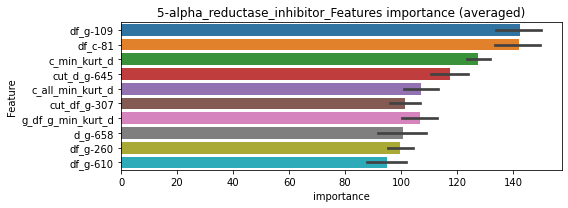

len(train_index) : 2856
len(valid_index) : 952
================================= fold 1/4 5-alpha_reductase_inhibitor=================================


Training until validation scores don't improve for 30 rounds


len(train_index) : 2856
len(valid_index) : 952
================================= fold 2/4 5-alpha_reductase_inhibitor=================================


Early stopping, best iteration is:
[808]	training's binary_logloss: 0.000285933	valid_1's binary_logloss: 0.00110086
Training until validation scores don't improve for 30 rounds


len(train_index) : 2856
len(valid_index) : 952
================================= fold 3/4 5-alpha_reductase_inhibitor=================================


Early stopping, best iteration is:
[782]	training's binary_logloss: 0.000291059	valid_1's binary_logloss: 0.00110229
Training until validation scores don't improve for 30 rounds


len(train_index) : 2856
len(valid_index) : 952
================================= fold 4/4 5-alpha_reductase_inhibitor=================================


Early stopping, best iteration is:
[802]	training's binary_logloss: 0.000288696	valid_1's binary_logloss: 0.000870127
Training until validation scores don't improve for 30 rounds


5-alpha_reductase_inhibitor logloss: 0.001374622730286958


Early stopping, best iteration is:
[717]	training's binary_logloss: 0.000297774	valid_1's binary_logloss: 0.00242451
neg labels: 3289 → selected neg labels: 3286


11-beta-hsd1_inhibitor, len(trt): 18, len(othr): 3286
target_rate: 0.0007559 → Adj_target_rate: 0.0009799
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.000947013	valid_1's binary_logloss: 0.00216742
[600]	training's binary_logloss: 0.000295383	valid_1's binary_logloss: 0.000914829
Early stopping, best iteration is:
[591]	training's binary_logloss: 0.000295384	valid_1's binary_logloss: 0.000914828
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.000936644	valid_1's binary_logloss: 0.0024272
[600]	training's binary_logloss: 0.000293005	valid_1's binary_logloss: 0.00114338
Early stopping, best iteration is:
[589]	training's binary_logloss: 0.000293005	valid_1's binary_logloss: 0.00114338
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.000938209	valid_1's binary_logloss: 0.00410587
Early stopping, best iteration is:
[565]	training's binary_logloss: 0.000299315	valid_1's binary_logloss: 0.00291416
Training until validation scores don't improve for 30 r

1 / 3 AUC score:1.000
y_Threshold: 0.0014467, Threshold: 0.0039466, pos_neg_ratio: 0.8000000
Remove_noisy_data: 132 → Positive_corect_labels: 657/3811


[600]	training's binary_logloss: 0.000297949	valid_1's binary_logloss: 0.000913543
Early stopping, best iteration is:
[604]	training's binary_logloss: 0.000297739	valid_1's binary_logloss: 0.00091322


p_label_rate: 0.0100452 Vs.target_rate: 0.00076
Num_p_label: 40.0, conf_0:0.00276, conf_1:0.00513
Num_p_label: 40.0, Expected: 3.0, Adj_threshold_1: 0.0039466
Num_p_label: 1.0, Expected: 3.0, Adj_threshold_2: 0.0439466
threshold: 0.0439466, positive_p_label: 1.0/3982, p_label_rate: 0.0002511
positive_y_label: 657.0/3811, y_label_rate: 0.1723957
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.000892128	valid_1's binary_logloss: 0.00204154
Early stopping, best iteration is:
[563]	training's binary_logloss: 0.000285702	valid_1's binary_logloss: 0.000927303
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00087702	valid_1's binary_logloss: 0.00217789
[600]	training's binary_logloss: 0.000286312	valid_1's binary_logloss: 0.00102912
Early stopping, best iteration is:
[581]	training's binary_logloss: 0.000286312	valid_1's binary_logloss: 0.00102912
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.000900693	valid_1's binary_logloss: 0.003576
[600]	training's binary_logloss: 0.000291727	valid_1's binary_logloss: 0.00268928
Early stopping, best iteration is:
[575]	training's binary_logloss: 0.000294205	valid_1's binary_logloss: 0.00268846
Training until validation scores don't improve for 30 roun

2 / 3 AUC score:1.000
y_Threshold: 0.0267736, Threshold: 0.0439466, pos_neg_ratio: 0.8000000
Remove_noisy_data: 0 → Positive_corect_labels: 657.0/3811
p_label_rate: 0.0010045 Vs.target_rate: 0.00076
Num_p_label: 4.0, conf_0:0.03516, conf_1:0.05274
threshold: 0.0439466, positive_p_label: 4.0/3982, p_label_rate: 0.0010045


Early stopping, best iteration is:
[569]	training's binary_logloss: 0.000291854	valid_1's binary_logloss: 0.000863398


positive_y_label: 657.0/3811, y_label_rate: 0.1723957
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.000892128	valid_1's binary_logloss: 0.00204154
Early stopping, best iteration is:
[563]	training's binary_logloss: 0.000285702	valid_1's binary_logloss: 0.000927303
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00087702	valid_1's binary_logloss: 0.00217789
[600]	training's binary_logloss: 0.000286312	valid_1's binary_logloss: 0.00102912
Early stopping, best iteration is:
[581]	training's binary_logloss: 0.000286312	valid_1's binary_logloss: 0.00102912
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.000900693	valid_1's binary_logloss: 0.003576
[600]	training's binary_logloss: 0.000291727	valid_1's binary_logloss: 0.00268928
Early stopping, best iteration is:
[575]	training's binary_logloss: 0.000294205	valid_1's binary_logloss: 0.00268846
Training until validation scores don't improve for 30 roun

3 / 3 AUC score:1.000
y_Threshold: 0.0267736, Threshold: 0.0439466, pos_neg_ratio: 0.8000000
Remove_noisy_data: 0 → Positive_corect_labels: 657.0/3811
p_label_rate: 0.0010045 Vs.target_rate: 0.00076
Num_p_label: 4.0, conf_0:0.03955, conf_1:0.04834


Early stopping, best iteration is:
[569]	training's binary_logloss: 0.000291854	valid_1's binary_logloss: 0.000863398


threshold: 0.0439466, positive_p_label: 4.0/3982, p_label_rate: 0.0010045
positive_y_label: 657.0/3811, y_label_rate: 0.1723957


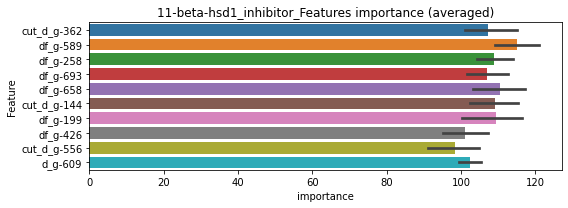

len(train_index) : 2858
len(valid_index) : 953
================================= fold 1/4 11-beta-hsd1_inhibitor=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[884]	training's binary_logloss: 0.000290994	valid_1's binary_logloss: 0.00095545


len(train_index) : 2858
len(valid_index) : 953
================================= fold 2/4 11-beta-hsd1_inhibitor=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[878]	training's binary_logloss: 0.000292801	valid_1's binary_logloss: 0.000762553


len(train_index) : 2858
len(valid_index) : 953
================================= fold 3/4 11-beta-hsd1_inhibitor=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[876]	training's binary_logloss: 0.00029414	valid_1's binary_logloss: 0.00157725


len(train_index) : 2859
len(valid_index) : 952
================================= fold 4/4 11-beta-hsd1_inhibitor=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[866]	training's binary_logloss: 0.000293568	valid_1's binary_logloss: 0.000614974


11-beta-hsd1_inhibitor logloss: 0.0009776520433907717


neg labels: 3289 → selected neg labels: 3282


acat_inhibitor, len(trt): 24, len(othr): 3282
target_rate: 0.0010078 → Adj_target_rate: 0.0012513
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00127033	valid_1's binary_logloss: 0.00802745
Early stopping, best iteration is:
[557]	training's binary_logloss: 0.000347697	valid_1's binary_logloss: 0.00593351
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00130368	valid_1's binary_logloss: 0.00623401
Early stopping, best iteration is:
[547]	training's binary_logloss: 0.000359434	valid_1's binary_logloss: 0.00427186
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00133661	valid_1's binary_logloss: 0.00392699
Early stopping, best iteration is:
[546]	training's binary_logloss: 0.000363724	valid_1's binary_logloss: 0.00198967
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00123815	valid_1's binary_logloss: 0.00863174


1 / 3 AUC score:1.000
y_Threshold: 0.0018609, Threshold: 0.0045581, pos_neg_ratio: 0.8000000
Remove_noisy_data: 132 → Positive_corect_labels: 656/3806
p_label_rate: 0.0100452 Vs.target_rate: 0.00101
Num_p_label: 40.0, conf_0:0.00319, conf_1:0.00593
Num_p_label: 40.0, Expected: 4.0, Adj_threshold_1: 0.0045581
Num_p_label: 1.0, Expected: 4.0, Adj_threshold_2: 0.0445581


Early stopping, best iteration is:
[553]	training's binary_logloss: 0.000349044	valid_1's binary_logloss: 0.00675676


threshold: 0.0445581, positive_p_label: 1.0/3982, p_label_rate: 0.0002511
positive_y_label: 656.0/3806, y_label_rate: 0.1723594
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00118721	valid_1's binary_logloss: 0.00749002
Early stopping, best iteration is:
[531]	training's binary_logloss: 0.000348875	valid_1's binary_logloss: 0.00544992
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0012125	valid_1's binary_logloss: 0.00551897
Early stopping, best iteration is:
[553]	training's binary_logloss: 0.000344184	valid_1's binary_logloss: 0.00343599
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00125993	valid_1's binary_logloss: 0.00319542
Early stopping, best iteration is:
[568]	training's binary_logloss: 0.000343059	valid_1's binary_logloss: 0.00169604
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00119253	valid_1's binary_logloss: 0.00896121


2 / 3 AUC score:1.000
y_Threshold: 0.0141075, Threshold: 0.0445581, pos_neg_ratio: 0.8000000
Remove_noisy_data: 0 → Positive_corect_labels: 656.0/3806
p_label_rate: 0.0025113 Vs.target_rate: 0.00101
Num_p_label: 10.0, conf_0:0.03565, conf_1:0.05347
Num_p_label: 10.0, Expected: 4.0, Adj_threshold_1: 0.0445581


Early stopping, best iteration is:
[555]	training's binary_logloss: 0.000343529	valid_1's binary_logloss: 0.00686277


threshold: 0.0445581, positive_p_label: 10.0/3982, p_label_rate: 0.0025113
positive_y_label: 656.0/3806, y_label_rate: 0.1723594
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00118721	valid_1's binary_logloss: 0.00749002
Early stopping, best iteration is:
[531]	training's binary_logloss: 0.000348875	valid_1's binary_logloss: 0.00544992
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0012125	valid_1's binary_logloss: 0.00551897
Early stopping, best iteration is:
[553]	training's binary_logloss: 0.000344184	valid_1's binary_logloss: 0.00343599
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00125993	valid_1's binary_logloss: 0.00319542
Early stopping, best iteration is:
[568]	training's binary_logloss: 0.000343059	valid_1's binary_logloss: 0.00169604
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00119253	valid_1's binary_logloss: 0.00896121


3 / 3 AUC score:1.000
y_Threshold: 0.0141075, Threshold: 0.0445581, pos_neg_ratio: 0.8000000
Remove_noisy_data: 0 → Positive_corect_labels: 656.0/3806
p_label_rate: 0.0025113 Vs.target_rate: 0.00101
Num_p_label: 10.0, conf_0:0.04010, conf_1:0.04901
Num_p_label: 10.0, Expected: 4.0, Adj_threshold_1: 0.0445581


Early stopping, best iteration is:
[555]	training's binary_logloss: 0.000343529	valid_1's binary_logloss: 0.00686277


threshold: 0.0445581, positive_p_label: 10.0/3982, p_label_rate: 0.0025113
positive_y_label: 656.0/3806, y_label_rate: 0.1723594


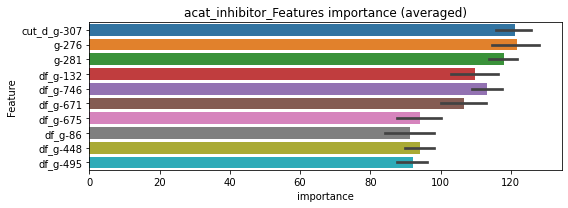

len(train_index) : 2854
len(valid_index) : 952
================================= fold 1/4 acat_inhibitor=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[820]	training's binary_logloss: 0.000342302	valid_1's binary_logloss: 0.00458788


len(train_index) : 2854
len(valid_index) : 952
================================= fold 2/4 acat_inhibitor=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[840]	training's binary_logloss: 0.000340331	valid_1's binary_logloss: 0.0032404


len(train_index) : 2855
len(valid_index) : 951
================================= fold 3/4 acat_inhibitor=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[933]	training's binary_logloss: 0.000336138	valid_1's binary_logloss: 0.00142668


len(train_index) : 2855
len(valid_index) : 951
================================= fold 4/4 acat_inhibitor=================================


Training until validation scores don't improve for 30 rounds


acat_inhibitor logloss: 0.0036579941749365036


Early stopping, best iteration is:
[740]	training's binary_logloss: 0.000357668	valid_1's binary_logloss: 0.00537428
neg labels: 3289 → selected neg labels: 3261


acetylcholine_receptor_agonist, len(trt): 190, len(othr): 3261
target_rate: 0.0079785 → Adj_target_rate: 0.0072634
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0177889	valid_1's binary_logloss: 0.169296
Early stopping, best iteration is:
[364]	training's binary_logloss: 0.0104595	valid_1's binary_logloss: 0.167143
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.017382	valid_1's binary_logloss: 0.14688
Early stopping, best iteration is:
[505]	training's binary_logloss: 0.00398928	valid_1's binary_logloss: 0.139557
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0173013	valid_1's binary_logloss: 0.15512
Early stopping, best iteration is:
[345]	training's binary_logloss: 0.0116477	valid_1's binary_logloss: 0.153683
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0178814	valid_1's binary_logloss: 0.146525


1 / 3 AUC score:0.959
y_Threshold: 0.0441886, Threshold: 0.2136784, pos_neg_ratio: 0.8000000
Remove_noisy_data: 261 → Positive_corect_labels: 587/3652
p_label_rate: 0.0100452 Vs.target_rate: 0.00798
Num_p_label: 40.0, conf_0:0.14957, conf_1:0.27778


Early stopping, best iteration is:
[384]	training's binary_logloss: 0.00913217	valid_1's binary_logloss: 0.143684


threshold: 0.2136784, positive_p_label: 40.0/3982, p_label_rate: 0.0100452
positive_y_label: 587.0/3652, y_label_rate: 0.1607338
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0103447	valid_1's binary_logloss: 0.0994376
Early stopping, best iteration is:
[449]	training's binary_logloss: 0.00326513	valid_1's binary_logloss: 0.0923679
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0104099	valid_1's binary_logloss: 0.120959
Early stopping, best iteration is:
[344]	training's binary_logloss: 0.00700029	valid_1's binary_logloss: 0.118089
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0111617	valid_1's binary_logloss: 0.0931256
Early stopping, best iteration is:
[510]	training's binary_logloss: 0.00249204	valid_1's binary_logloss: 0.0829941
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0115452	valid_1's binary_logloss: 0.0821488
Early stopping, best iteration is:
[554]	training's binary_logloss: 0.00209055	valid_1's binary_l

2 / 3 AUC score:0.993
y_Threshold: 0.0550497, Threshold: 0.2136784, pos_neg_ratio: 0.8000000
Remove_noisy_data: 74 → Positive_corect_labels: 550.0/3578
p_label_rate: 0.0165746 Vs.target_rate: 0.00798
Num_p_label: 66.0, conf_0:0.17094, conf_1:0.25641
Num_p_label: 66.0, Expected: 31.8, Adj_threshold_1: 0.2136784
Num_p_label: 49.0, Expected: 31.8, Adj_threshold_2: 0.2536784
Num_p_label: 39.0, Expected: 31.8, Adj_threshold_3: 0.2936784
threshold: 0.2936784, positive_p_label: 39.0/3982, p_label_rate: 0.0097941
positive_y_label: 550.0/3578, y_label_rate: 0.1537172
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00817904	valid_1's binary_logloss: 0.0738496
[600]	training's binary_logloss: 0.00133782	valid_1's binary_logloss: 0.0600874
Early stopping, best iteration is:
[631]	training's binary_logloss: 0.00121941	valid_1's binary_logloss: 0.0596343
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00836603	valid_1's binary_logloss: 0.0762958
Early stopping, best iteration is:
[555]	training's binary_logloss: 0.00159899	valid_1's binary_logloss: 0.0673207
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00855228	valid_1's binary_logloss: 0.0809985
[600]	training's binary_logloss: 0.00138345	valid_1's binary_logloss: 0.0678218
Early stopping, best iteration is:
[576]	training's binary_logloss: 0.00150518	valid_1's binary_logloss: 0.067503
Training until validation scores don't improve for 30 rounds
[300]	traini

3 / 3 AUC score:0.998
y_Threshold: 0.0438210, Threshold: 0.2936784, pos_neg_ratio: 0.8000000
Remove_noisy_data: 34 → Positive_corect_labels: 533.0/3544
p_label_rate: 0.0110497 Vs.target_rate: 0.00798
Num_p_label: 44.0, conf_0:0.26431, conf_1:0.32305
threshold: 0.2936784, positive_p_label: 44.0/3982, p_label_rate: 0.0110497
positive_y_label: 533.0/3544, y_label_rate: 0.1503950


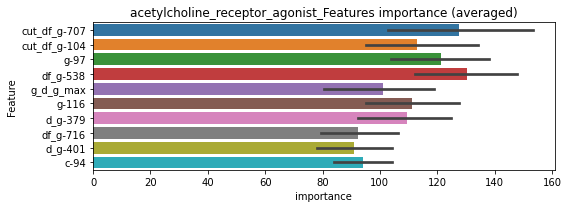

len(train_index) : 2658
len(valid_index) : 886
================================= fold 1/4 acetylcholine_receptor_agonist=================================


Training until validation scores don't improve for 30 rounds


len(train_index) : 2658
len(valid_index) : 886
================================= fold 2/4 acetylcholine_receptor_agonist=================================


Early stopping, best iteration is:
[255]	training's binary_logloss: 0.0033671	valid_1's binary_logloss: 0.0785636
Training until validation scores don't improve for 30 rounds


len(train_index) : 2658
len(valid_index) : 886
================================= fold 3/4 acetylcholine_receptor_agonist=================================


Early stopping, best iteration is:
[280]	training's binary_logloss: 0.00293858	valid_1's binary_logloss: 0.0670479
Training until validation scores don't improve for 30 rounds


len(train_index) : 2658
len(valid_index) : 886
================================= fold 4/4 acetylcholine_receptor_agonist=================================


Early stopping, best iteration is:
[180]	training's binary_logloss: 0.0058872	valid_1's binary_logloss: 0.0729244
Training until validation scores don't improve for 30 rounds


acetylcholine_receptor_agonist logloss: 0.0739921457037166
acetylcholine_receptor_agonist clipping


Early stopping, best iteration is:
[182]	training's binary_logloss: 0.00575511	valid_1's binary_logloss: 0.0774327
neg labels: 3289 → selected neg labels: 3241


acetylcholine_receptor_antagonist, len(trt): 301, len(othr): 3241
target_rate: 0.0126396 → Adj_target_rate: 0.0107394
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0345488	valid_1's binary_logloss: 0.256068
Early stopping, best iteration is:
[319]	training's binary_logloss: 0.0304197	valid_1's binary_logloss: 0.255247
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[243]	training's binary_logloss: 0.0488439	valid_1's binary_logloss: 0.284028
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0333136	valid_1's binary_logloss: 0.251912
Early stopping, best iteration is:
[295]	training's binary_logloss: 0.0346631	valid_1's binary_logloss: 0.251685
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0350618	valid_1's binary_logloss: 0.258019


1 / 3 AUC score:0.875
y_Threshold: 0.0894240, Threshold: 0.1743648, pos_neg_ratio: 0.8000000
Remove_noisy_data: 446 → Positive_corect_labels: 490/3443
p_label_rate: 0.0100452 Vs.target_rate: 0.01264
Num_p_label: 40.0, conf_0:0.12206, conf_1:0.22667


Early stopping, best iteration is:
[340]	training's binary_logloss: 0.0263928	valid_1's binary_logloss: 0.256775


threshold: 0.1743648, positive_p_label: 40.0/3982, p_label_rate: 0.0100452
positive_y_label: 490.0/3443, y_label_rate: 0.1423177
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0133169	valid_1's binary_logloss: 0.153475
Early stopping, best iteration is:
[320]	training's binary_logloss: 0.0111427	valid_1's binary_logloss: 0.152119
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.014386	valid_1's binary_logloss: 0.148406
Early stopping, best iteration is:
[337]	training's binary_logloss: 0.0105141	valid_1's binary_logloss: 0.145646
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0139219	valid_1's binary_logloss: 0.124695
Early stopping, best iteration is:
[409]	training's binary_logloss: 0.00587947	valid_1's binary_logloss: 0.118955
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0132693	valid_1's binary_logloss: 0.17193


2 / 3 AUC score:0.978
y_Threshold: 0.0691392, Threshold: 0.1743648, pos_neg_ratio: 0.8000000
Remove_noisy_data: 122 → Positive_corect_labels: 429.0/3321
p_label_rate: 0.0095429 Vs.target_rate: 0.01264
Num_p_label: 38.0, conf_0:0.13949, conf_1:0.20924


Early stopping, best iteration is:
[327]	training's binary_logloss: 0.0104504	valid_1's binary_logloss: 0.169416


threshold: 0.1743648, positive_p_label: 38.0/3982, p_label_rate: 0.0095429
positive_y_label: 429.0/3321, y_label_rate: 0.1291780
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00922287	valid_1's binary_logloss: 0.124255
Early stopping, best iteration is:
[430]	training's binary_logloss: 0.00343282	valid_1's binary_logloss: 0.118524
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0100751	valid_1's binary_logloss: 0.0898747
Early stopping, best iteration is:
[554]	training's binary_logloss: 0.00199213	valid_1's binary_logloss: 0.0770714
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00988723	valid_1's binary_logloss: 0.10147
Early stopping, best iteration is:
[416]	training's binary_logloss: 0.00393446	valid_1's binary_logloss: 0.0943713
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00944727	valid_1's binary_logloss: 0.105955


3 / 3 AUC score:0.994


Early stopping, best iteration is:
[483]	training's binary_logloss: 0.00265233	valid_1's binary_logloss: 0.0972574


y_Threshold: 0.0520926, Threshold: 0.1743648, pos_neg_ratio: 0.8000000
Remove_noisy_data: 52 → Positive_corect_labels: 403.0/3269
p_label_rate: 0.0115520 Vs.target_rate: 0.01264
Num_p_label: 46.0, conf_0:0.15693, conf_1:0.19180
threshold: 0.1743648, positive_p_label: 46.0/3982, p_label_rate: 0.0115520
positive_y_label: 403.0/3269, y_label_rate: 0.1232793


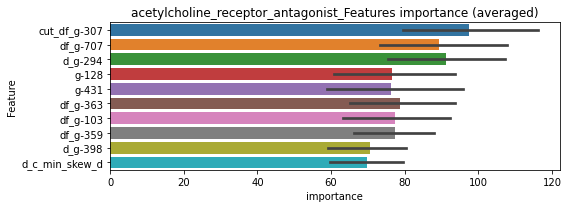

len(train_index) : 2451
len(valid_index) : 818
================================= fold 1/4 acetylcholine_receptor_antagonist=================================


Training until validation scores don't improve for 30 rounds


len(train_index) : 2452
len(valid_index) : 817
================================= fold 2/4 acetylcholine_receptor_antagonist=================================


Early stopping, best iteration is:
[254]	training's binary_logloss: 0.00393816	valid_1's binary_logloss: 0.0977859
Training until validation scores don't improve for 30 rounds


len(train_index) : 2452
len(valid_index) : 817
================================= fold 3/4 acetylcholine_receptor_antagonist=================================


Early stopping, best iteration is:
[284]	training's binary_logloss: 0.00340313	valid_1's binary_logloss: 0.0846856
Training until validation scores don't improve for 30 rounds


len(train_index) : 2452
len(valid_index) : 817
================================= fold 4/4 acetylcholine_receptor_antagonist=================================


Early stopping, best iteration is:
[229]	training's binary_logloss: 0.00470718	valid_1's binary_logloss: 0.0851363
Training until validation scores don't improve for 30 rounds


acetylcholine_receptor_antagonist logloss: 0.08649865643330247
acetylcholine_receptor_antagonist clipping


Early stopping, best iteration is:
[320]	training's binary_logloss: 0.00289255	valid_1's binary_logloss: 0.0783729
neg labels: 3289 → selected neg labels: 3281


acetylcholinesterase_inhibitor, len(trt): 73, len(othr): 3281
target_rate: 0.0030654 → Adj_target_rate: 0.0032212
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00524289	valid_1's binary_logloss: 0.0536252
Early stopping, best iteration is:
[489]	training's binary_logloss: 0.00136261	valid_1's binary_logloss: 0.0461389
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00594043	valid_1's binary_logloss: 0.038355
[600]	training's binary_logloss: 0.000946908	valid_1's binary_logloss: 0.0279563
Early stopping, best iteration is:
[711]	training's binary_logloss: 0.000713321	valid_1's binary_logloss: 0.0273326
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0061054	valid_1's binary_logloss: 0.0246617
[600]	training's binary_logloss: 0.000981889	valid_1's binary_logloss: 0.0149004
Early stopping, best iteration is:
[623]	training's binary_logloss: 0.000918924	valid_1's binary_logloss: 0.0147116
Training until validation scores don't improve for 30 rounds
[300]	tra

1 / 3 AUC score:0.999
y_Threshold: 0.0110786, Threshold: 0.0340213, pos_neg_ratio: 0.8000000
Remove_noisy_data: 146 → Positive_corect_labels: 649/3791
p_label_rate: 0.0100452 Vs.target_rate: 0.00307


Early stopping, best iteration is:
[447]	training's binary_logloss: 0.00184215	valid_1's binary_logloss: 0.0525211


Num_p_label: 40.0, conf_0:0.02381, conf_1:0.04423
Num_p_label: 40.0, Expected: 12.2, Adj_threshold_1: 0.0340213
Num_p_label: 11.0, Expected: 12.2, Adj_threshold_2: 0.0740213
threshold: 0.0740213, positive_p_label: 11.0/3982, p_label_rate: 0.0027624
positive_y_label: 649.0/3791, y_label_rate: 0.1711949
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00482203	valid_1's binary_logloss: 0.048121
Early stopping, best iteration is:
[441]	training's binary_logloss: 0.00161736	valid_1's binary_logloss: 0.0448637
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00495685	valid_1's binary_logloss: 0.0389929
[600]	training's binary_logloss: 0.000863679	valid_1's binary_logloss: 0.0313469
Early stopping, best iteration is:
[679]	training's binary_logloss: 0.000703832	valid_1's binary_logloss: 0.0308444
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00504099	valid_1's binary_logloss: 0.0356446
[600]	training's binary_logloss: 0.000875391	valid_1's binary_logloss: 0.025302
Early stopping, best iteration is:
[764]	training's binary_logloss: 0.000623832	valid_1's binary_logloss: 0.0243418
Training until validation scores don't improve for 30 rounds
[300]	tra

2 / 3 AUC score:0.999
y_Threshold: 0.0414438, Threshold: 0.0740213, pos_neg_ratio: 0.8000000
Remove_noisy_data: 18 → Positive_corect_labels: 640.0/3773
p_label_rate: 0.0095429 Vs.target_rate: 0.00307
Num_p_label: 38.0, conf_0:0.05922, conf_1:0.08883
Num_p_label: 38.0, Expected: 12.2, Adj_threshold_1: 0.0740213
Num_p_label: 20.0, Expected: 12.2, Adj_threshold_2: 0.1140213
Num_p_label: 11.0, Expected: 12.2, Adj_threshold_3: 0.1540213
threshold: 0.1540213, positive_p_label: 11.0/3982, p_label_rate: 0.0027624
positive_y_label: 640.0/3773, y_label_rate: 0.1696263
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00445653	valid_1's binary_logloss: 0.0273091
[600]	training's binary_logloss: 0.000813449	valid_1's binary_logloss: 0.0177001
Early stopping, best iteration is:
[721]	training's binary_logloss: 0.000619899	valid_1's binary_logloss: 0.0170164
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00435186	valid_1's binary_logloss: 0.0344945
Early stopping, best iteration is:
[511]	training's binary_logloss: 0.00108263	valid_1's binary_logloss: 0.0270743
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00451411	valid_1's binary_logloss: 0.0304629
[600]	training's binary_logloss: 0.00080861	valid_1's binary_logloss: 0.0234479
Early stopping, best iteration is:
[627]	training's binary_logloss: 0.000751718	valid_1's binary_logloss: 0.0232855
Training until validation scores don't improve for 30 rounds
[300]	tr

3 / 3 AUC score:1.000
y_Threshold: 0.0608265, Threshold: 0.1540213, pos_neg_ratio: 0.8000000
Remove_noisy_data: 6 → Positive_corect_labels: 637.0/3767
p_label_rate: 0.0042692 Vs.target_rate: 0.00307
Num_p_label: 17.0, conf_0:0.13862, conf_1:0.16942
threshold: 0.1540213, positive_p_label: 17.0/3982, p_label_rate: 0.0042692
positive_y_label: 637.0/3767, y_label_rate: 0.1691001


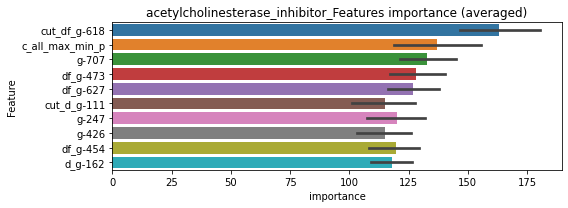

len(train_index) : 2825
len(valid_index) : 942
================================= fold 1/4 acetylcholinesterase_inhibitor=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[650]	training's binary_logloss: 0.000794289	valid_1's binary_logloss: 0.0136645


len(train_index) : 2825
len(valid_index) : 942
================================= fold 2/4 acetylcholinesterase_inhibitor=================================


Training until validation scores don't improve for 30 rounds


len(train_index) : 2825
len(valid_index) : 942
================================= fold 3/4 acetylcholinesterase_inhibitor=================================


Early stopping, best iteration is:
[329]	training's binary_logloss: 0.0016428	valid_1's binary_logloss: 0.0241446
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[616]	training's binary_logloss: 0.000825964	valid_1's binary_logloss: 0.0254754


len(train_index) : 2826
len(valid_index) : 941
================================= fold 4/4 acetylcholinesterase_inhibitor=================================


Training until validation scores don't improve for 30 rounds


acetylcholinesterase_inhibitor logloss: 0.02450381824564587
acetylcholinesterase_inhibitor clipping


Early stopping, best iteration is:
[555]	training's binary_logloss: 0.000892641	valid_1's binary_logloss: 0.0347416
neg labels: 3289 → selected neg labels: 3278


adenosine_receptor_agonist, len(trt): 54, len(othr): 3278
target_rate: 0.0022676 → Adj_target_rate: 0.0024931
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00293259	valid_1's binary_logloss: 0.0216158
[600]	training's binary_logloss: 0.000587113	valid_1's binary_logloss: 0.0159466
Early stopping, best iteration is:
[669]	training's binary_logloss: 0.000517659	valid_1's binary_logloss: 0.015666
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00319506	valid_1's binary_logloss: 0.010857
[600]	training's binary_logloss: 0.000618135	valid_1's binary_logloss: 0.00564586
Early stopping, best iteration is:
[696]	training's binary_logloss: 0.000520576	valid_1's binary_logloss: 0.00543525
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00311224	valid_1's binary_logloss: 0.017271
[600]	training's binary_logloss: 0.000595942	valid_1's binary_logloss: 0.0113429
Early stopping, best iteration is:
[636]	training's binary_logloss: 0.000547694	valid_1's binary_loglos

1 / 3 AUC score:1.000
y_Threshold: 0.0041046, Threshold: 0.0140177, pos_neg_ratio: 0.8000000
Remove_noisy_data: 132 → Positive_corect_labels: 655/3801
p_label_rate: 0.0100452 Vs.target_rate: 0.00227
Num_p_label: 40.0, conf_0:0.00981, conf_1:0.01822
Num_p_label: 40.0, Expected: 9.0, Adj_threshold_1: 0.0140177
Num_p_label: 3.0, Expected: 9.0, Adj_threshold_2: 0.0540177
threshold: 0.0540177, positive_p_label: 3.0/3982, p_label_rate: 0.0007534
positive_y_label: 655.0/3801, y_label_rate: 0.1723231
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00285265	valid_1's binary_logloss: 0.020622
[600]	training's binary_logloss: 0.000568008	valid_1's binary_logloss: 0.0143089
Early stopping, best iteration is:
[673]	training's binary_logloss: 0.000499627	valid_1's binary_logloss: 0.0140922
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00304429	valid_1's binary_logloss: 0.00977761
Early stopping, best iteration is:
[564]	training's binary_logloss: 0.000651594	valid_1's binary_logloss: 0.0045644
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00291429	valid_1's binary_logloss: 0.0143078
[600]	training's binary_logloss: 0.00057556	valid_1's binary_logloss: 0.0091559
Early stopping, best iteration is:
[644]	training's binary_logloss: 0.00052671	valid_1's binary_logloss: 0.0089703
Training until validation scores don't improve for 30 rounds
[300]	tr

2 / 3 AUC score:1.000
y_Threshold: 0.0157646, Threshold: 0.0540177, pos_neg_ratio: 0.8000000
Remove_noisy_data: 2 → Positive_corect_labels: 654.0/3799
p_label_rate: 0.0032647 Vs.target_rate: 0.00227
Num_p_label: 13.0, conf_0:0.04321, conf_1:0.06482
threshold: 0.0540177, positive_p_label: 13.0/3982, p_label_rate: 0.0032647
positive_y_label: 654.0/3799, y_label_rate: 0.1721506
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00273725	valid_1's binary_logloss: 0.0205788
[600]	training's binary_logloss: 0.000559287	valid_1's binary_logloss: 0.0140663
Early stopping, best iteration is:
[621]	training's binary_logloss: 0.000534662	valid_1's binary_logloss: 0.0140011
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00312528	valid_1's binary_logloss: 0.00758867
[600]	training's binary_logloss: 0.00059199	valid_1's binary_logloss: 0.00262856
Early stopping, best iteration is:
[737]	training's binary_logloss: 0.000493238	valid_1's binary_logloss: 0.00243879
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00307565	valid_1's binary_logloss: 0.00919015
[600]	training's binary_logloss: 0.00059296	valid_1's binary_logloss: 0.00366296
Early stopping, best iteration is:
[707]	training's binary_logloss: 0.000499889	valid_1's binary_lo

3 / 3 AUC score:1.000
y_Threshold: 0.0348635, Threshold: 0.0540177, pos_neg_ratio: 0.8000000
Remove_noisy_data: 0 → Positive_corect_labels: 654.0/3799
p_label_rate: 0.0037670 Vs.target_rate: 0.00227
Num_p_label: 15.0, conf_0:0.04862, conf_1:0.05942
Num_p_label: 15.0, Expected: 9.0, Adj_threshold_1: 0.0540177
threshold: 0.0540177, positive_p_label: 15.0/3982, p_label_rate: 0.0037670
positive_y_label: 654.0/3799, y_label_rate: 0.1721506


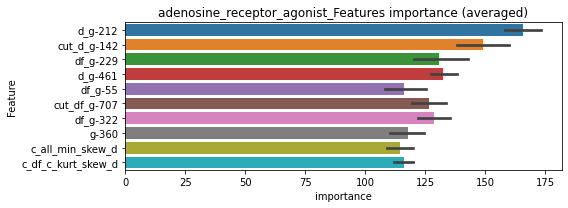

len(train_index) : 2849
len(valid_index) : 950
================================= fold 1/4 adenosine_receptor_agonist=================================


Training until validation scores don't improve for 30 rounds


len(train_index) : 2849
len(valid_index) : 950
================================= fold 2/4 adenosine_receptor_agonist=================================


Early stopping, best iteration is:
[371]	training's binary_logloss: 0.00106797	valid_1's binary_logloss: 0.0183265
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[957]	training's binary_logloss: 0.000499426	valid_1's binary_logloss: 0.00278328


len(train_index) : 2849
len(valid_index) : 950
================================= fold 3/4 adenosine_receptor_agonist=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[913]	training's binary_logloss: 0.000516127	valid_1's binary_logloss: 0.00368075


len(train_index) : 2850
len(valid_index) : 949
================================= fold 4/4 adenosine_receptor_agonist=================================


Training until validation scores don't improve for 30 rounds


adenosine_receptor_agonist logloss: 0.00902387094878321


Early stopping, best iteration is:
[557]	training's binary_logloss: 0.000705739	valid_1's binary_logloss: 0.0113074
neg labels: 3289 → selected neg labels: 3276


adenosine_receptor_antagonist, len(trt): 96, len(othr): 3276
target_rate: 0.0040312 → Adj_target_rate: 0.0040656
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00735503	valid_1's binary_logloss: 0.066709
Early stopping, best iteration is:
[467]	training's binary_logloss: 0.00203072	valid_1's binary_logloss: 0.059908
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00757332	valid_1's binary_logloss: 0.0467265
[600]	training's binary_logloss: 0.00118676	valid_1's binary_logloss: 0.0333523
Early stopping, best iteration is:
[625]	training's binary_logloss: 0.00109951	valid_1's binary_logloss: 0.0328284
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00765514	valid_1's binary_logloss: 0.0653929
Early stopping, best iteration is:
[447]	training's binary_logloss: 0.00232155	valid_1's binary_logloss: 0.0602597
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00766711	valid_1's binary_logloss: 0.0730114


1 / 3 AUC score:0.993
y_Threshold: 0.0126196, Threshold: 0.0350357, pos_neg_ratio: 0.8000000
Remove_noisy_data: 158 → Positive_corect_labels: 642/3773
p_label_rate: 0.0100452 Vs.target_rate: 0.00403


Early stopping, best iteration is:
[421]	training's binary_logloss: 0.00278254	valid_1's binary_logloss: 0.0688782


Num_p_label: 40.0, conf_0:0.02453, conf_1:0.04555
Num_p_label: 40.0, Expected: 16.1, Adj_threshold_1: 0.0350357
Num_p_label: 10.0, Expected: 16.1, Adj_threshold_2: 0.0750357
threshold: 0.0750357, positive_p_label: 10.0/3982, p_label_rate: 0.0025113
positive_y_label: 642.0/3773, y_label_rate: 0.1701564
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00632264	valid_1's binary_logloss: 0.0477052
[600]	training's binary_logloss: 0.00104545	valid_1's binary_logloss: 0.0366988
Early stopping, best iteration is:
[748]	training's binary_logloss: 0.000734025	valid_1's binary_logloss: 0.0354653
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00636461	valid_1's binary_logloss: 0.0567742
[600]	training's binary_logloss: 0.00103744	valid_1's binary_logloss: 0.0436913
Early stopping, best iteration is:
[576]	training's binary_logloss: 0.00112276	valid_1's binary_logloss: 0.0435727
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00663763	valid_1's binary_logloss: 0.03464
[600]	training's binary_logloss: 0.00105518	valid_1's binary_logloss: 0.0227325
Early stopping, best iteration is:
[745]	training's binary_logloss: 0.000748195	valid_1's binary_logloss: 0.

2 / 3 AUC score:1.000
y_Threshold: 0.0230264, Threshold: 0.0750357, pos_neg_ratio: 0.8000000
Remove_noisy_data: 12 → Positive_corect_labels: 636.0/3761
p_label_rate: 0.0052737 Vs.target_rate: 0.00403
Num_p_label: 21.0, conf_0:0.06003, conf_1:0.09004
threshold: 0.0750357, positive_p_label: 21.0/3982, p_label_rate: 0.0052737
positive_y_label: 636.0/3761, y_label_rate: 0.1691040
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0063357	valid_1's binary_logloss: 0.0452819
[600]	training's binary_logloss: 0.00101517	valid_1's binary_logloss: 0.0330188
Early stopping, best iteration is:
[795]	training's binary_logloss: 0.000672425	valid_1's binary_logloss: 0.031596
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00604289	valid_1's binary_logloss: 0.0437286
[600]	training's binary_logloss: 0.00101533	valid_1's binary_logloss: 0.0324958
Early stopping, best iteration is:
[749]	training's binary_logloss: 0.00071664	valid_1's binary_logloss: 0.0310488
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00575724	valid_1's binary_logloss: 0.0422058
[600]	training's binary_logloss: 0.000994912	valid_1's binary_logloss: 0.0312728
Early stopping, best iteration is:
[719]	training's binary_logloss: 0.000740161	valid_1's binary_logloss: 0

3 / 3 AUC score:1.000
y_Threshold: 0.0240074, Threshold: 0.0750357, pos_neg_ratio: 0.8000000
Remove_noisy_data: 12 → Positive_corect_labels: 630.0/3749
p_label_rate: 0.0050226 Vs.target_rate: 0.00403
Num_p_label: 20.0, conf_0:0.06753, conf_1:0.08254
threshold: 0.0750357, positive_p_label: 20.0/3982, p_label_rate: 0.0050226
positive_y_label: 630.0/3749, y_label_rate: 0.1680448


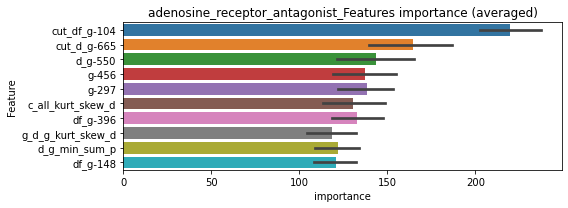

len(train_index) : 2811
len(valid_index) : 938
================================= fold 1/4 adenosine_receptor_antagonist=================================


Training until validation scores don't improve for 30 rounds


len(train_index) : 2812
len(valid_index) : 937
================================= fold 2/4 adenosine_receptor_antagonist=================================


Early stopping, best iteration is:
[494]	training's binary_logloss: 0.00118483	valid_1's binary_logloss: 0.0356252
Training until validation scores don't improve for 30 rounds


len(train_index) : 2812
len(valid_index) : 937
================================= fold 3/4 adenosine_receptor_antagonist=================================


Early stopping, best iteration is:
[446]	training's binary_logloss: 0.00135237	valid_1's binary_logloss: 0.0397354
Training until validation scores don't improve for 30 rounds


len(train_index) : 2812
len(valid_index) : 937
================================= fold 4/4 adenosine_receptor_antagonist=================================


Early stopping, best iteration is:
[449]	training's binary_logloss: 0.0013483	valid_1's binary_logloss: 0.0264915
Training until validation scores don't improve for 30 rounds


adenosine_receptor_antagonist logloss: 0.03444633253407965
adenosine_receptor_antagonist clipping


Early stopping, best iteration is:
[272]	training's binary_logloss: 0.00252053	valid_1's binary_logloss: 0.035932
neg labels: 3289 → selected neg labels: 3289


adenylyl_cyclase_activator, len(trt): 18, len(othr): 3289
target_rate: 0.0007559 → Adj_target_rate: 0.0009799
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.000941788	valid_1's binary_logloss: 0.00163327
Early stopping, best iteration is:
[568]	training's binary_logloss: 0.000304167	valid_1's binary_logloss: 0.000645462
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.000919374	valid_1's binary_logloss: 0.00324952
[600]	training's binary_logloss: 0.000298661	valid_1's binary_logloss: 0.00170643
Early stopping, best iteration is:
[581]	training's binary_logloss: 0.000299042	valid_1's binary_logloss: 0.00170513
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00095294	valid_1's binary_logloss: 0.00190622
Early stopping, best iteration is:
[550]	training's binary_logloss: 0.000304655	valid_1's binary_logloss: 0.000796589
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.000956759	valid_1's binary_logloss: 0.002

1 / 3 AUC score:1.000
y_Threshold: 0.0017814, Threshold: 0.0142423, pos_neg_ratio: 0.8000000
Remove_noisy_data: 133 → Positive_corect_labels: 657/3813
p_label_rate: 0.0100452 Vs.target_rate: 0.00076
Num_p_label: 40.0, conf_0:0.00997, conf_1:0.01852
Num_p_label: 40.0, Expected: 3.0, Adj_threshold_1: 0.0142423
Num_p_label: 10.0, Expected: 3.0, Adj_threshold_2: 0.0542423
Num_p_label: 6.0, Expected: 3.0, Adj_threshold_3: 0.0942423


Early stopping, best iteration is:
[554]	training's binary_logloss: 0.000306808	valid_1's binary_logloss: 0.00120124


threshold: 0.0942423, positive_p_label: 6.0/3982, p_label_rate: 0.0015068
positive_y_label: 657.0/3813, y_label_rate: 0.1723053
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.000874644	valid_1's binary_logloss: 0.00155386
Early stopping, best iteration is:
[549]	training's binary_logloss: 0.000290625	valid_1's binary_logloss: 0.000618125
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.000859926	valid_1's binary_logloss: 0.0024559
Early stopping, best iteration is:
[559]	training's binary_logloss: 0.000289909	valid_1's binary_logloss: 0.00117486
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.000878277	valid_1's binary_logloss: 0.00143803
[600]	training's binary_logloss: 0.000287031	valid_1's binary_logloss: 0.000536594
Early stopping, best iteration is:
[583]	training's binary_logloss: 0.000287031	valid_1's binary_logloss: 0.000536594
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.000878566	valid_1's binary_logloss: 0.00

2 / 3 AUC score:1.000
y_Threshold: 0.1299060, Threshold: 0.0942423, pos_neg_ratio: 0.8000000
Remove_noisy_data: 0 → Positive_corect_labels: 657.0/3813
p_label_rate: 0.0118031 Vs.target_rate: 0.00076
Num_p_label: 47.0, conf_0:0.07539, conf_1:0.11309
Num_p_label: 47.0, Expected: 3.0, Adj_threshold_1: 0.0942423
Num_p_label: 40.0, Expected: 3.0, Adj_threshold_2: 0.1342423
Num_p_label: 24.0, Expected: 3.0, Adj_threshold_3: 0.1742423
Num_p_label: 20.0, Expected: 3.0, Adj_threshold_4: 0.2142423
Num_p_label: 16.0, Expected: 3.0, Adj_threshold_5: 0.2542423
Num_p_label: 12.0, Expected: 3.0, Adj_threshold_6: 0.2942423
Num_p_label: 10.0, Expected: 3.0, Adj_threshold_7: 0.3342423


Early stopping, best iteration is:
[561]	training's binary_logloss: 0.000288627	valid_1's binary_logloss: 0.00149114


Num_p_label: 9.0, Expected: 3.0, Adj_threshold_8: 0.3742423
Num_p_label: 6.0, Expected: 3.0, Adj_threshold_9: 0.4142423
threshold: 0.4142423, positive_p_label: 6.0/3982, p_label_rate: 0.0015068
positive_y_label: 657.0/3813, y_label_rate: 0.1723053
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.000874644	valid_1's binary_logloss: 0.00155386
Early stopping, best iteration is:
[549]	training's binary_logloss: 0.000290625	valid_1's binary_logloss: 0.000618125
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.000859926	valid_1's binary_logloss: 0.0024559
Early stopping, best iteration is:
[559]	training's binary_logloss: 0.000289909	valid_1's binary_logloss: 0.00117486
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.000878277	valid_1's binary_logloss: 0.00143803
[600]	training's binary_logloss: 0.000287031	valid_1's binary_logloss: 0.000536594
Early stopping, best iteration is:
[583]	training's binary_logloss: 0.000287031	valid_1's binary_logloss: 0.000536594
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.000878566	valid_1's binary_logloss: 0.00

3 / 3 AUC score:1.000
y_Threshold: 0.1299060, Threshold: 0.4142423, pos_neg_ratio: 0.8000000
Remove_noisy_data: 0 → Positive_corect_labels: 657.0/3813
p_label_rate: 0.0015068 Vs.target_rate: 0.00076
Num_p_label: 6.0, conf_0:0.37282, conf_1:0.45567
Num_p_label: 6.0, Expected: 3.0, Adj_threshold_1: 0.4142423


Early stopping, best iteration is:
[561]	training's binary_logloss: 0.000288627	valid_1's binary_logloss: 0.00149114


threshold: 0.4142423, positive_p_label: 6.0/3982, p_label_rate: 0.0015068
positive_y_label: 657.0/3813, y_label_rate: 0.1723053


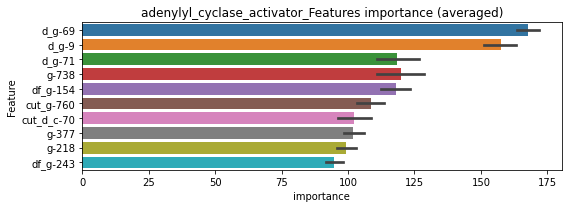

len(train_index) : 2859
len(valid_index) : 954
================================= fold 1/4 adenylyl_cyclase_activator=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[968]	training's binary_logloss: 0.000284822	valid_1's binary_logloss: 0.000588696


len(train_index) : 2860
len(valid_index) : 953
================================= fold 2/4 adenylyl_cyclase_activator=================================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.000283299	valid_1's binary_logloss: 0.00102103
Early stopping, best iteration is:
[1020]	training's binary_logloss: 0.000282393	valid_1's binary_logloss: 0.00101946


len(train_index) : 2860
len(valid_index) : 953
================================= fold 3/4 adenylyl_cyclase_activator=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[927]	training's binary_logloss: 0.000288142	valid_1's binary_logloss: 0.000512535


len(train_index) : 2860
len(valid_index) : 953
================================= fold 4/4 adenylyl_cyclase_activator=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[901]	training's binary_logloss: 0.000288389	valid_1's binary_logloss: 0.000904344


adenylyl_cyclase_activator logloss: 0.0007563231908723721


neg labels: 3289 → selected neg labels: 3254


adrenergic_receptor_agonist, len(trt): 270, len(othr): 3254
target_rate: 0.0113379 → Adj_target_rate: 0.0097917
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0311589	valid_1's binary_logloss: 0.224609
Early stopping, best iteration is:
[367]	training's binary_logloss: 0.0191856	valid_1's binary_logloss: 0.220568
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.027861	valid_1's binary_logloss: 0.255243
Early stopping, best iteration is:
[289]	training's binary_logloss: 0.0302468	valid_1's binary_logloss: 0.254134
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0308387	valid_1's binary_logloss: 0.218228
Early stopping, best iteration is:
[331]	training's binary_logloss: 0.0247791	valid_1's binary_logloss: 0.216231
Training until validation scores don't improve for 30 rounds


1 / 3 AUC score:0.910
y_Threshold: 0.0754385, Threshold: 0.4945310, pos_neg_ratio: 0.8000000
Remove_noisy_data: 385 → Positive_corect_labels: 523/3519
p_label_rate: 0.0100452 Vs.target_rate: 0.01134
Num_p_label: 40.0, conf_0:0.34617, conf_1:0.64289


[300]	training's binary_logloss: 0.0304833	valid_1's binary_logloss: 0.226688
Early stopping, best iteration is:
[273]	training's binary_logloss: 0.0371435	valid_1's binary_logloss: 0.226041


threshold: 0.4945310, positive_p_label: 40.0/3982, p_label_rate: 0.0100452
positive_y_label: 523.0/3519, y_label_rate: 0.1486218
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0132988	valid_1's binary_logloss: 0.138174
Early stopping, best iteration is:
[418]	training's binary_logloss: 0.00533869	valid_1's binary_logloss: 0.133549
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0130402	valid_1's binary_logloss: 0.142185
Early stopping, best iteration is:
[374]	training's binary_logloss: 0.0070621	valid_1's binary_logloss: 0.137681
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.012783	valid_1's binary_logloss: 0.139372
Early stopping, best iteration is:
[369]	training's binary_logloss: 0.00731986	valid_1's binary_logloss: 0.134808
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0133549	valid_1's binary_logloss: 0.124232


2 / 3 AUC score:0.983
y_Threshold: 0.0796336, Threshold: 0.4945310, pos_neg_ratio: 0.8000000
Remove_noisy_data: 124 → Positive_corect_labels: 461.0/3395
p_label_rate: 0.0339026 Vs.target_rate: 0.01134
Num_p_label: 135.0, conf_0:0.39562, conf_1:0.59344
Num_p_label: 135.0, Expected: 45.1, Adj_threshold_1: 0.4945310


Early stopping, best iteration is:
[436]	training's binary_logloss: 0.00477052	valid_1's binary_logloss: 0.119772


Num_p_label: 128.0, Expected: 45.1, Adj_threshold_2: 0.5345310
Num_p_label: 123.0, Expected: 45.1, Adj_threshold_3: 0.5745310
Num_p_label: 115.0, Expected: 45.1, Adj_threshold_4: 0.6145310
Num_p_label: 105.0, Expected: 45.1, Adj_threshold_5: 0.6545310
Num_p_label: 96.0, Expected: 45.1, Adj_threshold_6: 0.6945310
Num_p_label: 86.0, Expected: 45.1, Adj_threshold_7: 0.7345310
Num_p_label: 73.0, Expected: 45.1, Adj_threshold_8: 0.7745310
Num_p_label: 61.0, Expected: 45.1, Adj_threshold_9: 0.8145310
threshold: 0.8145310, positive_p_label: 61.0/3982, p_label_rate: 0.0153189
positive_y_label: 461.0/3395, y_label_rate: 0.1357879
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00738847	valid_1's binary_logloss: 0.154569
Early stopping, best iteration is:
[324]	training's binary_logloss: 0.00592772	valid_1's binary_logloss: 0.153243
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00875278	valid_1's binary_logloss: 0.0830682
Early stopping, best iteration is:
[536]	training's binary_logloss: 0.00190195	valid_1's binary_logloss: 0.0748561
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0090148	valid_1's binary_logloss: 0.107247
Early stopping, best iteration is:
[357]	training's binary_logloss: 0.00549066	valid_1's binary_logloss: 0.105381
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00882219	valid_1's binary_logloss: 0.0917472


3 / 3 AUC score:0.991
y_Threshold: 0.0737506, Threshold: 0.8145310, pos_neg_ratio: 0.8000000


Early stopping, best iteration is:
[514]	training's binary_logloss: 0.00212581	valid_1's binary_logloss: 0.080132


Remove_noisy_data: 76 → Positive_corect_labels: 423.0/3319
p_label_rate: 0.0339026 Vs.target_rate: 0.01134
Num_p_label: 135.0, conf_0:0.50000, conf_1:0.80000
Num_p_label: 135.0, Expected: 45.1, Adj_threshold_1: 0.8145310
Num_p_label: 123.0, Expected: 45.1, Adj_threshold_2: 0.8545310
Num_p_label: 111.0, Expected: 45.1, Adj_threshold_3: 0.8945310
threshold: 0.8945310, positive_p_label: 111.0/3982, p_label_rate: 0.0278754
positive_y_label: 423.0/3319, y_label_rate: 0.1274480


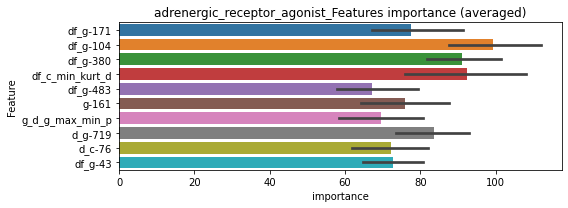

len(train_index) : 2489
len(valid_index) : 830
================================= fold 1/4 adrenergic_receptor_agonist=================================


Training until validation scores don't improve for 30 rounds


len(train_index) : 2489
len(valid_index) : 830
================================= fold 2/4 adrenergic_receptor_agonist=================================


Early stopping, best iteration is:
[253]	training's binary_logloss: 0.00330209	valid_1's binary_logloss: 0.0811778
Training until validation scores don't improve for 30 rounds


len(train_index) : 2489
len(valid_index) : 830
================================= fold 3/4 adrenergic_receptor_agonist=================================


Early stopping, best iteration is:
[460]	training's binary_logloss: 0.00156412	valid_1's binary_logloss: 0.0623666
Training until validation scores don't improve for 30 rounds


len(train_index) : 2490
len(valid_index) : 829
================================= fold 4/4 adrenergic_receptor_agonist=================================


Early stopping, best iteration is:
[449]	training's binary_logloss: 0.00159965	valid_1's binary_logloss: 0.0682901
Training until validation scores don't improve for 30 rounds


adrenergic_receptor_agonist logloss: 0.07315156126432548
adrenergic_receptor_agonist clipping


Early stopping, best iteration is:
[319]	training's binary_logloss: 0.00239156	valid_1's binary_logloss: 0.0807809
neg labels: 3289 → selected neg labels: 3240


adrenergic_receptor_antagonist, len(trt): 360, len(othr): 3240
target_rate: 0.0151172 → Adj_target_rate: 0.0125042
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[237]	training's binary_logloss: 0.0609739	valid_1's binary_logloss: 0.319311
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[242]	training's binary_logloss: 0.0595819	valid_1's binary_logloss: 0.290223
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0369329	valid_1's binary_logloss: 0.275879
Early stopping, best iteration is:
[272]	training's binary_logloss: 0.0451715	valid_1's binary_logloss: 0.275067
Training until validation scores don't improve for 30 rounds


1 / 3 AUC score:0.849
y_Threshold: 0.1125013, Threshold: 0.6872203, pos_neg_ratio: 0.8000000
Remove_noisy_data: 544 → Positive_corect_labels: 441/3344
p_label_rate: 0.0100452 Vs.target_rate: 0.01512
Num_p_label: 40.0, conf_0:0.48105, conf_1:0.80000
Num_p_label: 40.0, Expected: 60.2, Adj_threshold_1: 0.6872203
Num_p_label: 57.0, Expected: 60.2, Adj_threshold_2: 0.6572203
threshold: 0.6572203, positive_p_label: 57.0/3982, p_label_rate: 0.0143144


Early stopping, best iteration is:
[261]	training's binary_logloss: 0.050047	valid_1's binary_logloss: 0.290602


positive_y_label: 441.0/3344, y_label_rate: 0.1318780
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0115912	valid_1's binary_logloss: 0.172758
Early stopping, best iteration is:
[276]	training's binary_logloss: 0.0144379	valid_1's binary_logloss: 0.172668
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0119582	valid_1's binary_logloss: 0.127076
Early stopping, best iteration is:
[366]	training's binary_logloss: 0.00685411	valid_1's binary_logloss: 0.123361
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0119366	valid_1's binary_logloss: 0.111176
Early stopping, best iteration is:
[488]	training's binary_logloss: 0.00315374	valid_1's binary_logloss: 0.104572
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0105136	valid_1's binary_logloss: 0.154147


2 / 3 AUC score:0.985
y_Threshold: 0.0637622, Threshold: 0.6572203, pos_neg_ratio: 0.8000000
Remove_noisy_data: 106 → Positive_corect_labels: 388.0/3238


Early stopping, best iteration is:
[354]	training's binary_logloss: 0.00676519	valid_1's binary_logloss: 0.151759


p_label_rate: 0.0341537 Vs.target_rate: 0.01512
Num_p_label: 136.0, conf_0:0.50000, conf_1:0.78866
Num_p_label: 136.0, Expected: 60.2, Adj_threshold_1: 0.6572203
Num_p_label: 133.0, Expected: 60.2, Adj_threshold_2: 0.6972203
Num_p_label: 129.0, Expected: 60.2, Adj_threshold_3: 0.7372203
Num_p_label: 120.0, Expected: 60.2, Adj_threshold_4: 0.7772203
Num_p_label: 109.0, Expected: 60.2, Adj_threshold_5: 0.8172203
Num_p_label: 99.0, Expected: 60.2, Adj_threshold_6: 0.8572203
Num_p_label: 82.0, Expected: 60.2, Adj_threshold_7: 0.8972203
threshold: 0.8972203, positive_p_label: 82.0/3982, p_label_rate: 0.0205927
positive_y_label: 388.0/3238, y_label_rate: 0.1198271
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00706815	valid_1's binary_logloss: 0.124819
Early stopping, best iteration is:
[293]	training's binary_logloss: 0.00755614	valid_1's binary_logloss: 0.124527
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00786676	valid_1's binary_logloss: 0.0967554
Early stopping, best iteration is:
[534]	training's binary_logloss: 0.00175369	valid_1's binary_logloss: 0.0891944
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00800573	valid_1's binary_logloss: 0.110243
Early stopping, best iteration is:
[350]	training's binary_logloss: 0.00517715	valid_1's binary_logloss: 0.108629
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00781763	valid_1's binary_logloss: 0.0969334


3 / 3 AUC score:0.990
y_Threshold: 0.0561769, Threshold: 0.8972203, pos_neg_ratio: 0.8000000
Remove_noisy_data: 62 → Positive_corect_labels: 357.0/3176
p_label_rate: 0.0406831 Vs.target_rate: 0.01512
Num_p_label: 162.0, conf_0:0.50000, conf_1:0.80000
Num_p_label: 162.0, Expected: 60.2, Adj_threshold_1: 0.8972203


Early stopping, best iteration is:
[413]	training's binary_logloss: 0.00334376	valid_1's binary_logloss: 0.0934311


threshold: 0.8972203, positive_p_label: 162.0/3982, p_label_rate: 0.0406831
positive_y_label: 357.0/3176, y_label_rate: 0.1124055


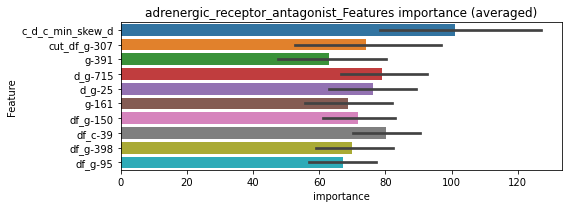

len(train_index) : 2382
len(valid_index) : 794
================================= fold 1/4 adrenergic_receptor_antagonist=================================


Training until validation scores don't improve for 30 rounds


len(train_index) : 2382
len(valid_index) : 794
================================= fold 2/4 adrenergic_receptor_antagonist=================================


Early stopping, best iteration is:
[138]	training's binary_logloss: 0.00872855	valid_1's binary_logloss: 0.111174
Training until validation scores don't improve for 30 rounds


len(train_index) : 2382
len(valid_index) : 794
================================= fold 3/4 adrenergic_receptor_antagonist=================================


Early stopping, best iteration is:
[244]	training's binary_logloss: 0.00354598	valid_1's binary_logloss: 0.0880489
Training until validation scores don't improve for 30 rounds


len(train_index) : 2382
len(valid_index) : 794
================================= fold 4/4 adrenergic_receptor_antagonist=================================


Early stopping, best iteration is:
[170]	training's binary_logloss: 0.00603436	valid_1's binary_logloss: 0.104133
Training until validation scores don't improve for 30 rounds


adrenergic_receptor_antagonist logloss: 0.098677725884048
adrenergic_receptor_antagonist clipping


Early stopping, best iteration is:
[185]	training's binary_logloss: 0.00533025	valid_1's binary_logloss: 0.0913553
neg labels: 3289 → selected neg labels: 3284


akt_inhibitor, len(trt): 66, len(othr): 3284
target_rate: 0.0027715 → Adj_target_rate: 0.0029567
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00480451	valid_1's binary_logloss: 0.0536681
[600]	training's binary_logloss: 0.000782299	valid_1's binary_logloss: 0.0433995
Early stopping, best iteration is:
[635]	training's binary_logloss: 0.000711385	valid_1's binary_logloss: 0.0430186
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00454858	valid_1's binary_logloss: 0.035716
[600]	training's binary_logloss: 0.000785184	valid_1's binary_logloss: 0.0266264
Early stopping, best iteration is:
[697]	training's binary_logloss: 0.000627743	valid_1's binary_logloss: 0.0260559
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00506288	valid_1's binary_logloss: 0.0145691
[600]	training's binary_logloss: 0.000836856	valid_1's binary_logloss: 0.00569403
Early stopping, best iteration is:
[784]	training's binary_logloss: 0.000597467	valid_1's binary_loglo

1 / 3 AUC score:0.999
y_Threshold: 0.0056773, Threshold: 0.0217122, pos_neg_ratio: 0.8000000
Remove_noisy_data: 142 → Positive_corect_labels: 651/3798
p_label_rate: 0.0100452 Vs.target_rate: 0.00277
Num_p_label: 40.0, conf_0:0.01520, conf_1:0.02823
Num_p_label: 40.0, Expected: 11.0, Adj_threshold_1: 0.0217122
Num_p_label: 22.0, Expected: 11.0, Adj_threshold_2: 0.0617122
Num_p_label: 17.0, Expected: 11.0, Adj_threshold_3: 0.1017122
Num_p_label: 12.0, Expected: 11.0, Adj_threshold_4: 0.1417122
threshold: 0.1417122, positive_p_label: 12.0/3982, p_label_rate: 0.0030136
positive_y_label: 651.0/3798, y_label_rate: 0.1714060
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0043012	valid_1's binary_logloss: 0.0234031
[600]	training's binary_logloss: 0.000751559	valid_1's binary_logloss: 0.0147676
Early stopping, best iteration is:
[723]	training's binary_logloss: 0.000582192	valid_1's binary_logloss: 0.0143017
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00387078	valid_1's binary_logloss: 0.0368113
[600]	training's binary_logloss: 0.000714729	valid_1's binary_logloss: 0.0287826
Early stopping, best iteration is:
[728]	training's binary_logloss: 0.000555666	valid_1's binary_logloss: 0.0280019
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00420745	valid_1's binary_logloss: 0.0187463
[600]	training's binary_logloss: 0.000759	valid_1's binary_logloss: 0.0117935
Early stopping, best iteration is:
[630]	training's binary_logloss: 0.000700785	valid_1's binary_logloss: 

2 / 3 AUC score:1.000
y_Threshold: 0.0233412, Threshold: 0.1417122, pos_neg_ratio: 0.8000000
Remove_noisy_data: 8 → Positive_corect_labels: 647.0/3790
p_label_rate: 0.0060271 Vs.target_rate: 0.00277
Num_p_label: 24.0, conf_0:0.11337, conf_1:0.17005
Num_p_label: 24.0, Expected: 11.0, Adj_threshold_1: 0.1417122
Num_p_label: 22.0, Expected: 11.0, Adj_threshold_2: 0.1817122
Num_p_label: 20.0, Expected: 11.0, Adj_threshold_3: 0.2217122
Num_p_label: 20.0, Expected: 11.0, Adj_threshold_4: 0.2617122
Num_p_label: 17.0, Expected: 11.0, Adj_threshold_5: 0.3017122
Num_p_label: 14.0, Expected: 11.0, Adj_threshold_6: 0.3417122
threshold: 0.3417122, positive_p_label: 14.0/3982, p_label_rate: 0.0035158
positive_y_label: 647.0/3790, y_label_rate: 0.1707124
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00390893	valid_1's binary_logloss: 0.0223272
[600]	training's binary_logloss: 0.000721132	valid_1's binary_logloss: 0.0131335
Early stopping, best iteration is:
[738]	training's binary_logloss: 0.000552268	valid_1's binary_logloss: 0.0123718
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00387587	valid_1's binary_logloss: 0.0284554
[600]	training's binary_logloss: 0.000725823	valid_1's binary_logloss: 0.0212209
Early stopping, best iteration is:
[626]	training's binary_logloss: 0.000679719	valid_1's binary_logloss: 0.0209769
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00395116	valid_1's binary_logloss: 0.0231156
[600]	training's binary_logloss: 0.000728899	valid_1's binary_logloss: 0.0151717
Early stopping, best iteration is:
[752]	training's binary_logloss: 0.000557466	valid_1's binary_loglo

3 / 3 AUC score:1.000
y_Threshold: 0.0185739, Threshold: 0.3417122, pos_neg_ratio: 0.8000000
Remove_noisy_data: 6 → Positive_corect_labels: 644.0/3784
p_label_rate: 0.0030136 Vs.target_rate: 0.00277
Num_p_label: 12.0, conf_0:0.30754, conf_1:0.37588
threshold: 0.3417122, positive_p_label: 12.0/3982, p_label_rate: 0.0030136
positive_y_label: 644.0/3784, y_label_rate: 0.1701903


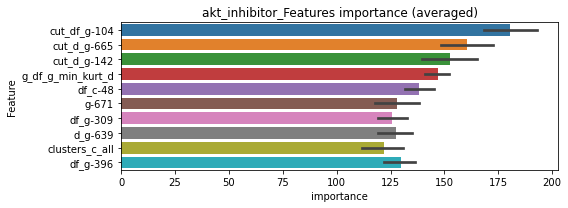

len(train_index) : 2838
len(valid_index) : 946
================================= fold 1/4 akt_inhibitor=================================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.000545992	valid_1's binary_logloss: 0.00984731
Early stopping, best iteration is:
[1001]	training's binary_logloss: 0.00054576	valid_1's binary_logloss: 0.00984665


len(train_index) : 2838
len(valid_index) : 946
================================= fold 2/4 akt_inhibitor=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[652]	training's binary_logloss: 0.000735726	valid_1's binary_logloss: 0.0196703


len(train_index) : 2838
len(valid_index) : 946
================================= fold 3/4 akt_inhibitor=================================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.000552233	valid_1's binary_logloss: 0.00776387
Early stopping, best iteration is:
[1081]	training's binary_logloss: 0.000538933	valid_1's binary_logloss: 0.00770194


len(train_index) : 2838
len(valid_index) : 946
================================= fold 4/4 akt_inhibitor=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[727]	training's binary_logloss: 0.00066899	valid_1's binary_logloss: 0.0146395


akt_inhibitor logloss: 0.012967888880481572


neg labels: 3289 → selected neg labels: 3288


aldehyde_dehydrogenase_inhibitor, len(trt): 19, len(othr): 3288
target_rate: 0.0007979 → Adj_target_rate: 0.0010260
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00103246	valid_1's binary_logloss: 0.00261173
[600]	training's binary_logloss: 0.000297935	valid_1's binary_logloss: 0.00114673
Early stopping, best iteration is:
[589]	training's binary_logloss: 0.000297935	valid_1's binary_logloss: 0.00114673
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00103219	valid_1's binary_logloss: 0.00406298
[600]	training's binary_logloss: 0.000295822	valid_1's binary_logloss: 0.00196056
Early stopping, best iteration is:
[586]	training's binary_logloss: 0.000296215	valid_1's binary_logloss: 0.00195966
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00104962	valid_1's binary_logloss: 0.00174167
[600]	training's binary_logloss: 0.000298042	valid_1's binary_logloss: 0.000611111
Early stopping, best iteration is:
[609]	training's binary_logloss: 0.000296872	valid_1's bin

1 / 3 AUC score:1.000
y_Threshold: 0.0016395, Threshold: 0.0058764, pos_neg_ratio: 0.8000000
Remove_noisy_data: 132 → Positive_corect_labels: 657/3813
p_label_rate: 0.0100452 Vs.target_rate: 0.00080
Num_p_label: 40.0, conf_0:0.00411, conf_1:0.00764
Num_p_label: 40.0, Expected: 3.2, Adj_threshold_1: 0.0058764


[600]	training's binary_logloss: 0.000298095	valid_1's binary_logloss: 0.00100441
Early stopping, best iteration is:
[591]	training's binary_logloss: 0.000298095	valid_1's binary_logloss: 0.00100441


Num_p_label: 4.0, Expected: 3.2, Adj_threshold_2: 0.0458764
threshold: 0.0458764, positive_p_label: 4.0/3982, p_label_rate: 0.0010045
positive_y_label: 657.0/3813, y_label_rate: 0.1723053
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.000956013	valid_1's binary_logloss: 0.00287528
Early stopping, best iteration is:
[562]	training's binary_logloss: 0.000291519	valid_1's binary_logloss: 0.00163393
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.000956617	valid_1's binary_logloss: 0.00289019
[600]	training's binary_logloss: 0.000282501	valid_1's binary_logloss: 0.0013382
Early stopping, best iteration is:
[660]	training's binary_logloss: 0.00027802	valid_1's binary_logloss: 0.00133023
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.000969917	valid_1's binary_logloss: 0.00169899
[600]	training's binary_logloss: 0.000286673	valid_1's binary_logloss: 0.000589332
Early stopping, best iteration is:
[609]	training's binary_logloss: 0.00028571	valid_1's binary_logloss: 0.00058797
Training until validation scores don't improve for 30 roun

2 / 3 AUC score:1.000
y_Threshold: 0.0699917, Threshold: 0.0458764, pos_neg_ratio: 0.8000000
Remove_noisy_data: 0 → Positive_corect_labels: 657.0/3813
p_label_rate: 0.0032647 Vs.target_rate: 0.00080
Num_p_label: 13.0, conf_0:0.03670, conf_1:0.05505
Num_p_label: 13.0, Expected: 3.2, Adj_threshold_1: 0.0458764
Num_p_label: 5.0, Expected: 3.2, Adj_threshold_2: 0.0858764
threshold: 0.0858764, positive_p_label: 5.0/3982, p_label_rate: 0.0012557
positive_y_label: 657.0/3813, y_label_rate: 0.1723053
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.000956013	valid_1's binary_logloss: 0.00287528
Early stopping, best iteration is:
[562]	training's binary_logloss: 0.000291519	valid_1's binary_logloss: 0.00163393
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.000956617	valid_1's binary_logloss: 0.00289019
[600]	training's binary_logloss: 0.000282501	valid_1's binary_logloss: 0.0013382
Early stopping, best iteration is:
[660]	training's binary_logloss: 0.00027802	valid_1's binary_logloss: 0.00133023
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.000969917	valid_1's binary_logloss: 0.00169899
[600]	training's binary_logloss: 0.000286673	valid_1's binary_logloss: 0.000589332
Early stopping, best iteration is:
[609]	training's binary_logloss: 0.00028571	valid_1's binary_logloss: 0.00058797
Training until validation scores don't improve for 30 roun

3 / 3 AUC score:1.000
y_Threshold: 0.0699917, Threshold: 0.0858764, pos_neg_ratio: 0.8000000
Remove_noisy_data: 0 → Positive_corect_labels: 657.0/3813
p_label_rate: 0.0012557 Vs.target_rate: 0.00080
Num_p_label: 5.0, conf_0:0.07729, conf_1:0.09446
Num_p_label: 5.0, Expected: 3.2, Adj_threshold_1: 0.0858764
threshold: 0.0858764, positive_p_label: 5.0/3982, p_label_rate: 0.0012557
positive_y_label: 657.0/3813, y_label_rate: 0.1723053


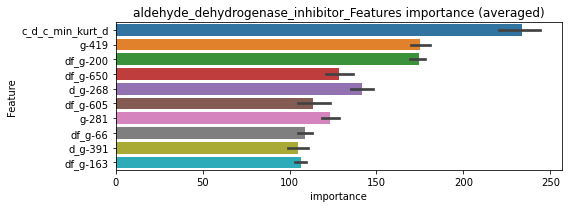

len(train_index) : 2859
len(valid_index) : 954
================================= fold 1/4 aldehyde_dehydrogenase_inhibitor=================================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.000288228	valid_1's binary_logloss: 0.00108399
Early stopping, best iteration is:
[976]	training's binary_logloss: 0.000288228	valid_1's binary_logloss: 0.00108399


len(train_index) : 2860
len(valid_index) : 953
================================= fold 2/4 aldehyde_dehydrogenase_inhibitor=================================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.000284259	valid_1's binary_logloss: 0.00123209
Early stopping, best iteration is:
[1097]	training's binary_logloss: 0.000279863	valid_1's binary_logloss: 0.00122058


len(train_index) : 2860
len(valid_index) : 953
================================= fold 3/4 aldehyde_dehydrogenase_inhibitor=================================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.000287912	valid_1's binary_logloss: 0.000647741
Early stopping, best iteration is:
[1043]	training's binary_logloss: 0.000285684	valid_1's binary_logloss: 0.000643696


len(train_index) : 2860
len(valid_index) : 953
================================= fold 4/4 aldehyde_dehydrogenase_inhibitor=================================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.000286269	valid_1's binary_logloss: 0.00101635
Early stopping, best iteration is:
[1131]	training's binary_logloss: 0.000281771	valid_1's binary_logloss: 0.00100379


aldehyde_dehydrogenase_inhibitor logloss: 0.0009884423518219947


neg labels: 3289 → selected neg labels: 3285


alk_inhibitor, len(trt): 42, len(othr): 3285
target_rate: 0.0017637 → Adj_target_rate: 0.0020135
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00263184	valid_1's binary_logloss: 0.0173532
[600]	training's binary_logloss: 0.000526063	valid_1's binary_logloss: 0.011142
Early stopping, best iteration is:
[634]	training's binary_logloss: 0.000496464	valid_1's binary_logloss: 0.0109927
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00254292	valid_1's binary_logloss: 0.0180754
[600]	training's binary_logloss: 0.000507993	valid_1's binary_logloss: 0.0128355
Early stopping, best iteration is:
[614]	training's binary_logloss: 0.00049597	valid_1's binary_logloss: 0.0128014
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00276085	valid_1's binary_logloss: 0.00885395
[600]	training's binary_logloss: 0.000535059	valid_1's binary_logloss: 0.00440308
Early stopping, best iteration is:
[615]	training's binary_logloss: 0.000521679	valid_1's binary_loglo

1 / 3 AUC score:1.000
y_Threshold: 0.0037522, Threshold: 0.0140018, pos_neg_ratio: 0.8000000
Remove_noisy_data: 132 → Positive_corect_labels: 657/3810
p_label_rate: 0.0100452 Vs.target_rate: 0.00176
Num_p_label: 40.0, conf_0:0.00980, conf_1:0.01820
Num_p_label: 40.0, Expected: 7.0, Adj_threshold_1: 0.0140018
Num_p_label: 14.0, Expected: 7.0, Adj_threshold_2: 0.0540018
threshold: 0.0540018, positive_p_label: 14.0/3982, p_label_rate: 0.0035158
positive_y_label: 657.0/3810, y_label_rate: 0.1724409
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0023577	valid_1's binary_logloss: 0.0191337
[600]	training's binary_logloss: 0.000495399	valid_1's binary_logloss: 0.0129998
Early stopping, best iteration is:
[611]	training's binary_logloss: 0.000487677	valid_1's binary_logloss: 0.0129554
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00233275	valid_1's binary_logloss: 0.0153697
[600]	training's binary_logloss: 0.00049092	valid_1's binary_logloss: 0.0111918
Early stopping, best iteration is:
[632]	training's binary_logloss: 0.000470537	valid_1's binary_logloss: 0.0111405
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00251962	valid_1's binary_logloss: 0.00736114
[600]	training's binary_logloss: 0.000511002	valid_1's binary_logloss: 0.00319694
Early stopping, best iteration is:
[663]	training's binary_logloss: 0.000476589	valid_1's binary_loglo

2 / 3 AUC score:1.000
y_Threshold: 0.0282167, Threshold: 0.0540018, pos_neg_ratio: 0.8000000
Remove_noisy_data: 2 → Positive_corect_labels: 656.0/3808
p_label_rate: 0.0070316 Vs.target_rate: 0.00176
Num_p_label: 28.0, conf_0:0.04320, conf_1:0.06480
Num_p_label: 28.0, Expected: 7.0, Adj_threshold_1: 0.0540018
Num_p_label: 17.0, Expected: 7.0, Adj_threshold_2: 0.0940018
threshold: 0.0940018, positive_p_label: 17.0/3982, p_label_rate: 0.0042692
positive_y_label: 656.0/3808, y_label_rate: 0.1722689
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00237718	valid_1's binary_logloss: 0.0148809
[600]	training's binary_logloss: 0.000494006	valid_1's binary_logloss: 0.0103686
Early stopping, best iteration is:
[653]	training's binary_logloss: 0.000456036	valid_1's binary_logloss: 0.0102609
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0022943	valid_1's binary_logloss: 0.017307
Early stopping, best iteration is:
[526]	training's binary_logloss: 0.000594638	valid_1's binary_logloss: 0.0139199
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00239158	valid_1's binary_logloss: 0.00598701
[600]	training's binary_logloss: 0.00050639	valid_1's binary_logloss: 0.00293933
Early stopping, best iteration is:
[659]	training's binary_logloss: 0.000474856	valid_1's binary_logloss: 0.00289436
Training until validation scores don't improve for 30 rounds
[300]	

3 / 3 AUC score:1.000
y_Threshold: 0.0246323, Threshold: 0.0940018, pos_neg_ratio: 0.8000000
Remove_noisy_data: 2 → Positive_corect_labels: 655.0/3806
p_label_rate: 0.0042692 Vs.target_rate: 0.00176
Num_p_label: 17.0, conf_0:0.08460, conf_1:0.10340
Num_p_label: 17.0, Expected: 7.0, Adj_threshold_1: 0.0940018
threshold: 0.0940018, positive_p_label: 17.0/3982, p_label_rate: 0.0042692
positive_y_label: 655.0/3806, y_label_rate: 0.1720967


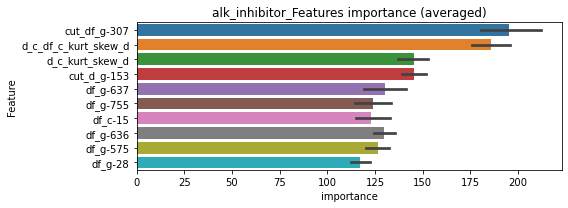

len(train_index) : 2854
len(valid_index) : 952
================================= fold 1/4 alk_inhibitor=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[719]	training's binary_logloss: 0.000517042	valid_1's binary_logloss: 0.0114513


len(train_index) : 2854
len(valid_index) : 952
================================= fold 2/4 alk_inhibitor=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[713]	training's binary_logloss: 0.000528381	valid_1's binary_logloss: 0.00487899


len(train_index) : 2855
len(valid_index) : 951
================================= fold 3/4 alk_inhibitor=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[854]	training's binary_logloss: 0.000481974	valid_1's binary_logloss: 0.00419596


len(train_index) : 2855
len(valid_index) : 951
================================= fold 4/4 alk_inhibitor=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[741]	training's binary_logloss: 0.000515123	valid_1's binary_logloss: 0.00557653


alk_inhibitor logloss: 0.006529240047432255


neg labels: 3289 → selected neg labels: 3289


ampk_activator, len(trt): 12, len(othr): 3289
target_rate: 0.0005039 → Adj_target_rate: 0.0006942
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.000578485	valid_1's binary_logloss: 0.00143255
Early stopping, best iteration is:
[557]	training's binary_logloss: 0.000234804	valid_1's binary_logloss: 0.000812089
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.000570144	valid_1's binary_logloss: 0.0034497
Early stopping, best iteration is:
[467]	training's binary_logloss: 0.000246472	valid_1's binary_logloss: 0.00278476
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.000574949	valid_1's binary_logloss: 0.000855494
Early stopping, best iteration is:
[497]	training's binary_logloss: 0.000241476	valid_1's binary_logloss: 0.00040446
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.000569337	valid_1's binary_logloss: 0.00273636


1 / 3 AUC score:1.000
y_Threshold: 0.0009291, Threshold: 0.0036302, pos_neg_ratio: 0.8000000
Remove_noisy_data: 133 → Positive_corect_labels: 657/3813
p_label_rate: 0.0100452 Vs.target_rate: 0.00050
Num_p_label: 40.0, conf_0:0.00254, conf_1:0.00472
Num_p_label: 40.0, Expected: 2.0, Adj_threshold_1: 0.0036302
Num_p_label: 4.0, Expected: 2.0, Adj_threshold_2: 0.0436302
threshold: 0.0436302, positive_p_label: 4.0/3982, p_label_rate: 0.0010045


Early stopping, best iteration is:
[505]	training's binary_logloss: 0.000237192	valid_1's binary_logloss: 0.00168847


positive_y_label: 657.0/3813, y_label_rate: 0.1723053
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00052478	valid_1's binary_logloss: 0.00197055
Early stopping, best iteration is:
[488]	training's binary_logloss: 0.00022582	valid_1's binary_logloss: 0.00141945
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.000527392	valid_1's binary_logloss: 0.00358379
Early stopping, best iteration is:
[495]	training's binary_logloss: 0.000221626	valid_1's binary_logloss: 0.00311154
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.000529941	valid_1's binary_logloss: 0.000663057
Early stopping, best iteration is:
[505]	training's binary_logloss: 0.000223899	valid_1's binary_logloss: 0.000287517
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.000529947	valid_1's binary_logloss: 0.00266263


2 / 3 AUC score:1.000
y_Threshold: 0.0274110, Threshold: 0.0436302, pos_neg_ratio: 0.8000000
Remove_noisy_data: 0 → Positive_corect_labels: 657.0/3813
p_label_rate: 0.0030136 Vs.target_rate: 0.00050
Num_p_label: 12.0, conf_0:0.03490, conf_1:0.05236
Num_p_label: 12.0, Expected: 2.0, Adj_threshold_1: 0.0436302
Num_p_label: 8.0, Expected: 2.0, Adj_threshold_2: 0.0836302
Num_p_label: 5.0, Expected: 2.0, Adj_threshold_3: 0.1236302


Early stopping, best iteration is:
[512]	training's binary_logloss: 0.000225718	valid_1's binary_logloss: 0.00178599


threshold: 0.1236302, positive_p_label: 5.0/3982, p_label_rate: 0.0012557
positive_y_label: 657.0/3813, y_label_rate: 0.1723053
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00052478	valid_1's binary_logloss: 0.00197055
Early stopping, best iteration is:
[488]	training's binary_logloss: 0.00022582	valid_1's binary_logloss: 0.00141945
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.000527392	valid_1's binary_logloss: 0.00358379
Early stopping, best iteration is:
[495]	training's binary_logloss: 0.000221626	valid_1's binary_logloss: 0.00311154
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.000529941	valid_1's binary_logloss: 0.000663057
Early stopping, best iteration is:
[508]	training's binary_logloss: 0.000223899	valid_1's binary_logloss: 0.000287517
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.000529947	valid_1's binary_logloss: 0.00266263


3 / 3 AUC score:1.000
y_Threshold: 0.0274110, Threshold: 0.1236302, pos_neg_ratio: 0.8000000
Remove_noisy_data: 0 → Positive_corect_labels: 657.0/3813
p_label_rate: 0.0012557 Vs.target_rate: 0.00050
Num_p_label: 5.0, conf_0:0.11127, conf_1:0.13599
Num_p_label: 5.0, Expected: 2.0, Adj_threshold_1: 0.1236302
threshold: 0.1236302, positive_p_label: 5.0/3982, p_label_rate: 0.0012557


Early stopping, best iteration is:
[512]	training's binary_logloss: 0.000225718	valid_1's binary_logloss: 0.00178599


positive_y_label: 657.0/3813, y_label_rate: 0.1723053


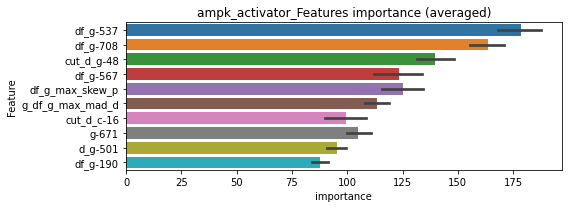

len(train_index) : 2859
len(valid_index) : 954
================================= fold 1/4 ampk_activator=================================


Training until validation scores don't improve for 30 rounds


len(train_index) : 2860
len(valid_index) : 953
================================= fold 2/4 ampk_activator=================================


Early stopping, best iteration is:
[846]	training's binary_logloss: 0.000226274	valid_1's binary_logloss: 0.00103936
Training until validation scores don't improve for 30 rounds


len(train_index) : 2860
len(valid_index) : 953
================================= fold 3/4 ampk_activator=================================


Early stopping, best iteration is:
[661]	training's binary_logloss: 0.00024519	valid_1's binary_logloss: 0.00258748
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[925]	training's binary_logloss: 0.000224845	valid_1's binary_logloss: 0.000299224


len(train_index) : 2860
len(valid_index) : 953
================================= fold 4/4 ampk_activator=================================


Training until validation scores don't improve for 30 rounds


ampk_activator logloss: 0.0011866326383274878


Early stopping, best iteration is:
[845]	training's binary_logloss: 0.000226985	valid_1's binary_logloss: 0.000820479
neg labels: 3289 → selected neg labels: 3288


analgesic, len(trt): 12, len(othr): 3288
target_rate: 0.0005039 → Adj_target_rate: 0.0006942
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.000633055	valid_1's binary_logloss: 0.00154742
Early stopping, best iteration is:
[517]	training's binary_logloss: 0.000250124	valid_1's binary_logloss: 0.00078978
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.000621998	valid_1's binary_logloss: 0.00140603
Early stopping, best iteration is:
[540]	training's binary_logloss: 0.000246469	valid_1's binary_logloss: 0.000680677
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00064147	valid_1's binary_logloss: 0.000995743
Early stopping, best iteration is:
[494]	training's binary_logloss: 0.000252411	valid_1's binary_logloss: 0.000453138
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.000633687	valid_1's binary_logloss: 0.00106435


1 / 3 AUC score:1.000
y_Threshold: 0.0011319, Threshold: 0.0183798, pos_neg_ratio: 0.8000000
Remove_noisy_data: 132 → Positive_corect_labels: 657/3813
p_label_rate: 0.0100452 Vs.target_rate: 0.00050
Num_p_label: 40.0, conf_0:0.01287, conf_1:0.02389
Num_p_label: 40.0, Expected: 2.0, Adj_threshold_1: 0.0183798
Num_p_label: 19.0, Expected: 2.0, Adj_threshold_2: 0.0583798
Num_p_label: 12.0, Expected: 2.0, Adj_threshold_3: 0.0983798
Num_p_label: 8.0, Expected: 2.0, Adj_threshold_4: 0.1383798
Num_p_label: 7.0, Expected: 2.0, Adj_threshold_5: 0.1783798
Num_p_label: 7.0, Expected: 2.0, Adj_threshold_6: 0.2183798


Early stopping, best iteration is:
[513]	training's binary_logloss: 0.000250731	valid_1's binary_logloss: 0.000459291


Num_p_label: 6.0, Expected: 2.0, Adj_threshold_7: 0.2583798
Num_p_label: 5.0, Expected: 2.0, Adj_threshold_8: 0.2983798
threshold: 0.2983798, positive_p_label: 5.0/3982, p_label_rate: 0.0012557
positive_y_label: 657.0/3813, y_label_rate: 0.1723053
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.000565729	valid_1's binary_logloss: 0.00115991
Early stopping, best iteration is:
[513]	training's binary_logloss: 0.000233989	valid_1's binary_logloss: 0.000582958
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00056368	valid_1's binary_logloss: 0.00118468
Early stopping, best iteration is:
[511]	training's binary_logloss: 0.000234035	valid_1's binary_logloss: 0.000627785
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00057375	valid_1's binary_logloss: 0.000720079
Early stopping, best iteration is:
[507]	training's binary_logloss: 0.000239567	valid_1's binary_logloss: 0.000312338
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.000571405	valid_1's binary_logloss: 0.000774488


2 / 3 AUC score:1.000
y_Threshold: 0.1435306, Threshold: 0.2983798, pos_neg_ratio: 0.8000000
Remove_noisy_data: 0 → Positive_corect_labels: 657.0/3813
p_label_rate: 0.0017579 Vs.target_rate: 0.00050
Num_p_label: 7.0, conf_0:0.23870, conf_1:0.35806
Num_p_label: 7.0, Expected: 2.0, Adj_threshold_1: 0.2983798
Num_p_label: 7.0, Expected: 2.0, Adj_threshold_2: 0.3383798
Num_p_label: 6.0, Expected: 2.0, Adj_threshold_3: 0.3783798
Num_p_label: 6.0, Expected: 2.0, Adj_threshold_4: 0.4183798
Num_p_label: 6.0, Expected: 2.0, Adj_threshold_5: 0.4583798
Num_p_label: 6.0, Expected: 2.0, Adj_threshold_6: 0.4983798
Num_p_label: 6.0, Expected: 2.0, Adj_threshold_7: 0.5383798
Num_p_label: 5.0, Expected: 2.0, Adj_threshold_8: 0.5783798


Early stopping, best iteration is:
[507]	training's binary_logloss: 0.000235778	valid_1's binary_logloss: 0.000334078


threshold: 0.5783798, positive_p_label: 5.0/3982, p_label_rate: 0.0012557
positive_y_label: 657.0/3813, y_label_rate: 0.1723053
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.000565729	valid_1's binary_logloss: 0.00115991
Early stopping, best iteration is:
[513]	training's binary_logloss: 0.000233989	valid_1's binary_logloss: 0.000582958
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00056368	valid_1's binary_logloss: 0.00118468
Early stopping, best iteration is:
[511]	training's binary_logloss: 0.000234035	valid_1's binary_logloss: 0.000627785
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00057375	valid_1's binary_logloss: 0.000720079
Early stopping, best iteration is:
[507]	training's binary_logloss: 0.000239567	valid_1's binary_logloss: 0.000312338
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.000571405	valid_1's binary_logloss: 0.000774488


3 / 3 AUC score:1.000
y_Threshold: 0.1435306, Threshold: 0.5783798, pos_neg_ratio: 0.8000000
Remove_noisy_data: 0 → Positive_corect_labels: 657.0/3813
p_label_rate: 0.0012557 Vs.target_rate: 0.00050
Num_p_label: 5.0, conf_0:0.50000, conf_1:0.63622
Num_p_label: 5.0, Expected: 2.0, Adj_threshold_1: 0.5783798


Early stopping, best iteration is:
[507]	training's binary_logloss: 0.000235778	valid_1's binary_logloss: 0.000334078


threshold: 0.5783798, positive_p_label: 5.0/3982, p_label_rate: 0.0012557
positive_y_label: 657.0/3813, y_label_rate: 0.1723053


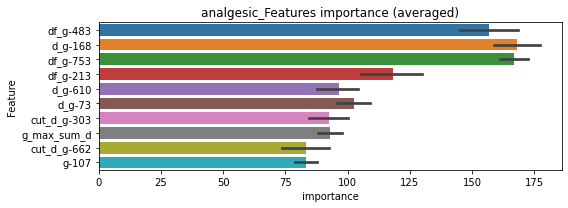

len(train_index) : 2859
len(valid_index) : 954
================================= fold 1/4 analgesic=================================


Training until validation scores don't improve for 30 rounds


len(train_index) : 2860
len(valid_index) : 953
================================= fold 2/4 analgesic=================================


Early stopping, best iteration is:
[827]	training's binary_logloss: 0.000237761	valid_1's binary_logloss: 0.000466252
Training until validation scores don't improve for 30 rounds


len(train_index) : 2860
len(valid_index) : 953
================================= fold 3/4 analgesic=================================


Early stopping, best iteration is:
[924]	training's binary_logloss: 0.000232347	valid_1's binary_logloss: 0.000458584
Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.000233177	valid_1's binary_logloss: 0.000312127
Early stopping, best iteration is:
[1007]	training's binary_logloss: 0.000233126	valid_1's binary_logloss: 0.00031206


len(train_index) : 2860
len(valid_index) : 953
================================= fold 4/4 analgesic=================================


Training until validation scores don't improve for 30 rounds


analgesic logloss: 0.00038909599205807344


Early stopping, best iteration is:
[932]	training's binary_logloss: 0.000232697	valid_1's binary_logloss: 0.000319406
neg labels: 3289 → selected neg labels: 3282


androgen_receptor_agonist, len(trt): 48, len(othr): 3282
target_rate: 0.0020156 → Adj_target_rate: 0.0022556
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00294369	valid_1's binary_logloss: 0.0247565
[600]	training's binary_logloss: 0.000576593	valid_1's binary_logloss: 0.0166911
Early stopping, best iteration is:
[636]	training's binary_logloss: 0.000533154	valid_1's binary_logloss: 0.0163481
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0031637	valid_1's binary_logloss: 0.019681
[600]	training's binary_logloss: 0.000591412	valid_1's binary_logloss: 0.0131932
Early stopping, best iteration is:
[689]	training's binary_logloss: 0.000508394	valid_1's binary_logloss: 0.0128059
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00340012	valid_1's binary_logloss: 0.00703943
[600]	training's binary_logloss: 0.000618777	valid_1's binary_logloss: 0.00190353
Early stopping, best iteration is:
[683]	training's binary_logloss: 0.000534165	valid_1's binary_loglo

1 / 3 AUC score:0.999
y_Threshold: 0.0036988, Threshold: 0.0077623, pos_neg_ratio: 0.8000000
Remove_noisy_data: 134 → Positive_corect_labels: 655/3804
p_label_rate: 0.0100452 Vs.target_rate: 0.00202
Num_p_label: 40.0, conf_0:0.00543, conf_1:0.01009
Num_p_label: 40.0, Expected: 8.0, Adj_threshold_1: 0.0077623
Num_p_label: 3.0, Expected: 8.0, Adj_threshold_2: 0.0477623
threshold: 0.0477623, positive_p_label: 3.0/3982, p_label_rate: 0.0007534
positive_y_label: 655.0/3804, y_label_rate: 0.1721872
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00293143	valid_1's binary_logloss: 0.0225186
[600]	training's binary_logloss: 0.000567293	valid_1's binary_logloss: 0.0152312
Early stopping, best iteration is:
[676]	training's binary_logloss: 0.00049342	valid_1's binary_logloss: 0.0150489
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00288358	valid_1's binary_logloss: 0.0145709
[600]	training's binary_logloss: 0.000564917	valid_1's binary_logloss: 0.00861547
Early stopping, best iteration is:
[674]	training's binary_logloss: 0.000499399	valid_1's binary_logloss: 0.00830173
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00306876	valid_1's binary_logloss: 0.0142919
[600]	training's binary_logloss: 0.000588574	valid_1's binary_logloss: 0.00864943
Early stopping, best iteration is:
[717]	training's binary_logloss: 0.000494713	valid_1's binary_log

2 / 3 AUC score:1.000
y_Threshold: 0.0178196, Threshold: 0.0477623, pos_neg_ratio: 0.8000000
Remove_noisy_data: 2 → Positive_corect_labels: 654.0/3802
p_label_rate: 0.0017579 Vs.target_rate: 0.00202
Num_p_label: 7.0, conf_0:0.03821, conf_1:0.05731
threshold: 0.0477623, positive_p_label: 7.0/3982, p_label_rate: 0.0017579
positive_y_label: 654.0/3802, y_label_rate: 0.1720147
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00279682	valid_1's binary_logloss: 0.0248013
Early stopping, best iteration is:
[531]	training's binary_logloss: 0.000675501	valid_1's binary_logloss: 0.0192889
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00304959	valid_1's binary_logloss: 0.012376
[600]	training's binary_logloss: 0.000583238	valid_1's binary_logloss: 0.00602076
Early stopping, best iteration is:
[675]	training's binary_logloss: 0.000508447	valid_1's binary_logloss: 0.00572268
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00288978	valid_1's binary_logloss: 0.0163991
[600]	training's binary_logloss: 0.000574893	valid_1's binary_logloss: 0.0107263
Early stopping, best iteration is:
[570]	training's binary_logloss: 0.000621231	valid_1's binary_logloss: 0.0106883
Training until validation scores don't improve for 30 rounds
[300]

3 / 3 AUC score:1.000
y_Threshold: 0.0146467, Threshold: 0.0477623, pos_neg_ratio: 0.8000000
Remove_noisy_data: 2 → Positive_corect_labels: 653.0/3800
p_label_rate: 0.0022602 Vs.target_rate: 0.00202
Num_p_label: 9.0, conf_0:0.04299, conf_1:0.05254
threshold: 0.0477623, positive_p_label: 9.0/3982, p_label_rate: 0.0022602
positive_y_label: 653.0/3800, y_label_rate: 0.1718421


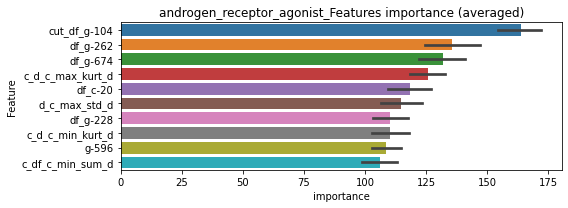

len(train_index) : 2850
len(valid_index) : 950
================================= fold 1/4 androgen_receptor_agonist=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[547]	training's binary_logloss: 0.000711727	valid_1's binary_logloss: 0.0167623


len(train_index) : 2850
len(valid_index) : 950
================================= fold 2/4 androgen_receptor_agonist=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[910]	training's binary_logloss: 0.000499254	valid_1's binary_logloss: 0.00961694


len(train_index) : 2850
len(valid_index) : 950
================================= fold 3/4 androgen_receptor_agonist=================================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.000489103	valid_1's binary_logloss: 0.0058017
Early stopping, best iteration is:
[975]	training's binary_logloss: 0.000490519	valid_1's binary_logloss: 0.00579096


len(train_index) : 2850
len(valid_index) : 950
================================= fold 4/4 androgen_receptor_agonist=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[900]	training's binary_logloss: 0.000507755	valid_1's binary_logloss: 0.00835283


androgen_receptor_agonist logloss: 0.010135753412612546


neg labels: 3289 → selected neg labels: 3274


androgen_receptor_antagonist, len(trt): 89, len(othr): 3274
target_rate: 0.0037373 → Adj_target_rate: 0.0038122
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00673144	valid_1's binary_logloss: 0.0643066
Early stopping, best iteration is:
[482]	training's binary_logloss: 0.00172143	valid_1's binary_logloss: 0.0575978
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00640783	valid_1's binary_logloss: 0.0508137
[600]	training's binary_logloss: 0.00106378	valid_1's binary_logloss: 0.0383057
Early stopping, best iteration is:
[770]	training's binary_logloss: 0.000716781	valid_1's binary_logloss: 0.0374404
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00667557	valid_1's binary_logloss: 0.0384075
[600]	training's binary_logloss: 0.00108847	valid_1's binary_logloss: 0.0260604
Early stopping, best iteration is:
[648]	training's binary_logloss: 0.00094933	valid_1's binary_logloss: 0.0258988
Training until validation scores don't improve for 30 rounds
[300]	trai

1 / 3 AUC score:0.999
y_Threshold: 0.0089762, Threshold: 0.0369903, pos_neg_ratio: 0.8000000
Remove_noisy_data: 142 → Positive_corect_labels: 649/3786
p_label_rate: 0.0100452 Vs.target_rate: 0.00374
Num_p_label: 40.0, conf_0:0.02589, conf_1:0.04809
Num_p_label: 40.0, Expected: 14.9, Adj_threshold_1: 0.0369903
Num_p_label: 15.0, Expected: 14.9, Adj_threshold_2: 0.0769903
threshold: 0.0769903, positive_p_label: 15.0/3982, p_label_rate: 0.0037670
positive_y_label: 649.0/3786, y_label_rate: 0.1714210
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00593843	valid_1's binary_logloss: 0.0455901
[600]	training's binary_logloss: 0.00100766	valid_1's binary_logloss: 0.0347971
Early stopping, best iteration is:
[684]	training's binary_logloss: 0.000803327	valid_1's binary_logloss: 0.0343487
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0061359	valid_1's binary_logloss: 0.0529196
Early stopping, best iteration is:
[525]	training's binary_logloss: 0.00136153	valid_1's binary_logloss: 0.0428454
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00605409	valid_1's binary_logloss: 0.0400711
[600]	training's binary_logloss: 0.00102643	valid_1's binary_logloss: 0.0292443
Early stopping, best iteration is:
[769]	training's binary_logloss: 0.000701812	valid_1's binary_logloss: 0.0283652
Training until validation scores don't improve for 30 rounds
[300]	trai

2 / 3 AUC score:1.000
y_Threshold: 0.0372838, Threshold: 0.0769903, pos_neg_ratio: 0.8000000
Remove_noisy_data: 12 → Positive_corect_labels: 643.0/3774
p_label_rate: 0.0087896 Vs.target_rate: 0.00374
Num_p_label: 35.0, conf_0:0.06159, conf_1:0.09239
Num_p_label: 35.0, Expected: 14.9, Adj_threshold_1: 0.0769903
Num_p_label: 24.0, Expected: 14.9, Adj_threshold_2: 0.1169903
Num_p_label: 16.0, Expected: 14.9, Adj_threshold_3: 0.1569903
threshold: 0.1569903, positive_p_label: 16.0/3982, p_label_rate: 0.0040181
positive_y_label: 643.0/3774, y_label_rate: 0.1703763
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00591273	valid_1's binary_logloss: 0.04805
[600]	training's binary_logloss: 0.000996791	valid_1's binary_logloss: 0.0361359
Early stopping, best iteration is:
[623]	training's binary_logloss: 0.000931074	valid_1's binary_logloss: 0.0358204
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00567246	valid_1's binary_logloss: 0.0430772
[600]	training's binary_logloss: 0.00098149	valid_1's binary_logloss: 0.0328966
Early stopping, best iteration is:
[770]	training's binary_logloss: 0.000678891	valid_1's binary_logloss: 0.0315447
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00590396	valid_1's binary_logloss: 0.0298148
[600]	training's binary_logloss: 0.00100999	valid_1's binary_logloss: 0.018937
Early stopping, best iteration is:
[847]	training's binary_logloss: 0.000643146	valid_1's binary_logloss: 0

3 / 3 AUC score:1.000
y_Threshold: 0.0259116, Threshold: 0.1569903, pos_neg_ratio: 0.8000000
Remove_noisy_data: 8 → Positive_corect_labels: 639.0/3766
p_label_rate: 0.0035158 Vs.target_rate: 0.00374
Num_p_label: 14.0, conf_0:0.14129, conf_1:0.17269
threshold: 0.1569903, positive_p_label: 14.0/3982, p_label_rate: 0.0035158
positive_y_label: 639.0/3766, y_label_rate: 0.1696760


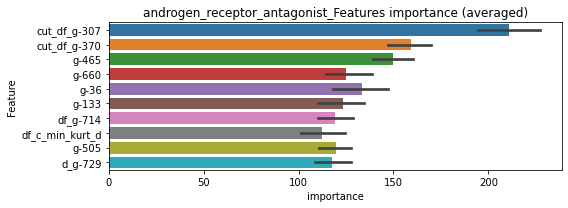

len(train_index) : 2824
len(valid_index) : 942
================================= fold 1/4 androgen_receptor_antagonist=================================


Training until validation scores don't improve for 30 rounds


len(train_index) : 2824
len(valid_index) : 942
================================= fold 2/4 androgen_receptor_antagonist=================================


Early stopping, best iteration is:
[448]	training's binary_logloss: 0.00129453	valid_1's binary_logloss: 0.0452489
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[911]	training's binary_logloss: 0.000692627	valid_1's binary_logloss: 0.0227988


len(train_index) : 2825
len(valid_index) : 941
================================= fold 3/4 androgen_receptor_antagonist=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[638]	training's binary_logloss: 0.000938692	valid_1's binary_logloss: 0.0184288


len(train_index) : 2825
len(valid_index) : 941
================================= fold 4/4 androgen_receptor_antagonist=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[813]	training's binary_logloss: 0.00075535	valid_1's binary_logloss: 0.0334303


androgen_receptor_antagonist logloss: 0.02997885009801621
androgen_receptor_antagonist clipping


neg labels: 3289 → selected neg labels: 3273


anesthetic_-_local, len(trt): 80, len(othr): 3273
target_rate: 0.0033594 → Adj_target_rate: 0.0034820
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00505913	valid_1's binary_logloss: 0.0442136
[600]	training's binary_logloss: 0.000895249	valid_1's binary_logloss: 0.0368385
Early stopping, best iteration is:
[705]	training's binary_logloss: 0.000702504	valid_1's binary_logloss: 0.036354
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00473641	valid_1's binary_logloss: 0.0502404
Early stopping, best iteration is:
[503]	training's binary_logloss: 0.00123712	valid_1's binary_logloss: 0.0441628
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00514692	valid_1's binary_logloss: 0.033835
[600]	training's binary_logloss: 0.000909727	valid_1's binary_logloss: 0.0245971
Early stopping, best iteration is:
[794]	training's binary_logloss: 0.000635028	valid_1's binary_logloss: 0.0238852
Training until validation scores don't improve for 30 rounds
[300]	tra

1 / 3 AUC score:0.997
y_Threshold: 0.0072781, Threshold: 0.0131106, pos_neg_ratio: 0.8000000
Remove_noisy_data: 138 → Positive_corect_labels: 651/3789
p_label_rate: 0.0100452 Vs.target_rate: 0.00336
Num_p_label: 40.0, conf_0:0.00918, conf_1:0.01704
Num_p_label: 40.0, Expected: 13.4, Adj_threshold_1: 0.0131106
Num_p_label: 2.0, Expected: 13.4, Adj_threshold_2: 0.0531106
threshold: 0.0531106, positive_p_label: 2.0/3982, p_label_rate: 0.0005023
positive_y_label: 651.0/3789, y_label_rate: 0.1718131
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00423752	valid_1's binary_logloss: 0.0347964
[600]	training's binary_logloss: 0.000813107	valid_1's binary_logloss: 0.0272586
Early stopping, best iteration is:
[631]	training's binary_logloss: 0.000751799	valid_1's binary_logloss: 0.0270061
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00409814	valid_1's binary_logloss: 0.0469252
[600]	training's binary_logloss: 0.000801767	valid_1's binary_logloss: 0.0369546
Early stopping, best iteration is:
[725]	training's binary_logloss: 0.000626857	valid_1's binary_logloss: 0.0362903
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00455137	valid_1's binary_logloss: 0.0303703
[600]	training's binary_logloss: 0.000852239	valid_1's binary_logloss: 0.0197839
Early stopping, best iteration is:
[771]	training's binary_logloss: 0.000627566	valid_1's binary_loglo

2 / 3 AUC score:1.000
y_Threshold: 0.0229995, Threshold: 0.0531106, pos_neg_ratio: 0.8000000
Remove_noisy_data: 2 → Positive_corect_labels: 650.0/3787
p_label_rate: 0.0012557 Vs.target_rate: 0.00336
Num_p_label: 5.0, conf_0:0.04249, conf_1:0.06373
Num_p_label: 5.0, Expected: 13.4, Adj_threshold_1: 0.0531106
threshold: 0.0531106, positive_p_label: 5.0/3982, p_label_rate: 0.0012557
positive_y_label: 650.0/3787, y_label_rate: 0.1716398
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00421996	valid_1's binary_logloss: 0.0414272
[600]	training's binary_logloss: 0.000810906	valid_1's binary_logloss: 0.0336508
Early stopping, best iteration is:
[754]	training's binary_logloss: 0.000602285	valid_1's binary_logloss: 0.0330379
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0043789	valid_1's binary_logloss: 0.0345071
[600]	training's binary_logloss: 0.000825749	valid_1's binary_logloss: 0.0239826
Early stopping, best iteration is:
[724]	training's binary_logloss: 0.000639039	valid_1's binary_logloss: 0.0231429
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00435344	valid_1's binary_logloss: 0.0354566
Early stopping, best iteration is:
[495]	training's binary_logloss: 0.00118447	valid_1's binary_logloss: 0.0283402
Training until validation scores don't improve for 30 rounds
[300]	tr

3 / 3 AUC score:1.000
y_Threshold: 0.0228503, Threshold: 0.0531106, pos_neg_ratio: 0.8000000
Remove_noisy_data: 8 → Positive_corect_labels: 646.0/3779
p_label_rate: 0.0015068 Vs.target_rate: 0.00336
Num_p_label: 6.0, conf_0:0.04780, conf_1:0.05842
Num_p_label: 6.0, Expected: 13.4, Adj_threshold_1: 0.0531106
threshold: 0.0531106, positive_p_label: 6.0/3982, p_label_rate: 0.0015068
positive_y_label: 646.0/3779, y_label_rate: 0.1709447


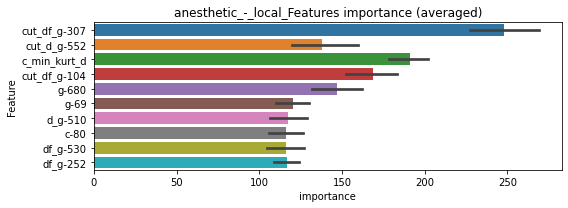

len(train_index) : 2834
len(valid_index) : 945
================================= fold 1/4 anesthetic_-_local=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[884]	training's binary_logloss: 0.000646617	valid_1's binary_logloss: 0.017777


len(train_index) : 2834
len(valid_index) : 945
================================= fold 2/4 anesthetic_-_local=================================


Training until validation scores don't improve for 30 rounds


len(train_index) : 2834
len(valid_index) : 945


Early stopping, best iteration is:
[557]	training's binary_logloss: 0.000923298	valid_1's binary_logloss: 0.0384949


================================= fold 3/4 anesthetic_-_local=================================


Training until validation scores don't improve for 30 rounds


len(train_index) : 2835
len(valid_index) : 944
================================= fold 4/4 anesthetic_-_local=================================


Early stopping, best iteration is:
[447]	training's binary_logloss: 0.00118752	valid_1's binary_logloss: 0.0230913
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[764]	training's binary_logloss: 0.000723063	valid_1's binary_logloss: 0.0140125


anesthetic_-_local logloss: 0.023346385264495947
anesthetic_-_local clipping


neg labels: 3289 → selected neg labels: 3282


angiogenesis_inhibitor, len(trt): 36, len(othr): 3282
target_rate: 0.0015117 → Adj_target_rate: 0.0017663
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00175401	valid_1's binary_logloss: 0.0127864
[600]	training's binary_logloss: 0.000419764	valid_1's binary_logloss: 0.00935825
Early stopping, best iteration is:
[575]	training's binary_logloss: 0.00043277	valid_1's binary_logloss: 0.00930657
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00186427	valid_1's binary_logloss: 0.010497
[600]	training's binary_logloss: 0.000425414	valid_1's binary_logloss: 0.00691663
Early stopping, best iteration is:
[616]	training's binary_logloss: 0.000417111	valid_1's binary_logloss: 0.00688009
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00185254	valid_1's binary_logloss: 0.00830355
[600]	training's binary_logloss: 0.000428697	valid_1's binary_logloss: 0.00610221
Early stopping, best iteration is:
[590]	training's binary_logloss: 0.000435287	valid_1's binary_l

1 / 3 AUC score:1.000
y_Threshold: 0.0029983, Threshold: 0.0116713, pos_neg_ratio: 0.8000000
Remove_noisy_data: 132 → Positive_corect_labels: 656/3806
p_label_rate: 0.0100452 Vs.target_rate: 0.00151
Num_p_label: 40.0, conf_0:0.00817, conf_1:0.01517
Num_p_label: 40.0, Expected: 6.0, Adj_threshold_1: 0.0116713
Num_p_label: 5.0, Expected: 6.0, Adj_threshold_2: 0.0516713
threshold: 0.0516713, positive_p_label: 5.0/3982, p_label_rate: 0.0012557
positive_y_label: 656.0/3806, y_label_rate: 0.1723594
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00164167	valid_1's binary_logloss: 0.0100506
Early stopping, best iteration is:
[565]	training's binary_logloss: 0.000416203	valid_1's binary_logloss: 0.00728991
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0017179	valid_1's binary_logloss: 0.0107931
[600]	training's binary_logloss: 0.000407395	valid_1's binary_logloss: 0.00704895
Early stopping, best iteration is:
[641]	training's binary_logloss: 0.000395637	valid_1's binary_logloss: 0.00697916
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00175507	valid_1's binary_logloss: 0.00746303
Early stopping, best iteration is:
[447]	training's binary_logloss: 0.000639631	valid_1's binary_logloss: 0.00558328
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00168587	valid_1's binary_logloss: 0.00745516


2 / 3 AUC score:1.000
y_Threshold: 0.0354247, Threshold: 0.0516713, pos_neg_ratio: 0.8000000
Remove_noisy_data: 0 → Positive_corect_labels: 656.0/3806
p_label_rate: 0.0095429 Vs.target_rate: 0.00151


Early stopping, best iteration is:
[524]	training's binary_logloss: 0.00046771	valid_1's binary_logloss: 0.00451761


Num_p_label: 38.0, conf_0:0.04134, conf_1:0.06201
Num_p_label: 38.0, Expected: 6.0, Adj_threshold_1: 0.0516713
Num_p_label: 22.0, Expected: 6.0, Adj_threshold_2: 0.0916713
Num_p_label: 18.0, Expected: 6.0, Adj_threshold_3: 0.1316713
Num_p_label: 13.0, Expected: 6.0, Adj_threshold_4: 0.1716713
threshold: 0.1716713, positive_p_label: 13.0/3982, p_label_rate: 0.0032647
positive_y_label: 656.0/3806, y_label_rate: 0.1723594
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00164167	valid_1's binary_logloss: 0.0100506
Early stopping, best iteration is:
[565]	training's binary_logloss: 0.000416203	valid_1's binary_logloss: 0.00728991
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0017179	valid_1's binary_logloss: 0.0107931
[600]	training's binary_logloss: 0.000407395	valid_1's binary_logloss: 0.00704895
Early stopping, best iteration is:
[641]	training's binary_logloss: 0.000395637	valid_1's binary_logloss: 0.00697916
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00175507	valid_1's binary_logloss: 0.00746303
Early stopping, best iteration is:
[447]	training's binary_logloss: 0.000639631	valid_1's binary_logloss: 0.00558328
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00168587	valid_1's binary_logloss: 0.00745516


3 / 3 AUC score:1.000
y_Threshold: 0.0354247, Threshold: 0.1716713, pos_neg_ratio: 0.8000000
Remove_noisy_data: 0 → Positive_corect_labels: 656.0/3806
p_label_rate: 0.0032647 Vs.target_rate: 0.00151
Num_p_label: 13.0, conf_0:0.15450, conf_1:0.18884
Num_p_label: 13.0, Expected: 6.0, Adj_threshold_1: 0.1716713


Early stopping, best iteration is:
[524]	training's binary_logloss: 0.00046771	valid_1's binary_logloss: 0.00451761


threshold: 0.1716713, positive_p_label: 13.0/3982, p_label_rate: 0.0032647
positive_y_label: 656.0/3806, y_label_rate: 0.1723594


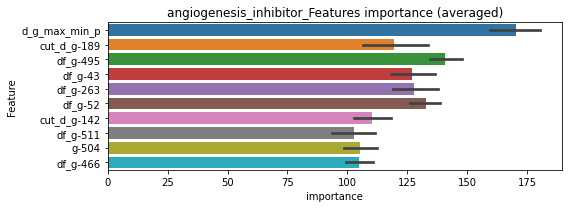

len(train_index) : 2854
len(valid_index) : 952
================================= fold 1/4 angiogenesis_inhibitor=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[743]	training's binary_logloss: 0.000424797	valid_1's binary_logloss: 0.00758757


len(train_index) : 2854
len(valid_index) : 952
================================= fold 2/4 angiogenesis_inhibitor=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[853]	training's binary_logloss: 0.000406833	valid_1's binary_logloss: 0.00522756


len(train_index) : 2855
len(valid_index) : 951
================================= fold 3/4 angiogenesis_inhibitor=================================


Training until validation scores don't improve for 30 rounds


len(train_index) : 2855


Early stopping, best iteration is:
[655]	training's binary_logloss: 0.000468109	valid_1's binary_logloss: 0.00479133


len(valid_index) : 951
================================= fold 4/4 angiogenesis_inhibitor=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[882]	training's binary_logloss: 0.000405935	valid_1's binary_logloss: 0.00339148


angiogenesis_inhibitor logloss: 0.00525093251808497


neg labels: 3289 → selected neg labels: 3286


angiotensin_receptor_antagonist, len(trt): 37, len(othr): 3286
target_rate: 0.0015537 → Adj_target_rate: 0.0018079
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00199057	valid_1's binary_logloss: 0.00902448
[600]	training's binary_logloss: 0.00044631	valid_1's binary_logloss: 0.00470418
Early stopping, best iteration is:
[660]	training's binary_logloss: 0.000414029	valid_1's binary_logloss: 0.00464653
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0019413	valid_1's binary_logloss: 0.00919275
[600]	training's binary_logloss: 0.000441735	valid_1's binary_logloss: 0.00399259
Early stopping, best iteration is:
[698]	training's binary_logloss: 0.000401826	valid_1's binary_logloss: 0.00384483
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00200861	valid_1's binary_logloss: 0.00628076
[600]	training's binary_logloss: 0.000451273	valid_1's binary_logloss: 0.00290747
Early stopping, best iteration is:
[656]	training's binary_logloss: 0.000421374	valid_1's binary

1 / 3 AUC score:1.000
y_Threshold: 0.0026942, Threshold: 0.0094506, pos_neg_ratio: 0.8000000
Remove_noisy_data: 132 → Positive_corect_labels: 657/3811
p_label_rate: 0.0100452 Vs.target_rate: 0.00155
Num_p_label: 40.0, conf_0:0.00662, conf_1:0.01229
Num_p_label: 40.0, Expected: 6.2, Adj_threshold_1: 0.0094506
Num_p_label: 4.0, Expected: 6.2, Adj_threshold_2: 0.0494506
threshold: 0.0494506, positive_p_label: 4.0/3982, p_label_rate: 0.0010045
positive_y_label: 657.0/3811, y_label_rate: 0.1723957
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00180893	valid_1's binary_logloss: 0.00972787
[600]	training's binary_logloss: 0.000425081	valid_1's binary_logloss: 0.00574089
Early stopping, best iteration is:
[607]	training's binary_logloss: 0.000420513	valid_1's binary_logloss: 0.00571942
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00185041	valid_1's binary_logloss: 0.00834925
[600]	training's binary_logloss: 0.000425097	valid_1's binary_logloss: 0.0037936
Early stopping, best iteration is:
[650]	training's binary_logloss: 0.000398914	valid_1's binary_logloss: 0.00369885
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00190069	valid_1's binary_logloss: 0.00583203
[600]	training's binary_logloss: 0.00043408	valid_1's binary_logloss: 0.0027978
Early stopping, best iteration is:
[669]	training's binary_logloss: 0.000401208	valid_1's binary_

2 / 3 AUC score:1.000
y_Threshold: 0.0182604, Threshold: 0.0494506, pos_neg_ratio: 0.8000000
Remove_noisy_data: 0 → Positive_corect_labels: 657.0/3811
p_label_rate: 0.0030136 Vs.target_rate: 0.00155
Num_p_label: 12.0, conf_0:0.03956, conf_1:0.05934
Num_p_label: 12.0, Expected: 6.2, Adj_threshold_1: 0.0494506
threshold: 0.0494506, positive_p_label: 12.0/3982, p_label_rate: 0.0030136
positive_y_label: 657.0/3811, y_label_rate: 0.1723957
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00180893	valid_1's binary_logloss: 0.00972787
[600]	training's binary_logloss: 0.000425081	valid_1's binary_logloss: 0.00574089
Early stopping, best iteration is:
[607]	training's binary_logloss: 0.000420513	valid_1's binary_logloss: 0.00571942
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00185041	valid_1's binary_logloss: 0.00834925
[600]	training's binary_logloss: 0.000425097	valid_1's binary_logloss: 0.0037936
Early stopping, best iteration is:
[650]	training's binary_logloss: 0.000398914	valid_1's binary_logloss: 0.00369885
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00190069	valid_1's binary_logloss: 0.00583203
[600]	training's binary_logloss: 0.00043408	valid_1's binary_logloss: 0.0027978
Early stopping, best iteration is:
[669]	training's binary_logloss: 0.000401208	valid_1's binary_

3 / 3 AUC score:1.000
y_Threshold: 0.0182604, Threshold: 0.0494506, pos_neg_ratio: 0.8000000
Remove_noisy_data: 0 → Positive_corect_labels: 657.0/3811
p_label_rate: 0.0030136 Vs.target_rate: 0.00155
Num_p_label: 12.0, conf_0:0.04451, conf_1:0.05440
Num_p_label: 12.0, Expected: 6.2, Adj_threshold_1: 0.0494506
threshold: 0.0494506, positive_p_label: 12.0/3982, p_label_rate: 0.0030136
positive_y_label: 657.0/3811, y_label_rate: 0.1723957


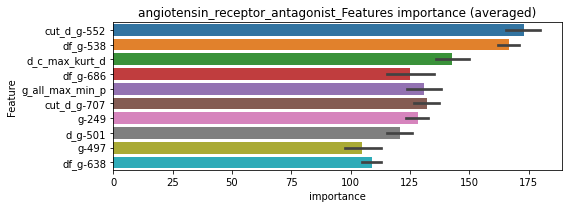

len(train_index) : 2858
len(valid_index) : 953
================================= fold 1/4 angiotensin_receptor_antagonist=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[939]	training's binary_logloss: 0.000408009	valid_1's binary_logloss: 0.00378288


len(train_index) : 2858
len(valid_index) : 953
================================= fold 2/4 angiotensin_receptor_antagonist=================================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.000400741	valid_1's binary_logloss: 0.00345196
Early stopping, best iteration is:
[1025]	training's binary_logloss: 0.000397953	valid_1's binary_logloss: 0.00344479


len(train_index) : 2858
len(valid_index) : 953
================================= fold 3/4 angiotensin_receptor_antagonist=================================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.000405398	valid_1's binary_logloss: 0.00215145
Early stopping, best iteration is:
[1006]	training's binary_logloss: 0.000405195	valid_1's binary_logloss: 0.00214985


len(train_index) : 2859
len(valid_index) : 952
================================= fold 4/4 angiotensin_receptor_antagonist=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[719]	training's binary_logloss: 0.000464258	valid_1's binary_logloss: 0.00693626


angiotensin_receptor_antagonist logloss: 0.004078121480603049


neg labels: 3289 → selected neg labels: 3278


anti-inflammatory, len(trt): 73, len(othr): 3278
target_rate: 0.0030654 → Adj_target_rate: 0.0032212
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00534464	valid_1's binary_logloss: 0.0402645
[600]	training's binary_logloss: 0.000903088	valid_1's binary_logloss: 0.0310304
Early stopping, best iteration is:
[573]	training's binary_logloss: 0.00098239	valid_1's binary_logloss: 0.0309557
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00518086	valid_1's binary_logloss: 0.0280059
[600]	training's binary_logloss: 0.00090328	valid_1's binary_logloss: 0.0162739
Early stopping, best iteration is:
[782]	training's binary_logloss: 0.000628856	valid_1's binary_logloss: 0.0151821
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00514908	valid_1's binary_logloss: 0.0492927
Early stopping, best iteration is:
[464]	training's binary_logloss: 0.00152385	valid_1's binary_logloss: 0.0439606
Training until validation scores don't improve for 30 rounds
[300]	tra

1 / 3 AUC score:0.999
y_Threshold: 0.0091795, Threshold: 0.0817696, pos_neg_ratio: 0.8000000
Remove_noisy_data: 138 → Positive_corect_labels: 652/3795
p_label_rate: 0.0100452 Vs.target_rate: 0.00307
Num_p_label: 40.0, conf_0:0.05724, conf_1:0.10630
Num_p_label: 40.0, Expected: 12.2, Adj_threshold_1: 0.0817696
Num_p_label: 29.0, Expected: 12.2, Adj_threshold_2: 0.1217696
Num_p_label: 20.0, Expected: 12.2, Adj_threshold_3: 0.1617696
Num_p_label: 16.0, Expected: 12.2, Adj_threshold_4: 0.2017696
threshold: 0.2017696, positive_p_label: 16.0/3982, p_label_rate: 0.0040181
positive_y_label: 652.0/3795, y_label_rate: 0.1718050
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00460294	valid_1's binary_logloss: 0.047373
[600]	training's binary_logloss: 0.000832411	valid_1's binary_logloss: 0.0403497
Early stopping, best iteration is:
[677]	training's binary_logloss: 0.000688731	valid_1's binary_logloss: 0.0396361
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00442977	valid_1's binary_logloss: 0.0371878
[600]	training's binary_logloss: 0.000827996	valid_1's binary_logloss: 0.0296728
Early stopping, best iteration is:
[772]	training's binary_logloss: 0.000597266	valid_1's binary_logloss: 0.0289376
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00484189	valid_1's binary_logloss: 0.0284954
[600]	training's binary_logloss: 0.000866543	valid_1's binary_logloss: 0.0186856
Early stopping, best iteration is:
[750]	training's binary_logloss: 0.000627475	valid_1's binary_loglos

2 / 3 AUC score:1.000
y_Threshold: 0.0320526, Threshold: 0.2017696, pos_neg_ratio: 0.8000000
Remove_noisy_data: 16 → Positive_corect_labels: 644.0/3779
p_label_rate: 0.0130588 Vs.target_rate: 0.00307
Num_p_label: 52.0, conf_0:0.16142, conf_1:0.24212
Num_p_label: 52.0, Expected: 12.2, Adj_threshold_1: 0.2017696
Num_p_label: 44.0, Expected: 12.2, Adj_threshold_2: 0.2417696
Num_p_label: 37.0, Expected: 12.2, Adj_threshold_3: 0.2817696
Num_p_label: 34.0, Expected: 12.2, Adj_threshold_4: 0.3217696
Num_p_label: 30.0, Expected: 12.2, Adj_threshold_5: 0.3617696
Num_p_label: 27.0, Expected: 12.2, Adj_threshold_6: 0.4017696
Num_p_label: 21.0, Expected: 12.2, Adj_threshold_7: 0.4417696
Num_p_label: 16.0, Expected: 12.2, Adj_threshold_8: 0.4817696
threshold: 0.4817696, positive_p_label: 16.0/3982, p_label_rate: 0.0040181
positive_y_label: 644.0/3779, y_label_rate: 0.1704155
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00428538	valid_1's binary_logloss: 0.0370379
[600]	training's binary_logloss: 0.000796761	valid_1's binary_logloss: 0.028123
Early stopping, best iteration is:
[741]	training's binary_logloss: 0.000593713	valid_1's binary_logloss: 0.0275156
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00418366	valid_1's binary_logloss: 0.0335496
Early stopping, best iteration is:
[550]	training's binary_logloss: 0.000926793	valid_1's binary_logloss: 0.0256242
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00433627	valid_1's binary_logloss: 0.0372447
[600]	training's binary_logloss: 0.00081846	valid_1's binary_logloss: 0.0277879
Early stopping, best iteration is:
[770]	training's binary_logloss: 0.000587837	valid_1's binary_logloss: 0.0267676
Training until validation scores don't improve for 30 rounds
[300]	tr

3 / 3 AUC score:1.000
y_Threshold: 0.0401349, Threshold: 0.4817696, pos_neg_ratio: 0.8000000
Remove_noisy_data: 4 → Positive_corect_labels: 642.0/3775
p_label_rate: 0.0050226 Vs.target_rate: 0.00307
Num_p_label: 20.0, conf_0:0.43359, conf_1:0.52995
Num_p_label: 20.0, Expected: 12.2, Adj_threshold_1: 0.4817696
Num_p_label: 20.0, Expected: 12.2, Adj_threshold_2: 0.5217696
Num_p_label: 20.0, Expected: 12.2, Adj_threshold_3: 0.5617696
Num_p_label: 18.0, Expected: 12.2, Adj_threshold_4: 0.6017696
threshold: 0.6017696, positive_p_label: 18.0/3982, p_label_rate: 0.0045203
positive_y_label: 642.0/3775, y_label_rate: 0.1700662


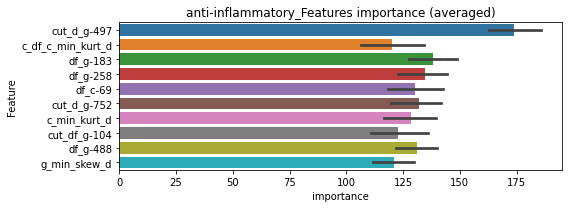

len(train_index) : 2831
len(valid_index) : 944
================================= fold 1/4 anti-inflammatory=================================


Training until validation scores don't improve for 30 rounds


len(train_index) : 2831
len(valid_index) : 944
================================= fold 2/4 anti-inflammatory=================================


Early stopping, best iteration is:
[449]	training's binary_logloss: 0.00111767	valid_1's binary_logloss: 0.0363371
Training until validation scores don't improve for 30 rounds


len(train_index) : 2831
len(valid_index) : 944
================================= fold 3/4 anti-inflammatory=================================


Early stopping, best iteration is:
[315]	training's binary_logloss: 0.00171301	valid_1's binary_logloss: 0.037722
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[615]	training's binary_logloss: 0.000853202	valid_1's binary_logloss: 0.0172207


len(train_index) : 2832
len(valid_index) : 943
================================= fold 4/4 anti-inflammatory=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[803]	training's binary_logloss: 0.000684244	valid_1's binary_logloss: 0.0105064


anti-inflammatory logloss: 0.02545048373573979
anti-inflammatory clipping


neg labels: 3289 → selected neg labels: 3284


antiarrhythmic, len(trt): 24, len(othr): 3284
target_rate: 0.0010078 → Adj_target_rate: 0.0012513
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0014476	valid_1's binary_logloss: 0.00447278
[600]	training's binary_logloss: 0.000366896	valid_1's binary_logloss: 0.00200433
Early stopping, best iteration is:
[582]	training's binary_logloss: 0.000368398	valid_1's binary_logloss: 0.00199536
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00148046	valid_1's binary_logloss: 0.00436897
[600]	training's binary_logloss: 0.000365587	valid_1's binary_logloss: 0.00213963
Early stopping, best iteration is:
[600]	training's binary_logloss: 0.000365587	valid_1's binary_logloss: 0.00213963
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0014588	valid_1's binary_logloss: 0.00434834
[600]	training's binary_logloss: 0.000365211	valid_1's binary_logloss: 0.00218475
Early stopping, best iteration is:
[598]	training's binary_logloss: 0.000365486	valid_1's binary

1 / 3 AUC score:1.000
y_Threshold: 0.0019661, Threshold: 0.0057833, pos_neg_ratio: 0.8000000
Remove_noisy_data: 132 → Positive_corect_labels: 656/3808
p_label_rate: 0.0100452 Vs.target_rate: 0.00101
Num_p_label: 40.0, conf_0:0.00405, conf_1:0.00752
Num_p_label: 40.0, Expected: 4.0, Adj_threshold_1: 0.0057833
Num_p_label: 3.0, Expected: 4.0, Adj_threshold_2: 0.0457833
threshold: 0.0457833, positive_p_label: 3.0/3982, p_label_rate: 0.0007534
positive_y_label: 656.0/3808, y_label_rate: 0.1722689
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00139019	valid_1's binary_logloss: 0.00410633
[600]	training's binary_logloss: 0.000358207	valid_1's binary_logloss: 0.0018455
Early stopping, best iteration is:
[625]	training's binary_logloss: 0.00035461	valid_1's binary_logloss: 0.00183607
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00138956	valid_1's binary_logloss: 0.00453861
[600]	training's binary_logloss: 0.000360711	valid_1's binary_logloss: 0.00278897
Early stopping, best iteration is:
[599]	training's binary_logloss: 0.000360711	valid_1's binary_logloss: 0.00278897
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00139901	valid_1's binary_logloss: 0.00492051
[600]	training's binary_logloss: 0.0003602	valid_1's binary_logloss: 0.00268297
Early stopping, best iteration is:
[596]	training's binary_logloss: 0.0003602	valid_1's binary_log

2 / 3 AUC score:1.000
y_Threshold: 0.0341236, Threshold: 0.0457833, pos_neg_ratio: 0.8000000
Remove_noisy_data: 0 → Positive_corect_labels: 656.0/3808
p_label_rate: 0.0022602 Vs.target_rate: 0.00101
Num_p_label: 9.0, conf_0:0.03663, conf_1:0.05494
Num_p_label: 9.0, Expected: 4.0, Adj_threshold_1: 0.0457833


[600]	training's binary_logloss: 0.000359193	valid_1's binary_logloss: 0.0034472
Early stopping, best iteration is:
[573]	training's binary_logloss: 0.000362402	valid_1's binary_logloss: 0.00342818


threshold: 0.0457833, positive_p_label: 9.0/3982, p_label_rate: 0.0022602
positive_y_label: 656.0/3808, y_label_rate: 0.1722689
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00139019	valid_1's binary_logloss: 0.00410633
[600]	training's binary_logloss: 0.000358207	valid_1's binary_logloss: 0.0018455
Early stopping, best iteration is:
[625]	training's binary_logloss: 0.00035461	valid_1's binary_logloss: 0.00183607
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00138956	valid_1's binary_logloss: 0.00453861
[600]	training's binary_logloss: 0.000360711	valid_1's binary_logloss: 0.00278897
Early stopping, best iteration is:
[599]	training's binary_logloss: 0.000360711	valid_1's binary_logloss: 0.00278897
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00139901	valid_1's binary_logloss: 0.00492051
[600]	training's binary_logloss: 0.0003602	valid_1's binary_logloss: 0.00268297
Early stopping, best iteration is:
[594]	training's binary_logloss: 0.0003602	valid_1's binary_log

3 / 3 AUC score:1.000
y_Threshold: 0.0341236, Threshold: 0.0457833, pos_neg_ratio: 0.8000000
Remove_noisy_data: 0 → Positive_corect_labels: 656.0/3808


[600]	training's binary_logloss: 0.000359193	valid_1's binary_logloss: 0.0034472
Early stopping, best iteration is:
[573]	training's binary_logloss: 0.000362402	valid_1's binary_logloss: 0.00342818


p_label_rate: 0.0022602 Vs.target_rate: 0.00101
Num_p_label: 9.0, conf_0:0.04120, conf_1:0.05036
Num_p_label: 9.0, Expected: 4.0, Adj_threshold_1: 0.0457833
threshold: 0.0457833, positive_p_label: 9.0/3982, p_label_rate: 0.0022602
positive_y_label: 656.0/3808, y_label_rate: 0.1722689


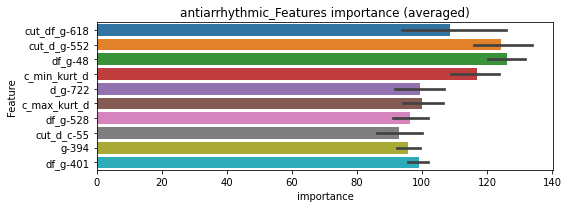

len(train_index) : 2856
len(valid_index) : 952
================================= fold 1/4 antiarrhythmic=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[855]	training's binary_logloss: 0.000364153	valid_1's binary_logloss: 0.00253218


len(train_index) : 2856
len(valid_index) : 952
================================= fold 2/4 antiarrhythmic=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[802]	training's binary_logloss: 0.000374546	valid_1's binary_logloss: 0.00250475


len(train_index) : 2856
len(valid_index) : 952
================================= fold 3/4 antiarrhythmic=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[883]	training's binary_logloss: 0.000363438	valid_1's binary_logloss: 0.00170981


len(train_index) : 2856
len(valid_index) : 952
================================= fold 4/4 antiarrhythmic=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[859]	training's binary_logloss: 0.000370114	valid_1's binary_logloss: 0.00241558


antiarrhythmic logloss: 0.0022907049384536596


neg labels: 3289 → selected neg labels: 3281


antibiotic, len(trt): 43, len(othr): 3281
target_rate: 0.0018057 → Adj_target_rate: 0.0020542
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00254484	valid_1's binary_logloss: 0.0173456
[600]	training's binary_logloss: 0.000518848	valid_1's binary_logloss: 0.0116636
Early stopping, best iteration is:
[652]	training's binary_logloss: 0.000475313	valid_1's binary_logloss: 0.011517
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00255435	valid_1's binary_logloss: 0.0117094
[600]	training's binary_logloss: 0.000520934	valid_1's binary_logloss: 0.00745406
Early stopping, best iteration is:
[656]	training's binary_logloss: 0.000476909	valid_1's binary_logloss: 0.00734874
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00265859	valid_1's binary_logloss: 0.0057943
[600]	training's binary_logloss: 0.00054566	valid_1's binary_logloss: 0.00195703
Early stopping, best iteration is:
[691]	training's binary_logloss: 0.000487899	valid_1's binary_logl

1 / 3 AUC score:1.000
y_Threshold: 0.0039532, Threshold: 0.0286786, pos_neg_ratio: 0.8000000
Remove_noisy_data: 132 → Positive_corect_labels: 656/3805
p_label_rate: 0.0100452 Vs.target_rate: 0.00181
Num_p_label: 40.0, conf_0:0.02007, conf_1:0.03728
Num_p_label: 40.0, Expected: 7.2, Adj_threshold_1: 0.0286786
Num_p_label: 13.0, Expected: 7.2, Adj_threshold_2: 0.0686786
threshold: 0.0686786, positive_p_label: 13.0/3982, p_label_rate: 0.0032647
positive_y_label: 656.0/3805, y_label_rate: 0.1724047
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00225838	valid_1's binary_logloss: 0.016018
[600]	training's binary_logloss: 0.000491347	valid_1's binary_logloss: 0.0108347
Early stopping, best iteration is:
[630]	training's binary_logloss: 0.000472909	valid_1's binary_logloss: 0.0107413
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00243024	valid_1's binary_logloss: 0.00815562
[600]	training's binary_logloss: 0.000510612	valid_1's binary_logloss: 0.00436544
Early stopping, best iteration is:
[606]	training's binary_logloss: 0.000503976	valid_1's binary_logloss: 0.00432682
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00238998	valid_1's binary_logloss: 0.0067929
[600]	training's binary_logloss: 0.000516363	valid_1's binary_logloss: 0.00300596
Early stopping, best iteration is:
[656]	training's binary_logloss: 0.000476294	valid_1's binary_lo

2 / 3 AUC score:1.000
y_Threshold: 0.0325502, Threshold: 0.0686786, pos_neg_ratio: 0.8000000
Remove_noisy_data: 0 → Positive_corect_labels: 656.0/3805
p_label_rate: 0.0150678 Vs.target_rate: 0.00181
Num_p_label: 60.0, conf_0:0.05494, conf_1:0.08241
Num_p_label: 60.0, Expected: 7.2, Adj_threshold_1: 0.0686786
Num_p_label: 43.0, Expected: 7.2, Adj_threshold_2: 0.1086786
Num_p_label: 33.0, Expected: 7.2, Adj_threshold_3: 0.1486786
Num_p_label: 24.0, Expected: 7.2, Adj_threshold_4: 0.1886786
Num_p_label: 21.0, Expected: 7.2, Adj_threshold_5: 0.2286786
Num_p_label: 16.0, Expected: 7.2, Adj_threshold_6: 0.2686786
threshold: 0.2686786, positive_p_label: 16.0/3982, p_label_rate: 0.0040181
positive_y_label: 656.0/3805, y_label_rate: 0.1724047
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00225838	valid_1's binary_logloss: 0.016018
[600]	training's binary_logloss: 0.000491347	valid_1's binary_logloss: 0.0108347
Early stopping, best iteration is:
[630]	training's binary_logloss: 0.000472909	valid_1's binary_logloss: 0.0107413
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00243024	valid_1's binary_logloss: 0.00815562
[600]	training's binary_logloss: 0.000510612	valid_1's binary_logloss: 0.00436544
Early stopping, best iteration is:
[606]	training's binary_logloss: 0.000503976	valid_1's binary_logloss: 0.00432682
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00238998	valid_1's binary_logloss: 0.0067929
[600]	training's binary_logloss: 0.000516363	valid_1's binary_logloss: 0.00300596
Early stopping, best iteration is:
[659]	training's binary_logloss: 0.000476294	valid_1's binary_lo

3 / 3 AUC score:1.000
y_Threshold: 0.0325502, Threshold: 0.2686786, pos_neg_ratio: 0.8000000
Remove_noisy_data: 0 → Positive_corect_labels: 656.0/3805
p_label_rate: 0.0040181 Vs.target_rate: 0.00181
Num_p_label: 16.0, conf_0:0.24181, conf_1:0.29555
Num_p_label: 16.0, Expected: 7.2, Adj_threshold_1: 0.2686786
threshold: 0.2686786, positive_p_label: 16.0/3982, p_label_rate: 0.0040181
positive_y_label: 656.0/3805, y_label_rate: 0.1724047


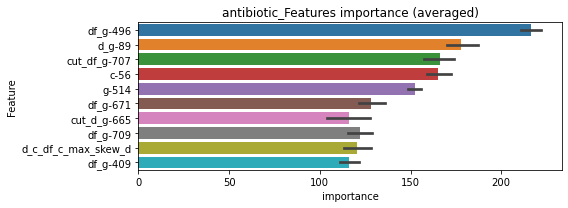

len(train_index) : 2853
len(valid_index) : 952
================================= fold 1/4 antibiotic=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[900]	training's binary_logloss: 0.000466441	valid_1's binary_logloss: 0.0109928


len(train_index) : 2854
len(valid_index) : 951
================================= fold 2/4 antibiotic=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[728]	training's binary_logloss: 0.000530337	valid_1's binary_logloss: 0.00562695


len(train_index) : 2854
len(valid_index) : 951
================================= fold 3/4 antibiotic=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[953]	training's binary_logloss: 0.000472133	valid_1's binary_logloss: 0.00269822


len(train_index) : 2854
len(valid_index) : 951
================================= fold 4/4 antibiotic=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[787]	training's binary_logloss: 0.000497973	valid_1's binary_logloss: 0.0114169


antibiotic logloss: 0.007691222450895887


neg labels: 3289 → selected neg labels: 3286


anticonvulsant, len(trt): 18, len(othr): 3286
target_rate: 0.0007559 → Adj_target_rate: 0.0009799
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.000843096	valid_1's binary_logloss: 0.00285638
Early stopping, best iteration is:
[534]	training's binary_logloss: 0.000282391	valid_1's binary_logloss: 0.00137724
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.000823961	valid_1's binary_logloss: 0.00396637
Early stopping, best iteration is:
[560]	training's binary_logloss: 0.000270292	valid_1's binary_logloss: 0.002228
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.000841143	valid_1's binary_logloss: 0.00408098
Early stopping, best iteration is:
[447]	training's binary_logloss: 0.000341672	valid_1's binary_logloss: 0.00350709
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.000839242	valid_1's binary_logloss: 0.00260164


1 / 3 AUC score:1.000
y_Threshold: 0.0013032, Threshold: 0.0028918, pos_neg_ratio: 0.8000000
Remove_noisy_data: 132 → Positive_corect_labels: 657/3811
p_label_rate: 0.0100452 Vs.target_rate: 0.00076
Num_p_label: 40.0, conf_0:0.00202, conf_1:0.00376
Num_p_label: 40.0, Expected: 3.0, Adj_threshold_1: 0.0028918
Num_p_label: 2.0, Expected: 3.0, Adj_threshold_2: 0.0428918


Early stopping, best iteration is:
[561]	training's binary_logloss: 0.00027323	valid_1's binary_logloss: 0.00132309


threshold: 0.0428918, positive_p_label: 2.0/3982, p_label_rate: 0.0005023
positive_y_label: 657.0/3811, y_label_rate: 0.1723957
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.000810365	valid_1's binary_logloss: 0.00235686
[600]	training's binary_logloss: 0.00026949	valid_1's binary_logloss: 0.00109605
Early stopping, best iteration is:
[576]	training's binary_logloss: 0.00026949	valid_1's binary_logloss: 0.00109605
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.000794277	valid_1's binary_logloss: 0.00488788
Early stopping, best iteration is:
[487]	training's binary_logloss: 0.000288188	valid_1's binary_logloss: 0.00315576
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00081153	valid_1's binary_logloss: 0.00348452
Early stopping, best iteration is:
[442]	training's binary_logloss: 0.000338952	valid_1's binary_logloss: 0.00278145
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.000819393	valid_1's binary_logloss: 0.0027236

2 / 3 AUC score:1.000
y_Threshold: 0.0255095, Threshold: 0.0428918, pos_neg_ratio: 0.8000000
Remove_noisy_data: 0 → Positive_corect_labels: 657.0/3811
p_label_rate: 0.0007534 Vs.target_rate: 0.00076
Num_p_label: 3.0, conf_0:0.03431, conf_1:0.05147


Early stopping, best iteration is:
[521]	training's binary_logloss: 0.000273805	valid_1's binary_logloss: 0.00143684


threshold: 0.0428918, positive_p_label: 3.0/3982, p_label_rate: 0.0007534
positive_y_label: 657.0/3811, y_label_rate: 0.1723957
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.000810365	valid_1's binary_logloss: 0.00235686
[600]	training's binary_logloss: 0.00026949	valid_1's binary_logloss: 0.00109605
Early stopping, best iteration is:
[576]	training's binary_logloss: 0.00026949	valid_1's binary_logloss: 0.00109605
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.000794277	valid_1's binary_logloss: 0.00488788
Early stopping, best iteration is:
[487]	training's binary_logloss: 0.000288188	valid_1's binary_logloss: 0.00315576
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00081153	valid_1's binary_logloss: 0.00348452
Early stopping, best iteration is:
[442]	training's binary_logloss: 0.000338952	valid_1's binary_logloss: 0.00278145
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.000819393	valid_1's binary_logloss: 0.0027236

3 / 3 AUC score:1.000
y_Threshold: 0.0255095, Threshold: 0.0428918, pos_neg_ratio: 0.8000000
Remove_noisy_data: 0 → Positive_corect_labels: 657.0/3811
p_label_rate: 0.0007534 Vs.target_rate: 0.00076
Num_p_label: 3.0, conf_0:0.03860, conf_1:0.04718


Early stopping, best iteration is:
[521]	training's binary_logloss: 0.000273805	valid_1's binary_logloss: 0.00143684


threshold: 0.0428918, positive_p_label: 3.0/3982, p_label_rate: 0.0007534
positive_y_label: 657.0/3811, y_label_rate: 0.1723957


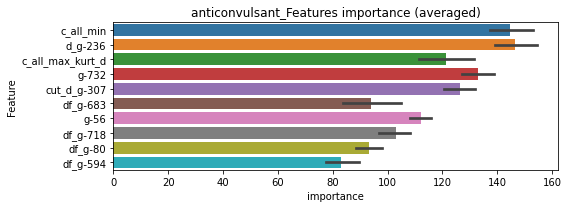

len(train_index) : 2858
len(valid_index) : 953
================================= fold 1/4 anticonvulsant=================================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.000270766	valid_1's binary_logloss: 0.000741468
Early stopping, best iteration is:
[993]	training's binary_logloss: 0.000270783	valid_1's binary_logloss: 0.000741449


len(train_index) : 2858
len(valid_index) : 953
================================= fold 2/4 anticonvulsant=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[862]	training's binary_logloss: 0.000273435	valid_1's binary_logloss: 0.00239223


len(train_index) : 2858
len(valid_index) : 953
================================= fold 3/4 anticonvulsant=================================


Training until validation scores don't improve for 30 rounds


len(train_index) : 2859
len(valid_index) : 952
================================= fold 4/4 anticonvulsant=================================


Early stopping, best iteration is:
[474]	training's binary_logloss: 0.000399977	valid_1's binary_logloss: 0.00402077
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[948]	training's binary_logloss: 0.000268983	valid_1's binary_logloss: 0.00130438


anticonvulsant logloss: 0.0021150416896631766


neg labels: 3289 → selected neg labels: 3286


antifungal, len(trt): 26, len(othr): 3286
target_rate: 0.0010918 → Adj_target_rate: 0.0013394
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00115575	valid_1's binary_logloss: 0.00380148
[600]	training's binary_logloss: 0.000334954	valid_1's binary_logloss: 0.00189314
Early stopping, best iteration is:
[630]	training's binary_logloss: 0.000329269	valid_1's binary_logloss: 0.00186728
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00111431	valid_1's binary_logloss: 0.00632062
Early stopping, best iteration is:
[544]	training's binary_logloss: 0.000345403	valid_1's binary_logloss: 0.00484771
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00114042	valid_1's binary_logloss: 0.00269388
[600]	training's binary_logloss: 0.000331474	valid_1's binary_logloss: 0.0012703
Early stopping, best iteration is:
[591]	training's binary_logloss: 0.000331901	valid_1's binary_logloss: 0.0012694
Training until validation scores don't improve for 30 rounds


1 / 3 AUC score:1.000
y_Threshold: 0.0016698, Threshold: 0.0054509, pos_neg_ratio: 0.8000000
Remove_noisy_data: 132 → Positive_corect_labels: 657/3811
p_label_rate: 0.0100452 Vs.target_rate: 0.00109
Num_p_label: 40.0, conf_0:0.00382, conf_1:0.00709
Num_p_label: 40.0, Expected: 4.3, Adj_threshold_1: 0.0054509
Num_p_label: 4.0, Expected: 4.3, Adj_threshold_2: 0.0454509


Early stopping, best iteration is:
[499]	training's binary_logloss: 0.000380782	valid_1's binary_logloss: 0.00568918


threshold: 0.0454509, positive_p_label: 4.0/3982, p_label_rate: 0.0010045
positive_y_label: 657.0/3811, y_label_rate: 0.1723957
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00112965	valid_1's binary_logloss: 0.00330046
[600]	training's binary_logloss: 0.000325697	valid_1's binary_logloss: 0.00154823
Early stopping, best iteration is:
[602]	training's binary_logloss: 0.000325697	valid_1's binary_logloss: 0.00154823
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0010725	valid_1's binary_logloss: 0.00535498
Early stopping, best iteration is:
[515]	training's binary_logloss: 0.000351536	valid_1's binary_logloss: 0.00390736
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00112369	valid_1's binary_logloss: 0.00268779
Early stopping, best iteration is:
[558]	training's binary_logloss: 0.000336335	valid_1's binary_logloss: 0.0012587
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00110474	valid_1's binary_logloss: 0.00703028


2 / 3 AUC score:1.000
y_Threshold: 0.0164793, Threshold: 0.0454509, pos_neg_ratio: 0.8000000
Remove_noisy_data: 0 → Positive_corect_labels: 657.0/3811
p_label_rate: 0.0010045 Vs.target_rate: 0.00109
Num_p_label: 4.0, conf_0:0.03636, conf_1:0.05454


Early stopping, best iteration is:
[531]	training's binary_logloss: 0.00034376	valid_1's binary_logloss: 0.00560943


threshold: 0.0454509, positive_p_label: 4.0/3982, p_label_rate: 0.0010045
positive_y_label: 657.0/3811, y_label_rate: 0.1723957
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00112965	valid_1's binary_logloss: 0.00330046
[600]	training's binary_logloss: 0.000325697	valid_1's binary_logloss: 0.00154823
Early stopping, best iteration is:
[603]	training's binary_logloss: 0.000325697	valid_1's binary_logloss: 0.00154823
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0010725	valid_1's binary_logloss: 0.00535498
Early stopping, best iteration is:
[515]	training's binary_logloss: 0.000351536	valid_1's binary_logloss: 0.00390736
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00112369	valid_1's binary_logloss: 0.00268779
Early stopping, best iteration is:
[558]	training's binary_logloss: 0.000336335	valid_1's binary_logloss: 0.0012587
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00110474	valid_1's binary_logloss: 0.00703028


3 / 3 AUC score:1.000
y_Threshold: 0.0164793, Threshold: 0.0454509, pos_neg_ratio: 0.8000000
Remove_noisy_data: 0 → Positive_corect_labels: 657.0/3811
p_label_rate: 0.0010045 Vs.target_rate: 0.00109
Num_p_label: 4.0, conf_0:0.04091, conf_1:0.05000


Early stopping, best iteration is:
[531]	training's binary_logloss: 0.00034376	valid_1's binary_logloss: 0.00560943


threshold: 0.0454509, positive_p_label: 4.0/3982, p_label_rate: 0.0010045
positive_y_label: 657.0/3811, y_label_rate: 0.1723957


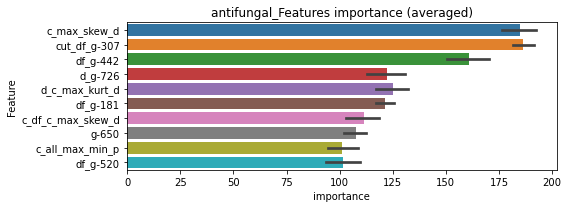

len(train_index) : 2858
len(valid_index) : 953
================================= fold 1/4 antifungal=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[935]	training's binary_logloss: 0.000328907	valid_1's binary_logloss: 0.00156757


len(train_index) : 2858
len(valid_index) : 953
================================= fold 2/4 antifungal=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[824]	training's binary_logloss: 0.000336567	valid_1's binary_logloss: 0.0033004


len(train_index) : 2858
len(valid_index) : 953
================================= fold 3/4 antifungal=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[884]	training's binary_logloss: 0.000334267	valid_1's binary_logloss: 0.00106152


len(train_index) : 2859
len(valid_index) : 952
================================= fold 4/4 antifungal=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[771]	training's binary_logloss: 0.000348429	valid_1's binary_logloss: 0.00435206


antifungal logloss: 0.0025703902629854295


neg labels: 3289 → selected neg labels: 3288


antihistamine, len(trt): 18, len(othr): 3288
target_rate: 0.0007559 → Adj_target_rate: 0.0009799
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.000897221	valid_1's binary_logloss: 0.00285578
Early stopping, best iteration is:
[502]	training's binary_logloss: 0.000312343	valid_1's binary_logloss: 0.00175987
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.000855404	valid_1's binary_logloss: 0.00386143
Early stopping, best iteration is:
[536]	training's binary_logloss: 0.000293557	valid_1's binary_logloss: 0.00234884
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.000881635	valid_1's binary_logloss: 0.00189018
Early stopping, best iteration is:
[519]	training's binary_logloss: 0.000302991	valid_1's binary_logloss: 0.000957696
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.000866013	valid_1's binary_logloss: 0.00273725


1 / 3 AUC score:1.000
y_Threshold: 0.0015441, Threshold: 0.0711380, pos_neg_ratio: 0.8000000
Remove_noisy_data: 132 → Positive_corect_labels: 657/3813
p_label_rate: 0.0100452 Vs.target_rate: 0.00076
Num_p_label: 40.0, conf_0:0.04980, conf_1:0.09248
Num_p_label: 40.0, Expected: 3.0, Adj_threshold_1: 0.0711380
Num_p_label: 31.0, Expected: 3.0, Adj_threshold_2: 0.1111380
Num_p_label: 28.0, Expected: 3.0, Adj_threshold_3: 0.1511380
Num_p_label: 27.0, Expected: 3.0, Adj_threshold_4: 0.1911380
Num_p_label: 27.0, Expected: 3.0, Adj_threshold_5: 0.2311380
Num_p_label: 27.0, Expected: 3.0, Adj_threshold_6: 0.2711380


Early stopping, best iteration is:
[518]	training's binary_logloss: 0.000300524	valid_1's binary_logloss: 0.00164853


Num_p_label: 25.0, Expected: 3.0, Adj_threshold_7: 0.3111380
Num_p_label: 25.0, Expected: 3.0, Adj_threshold_8: 0.3511380
Num_p_label: 23.0, Expected: 3.0, Adj_threshold_9: 0.3911380
Num_p_label: 23.0, Expected: 3.0, Adj_threshold_10: 0.4311380
threshold: 0.4711380, positive_p_label: 23.0/3982, p_label_rate: 0.0057760
positive_y_label: 657.0/3813, y_label_rate: 0.1723053
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.000796647	valid_1's binary_logloss: 0.00212922
Early stopping, best iteration is:
[479]	training's binary_logloss: 0.000299698	valid_1's binary_logloss: 0.00124846
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.000777503	valid_1's binary_logloss: 0.00300385
Early stopping, best iteration is:
[505]	training's binary_logloss: 0.000286063	valid_1's binary_logloss: 0.00197638
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.000800106	valid_1's binary_logloss: 0.00119708
Early stopping, best iteration is:
[538]	training's binary_logloss: 0.000284103	valid_1's binary_logloss: 0.000467597
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.000787122	valid_1's binary_logloss: 0.00254533


2 / 3 AUC score:1.000
y_Threshold: 0.0720847, Threshold: 0.4711380, pos_neg_ratio: 0.8000000
Remove_noisy_data: 0 → Positive_corect_labels: 657.0/3813
p_label_rate: 0.0115520 Vs.target_rate: 0.00076
Num_p_label: 46.0, conf_0:0.37691, conf_1:0.56537
Num_p_label: 46.0, Expected: 3.0, Adj_threshold_1: 0.4711380
Num_p_label: 45.0, Expected: 3.0, Adj_threshold_2: 0.5111380
Num_p_label: 45.0, Expected: 3.0, Adj_threshold_3: 0.5511380
Num_p_label: 45.0, Expected: 3.0, Adj_threshold_4: 0.5911380
Num_p_label: 45.0, Expected: 3.0, Adj_threshold_5: 0.6311380
Num_p_label: 43.0, Expected: 3.0, Adj_threshold_6: 0.6711380
Num_p_label: 39.0, Expected: 3.0, Adj_threshold_7: 0.7111380


Early stopping, best iteration is:
[528]	training's binary_logloss: 0.000278645	valid_1's binary_logloss: 0.00160166


Num_p_label: 38.0, Expected: 3.0, Adj_threshold_8: 0.7511380
Num_p_label: 37.0, Expected: 3.0, Adj_threshold_9: 0.7911380
Num_p_label: 29.0, Expected: 3.0, Adj_threshold_10: 0.8311380
threshold: 0.8711380, positive_p_label: 23.0/3982, p_label_rate: 0.0057760
positive_y_label: 657.0/3813, y_label_rate: 0.1723053
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.000796647	valid_1's binary_logloss: 0.00212922
Early stopping, best iteration is:
[479]	training's binary_logloss: 0.000299698	valid_1's binary_logloss: 0.00124846
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.000777503	valid_1's binary_logloss: 0.00300385
Early stopping, best iteration is:
[505]	training's binary_logloss: 0.000286063	valid_1's binary_logloss: 0.00197638
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.000800106	valid_1's binary_logloss: 0.00119708
Early stopping, best iteration is:
[539]	training's binary_logloss: 0.000284103	valid_1's binary_logloss: 0.000467597
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.000787122	valid_1's binary_logloss: 0.00254533


3 / 3 AUC score:1.000
y_Threshold: 0.0720847, Threshold: 0.8711380, pos_neg_ratio: 0.8000000
Remove_noisy_data: 0 → Positive_corect_labels: 657.0/3813
p_label_rate: 0.0057760 Vs.target_rate: 0.00076
Num_p_label: 23.0, conf_0:0.50000, conf_1:0.80000
Num_p_label: 23.0, Expected: 3.0, Adj_threshold_1: 0.8711380


Early stopping, best iteration is:
[528]	training's binary_logloss: 0.000278645	valid_1's binary_logloss: 0.00160166


threshold: 0.8711380, positive_p_label: 23.0/3982, p_label_rate: 0.0057760
positive_y_label: 657.0/3813, y_label_rate: 0.1723053


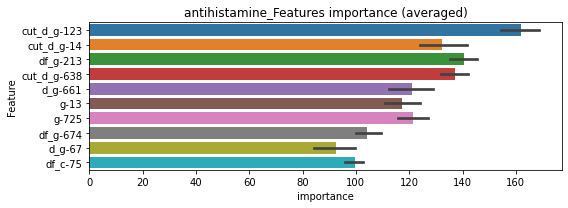

len(train_index) : 2859
len(valid_index) : 954
================================= fold 1/4 antihistamine=================================


Training until validation scores don't improve for 30 rounds


len(train_index) : 2860
len(valid_index) : 953
================================= fold 2/4 antihistamine=================================


Early stopping, best iteration is:
[807]	training's binary_logloss: 0.000292348	valid_1's binary_logloss: 0.000812324
Training until validation scores don't improve for 30 rounds


len(train_index) : 2860
len(valid_index) : 953
================================= fold 3/4 antihistamine=================================


Early stopping, best iteration is:
[795]	training's binary_logloss: 0.000290047	valid_1's binary_logloss: 0.00173997
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[829]	training's binary_logloss: 0.000291063	valid_1's binary_logloss: 0.000464407


len(train_index) : 2860
len(valid_index) : 953
================================= fold 4/4 antihistamine=================================


Training until validation scores don't improve for 30 rounds


antihistamine logloss: 0.0011776166274439543


Early stopping, best iteration is:
[834]	training's binary_logloss: 0.000288947	valid_1's binary_logloss: 0.00169369


neg labels: 3289 → selected neg labels: 3287


antimalarial, len(trt): 18, len(othr): 3287
target_rate: 0.0007559 → Adj_target_rate: 0.0009799
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00101663	valid_1's binary_logloss: 0.00242813
Early stopping, best iteration is:
[525]	training's binary_logloss: 0.000321262	valid_1's binary_logloss: 0.00125938
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.000964529	valid_1's binary_logloss: 0.00712254
Early stopping, best iteration is:
[527]	training's binary_logloss: 0.000314829	valid_1's binary_logloss: 0.00521871
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00101765	valid_1's binary_logloss: 0.00217946
Early stopping, best iteration is:
[536]	training's binary_logloss: 0.00032025	valid_1's binary_logloss: 0.00106699
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.000996924	valid_1's binary_logloss: 0.00431424


1 / 3 AUC score:1.000
y_Threshold: 0.0017560, Threshold: 0.0067292, pos_neg_ratio: 0.8000000
Remove_noisy_data: 132 → Positive_corect_labels: 657/3812
p_label_rate: 0.0100452 Vs.target_rate: 0.00076
Num_p_label: 40.0, conf_0:0.00471, conf_1:0.00875
Num_p_label: 40.0, Expected: 3.0, Adj_threshold_1: 0.0067292
Num_p_label: 10.0, Expected: 3.0, Adj_threshold_2: 0.0467292
Num_p_label: 5.0, Expected: 3.0, Adj_threshold_3: 0.0867292


Early stopping, best iteration is:
[490]	training's binary_logloss: 0.000338039	valid_1's binary_logloss: 0.00279548


threshold: 0.0867292, positive_p_label: 5.0/3982, p_label_rate: 0.0012557
positive_y_label: 657.0/3812, y_label_rate: 0.1723505
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.000905871	valid_1's binary_logloss: 0.00182411
Early stopping, best iteration is:
[524]	training's binary_logloss: 0.000303889	valid_1's binary_logloss: 0.000823968
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.000886663	valid_1's binary_logloss: 0.00282087
Early stopping, best iteration is:
[513]	training's binary_logloss: 0.000306275	valid_1's binary_logloss: 0.00144993
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.000924206	valid_1's binary_logloss: 0.00165909
Early stopping, best iteration is:
[534]	training's binary_logloss: 0.000306339	valid_1's binary_logloss: 0.000681525
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.000914626	valid_1's binary_logloss: 0.00321192


2 / 3 AUC score:1.000
y_Threshold: 0.0868750, Threshold: 0.0867292, pos_neg_ratio: 0.8000000
Remove_noisy_data: 0 → Positive_corect_labels: 657.0/3812
p_label_rate: 0.0057760 Vs.target_rate: 0.00076
Num_p_label: 23.0, conf_0:0.06938, conf_1:0.10408
Num_p_label: 23.0, Expected: 3.0, Adj_threshold_1: 0.0867292
Num_p_label: 19.0, Expected: 3.0, Adj_threshold_2: 0.1267292
Num_p_label: 17.0, Expected: 3.0, Adj_threshold_3: 0.1667292
Num_p_label: 12.0, Expected: 3.0, Adj_threshold_4: 0.2067292
Num_p_label: 11.0, Expected: 3.0, Adj_threshold_5: 0.2467292


Early stopping, best iteration is:
[500]	training's binary_logloss: 0.000311361	valid_1's binary_logloss: 0.00200651


Num_p_label: 10.0, Expected: 3.0, Adj_threshold_6: 0.2867292
Num_p_label: 9.0, Expected: 3.0, Adj_threshold_7: 0.3267292
Num_p_label: 8.0, Expected: 3.0, Adj_threshold_8: 0.3667292
Num_p_label: 8.0, Expected: 3.0, Adj_threshold_9: 0.4067292
Num_p_label: 7.0, Expected: 3.0, Adj_threshold_10: 0.4467292
threshold: 0.4467292, positive_p_label: 7.0/3982, p_label_rate: 0.0017579
positive_y_label: 657.0/3812, y_label_rate: 0.1723505
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.000905871	valid_1's binary_logloss: 0.00182411
Early stopping, best iteration is:
[524]	training's binary_logloss: 0.000303889	valid_1's binary_logloss: 0.000823968
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.000886663	valid_1's binary_logloss: 0.00282087
Early stopping, best iteration is:
[513]	training's binary_logloss: 0.000306275	valid_1's binary_logloss: 0.00144993
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.000924206	valid_1's binary_logloss: 0.00165909
Early stopping, best iteration is:
[534]	training's binary_logloss: 0.000306339	valid_1's binary_logloss: 0.000681525
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.000914626	valid_1's binary_logloss: 0.00321192


3 / 3 AUC score:1.000
y_Threshold: 0.0868750, Threshold: 0.4467292, pos_neg_ratio: 0.8000000
Remove_noisy_data: 0 → Positive_corect_labels: 657.0/3812
p_label_rate: 0.0017579 Vs.target_rate: 0.00076


Early stopping, best iteration is:
[500]	training's binary_logloss: 0.000311361	valid_1's binary_logloss: 0.00200651


Num_p_label: 7.0, conf_0:0.40206, conf_1:0.49140
Num_p_label: 7.0, Expected: 3.0, Adj_threshold_1: 0.4467292
threshold: 0.4467292, positive_p_label: 7.0/3982, p_label_rate: 0.0017579
positive_y_label: 657.0/3812, y_label_rate: 0.1723505


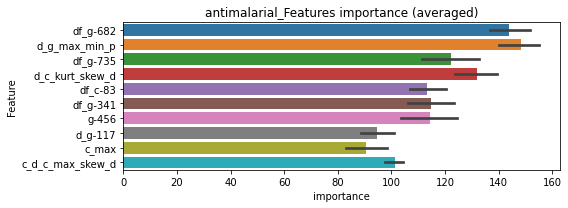

len(train_index) : 2859
len(valid_index) : 953
================================= fold 1/4 antimalarial=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[853]	training's binary_logloss: 0.000298988	valid_1's binary_logloss: 0.000703787


len(train_index) : 2859
len(valid_index) : 953
================================= fold 2/4 antimalarial=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[813]	training's binary_logloss: 0.0002987	valid_1's binary_logloss: 0.00167109


len(train_index) : 2859
len(valid_index) : 953
================================= fold 3/4 antimalarial=================================


Training until validation scores don't improve for 30 rounds


len(train_index) : 2859
len(valid_index) : 953
================================= fold 4/4 antimalarial=================================


Early stopping, best iteration is:
[813]	training's binary_logloss: 0.000304719	valid_1's binary_logloss: 0.000569286
Training until validation scores don't improve for 30 rounds


antimalarial logloss: 0.0011563859162667803


Early stopping, best iteration is:
[810]	training's binary_logloss: 0.000302894	valid_1's binary_logloss: 0.00168094
neg labels: 3289 → selected neg labels: 3281


antioxidant, len(trt): 73, len(othr): 3281
target_rate: 0.0030654 → Adj_target_rate: 0.0032212
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00479052	valid_1's binary_logloss: 0.0452275
[600]	training's binary_logloss: 0.00081954	valid_1's binary_logloss: 0.0351825
Early stopping, best iteration is:
[696]	training's binary_logloss: 0.000657229	valid_1's binary_logloss: 0.0345257
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00494559	valid_1's binary_logloss: 0.0389332
[600]	training's binary_logloss: 0.000835561	valid_1's binary_logloss: 0.0305708
Early stopping, best iteration is:
[735]	training's binary_logloss: 0.000626517	valid_1's binary_logloss: 0.0299874
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00564854	valid_1's binary_logloss: 0.0287912
[600]	training's binary_logloss: 0.000901287	valid_1's binary_logloss: 0.0202516
Early stopping, best iteration is:
[639]	training's binary_logloss: 0.000809046	valid_1's binary_loglos

1 / 3 AUC score:0.999


Early stopping, best iteration is:
[539]	training's binary_logloss: 0.00107868	valid_1's binary_logloss: 0.0382129


y_Threshold: 0.0065348, Threshold: 0.0232072, pos_neg_ratio: 0.8000000
Remove_noisy_data: 140 → Positive_corect_labels: 652/3797
p_label_rate: 0.0100452 Vs.target_rate: 0.00307
Num_p_label: 40.0, conf_0:0.01625, conf_1:0.03017
Num_p_label: 40.0, Expected: 12.2, Adj_threshold_1: 0.0232072
Num_p_label: 16.0, Expected: 12.2, Adj_threshold_2: 0.0632072
threshold: 0.0632072, positive_p_label: 16.0/3982, p_label_rate: 0.0040181
positive_y_label: 652.0/3797, y_label_rate: 0.1717145
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00512527	valid_1's binary_logloss: 0.0246686
[600]	training's binary_logloss: 0.000849788	valid_1's binary_logloss: 0.0147431
Early stopping, best iteration is:
[714]	training's binary_logloss: 0.000652274	valid_1's binary_logloss: 0.0143421
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00476789	valid_1's binary_logloss: 0.0379793
[600]	training's binary_logloss: 0.000836782	valid_1's binary_logloss: 0.0296182
Early stopping, best iteration is:
[729]	training's binary_logloss: 0.000625484	valid_1's binary_logloss: 0.0290661
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00503851	valid_1's binary_logloss: 0.0404151
[600]	training's binary_logloss: 0.000833359	valid_1's binary_logloss: 0.0335381
Early stopping, best iteration is:
[691]	training's binary_logloss: 0.000666903	valid_1's binary_loglo

2 / 3 AUC score:1.000
y_Threshold: 0.0240395, Threshold: 0.0632072, pos_neg_ratio: 0.8000000


Early stopping, best iteration is:
[497]	training's binary_logloss: 0.00116434	valid_1's binary_logloss: 0.0445833


Remove_noisy_data: 14 → Positive_corect_labels: 645.0/3783
p_label_rate: 0.0102963 Vs.target_rate: 0.00307
Num_p_label: 41.0, conf_0:0.05057, conf_1:0.07585
Num_p_label: 41.0, Expected: 12.2, Adj_threshold_1: 0.0632072
Num_p_label: 24.0, Expected: 12.2, Adj_threshold_2: 0.1032072
Num_p_label: 18.0, Expected: 12.2, Adj_threshold_3: 0.1432072
threshold: 0.1432072, positive_p_label: 18.0/3982, p_label_rate: 0.0045203
positive_y_label: 645.0/3783, y_label_rate: 0.1704996
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00474436	valid_1's binary_logloss: 0.0371464
[600]	training's binary_logloss: 0.000803661	valid_1's binary_logloss: 0.0259685
Early stopping, best iteration is:
[695]	training's binary_logloss: 0.000644289	valid_1's binary_logloss: 0.025459
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00466167	valid_1's binary_logloss: 0.028189
[600]	training's binary_logloss: 0.000803168	valid_1's binary_logloss: 0.0183467
Early stopping, best iteration is:
[698]	training's binary_logloss: 0.000639402	valid_1's binary_logloss: 0.0178206
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00467845	valid_1's binary_logloss: 0.0292858
[600]	training's binary_logloss: 0.000807954	valid_1's binary_logloss: 0.0210502
Early stopping, best iteration is:
[629]	training's binary_logloss: 0.000748243	valid_1's binary_logloss

3 / 3 AUC score:1.000
y_Threshold: 0.0223274, Threshold: 0.1432072, pos_neg_ratio: 0.8000000
Remove_noisy_data: 4 → Positive_corect_labels: 643.0/3779
p_label_rate: 0.0042692 Vs.target_rate: 0.00307
Num_p_label: 17.0, conf_0:0.12889, conf_1:0.15753
threshold: 0.1432072, positive_p_label: 17.0/3982, p_label_rate: 0.0042692
positive_y_label: 643.0/3779, y_label_rate: 0.1701508


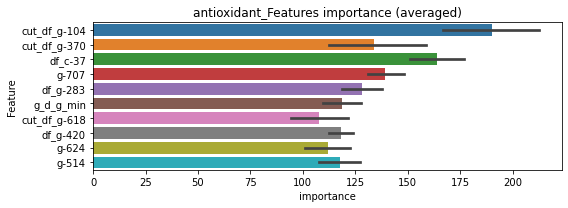

len(train_index) : 2834
len(valid_index) : 945
================================= fold 1/4 antioxidant=================================


Training until validation scores don't improve for 30 rounds


len(train_index) : 2834
len(valid_index) : 945
================================= fold 2/4 antioxidant=================================


Early stopping, best iteration is:
[448]	training's binary_logloss: 0.00111131	valid_1's binary_logloss: 0.030355
Training until validation scores don't improve for 30 rounds


len(train_index) : 2834
len(valid_index) : 945
================================= fold 3/4 antioxidant=================================


Early stopping, best iteration is:
[290]	training's binary_logloss: 0.00189977	valid_1's binary_logloss: 0.0333137
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[747]	training's binary_logloss: 0.000688738	valid_1's binary_logloss: 0.0210736


len(train_index) : 2835
len(valid_index) : 944
================================= fold 4/4 antioxidant=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[831]	training's binary_logloss: 0.000654452	valid_1's binary_logloss: 0.0129793


antioxidant logloss: 0.02443341329668625
antioxidant clipping


neg labels: 3289 → selected neg labels: 3283


antiprotozoal, len(trt): 36, len(othr): 3283
target_rate: 0.0015117 → Adj_target_rate: 0.0017663
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00220841	valid_1's binary_logloss: 0.00629527
[600]	training's binary_logloss: 0.000452652	valid_1's binary_logloss: 0.00237307
Early stopping, best iteration is:
[655]	training's binary_logloss: 0.000417351	valid_1's binary_logloss: 0.0023179
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00213299	valid_1's binary_logloss: 0.0108529
[600]	training's binary_logloss: 0.000447792	valid_1's binary_logloss: 0.00656367
Early stopping, best iteration is:
[674]	training's binary_logloss: 0.000410257	valid_1's binary_logloss: 0.0064456
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00226426	valid_1's binary_logloss: 0.00503446
[600]	training's binary_logloss: 0.000460279	valid_1's binary_logloss: 0.00142935
Early stopping, best iteration is:
[706]	training's binary_logloss: 0.000415239	valid_1's binary_

1 / 3 AUC score:1.000
y_Threshold: 0.0032929, Threshold: 0.0118394, pos_neg_ratio: 0.8000000
Remove_noisy_data: 132 → Positive_corect_labels: 656/3807
p_label_rate: 0.0100452 Vs.target_rate: 0.00151
Num_p_label: 40.0, conf_0:0.00829, conf_1:0.01539
Num_p_label: 40.0, Expected: 6.0, Adj_threshold_1: 0.0118394
Num_p_label: 4.0, Expected: 6.0, Adj_threshold_2: 0.0518394
threshold: 0.0518394, positive_p_label: 4.0/3982, p_label_rate: 0.0010045
positive_y_label: 656.0/3807, y_label_rate: 0.1723142
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00200949	valid_1's binary_logloss: 0.0068084
[600]	training's binary_logloss: 0.000430731	valid_1's binary_logloss: 0.0028154
Early stopping, best iteration is:
[676]	training's binary_logloss: 0.000396463	valid_1's binary_logloss: 0.00274423
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00200455	valid_1's binary_logloss: 0.00787588
[600]	training's binary_logloss: 0.00043309	valid_1's binary_logloss: 0.00419723
Early stopping, best iteration is:
[685]	training's binary_logloss: 0.000396861	valid_1's binary_logloss: 0.00409849
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00205669	valid_1's binary_logloss: 0.00500157
[600]	training's binary_logloss: 0.00044346	valid_1's binary_logloss: 0.00152831
Early stopping, best iteration is:
[656]	training's binary_logloss: 0.000412691	valid_1's binary_l

2 / 3 AUC score:1.000
y_Threshold: 0.0717402, Threshold: 0.0518394, pos_neg_ratio: 0.8000000
Remove_noisy_data: 0 → Positive_corect_labels: 656.0/3807
p_label_rate: 0.0017579 Vs.target_rate: 0.00151
Num_p_label: 7.0, conf_0:0.04147, conf_1:0.06221
threshold: 0.0518394, positive_p_label: 7.0/3982, p_label_rate: 0.0017579
positive_y_label: 656.0/3807, y_label_rate: 0.1723142
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00200949	valid_1's binary_logloss: 0.0068084
[600]	training's binary_logloss: 0.000430731	valid_1's binary_logloss: 0.0028154
Early stopping, best iteration is:
[676]	training's binary_logloss: 0.000396463	valid_1's binary_logloss: 0.00274423
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00200455	valid_1's binary_logloss: 0.00787588
[600]	training's binary_logloss: 0.00043309	valid_1's binary_logloss: 0.00419723
Early stopping, best iteration is:
[685]	training's binary_logloss: 0.000396861	valid_1's binary_logloss: 0.00409849
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00205669	valid_1's binary_logloss: 0.00500157
[600]	training's binary_logloss: 0.00044346	valid_1's binary_logloss: 0.00152831
Early stopping, best iteration is:
[656]	training's binary_logloss: 0.000412691	valid_1's binary_l

3 / 3 AUC score:1.000
y_Threshold: 0.0717402, Threshold: 0.0518394, pos_neg_ratio: 0.8000000
Remove_noisy_data: 0 → Positive_corect_labels: 656.0/3807
p_label_rate: 0.0017579 Vs.target_rate: 0.00151
Num_p_label: 7.0, conf_0:0.04666, conf_1:0.05702
threshold: 0.0518394, positive_p_label: 7.0/3982, p_label_rate: 0.0017579
positive_y_label: 656.0/3807, y_label_rate: 0.1723142


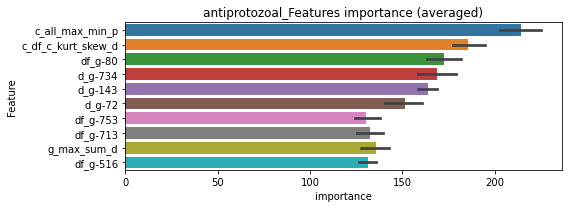

len(train_index) : 2855
len(valid_index) : 952
================================= fold 1/4 antiprotozoal=================================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.000396474	valid_1's binary_logloss: 0.00247714
Early stopping, best iteration is:
[1056]	training's binary_logloss: 0.000392548	valid_1's binary_logloss: 0.00246709


len(train_index) : 2855
len(valid_index) : 952
================================= fold 2/4 antiprotozoal=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[959]	training's binary_logloss: 0.000406381	valid_1's binary_logloss: 0.00294348


len(train_index) : 2855
len(valid_index) : 952
================================= fold 3/4 antiprotozoal=================================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.000407555	valid_1's binary_logloss: 0.00128995
Early stopping, best iteration is:
[998]	training's binary_logloss: 0.000407555	valid_1's binary_logloss: 0.00128995


len(train_index) : 2856
len(valid_index) : 951
================================= fold 4/4 antiprotozoal=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[906]	training's binary_logloss: 0.000412824	valid_1's binary_logloss: 0.00374338


antiprotozoal logloss: 0.0026109590382544412


neg labels: 3289 → selected neg labels: 3282


antiviral, len(trt): 23, len(othr): 3282
target_rate: 0.0009658 → Adj_target_rate: 0.0012069
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00105759	valid_1's binary_logloss: 0.00380914
[600]	training's binary_logloss: 0.000299356	valid_1's binary_logloss: 0.00190683
Early stopping, best iteration is:
[613]	training's binary_logloss: 0.00029756	valid_1's binary_logloss: 0.00190595
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00106008	valid_1's binary_logloss: 0.0026172
[600]	training's binary_logloss: 0.000305789	valid_1's binary_logloss: 0.00105667
Early stopping, best iteration is:
[593]	training's binary_logloss: 0.000306174	valid_1's binary_logloss: 0.00105633
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00110498	valid_1's binary_logloss: 0.0019497
[600]	training's binary_logloss: 0.000311594	valid_1's binary_logloss: 0.000670193
Early stopping, best iteration is:
[600]	training's binary_logloss: 0.000311594	valid_1's binary

1 / 3 AUC score:1.000
y_Threshold: 0.0015022, Threshold: 0.0058764, pos_neg_ratio: 0.8000000
Remove_noisy_data: 132 → Positive_corect_labels: 656/3806
p_label_rate: 0.0100452 Vs.target_rate: 0.00097
Num_p_label: 40.0, conf_0:0.00411, conf_1:0.00764
Num_p_label: 40.0, Expected: 3.8, Adj_threshold_1: 0.0058764
Num_p_label: 0.0, Expected: 3.8, Adj_threshold_2: 0.0458764
threshold: 0.0458764, positive_p_label: 0.0/3982, p_label_rate: 0.0000000
positive_y_label: 656.0/3806, y_label_rate: 0.1723594
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00101629	valid_1's binary_logloss: 0.00321146
[600]	training's binary_logloss: 0.000298528	valid_1's binary_logloss: 0.00165644
Early stopping, best iteration is:
[572]	training's binary_logloss: 0.000298909	valid_1's binary_logloss: 0.00165584
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00103219	valid_1's binary_logloss: 0.0026173
[600]	training's binary_logloss: 0.000301925	valid_1's binary_logloss: 0.00114015
Early stopping, best iteration is:
[591]	training's binary_logloss: 0.000302324	valid_1's binary_logloss: 0.00113991
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00102429	valid_1's binary_logloss: 0.00301302
Early stopping, best iteration is:
[562]	training's binary_logloss: 0.000303974	valid_1's binary_logloss: 0.00154175
Training until validation scores don't improve for 30 rounds

2 / 3 AUC score:1.000


[600]	training's binary_logloss: 0.000297545	valid_1's binary_logloss: 0.00187044
Early stopping, best iteration is:
[593]	training's binary_logloss: 0.000297545	valid_1's binary_logloss: 0.00187044


y_Threshold: 0.0644643, Threshold: 0.0458764, pos_neg_ratio: 0.8000000
Remove_noisy_data: 0 → Positive_corect_labels: 656.0/3806
p_label_rate: 0.0022602 Vs.target_rate: 0.00097
Num_p_label: 9.0, conf_0:0.03670, conf_1:0.05505
Num_p_label: 9.0, Expected: 3.8, Adj_threshold_1: 0.0458764
threshold: 0.0458764, positive_p_label: 9.0/3982, p_label_rate: 0.0022602
positive_y_label: 656.0/3806, y_label_rate: 0.1723594
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00101629	valid_1's binary_logloss: 0.00321146
[600]	training's binary_logloss: 0.000298528	valid_1's binary_logloss: 0.00165644
Early stopping, best iteration is:
[572]	training's binary_logloss: 0.000298909	valid_1's binary_logloss: 0.00165584
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00103219	valid_1's binary_logloss: 0.0026173
[600]	training's binary_logloss: 0.000301925	valid_1's binary_logloss: 0.00114015
Early stopping, best iteration is:
[591]	training's binary_logloss: 0.000302324	valid_1's binary_logloss: 0.00113991
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00102429	valid_1's binary_logloss: 0.00301302
Early stopping, best iteration is:
[562]	training's binary_logloss: 0.000303974	valid_1's binary_logloss: 0.00154175
Training until validation scores don't improve for 30 rounds

3 / 3 AUC score:1.000
y_Threshold: 0.0644643, Threshold: 0.0458764, pos_neg_ratio: 0.8000000
Remove_noisy_data: 0 → Positive_corect_labels: 656.0/3806
p_label_rate: 0.0022602 Vs.target_rate: 0.00097
Num_p_label: 9.0, conf_0:0.04129, conf_1:0.05046
Num_p_label: 9.0, Expected: 3.8, Adj_threshold_1: 0.0458764
threshold: 0.0458764, positive_p_label: 9.0/3982, p_label_rate: 0.0022602
positive_y_label: 656.0/3806, y_label_rate: 0.1723594


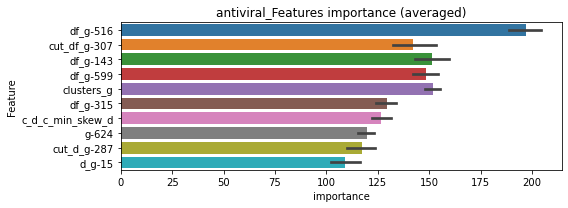

len(train_index) : 2854
len(valid_index) : 952
================================= fold 1/4 antiviral=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[863]	training's binary_logloss: 0.000301644	valid_1's binary_logloss: 0.00166856


len(train_index) : 2854
len(valid_index) : 952
================================= fold 2/4 antiviral=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[864]	training's binary_logloss: 0.000306153	valid_1's binary_logloss: 0.000713975


len(train_index) : 2855
len(valid_index) : 951
================================= fold 3/4 antiviral=================================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.000299689	valid_1's binary_logloss: 0.000762098
Early stopping, best iteration is:
[979]	training's binary_logloss: 0.000299689	valid_1's binary_logloss: 0.000762098


len(train_index) : 2855
len(valid_index) : 951
================================= fold 4/4 antiviral=================================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.000295289	valid_1's binary_logloss: 0.00120486
Early stopping, best iteration is:
[981]	training's binary_logloss: 0.000295877	valid_1's binary_logloss: 0.00120372


antiviral logloss: 0.0010873769485942322


neg labels: 3289 → selected neg labels: 3283


apoptosis_stimulant, len(trt): 49, len(othr): 3283
target_rate: 0.0020576 → Adj_target_rate: 0.0022954
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00274723	valid_1's binary_logloss: 0.0309615
[600]	training's binary_logloss: 0.000545166	valid_1's binary_logloss: 0.0263764
Early stopping, best iteration is:
[582]	training's binary_logloss: 0.000568685	valid_1's binary_logloss: 0.0262897
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00292197	valid_1's binary_logloss: 0.0252835
[600]	training's binary_logloss: 0.000568812	valid_1's binary_logloss: 0.0207236
Early stopping, best iteration is:
[576]	training's binary_logloss: 0.000604843	valid_1's binary_logloss: 0.0206487
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00321259	valid_1's binary_logloss: 0.00677944
[600]	training's binary_logloss: 0.000592906	valid_1's binary_logloss: 0.00229866
Early stopping, best iteration is:
[728]	training's binary_logloss: 0.000505649	valid_1's binary_log

1 / 3 AUC score:1.000
y_Threshold: 0.0035006, Threshold: 0.0436179, pos_neg_ratio: 0.8000000
Remove_noisy_data: 132 → Positive_corect_labels: 656/3807
p_label_rate: 0.0100452 Vs.target_rate: 0.00206
Num_p_label: 40.0, conf_0:0.03053, conf_1:0.05670
Num_p_label: 40.0, Expected: 8.2, Adj_threshold_1: 0.0436179
Num_p_label: 25.0, Expected: 8.2, Adj_threshold_2: 0.0836179
Num_p_label: 18.0, Expected: 8.2, Adj_threshold_3: 0.1236179
threshold: 0.1236179, positive_p_label: 18.0/3982, p_label_rate: 0.0045203
positive_y_label: 656.0/3807, y_label_rate: 0.1723142
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00268521	valid_1's binary_logloss: 0.0328971
[600]	training's binary_logloss: 0.000537125	valid_1's binary_logloss: 0.0274352
Early stopping, best iteration is:
[583]	training's binary_logloss: 0.000557333	valid_1's binary_logloss: 0.0273144
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00275174	valid_1's binary_logloss: 0.024003
Early stopping, best iteration is:
[446]	training's binary_logloss: 0.00095263	valid_1's binary_logloss: 0.02018
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00283434	valid_1's binary_logloss: 0.00629147
[600]	training's binary_logloss: 0.000566921	valid_1's binary_logloss: 0.00218689
Early stopping, best iteration is:
[619]	training's binary_logloss: 0.000546201	valid_1's binary_logloss: 0.00213548
Training until validation scores don't improve for 30 rounds
[300]	t

2 / 3 AUC score:1.000
y_Threshold: 0.0188220, Threshold: 0.1236179, pos_neg_ratio: 0.8000000
Remove_noisy_data: 4 → Positive_corect_labels: 654.0/3803
p_label_rate: 0.0148167 Vs.target_rate: 0.00206
Num_p_label: 59.0, conf_0:0.09889, conf_1:0.14834
Num_p_label: 59.0, Expected: 8.2, Adj_threshold_1: 0.1236179
Num_p_label: 39.0, Expected: 8.2, Adj_threshold_2: 0.1636179
Num_p_label: 31.0, Expected: 8.2, Adj_threshold_3: 0.2036179
Num_p_label: 26.0, Expected: 8.2, Adj_threshold_4: 0.2436179
Num_p_label: 24.0, Expected: 8.2, Adj_threshold_5: 0.2836179
Num_p_label: 21.0, Expected: 8.2, Adj_threshold_6: 0.3236179
Num_p_label: 17.0, Expected: 8.2, Adj_threshold_7: 0.3636179
threshold: 0.3636179, positive_p_label: 17.0/3982, p_label_rate: 0.0042692
positive_y_label: 654.0/3803, y_label_rate: 0.1719695
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00272263	valid_1's binary_logloss: 0.0133671
[600]	training's binary_logloss: 0.000548479	valid_1's binary_logloss: 0.00761667
Early stopping, best iteration is:
[672]	training's binary_logloss: 0.000486574	valid_1's binary_logloss: 0.00749415
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00279451	valid_1's binary_logloss: 0.0169092
[600]	training's binary_logloss: 0.00055326	valid_1's binary_logloss: 0.0119353
Early stopping, best iteration is:
[647]	training's binary_logloss: 0.000507286	valid_1's binary_logloss: 0.0117748
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00273032	valid_1's binary_logloss: 0.0290689
[600]	training's binary_logloss: 0.000547036	valid_1's binary_logloss: 0.0225463
Early stopping, best iteration is:
[659]	training's binary_logloss: 0.00049225	valid_1's binary_loglo

3 / 3 AUC score:1.000
y_Threshold: 0.0170439, Threshold: 0.3636179, pos_neg_ratio: 0.8000000
Remove_noisy_data: 4 → Positive_corect_labels: 652.0/3799
p_label_rate: 0.0050226 Vs.target_rate: 0.00206
Num_p_label: 20.0, conf_0:0.32726, conf_1:0.39998
Num_p_label: 20.0, Expected: 8.2, Adj_threshold_1: 0.3636179


Early stopping, best iteration is:
[418]	training's binary_logloss: 0.00102629	valid_1's binary_logloss: 0.0297689


threshold: 0.3636179, positive_p_label: 20.0/3982, p_label_rate: 0.0050226
positive_y_label: 652.0/3799, y_label_rate: 0.1716241


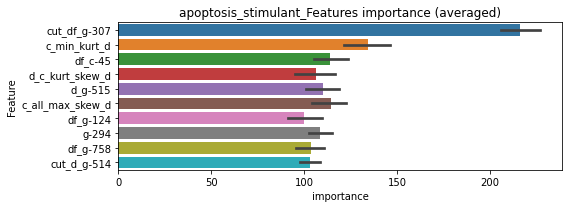

len(train_index) : 2849
len(valid_index) : 950
================================= fold 1/4 apoptosis_stimulant=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[881]	training's binary_logloss: 0.000497929	valid_1's binary_logloss: 0.00526701


len(train_index) : 2849
len(valid_index) : 950
================================= fold 2/4 apoptosis_stimulant=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[837]	training's binary_logloss: 0.000501034	valid_1's binary_logloss: 0.0136756


len(train_index) : 2849
len(valid_index) : 950
================================= fold 3/4 apoptosis_stimulant=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[828]	training's binary_logloss: 0.000519094	valid_1's binary_logloss: 0.00415245


len(train_index) : 2850
len(valid_index) : 949
================================= fold 4/4 apoptosis_stimulant=================================


Training until validation scores don't improve for 30 rounds


apoptosis_stimulant logloss: 0.012363991480897884


Early stopping, best iteration is:
[308]	training's binary_logloss: 0.00125197	valid_1's binary_logloss: 0.0263756
neg labels: 3289 → selected neg labels: 3283


aromatase_inhibitor, len(trt): 47, len(othr): 3283
target_rate: 0.0019736 → Adj_target_rate: 0.0022155
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00281711	valid_1's binary_logloss: 0.0209443
[600]	training's binary_logloss: 0.000558328	valid_1's binary_logloss: 0.0166497
Early stopping, best iteration is:
[659]	training's binary_logloss: 0.000498647	valid_1's binary_logloss: 0.0164964
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00282453	valid_1's binary_logloss: 0.0152217
[600]	training's binary_logloss: 0.000561201	valid_1's binary_logloss: 0.00937694
Early stopping, best iteration is:
[706]	training's binary_logloss: 0.00048559	valid_1's binary_logloss: 0.00916441
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00287632	valid_1's binary_logloss: 0.00830644
[600]	training's binary_logloss: 0.000581471	valid_1's binary_logloss: 0.00414807
Early stopping, best iteration is:
[689]	training's binary_logloss: 0.000508366	valid_1's binary_lo

1 / 3 AUC score:1.000
y_Threshold: 0.0037483, Threshold: 0.0119380, pos_neg_ratio: 0.8000000
Remove_noisy_data: 132 → Positive_corect_labels: 656/3807
p_label_rate: 0.0100452 Vs.target_rate: 0.00197
Num_p_label: 40.0, conf_0:0.00836, conf_1:0.01552
Num_p_label: 40.0, Expected: 7.9, Adj_threshold_1: 0.0119380
Num_p_label: 11.0, Expected: 7.9, Adj_threshold_2: 0.0519380
threshold: 0.0519380, positive_p_label: 11.0/3982, p_label_rate: 0.0027624
positive_y_label: 656.0/3807, y_label_rate: 0.1723142
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00258416	valid_1's binary_logloss: 0.0238997
[600]	training's binary_logloss: 0.000533211	valid_1's binary_logloss: 0.0194856
Early stopping, best iteration is:
[575]	training's binary_logloss: 0.000565264	valid_1's binary_logloss: 0.019401
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00265265	valid_1's binary_logloss: 0.0147346
[600]	training's binary_logloss: 0.000546142	valid_1's binary_logloss: 0.00994311
Early stopping, best iteration is:
[632]	training's binary_logloss: 0.000513646	valid_1's binary_logloss: 0.00979535
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00283101	valid_1's binary_logloss: 0.00755244
[600]	training's binary_logloss: 0.000566786	valid_1's binary_logloss: 0.00364249
Early stopping, best iteration is:
[672]	training's binary_logloss: 0.000500835	valid_1's binary_lo

2 / 3 AUC score:1.000
y_Threshold: 0.0223830, Threshold: 0.0519380, pos_neg_ratio: 0.8000000


Early stopping, best iteration is:
[548]	training's binary_logloss: 0.000596693	valid_1's binary_logloss: 0.0225173


Remove_noisy_data: 4 → Positive_corect_labels: 654.0/3803
p_label_rate: 0.0032647 Vs.target_rate: 0.00197
Num_p_label: 13.0, conf_0:0.04155, conf_1:0.06233
Num_p_label: 13.0, Expected: 7.9, Adj_threshold_1: 0.0519380
threshold: 0.0519380, positive_p_label: 13.0/3982, p_label_rate: 0.0032647
positive_y_label: 654.0/3803, y_label_rate: 0.1719695
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00264261	valid_1's binary_logloss: 0.0183546
[600]	training's binary_logloss: 0.000537826	valid_1's binary_logloss: 0.0118566
Early stopping, best iteration is:
[634]	training's binary_logloss: 0.000503048	valid_1's binary_logloss: 0.0117578
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00274476	valid_1's binary_logloss: 0.0163784
[600]	training's binary_logloss: 0.00054727	valid_1's binary_logloss: 0.0117097
Early stopping, best iteration is:
[633]	training's binary_logloss: 0.000511384	valid_1's binary_logloss: 0.0115821
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00263353	valid_1's binary_logloss: 0.011514
[600]	training's binary_logloss: 0.000538269	valid_1's binary_logloss: 0.00695633
Early stopping, best iteration is:
[630]	training's binary_logloss: 0.000510146	valid_1's binary_loglos

3 / 3 AUC score:1.000
y_Threshold: 0.0196897, Threshold: 0.0519380, pos_neg_ratio: 0.8000000
Remove_noisy_data: 4 → Positive_corect_labels: 652.0/3799
p_label_rate: 0.0032647 Vs.target_rate: 0.00197
Num_p_label: 13.0, conf_0:0.04674, conf_1:0.05713
Num_p_label: 13.0, Expected: 7.9, Adj_threshold_1: 0.0519380
threshold: 0.0519380, positive_p_label: 13.0/3982, p_label_rate: 0.0032647
positive_y_label: 652.0/3799, y_label_rate: 0.1716241


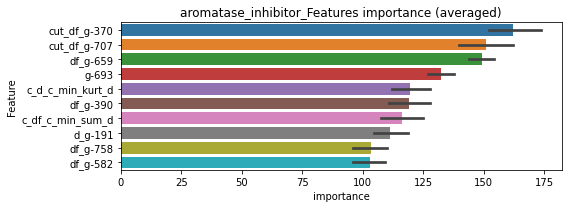

len(train_index) : 2849
len(valid_index) : 950
================================= fold 1/4 aromatase_inhibitor=================================


Training until validation scores don't improve for 30 rounds


len(train_index) : 2849
len(valid_index) : 950
================================= fold 2/4 aromatase_inhibitor=================================


Early stopping, best iteration is:
[508]	training's binary_logloss: 0.000732081	valid_1's binary_logloss: 0.0118635
Training until validation scores don't improve for 30 rounds


len(train_index) : 2849
len(valid_index) : 950
================================= fold 3/4 aromatase_inhibitor=================================


Early stopping, best iteration is:
[555]	training's binary_logloss: 0.000672042	valid_1's binary_logloss: 0.0180841
Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.000478978	valid_1's binary_logloss: 0.00247283
Early stopping, best iteration is:
[1049]	training's binary_logloss: 0.000472307	valid_1's binary_logloss: 0.0024585


len(train_index) : 2850
len(valid_index) : 949
================================= fold 4/4 aromatase_inhibitor=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[814]	training's binary_logloss: 0.00051073	valid_1's binary_logloss: 0.00981508


aromatase_inhibitor logloss: 0.01055605920332299


neg labels: 3289 → selected neg labels: 3285


atm_kinase_inhibitor, len(trt): 6, len(othr): 3285
target_rate: 0.0002520 → Adj_target_rate: 0.0003851
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.000313893	valid_1's binary_logloss: 0.000889066
Early stopping, best iteration is:
[511]	training's binary_logloss: 0.000153925	valid_1's binary_logloss: 0.000557454
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.000313212	valid_1's binary_logloss: 0.00174482
Early stopping, best iteration is:
[491]	training's binary_logloss: 0.000155126	valid_1's binary_logloss: 0.00132378
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.000316913	valid_1's binary_logloss: 0.000322056
Early stopping, best iteration is:
[491]	training's binary_logloss: 0.000154846	valid_1's binary_logloss: 0.000158311
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.000312391	valid_1's binary_logloss: 0.000935739


1 / 3 AUC score:1.000
y_Threshold: 0.0004546, Threshold: 0.0013104, pos_neg_ratio: 0.8000000
Remove_noisy_data: 132 → Positive_corect_labels: 657/3810
p_label_rate: 0.0100452 Vs.target_rate: 0.00025
Num_p_label: 40.0, conf_0:0.00092, conf_1:0.00170
Num_p_label: 40.0, Expected: 1.0, Adj_threshold_1: 0.0013104
Num_p_label: 2.0, Expected: 1.0, Adj_threshold_2: 0.0413104
threshold: 0.0413104, positive_p_label: 2.0/3982, p_label_rate: 0.0005023


Early stopping, best iteration is:
[492]	training's binary_logloss: 0.000155061	valid_1's binary_logloss: 0.000605701


positive_y_label: 657.0/3810, y_label_rate: 0.1724409
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.000305985	valid_1's binary_logloss: 0.000377521
Early stopping, best iteration is:
[527]	training's binary_logloss: 0.000147601	valid_1's binary_logloss: 0.000194242
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.000303638	valid_1's binary_logloss: 0.00187833
Early stopping, best iteration is:
[476]	training's binary_logloss: 0.00015037	valid_1's binary_logloss: 0.00157499
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.000308477	valid_1's binary_logloss: 0.000325186
Early stopping, best iteration is:
[527]	training's binary_logloss: 0.000149406	valid_1's binary_logloss: 0.000155652
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.000303827	valid_1's binary_logloss: 0.0021087


2 / 3 AUC score:1.000
y_Threshold: 0.0424341, Threshold: 0.0413104, pos_neg_ratio: 0.8000000
Remove_noisy_data: 0 → Positive_corect_labels: 657.0/3810
p_label_rate: 0.0027624 Vs.target_rate: 0.00025
Num_p_label: 11.0, conf_0:0.03305, conf_1:0.04957
Num_p_label: 11.0, Expected: 1.0, Adj_threshold_1: 0.0413104
Num_p_label: 8.0, Expected: 1.0, Adj_threshold_2: 0.0813104
Num_p_label: 4.0, Expected: 1.0, Adj_threshold_3: 0.1213104
Num_p_label: 4.0, Expected: 1.0, Adj_threshold_4: 0.1613104
Num_p_label: 3.0, Expected: 1.0, Adj_threshold_5: 0.2013104
Num_p_label: 2.0, Expected: 1.0, Adj_threshold_6: 0.2413104
threshold: 0.2413104, positive_p_label: 2.0/3982, p_label_rate: 0.0005023


Early stopping, best iteration is:
[507]	training's binary_logloss: 0.000148449	valid_1's binary_logloss: 0.00171482


positive_y_label: 657.0/3810, y_label_rate: 0.1724409
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.000305985	valid_1's binary_logloss: 0.000377521
Early stopping, best iteration is:
[527]	training's binary_logloss: 0.000147601	valid_1's binary_logloss: 0.000194242
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.000303638	valid_1's binary_logloss: 0.00187833
Early stopping, best iteration is:
[476]	training's binary_logloss: 0.00015037	valid_1's binary_logloss: 0.00157499
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.000308477	valid_1's binary_logloss: 0.000325186
Early stopping, best iteration is:
[512]	training's binary_logloss: 0.000149406	valid_1's binary_logloss: 0.000155652
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.000303827	valid_1's binary_logloss: 0.0021087


3 / 3 AUC score:1.000
y_Threshold: 0.0424341, Threshold: 0.2413104, pos_neg_ratio: 0.8000000
Remove_noisy_data: 0 → Positive_corect_labels: 657.0/3810
p_label_rate: 0.0005023 Vs.target_rate: 0.00025
Num_p_label: 2.0, conf_0:0.21718, conf_1:0.26544
Num_p_label: 2.0, Expected: 1.0, Adj_threshold_1: 0.2413104
threshold: 0.2413104, positive_p_label: 2.0/3982, p_label_rate: 0.0005023


Early stopping, best iteration is:
[507]	training's binary_logloss: 0.000148449	valid_1's binary_logloss: 0.00171482


positive_y_label: 657.0/3810, y_label_rate: 0.1724409


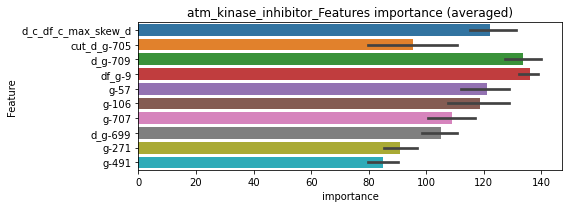

len(train_index) : 2857
len(valid_index) : 953
================================= fold 1/4 atm_kinase_inhibitor=================================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.000148819	valid_1's binary_logloss: 0.000186365
Early stopping, best iteration is:
[1012]	training's binary_logloss: 0.000148508	valid_1's binary_logloss: 0.000185995


len(train_index) : 2857
len(valid_index) : 953
================================= fold 2/4 atm_kinase_inhibitor=================================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.000149178	valid_1's binary_logloss: 0.000894622
Early stopping, best iteration is:
[1086]	training's binary_logloss: 0.000147629	valid_1's binary_logloss: 0.000891679


len(train_index) : 2858
len(valid_index) : 952
================================= fold 3/4 atm_kinase_inhibitor=================================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.000149669	valid_1's binary_logloss: 0.000156452
Early stopping, best iteration is:
[1125]	training's binary_logloss: 0.000147441	valid_1's binary_logloss: 0.000154077


len(train_index) : 2858
len(valid_index) : 952
================================= fold 4/4 atm_kinase_inhibitor=================================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.000150231	valid_1's binary_logloss: 0.0012599


atm_kinase_inhibitor logloss: 0.0006207710239143362


Early stopping, best iteration is:
[1191]	training's binary_logloss: 0.000147686	valid_1's binary_logloss: 0.00125146
neg labels: 3289 → selected neg labels: 3289


atp-sensitive_potassium_channel_antagonist, len(trt): 7, len(othr): 3289
target_rate: 0.0002939 → Adj_target_rate: 0.0004391
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.000364281	valid_1's binary_logloss: 0.000933526
Early stopping, best iteration is:
[467]	training's binary_logloss: 0.000180953	valid_1's binary_logloss: 0.000598919
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.000366114	valid_1's binary_logloss: 0.0050582
Early stopping, best iteration is:
[446]	training's binary_logloss: 0.000184003	valid_1's binary_logloss: 0.00441982
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.000371299	valid_1's binary_logloss: 0.00041081
Early stopping, best iteration is:
[447]	training's binary_logloss: 0.000185621	valid_1's binary_logloss: 0.000209524
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.000371532	valid_1's binary_logloss: 0.000456138


1 / 3 AUC score:1.000
y_Threshold: 0.0005027, Threshold: 0.0020121, pos_neg_ratio: 0.8000000
Remove_noisy_data: 133 → Positive_corect_labels: 657/3813
p_label_rate: 0.0100452 Vs.target_rate: 0.00029
Num_p_label: 40.0, conf_0:0.00141, conf_1:0.00262
Num_p_label: 40.0, Expected: 1.2, Adj_threshold_1: 0.0020121
Num_p_label: 0.0, Expected: 1.2, Adj_threshold_2: 0.0420121


Early stopping, best iteration is:
[485]	training's binary_logloss: 0.000179769	valid_1's binary_logloss: 0.000221572


threshold: 0.0420121, positive_p_label: 0.0/3982, p_label_rate: 0.0000000
positive_y_label: 657.0/3813, y_label_rate: 0.1723053
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.000346438	valid_1's binary_logloss: 0.000766622
Early stopping, best iteration is:
[490]	training's binary_logloss: 0.000171168	valid_1's binary_logloss: 0.000453727
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.000342671	valid_1's binary_logloss: 0.00272573
Early stopping, best iteration is:
[470]	training's binary_logloss: 0.000172217	valid_1's binary_logloss: 0.00221176
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.000349832	valid_1's binary_logloss: 0.00034952
Early stopping, best iteration is:
[506]	training's binary_logloss: 0.000172721	valid_1's binary_logloss: 0.000172856
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.000346296	valid_1's binary_logloss: 0.000415021


2 / 3 AUC score:1.000
y_Threshold: 0.0331014, Threshold: 0.0420121, pos_neg_ratio: 0.8000000
Remove_noisy_data: 0 → Positive_corect_labels: 657.0/3813
p_label_rate: 0.0012557 Vs.target_rate: 0.00029
Num_p_label: 5.0, conf_0:0.03361, conf_1:0.05041
Num_p_label: 5.0, Expected: 1.2, Adj_threshold_1: 0.0420121
Num_p_label: 0.0, Expected: 1.2, Adj_threshold_2: 0.0820121
threshold: 0.0820121, positive_p_label: 0.0/3982, p_label_rate: 0.0000000


Early stopping, best iteration is:
[540]	training's binary_logloss: 0.000170694	valid_1's binary_logloss: 0.00021004


positive_y_label: 657.0/3813, y_label_rate: 0.1723053
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.000346438	valid_1's binary_logloss: 0.000766622
Early stopping, best iteration is:
[490]	training's binary_logloss: 0.000171168	valid_1's binary_logloss: 0.000453727
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.000342671	valid_1's binary_logloss: 0.00272573
Early stopping, best iteration is:
[470]	training's binary_logloss: 0.000172217	valid_1's binary_logloss: 0.00221176
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.000349832	valid_1's binary_logloss: 0.00034952
Early stopping, best iteration is:
[501]	training's binary_logloss: 0.000172721	valid_1's binary_logloss: 0.000172856
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.000346296	valid_1's binary_logloss: 0.000415021


3 / 3 AUC score:1.000
y_Threshold: 0.0331014, Threshold: 0.0820121, pos_neg_ratio: 0.8000000
Remove_noisy_data: 0 → Positive_corect_labels: 657.0/3813
p_label_rate: 0.0000000 Vs.target_rate: 0.00029
Num_p_label: 0.0, conf_0:0.07381, conf_1:0.09021
Num_p_label: 0.0, Expected: 1.2, Adj_threshold_1: 0.0820121
threshold: 0.0820121, positive_p_label: 0.0/3982, p_label_rate: 0.0000000


Early stopping, best iteration is:
[540]	training's binary_logloss: 0.000170694	valid_1's binary_logloss: 0.00021004


positive_y_label: 657.0/3813, y_label_rate: 0.1723053


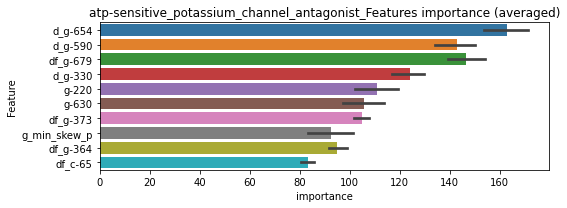

len(train_index) : 2859
len(valid_index) : 954
================================= fold 1/4 atp-sensitive_potassium_channel_antagonist=================================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.000171151	valid_1's binary_logloss: 0.000240067
Early stopping, best iteration is:
[1033]	training's binary_logloss: 0.000170533	valid_1's binary_logloss: 0.000239291


len(train_index) : 2860
len(valid_index) : 953
================================= fold 2/4 atp-sensitive_potassium_channel_antagonist=================================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.00016962	valid_1's binary_logloss: 0.000550244
Early stopping, best iteration is:
[1073]	training's binary_logloss: 0.000168828	valid_1's binary_logloss: 0.000548584


len(train_index) : 2860
len(valid_index) : 953
================================= fold 3/4 atp-sensitive_potassium_channel_antagonist=================================


Training until validation scores don't improve for 30 rounds


len(train_index) : 2860
len(valid_index) : 953


[1000]	training's binary_logloss: 0.000172401	valid_1's binary_logloss: 0.000179123
Early stopping, best iteration is:
[984]	training's binary_logloss: 0.000172401	valid_1's binary_logloss: 0.000179123


================================= fold 4/4 atp-sensitive_potassium_channel_antagonist=================================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.000170414	valid_1's binary_logloss: 0.000229335
Early stopping, best iteration is:
[997]	training's binary_logloss: 0.000170414	valid_1's binary_logloss: 0.000229335


atp-sensitive_potassium_channel_antagonist logloss: 0.0002991162721196393


neg labels: 3289 → selected neg labels: 3286


atp_synthase_inhibitor, len(trt): 12, len(othr): 3286
target_rate: 0.0005039 → Adj_target_rate: 0.0006942
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.000713523	valid_1's binary_logloss: 0.00166874
Early stopping, best iteration is:
[513]	training's binary_logloss: 0.00026928	valid_1's binary_logloss: 0.000825206
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.000701393	valid_1's binary_logloss: 0.00131542
Early stopping, best iteration is:
[527]	training's binary_logloss: 0.000265119	valid_1's binary_logloss: 0.000630921
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.000709318	valid_1's binary_logloss: 0.00116126
Early stopping, best iteration is:
[513]	training's binary_logloss: 0.000272466	valid_1's binary_logloss: 0.000495084
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.000714213	valid_1's binary_logloss: 0.00131337


1 / 3 AUC score:1.000
y_Threshold: 0.0012481, Threshold: 0.0074730, pos_neg_ratio: 0.8000000
Remove_noisy_data: 132 → Positive_corect_labels: 657/3811
p_label_rate: 0.0100452 Vs.target_rate: 0.00050
Num_p_label: 40.0, conf_0:0.00523, conf_1:0.00971
Num_p_label: 40.0, Expected: 2.0, Adj_threshold_1: 0.0074730
Num_p_label: 6.0, Expected: 2.0, Adj_threshold_2: 0.0474730
Num_p_label: 1.0, Expected: 2.0, Adj_threshold_3: 0.0874730
threshold: 0.0874730, positive_p_label: 1.0/3982, p_label_rate: 0.0002511


Early stopping, best iteration is:
[521]	training's binary_logloss: 0.000266706	valid_1's binary_logloss: 0.000574702


positive_y_label: 657.0/3811, y_label_rate: 0.1723957
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.000668034	valid_1's binary_logloss: 0.00160022
Early stopping, best iteration is:
[500]	training's binary_logloss: 0.000262249	valid_1's binary_logloss: 0.00076761
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.000660657	valid_1's binary_logloss: 0.00202678
Early stopping, best iteration is:
[518]	training's binary_logloss: 0.000254813	valid_1's binary_logloss: 0.00108428
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.000655415	valid_1's binary_logloss: 0.00090442
Early stopping, best iteration is:
[555]	training's binary_logloss: 0.000253711	valid_1's binary_logloss: 0.00037635
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.000662998	valid_1's binary_logloss: 0.00181764


2 / 3 AUC score:1.000
y_Threshold: 0.1364652, Threshold: 0.0874730, pos_neg_ratio: 0.8000000
Remove_noisy_data: 0 → Positive_corect_labels: 657.0/3811
p_label_rate: 0.0050226 Vs.target_rate: 0.00050
Num_p_label: 20.0, conf_0:0.06998, conf_1:0.10497
Num_p_label: 20.0, Expected: 2.0, Adj_threshold_1: 0.0874730
Num_p_label: 12.0, Expected: 2.0, Adj_threshold_2: 0.1274730
Num_p_label: 10.0, Expected: 2.0, Adj_threshold_3: 0.1674730
Num_p_label: 7.0, Expected: 2.0, Adj_threshold_4: 0.2074730
Num_p_label: 6.0, Expected: 2.0, Adj_threshold_5: 0.2474730
Num_p_label: 4.0, Expected: 2.0, Adj_threshold_6: 0.2874730


Early stopping, best iteration is:
[547]	training's binary_logloss: 0.00025214	valid_1's binary_logloss: 0.000937394


threshold: 0.2874730, positive_p_label: 4.0/3982, p_label_rate: 0.0010045
positive_y_label: 657.0/3811, y_label_rate: 0.1723957
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.000668034	valid_1's binary_logloss: 0.00160022
Early stopping, best iteration is:
[500]	training's binary_logloss: 0.000262249	valid_1's binary_logloss: 0.00076761
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.000660657	valid_1's binary_logloss: 0.00202678
Early stopping, best iteration is:
[519]	training's binary_logloss: 0.000254813	valid_1's binary_logloss: 0.00108428
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.000655415	valid_1's binary_logloss: 0.00090442
Early stopping, best iteration is:
[555]	training's binary_logloss: 0.000253711	valid_1's binary_logloss: 0.00037635
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.000662998	valid_1's binary_logloss: 0.00181764


3 / 3 AUC score:1.000
y_Threshold: 0.1364643, Threshold: 0.2874730, pos_neg_ratio: 0.8000000
Remove_noisy_data: 0 → Positive_corect_labels: 657.0/3811
p_label_rate: 0.0010045 Vs.target_rate: 0.00050
Num_p_label: 4.0, conf_0:0.25873, conf_1:0.31622
Num_p_label: 4.0, Expected: 2.0, Adj_threshold_1: 0.2874730
threshold: 0.2874730, positive_p_label: 4.0/3982, p_label_rate: 0.0010045


Early stopping, best iteration is:
[547]	training's binary_logloss: 0.00025214	valid_1's binary_logloss: 0.000937394


positive_y_label: 657.0/3811, y_label_rate: 0.1723957


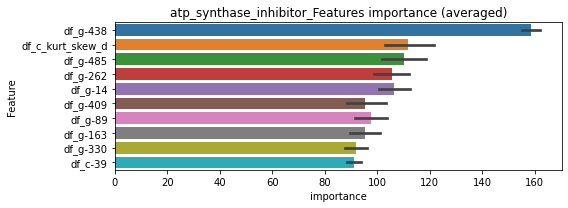

len(train_index) : 2858
len(valid_index) : 953
================================= fold 1/4 atp_synthase_inhibitor=================================


Training until validation scores don't improve for 30 rounds


len(train_index) : 2858
len(valid_index) : 953
================================= fold 2/4 atp_synthase_inhibitor=================================


Early stopping, best iteration is:
[869]	training's binary_logloss: 0.000260426	valid_1's binary_logloss: 0.000616732
Training until validation scores don't improve for 30 rounds


len(train_index) : 2858
len(valid_index) : 953
================================= fold 3/4 atp_synthase_inhibitor=================================


Early stopping, best iteration is:
[871]	training's binary_logloss: 0.000261792	valid_1's binary_logloss: 0.000597327
Training until validation scores don't improve for 30 rounds


len(train_index) : 2859
len(valid_index) : 952
================================= fold 4/4 atp_synthase_inhibitor=================================


Early stopping, best iteration is:
[874]	training's binary_logloss: 0.000263496	valid_1's binary_logloss: 0.000387997
Training until validation scores don't improve for 30 rounds


atp_synthase_inhibitor logloss: 0.0005752629894783721


Early stopping, best iteration is:
[932]	training's binary_logloss: 0.000258462	valid_1's binary_logloss: 0.000699096
neg labels: 3289 → selected neg labels: 3273


atpase_inhibitor, len(trt): 97, len(othr): 3273
target_rate: 0.0040732 → Adj_target_rate: 0.0041016
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00688086	valid_1's binary_logloss: 0.0845745
Early stopping, best iteration is:
[444]	training's binary_logloss: 0.00222508	valid_1's binary_logloss: 0.0785714
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00729072	valid_1's binary_logloss: 0.0616932
[600]	training's binary_logloss: 0.00115782	valid_1's binary_logloss: 0.0506515
Early stopping, best iteration is:
[726]	training's binary_logloss: 0.00083736	valid_1's binary_logloss: 0.0497766
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00681096	valid_1's binary_logloss: 0.0475086
[600]	training's binary_logloss: 0.00115085	valid_1's binary_logloss: 0.0364219
Early stopping, best iteration is:
[748]	training's binary_logloss: 0.00081118	valid_1's binary_logloss: 0.0355221
Training until validation scores don't improve for 30 rounds
[300]	train

1 / 3 AUC score:0.998
y_Threshold: 0.0104121, Threshold: 0.0300829, pos_neg_ratio: 0.8000000
Remove_noisy_data: 140 → Positive_corect_labels: 650/3787
p_label_rate: 0.0100452 Vs.target_rate: 0.00407
Num_p_label: 40.0, conf_0:0.02106, conf_1:0.03911
Num_p_label: 40.0, Expected: 16.2, Adj_threshold_1: 0.0300829
Num_p_label: 6.0, Expected: 16.2, Adj_threshold_2: 0.0700829
threshold: 0.0700829, positive_p_label: 6.0/3982, p_label_rate: 0.0015068
positive_y_label: 650.0/3787, y_label_rate: 0.1716398
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00607971	valid_1's binary_logloss: 0.0659729
Early stopping, best iteration is:
[457]	training's binary_logloss: 0.00188105	valid_1's binary_logloss: 0.0595654
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00648311	valid_1's binary_logloss: 0.0578433
[600]	training's binary_logloss: 0.0010848	valid_1's binary_logloss: 0.0456379
Early stopping, best iteration is:
[744]	training's binary_logloss: 0.000765664	valid_1's binary_logloss: 0.044817
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00640268	valid_1's binary_logloss: 0.0469081
Early stopping, best iteration is:
[509]	training's binary_logloss: 0.00155583	valid_1's binary_logloss: 0.0389159
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00648174	valid_1's binary_logloss: 0.0475214
[600]	traini

2 / 3 AUC score:0.999
y_Threshold: 0.0301413, Threshold: 0.0700829, pos_neg_ratio: 0.8000000
Remove_noisy_data: 20 → Positive_corect_labels: 640.0/3767
p_label_rate: 0.0037670 Vs.target_rate: 0.00407
Num_p_label: 15.0, conf_0:0.05607, conf_1:0.08410
threshold: 0.0700829, positive_p_label: 15.0/3982, p_label_rate: 0.0037670
positive_y_label: 640.0/3767, y_label_rate: 0.1698965
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00547829	valid_1's binary_logloss: 0.0571521
[600]	training's binary_logloss: 0.000986297	valid_1's binary_logloss: 0.0475693
Early stopping, best iteration is:
[592]	training's binary_logloss: 0.00101143	valid_1's binary_logloss: 0.0473007
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00622462	valid_1's binary_logloss: 0.0456079
[600]	training's binary_logloss: 0.00104514	valid_1's binary_logloss: 0.0320929
Early stopping, best iteration is:
[728]	training's binary_logloss: 0.000760015	valid_1's binary_logloss: 0.0305094
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00610784	valid_1's binary_logloss: 0.0368988
[600]	training's binary_logloss: 0.00105361	valid_1's binary_logloss: 0.0273026
Early stopping, best iteration is:
[754]	training's binary_logloss: 0.000741585	valid_1's binary_logloss:

3 / 3 AUC score:1.000
y_Threshold: 0.0348251, Threshold: 0.0700829, pos_neg_ratio: 0.8000000
Remove_noisy_data: 6 → Positive_corect_labels: 637.0/3761
p_label_rate: 0.0037670 Vs.target_rate: 0.00407
Num_p_label: 15.0, conf_0:0.06307, conf_1:0.07709
threshold: 0.0700829, positive_p_label: 15.0/3982, p_label_rate: 0.0037670
positive_y_label: 637.0/3761, y_label_rate: 0.1693698


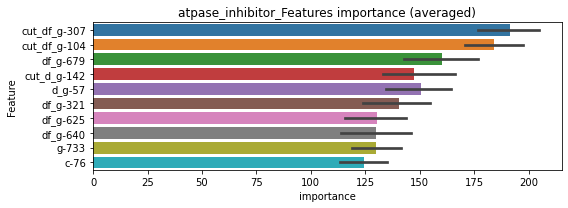

len(train_index) : 2820
len(valid_index) : 941
================================= fold 1/4 atpase_inhibitor=================================


Training until validation scores don't improve for 30 rounds


len(train_index) : 2821
len(valid_index) : 940
================================= fold 2/4 atpase_inhibitor=================================


Early stopping, best iteration is:
[358]	training's binary_logloss: 0.00178979	valid_1's binary_logloss: 0.0554144
Training until validation scores don't improve for 30 rounds


len(train_index) : 2821
len(valid_index) : 940
================================= fold 3/4 atpase_inhibitor=================================


Early stopping, best iteration is:
[436]	training's binary_logloss: 0.00146556	valid_1's binary_logloss: 0.0346972
Training until validation scores don't improve for 30 rounds


len(train_index) : 2821
len(valid_index) : 940
================================= fold 4/4 atpase_inhibitor=================================


Early stopping, best iteration is:
[372]	training's binary_logloss: 0.00174605	valid_1's binary_logloss: 0.035318
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[821]	training's binary_logloss: 0.000781136	valid_1's binary_logloss: 0.0237235


atpase_inhibitor logloss: 0.03729311009115741
atpase_inhibitor clipping


neg labels: 3289 → selected neg labels: 3287


atr_kinase_inhibitor, len(trt): 19, len(othr): 3287
target_rate: 0.0007979 → Adj_target_rate: 0.0010260
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00117492	valid_1's binary_logloss: 0.002305
[600]	training's binary_logloss: 0.000335847	valid_1's binary_logloss: 0.000839911
Early stopping, best iteration is:
[588]	training's binary_logloss: 0.000335847	valid_1's binary_logloss: 0.000839911
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00118587	valid_1's binary_logloss: 0.00378871
[600]	training's binary_logloss: 0.000325259	valid_1's binary_logloss: 0.00179764
Early stopping, best iteration is:
[591]	training's binary_logloss: 0.000325259	valid_1's binary_logloss: 0.00179763
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00119701	valid_1's binary_logloss: 0.00257411
[600]	training's binary_logloss: 0.000335073	valid_1's binary_logloss: 0.00100665
Early stopping, best iteration is:
[572]	training's binary_logloss: 0.000335073	valid_1's bina

1 / 3 AUC score:1.000
y_Threshold: 0.0018584, Threshold: 0.0085053, pos_neg_ratio: 0.8000000
Remove_noisy_data: 132 → Positive_corect_labels: 657/3812
p_label_rate: 0.0100452 Vs.target_rate: 0.00080
Num_p_label: 40.0, conf_0:0.00595, conf_1:0.01106
Num_p_label: 40.0, Expected: 3.2, Adj_threshold_1: 0.0085053
Num_p_label: 7.0, Expected: 3.2, Adj_threshold_2: 0.0485053


[600]	training's binary_logloss: 0.000329249	valid_1's binary_logloss: 0.00263334
Early stopping, best iteration is:
[583]	training's binary_logloss: 0.000329249	valid_1's binary_logloss: 0.00263334


threshold: 0.0485053, positive_p_label: 7.0/3982, p_label_rate: 0.0017579
positive_y_label: 657.0/3812, y_label_rate: 0.1723505
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.001133	valid_1's binary_logloss: 0.00210751
Early stopping, best iteration is:
[563]	training's binary_logloss: 0.000329302	valid_1's binary_logloss: 0.000785453
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00108264	valid_1's binary_logloss: 0.00381739
Early stopping, best iteration is:
[546]	training's binary_logloss: 0.000328052	valid_1's binary_logloss: 0.00203402
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00113355	valid_1's binary_logloss: 0.00174528
Early stopping, best iteration is:
[566]	training's binary_logloss: 0.00032836	valid_1's binary_logloss: 0.000585946
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00106246	valid_1's binary_logloss: 0.00574857


2 / 3 AUC score:1.000


[600]	training's binary_logloss: 0.00032119	valid_1's binary_logloss: 0.00369714
Early stopping, best iteration is:
[607]	training's binary_logloss: 0.00032119	valid_1's binary_logloss: 0.00369714


y_Threshold: 0.0557125, Threshold: 0.0485053, pos_neg_ratio: 0.8000000
Remove_noisy_data: 0 → Positive_corect_labels: 657.0/3812
p_label_rate: 0.0052737 Vs.target_rate: 0.00080
Num_p_label: 21.0, conf_0:0.03880, conf_1:0.05821
Num_p_label: 21.0, Expected: 3.2, Adj_threshold_1: 0.0485053
Num_p_label: 11.0, Expected: 3.2, Adj_threshold_2: 0.0885053
Num_p_label: 10.0, Expected: 3.2, Adj_threshold_3: 0.1285053
Num_p_label: 8.0, Expected: 3.2, Adj_threshold_4: 0.1685053
Num_p_label: 7.0, Expected: 3.2, Adj_threshold_5: 0.2085053
threshold: 0.2085053, positive_p_label: 7.0/3982, p_label_rate: 0.0017579
positive_y_label: 657.0/3812, y_label_rate: 0.1723505
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.001133	valid_1's binary_logloss: 0.00210751
Early stopping, best iteration is:
[563]	training's binary_logloss: 0.000329302	valid_1's binary_logloss: 0.000785453
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00108264	valid_1's binary_logloss: 0.00381739
Early stopping, best iteration is:
[546]	training's binary_logloss: 0.000328052	valid_1's binary_logloss: 0.00203402
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00113355	valid_1's binary_logloss: 0.00174528
Early stopping, best iteration is:
[566]	training's binary_logloss: 0.00032836	valid_1's binary_logloss: 0.000585946
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00106246	valid_1's binary_logloss: 0.00574857


3 / 3 AUC score:1.000
y_Threshold: 0.0557125, Threshold: 0.2085053, pos_neg_ratio: 0.8000000


[600]	training's binary_logloss: 0.00032119	valid_1's binary_logloss: 0.00369714
Early stopping, best iteration is:
[598]	training's binary_logloss: 0.00032119	valid_1's binary_logloss: 0.00369714


Remove_noisy_data: 0 → Positive_corect_labels: 657.0/3812
p_label_rate: 0.0017579 Vs.target_rate: 0.00080
Num_p_label: 7.0, conf_0:0.18765, conf_1:0.22936
Num_p_label: 7.0, Expected: 3.2, Adj_threshold_1: 0.2085053
threshold: 0.2085053, positive_p_label: 7.0/3982, p_label_rate: 0.0017579
positive_y_label: 657.0/3812, y_label_rate: 0.1723505


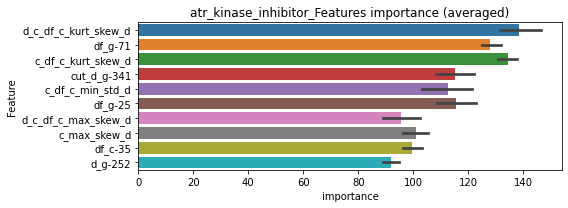

len(train_index) : 2859
len(valid_index) : 953
================================= fold 1/4 atr_kinase_inhibitor=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[919]	training's binary_logloss: 0.000326815	valid_1's binary_logloss: 0.000811281


len(train_index) : 2859
len(valid_index) : 953
================================= fold 2/4 atr_kinase_inhibitor=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[873]	training's binary_logloss: 0.00032323	valid_1's binary_logloss: 0.00177849


len(train_index) : 2859
len(valid_index) : 953
================================= fold 3/4 atr_kinase_inhibitor=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[842]	training's binary_logloss: 0.000332543	valid_1's binary_logloss: 0.000583515


len(train_index) : 2859
len(valid_index) : 953
================================= fold 4/4 atr_kinase_inhibitor=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[804]	training's binary_logloss: 0.000331188	valid_1's binary_logloss: 0.00192879


atr_kinase_inhibitor logloss: 0.0012755532302975033


neg labels: 3289 → selected neg labels: 3271


aurora_kinase_inhibitor, len(trt): 96, len(othr): 3271
target_rate: 0.0040312 → Adj_target_rate: 0.0040656
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00921262	valid_1's binary_logloss: 0.0765309
Early stopping, best iteration is:
[527]	training's binary_logloss: 0.00171027	valid_1's binary_logloss: 0.0663264
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00875471	valid_1's binary_logloss: 0.0492485
[600]	training's binary_logloss: 0.00129032	valid_1's binary_logloss: 0.0284265
[900]	training's binary_logloss: 0.000702428	valid_1's binary_logloss: 0.026008
Early stopping, best iteration is:
[901]	training's binary_logloss: 0.000701898	valid_1's binary_logloss: 0.0259803
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00891298	valid_1's binary_logloss: 0.0552965
[600]	training's binary_logloss: 0.00129529	valid_1's binary_logloss: 0.0423292
Early stopping, best iteration is:
[658]	training's binary_logloss: 0.00108758	valid_1's binary_logloss: 0

1 / 3 AUC score:0.996
y_Threshold: 0.0134022, Threshold: 0.0743708, pos_neg_ratio: 0.8000000
Remove_noisy_data: 149 → Positive_corect_labels: 645/3776
p_label_rate: 0.0100452 Vs.target_rate: 0.00403


Early stopping, best iteration is:
[427]	training's binary_logloss: 0.00295137	valid_1's binary_logloss: 0.0682118


Num_p_label: 40.0, conf_0:0.05206, conf_1:0.09668
Num_p_label: 40.0, Expected: 16.1, Adj_threshold_1: 0.0743708
Num_p_label: 28.0, Expected: 16.1, Adj_threshold_2: 0.1143708
Num_p_label: 23.0, Expected: 16.1, Adj_threshold_3: 0.1543708
threshold: 0.1543708, positive_p_label: 23.0/3982, p_label_rate: 0.0057760
positive_y_label: 645.0/3776, y_label_rate: 0.1708157
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00759988	valid_1's binary_logloss: 0.0566522
[600]	training's binary_logloss: 0.00118071	valid_1's binary_logloss: 0.044547
Early stopping, best iteration is:
[737]	training's binary_logloss: 0.000828734	valid_1's binary_logloss: 0.0437376
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00730319	valid_1's binary_logloss: 0.0550048
[600]	training's binary_logloss: 0.0011528	valid_1's binary_logloss: 0.041574
Early stopping, best iteration is:
[681]	training's binary_logloss: 0.000916724	valid_1's binary_logloss: 0.0408148
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00751834	valid_1's binary_logloss: 0.0518739
[600]	training's binary_logloss: 0.00118676	valid_1's binary_logloss: 0.0433923
Early stopping, best iteration is:
[581]	training's binary_logloss: 0.00126584	valid_1's binary_logloss: 0.0

2 / 3 AUC score:0.999
y_Threshold: 0.0321932, Threshold: 0.1543708, pos_neg_ratio: 0.8000000
Remove_noisy_data: 24 → Positive_corect_labels: 633.0/3752
p_label_rate: 0.0082873 Vs.target_rate: 0.00403
Num_p_label: 33.0, conf_0:0.12350, conf_1:0.18524
Num_p_label: 33.0, Expected: 16.1, Adj_threshold_1: 0.1543708
Num_p_label: 24.0, Expected: 16.1, Adj_threshold_2: 0.1943708
threshold: 0.1943708, positive_p_label: 24.0/3982, p_label_rate: 0.0060271
positive_y_label: 633.0/3752, y_label_rate: 0.1687100
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00693067	valid_1's binary_logloss: 0.0557221
[600]	training's binary_logloss: 0.0010889	valid_1's binary_logloss: 0.0433839
Early stopping, best iteration is:
[684]	training's binary_logloss: 0.000870247	valid_1's binary_logloss: 0.0427094
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00687976	valid_1's binary_logloss: 0.0593523
[600]	training's binary_logloss: 0.00110605	valid_1's binary_logloss: 0.0488776
Early stopping, best iteration is:
[720]	training's binary_logloss: 0.000813022	valid_1's binary_logloss: 0.0483023
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00719647	valid_1's binary_logloss: 0.0366702
[600]	training's binary_logloss: 0.00113638	valid_1's binary_logloss: 0.0209223
[900]	training's binary_logloss: 0.000655518	valid_1's binary_logloss: 0.0187259
Early stopping, best iter

3 / 3 AUC score:0.999
y_Threshold: 0.0284369, Threshold: 0.1943708, pos_neg_ratio: 0.8000000
Remove_noisy_data: 16 → Positive_corect_labels: 625.0/3736
p_label_rate: 0.0055249 Vs.target_rate: 0.00403
Num_p_label: 22.0, conf_0:0.17493, conf_1:0.21381
threshold: 0.1943708, positive_p_label: 22.0/3982, p_label_rate: 0.0055249
positive_y_label: 625.0/3736, y_label_rate: 0.1672912


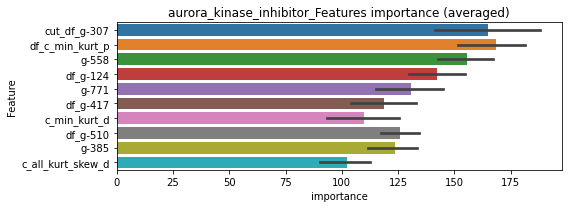

len(train_index) : 2802
len(valid_index) : 934
================================= fold 1/4 aurora_kinase_inhibitor=================================


Training until validation scores don't improve for 30 rounds


len(train_index) : 2802
len(valid_index) : 934
================================= fold 2/4 aurora_kinase_inhibitor=================================


Early stopping, best iteration is:
[448]	training's binary_logloss: 0.00143246	valid_1's binary_logloss: 0.0311289
Training until validation scores don't improve for 30 rounds


len(train_index) : 2802
len(valid_index) : 934
================================= fold 3/4 aurora_kinase_inhibitor=================================


Early stopping, best iteration is:
[331]	training's binary_logloss: 0.00202334	valid_1's binary_logloss: 0.0479756
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[893]	training's binary_logloss: 0.000747586	valid_1's binary_logloss: 0.0197869


len(train_index) : 2802
len(valid_index) : 934
================================= fold 4/4 aurora_kinase_inhibitor=================================


Training until validation scores don't improve for 30 rounds


aurora_kinase_inhibitor logloss: 0.03371380675764283
aurora_kinase_inhibitor clipping


Early stopping, best iteration is:
[449]	training's binary_logloss: 0.00140428	valid_1's binary_logloss: 0.0359639
neg labels: 3289 → selected neg labels: 3287


autotaxin_inhibitor, len(trt): 6, len(othr): 3287
target_rate: 0.0002520 → Adj_target_rate: 0.0003851
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.000339147	valid_1's binary_logloss: 0.000487933
Early stopping, best iteration is:
[499]	training's binary_logloss: 0.000167699	valid_1's binary_logloss: 0.000265992
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.000328496	valid_1's binary_logloss: 0.000655217
Early stopping, best iteration is:
[507]	training's binary_logloss: 0.00016409	valid_1's binary_logloss: 0.000395388
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.000334255	valid_1's binary_logloss: 0.000456681
Early stopping, best iteration is:
[490]	training's binary_logloss: 0.000165703	valid_1's binary_logloss: 0.000249611
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.000333729	valid_1's binary_logloss: 0.00040876


1 / 3 AUC score:1.000
y_Threshold: 0.0005927, Threshold: 0.0058503, pos_neg_ratio: 0.8000000
Remove_noisy_data: 132 → Positive_corect_labels: 657/3812
p_label_rate: 0.0100452 Vs.target_rate: 0.00025
Num_p_label: 40.0, conf_0:0.00410, conf_1:0.00761
Num_p_label: 40.0, Expected: 1.0, Adj_threshold_1: 0.0058503
Num_p_label: 7.0, Expected: 1.0, Adj_threshold_2: 0.0458503
Num_p_label: 0.0, Expected: 1.0, Adj_threshold_3: 0.0858503
threshold: 0.0858503, positive_p_label: 0.0/3982, p_label_rate: 0.0000000


Early stopping, best iteration is:
[491]	training's binary_logloss: 0.000167174	valid_1's binary_logloss: 0.000213727


positive_y_label: 657.0/3812, y_label_rate: 0.1723505
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.000300316	valid_1's binary_logloss: 0.00290092
Early stopping, best iteration is:
[539]	training's binary_logloss: 0.000147114	valid_1's binary_logloss: 0.00232691
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.000299262	valid_1's binary_logloss: 0.000402818
Early stopping, best iteration is:
[510]	training's binary_logloss: 0.000147788	valid_1's binary_logloss: 0.000210101
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.000297921	valid_1's binary_logloss: 0.000370452
Early stopping, best iteration is:
[519]	training's binary_logloss: 0.00014787	valid_1's binary_logloss: 0.000188308
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.000301673	valid_1's binary_logloss: 0.00034743


2 / 3 AUC score:1.000
y_Threshold: 0.0471510, Threshold: 0.0858503, pos_neg_ratio: 0.8000000
Remove_noisy_data: 0 → Positive_corect_labels: 657.0/3812
p_label_rate: 0.0095429 Vs.target_rate: 0.00025
Num_p_label: 38.0, conf_0:0.06868, conf_1:0.10302
Num_p_label: 38.0, Expected: 1.0, Adj_threshold_1: 0.0858503
Num_p_label: 35.0, Expected: 1.0, Adj_threshold_2: 0.1258503
Num_p_label: 30.0, Expected: 1.0, Adj_threshold_3: 0.1658503
Num_p_label: 24.0, Expected: 1.0, Adj_threshold_4: 0.2058503


Early stopping, best iteration is:
[553]	training's binary_logloss: 0.000147677	valid_1's binary_logloss: 0.000174892


Num_p_label: 21.0, Expected: 1.0, Adj_threshold_5: 0.2458503
Num_p_label: 18.0, Expected: 1.0, Adj_threshold_6: 0.2858503
Num_p_label: 17.0, Expected: 1.0, Adj_threshold_7: 0.3258503
Num_p_label: 15.0, Expected: 1.0, Adj_threshold_8: 0.3658503
Num_p_label: 14.0, Expected: 1.0, Adj_threshold_9: 0.4058503
Num_p_label: 10.0, Expected: 1.0, Adj_threshold_10: 0.4458503
threshold: 0.4858503, positive_p_label: 10.0/3982, p_label_rate: 0.0025113
positive_y_label: 657.0/3812, y_label_rate: 0.1723505
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.000300316	valid_1's binary_logloss: 0.00290092
Early stopping, best iteration is:
[539]	training's binary_logloss: 0.000147114	valid_1's binary_logloss: 0.00232691
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.000299262	valid_1's binary_logloss: 0.000402818
Early stopping, best iteration is:
[510]	training's binary_logloss: 0.000147788	valid_1's binary_logloss: 0.000210101
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.000297921	valid_1's binary_logloss: 0.000370452
Early stopping, best iteration is:
[519]	training's binary_logloss: 0.00014787	valid_1's binary_logloss: 0.000188308
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.000301673	valid_1's binary_logloss: 0.00034743


3 / 3 AUC score:1.000
y_Threshold: 0.0471510, Threshold: 0.4858503, pos_neg_ratio: 0.8000000
Remove_noisy_data: 0 → Positive_corect_labels: 657.0/3812
p_label_rate: 0.0025113 Vs.target_rate: 0.00025
Num_p_label: 10.0, conf_0:0.43727, conf_1:0.53444
Num_p_label: 10.0, Expected: 1.0, Adj_threshold_1: 0.4858503
Num_p_label: 9.0, Expected: 1.0, Adj_threshold_2: 0.5258503
Num_p_label: 6.0, Expected: 1.0, Adj_threshold_3: 0.5658503
Num_p_label: 5.0, Expected: 1.0, Adj_threshold_4: 0.6058503
Num_p_label: 3.0, Expected: 1.0, Adj_threshold_5: 0.6458503
Num_p_label: 3.0, Expected: 1.0, Adj_threshold_6: 0.6858503
Num_p_label: 3.0, Expected: 1.0, Adj_threshold_7: 0.7258503
Num_p_label: 1.0, Expected: 1.0, Adj_threshold_8: 0.7658503


Early stopping, best iteration is:
[555]	training's binary_logloss: 0.000147677	valid_1's binary_logloss: 0.000174892


threshold: 0.7658503, positive_p_label: 1.0/3982, p_label_rate: 0.0002511
positive_y_label: 657.0/3812, y_label_rate: 0.1723505


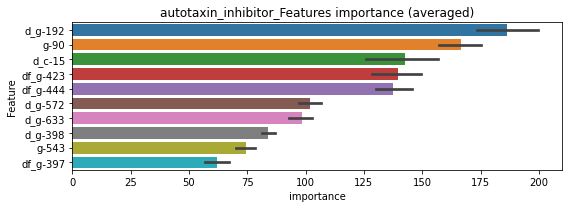

len(train_index) : 2859
len(valid_index) : 953
================================= fold 1/4 autotaxin_inhibitor=================================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.000152972	valid_1's binary_logloss: 0.00118902


len(train_index) : 2859
len(valid_index) : 953
================================= fold 2/4 autotaxin_inhibitor=================================


Early stopping, best iteration is:
[1134]	training's binary_logloss: 0.00014994	valid_1's binary_logloss: 0.00118174
Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.00015193	valid_1's binary_logloss: 0.000200064


len(train_index) : 2859
len(valid_index) : 953
================================= fold 3/4 autotaxin_inhibitor=================================


Early stopping, best iteration is:
[1145]	training's binary_logloss: 0.000149185	valid_1's binary_logloss: 0.000196661
Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.00015252	valid_1's binary_logloss: 0.000236389


len(train_index) : 2859
len(valid_index) : 953
================================= fold 4/4 autotaxin_inhibitor=================================


Early stopping, best iteration is:
[1192]	training's binary_logloss: 0.000149013	valid_1's binary_logloss: 0.000231177
Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.000152953	valid_1's binary_logloss: 0.000187099
Early stopping, best iteration is:
[1018]	training's binary_logloss: 0.000152577	valid_1's binary_logloss: 0.000186646


autotaxin_inhibitor logloss: 0.0004490998872998764


neg labels: 3289 → selected neg labels: 3277


bacterial_30s_ribosomal_subunit_inhibitor, len(trt): 60, len(othr): 3277
target_rate: 0.0025195 → Adj_target_rate: 0.0027266
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00420457	valid_1's binary_logloss: 0.0375143
Early stopping, best iteration is:
[566]	training's binary_logloss: 0.000821576	valid_1's binary_logloss: 0.0300147
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00438039	valid_1's binary_logloss: 0.021775
[600]	training's binary_logloss: 0.000760623	valid_1's binary_logloss: 0.0129562
Early stopping, best iteration is:
[737]	training's binary_logloss: 0.000576514	valid_1's binary_logloss: 0.0123778
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00451568	valid_1's binary_logloss: 0.0270831
[600]	training's binary_logloss: 0.000764825	valid_1's binary_logloss: 0.0190223
Early stopping, best iteration is:
[596]	training's binary_logloss: 0.000774184	valid_1's binary_logloss: 0.0190116
Training until validation scores don't improve for 30 rounds
[300]	t

1 / 3 AUC score:1.000
y_Threshold: 0.0074292, Threshold: 0.0225003, pos_neg_ratio: 0.8000000
Remove_noisy_data: 134 → Positive_corect_labels: 654/3798
p_label_rate: 0.0100452 Vs.target_rate: 0.00252
Num_p_label: 40.0, conf_0:0.01575, conf_1:0.02925
Num_p_label: 40.0, Expected: 10.0, Adj_threshold_1: 0.0225003
Num_p_label: 13.0, Expected: 10.0, Adj_threshold_2: 0.0625003
threshold: 0.0625003, positive_p_label: 13.0/3982, p_label_rate: 0.0032647
positive_y_label: 654.0/3798, y_label_rate: 0.1721959
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0038862	valid_1's binary_logloss: 0.0340126
[600]	training's binary_logloss: 0.000707215	valid_1's binary_logloss: 0.0267228
Early stopping, best iteration is:
[590]	training's binary_logloss: 0.000726262	valid_1's binary_logloss: 0.026622
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00395108	valid_1's binary_logloss: 0.0287158
Early stopping, best iteration is:
[559]	training's binary_logloss: 0.000819596	valid_1's binary_logloss: 0.0232357
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00380261	valid_1's binary_logloss: 0.0281634
[600]	training's binary_logloss: 0.000713288	valid_1's binary_logloss: 0.0208079
Early stopping, best iteration is:
[639]	training's binary_logloss: 0.000645704	valid_1's binary_logloss: 0.0204951
Training until validation scores don't improve for 30 rounds
[300]	tr

2 / 3 AUC score:0.999
y_Threshold: 0.0341876, Threshold: 0.0625003, pos_neg_ratio: 0.8000000
Remove_noisy_data: 14 → Positive_corect_labels: 647.0/3784
p_label_rate: 0.0092918 Vs.target_rate: 0.00252
Num_p_label: 37.0, conf_0:0.05000, conf_1:0.07500
Num_p_label: 37.0, Expected: 10.0, Adj_threshold_1: 0.0625003
Num_p_label: 25.0, Expected: 10.0, Adj_threshold_2: 0.1025003
Num_p_label: 19.0, Expected: 10.0, Adj_threshold_3: 0.1425003


Early stopping, best iteration is:
[360]	training's binary_logloss: 0.0021595	valid_1's binary_logloss: 0.0392342


Num_p_label: 12.0, Expected: 10.0, Adj_threshold_4: 0.1825003
threshold: 0.1825003, positive_p_label: 12.0/3982, p_label_rate: 0.0030136
positive_y_label: 647.0/3784, y_label_rate: 0.1709831
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00368321	valid_1's binary_logloss: 0.0246185
[600]	training's binary_logloss: 0.000691569	valid_1's binary_logloss: 0.0172461
Early stopping, best iteration is:
[628]	training's binary_logloss: 0.000643704	valid_1's binary_logloss: 0.0170916
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00351219	valid_1's binary_logloss: 0.0240797
[600]	training's binary_logloss: 0.000675163	valid_1's binary_logloss: 0.0172139
Early stopping, best iteration is:
[746]	training's binary_logloss: 0.000525079	valid_1's binary_logloss: 0.0167879
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00376968	valid_1's binary_logloss: 0.0205815
[600]	training's binary_logloss: 0.000694175	valid_1's binary_logloss: 0.0137808
Early stopping, best iteration is:
[709]	training's binary_logloss: 0.000556464	valid_1's binary_loglo

3 / 3 AUC score:1.000
y_Threshold: 0.0305097, Threshold: 0.1825003, pos_neg_ratio: 0.8000000
Remove_noisy_data: 4 → Positive_corect_labels: 645.0/3780
p_label_rate: 0.0025113 Vs.target_rate: 0.00252
Num_p_label: 10.0, conf_0:0.16425, conf_1:0.20075
threshold: 0.1825003, positive_p_label: 10.0/3982, p_label_rate: 0.0025113
positive_y_label: 645.0/3780, y_label_rate: 0.1706349


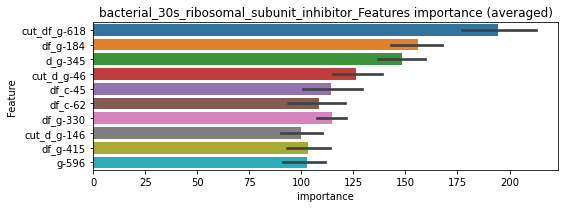

len(train_index) : 2835
len(valid_index) : 945
================================= fold 1/4 bacterial_30s_ribosomal_subunit_inhibitor=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[871]	training's binary_logloss: 0.000566293	valid_1's binary_logloss: 0.0187746


len(train_index) : 2835
len(valid_index) : 945
================================= fold 2/4 bacterial_30s_ribosomal_subunit_inhibitor=================================


Training until validation scores don't improve for 30 rounds


len(train_index) : 2835
len(valid_index) : 945
================================= fold 3/4 bacterial_30s_ribosomal_subunit_inhibitor=================================


Early stopping, best iteration is:
[543]	training's binary_logloss: 0.000834453	valid_1's binary_logloss: 0.0162228
Training until validation scores don't improve for 30 rounds


len(train_index) : 2835
len(valid_index) : 945
================================= fold 4/4 bacterial_30s_ribosomal_subunit_inhibitor=================================


Early stopping, best iteration is:
[549]	training's binary_logloss: 0.00082751	valid_1's binary_logloss: 0.0178895
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[743]	training's binary_logloss: 0.000627752	valid_1's binary_logloss: 0.015864


bacterial_30s_ribosomal_subunit_inhibitor logloss: 0.01718770358114732


neg labels: 3289 → selected neg labels: 3277


bacterial_50s_ribosomal_subunit_inhibitor, len(trt): 80, len(othr): 3277
target_rate: 0.0033594 → Adj_target_rate: 0.0034820
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00561024	valid_1's binary_logloss: 0.0538782
[600]	training's binary_logloss: 0.000957264	valid_1's binary_logloss: 0.0420944
Early stopping, best iteration is:
[698]	training's binary_logloss: 0.000749078	valid_1's binary_logloss: 0.0416563
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00590272	valid_1's binary_logloss: 0.0373792
[600]	training's binary_logloss: 0.000996578	valid_1's binary_logloss: 0.0282332
Early stopping, best iteration is:
[581]	training's binary_logloss: 0.00105818	valid_1's binary_logloss: 0.0281838
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00557007	valid_1's binary_logloss: 0.0470369
Early stopping, best iteration is:
[520]	training's binary_logloss: 0.00129033	valid_1's binary_logloss: 0.0414705
Training until validation scores don't improve for 30 rounds
[300]	tr

1 / 3 AUC score:0.999
y_Threshold: 0.0096231, Threshold: 0.0275974, pos_neg_ratio: 0.8000000
Remove_noisy_data: 136 → Positive_corect_labels: 653/3796
p_label_rate: 0.0100452 Vs.target_rate: 0.00336
Num_p_label: 40.0, conf_0:0.01932, conf_1:0.03588
Num_p_label: 40.0, Expected: 13.4, Adj_threshold_1: 0.0275974
Num_p_label: 8.0, Expected: 13.4, Adj_threshold_2: 0.0675974
threshold: 0.0675974, positive_p_label: 8.0/3982, p_label_rate: 0.0020090
positive_y_label: 653.0/3796, y_label_rate: 0.1720232
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00461506	valid_1's binary_logloss: 0.0466962
[600]	training's binary_logloss: 0.000878116	valid_1's binary_logloss: 0.0373751
Early stopping, best iteration is:
[686]	training's binary_logloss: 0.000714141	valid_1's binary_logloss: 0.0368494
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00505593	valid_1's binary_logloss: 0.0395553
[600]	training's binary_logloss: 0.000918871	valid_1's binary_logloss: 0.0294471
Early stopping, best iteration is:
[674]	training's binary_logloss: 0.000759527	valid_1's binary_logloss: 0.0288201
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00485898	valid_1's binary_logloss: 0.0455491
[600]	training's binary_logloss: 0.00089129	valid_1's binary_logloss: 0.0368841
Early stopping, best iteration is:
[572]	training's binary_logloss: 0.00097118	valid_1's binary_logloss

2 / 3 AUC score:1.000
y_Threshold: 0.0342420, Threshold: 0.0675974, pos_neg_ratio: 0.8000000
Remove_noisy_data: 12 → Positive_corect_labels: 647.0/3784
p_label_rate: 0.0077850 Vs.target_rate: 0.00336
Num_p_label: 31.0, conf_0:0.05408, conf_1:0.08112
Num_p_label: 31.0, Expected: 13.4, Adj_threshold_1: 0.0675974
Num_p_label: 18.0, Expected: 13.4, Adj_threshold_2: 0.1075974
threshold: 0.1075974, positive_p_label: 18.0/3982, p_label_rate: 0.0045203
positive_y_label: 647.0/3784, y_label_rate: 0.1709831
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00467667	valid_1's binary_logloss: 0.0311463
[600]	training's binary_logloss: 0.000881352	valid_1's binary_logloss: 0.0204159
Early stopping, best iteration is:
[789]	training's binary_logloss: 0.000611167	valid_1's binary_logloss: 0.0194563
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00473511	valid_1's binary_logloss: 0.0340139
[600]	training's binary_logloss: 0.000877707	valid_1's binary_logloss: 0.0239314
Early stopping, best iteration is:
[769]	training's binary_logloss: 0.000618072	valid_1's binary_logloss: 0.0228323
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00465137	valid_1's binary_logloss: 0.0365007
[600]	training's binary_logloss: 0.000872721	valid_1's binary_logloss: 0.0287543
Early stopping, best iteration is:
[577]	training's binary_logloss: 0.000931695	valid_1's binary_loglo

3 / 3 AUC score:1.000
y_Threshold: 0.0320658, Threshold: 0.1075974, pos_neg_ratio: 0.8000000
Remove_noisy_data: 4 → Positive_corect_labels: 645.0/3780
p_label_rate: 0.0047715 Vs.target_rate: 0.00336
Num_p_label: 19.0, conf_0:0.09684, conf_1:0.11836
threshold: 0.1075974, positive_p_label: 19.0/3982, p_label_rate: 0.0047715
positive_y_label: 645.0/3780, y_label_rate: 0.1706349


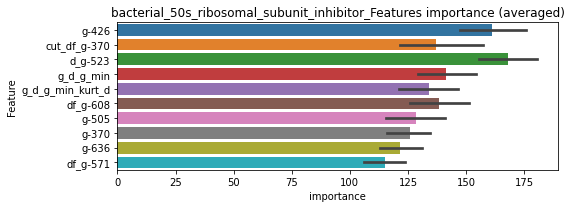

len(train_index) : 2835
len(valid_index) : 945
================================= fold 1/4 bacterial_50s_ribosomal_subunit_inhibitor=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[885]	training's binary_logloss: 0.000665621	valid_1's binary_logloss: 0.0222894


len(train_index) : 2835
len(valid_index) : 945
================================= fold 2/4 bacterial_50s_ribosomal_subunit_inhibitor=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[635]	training's binary_logloss: 0.000880012	valid_1's binary_logloss: 0.0234976


len(train_index) : 2835
len(valid_index) : 945
================================= fold 3/4 bacterial_50s_ribosomal_subunit_inhibitor=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[700]	training's binary_logloss: 0.000806164	valid_1's binary_logloss: 0.0257079


len(train_index) : 2835
len(valid_index) : 945
================================= fold 4/4 bacterial_50s_ribosomal_subunit_inhibitor=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[585]	training's binary_logloss: 0.000952032	valid_1's binary_logloss: 0.0276992


bacterial_50s_ribosomal_subunit_inhibitor logloss: 0.024798518200964407
bacterial_50s_ribosomal_subunit_inhibitor clipping


neg labels: 3289 → selected neg labels: 3286


bacterial_antifolate, len(trt): 36, len(othr): 3286
target_rate: 0.0015117 → Adj_target_rate: 0.0017663
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00211072	valid_1's binary_logloss: 0.0107775
[600]	training's binary_logloss: 0.000458948	valid_1's binary_logloss: 0.00656236
Early stopping, best iteration is:
[647]	training's binary_logloss: 0.000434617	valid_1's binary_logloss: 0.00648386
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00209657	valid_1's binary_logloss: 0.0154121
[600]	training's binary_logloss: 0.000456042	valid_1's binary_logloss: 0.00952678
Early stopping, best iteration is:
[600]	training's binary_logloss: 0.000456042	valid_1's binary_logloss: 0.00952678
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00209404	valid_1's binary_logloss: 0.00686846
[600]	training's binary_logloss: 0.000467616	valid_1's binary_logloss: 0.00342042
Early stopping, best iteration is:
[657]	training's binary_logloss: 0.000438629	valid_1's binary

1 / 3 AUC score:1.000
y_Threshold: 0.0027690, Threshold: 0.0187657, pos_neg_ratio: 0.8000000
Remove_noisy_data: 132 → Positive_corect_labels: 657/3811
p_label_rate: 0.0100452 Vs.target_rate: 0.00151
Num_p_label: 40.0, conf_0:0.01314, conf_1:0.02440
Num_p_label: 40.0, Expected: 6.0, Adj_threshold_1: 0.0187657
Num_p_label: 14.0, Expected: 6.0, Adj_threshold_2: 0.0587657
threshold: 0.0587657, positive_p_label: 14.0/3982, p_label_rate: 0.0035158
positive_y_label: 657.0/3811, y_label_rate: 0.1723957
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00190151	valid_1's binary_logloss: 0.00939543
[600]	training's binary_logloss: 0.000437218	valid_1's binary_logloss: 0.00551327
Early stopping, best iteration is:
[609]	training's binary_logloss: 0.000431463	valid_1's binary_logloss: 0.00548768
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00191087	valid_1's binary_logloss: 0.0150596
[600]	training's binary_logloss: 0.000435377	valid_1's binary_logloss: 0.00974382
Early stopping, best iteration is:
[601]	training's binary_logloss: 0.000434568	valid_1's binary_logloss: 0.0097382
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00198839	valid_1's binary_logloss: 0.00584021
[600]	training's binary_logloss: 0.000448876	valid_1's binary_logloss: 0.00249964
Early stopping, best iteration is:
[623]	training's binary_logloss: 0.00043473	valid_1's binary_

2 / 3 AUC score:1.000
y_Threshold: 0.0604916, Threshold: 0.0587657, pos_neg_ratio: 0.8000000
Remove_noisy_data: 0 → Positive_corect_labels: 657.0/3811
p_label_rate: 0.0120542 Vs.target_rate: 0.00151
Num_p_label: 48.0, conf_0:0.04701, conf_1:0.07052
Num_p_label: 48.0, Expected: 6.0, Adj_threshold_1: 0.0587657
Num_p_label: 41.0, Expected: 6.0, Adj_threshold_2: 0.0987657
Num_p_label: 35.0, Expected: 6.0, Adj_threshold_3: 0.1387657
Num_p_label: 33.0, Expected: 6.0, Adj_threshold_4: 0.1787657
Num_p_label: 32.0, Expected: 6.0, Adj_threshold_5: 0.2187657
Num_p_label: 28.0, Expected: 6.0, Adj_threshold_6: 0.2587657
Num_p_label: 27.0, Expected: 6.0, Adj_threshold_7: 0.2987657
Num_p_label: 25.0, Expected: 6.0, Adj_threshold_8: 0.3387657
Num_p_label: 23.0, Expected: 6.0, Adj_threshold_9: 0.3787657
Num_p_label: 21.0, Expected: 6.0, Adj_threshold_10: 0.4187657
threshold: 0.4587657, positive_p_label: 19.0/3982, p_label_rate: 0.0047715
positive_y_label: 657.0/3811, y_label_rate: 0.1723957
===========

Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00190151	valid_1's binary_logloss: 0.00939543
[600]	training's binary_logloss: 0.000437218	valid_1's binary_logloss: 0.00551327
Early stopping, best iteration is:
[609]	training's binary_logloss: 0.000431463	valid_1's binary_logloss: 0.00548768
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00191087	valid_1's binary_logloss: 0.0150596
[600]	training's binary_logloss: 0.000435377	valid_1's binary_logloss: 0.00974382
Early stopping, best iteration is:
[601]	training's binary_logloss: 0.000434568	valid_1's binary_logloss: 0.0097382
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00198839	valid_1's binary_logloss: 0.00584021
[600]	training's binary_logloss: 0.000448876	valid_1's binary_logloss: 0.00249964
Early stopping, best iteration is:
[623]	training's binary_logloss: 0.00043473	valid_1's binary_

3 / 3 AUC score:1.000
y_Threshold: 0.0604916, Threshold: 0.4587657, pos_neg_ratio: 0.8000000
Remove_noisy_data: 0 → Positive_corect_labels: 657.0/3811
p_label_rate: 0.0047715 Vs.target_rate: 0.00151
Num_p_label: 19.0, conf_0:0.41289, conf_1:0.50464
Num_p_label: 19.0, Expected: 6.0, Adj_threshold_1: 0.4587657
Num_p_label: 19.0, Expected: 6.0, Adj_threshold_2: 0.4987657
Num_p_label: 17.0, Expected: 6.0, Adj_threshold_3: 0.5387657
Num_p_label: 15.0, Expected: 6.0, Adj_threshold_4: 0.5787657
threshold: 0.5787657, positive_p_label: 15.0/3982, p_label_rate: 0.0037670
positive_y_label: 657.0/3811, y_label_rate: 0.1723957


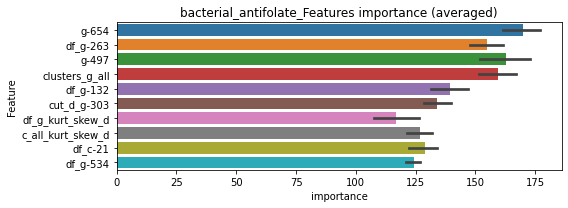

len(train_index) : 2858
len(valid_index) : 953
================================= fold 1/4 bacterial_antifolate=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[879]	training's binary_logloss: 0.000430237	valid_1's binary_logloss: 0.0042891


len(train_index) : 2858
len(valid_index) : 953
================================= fold 2/4 bacterial_antifolate=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[915]	training's binary_logloss: 0.000419204	valid_1's binary_logloss: 0.00732308


len(train_index) : 2858
len(valid_index) : 953
================================= fold 3/4 bacterial_antifolate=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[776]	training's binary_logloss: 0.000460082	valid_1's binary_logloss: 0.00247375


len(train_index) : 2859
len(valid_index) : 952
================================= fold 4/4 bacterial_antifolate=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[783]	training's binary_logloss: 0.000449645	valid_1's binary_logloss: 0.003373


bacterial_antifolate logloss: 0.004364992962362375


neg labels: 3289 → selected neg labels: 3268


bacterial_cell_wall_synthesis_inhibitor, len(trt): 192, len(othr): 3268
target_rate: 0.0080625 → Adj_target_rate: 0.0073283
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0177303	valid_1's binary_logloss: 0.182728
Early stopping, best iteration is:
[356]	training's binary_logloss: 0.0113187	valid_1's binary_logloss: 0.181193
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0177784	valid_1's binary_logloss: 0.158095
Early stopping, best iteration is:
[397]	training's binary_logloss: 0.00810755	valid_1's binary_logloss: 0.15461
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0184505	valid_1's binary_logloss: 0.14925
Early stopping, best iteration is:
[479]	training's binary_logloss: 0.00494461	valid_1's binary_logloss: 0.145021
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0181871	valid_1's binary_logloss: 0.141299


1 / 3 AUC score:0.963
y_Threshold: 0.0398457, Threshold: 0.1718626, pos_neg_ratio: 0.8000000
Remove_noisy_data: 276 → Positive_corect_labels: 581/3645


Early stopping, best iteration is:
[429]	training's binary_logloss: 0.00664866	valid_1's binary_logloss: 0.137755


p_label_rate: 0.0100452 Vs.target_rate: 0.00806
Num_p_label: 40.0, conf_0:0.12030, conf_1:0.22342
threshold: 0.1718626, positive_p_label: 40.0/3982, p_label_rate: 0.0100452
positive_y_label: 581.0/3645, y_label_rate: 0.1593964
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00968582	valid_1's binary_logloss: 0.0878841
[600]	training's binary_logloss: 0.00160765	valid_1's binary_logloss: 0.0732903
Early stopping, best iteration is:
[693]	training's binary_logloss: 0.00122751	valid_1's binary_logloss: 0.0721975
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00894509	valid_1's binary_logloss: 0.13999
Early stopping, best iteration is:
[321]	training's binary_logloss: 0.00743976	valid_1's binary_logloss: 0.139489
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0100491	valid_1's binary_logloss: 0.0712698
[600]	training's binary_logloss: 0.00168952	valid_1's binary_logloss: 0.0571837
Early stopping, best iteration is:
[590]	training's binary_logloss: 0.00174857	valid_1's binary_logloss: 0.0569735
Training until validation scores don't improve for 30 rounds
[300]	training'

2 / 3 AUC score:0.993
y_Threshold: 0.0597517, Threshold: 0.1718626, pos_neg_ratio: 0.8000000
Remove_noisy_data: 64 → Positive_corect_labels: 549.0/3581
p_label_rate: 0.0220994 Vs.target_rate: 0.00806
Num_p_label: 88.0, conf_0:0.13749, conf_1:0.20624
Num_p_label: 88.0, Expected: 32.1, Adj_threshold_1: 0.1718626
Num_p_label: 77.0, Expected: 32.1, Adj_threshold_2: 0.2118626
Num_p_label: 67.0, Expected: 32.1, Adj_threshold_3: 0.2518626
Num_p_label: 53.0, Expected: 32.1, Adj_threshold_4: 0.2918626
Num_p_label: 49.0, Expected: 32.1, Adj_threshold_5: 0.3318626


Early stopping, best iteration is:
[329]	training's binary_logloss: 0.00768452	valid_1's binary_logloss: 0.114497


Num_p_label: 45.0, Expected: 32.1, Adj_threshold_6: 0.3718626
threshold: 0.3718626, positive_p_label: 45.0/3982, p_label_rate: 0.0113009
positive_y_label: 549.0/3581, y_label_rate: 0.1533091
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00746066	valid_1's binary_logloss: 0.0761366
[600]	training's binary_logloss: 0.00134746	valid_1's binary_logloss: 0.0669913
Early stopping, best iteration is:
[602]	training's binary_logloss: 0.00133858	valid_1's binary_logloss: 0.0669343
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00772544	valid_1's binary_logloss: 0.0953842
Early stopping, best iteration is:
[380]	training's binary_logloss: 0.00397653	valid_1's binary_logloss: 0.0922719
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00801525	valid_1's binary_logloss: 0.0659929
Early stopping, best iteration is:
[557]	training's binary_logloss: 0.00162665	valid_1's binary_logloss: 0.0569101
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00764523	valid_1's binary_logloss: 0.111152


3 / 3 AUC score:0.993
y_Threshold: 0.0545800, Threshold: 0.3718626, pos_neg_ratio: 0.8000000
Remove_noisy_data: 46 → Positive_corect_labels: 526.0/3535


Early stopping, best iteration is:
[408]	training's binary_logloss: 0.00324228	valid_1's binary_logloss: 0.107678


p_label_rate: 0.0150678 Vs.target_rate: 0.00806
Num_p_label: 60.0, conf_0:0.33468, conf_1:0.40905
Num_p_label: 60.0, Expected: 32.1, Adj_threshold_1: 0.3718626
Num_p_label: 58.0, Expected: 32.1, Adj_threshold_2: 0.4118626
Num_p_label: 51.0, Expected: 32.1, Adj_threshold_3: 0.4518626
Num_p_label: 48.0, Expected: 32.1, Adj_threshold_4: 0.4918626
threshold: 0.4918626, positive_p_label: 48.0/3982, p_label_rate: 0.0120542
positive_y_label: 526.0/3535, y_label_rate: 0.1487977


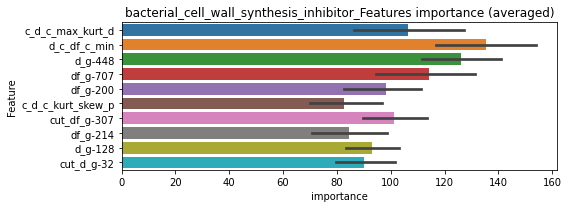

len(train_index) : 2651
len(valid_index) : 884
================================= fold 1/4 bacterial_cell_wall_synthesis_inhibitor=================================


Training until validation scores don't improve for 30 rounds


len(train_index) : 2651
len(valid_index) : 884
================================= fold 2/4 bacterial_cell_wall_synthesis_inhibitor=================================


Early stopping, best iteration is:
[357]	training's binary_logloss: 0.00212222	valid_1's binary_logloss: 0.0730547
Training until validation scores don't improve for 30 rounds


len(train_index) : 2651
len(valid_index) : 884
================================= fold 3/4 bacterial_cell_wall_synthesis_inhibitor=================================


Early stopping, best iteration is:
[331]	training's binary_logloss: 0.00243105	valid_1's binary_logloss: 0.0556072
Training until validation scores don't improve for 30 rounds


len(train_index) : 2652
len(valid_index) : 883
================================= fold 4/4 bacterial_cell_wall_synthesis_inhibitor=================================


Early stopping, best iteration is:
[468]	training's binary_logloss: 0.00162049	valid_1's binary_logloss: 0.0384169
Training until validation scores don't improve for 30 rounds


bacterial_cell_wall_synthesis_inhibitor logloss: 0.06002958904868015
bacterial_cell_wall_synthesis_inhibitor clipping


Early stopping, best iteration is:
[291]	training's binary_logloss: 0.00279335	valid_1's binary_logloss: 0.0730542
neg labels: 3289 → selected neg labels: 3279


bacterial_dna_gyrase_inhibitor, len(trt): 89, len(othr): 3279
target_rate: 0.0037373 → Adj_target_rate: 0.0038122
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00698044	valid_1's binary_logloss: 0.0453946
[600]	training's binary_logloss: 0.0010919	valid_1's binary_logloss: 0.0285113
Early stopping, best iteration is:
[842]	training's binary_logloss: 0.000665841	valid_1's binary_logloss: 0.0260149
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0065595	valid_1's binary_logloss: 0.0474814
[600]	training's binary_logloss: 0.00106422	valid_1's binary_logloss: 0.0367908
Early stopping, best iteration is:
[591]	training's binary_logloss: 0.00109442	valid_1's binary_logloss: 0.0366299
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00686321	valid_1's binary_logloss: 0.0495676
Early stopping, best iteration is:
[495]	training's binary_logloss: 0.00164893	valid_1's binary_logloss: 0.0438579
Training until validation scores don't improve for 30 rounds
[300]	traini

1 / 3 AUC score:0.999
y_Threshold: 0.0102627, Threshold: 0.0272285, pos_neg_ratio: 0.8000000
Remove_noisy_data: 146 → Positive_corect_labels: 648/3788
p_label_rate: 0.0100452 Vs.target_rate: 0.00374
Num_p_label: 40.0, conf_0:0.01906, conf_1:0.03540
Num_p_label: 40.0, Expected: 14.9, Adj_threshold_1: 0.0272285
Num_p_label: 4.0, Expected: 14.9, Adj_threshold_2: 0.0672285
threshold: 0.0672285, positive_p_label: 4.0/3982, p_label_rate: 0.0010045
positive_y_label: 648.0/3788, y_label_rate: 0.1710665
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00557722	valid_1's binary_logloss: 0.0392173
[600]	training's binary_logloss: 0.000991742	valid_1's binary_logloss: 0.0306097
Early stopping, best iteration is:
[770]	training's binary_logloss: 0.000681046	valid_1's binary_logloss: 0.0298529
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00606161	valid_1's binary_logloss: 0.0366702
[600]	training's binary_logloss: 0.00100808	valid_1's binary_logloss: 0.0231945
Early stopping, best iteration is:
[608]	training's binary_logloss: 0.000984958	valid_1's binary_logloss: 0.0230776
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00542279	valid_1's binary_logloss: 0.0496521
[600]	training's binary_logloss: 0.000964411	valid_1's binary_logloss: 0.0429204
Early stopping, best iteration is:
[573]	training's binary_logloss: 0.00104738	valid_1's binary_logloss

2 / 3 AUC score:1.000
y_Threshold: 0.0292581, Threshold: 0.0672285, pos_neg_ratio: 0.8000000
Remove_noisy_data: 20 → Positive_corect_labels: 638.0/3768
p_label_rate: 0.0045203 Vs.target_rate: 0.00374
Num_p_label: 18.0, conf_0:0.05378, conf_1:0.08067
threshold: 0.0672285, positive_p_label: 18.0/3982, p_label_rate: 0.0045203
positive_y_label: 638.0/3768, y_label_rate: 0.1693206
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00515419	valid_1's binary_logloss: 0.0394183
[600]	training's binary_logloss: 0.000931266	valid_1's binary_logloss: 0.0288982
Early stopping, best iteration is:
[625]	training's binary_logloss: 0.000869047	valid_1's binary_logloss: 0.0286054
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00494369	valid_1's binary_logloss: 0.0421831
[600]	training's binary_logloss: 0.000905298	valid_1's binary_logloss: 0.0346263
Early stopping, best iteration is:
[749]	training's binary_logloss: 0.000656517	valid_1's binary_logloss: 0.0340159
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00507951	valid_1's binary_logloss: 0.0373984
[600]	training's binary_logloss: 0.000933344	valid_1's binary_logloss: 0.0270136
Early stopping, best iteration is:
[687]	training's binary_logloss: 0.000754279	valid_1's binary_loglo

3 / 3 AUC score:1.000
y_Threshold: 0.0378119, Threshold: 0.0672285, pos_neg_ratio: 0.8000000
Remove_noisy_data: 6 → Positive_corect_labels: 635.0/3762
p_label_rate: 0.0045203 Vs.target_rate: 0.00374
Num_p_label: 18.0, conf_0:0.06051, conf_1:0.07395
threshold: 0.0672285, positive_p_label: 18.0/3982, p_label_rate: 0.0045203
positive_y_label: 635.0/3762, y_label_rate: 0.1687932


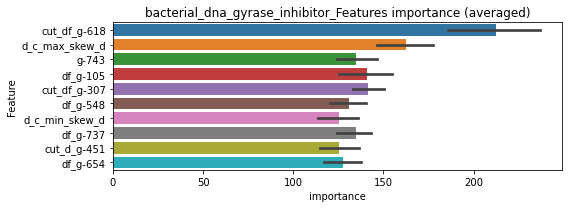

len(train_index) : 2821
len(valid_index) : 941
================================= fold 1/4 bacterial_dna_gyrase_inhibitor=================================


Training until validation scores don't improve for 30 rounds


len(train_index) : 2821
len(valid_index) : 941
================================= fold 2/4 bacterial_dna_gyrase_inhibitor=================================


Early stopping, best iteration is:
[471]	training's binary_logloss: 0.00121903	valid_1's binary_logloss: 0.0314855
Training until validation scores don't improve for 30 rounds


len(train_index) : 2822
len(valid_index) : 940
================================= fold 3/4 bacterial_dna_gyrase_inhibitor=================================


Early stopping, best iteration is:
[365]	training's binary_logloss: 0.00168194	valid_1's binary_logloss: 0.0339289
Training until validation scores don't improve for 30 rounds


len(train_index) : 2822
len(valid_index) : 940
================================= fold 4/4 bacterial_dna_gyrase_inhibitor=================================


Early stopping, best iteration is:
[448]	training's binary_logloss: 0.00130637	valid_1's binary_logloss: 0.0271116
Training until validation scores don't improve for 30 rounds


bacterial_dna_gyrase_inhibitor logloss: 0.03239451548367483


Early stopping, best iteration is:
[522]	training's binary_logloss: 0.00109803	valid_1's binary_logloss: 0.0370515


bacterial_dna_gyrase_inhibitor clipping


neg labels: 3289 → selected neg labels: 3274


bacterial_dna_inhibitor, len(trt): 115, len(othr): 3274
target_rate: 0.0048291 → Adj_target_rate: 0.0047401
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0084809	valid_1's binary_logloss: 0.111019
Early stopping, best iteration is:
[459]	training's binary_logloss: 0.0024705	valid_1's binary_logloss: 0.105565
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00919765	valid_1's binary_logloss: 0.0736672
Early stopping, best iteration is:
[545]	training's binary_logloss: 0.00174443	valid_1's binary_logloss: 0.0611754
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00975322	valid_1's binary_logloss: 0.0594154
[600]	training's binary_logloss: 0.00147552	valid_1's binary_logloss: 0.0488907
Early stopping, best iteration is:
[647]	training's binary_logloss: 0.001273	valid_1's binary_logloss: 0.0487467
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00941144	valid_1's binary_logloss: 0.0773585
Early stopping, b

1 / 3 AUC score:0.993
y_Threshold: 0.0134664, Threshold: 0.0402045, pos_neg_ratio: 0.8000000
Remove_noisy_data: 166 → Positive_corect_labels: 637/3762
p_label_rate: 0.0100452 Vs.target_rate: 0.00483
Num_p_label: 40.0, conf_0:0.02814, conf_1:0.05227
Num_p_label: 40.0, Expected: 19.2, Adj_threshold_1: 0.0402045
Num_p_label: 11.0, Expected: 19.2, Adj_threshold_2: 0.0802045
threshold: 0.0802045, positive_p_label: 11.0/3982, p_label_rate: 0.0027624
positive_y_label: 637.0/3762, y_label_rate: 0.1693248
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00755431	valid_1's binary_logloss: 0.0972294
Early stopping, best iteration is:
[433]	training's binary_logloss: 0.00257469	valid_1's binary_logloss: 0.0933972
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0075649	valid_1's binary_logloss: 0.0537323
[600]	training's binary_logloss: 0.00124838	valid_1's binary_logloss: 0.0413375
Early stopping, best iteration is:
[748]	training's binary_logloss: 0.000850024	valid_1's binary_logloss: 0.0404589
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00727766	valid_1's binary_logloss: 0.0567374
Early stopping, best iteration is:
[544]	training's binary_logloss: 0.00149071	valid_1's binary_logloss: 0.0491292
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00812857	valid_1's binary_logloss: 0.0672208
[600]	train

2 / 3 AUC score:0.997
y_Threshold: 0.0325824, Threshold: 0.0802045, pos_neg_ratio: 0.8000000
Remove_noisy_data: 34 → Positive_corect_labels: 620.0/3728
p_label_rate: 0.0070316 Vs.target_rate: 0.00483
Num_p_label: 28.0, conf_0:0.06416, conf_1:0.09625
threshold: 0.0802045, positive_p_label: 28.0/3982, p_label_rate: 0.0070316
positive_y_label: 620.0/3728, y_label_rate: 0.1663090
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00653751	valid_1's binary_logloss: 0.0600204
Early stopping, best iteration is:
[549]	training's binary_logloss: 0.00132094	valid_1's binary_logloss: 0.05038
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00674664	valid_1's binary_logloss: 0.0492
Early stopping, best iteration is:
[544]	training's binary_logloss: 0.00140917	valid_1's binary_logloss: 0.0408108
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00690585	valid_1's binary_logloss: 0.0491504
[600]	training's binary_logloss: 0.00113637	valid_1's binary_logloss: 0.0388008
Early stopping, best iteration is:
[707]	training's binary_logloss: 0.000849062	valid_1's binary_logloss: 0.0382818
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00658813	valid_1's binary_logloss: 0.0602407
Early stopping,

3 / 3 AUC score:0.999
y_Threshold: 0.0284406, Threshold: 0.0802045, pos_neg_ratio: 0.8000000
Remove_noisy_data: 18 → Positive_corect_labels: 611.0/3710
p_label_rate: 0.0057760 Vs.target_rate: 0.00483
Num_p_label: 23.0, conf_0:0.07218, conf_1:0.08822
threshold: 0.0802045, positive_p_label: 23.0/3982, p_label_rate: 0.0057760
positive_y_label: 611.0/3710, y_label_rate: 0.1646900


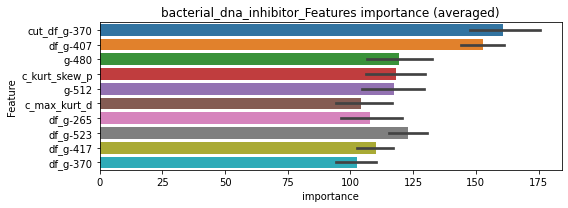

len(train_index) : 2782
len(valid_index) : 928
================================= fold 1/4 bacterial_dna_inhibitor=================================


Training until validation scores don't improve for 30 rounds


len(train_index) : 2782
len(valid_index) : 928
================================= fold 2/4 bacterial_dna_inhibitor=================================


Early stopping, best iteration is:
[499]	training's binary_logloss: 0.00127476	valid_1's binary_logloss: 0.0390929
Training until validation scores don't improve for 30 rounds


len(train_index) : 2783
len(valid_index) : 927
================================= fold 3/4 bacterial_dna_inhibitor=================================


Early stopping, best iteration is:
[447]	training's binary_logloss: 0.0013798	valid_1's binary_logloss: 0.0609091
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[625]	training's binary_logloss: 0.00101256	valid_1's binary_logloss: 0.0235092


len(train_index) : 2783
len(valid_index) : 927
================================= fold 4/4 bacterial_dna_inhibitor=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[730]	training's binary_logloss: 0.00087752	valid_1's binary_logloss: 0.0275581


bacterial_dna_inhibitor logloss: 0.03777391767795316
bacterial_dna_inhibitor clipping


neg labels: 3289 → selected neg labels: 3286


bacterial_membrane_integrity_inhibitor, len(trt): 19, len(othr): 3286
target_rate: 0.0007979 → Adj_target_rate: 0.0010260
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.000961137	valid_1's binary_logloss: 0.00280218
[600]	training's binary_logloss: 0.000286223	valid_1's binary_logloss: 0.00130085
Early stopping, best iteration is:
[596]	training's binary_logloss: 0.000286223	valid_1's binary_logloss: 0.00130085
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.000944963	valid_1's binary_logloss: 0.00414914
Early stopping, best iteration is:
[505]	training's binary_logloss: 0.000305764	valid_1's binary_logloss: 0.00258706
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.000978954	valid_1's binary_logloss: 0.00161932
[600]	training's binary_logloss: 0.000290343	valid_1's binary_logloss: 0.000590415
Early stopping, best iteration is:
[575]	training's binary_logloss: 0.000290343	valid_1's binary_logloss: 0.000590415
Training until validation scores don't improve for 30 

1 / 3 AUC score:1.000
y_Threshold: 0.0014773, Threshold: 0.0047463, pos_neg_ratio: 0.8000000
Remove_noisy_data: 132 → Positive_corect_labels: 657/3811
p_label_rate: 0.0100452 Vs.target_rate: 0.00080
Num_p_label: 40.0, conf_0:0.00332, conf_1:0.00617
Num_p_label: 40.0, Expected: 3.2, Adj_threshold_1: 0.0047463
Num_p_label: 2.0, Expected: 3.2, Adj_threshold_2: 0.0447463


Early stopping, best iteration is:
[564]	training's binary_logloss: 0.000287483	valid_1's binary_logloss: 0.0024363


threshold: 0.0447463, positive_p_label: 2.0/3982, p_label_rate: 0.0005023
positive_y_label: 657.0/3811, y_label_rate: 0.1723957
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.000892026	valid_1's binary_logloss: 0.00247812
Early stopping, best iteration is:
[553]	training's binary_logloss: 0.000282772	valid_1's binary_logloss: 0.0012984
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.000880414	valid_1's binary_logloss: 0.00430655
Early stopping, best iteration is:
[502]	training's binary_logloss: 0.000292808	valid_1's binary_logloss: 0.00286156
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.000891514	valid_1's binary_logloss: 0.00133748
Early stopping, best iteration is:
[569]	training's binary_logloss: 0.00027881	valid_1's binary_logloss: 0.000476578
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.000872459	valid_1's binary_logloss: 0.00416408


2 / 3 AUC score:1.000
y_Threshold: 0.0788933, Threshold: 0.0447463, pos_neg_ratio: 0.8000000
Remove_noisy_data: 0 → Positive_corect_labels: 657.0/3811
p_label_rate: 0.0010045 Vs.target_rate: 0.00080
Num_p_label: 4.0, conf_0:0.03580, conf_1:0.05370


Early stopping, best iteration is:
[526]	training's binary_logloss: 0.000281993	valid_1's binary_logloss: 0.00273999


threshold: 0.0447463, positive_p_label: 4.0/3982, p_label_rate: 0.0010045
positive_y_label: 657.0/3811, y_label_rate: 0.1723957
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.000892026	valid_1's binary_logloss: 0.00247812
Early stopping, best iteration is:
[553]	training's binary_logloss: 0.000282772	valid_1's binary_logloss: 0.0012984
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.000880414	valid_1's binary_logloss: 0.00430655
Early stopping, best iteration is:
[502]	training's binary_logloss: 0.000292808	valid_1's binary_logloss: 0.00286156
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.000891514	valid_1's binary_logloss: 0.00133748
[600]	training's binary_logloss: 0.00027881	valid_1's binary_logloss: 0.000476578
Early stopping, best iteration is:
[572]	training's binary_logloss: 0.00027881	valid_1's binary_logloss: 0.000476578
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.000872459	valid_1's binary_logloss: 0.00416

3 / 3 AUC score:1.000
y_Threshold: 0.0788933, Threshold: 0.0447463, pos_neg_ratio: 0.8000000
Remove_noisy_data: 0 → Positive_corect_labels: 657.0/3811
p_label_rate: 0.0010045 Vs.target_rate: 0.00080
Num_p_label: 4.0, conf_0:0.04027, conf_1:0.04922


Early stopping, best iteration is:
[526]	training's binary_logloss: 0.000281993	valid_1's binary_logloss: 0.00273999


threshold: 0.0447463, positive_p_label: 4.0/3982, p_label_rate: 0.0010045
positive_y_label: 657.0/3811, y_label_rate: 0.1723957


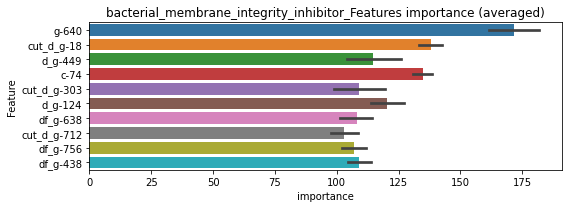

len(train_index) : 2858
len(valid_index) : 953
================================= fold 1/4 bacterial_membrane_integrity_inhibitor=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[857]	training's binary_logloss: 0.000286494	valid_1's binary_logloss: 0.0013232


len(train_index) : 2858
len(valid_index) : 953
================================= fold 2/4 bacterial_membrane_integrity_inhibitor=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[768]	training's binary_logloss: 0.000291317	valid_1's binary_logloss: 0.00231262


len(train_index) : 2858
len(valid_index) : 953
================================= fold 3/4 bacterial_membrane_integrity_inhibitor=================================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.000277223	valid_1's binary_logloss: 0.000498269
Early stopping, best iteration is:
[998]	training's binary_logloss: 0.000277223	valid_1's binary_logloss: 0.000498269


len(train_index) : 2859
len(valid_index) : 952
================================= fold 4/4 bacterial_membrane_integrity_inhibitor=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[965]	training's binary_logloss: 0.000273856	valid_1's binary_logloss: 0.00160203


bacterial_membrane_integrity_inhibitor logloss: 0.0014340963671188786


neg labels: 3289 → selected neg labels: 3282


bcl_inhibitor, len(trt): 31, len(othr): 3282
target_rate: 0.0013018 → Adj_target_rate: 0.0015554
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00172826	valid_1's binary_logloss: 0.016673
Early stopping, best iteration is:
[526]	training's binary_logloss: 0.000464663	valid_1's binary_logloss: 0.0134349
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00187902	valid_1's binary_logloss: 0.0079777
[600]	training's binary_logloss: 0.000419222	valid_1's binary_logloss: 0.00430397
Early stopping, best iteration is:
[630]	training's binary_logloss: 0.000411208	valid_1's binary_logloss: 0.00429226
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00191559	valid_1's binary_logloss: 0.00322922
[600]	training's binary_logloss: 0.000421521	valid_1's binary_logloss: 0.000938239
Early stopping, best iteration is:
[610]	training's binary_logloss: 0.000417788	valid_1's binary_logloss: 0.00093177
Training until validation scores don't improve for 30 rounds
[

1 / 3 AUC score:1.000
y_Threshold: 0.0029707, Threshold: 0.0138014, pos_neg_ratio: 0.8000000
Remove_noisy_data: 132 → Positive_corect_labels: 656/3806


Early stopping, best iteration is:
[545]	training's binary_logloss: 0.000446632	valid_1's binary_logloss: 0.00557309


p_label_rate: 0.0100452 Vs.target_rate: 0.00130
Num_p_label: 40.0, conf_0:0.00966, conf_1:0.01794
Num_p_label: 40.0, Expected: 5.2, Adj_threshold_1: 0.0138014
Num_p_label: 6.0, Expected: 5.2, Adj_threshold_2: 0.0538014
threshold: 0.0538014, positive_p_label: 6.0/3982, p_label_rate: 0.0015068
positive_y_label: 656.0/3806, y_label_rate: 0.1723594
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00160657	valid_1's binary_logloss: 0.017808
Early stopping, best iteration is:
[543]	training's binary_logloss: 0.000419309	valid_1's binary_logloss: 0.0150555
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00176703	valid_1's binary_logloss: 0.00688561
[600]	training's binary_logloss: 0.000399619	valid_1's binary_logloss: 0.00336204
Early stopping, best iteration is:
[642]	training's binary_logloss: 0.000385575	valid_1's binary_logloss: 0.00331943
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00174677	valid_1's binary_logloss: 0.00287371
[600]	training's binary_logloss: 0.000403688	valid_1's binary_logloss: 0.000818329
Early stopping, best iteration is:
[621]	training's binary_logloss: 0.000394104	valid_1's binary_logloss: 0.000799231
Training until validation scores don't improve for 30 rounds

2 / 3 AUC score:1.000
y_Threshold: 0.0185684, Threshold: 0.0538014, pos_neg_ratio: 0.8000000
Remove_noisy_data: 2 → Positive_corect_labels: 655.0/3804
p_label_rate: 0.0067805 Vs.target_rate: 0.00130
Num_p_label: 27.0, conf_0:0.04304, conf_1:0.06456
Num_p_label: 27.0, Expected: 5.2, Adj_threshold_1: 0.0538014
Num_p_label: 12.0, Expected: 5.2, Adj_threshold_2: 0.0938014
threshold: 0.0938014, positive_p_label: 12.0/3982, p_label_rate: 0.0030136
positive_y_label: 655.0/3804, y_label_rate: 0.1721872
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00169821	valid_1's binary_logloss: 0.00634112
[600]	training's binary_logloss: 0.000393164	valid_1's binary_logloss: 0.00303659
Early stopping, best iteration is:
[591]	training's binary_logloss: 0.0003939	valid_1's binary_logloss: 0.00302958
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00170859	valid_1's binary_logloss: 0.00556525
[600]	training's binary_logloss: 0.000396108	valid_1's binary_logloss: 0.00205133
Early stopping, best iteration is:
[635]	training's binary_logloss: 0.000386439	valid_1's binary_logloss: 0.0020415
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00166621	valid_1's binary_logloss: 0.00696959
[600]	training's binary_logloss: 0.000392942	valid_1's binary_logloss: 0.00429549
Early stopping, best iteration is:
[576]	training's binary_logloss: 0.000403624	valid_1's binary_

3 / 3 AUC score:1.000
y_Threshold: 0.0182407, Threshold: 0.0938014, pos_neg_ratio: 0.8000000
Remove_noisy_data: 2 → Positive_corect_labels: 654.0/3802


Early stopping, best iteration is:
[567]	training's binary_logloss: 0.000411472	valid_1's binary_logloss: 0.0096372


p_label_rate: 0.0032647 Vs.target_rate: 0.00130
Num_p_label: 13.0, conf_0:0.08442, conf_1:0.10318
Num_p_label: 13.0, Expected: 5.2, Adj_threshold_1: 0.0938014
Num_p_label: 6.0, Expected: 5.2, Adj_threshold_2: 0.1338014
threshold: 0.1338014, positive_p_label: 6.0/3982, p_label_rate: 0.0015068
positive_y_label: 654.0/3802, y_label_rate: 0.1720147


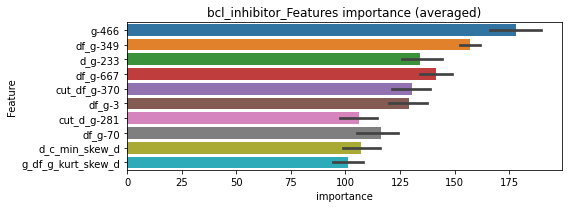

len(train_index) : 2851
len(valid_index) : 951
================================= fold 1/4 bcl_inhibitor=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[884]	training's binary_logloss: 0.000388473	valid_1's binary_logloss: 0.00252101


len(train_index) : 2851
len(valid_index) : 951
================================= fold 2/4 bcl_inhibitor=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[926]	training's binary_logloss: 0.000388825	valid_1's binary_logloss: 0.00141936


len(train_index) : 2852
len(valid_index) : 950
================================= fold 3/4 bcl_inhibitor=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[706]	training's binary_logloss: 0.000429821	valid_1's binary_logloss: 0.0036693


len(train_index) : 2852
len(valid_index) : 950
================================= fold 4/4 bcl_inhibitor=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[858]	training's binary_logloss: 0.000389608	valid_1's binary_logloss: 0.0068007


bcl_inhibitor logloss: 0.003601776204342304


neg labels: 3289 → selected neg labels: 3285


bcr-abl_inhibitor, len(trt): 38, len(othr): 3285
target_rate: 0.0015957 → Adj_target_rate: 0.0018493
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00217107	valid_1's binary_logloss: 0.00651844
[600]	training's binary_logloss: 0.000471374	valid_1's binary_logloss: 0.00256197
Early stopping, best iteration is:
[624]	training's binary_logloss: 0.000455399	valid_1's binary_logloss: 0.00251241
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00201297	valid_1's binary_logloss: 0.0187493
Early stopping, best iteration is:
[513]	training's binary_logloss: 0.000554071	valid_1's binary_logloss: 0.0154436
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0022127	valid_1's binary_logloss: 0.00579453
[600]	training's binary_logloss: 0.000476659	valid_1's binary_logloss: 0.00266009
Early stopping, best iteration is:
[629]	training's binary_logloss: 0.000457342	valid_1's binary_logloss: 0.00260741
Training until validation scores don't improve for 30 rounds
[

1 / 3 AUC score:1.000
y_Threshold: 0.0031647, Threshold: 0.0394049, pos_neg_ratio: 0.8000000
Remove_noisy_data: 132 → Positive_corect_labels: 657/3810
p_label_rate: 0.0100452 Vs.target_rate: 0.00160
Num_p_label: 40.0, conf_0:0.02758, conf_1:0.05123
Num_p_label: 40.0, Expected: 6.4, Adj_threshold_1: 0.0394049
Num_p_label: 21.0, Expected: 6.4, Adj_threshold_2: 0.0794049
Num_p_label: 13.0, Expected: 6.4, Adj_threshold_3: 0.1194049
threshold: 0.1194049, positive_p_label: 13.0/3982, p_label_rate: 0.0032647
positive_y_label: 657.0/3810, y_label_rate: 0.1724409
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00189633	valid_1's binary_logloss: 0.00587235
[600]	training's binary_logloss: 0.000446328	valid_1's binary_logloss: 0.00250306
Early stopping, best iteration is:
[628]	training's binary_logloss: 0.000431898	valid_1's binary_logloss: 0.00246006
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00186144	valid_1's binary_logloss: 0.0211647
Early stopping, best iteration is:
[470]	training's binary_logloss: 0.000614578	valid_1's binary_logloss: 0.0189403
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00197779	valid_1's binary_logloss: 0.00453376
[600]	training's binary_logloss: 0.000455537	valid_1's binary_logloss: 0.00197772
Early stopping, best iteration is:
[606]	training's binary_logloss: 0.000449979	valid_1's binary_logloss: 0.00196957
Training until validation scores don't improve for 30 rounds


2 / 3 AUC score:1.000
y_Threshold: 0.0262688, Threshold: 0.1194049, pos_neg_ratio: 0.8000000
Remove_noisy_data: 2 → Positive_corect_labels: 656.0/3808
p_label_rate: 0.0165746 Vs.target_rate: 0.00160
Num_p_label: 66.0, conf_0:0.09552, conf_1:0.14329
Num_p_label: 66.0, Expected: 6.4, Adj_threshold_1: 0.1194049
Num_p_label: 59.0, Expected: 6.4, Adj_threshold_2: 0.1594049
Num_p_label: 52.0, Expected: 6.4, Adj_threshold_3: 0.1994049
Num_p_label: 47.0, Expected: 6.4, Adj_threshold_4: 0.2394049
Num_p_label: 41.0, Expected: 6.4, Adj_threshold_5: 0.2794049
Num_p_label: 36.0, Expected: 6.4, Adj_threshold_6: 0.3194049
Num_p_label: 33.0, Expected: 6.4, Adj_threshold_7: 0.3594049
Num_p_label: 29.0, Expected: 6.4, Adj_threshold_8: 0.3994049
Num_p_label: 26.0, Expected: 6.4, Adj_threshold_9: 0.4394049
Num_p_label: 26.0, Expected: 6.4, Adj_threshold_10: 0.4794049
threshold: 0.5194049, positive_p_label: 23.0/3982, p_label_rate: 0.0057760
positive_y_label: 656.0/3808, y_label_rate: 0.1722689
===========

Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00181373	valid_1's binary_logloss: 0.0145726
[600]	training's binary_logloss: 0.00043179	valid_1's binary_logloss: 0.0102021
Early stopping, best iteration is:
[574]	training's binary_logloss: 0.000447898	valid_1's binary_logloss: 0.0101496
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00192627	valid_1's binary_logloss: 0.00762012
[600]	training's binary_logloss: 0.000444002	valid_1's binary_logloss: 0.00391401
Early stopping, best iteration is:
[631]	training's binary_logloss: 0.000432034	valid_1's binary_logloss: 0.00386466
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00199795	valid_1's binary_logloss: 0.00408105
[600]	training's binary_logloss: 0.000454505	valid_1's binary_logloss: 0.00125734
Early stopping, best iteration is:
[661]	training's binary_logloss: 0.00042819	valid_1's binary_lo

3 / 3 AUC score:1.000
y_Threshold: 0.0353078, Threshold: 0.5194049, pos_neg_ratio: 0.8000000
Remove_noisy_data: 2 → Positive_corect_labels: 655.0/3806
p_label_rate: 0.0060271 Vs.target_rate: 0.00160
Num_p_label: 24.0, conf_0:0.46746, conf_1:0.57135
Num_p_label: 24.0, Expected: 6.4, Adj_threshold_1: 0.5194049
Num_p_label: 24.0, Expected: 6.4, Adj_threshold_2: 0.5594049
Num_p_label: 19.0, Expected: 6.4, Adj_threshold_3: 0.5994049
Num_p_label: 17.0, Expected: 6.4, Adj_threshold_4: 0.6394049
Num_p_label: 13.0, Expected: 6.4, Adj_threshold_5: 0.6794049
threshold: 0.6794049, positive_p_label: 13.0/3982, p_label_rate: 0.0032647
positive_y_label: 655.0/3806, y_label_rate: 0.1720967


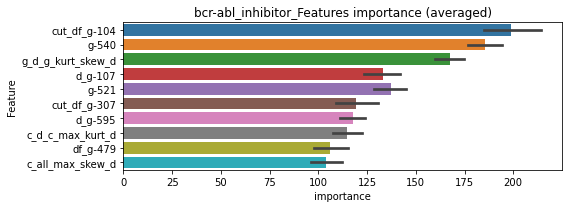

len(train_index) : 2854
len(valid_index) : 952
================================= fold 1/4 bcr-abl_inhibitor=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[855]	training's binary_logloss: 0.000433913	valid_1's binary_logloss: 0.00368215


len(train_index) : 2854
len(valid_index) : 952
================================= fold 2/4 bcr-abl_inhibitor=================================


Training until validation scores don't improve for 30 rounds


len(train_index) : 2855
len(valid_index) : 951
================================= fold 3/4 bcr-abl_inhibitor=================================


Early stopping, best iteration is:
[506]	training's binary_logloss: 0.000630182	valid_1's binary_logloss: 0.0108104
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[852]	training's binary_logloss: 0.000437137	valid_1's binary_logloss: 0.00707341


len(train_index) : 2855
len(valid_index) : 951
================================= fold 4/4 bcr-abl_inhibitor=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[880]	training's binary_logloss: 0.000435911	valid_1's binary_logloss: 0.00319026


bcr-abl_inhibitor logloss: 0.0061906064860527635


neg labels: 3289 → selected neg labels: 3280


benzodiazepine_receptor_agonist, len(trt): 67, len(othr): 3280
target_rate: 0.0028135 → Adj_target_rate: 0.0029948
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00471104	valid_1's binary_logloss: 0.0392062
[600]	training's binary_logloss: 0.000770307	valid_1's binary_logloss: 0.0271264
Early stopping, best iteration is:
[721]	training's binary_logloss: 0.000585167	valid_1's binary_logloss: 0.0266796
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00484499	valid_1's binary_logloss: 0.0239804
[600]	training's binary_logloss: 0.00077744	valid_1's binary_logloss: 0.0147741
Early stopping, best iteration is:
[759]	training's binary_logloss: 0.000562437	valid_1's binary_logloss: 0.0138722
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00501168	valid_1's binary_logloss: 0.0299405
[600]	training's binary_logloss: 0.000814192	valid_1's binary_logloss: 0.0233879
Early stopping, best iteration is:
[740]	training's binary_logloss: 0.000599886	valid_1's binary_loglos

1 / 3 AUC score:0.999
y_Threshold: 0.0057841, Threshold: 0.0153466, pos_neg_ratio: 0.8000000
Remove_noisy_data: 136 → Positive_corect_labels: 654/3800
p_label_rate: 0.0100452 Vs.target_rate: 0.00281
Num_p_label: 40.0, conf_0:0.01074, conf_1:0.01995
Num_p_label: 40.0, Expected: 11.2, Adj_threshold_1: 0.0153466
Num_p_label: 7.0, Expected: 11.2, Adj_threshold_2: 0.0553466
threshold: 0.0553466, positive_p_label: 7.0/3982, p_label_rate: 0.0017579
positive_y_label: 654.0/3800, y_label_rate: 0.1721053
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00430435	valid_1's binary_logloss: 0.0417039
[600]	training's binary_logloss: 0.000731397	valid_1's binary_logloss: 0.0346092
Early stopping, best iteration is:
[592]	training's binary_logloss: 0.000747151	valid_1's binary_logloss: 0.0345512
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00421163	valid_1's binary_logloss: 0.0279716
[600]	training's binary_logloss: 0.000741458	valid_1's binary_logloss: 0.0194939
Early stopping, best iteration is:
[680]	training's binary_logloss: 0.000609984	valid_1's binary_logloss: 0.0190332
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00445753	valid_1's binary_logloss: 0.0185361
[600]	training's binary_logloss: 0.000769694	valid_1's binary_logloss: 0.00907414
Early stopping, best iteration is:
[770]	training's binary_logloss: 0.000555959	valid_1's binary_logl

2 / 3 AUC score:1.000
y_Threshold: 0.0212514, Threshold: 0.0553466, pos_neg_ratio: 0.8000000
Remove_noisy_data: 6 → Positive_corect_labels: 651.0/3794
p_label_rate: 0.0035158 Vs.target_rate: 0.00281
Num_p_label: 14.0, conf_0:0.04428, conf_1:0.06642
threshold: 0.0553466, positive_p_label: 14.0/3982, p_label_rate: 0.0035158
positive_y_label: 651.0/3794, y_label_rate: 0.1715867
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00410974	valid_1's binary_logloss: 0.0358421
Early stopping, best iteration is:
[566]	training's binary_logloss: 0.00079657	valid_1's binary_logloss: 0.0279369
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00412698	valid_1's binary_logloss: 0.0303768
[600]	training's binary_logloss: 0.00072467	valid_1's binary_logloss: 0.0221521
Early stopping, best iteration is:
[594]	training's binary_logloss: 0.000737458	valid_1's binary_logloss: 0.0220759
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00440117	valid_1's binary_logloss: 0.0179456
[600]	training's binary_logloss: 0.000757447	valid_1's binary_logloss: 0.00890767
Early stopping, best iteration is:
[763]	training's binary_logloss: 0.000549681	valid_1's binary_logloss: 0.00825912
Training until validation scores don't improve for 30 rounds
[300]	

3 / 3 AUC score:1.000
y_Threshold: 0.0282484, Threshold: 0.0553466, pos_neg_ratio: 0.8000000
Remove_noisy_data: 6 → Positive_corect_labels: 648.0/3788
p_label_rate: 0.0040181 Vs.target_rate: 0.00281
Num_p_label: 16.0, conf_0:0.04981, conf_1:0.06088
threshold: 0.0553466, positive_p_label: 16.0/3982, p_label_rate: 0.0040181
positive_y_label: 648.0/3788, y_label_rate: 0.1710665


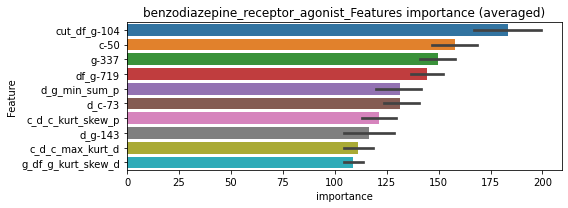

len(train_index) : 2841
len(valid_index) : 947
================================= fold 1/4 benzodiazepine_receptor_agonist=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[721]	training's binary_logloss: 0.000662076	valid_1's binary_logloss: 0.0162297


len(train_index) : 2841
len(valid_index) : 947
================================= fold 2/4 benzodiazepine_receptor_agonist=================================


Training until validation scores don't improve for 30 rounds


len(train_index) : 2841
len(valid_index) : 947
================================= fold 3/4 benzodiazepine_receptor_agonist=================================


Early stopping, best iteration is:
[457]	training's binary_logloss: 0.00102308	valid_1's binary_logloss: 0.025101
Training until validation scores don't improve for 30 rounds


len(train_index) : 2841


Early stopping, best iteration is:
[551]	training's binary_logloss: 0.000854342	valid_1's binary_logloss: 0.0142872


len(valid_index) : 947
================================= fold 4/4 benzodiazepine_receptor_agonist=================================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.000547382	valid_1's binary_logloss: 0.0112494
Early stopping, best iteration is:
[980]	training's binary_logloss: 0.000552155	valid_1's binary_logloss: 0.0112168


benzodiazepine_receptor_agonist logloss: 0.016708686223857603


neg labels: 3289 → selected neg labels: 3287


beta_amyloid_inhibitor, len(trt): 24, len(othr): 3287
target_rate: 0.0010078 → Adj_target_rate: 0.0012513
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00142018	valid_1's binary_logloss: 0.0040005
[600]	training's binary_logloss: 0.000358993	valid_1's binary_logloss: 0.00202416
Early stopping, best iteration is:
[581]	training's binary_logloss: 0.000360706	valid_1's binary_logloss: 0.00202014
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00133263	valid_1's binary_logloss: 0.00626437
[600]	training's binary_logloss: 0.000350807	valid_1's binary_logloss: 0.00392139
Early stopping, best iteration is:
[587]	training's binary_logloss: 0.000351757	valid_1's binary_logloss: 0.00391641
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00144017	valid_1's binary_logloss: 0.00314022
Early stopping, best iteration is:
[568]	training's binary_logloss: 0.000370819	valid_1's binary_logloss: 0.00111073
Training until validation scores don't improve for 30 rounds

1 / 3 AUC score:1.000
y_Threshold: 0.0016764, Threshold: 0.0066426, pos_neg_ratio: 0.8000000
Remove_noisy_data: 132 → Positive_corect_labels: 657/3812
p_label_rate: 0.0100452 Vs.target_rate: 0.00101
Num_p_label: 40.0, conf_0:0.00465, conf_1:0.00864
Num_p_label: 40.0, Expected: 4.0, Adj_threshold_1: 0.0066426
Num_p_label: 4.0, Expected: 4.0, Adj_threshold_2: 0.0466426
threshold: 0.0466426, positive_p_label: 4.0/3982, p_label_rate: 0.0010045
positive_y_label: 657.0/3812, y_label_rate: 0.1723505
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00135432	valid_1's binary_logloss: 0.00357853
Early stopping, best iteration is:
[561]	training's binary_logloss: 0.000363182	valid_1's binary_logloss: 0.00156818
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00132455	valid_1's binary_logloss: 0.00577641
[600]	training's binary_logloss: 0.000348919	valid_1's binary_logloss: 0.00355213
Early stopping, best iteration is:
[586]	training's binary_logloss: 0.00035012	valid_1's binary_logloss: 0.00354804
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00135283	valid_1's binary_logloss: 0.00270089
[600]	training's binary_logloss: 0.000360938	valid_1's binary_logloss: 0.000920208
Early stopping, best iteration is:
[594]	training's binary_logloss: 0.000361428	valid_1's binary_logloss: 0.000919741
Training until validation scores don't improve for 30 roun

2 / 3 AUC score:1.000
y_Threshold: 0.0171193, Threshold: 0.0466426, pos_neg_ratio: 0.8000000
Remove_noisy_data: 0 → Positive_corect_labels: 657.0/3812


Early stopping, best iteration is:
[566]	training's binary_logloss: 0.000355067	valid_1's binary_logloss: 0.00576242


p_label_rate: 0.0035158 Vs.target_rate: 0.00101
Num_p_label: 14.0, conf_0:0.03731, conf_1:0.05597
Num_p_label: 14.0, Expected: 4.0, Adj_threshold_1: 0.0466426
Num_p_label: 8.0, Expected: 4.0, Adj_threshold_2: 0.0866426
threshold: 0.0866426, positive_p_label: 8.0/3982, p_label_rate: 0.0020090
positive_y_label: 657.0/3812, y_label_rate: 0.1723505
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00135432	valid_1's binary_logloss: 0.00357853
Early stopping, best iteration is:
[561]	training's binary_logloss: 0.000363182	valid_1's binary_logloss: 0.00156818
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00132455	valid_1's binary_logloss: 0.00577641
[600]	training's binary_logloss: 0.000348919	valid_1's binary_logloss: 0.00355213
Early stopping, best iteration is:
[586]	training's binary_logloss: 0.00035012	valid_1's binary_logloss: 0.00354804
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00135283	valid_1's binary_logloss: 0.00270089
[600]	training's binary_logloss: 0.000360938	valid_1's binary_logloss: 0.000920208
Early stopping, best iteration is:
[594]	training's binary_logloss: 0.000361428	valid_1's binary_logloss: 0.000919741
Training until validation scores don't improve for 30 roun

3 / 3 AUC score:1.000
y_Threshold: 0.0171193, Threshold: 0.0866426, pos_neg_ratio: 0.8000000
Remove_noisy_data: 0 → Positive_corect_labels: 657.0/3812


Early stopping, best iteration is:
[566]	training's binary_logloss: 0.000355067	valid_1's binary_logloss: 0.00576242


p_label_rate: 0.0020090 Vs.target_rate: 0.00101
Num_p_label: 8.0, conf_0:0.07798, conf_1:0.09531
Num_p_label: 8.0, Expected: 4.0, Adj_threshold_1: 0.0866426
threshold: 0.0866426, positive_p_label: 8.0/3982, p_label_rate: 0.0020090
positive_y_label: 657.0/3812, y_label_rate: 0.1723505


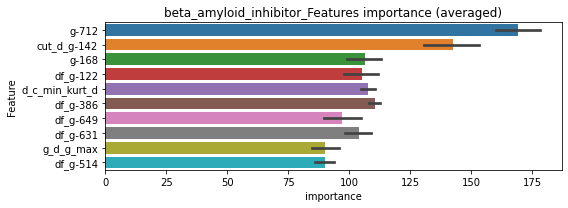

len(train_index) : 2859
len(valid_index) : 953
================================= fold 1/4 beta_amyloid_inhibitor=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[878]	training's binary_logloss: 0.000355946	valid_1's binary_logloss: 0.00127696


len(train_index) : 2859
len(valid_index) : 953
================================= fold 2/4 beta_amyloid_inhibitor=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[857]	training's binary_logloss: 0.000356546	valid_1's binary_logloss: 0.00283966


len(train_index) : 2859
len(valid_index) : 953
================================= fold 3/4 beta_amyloid_inhibitor=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[881]	training's binary_logloss: 0.000363582	valid_1's binary_logloss: 0.000924468


len(train_index) : 2859
len(valid_index) : 953
================================= fold 4/4 beta_amyloid_inhibitor=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[777]	training's binary_logloss: 0.000368968	valid_1's binary_logloss: 0.00597153


beta_amyloid_inhibitor logloss: 0.002753157742395884


neg labels: 3289 → selected neg labels: 3281


bromodomain_inhibitor, len(trt): 68, len(othr): 3281
target_rate: 0.0028555 → Adj_target_rate: 0.0030327
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00451339	valid_1's binary_logloss: 0.0426677
[600]	training's binary_logloss: 0.000800706	valid_1's binary_logloss: 0.0320304
Early stopping, best iteration is:
[602]	training's binary_logloss: 0.00079618	valid_1's binary_logloss: 0.0319644
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00461157	valid_1's binary_logloss: 0.0349468
Early stopping, best iteration is:
[567]	training's binary_logloss: 0.000902076	valid_1's binary_logloss: 0.0262425
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00563721	valid_1's binary_logloss: 0.0176973
[600]	training's binary_logloss: 0.000909534	valid_1's binary_logloss: 0.00752266
Early stopping, best iteration is:
[840]	training's binary_logloss: 0.000596935	valid_1's binary_logloss: 0.00657364
Training until validation scores don't improve for 30 rounds
[300]

1 / 3 AUC score:1.000
y_Threshold: 0.0068301, Threshold: 0.0178405, pos_neg_ratio: 0.8000000
Remove_noisy_data: 132 → Positive_corect_labels: 656/3805
p_label_rate: 0.0100452 Vs.target_rate: 0.00286
Num_p_label: 40.0, conf_0:0.01249, conf_1:0.02319
Num_p_label: 40.0, Expected: 11.4, Adj_threshold_1: 0.0178405
Num_p_label: 5.0, Expected: 11.4, Adj_threshold_2: 0.0578405
threshold: 0.0578405, positive_p_label: 5.0/3982, p_label_rate: 0.0012557
positive_y_label: 656.0/3805, y_label_rate: 0.1724047
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00449812	valid_1's binary_logloss: 0.0408102
[600]	training's binary_logloss: 0.000793049	valid_1's binary_logloss: 0.0301159
Early stopping, best iteration is:
[593]	training's binary_logloss: 0.00080975	valid_1's binary_logloss: 0.0299749
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00428401	valid_1's binary_logloss: 0.0381557
[600]	training's binary_logloss: 0.000793931	valid_1's binary_logloss: 0.0300749
Early stopping, best iteration is:
[593]	training's binary_logloss: 0.00081155	valid_1's binary_logloss: 0.0299968
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00508338	valid_1's binary_logloss: 0.0166078
[600]	training's binary_logloss: 0.000847839	valid_1's binary_logloss: 0.00700589
Early stopping, best iteration is:
[745]	training's binary_logloss: 0.000629707	valid_1's binary_loglos

2 / 3 AUC score:1.000
y_Threshold: 0.0310794, Threshold: 0.0578405, pos_neg_ratio: 0.8000000
Remove_noisy_data: 6 → Positive_corect_labels: 653.0/3799
p_label_rate: 0.0040181 Vs.target_rate: 0.00286
Num_p_label: 16.0, conf_0:0.04627, conf_1:0.06941
threshold: 0.0578405, positive_p_label: 16.0/3982, p_label_rate: 0.0040181
positive_y_label: 653.0/3799, y_label_rate: 0.1718873
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0043229	valid_1's binary_logloss: 0.0364788
[600]	training's binary_logloss: 0.000777345	valid_1's binary_logloss: 0.0286704
Early stopping, best iteration is:
[603]	training's binary_logloss: 0.000771133	valid_1's binary_logloss: 0.0285772
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0047014	valid_1's binary_logloss: 0.0272361
[600]	training's binary_logloss: 0.000806831	valid_1's binary_logloss: 0.0162909
Early stopping, best iteration is:
[669]	training's binary_logloss: 0.000679773	valid_1's binary_logloss: 0.0157247
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00455556	valid_1's binary_logloss: 0.0230752
[600]	training's binary_logloss: 0.000800699	valid_1's binary_logloss: 0.0127849
Early stopping, best iteration is:
[753]	training's binary_logloss: 0.000589195	valid_1's binary_logloss

3 / 3 AUC score:0.999
y_Threshold: 0.0285864, Threshold: 0.0578405, pos_neg_ratio: 0.8000000
Remove_noisy_data: 10 → Positive_corect_labels: 648.0/3789
p_label_rate: 0.0057760 Vs.target_rate: 0.00286
Num_p_label: 23.0, conf_0:0.05206, conf_1:0.06362
Num_p_label: 23.0, Expected: 11.4, Adj_threshold_1: 0.0578405
Num_p_label: 7.0, Expected: 11.4, Adj_threshold_2: 0.0978405
threshold: 0.0978405, positive_p_label: 7.0/3982, p_label_rate: 0.0017579
positive_y_label: 648.0/3789, y_label_rate: 0.1710214


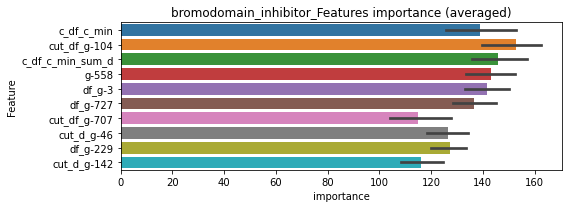

len(train_index) : 2841
len(valid_index) : 948
================================= fold 1/4 bromodomain_inhibitor=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[735]	training's binary_logloss: 0.00070183	valid_1's binary_logloss: 0.0177964


len(train_index) : 2842
len(valid_index) : 947
================================= fold 2/4 bromodomain_inhibitor=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[820]	training's binary_logloss: 0.000645193	valid_1's binary_logloss: 0.0200944


len(train_index) : 2842
len(valid_index) : 947
================================= fold 3/4 bromodomain_inhibitor=================================


Training until validation scores don't improve for 30 rounds


len(train_index) : 2842
len(valid_index) : 947
================================= fold 4/4 bromodomain_inhibitor=================================


Early stopping, best iteration is:
[416]	training's binary_logloss: 0.00122145	valid_1's binary_logloss: 0.0240001
Training until validation scores don't improve for 30 rounds


bromodomain_inhibitor logloss: 0.02024350208555746


Early stopping, best iteration is:
[539]	training's binary_logloss: 0.000940605	valid_1's binary_logloss: 0.0190857


bromodomain_inhibitor clipping


neg labels: 3289 → selected neg labels: 3286


btk_inhibitor, len(trt): 29, len(othr): 3286
target_rate: 0.0012178 → Adj_target_rate: 0.0014697
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00175555	valid_1's binary_logloss: 0.00732622
[600]	training's binary_logloss: 0.000408504	valid_1's binary_logloss: 0.00408683
Early stopping, best iteration is:
[614]	training's binary_logloss: 0.000401912	valid_1's binary_logloss: 0.00407241
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00175064	valid_1's binary_logloss: 0.0092311
[600]	training's binary_logloss: 0.000404999	valid_1's binary_logloss: 0.00488676
Early stopping, best iteration is:
[689]	training's binary_logloss: 0.00037933	valid_1's binary_logloss: 0.00484162
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0018226	valid_1's binary_logloss: 0.00628742
[600]	training's binary_logloss: 0.000419933	valid_1's binary_logloss: 0.00247722
Early stopping, best iteration is:
[683]	training's binary_logloss: 0.000393211	valid_1's binary_

1 / 3 AUC score:1.000
y_Threshold: 0.0024805, Threshold: 0.0192456, pos_neg_ratio: 0.8000000
Remove_noisy_data: 132 → Positive_corect_labels: 657/3811
p_label_rate: 0.0100452 Vs.target_rate: 0.00122
Num_p_label: 40.0, conf_0:0.01347, conf_1:0.02502
Num_p_label: 40.0, Expected: 4.8, Adj_threshold_1: 0.0192456
Num_p_label: 11.0, Expected: 4.8, Adj_threshold_2: 0.0592456
threshold: 0.0592456, positive_p_label: 11.0/3982, p_label_rate: 0.0027624
positive_y_label: 657.0/3811, y_label_rate: 0.1723957
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00164127	valid_1's binary_logloss: 0.00894619
[600]	training's binary_logloss: 0.000395842	valid_1's binary_logloss: 0.00594233
Early stopping, best iteration is:
[586]	training's binary_logloss: 0.000405675	valid_1's binary_logloss: 0.00593369
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00165387	valid_1's binary_logloss: 0.009513
[600]	training's binary_logloss: 0.000397966	valid_1's binary_logloss: 0.00539744
Early stopping, best iteration is:
[632]	training's binary_logloss: 0.000384561	valid_1's binary_logloss: 0.00536413
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00171275	valid_1's binary_logloss: 0.00507405
[600]	training's binary_logloss: 0.000399297	valid_1's binary_logloss: 0.00177596
Early stopping, best iteration is:
[662]	training's binary_logloss: 0.000380621	valid_1's binary

2 / 3 AUC score:1.000
y_Threshold: 0.0166843, Threshold: 0.0592456, pos_neg_ratio: 0.8000000
Remove_noisy_data: 0 → Positive_corect_labels: 657.0/3811
p_label_rate: 0.0072828 Vs.target_rate: 0.00122
Num_p_label: 29.0, conf_0:0.04740, conf_1:0.07109
Num_p_label: 29.0, Expected: 4.8, Adj_threshold_1: 0.0592456
Num_p_label: 15.0, Expected: 4.8, Adj_threshold_2: 0.0992456
Num_p_label: 9.0, Expected: 4.8, Adj_threshold_3: 0.1392456
threshold: 0.1392456, positive_p_label: 9.0/3982, p_label_rate: 0.0022602
positive_y_label: 657.0/3811, y_label_rate: 0.1723957
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00164127	valid_1's binary_logloss: 0.00894619
[600]	training's binary_logloss: 0.000395842	valid_1's binary_logloss: 0.00594233
Early stopping, best iteration is:
[586]	training's binary_logloss: 0.000405675	valid_1's binary_logloss: 0.00593369
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00165387	valid_1's binary_logloss: 0.009513
[600]	training's binary_logloss: 0.000397966	valid_1's binary_logloss: 0.00539744
Early stopping, best iteration is:
[632]	training's binary_logloss: 0.000384561	valid_1's binary_logloss: 0.00536413
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00171275	valid_1's binary_logloss: 0.00507405
[600]	training's binary_logloss: 0.000399297	valid_1's binary_logloss: 0.00177596
Early stopping, best iteration is:
[662]	training's binary_logloss: 0.000380621	valid_1's binary

3 / 3 AUC score:1.000
y_Threshold: 0.0166843, Threshold: 0.1392456, pos_neg_ratio: 0.8000000
Remove_noisy_data: 0 → Positive_corect_labels: 657.0/3811
p_label_rate: 0.0022602 Vs.target_rate: 0.00122
Num_p_label: 9.0, conf_0:0.12532, conf_1:0.15317
Num_p_label: 9.0, Expected: 4.8, Adj_threshold_1: 0.1392456
threshold: 0.1392456, positive_p_label: 9.0/3982, p_label_rate: 0.0022602
positive_y_label: 657.0/3811, y_label_rate: 0.1723957


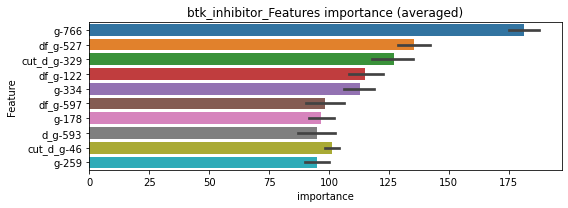

len(train_index) : 2858
len(valid_index) : 953
================================= fold 1/4 btk_inhibitor=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[816]	training's binary_logloss: 0.000411932	valid_1's binary_logloss: 0.00520452


len(train_index) : 2858
len(valid_index) : 953
================================= fold 2/4 btk_inhibitor=================================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.000374992	valid_1's binary_logloss: 0.00334712
Early stopping, best iteration is:
[1059]	training's binary_logloss: 0.000369302	valid_1's binary_logloss: 0.00333488


len(train_index) : 2858
len(valid_index) : 953
================================= fold 3/4 btk_inhibitor=================================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.000381947	valid_1's binary_logloss: 0.00146899
Early stopping, best iteration is:
[992]	training's binary_logloss: 0.000382006	valid_1's binary_logloss: 0.00146886


len(train_index) : 2859
len(valid_index) : 952
================================= fold 4/4 btk_inhibitor=================================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.000380459	valid_1's binary_logloss: 0.00144588
Early stopping, best iteration is:
[993]	training's binary_logloss: 0.000380459	valid_1's binary_logloss: 0.00144588


btk_inhibitor logloss: 0.002863906427802926


neg labels: 3289 → selected neg labels: 3288


calcineurin_inhibitor, len(trt): 12, len(othr): 3288
target_rate: 0.0005039 → Adj_target_rate: 0.0006942
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.000630993	valid_1's binary_logloss: 0.00154828
Early stopping, best iteration is:
[521]	training's binary_logloss: 0.000247545	valid_1's binary_logloss: 0.00076996
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.000619171	valid_1's binary_logloss: 0.00163977
Early stopping, best iteration is:
[526]	training's binary_logloss: 0.000245159	valid_1's binary_logloss: 0.000915517
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.000635	valid_1's binary_logloss: 0.00110348
Early stopping, best iteration is:
[497]	training's binary_logloss: 0.000251916	valid_1's binary_logloss: 0.000484374
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.000629366	valid_1's binary_logloss: 0.00150571


1 / 3 AUC score:1.000
y_Threshold: 0.0012848, Threshold: 0.0148962, pos_neg_ratio: 0.8000000
Remove_noisy_data: 132 → Positive_corect_labels: 657/3813
p_label_rate: 0.0100452 Vs.target_rate: 0.00050
Num_p_label: 40.0, conf_0:0.01043, conf_1:0.01937
Num_p_label: 40.0, Expected: 2.0, Adj_threshold_1: 0.0148962
Num_p_label: 17.0, Expected: 2.0, Adj_threshold_2: 0.0548962
Num_p_label: 9.0, Expected: 2.0, Adj_threshold_3: 0.0948962
Num_p_label: 7.0, Expected: 2.0, Adj_threshold_4: 0.1348962
Num_p_label: 5.0, Expected: 2.0, Adj_threshold_5: 0.1748962


Early stopping, best iteration is:
[528]	training's binary_logloss: 0.000248029	valid_1's binary_logloss: 0.00074814


threshold: 0.1748962, positive_p_label: 5.0/3982, p_label_rate: 0.0012557
positive_y_label: 657.0/3813, y_label_rate: 0.1723053
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.000572349	valid_1's binary_logloss: 0.00189187
Early stopping, best iteration is:
[517]	training's binary_logloss: 0.000230007	valid_1's binary_logloss: 0.00106573
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.000563912	valid_1's binary_logloss: 0.00168585
Early stopping, best iteration is:
[488]	training's binary_logloss: 0.000232072	valid_1's binary_logloss: 0.00100869
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.000580901	valid_1's binary_logloss: 0.000760555
Early stopping, best iteration is:
[486]	training's binary_logloss: 0.000234289	valid_1's binary_logloss: 0.000321786
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.000577135	valid_1's binary_logloss: 0.00130341


2 / 3 AUC score:1.000
y_Threshold: 0.1271009, Threshold: 0.1748962, pos_neg_ratio: 0.8000000
Remove_noisy_data: 0 → Positive_corect_labels: 657.0/3813
p_label_rate: 0.0087896 Vs.target_rate: 0.00050
Num_p_label: 35.0, conf_0:0.13992, conf_1:0.20988
Num_p_label: 35.0, Expected: 2.0, Adj_threshold_1: 0.1748962
Num_p_label: 34.0, Expected: 2.0, Adj_threshold_2: 0.2148962
Num_p_label: 31.0, Expected: 2.0, Adj_threshold_3: 0.2548962
Num_p_label: 29.0, Expected: 2.0, Adj_threshold_4: 0.2948962
Num_p_label: 27.0, Expected: 2.0, Adj_threshold_5: 0.3348962
Num_p_label: 25.0, Expected: 2.0, Adj_threshold_6: 0.3748962


Early stopping, best iteration is:
[500]	training's binary_logloss: 0.000230886	valid_1's binary_logloss: 0.000704478


Num_p_label: 22.0, Expected: 2.0, Adj_threshold_7: 0.4148962
Num_p_label: 22.0, Expected: 2.0, Adj_threshold_8: 0.4548962
Num_p_label: 21.0, Expected: 2.0, Adj_threshold_9: 0.4948962
Num_p_label: 20.0, Expected: 2.0, Adj_threshold_10: 0.5348962
threshold: 0.5748962, positive_p_label: 18.0/3982, p_label_rate: 0.0045203
positive_y_label: 657.0/3813, y_label_rate: 0.1723053
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.000572349	valid_1's binary_logloss: 0.00189187
Early stopping, best iteration is:
[517]	training's binary_logloss: 0.000230007	valid_1's binary_logloss: 0.00106573
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.000563912	valid_1's binary_logloss: 0.00168585
Early stopping, best iteration is:
[488]	training's binary_logloss: 0.000232072	valid_1's binary_logloss: 0.00100869
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.000580901	valid_1's binary_logloss: 0.000760555
Early stopping, best iteration is:
[486]	training's binary_logloss: 0.000234289	valid_1's binary_logloss: 0.000321786
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.000577135	valid_1's binary_logloss: 0.00130341


3 / 3 AUC score:1.000
y_Threshold: 0.1271009, Threshold: 0.5748962, pos_neg_ratio: 0.8000000


Early stopping, best iteration is:
[498]	training's binary_logloss: 0.000230886	valid_1's binary_logloss: 0.000704478


Remove_noisy_data: 0 → Positive_corect_labels: 657.0/3813
p_label_rate: 0.0045203 Vs.target_rate: 0.00050
Num_p_label: 18.0, conf_0:0.50000, conf_1:0.63239
Num_p_label: 18.0, Expected: 2.0, Adj_threshold_1: 0.5748962
Num_p_label: 12.0, Expected: 2.0, Adj_threshold_2: 0.6148962
Num_p_label: 7.0, Expected: 2.0, Adj_threshold_3: 0.6548962
Num_p_label: 6.0, Expected: 2.0, Adj_threshold_4: 0.6948962
Num_p_label: 5.0, Expected: 2.0, Adj_threshold_5: 0.7348962
threshold: 0.7348962, positive_p_label: 5.0/3982, p_label_rate: 0.0012557
positive_y_label: 657.0/3813, y_label_rate: 0.1723053


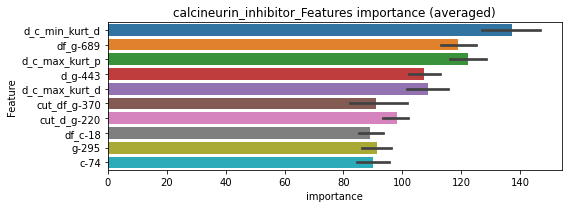

len(train_index) : 2859
len(valid_index) : 954
================================= fold 1/4 calcineurin_inhibitor=================================


Training until validation scores don't improve for 30 rounds


len(train_index) : 2860
len(valid_index) : 953
================================= fold 2/4 calcineurin_inhibitor=================================


Early stopping, best iteration is:
[819]	training's binary_logloss: 0.000237022	valid_1's binary_logloss: 0.000851885
Training until validation scores don't improve for 30 rounds


len(train_index) : 2860
len(valid_index) : 953
================================= fold 3/4 calcineurin_inhibitor=================================


Early stopping, best iteration is:
[735]	training's binary_logloss: 0.000242052	valid_1's binary_logloss: 0.00130311
Training until validation scores don't improve for 30 rounds


len(train_index) : 2860
len(valid_index) : 953
================================= fold 4/4 calcineurin_inhibitor=================================


Early stopping, best iteration is:
[776]	training's binary_logloss: 0.00023921	valid_1's binary_logloss: 0.000327092
Training until validation scores don't improve for 30 rounds


calcineurin_inhibitor logloss: 0.0007408189602400911


Early stopping, best iteration is:
[851]	training's binary_logloss: 0.000234329	valid_1's binary_logloss: 0.000481074
neg labels: 3289 → selected neg labels: 3246


calcium_channel_blocker, len(trt): 281, len(othr): 3246
target_rate: 0.0117998 → Adj_target_rate: 0.0101297
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0302367	valid_1's binary_logloss: 0.24995
Early stopping, best iteration is:
[325]	training's binary_logloss: 0.0253698	valid_1's binary_logloss: 0.249094
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[262]	training's binary_logloss: 0.0417231	valid_1's binary_logloss: 0.261337
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0329825	valid_1's binary_logloss: 0.221239
Early stopping, best iteration is:
[335]	training's binary_logloss: 0.0257801	valid_1's binary_logloss: 0.21978
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0316421	valid_1's binary_logloss: 0.209305


1 / 3 AUC score:0.911
y_Threshold: 0.0780762, Threshold: 0.2263794, pos_neg_ratio: 0.8000000
Remove_noisy_data: 418 → Positive_corect_labels: 505/3477
p_label_rate: 0.0100452 Vs.target_rate: 0.01180


Early stopping, best iteration is:
[385]	training's binary_logloss: 0.0174103	valid_1's binary_logloss: 0.205084


Num_p_label: 40.0, conf_0:0.15847, conf_1:0.29429
threshold: 0.2263794, positive_p_label: 40.0/3982, p_label_rate: 0.0100452
positive_y_label: 505.0/3477, y_label_rate: 0.1452401
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0131767	valid_1's binary_logloss: 0.146365
Early stopping, best iteration is:
[335]	training's binary_logloss: 0.00978072	valid_1's binary_logloss: 0.143959
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0135509	valid_1's binary_logloss: 0.119931
Early stopping, best iteration is:
[461]	training's binary_logloss: 0.00411803	valid_1's binary_logloss: 0.11306
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0124703	valid_1's binary_logloss: 0.12661
Early stopping, best iteration is:
[481]	training's binary_logloss: 0.00339791	valid_1's binary_logloss: 0.119404
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0122801	valid_1's binary_logloss: 0.164232


2 / 3 AUC score:0.982
y_Threshold: 0.0624398, Threshold: 0.2263794, pos_neg_ratio: 0.8000000
Remove_noisy_data: 108 → Positive_corect_labels: 451.0/3369
p_label_rate: 0.0241085 Vs.target_rate: 0.01180
Num_p_label: 96.0, conf_0:0.18110, conf_1:0.27166
Num_p_label: 96.0, Expected: 47.0, Adj_threshold_1: 0.2263794
Num_p_label: 86.0, Expected: 47.0, Adj_threshold_2: 0.2663794
Num_p_label: 75.0, Expected: 47.0, Adj_threshold_3: 0.3063794
Num_p_label: 64.0, Expected: 47.0, Adj_threshold_4: 0.3463794


Early stopping, best iteration is:
[312]	training's binary_logloss: 0.0110242	valid_1's binary_logloss: 0.163185


threshold: 0.3463794, positive_p_label: 64.0/3982, p_label_rate: 0.0160723
positive_y_label: 451.0/3369, y_label_rate: 0.1338676
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00846451	valid_1's binary_logloss: 0.113228
Early stopping, best iteration is:
[447]	training's binary_logloss: 0.00287681	valid_1's binary_logloss: 0.108669
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00863572	valid_1's binary_logloss: 0.0889799
Early stopping, best iteration is:
[497]	training's binary_logloss: 0.00225953	valid_1's binary_logloss: 0.0807288
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00884648	valid_1's binary_logloss: 0.106635
Early stopping, best iteration is:
[367]	training's binary_logloss: 0.00501688	valid_1's binary_logloss: 0.10301
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00851789	valid_1's binary_logloss: 0.113566


3 / 3 AUC score:0.994
y_Threshold: 0.0603194, Threshold: 0.3463794, pos_neg_ratio: 0.8000000
Remove_noisy_data: 54 → Positive_corect_labels: 424.0/3315
p_label_rate: 0.0183325 Vs.target_rate: 0.01180
Num_p_label: 73.0, conf_0:0.31174, conf_1:0.38102
Num_p_label: 73.0, Expected: 47.0, Adj_threshold_1: 0.3463794
Num_p_label: 66.0, Expected: 47.0, Adj_threshold_2: 0.3863794


Early stopping, best iteration is:
[379]	training's binary_logloss: 0.00445382	valid_1's binary_logloss: 0.111481


threshold: 0.3863794, positive_p_label: 66.0/3982, p_label_rate: 0.0165746
positive_y_label: 424.0/3315, y_label_rate: 0.1279035


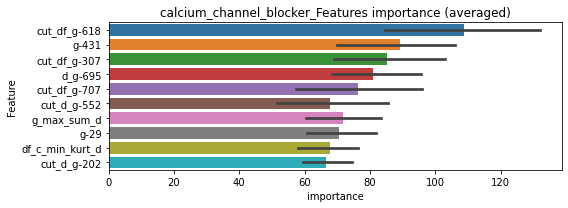

len(train_index) : 2486
len(valid_index) : 829
================================= fold 1/4 calcium_channel_blocker=================================


Training until validation scores don't improve for 30 rounds


len(train_index) : 2486
len(valid_index) : 829
================================= fold 2/4 calcium_channel_blocker=================================


Early stopping, best iteration is:
[264]	training's binary_logloss: 0.00337295	valid_1's binary_logloss: 0.0882831
Training until validation scores don't improve for 30 rounds


len(train_index) : 2486
len(valid_index) : 829
================================= fold 3/4 calcium_channel_blocker=================================


Early stopping, best iteration is:
[301]	training's binary_logloss: 0.00285878	valid_1's binary_logloss: 0.0937007
Training until validation scores don't improve for 30 rounds


len(train_index) : 2487
len(valid_index) : 828
================================= fold 4/4 calcium_channel_blocker=================================


Early stopping, best iteration is:
[239]	training's binary_logloss: 0.00395179	valid_1's binary_logloss: 0.0799186
Training until validation scores don't improve for 30 rounds


calcium_channel_blocker logloss: 0.08218034798137804
calcium_channel_blocker clipping


Early stopping, best iteration is:
[271]	training's binary_logloss: 0.00339198	valid_1's binary_logloss: 0.0668005
neg labels: 3289 → selected neg labels: 3281


cannabinoid_receptor_agonist, len(trt): 42, len(othr): 3281
target_rate: 0.0017637 → Adj_target_rate: 0.0020135
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00260958	valid_1's binary_logloss: 0.0200961
[600]	training's binary_logloss: 0.0005208	valid_1's binary_logloss: 0.0128791
Early stopping, best iteration is:
[670]	training's binary_logloss: 0.000466098	valid_1's binary_logloss: 0.0127885
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0027262	valid_1's binary_logloss: 0.0106325
[600]	training's binary_logloss: 0.000534125	valid_1's binary_logloss: 0.00535792
Early stopping, best iteration is:
[700]	training's binary_logloss: 0.000465615	valid_1's binary_logloss: 0.00526835
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0028026	valid_1's binary_logloss: 0.00662098
[600]	training's binary_logloss: 0.000542842	valid_1's binary_logloss: 0.00230634
Early stopping, best iteration is:
[695]	training's binary_logloss: 0.000488245	valid_1's binary_loglo

1 / 3 AUC score:1.000
y_Threshold: 0.0039214, Threshold: 0.0219825, pos_neg_ratio: 0.8000000
Remove_noisy_data: 132 → Positive_corect_labels: 656/3805
p_label_rate: 0.0100452 Vs.target_rate: 0.00176
Num_p_label: 40.0, conf_0:0.01539, conf_1:0.02858
Num_p_label: 40.0, Expected: 7.0, Adj_threshold_1: 0.0219825
Num_p_label: 11.0, Expected: 7.0, Adj_threshold_2: 0.0619825
threshold: 0.0619825, positive_p_label: 11.0/3982, p_label_rate: 0.0027624
positive_y_label: 656.0/3805, y_label_rate: 0.1724047
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00245552	valid_1's binary_logloss: 0.0221253
[600]	training's binary_logloss: 0.000505131	valid_1's binary_logloss: 0.0159583
Early stopping, best iteration is:
[604]	training's binary_logloss: 0.000500831	valid_1's binary_logloss: 0.0159062
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00255781	valid_1's binary_logloss: 0.00954411
[600]	training's binary_logloss: 0.000519042	valid_1's binary_logloss: 0.00503743
Early stopping, best iteration is:
[648]	training's binary_logloss: 0.000479912	valid_1's binary_logloss: 0.0049453
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00265704	valid_1's binary_logloss: 0.00578698
[600]	training's binary_logloss: 0.00053411	valid_1's binary_logloss: 0.0019058
Early stopping, best iteration is:
[646]	training's binary_logloss: 0.000492556	valid_1's binary_log

2 / 3 AUC score:1.000
y_Threshold: 0.0381443, Threshold: 0.0619825, pos_neg_ratio: 0.8000000
Remove_noisy_data: 0 → Positive_corect_labels: 656.0/3805
p_label_rate: 0.0087896 Vs.target_rate: 0.00176
Num_p_label: 35.0, conf_0:0.04959, conf_1:0.07438
Num_p_label: 35.0, Expected: 7.0, Adj_threshold_1: 0.0619825
Num_p_label: 16.0, Expected: 7.0, Adj_threshold_2: 0.1019825
threshold: 0.1019825, positive_p_label: 16.0/3982, p_label_rate: 0.0040181
positive_y_label: 656.0/3805, y_label_rate: 0.1724047
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00245552	valid_1's binary_logloss: 0.0221253
[600]	training's binary_logloss: 0.000505131	valid_1's binary_logloss: 0.0159583
Early stopping, best iteration is:
[604]	training's binary_logloss: 0.000500831	valid_1's binary_logloss: 0.0159062
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00255781	valid_1's binary_logloss: 0.00954411
[600]	training's binary_logloss: 0.000519042	valid_1's binary_logloss: 0.00503743
Early stopping, best iteration is:
[648]	training's binary_logloss: 0.000479912	valid_1's binary_logloss: 0.0049453
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00265704	valid_1's binary_logloss: 0.00578698
[600]	training's binary_logloss: 0.00053411	valid_1's binary_logloss: 0.0019058
Early stopping, best iteration is:
[647]	training's binary_logloss: 0.000492556	valid_1's binary_log

3 / 3 AUC score:1.000
y_Threshold: 0.0381443, Threshold: 0.1019825, pos_neg_ratio: 0.8000000
Remove_noisy_data: 0 → Positive_corect_labels: 656.0/3805
p_label_rate: 0.0040181 Vs.target_rate: 0.00176
Num_p_label: 16.0, conf_0:0.09178, conf_1:0.11218
Num_p_label: 16.0, Expected: 7.0, Adj_threshold_1: 0.1019825
threshold: 0.1019825, positive_p_label: 16.0/3982, p_label_rate: 0.0040181
positive_y_label: 656.0/3805, y_label_rate: 0.1724047


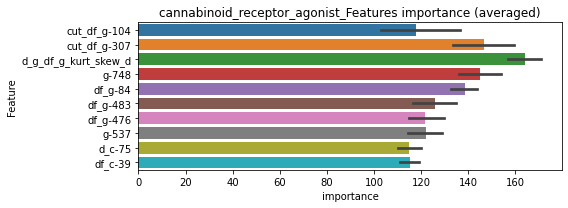

len(train_index) : 2853
len(valid_index) : 952
================================= fold 1/4 cannabinoid_receptor_agonist=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[824]	training's binary_logloss: 0.000480575	valid_1's binary_logloss: 0.0127709


len(train_index) : 2854
len(valid_index) : 951
================================= fold 2/4 cannabinoid_receptor_agonist=================================


Training until validation scores don't improve for 30 rounds


len(train_index) : 2854
len(valid_index) : 951
================================= fold 3/4 cannabinoid_receptor_agonist=================================


Early stopping, best iteration is:
[488]	training's binary_logloss: 0.000744775	valid_1's binary_logloss: 0.00651044
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[911]	training's binary_logloss: 0.00048143	valid_1's binary_logloss: 0.00172183


len(train_index) : 2854
len(valid_index) : 951
================================= fold 4/4 cannabinoid_receptor_agonist=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[735]	training's binary_logloss: 0.000519521	valid_1's binary_logloss: 0.00673759


cannabinoid_receptor_agonist logloss: 0.006936712304845355


neg labels: 3289 → selected neg labels: 3280


cannabinoid_receptor_antagonist, len(trt): 55, len(othr): 3280
target_rate: 0.0023096 → Adj_target_rate: 0.0025322
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00316063	valid_1's binary_logloss: 0.0303756
Early stopping, best iteration is:
[426]	training's binary_logloss: 0.00119769	valid_1's binary_logloss: 0.0269369
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00323075	valid_1's binary_logloss: 0.0270678
[600]	training's binary_logloss: 0.000633666	valid_1's binary_logloss: 0.0195761
Early stopping, best iteration is:
[630]	training's binary_logloss: 0.00059249	valid_1's binary_logloss: 0.0195512
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00338183	valid_1's binary_logloss: 0.0134426
[600]	training's binary_logloss: 0.000662746	valid_1's binary_logloss: 0.00825786
Early stopping, best iteration is:
[615]	training's binary_logloss: 0.000640302	valid_1's binary_logloss: 0.00818444
Training until validation scores don't improve for 30 rounds
[300]	

1 / 3 AUC score:1.000
y_Threshold: 0.0055224, Threshold: 0.0221418, pos_neg_ratio: 0.8000000
Remove_noisy_data: 134 → Positive_corect_labels: 655/3802
p_label_rate: 0.0100452 Vs.target_rate: 0.00231
Num_p_label: 40.0, conf_0:0.01550, conf_1:0.02878
Num_p_label: 40.0, Expected: 9.2, Adj_threshold_1: 0.0221418
Num_p_label: 7.0, Expected: 9.2, Adj_threshold_2: 0.0621418
threshold: 0.0621418, positive_p_label: 7.0/3982, p_label_rate: 0.0017579
positive_y_label: 655.0/3802, y_label_rate: 0.1722777
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00285519	valid_1's binary_logloss: 0.0308187
Early stopping, best iteration is:
[383]	training's binary_logloss: 0.00145955	valid_1's binary_logloss: 0.0282226
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00313091	valid_1's binary_logloss: 0.0153344
[600]	training's binary_logloss: 0.000629626	valid_1's binary_logloss: 0.0100643
Early stopping, best iteration is:
[692]	training's binary_logloss: 0.000533422	valid_1's binary_logloss: 0.00976401
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00309472	valid_1's binary_logloss: 0.0154515
[600]	training's binary_logloss: 0.0006237	valid_1's binary_logloss: 0.0104053
Early stopping, best iteration is:
[630]	training's binary_logloss: 0.00058205	valid_1's binary_logloss: 0.0102721
Training until validation scores don't improve for 30 rounds
[300]	tra

2 / 3 AUC score:1.000
y_Threshold: 0.0269635, Threshold: 0.0621418, pos_neg_ratio: 0.8000000
Remove_noisy_data: 6 → Positive_corect_labels: 652.0/3796
p_label_rate: 0.0060271 Vs.target_rate: 0.00231
Num_p_label: 24.0, conf_0:0.04971, conf_1:0.07457
Num_p_label: 24.0, Expected: 9.2, Adj_threshold_1: 0.0621418
Num_p_label: 12.0, Expected: 9.2, Adj_threshold_2: 0.1021418
threshold: 0.1021418, positive_p_label: 12.0/3982, p_label_rate: 0.0030136
positive_y_label: 652.0/3796, y_label_rate: 0.1717597
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00292107	valid_1's binary_logloss: 0.0210027
[600]	training's binary_logloss: 0.000604398	valid_1's binary_logloss: 0.0159242
Early stopping, best iteration is:
[707]	training's binary_logloss: 0.000507074	valid_1's binary_logloss: 0.0156013
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0030126	valid_1's binary_logloss: 0.0162621
[600]	training's binary_logloss: 0.000604947	valid_1's binary_logloss: 0.00957379
Early stopping, best iteration is:
[702]	training's binary_logloss: 0.000508763	valid_1's binary_logloss: 0.00932285
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00298018	valid_1's binary_logloss: 0.0133485
[600]	training's binary_logloss: 0.000612846	valid_1's binary_logloss: 0.00708165
Early stopping, best iteration is:
[744]	training's binary_logloss: 0.000508056	valid_1's binary_log

3 / 3 AUC score:1.000
y_Threshold: 0.0170945, Threshold: 0.1021418, pos_neg_ratio: 0.8000000
Remove_noisy_data: 2 → Positive_corect_labels: 651.0/3794
p_label_rate: 0.0035158 Vs.target_rate: 0.00231
Num_p_label: 14.0, conf_0:0.09193, conf_1:0.11236
Num_p_label: 14.0, Expected: 9.2, Adj_threshold_1: 0.1021418
threshold: 0.1021418, positive_p_label: 14.0/3982, p_label_rate: 0.0035158
positive_y_label: 651.0/3794, y_label_rate: 0.1715867


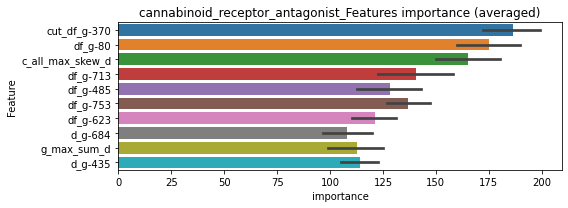

len(train_index) : 2845
len(valid_index) : 949
================================= fold 1/4 cannabinoid_receptor_antagonist=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[884]	training's binary_logloss: 0.000520179	valid_1's binary_logloss: 0.0156467


len(train_index) : 2845
len(valid_index) : 949
================================= fold 2/4 cannabinoid_receptor_antagonist=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[815]	training's binary_logloss: 0.00054597	valid_1's binary_logloss: 0.00839941


len(train_index) : 2846
len(valid_index) : 948
================================= fold 3/4 cannabinoid_receptor_antagonist=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[747]	training's binary_logloss: 0.000592308	valid_1's binary_logloss: 0.0102609


len(train_index) : 2846
len(valid_index) : 948
================================= fold 4/4 cannabinoid_receptor_antagonist=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[672]	training's binary_logloss: 0.000639679	valid_1's binary_logloss: 0.0121081


cannabinoid_receptor_antagonist logloss: 0.01160470929963809


neg labels: 3289 → selected neg labels: 3281


carbonic_anhydrase_inhibitor, len(trt): 36, len(othr): 3281
target_rate: 0.0015117 → Adj_target_rate: 0.0017663
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00259459	valid_1's binary_logloss: 0.0151895
[600]	training's binary_logloss: 0.000483186	valid_1's binary_logloss: 0.00876082
Early stopping, best iteration is:
[592]	training's binary_logloss: 0.000489748	valid_1's binary_logloss: 0.0087325
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00247201	valid_1's binary_logloss: 0.00948403
[600]	training's binary_logloss: 0.00048063	valid_1's binary_logloss: 0.00550783
Early stopping, best iteration is:
[664]	training's binary_logloss: 0.000452127	valid_1's binary_logloss: 0.00547606
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00260205	valid_1's binary_logloss: 0.00464432
[600]	training's binary_logloss: 0.00048989	valid_1's binary_logloss: 0.00128204
Early stopping, best iteration is:
[675]	training's binary_logloss: 0.000457586	valid_1's binary_l

1 / 3 AUC score:1.000
y_Threshold: 0.0029000, Threshold: 0.0413584, pos_neg_ratio: 0.8000000
Remove_noisy_data: 132 → Positive_corect_labels: 656/3805
p_label_rate: 0.0100452 Vs.target_rate: 0.00151
Num_p_label: 40.0, conf_0:0.02895, conf_1:0.05377
Num_p_label: 40.0, Expected: 6.0, Adj_threshold_1: 0.0413584
Num_p_label: 20.0, Expected: 6.0, Adj_threshold_2: 0.0813584
Num_p_label: 14.0, Expected: 6.0, Adj_threshold_3: 0.1213584
threshold: 0.1213584, positive_p_label: 14.0/3982, p_label_rate: 0.0035158
positive_y_label: 656.0/3805, y_label_rate: 0.1724047
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00223133	valid_1's binary_logloss: 0.014268
[600]	training's binary_logloss: 0.000460618	valid_1's binary_logloss: 0.00855957
Early stopping, best iteration is:
[612]	training's binary_logloss: 0.000451826	valid_1's binary_logloss: 0.00852859
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00225351	valid_1's binary_logloss: 0.00873207
[600]	training's binary_logloss: 0.000471408	valid_1's binary_logloss: 0.00489027
Early stopping, best iteration is:
[581]	training's binary_logloss: 0.000486612	valid_1's binary_logloss: 0.00486316
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00232651	valid_1's binary_logloss: 0.00422027
[600]	training's binary_logloss: 0.000478605	valid_1's binary_logloss: 0.00119556
Early stopping, best iteration is:
[617]	training's binary_logloss: 0.000468472	valid_1's binary

2 / 3 AUC score:1.000
y_Threshold: 0.0263152, Threshold: 0.1213584, pos_neg_ratio: 0.8000000


Early stopping, best iteration is:
[552]	training's binary_logloss: 0.000496517	valid_1's binary_logloss: 0.0151818


Remove_noisy_data: 0 → Positive_corect_labels: 656.0/3805
p_label_rate: 0.0107986 Vs.target_rate: 0.00151
Num_p_label: 43.0, conf_0:0.09709, conf_1:0.14563
Num_p_label: 43.0, Expected: 6.0, Adj_threshold_1: 0.1213584
Num_p_label: 31.0, Expected: 6.0, Adj_threshold_2: 0.1613584
Num_p_label: 26.0, Expected: 6.0, Adj_threshold_3: 0.2013584
Num_p_label: 16.0, Expected: 6.0, Adj_threshold_4: 0.2413584
Num_p_label: 11.0, Expected: 6.0, Adj_threshold_5: 0.2813584
threshold: 0.2813584, positive_p_label: 11.0/3982, p_label_rate: 0.0027624
positive_y_label: 656.0/3805, y_label_rate: 0.1724047
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00223133	valid_1's binary_logloss: 0.014268
[600]	training's binary_logloss: 0.000460618	valid_1's binary_logloss: 0.00855957
Early stopping, best iteration is:
[612]	training's binary_logloss: 0.000451826	valid_1's binary_logloss: 0.00852859
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00225351	valid_1's binary_logloss: 0.00873207
[600]	training's binary_logloss: 0.000471408	valid_1's binary_logloss: 0.00489027
Early stopping, best iteration is:
[581]	training's binary_logloss: 0.000486612	valid_1's binary_logloss: 0.00486316
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00232651	valid_1's binary_logloss: 0.00422027
[600]	training's binary_logloss: 0.000478605	valid_1's binary_logloss: 0.00119556
Early stopping, best iteration is:
[617]	training's binary_logloss: 0.000468472	valid_1's binary

3 / 3 AUC score:1.000
y_Threshold: 0.0263152, Threshold: 0.2813584, pos_neg_ratio: 0.8000000


Early stopping, best iteration is:
[552]	training's binary_logloss: 0.000496517	valid_1's binary_logloss: 0.0151818


Remove_noisy_data: 0 → Positive_corect_labels: 656.0/3805
p_label_rate: 0.0027624 Vs.target_rate: 0.00151
Num_p_label: 11.0, conf_0:0.25322, conf_1:0.30949
Num_p_label: 11.0, Expected: 6.0, Adj_threshold_1: 0.2813584
threshold: 0.2813584, positive_p_label: 11.0/3982, p_label_rate: 0.0027624
positive_y_label: 656.0/3805, y_label_rate: 0.1724047


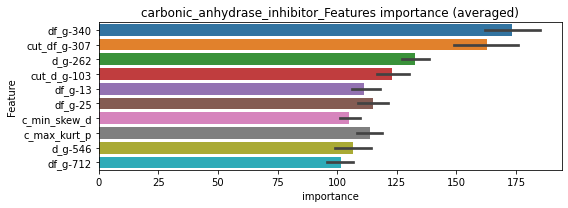

len(train_index) : 2853
len(valid_index) : 952
================================= fold 1/4 carbonic_anhydrase_inhibitor=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[759]	training's binary_logloss: 0.000469581	valid_1's binary_logloss: 0.00559138


len(train_index) : 2854
len(valid_index) : 951
================================= fold 2/4 carbonic_anhydrase_inhibitor=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[715]	training's binary_logloss: 0.00049418	valid_1's binary_logloss: 0.00447412


len(train_index) : 2854
len(valid_index) : 951
================================= fold 3/4 carbonic_anhydrase_inhibitor=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[801]	training's binary_logloss: 0.000473085	valid_1's binary_logloss: 0.0012105


len(train_index) : 2854
len(valid_index) : 951
================================= fold 4/4 carbonic_anhydrase_inhibitor=================================


Training until validation scores don't improve for 30 rounds


carbonic_anhydrase_inhibitor logloss: 0.00610823983431924


Early stopping, best iteration is:
[612]	training's binary_logloss: 0.000528757	valid_1's binary_logloss: 0.0131574
neg labels: 3289 → selected neg labels: 3283


casein_kinase_inhibitor, len(trt): 36, len(othr): 3283
target_rate: 0.0015117 → Adj_target_rate: 0.0017663
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0017312	valid_1's binary_logloss: 0.0119686
[600]	training's binary_logloss: 0.000409598	valid_1's binary_logloss: 0.00775193
Early stopping, best iteration is:
[642]	training's binary_logloss: 0.000390223	valid_1's binary_logloss: 0.00769878
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00188641	valid_1's binary_logloss: 0.00724627
[600]	training's binary_logloss: 0.000425446	valid_1's binary_logloss: 0.00345823
Early stopping, best iteration is:
[629]	training's binary_logloss: 0.000408581	valid_1's binary_logloss: 0.00339097
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00193399	valid_1's binary_logloss: 0.00375967
[600]	training's binary_logloss: 0.000433038	valid_1's binary_logloss: 0.00129146
Early stopping, best iteration is:
[645]	training's binary_logloss: 0.000408382	valid_1's binary

1 / 3 AUC score:1.000
y_Threshold: 0.0026218, Threshold: 0.0061910, pos_neg_ratio: 0.8000000


Early stopping, best iteration is:
[546]	training's binary_logloss: 0.000456656	valid_1's binary_logloss: 0.0125041


Remove_noisy_data: 132 → Positive_corect_labels: 656/3807
p_label_rate: 0.0100452 Vs.target_rate: 0.00151
Num_p_label: 40.0, conf_0:0.00433, conf_1:0.00805
Num_p_label: 40.0, Expected: 6.0, Adj_threshold_1: 0.0061910
Num_p_label: 0.0, Expected: 6.0, Adj_threshold_2: 0.0461910
threshold: 0.0461910, positive_p_label: 0.0/3982, p_label_rate: 0.0000000
positive_y_label: 656.0/3807, y_label_rate: 0.1723142
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00168777	valid_1's binary_logloss: 0.0121709
[600]	training's binary_logloss: 0.000398071	valid_1's binary_logloss: 0.00828062
Early stopping, best iteration is:
[574]	training's binary_logloss: 0.00041633	valid_1's binary_logloss: 0.00822335
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00171461	valid_1's binary_logloss: 0.0060765
[600]	training's binary_logloss: 0.000404373	valid_1's binary_logloss: 0.00282259
Early stopping, best iteration is:
[669]	training's binary_logloss: 0.000378159	valid_1's binary_logloss: 0.00276083
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00178578	valid_1's binary_logloss: 0.00337474
[600]	training's binary_logloss: 0.000414829	valid_1's binary_logloss: 0.00123632
Early stopping, best iteration is:
[683]	training's binary_logloss: 0.000392163	valid_1's binary_

2 / 3 AUC score:1.000
y_Threshold: 0.0221320, Threshold: 0.0461910, pos_neg_ratio: 0.8000000
Remove_noisy_data: 0 → Positive_corect_labels: 656.0/3807
p_label_rate: 0.0005023 Vs.target_rate: 0.00151
Num_p_label: 2.0, conf_0:0.03695, conf_1:0.05543
Num_p_label: 2.0, Expected: 6.0, Adj_threshold_1: 0.0461910
threshold: 0.0461910, positive_p_label: 2.0/3982, p_label_rate: 0.0005023
positive_y_label: 656.0/3807, y_label_rate: 0.1723142
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00168777	valid_1's binary_logloss: 0.0121709
[600]	training's binary_logloss: 0.000398071	valid_1's binary_logloss: 0.00828062
Early stopping, best iteration is:
[574]	training's binary_logloss: 0.00041633	valid_1's binary_logloss: 0.00822335
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00171461	valid_1's binary_logloss: 0.0060765
[600]	training's binary_logloss: 0.000404373	valid_1's binary_logloss: 0.00282259
Early stopping, best iteration is:
[677]	training's binary_logloss: 0.000378159	valid_1's binary_logloss: 0.00276083
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00178578	valid_1's binary_logloss: 0.00337474
[600]	training's binary_logloss: 0.000414829	valid_1's binary_logloss: 0.00123632
Early stopping, best iteration is:
[660]	training's binary_logloss: 0.000392163	valid_1's binary_

3 / 3 AUC score:1.000
y_Threshold: 0.0221320, Threshold: 0.0461910, pos_neg_ratio: 0.8000000
Remove_noisy_data: 0 → Positive_corect_labels: 656.0/3807
p_label_rate: 0.0005023 Vs.target_rate: 0.00151
Num_p_label: 2.0, conf_0:0.04157, conf_1:0.05081
Num_p_label: 2.0, Expected: 6.0, Adj_threshold_1: 0.0461910
threshold: 0.0461910, positive_p_label: 2.0/3982, p_label_rate: 0.0005023
positive_y_label: 656.0/3807, y_label_rate: 0.1723142


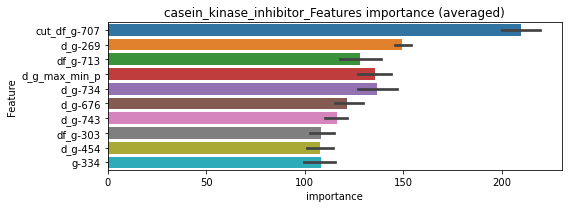

len(train_index) : 2855
len(valid_index) : 952
================================= fold 1/4 casein_kinase_inhibitor=================================


Training until validation scores don't improve for 30 rounds


len(train_index) : 2855
len(valid_index) : 952
================================= fold 2/4 casein_kinase_inhibitor=================================


Early stopping, best iteration is:
[554]	training's binary_logloss: 0.000536557	valid_1's binary_logloss: 0.00768164
Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.000385773	valid_1's binary_logloss: 0.0023813
Early stopping, best iteration is:
[1029]	training's binary_logloss: 0.0003834	valid_1's binary_logloss: 0.00237641


len(train_index) : 2855
len(valid_index) : 952
================================= fold 3/4 casein_kinase_inhibitor=================================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.00039686	valid_1's binary_logloss: 0.00131801
Early stopping, best iteration is:
[1059]	training's binary_logloss: 0.000394039	valid_1's binary_logloss: 0.00131093


len(train_index) : 2856
len(valid_index) : 951
================================= fold 4/4 casein_kinase_inhibitor=================================


Training until validation scores don't improve for 30 rounds


casein_kinase_inhibitor logloss: 0.005525477695907963


Early stopping, best iteration is:
[570]	training's binary_logloss: 0.000522876	valid_1's binary_logloss: 0.0107372
neg labels: 3289 → selected neg labels: 3288


caspase_activator, len(trt): 18, len(othr): 3288
target_rate: 0.0007559 → Adj_target_rate: 0.0009799
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.000846184	valid_1's binary_logloss: 0.00210788
Early stopping, best iteration is:
[494]	training's binary_logloss: 0.000310003	valid_1's binary_logloss: 0.00125225
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0008495	valid_1's binary_logloss: 0.00266227
Early stopping, best iteration is:
[514]	training's binary_logloss: 0.000300261	valid_1's binary_logloss: 0.00155765
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.000841685	valid_1's binary_logloss: 0.00282947
Early stopping, best iteration is:
[519]	training's binary_logloss: 0.000302845	valid_1's binary_logloss: 0.00183049
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.000833356	valid_1's binary_logloss: 0.00166341


1 / 3 AUC score:1.000
y_Threshold: 0.0014064, Threshold: 0.0102984, pos_neg_ratio: 0.8000000
Remove_noisy_data: 132 → Positive_corect_labels: 657/3813
p_label_rate: 0.0100452 Vs.target_rate: 0.00076
Num_p_label: 40.0, conf_0:0.00721, conf_1:0.01339
Num_p_label: 40.0, Expected: 3.0, Adj_threshold_1: 0.0102984
Num_p_label: 12.0, Expected: 3.0, Adj_threshold_2: 0.0502984
Num_p_label: 5.0, Expected: 3.0, Adj_threshold_3: 0.0902984


Early stopping, best iteration is:
[568]	training's binary_logloss: 0.000289709	valid_1's binary_logloss: 0.000766636


threshold: 0.0902984, positive_p_label: 5.0/3982, p_label_rate: 0.0012557
positive_y_label: 657.0/3813, y_label_rate: 0.1723053
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0007865	valid_1's binary_logloss: 0.00148663
Early stopping, best iteration is:
[531]	training's binary_logloss: 0.000281292	valid_1's binary_logloss: 0.000681353
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00078695	valid_1's binary_logloss: 0.00219856
Early stopping, best iteration is:
[511]	training's binary_logloss: 0.00028587	valid_1's binary_logloss: 0.0011406
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.000792849	valid_1's binary_logloss: 0.00332042
Early stopping, best iteration is:
[507]	training's binary_logloss: 0.000287835	valid_1's binary_logloss: 0.00238318
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.000794597	valid_1's binary_logloss: 0.00135383


2 / 3 AUC score:1.000
y_Threshold: 0.0584154, Threshold: 0.0902984, pos_neg_ratio: 0.8000000
Remove_noisy_data: 0 → Positive_corect_labels: 657.0/3813
p_label_rate: 0.0060271 Vs.target_rate: 0.00076
Num_p_label: 24.0, conf_0:0.07224, conf_1:0.10836
Num_p_label: 24.0, Expected: 3.0, Adj_threshold_1: 0.0902984
Num_p_label: 18.0, Expected: 3.0, Adj_threshold_2: 0.1302984
Num_p_label: 14.0, Expected: 3.0, Adj_threshold_3: 0.1702984
Num_p_label: 11.0, Expected: 3.0, Adj_threshold_4: 0.2102984


Early stopping, best iteration is:
[558]	training's binary_logloss: 0.000277594	valid_1's binary_logloss: 0.000562515


Num_p_label: 9.0, Expected: 3.0, Adj_threshold_5: 0.2502984
Num_p_label: 8.0, Expected: 3.0, Adj_threshold_6: 0.2902984
Num_p_label: 8.0, Expected: 3.0, Adj_threshold_7: 0.3302984
Num_p_label: 4.0, Expected: 3.0, Adj_threshold_8: 0.3702984
threshold: 0.3702984, positive_p_label: 4.0/3982, p_label_rate: 0.0010045
positive_y_label: 657.0/3813, y_label_rate: 0.1723053
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0007865	valid_1's binary_logloss: 0.00148663
Early stopping, best iteration is:
[531]	training's binary_logloss: 0.000281292	valid_1's binary_logloss: 0.000681353
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00078695	valid_1's binary_logloss: 0.00219856
Early stopping, best iteration is:
[511]	training's binary_logloss: 0.00028587	valid_1's binary_logloss: 0.0011406
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.000792849	valid_1's binary_logloss: 0.00332042
Early stopping, best iteration is:
[507]	training's binary_logloss: 0.000287835	valid_1's binary_logloss: 0.00238318
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.000794597	valid_1's binary_logloss: 0.00135383


3 / 3 AUC score:1.000
y_Threshold: 0.0584154, Threshold: 0.3702984, pos_neg_ratio: 0.8000000
Remove_noisy_data: 0 → Positive_corect_labels: 657.0/3813
p_label_rate: 0.0010045 Vs.target_rate: 0.00076
Num_p_label: 4.0, conf_0:0.33327, conf_1:0.40733


Early stopping, best iteration is:
[558]	training's binary_logloss: 0.000277594	valid_1's binary_logloss: 0.000562515


threshold: 0.3702984, positive_p_label: 4.0/3982, p_label_rate: 0.0010045
positive_y_label: 657.0/3813, y_label_rate: 0.1723053


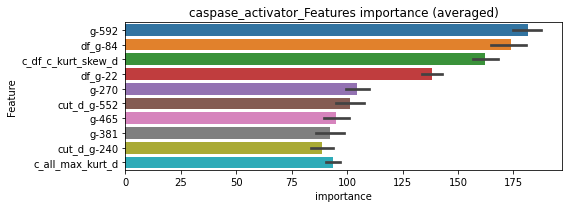

len(train_index) : 2859
len(valid_index) : 954
================================= fold 1/4 caspase_activator=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[918]	training's binary_logloss: 0.000279661	valid_1's binary_logloss: 0.000613394


len(train_index) : 2860
len(valid_index) : 953
================================= fold 2/4 caspase_activator=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[882]	training's binary_logloss: 0.000283222	valid_1's binary_logloss: 0.00100814


len(train_index) : 2860
len(valid_index) : 953
================================= fold 3/4 caspase_activator=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[965]	training's binary_logloss: 0.00027552	valid_1's binary_logloss: 0.00125538


len(train_index) : 2860
len(valid_index) : 953
================================= fold 4/4 caspase_activator=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[868]	training's binary_logloss: 0.00028335	valid_1's binary_logloss: 0.000552369


caspase_activator logloss: 0.0008572594967339151


neg labels: 3289 → selected neg labels: 3286


catechol_o_methyltransferase_inhibitor, len(trt): 18, len(othr): 3286
target_rate: 0.0007559 → Adj_target_rate: 0.0009799
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.000938498	valid_1's binary_logloss: 0.00199217
[600]	training's binary_logloss: 0.000291032	valid_1's binary_logloss: 0.000809971
Early stopping, best iteration is:
[590]	training's binary_logloss: 0.000291032	valid_1's binary_logloss: 0.000809971
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.000910854	valid_1's binary_logloss: 0.00468976
Early stopping, best iteration is:
[521]	training's binary_logloss: 0.000303704	valid_1's binary_logloss: 0.00292142
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.000939475	valid_1's binary_logloss: 0.0019291
[600]	training's binary_logloss: 0.00029442	valid_1's binary_logloss: 0.000940935
Early stopping, best iteration is:
[587]	training's binary_logloss: 0.000294448	valid_1's binary_logloss: 0.000940909
Training until validation scores don't improve for 30 

1 / 3 AUC score:1.000
y_Threshold: 0.0016610, Threshold: 0.0087189, pos_neg_ratio: 0.8000000
Remove_noisy_data: 132 → Positive_corect_labels: 657/3811
p_label_rate: 0.0100452 Vs.target_rate: 0.00076
Num_p_label: 40.0, conf_0:0.00610, conf_1:0.01133
Num_p_label: 40.0, Expected: 3.0, Adj_threshold_1: 0.0087189
Num_p_label: 6.0, Expected: 3.0, Adj_threshold_2: 0.0487189


Early stopping, best iteration is:
[542]	training's binary_logloss: 0.000299502	valid_1's binary_logloss: 0.00186109


threshold: 0.0487189, positive_p_label: 6.0/3982, p_label_rate: 0.0015068
positive_y_label: 657.0/3811, y_label_rate: 0.1723957
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.000889015	valid_1's binary_logloss: 0.0017444
Early stopping, best iteration is:
[531]	training's binary_logloss: 0.000291612	valid_1's binary_logloss: 0.000702051
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.000878459	valid_1's binary_logloss: 0.00374531
Early stopping, best iteration is:
[542]	training's binary_logloss: 0.000287187	valid_1's binary_logloss: 0.00214318
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.000890998	valid_1's binary_logloss: 0.00145723
Early stopping, best iteration is:
[533]	training's binary_logloss: 0.000292997	valid_1's binary_logloss: 0.000589254
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.000889838	valid_1's binary_logloss: 0.00286081


2 / 3 AUC score:1.000
y_Threshold: 0.0912590, Threshold: 0.0487189, pos_neg_ratio: 0.8000000
Remove_noisy_data: 0 → Positive_corect_labels: 657.0/3811
p_label_rate: 0.0042692 Vs.target_rate: 0.00076
Num_p_label: 17.0, conf_0:0.03898, conf_1:0.05846
Num_p_label: 17.0, Expected: 3.0, Adj_threshold_1: 0.0487189
Num_p_label: 8.0, Expected: 3.0, Adj_threshold_2: 0.0887189
Num_p_label: 4.0, Expected: 3.0, Adj_threshold_3: 0.1287189


Early stopping, best iteration is:
[530]	training's binary_logloss: 0.000289334	valid_1's binary_logloss: 0.00150134


threshold: 0.1287189, positive_p_label: 4.0/3982, p_label_rate: 0.0010045
positive_y_label: 657.0/3811, y_label_rate: 0.1723957
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.000889015	valid_1's binary_logloss: 0.0017444
Early stopping, best iteration is:
[531]	training's binary_logloss: 0.000291612	valid_1's binary_logloss: 0.000702051
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.000878459	valid_1's binary_logloss: 0.00374531
Early stopping, best iteration is:
[542]	training's binary_logloss: 0.000287187	valid_1's binary_logloss: 0.00214318
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.000890998	valid_1's binary_logloss: 0.00145723
Early stopping, best iteration is:
[532]	training's binary_logloss: 0.000292997	valid_1's binary_logloss: 0.000589254
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.000889838	valid_1's binary_logloss: 0.00286081


3 / 3 AUC score:1.000
y_Threshold: 0.0912590, Threshold: 0.1287189, pos_neg_ratio: 0.8000000
Remove_noisy_data: 0 → Positive_corect_labels: 657.0/3811
p_label_rate: 0.0010045 Vs.target_rate: 0.00076
Num_p_label: 4.0, conf_0:0.11585, conf_1:0.14159
threshold: 0.1287189, positive_p_label: 4.0/3982, p_label_rate: 0.0010045


Early stopping, best iteration is:
[530]	training's binary_logloss: 0.000289334	valid_1's binary_logloss: 0.00150134


positive_y_label: 657.0/3811, y_label_rate: 0.1723957


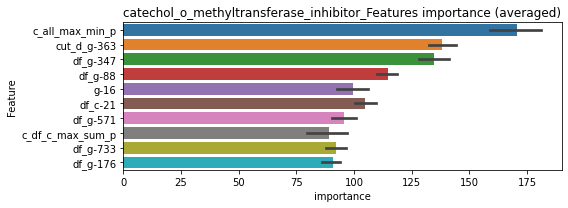

len(train_index) : 2858
len(valid_index) : 953
================================= fold 1/4 catechol_o_methyltransferase_inhibitor=================================


Training until validation scores don't improve for 30 rounds


len(train_index) : 2858


Early stopping, best iteration is:
[850]	training's binary_logloss: 0.000297802	valid_1's binary_logloss: 0.000671607


len(valid_index) : 953
================================= fold 2/4 catechol_o_methyltransferase_inhibitor=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[904]	training's binary_logloss: 0.000289421	valid_1's binary_logloss: 0.00219417


len(train_index) : 2858
len(valid_index) : 953
================================= fold 3/4 catechol_o_methyltransferase_inhibitor=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[838]	training's binary_logloss: 0.000292609	valid_1's binary_logloss: 0.00063022


len(train_index) : 2859
len(valid_index) : 952
================================= fold 4/4 catechol_o_methyltransferase_inhibitor=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[886]	training's binary_logloss: 0.0002897	valid_1's binary_logloss: 0.000778034


catechol_o_methyltransferase_inhibitor logloss: 0.0010690940552537619


neg labels: 3289 → selected neg labels: 3276


cc_chemokine_receptor_antagonist, len(trt): 102, len(othr): 3276
target_rate: 0.0042832 → Adj_target_rate: 0.0042806
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00776813	valid_1's binary_logloss: 0.0836959
Early stopping, best iteration is:
[390]	training's binary_logloss: 0.00356212	valid_1's binary_logloss: 0.0787691
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0083805	valid_1's binary_logloss: 0.0637438
[600]	training's binary_logloss: 0.00129409	valid_1's binary_logloss: 0.0496696
Early stopping, best iteration is:
[713]	training's binary_logloss: 0.000948319	valid_1's binary_logloss: 0.0483328
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00835346	valid_1's binary_logloss: 0.0501514
[600]	training's binary_logloss: 0.0012927	valid_1's binary_logloss: 0.0349357
Early stopping, best iteration is:
[708]	training's binary_logloss: 0.000964438	valid_1's binary_logloss: 0.0337669
Training until validation scores don't improve for 30 rounds
[300]	train

1 / 3 AUC score:0.997
y_Threshold: 0.0132871, Threshold: 0.0430426, pos_neg_ratio: 0.8000000
Remove_noisy_data: 150 → Positive_corect_labels: 646/3781
p_label_rate: 0.0100452 Vs.target_rate: 0.00428
Num_p_label: 40.0, conf_0:0.03013, conf_1:0.05596
Num_p_label: 40.0, Expected: 17.1, Adj_threshold_1: 0.0430426
Num_p_label: 8.0, Expected: 17.1, Adj_threshold_2: 0.0830426
threshold: 0.0830426, positive_p_label: 8.0/3982, p_label_rate: 0.0020090
positive_y_label: 646.0/3781, y_label_rate: 0.1708543
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00752657	valid_1's binary_logloss: 0.0689217
[600]	training's binary_logloss: 0.00118382	valid_1's binary_logloss: 0.0579376
Early stopping, best iteration is:
[602]	training's binary_logloss: 0.00117593	valid_1's binary_logloss: 0.0578631
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00710749	valid_1's binary_logloss: 0.0651071
Early stopping, best iteration is:
[550]	training's binary_logloss: 0.00137488	valid_1's binary_logloss: 0.0543973
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00771354	valid_1's binary_logloss: 0.0516555
Early stopping, best iteration is:
[511]	training's binary_logloss: 0.00171269	valid_1's binary_logloss: 0.0411151
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0074504	valid_1's binary_logloss: 0.0531818
[600]	traini

2 / 3 AUC score:0.999
y_Threshold: 0.0322867, Threshold: 0.0830426, pos_neg_ratio: 0.8000000
Remove_noisy_data: 26 → Positive_corect_labels: 633.0/3755
p_label_rate: 0.0055249 Vs.target_rate: 0.00428
Num_p_label: 22.0, conf_0:0.06643, conf_1:0.09965
threshold: 0.0830426, positive_p_label: 22.0/3982, p_label_rate: 0.0055249
positive_y_label: 633.0/3755, y_label_rate: 0.1685752
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00692879	valid_1's binary_logloss: 0.0608225
Early stopping, best iteration is:
[546]	training's binary_logloss: 0.00134718	valid_1's binary_logloss: 0.0511504
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00699565	valid_1's binary_logloss: 0.0615496
[600]	training's binary_logloss: 0.00111655	valid_1's binary_logloss: 0.0495783
Early stopping, best iteration is:
[644]	training's binary_logloss: 0.000980536	valid_1's binary_logloss: 0.0493798
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00728406	valid_1's binary_logloss: 0.0444318
[600]	training's binary_logloss: 0.00116019	valid_1's binary_logloss: 0.0325748
Early stopping, best iteration is:
[693]	training's binary_logloss: 0.000901713	valid_1's binary_logloss: 0.0320302
Training until validation scores don't improve for 30 rounds
[300]	tra

3 / 3 AUC score:0.999
y_Threshold: 0.0339445, Threshold: 0.0830426, pos_neg_ratio: 0.8000000
Remove_noisy_data: 16 → Positive_corect_labels: 625.0/3739
p_label_rate: 0.0067805 Vs.target_rate: 0.00428
Num_p_label: 27.0, conf_0:0.07474, conf_1:0.09135


Early stopping, best iteration is:
[453]	training's binary_logloss: 0.00203077	valid_1's binary_logloss: 0.0489314


Num_p_label: 27.0, Expected: 17.1, Adj_threshold_1: 0.0830426
Num_p_label: 10.0, Expected: 17.1, Adj_threshold_2: 0.1230426
threshold: 0.1230426, positive_p_label: 10.0/3982, p_label_rate: 0.0025113
positive_y_label: 625.0/3739, y_label_rate: 0.1671570


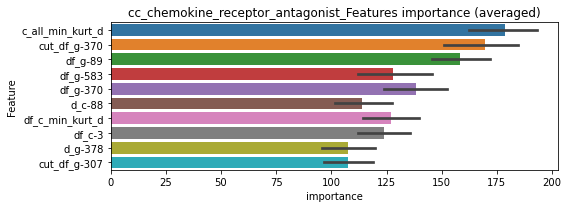

len(train_index) : 2804
len(valid_index) : 935
================================= fold 1/4 cc_chemokine_receptor_antagonist=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[814]	training's binary_logloss: 0.000792984	valid_1's binary_logloss: 0.0318257


len(train_index) : 2804
len(valid_index) : 935
================================= fold 2/4 cc_chemokine_receptor_antagonist=================================


Training until validation scores don't improve for 30 rounds


len(train_index) : 2804
len(valid_index) : 935
================================= fold 3/4 cc_chemokine_receptor_antagonist=================================


Early stopping, best iteration is:
[501]	training's binary_logloss: 0.0012612	valid_1's binary_logloss: 0.0387207
Training until validation scores don't improve for 30 rounds


len(train_index) : 2805
len(valid_index) : 934
================================= fold 4/4 cc_chemokine_receptor_antagonist=================================


Early stopping, best iteration is:
[449]	training's binary_logloss: 0.00144386	valid_1's binary_logloss: 0.0353406
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[454]	training's binary_logloss: 0.00140582	valid_1's binary_logloss: 0.0478767


cc_chemokine_receptor_antagonist logloss: 0.03843840119235901
cc_chemokine_receptor_antagonist clipping


neg labels: 3289 → selected neg labels: 3288


cck_receptor_antagonist, len(trt): 18, len(othr): 3288
target_rate: 0.0007559 → Adj_target_rate: 0.0009799
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00102163	valid_1's binary_logloss: 0.00224566
[600]	training's binary_logloss: 0.000301506	valid_1's binary_logloss: 0.000913333
Early stopping, best iteration is:
[599]	training's binary_logloss: 0.000301506	valid_1's binary_logloss: 0.000913333
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00104705	valid_1's binary_logloss: 0.00493043
[600]	training's binary_logloss: 0.000302314	valid_1's binary_logloss: 0.00258946
Early stopping, best iteration is:
[582]	training's binary_logloss: 0.000304549	valid_1's binary_logloss: 0.00258099
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00106893	valid_1's binary_logloss: 0.00190971
[600]	training's binary_logloss: 0.000305871	valid_1's binary_logloss: 0.000726189
Early stopping, best iteration is:
[587]	training's binary_logloss: 0.000306113	valid_1's b

1 / 3 AUC score:1.000
y_Threshold: 0.0013940, Threshold: 0.0029914, pos_neg_ratio: 0.8000000
Remove_noisy_data: 132 → Positive_corect_labels: 657/3813
p_label_rate: 0.0100452 Vs.target_rate: 0.00076
Num_p_label: 40.0, conf_0:0.00209, conf_1:0.00389
Num_p_label: 40.0, Expected: 3.0, Adj_threshold_1: 0.0029914
Num_p_label: 0.0, Expected: 3.0, Adj_threshold_2: 0.0429914
threshold: 0.0429914, positive_p_label: 0.0/3982, p_label_rate: 0.0000000
positive_y_label: 657.0/3813, y_label_rate: 0.1723053
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00101113	valid_1's binary_logloss: 0.0024084
[600]	training's binary_logloss: 0.000299941	valid_1's binary_logloss: 0.00100741
Early stopping, best iteration is:
[572]	training's binary_logloss: 0.000302932	valid_1's binary_logloss: 0.00100678
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.000991406	valid_1's binary_logloss: 0.0050451
[600]	training's binary_logloss: 0.000299453	valid_1's binary_logloss: 0.00282755
Early stopping, best iteration is:
[581]	training's binary_logloss: 0.000300533	valid_1's binary_logloss: 0.00282237
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00101259	valid_1's binary_logloss: 0.00170649
[600]	training's binary_logloss: 0.000299167	valid_1's binary_logloss: 0.000628846
Early stopping, best iteration is:
[597]	training's binary_logloss: 0.000299334	valid_1's bina

2 / 3 AUC score:1.000
y_Threshold: 0.0547183, Threshold: 0.0429914, pos_neg_ratio: 0.8000000
Remove_noisy_data: 0 → Positive_corect_labels: 657.0/3813
p_label_rate: 0.0000000 Vs.target_rate: 0.00076
Num_p_label: 0.0, conf_0:0.03439, conf_1:0.05159
Num_p_label: 0.0, Expected: 3.0, Adj_threshold_1: 0.0429914
threshold: 0.0429914, positive_p_label: 0.0/3982, p_label_rate: 0.0000000
positive_y_label: 657.0/3813, y_label_rate: 0.1723053
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00101113	valid_1's binary_logloss: 0.0024084
[600]	training's binary_logloss: 0.000299941	valid_1's binary_logloss: 0.00100741
Early stopping, best iteration is:
[572]	training's binary_logloss: 0.000302932	valid_1's binary_logloss: 0.00100678
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.000991406	valid_1's binary_logloss: 0.0050451
[600]	training's binary_logloss: 0.000299453	valid_1's binary_logloss: 0.00282755
Early stopping, best iteration is:
[581]	training's binary_logloss: 0.000300533	valid_1's binary_logloss: 0.00282237
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00101259	valid_1's binary_logloss: 0.00170649
[600]	training's binary_logloss: 0.000299167	valid_1's binary_logloss: 0.000628846
Early stopping, best iteration is:
[597]	training's binary_logloss: 0.000299334	valid_1's bina

3 / 3 AUC score:1.000
y_Threshold: 0.0547183, Threshold: 0.0429914, pos_neg_ratio: 0.8000000
Remove_noisy_data: 0 → Positive_corect_labels: 657.0/3813
p_label_rate: 0.0000000 Vs.target_rate: 0.00076
Num_p_label: 0.0, conf_0:0.03869, conf_1:0.04729


[600]	training's binary_logloss: 0.00029943	valid_1's binary_logloss: 0.000712985
Early stopping, best iteration is:
[587]	training's binary_logloss: 0.00029943	valid_1's binary_logloss: 0.000712985


Num_p_label: 0.0, Expected: 3.0, Adj_threshold_1: 0.0429914
threshold: 0.0429914, positive_p_label: 0.0/3982, p_label_rate: 0.0000000
positive_y_label: 657.0/3813, y_label_rate: 0.1723053


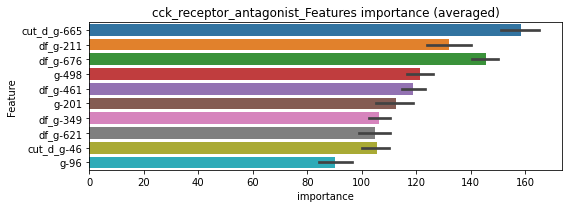

len(train_index) : 2859
len(valid_index) : 954
================================= fold 1/4 cck_receptor_antagonist=================================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.000297965	valid_1's binary_logloss: 0.00105672
Early stopping, best iteration is:
[1012]	training's binary_logloss: 0.000297286	valid_1's binary_logloss: 0.00105549


len(train_index) : 2860
len(valid_index) : 953
================================= fold 2/4 cck_receptor_antagonist=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[906]	training's binary_logloss: 0.000301319	valid_1's binary_logloss: 0.00189313


len(train_index) : 2860
len(valid_index) : 953
================================= fold 3/4 cck_receptor_antagonist=================================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.000301199	valid_1's binary_logloss: 0.000609828
Early stopping, best iteration is:
[1016]	training's binary_logloss: 0.000300581	valid_1's binary_logloss: 0.000608444


len(train_index) : 2860
len(valid_index) : 953
================================= fold 4/4 cck_receptor_antagonist=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[928]	training's binary_logloss: 0.000301249	valid_1's binary_logloss: 0.000756663


cck_receptor_antagonist logloss: 0.0010784649222283992


neg labels: 3289 → selected neg labels: 3241


cdk_inhibitor, len(trt): 352, len(othr): 3241
target_rate: 0.0147812 → Adj_target_rate: 0.0122676
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0465066	valid_1's binary_logloss: 0.294072
Early stopping, best iteration is:
[345]	training's binary_logloss: 0.0347475	valid_1's binary_logloss: 0.292273
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0465169	valid_1's binary_logloss: 0.320625
Early stopping, best iteration is:
[287]	training's binary_logloss: 0.0504007	valid_1's binary_logloss: 0.319905
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0482723	valid_1's binary_logloss: 0.311262
Early stopping, best iteration is:
[306]	training's binary_logloss: 0.0462643	valid_1's binary_logloss: 0.310175
Training until validation scores don't improve for 30 rounds


1 / 3 AUC score:0.841
y_Threshold: 0.1138501, Threshold: 0.4431667, pos_neg_ratio: 0.8000000
Remove_noisy_data: 544 → Positive_corect_labels: 441/3345
p_label_rate: 0.0100452 Vs.target_rate: 0.01478
Num_p_label: 40.0, conf_0:0.31022, conf_1:0.57612
threshold: 0.4431667, positive_p_label: 40.0/3982, p_label_rate: 0.0100452


Early stopping, best iteration is:
[267]	training's binary_logloss: 0.0585378	valid_1's binary_logloss: 0.31743


positive_y_label: 441.0/3345, y_label_rate: 0.1318386
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0170458	valid_1's binary_logloss: 0.168249
Early stopping, best iteration is:
[425]	training's binary_logloss: 0.0065536	valid_1's binary_logloss: 0.159522
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0169492	valid_1's binary_logloss: 0.187137
Early stopping, best iteration is:
[461]	training's binary_logloss: 0.00505314	valid_1's binary_logloss: 0.18014
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0179748	valid_1's binary_logloss: 0.145847
Early stopping, best iteration is:
[492]	training's binary_logloss: 0.00439372	valid_1's binary_logloss: 0.134713
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.01631	valid_1's binary_logloss: 0.179193


2 / 3 AUC score:0.965
y_Threshold: 0.0769541, Threshold: 0.4431667, pos_neg_ratio: 0.8000000
Remove_noisy_data: 136 → Positive_corect_labels: 373.0/3209
p_label_rate: 0.0298845 Vs.target_rate: 0.01478
Num_p_label: 119.0, conf_0:0.35453, conf_1:0.53180
Num_p_label: 119.0, Expected: 58.9, Adj_threshold_1: 0.4431667
Num_p_label: 111.0, Expected: 58.9, Adj_threshold_2: 0.4831667


Early stopping, best iteration is:
[350]	training's binary_logloss: 0.0108289	valid_1's binary_logloss: 0.175608


Num_p_label: 107.0, Expected: 58.9, Adj_threshold_3: 0.5231667
Num_p_label: 97.0, Expected: 58.9, Adj_threshold_4: 0.5631667
Num_p_label: 92.0, Expected: 58.9, Adj_threshold_5: 0.6031667
Num_p_label: 87.0, Expected: 58.9, Adj_threshold_6: 0.6431667
threshold: 0.6431667, positive_p_label: 87.0/3982, p_label_rate: 0.0218483
positive_y_label: 373.0/3209, y_label_rate: 0.1162356
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0106858	valid_1's binary_logloss: 0.153999
Early stopping, best iteration is:
[441]	training's binary_logloss: 0.00358989	valid_1's binary_logloss: 0.148422
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0108686	valid_1's binary_logloss: 0.141968
Early stopping, best iteration is:
[431]	training's binary_logloss: 0.00384435	valid_1's binary_logloss: 0.137897
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0105091	valid_1's binary_logloss: 0.126334
Early stopping, best iteration is:
[483]	training's binary_logloss: 0.00281799	valid_1's binary_logloss: 0.120388
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0109486	valid_1's binary_logloss: 0.125718


3 / 3 AUC score:0.976
y_Threshold: 0.0533276, Threshold: 0.6431667, pos_neg_ratio: 0.8000000


Early stopping, best iteration is:
[493]	training's binary_logloss: 0.00275503	valid_1's binary_logloss: 0.117204


Remove_noisy_data: 74 → Positive_corect_labels: 336.0/3135
p_label_rate: 0.0331492 Vs.target_rate: 0.01478
Num_p_label: 132.0, conf_0:0.50000, conf_1:0.70748
Num_p_label: 132.0, Expected: 58.9, Adj_threshold_1: 0.6431667
Num_p_label: 119.0, Expected: 58.9, Adj_threshold_2: 0.6831667
Num_p_label: 110.0, Expected: 58.9, Adj_threshold_3: 0.7231667
Num_p_label: 105.0, Expected: 58.9, Adj_threshold_4: 0.7631667
Num_p_label: 101.0, Expected: 58.9, Adj_threshold_5: 0.8031667
Num_p_label: 94.0, Expected: 58.9, Adj_threshold_6: 0.8431667
Num_p_label: 86.0, Expected: 58.9, Adj_threshold_7: 0.8831667
threshold: 0.8831667, positive_p_label: 86.0/3982, p_label_rate: 0.0215972
positive_y_label: 336.0/3135, y_label_rate: 0.1071770


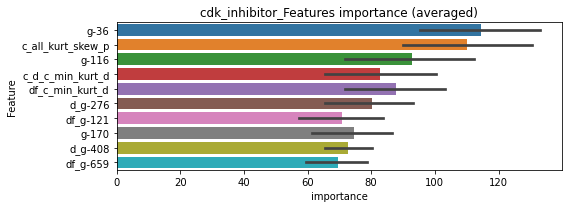

len(train_index) : 2351
len(valid_index) : 784
================================= fold 1/4 cdk_inhibitor=================================


Training until validation scores don't improve for 30 rounds


len(train_index) : 2351
len(valid_index) : 784
================================= fold 2/4 cdk_inhibitor=================================


Early stopping, best iteration is:
[390]	training's binary_logloss: 0.00225783	valid_1's binary_logloss: 0.101267
Training until validation scores don't improve for 30 rounds


len(train_index) : 2351
len(valid_index) : 784
================================= fold 3/4 cdk_inhibitor=================================


Early stopping, best iteration is:
[121]	training's binary_logloss: 0.0130325	valid_1's binary_logloss: 0.136148
Training until validation scores don't improve for 30 rounds


len(train_index) : 2352
len(valid_index) : 783
================================= fold 4/4 cdk_inhibitor=================================


Early stopping, best iteration is:
[283]	training's binary_logloss: 0.00342001	valid_1's binary_logloss: 0.0995844
Training until validation scores don't improve for 30 rounds


cdk_inhibitor logloss: 0.11436252382382738
cdk_inhibitor clipping


Early stopping, best iteration is:
[198]	training's binary_logloss: 0.00567771	valid_1's binary_logloss: 0.120459
neg labels: 3289 → selected neg labels: 3282


chelating_agent, len(trt): 54, len(othr): 3282
target_rate: 0.0022676 → Adj_target_rate: 0.0024931
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00293236	valid_1's binary_logloss: 0.0287295
Early stopping, best iteration is:
[569]	training's binary_logloss: 0.000643994	valid_1's binary_logloss: 0.0227163
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00317632	valid_1's binary_logloss: 0.0220567
[600]	training's binary_logloss: 0.000621278	valid_1's binary_logloss: 0.0151397
Early stopping, best iteration is:
[686]	training's binary_logloss: 0.000532069	valid_1's binary_logloss: 0.0149169
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00334238	valid_1's binary_logloss: 0.00997173
[600]	training's binary_logloss: 0.000640264	valid_1's binary_logloss: 0.00515351
Early stopping, best iteration is:
[662]	training's binary_logloss: 0.000565772	valid_1's binary_logloss: 0.00488594
Training until validation scores don't improve for 30 rounds
[30

1 / 3 AUC score:1.000
y_Threshold: 0.0040088, Threshold: 0.0188039, pos_neg_ratio: 0.8000000
Remove_noisy_data: 132 → Positive_corect_labels: 656/3806
p_label_rate: 0.0100452 Vs.target_rate: 0.00227
Num_p_label: 40.0, conf_0:0.01316, conf_1:0.02445
Num_p_label: 40.0, Expected: 9.0, Adj_threshold_1: 0.0188039
Num_p_label: 23.0, Expected: 9.0, Adj_threshold_2: 0.0588039
Num_p_label: 21.0, Expected: 9.0, Adj_threshold_3: 0.0988039
threshold: 0.0988039, positive_p_label: 21.0/3982, p_label_rate: 0.0052737
positive_y_label: 656.0/3806, y_label_rate: 0.1723594
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0027994	valid_1's binary_logloss: 0.0251697
[600]	training's binary_logloss: 0.000570538	valid_1's binary_logloss: 0.0200361
Early stopping, best iteration is:
[582]	training's binary_logloss: 0.000596388	valid_1's binary_logloss: 0.0199854
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00300172	valid_1's binary_logloss: 0.0196933
[600]	training's binary_logloss: 0.000604131	valid_1's binary_logloss: 0.0134382
Early stopping, best iteration is:
[698]	training's binary_logloss: 0.0005093	valid_1's binary_logloss: 0.0130942
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00306636	valid_1's binary_logloss: 0.00955112
[600]	training's binary_logloss: 0.000614678	valid_1's binary_logloss: 0.00503896
Early stopping, best iteration is:
[673]	training's binary_logloss: 0.000540384	valid_1's binary_loglos

2 / 3 AUC score:1.000
y_Threshold: 0.0203382, Threshold: 0.0988039, pos_neg_ratio: 0.8000000
Remove_noisy_data: 4 → Positive_corect_labels: 654.0/3802
p_label_rate: 0.0062783 Vs.target_rate: 0.00227
Num_p_label: 25.0, conf_0:0.07904, conf_1:0.11856
Num_p_label: 25.0, Expected: 9.0, Adj_threshold_1: 0.0988039
Num_p_label: 23.0, Expected: 9.0, Adj_threshold_2: 0.1388039
Num_p_label: 23.0, Expected: 9.0, Adj_threshold_3: 0.1788039
Num_p_label: 22.0, Expected: 9.0, Adj_threshold_4: 0.2188039
threshold: 0.2188039, positive_p_label: 22.0/3982, p_label_rate: 0.0055249
positive_y_label: 654.0/3802, y_label_rate: 0.1720147
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00294748	valid_1's binary_logloss: 0.0233576
[600]	training's binary_logloss: 0.000588251	valid_1's binary_logloss: 0.0187754
Early stopping, best iteration is:
[676]	training's binary_logloss: 0.000516162	valid_1's binary_logloss: 0.0185177
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00291567	valid_1's binary_logloss: 0.0145123
[600]	training's binary_logloss: 0.00059777	valid_1's binary_logloss: 0.00908353
Early stopping, best iteration is:
[703]	training's binary_logloss: 0.000502143	valid_1's binary_logloss: 0.00881205
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00302139	valid_1's binary_logloss: 0.0166075
[600]	training's binary_logloss: 0.00060203	valid_1's binary_logloss: 0.00908152
Early stopping, best iteration is:
[714]	training's binary_logloss: 0.000504223	valid_1's binary_logl

3 / 3 AUC score:1.000
y_Threshold: 0.0172981, Threshold: 0.2188039, pos_neg_ratio: 0.8000000
Remove_noisy_data: 6 → Positive_corect_labels: 651.0/3796
p_label_rate: 0.0055249 Vs.target_rate: 0.00227
Num_p_label: 22.0, conf_0:0.19692, conf_1:0.24068
Num_p_label: 22.0, Expected: 9.0, Adj_threshold_1: 0.2188039
threshold: 0.2188039, positive_p_label: 22.0/3982, p_label_rate: 0.0055249
positive_y_label: 651.0/3796, y_label_rate: 0.1714963


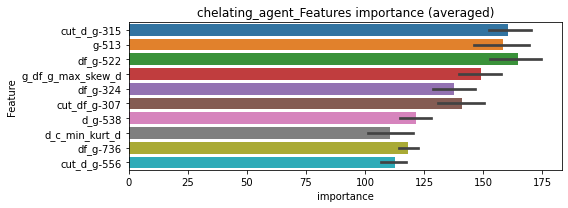

len(train_index) : 2847
len(valid_index) : 949
================================= fold 1/4 chelating_agent=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[925]	training's binary_logloss: 0.000510484	valid_1's binary_logloss: 0.011602


len(train_index) : 2847
len(valid_index) : 949
================================= fold 2/4 chelating_agent=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[797]	training's binary_logloss: 0.000551733	valid_1's binary_logloss: 0.0102421


len(train_index) : 2847
len(valid_index) : 949
================================= fold 3/4 chelating_agent=================================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.000501344	valid_1's binary_logloss: 0.00658555
Early stopping, best iteration is:
[993]	training's binary_logloss: 0.000502014	valid_1's binary_logloss: 0.00657619


len(train_index) : 2847
len(valid_index) : 949
================================= fold 4/4 chelating_agent=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[736]	training's binary_logloss: 0.000584676	valid_1's binary_logloss: 0.0121224


chelating_agent logloss: 0.010135666869427084


neg labels: 3289 → selected neg labels: 3285


chk_inhibitor, len(trt): 24, len(othr): 3285
target_rate: 0.0010078 → Adj_target_rate: 0.0012513
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00119828	valid_1's binary_logloss: 0.00353366
[600]	training's binary_logloss: 0.000341144	valid_1's binary_logloss: 0.001518
Early stopping, best iteration is:
[608]	training's binary_logloss: 0.000340517	valid_1's binary_logloss: 0.00151727
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00123178	valid_1's binary_logloss: 0.00377071
[600]	training's binary_logloss: 0.000348358	valid_1's binary_logloss: 0.00163813
Early stopping, best iteration is:
[597]	training's binary_logloss: 0.000348358	valid_1's binary_logloss: 0.00163813
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00120322	valid_1's binary_logloss: 0.00264882
Early stopping, best iteration is:
[557]	training's binary_logloss: 0.000354588	valid_1's binary_logloss: 0.00100247
Training until validation scores don't improve for 30 rounds


1 / 3 AUC score:1.000
y_Threshold: 0.0024980, Threshold: 0.0602626, pos_neg_ratio: 0.8000000
Remove_noisy_data: 132 → Positive_corect_labels: 657/3810
p_label_rate: 0.0100452 Vs.target_rate: 0.00101
Num_p_label: 40.0, conf_0:0.04218, conf_1:0.07834
Num_p_label: 40.0, Expected: 4.0, Adj_threshold_1: 0.0602626
Num_p_label: 28.0, Expected: 4.0, Adj_threshold_2: 0.1002626
Num_p_label: 25.0, Expected: 4.0, Adj_threshold_3: 0.1402626
Num_p_label: 22.0, Expected: 4.0, Adj_threshold_4: 0.1802626
Num_p_label: 21.0, Expected: 4.0, Adj_threshold_5: 0.2202626
Num_p_label: 21.0, Expected: 4.0, Adj_threshold_6: 0.2602626
Num_p_label: 19.0, Expected: 4.0, Adj_threshold_7: 0.3002626
Num_p_label: 17.0, Expected: 4.0, Adj_threshold_8: 0.3402626
Num_p_label: 15.0, Expected: 4.0, Adj_threshold_9: 0.3802626
Num_p_label: 11.0, Expected: 4.0, Adj_threshold_10: 0.4202626
threshold: 0.4602626, positive_p_label: 7.0/3982, p_label_rate: 0.0017579
positive_y_label: 657.0/3810, y_label_rate: 0.1724409
============

Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0011134	valid_1's binary_logloss: 0.00234324
[600]	training's binary_logloss: 0.000333908	valid_1's binary_logloss: 0.000909944
Early stopping, best iteration is:
[574]	training's binary_logloss: 0.000333987	valid_1's binary_logloss: 0.00090987
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00112744	valid_1's binary_logloss: 0.00395445
Early stopping, best iteration is:
[551]	training's binary_logloss: 0.000336111	valid_1's binary_logloss: 0.00176318
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00110294	valid_1's binary_logloss: 0.00195584
[600]	training's binary_logloss: 0.000331881	valid_1's binary_logloss: 0.000721452
Early stopping, best iteration is:
[573]	training's binary_logloss: 0.000331881	valid_1's binary_logloss: 0.000721452
Training until validation scores don't improve for 30 rou

2 / 3 AUC score:1.000
y_Threshold: 0.1582886, Threshold: 0.4602626, pos_neg_ratio: 0.8000000
Remove_noisy_data: 0 → Positive_corect_labels: 657.0/3810
p_label_rate: 0.0082873 Vs.target_rate: 0.00101
Num_p_label: 33.0, conf_0:0.36821, conf_1:0.55232
Num_p_label: 33.0, Expected: 4.0, Adj_threshold_1: 0.4602626
Num_p_label: 32.0, Expected: 4.0, Adj_threshold_2: 0.5002626
Num_p_label: 29.0, Expected: 4.0, Adj_threshold_3: 0.5402626
Num_p_label: 27.0, Expected: 4.0, Adj_threshold_4: 0.5802626


Early stopping, best iteration is:
[558]	training's binary_logloss: 0.000333879	valid_1's binary_logloss: 0.000850046


Num_p_label: 24.0, Expected: 4.0, Adj_threshold_5: 0.6202626
Num_p_label: 22.0, Expected: 4.0, Adj_threshold_6: 0.6602626
Num_p_label: 21.0, Expected: 4.0, Adj_threshold_7: 0.7002626
Num_p_label: 20.0, Expected: 4.0, Adj_threshold_8: 0.7402626
Num_p_label: 18.0, Expected: 4.0, Adj_threshold_9: 0.7802626
Num_p_label: 17.0, Expected: 4.0, Adj_threshold_10: 0.8202626
threshold: 0.8602626, positive_p_label: 16.0/3982, p_label_rate: 0.0040181
positive_y_label: 657.0/3810, y_label_rate: 0.1724409
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0011134	valid_1's binary_logloss: 0.00234324
[600]	training's binary_logloss: 0.000333908	valid_1's binary_logloss: 0.000909944
Early stopping, best iteration is:
[574]	training's binary_logloss: 0.000333987	valid_1's binary_logloss: 0.00090987
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00112744	valid_1's binary_logloss: 0.00395445
Early stopping, best iteration is:
[551]	training's binary_logloss: 0.000336111	valid_1's binary_logloss: 0.00176318
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00110294	valid_1's binary_logloss: 0.00195584
[600]	training's binary_logloss: 0.000331881	valid_1's binary_logloss: 0.000721452
Early stopping, best iteration is:
[573]	training's binary_logloss: 0.000331881	valid_1's binary_logloss: 0.000721452
Training until validation scores don't improve for 30 rou

3 / 3 AUC score:1.000
y_Threshold: 0.1582886, Threshold: 0.8602626, pos_neg_ratio: 0.8000000
Remove_noisy_data: 0 → Positive_corect_labels: 657.0/3810
p_label_rate: 0.0040181 Vs.target_rate: 0.00101
Num_p_label: 16.0, conf_0:0.50000, conf_1:0.80000
Num_p_label: 16.0, Expected: 4.0, Adj_threshold_1: 0.8602626


Early stopping, best iteration is:
[558]	training's binary_logloss: 0.000333879	valid_1's binary_logloss: 0.000850046


threshold: 0.8602626, positive_p_label: 16.0/3982, p_label_rate: 0.0040181
positive_y_label: 657.0/3810, y_label_rate: 0.1724409


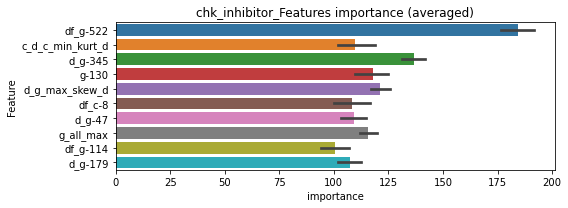

len(train_index) : 2857
len(valid_index) : 953
================================= fold 1/4 chk_inhibitor=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[805]	training's binary_logloss: 0.000341341	valid_1's binary_logloss: 0.000914746


len(train_index) : 2857
len(valid_index) : 953
================================= fold 2/4 chk_inhibitor=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[876]	training's binary_logloss: 0.000335247	valid_1's binary_logloss: 0.00139398


len(train_index) : 2858
len(valid_index) : 952
================================= fold 3/4 chk_inhibitor=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[920]	training's binary_logloss: 0.000335605	valid_1's binary_logloss: 0.00080979


len(train_index) : 2858
len(valid_index) : 952
================================= fold 4/4 chk_inhibitor=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[902]	training's binary_logloss: 0.000337098	valid_1's binary_logloss: 0.000968964


chk_inhibitor logloss: 0.0010219959951980567


neg labels: 3289 → selected neg labels: 3284


chloride_channel_blocker, len(trt): 42, len(othr): 3284
target_rate: 0.0017637 → Adj_target_rate: 0.0020135
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00228362	valid_1's binary_logloss: 0.0178311
[600]	training's binary_logloss: 0.000489149	valid_1's binary_logloss: 0.0112699
Early stopping, best iteration is:
[659]	training's binary_logloss: 0.000449326	valid_1's binary_logloss: 0.0111743
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00241512	valid_1's binary_logloss: 0.0128414
[600]	training's binary_logloss: 0.000500974	valid_1's binary_logloss: 0.00764506
Early stopping, best iteration is:
[622]	training's binary_logloss: 0.000484483	valid_1's binary_logloss: 0.00757476
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00252453	valid_1's binary_logloss: 0.00613499
[600]	training's binary_logloss: 0.000519487	valid_1's binary_logloss: 0.00223207
Early stopping, best iteration is:
[690]	training's binary_logloss: 0.000471425	valid_1's binary_l

1 / 3 AUC score:1.000
y_Threshold: 0.0037569, Threshold: 0.0335272, pos_neg_ratio: 0.8000000
Remove_noisy_data: 132 → Positive_corect_labels: 656/3808
p_label_rate: 0.0100452 Vs.target_rate: 0.00176
Num_p_label: 40.0, conf_0:0.02347, conf_1:0.04359
Num_p_label: 40.0, Expected: 7.0, Adj_threshold_1: 0.0335272
Num_p_label: 20.0, Expected: 7.0, Adj_threshold_2: 0.0735272
Num_p_label: 10.0, Expected: 7.0, Adj_threshold_3: 0.1135272
threshold: 0.1135272, positive_p_label: 10.0/3982, p_label_rate: 0.0025113
positive_y_label: 656.0/3808, y_label_rate: 0.1722689
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00212577	valid_1's binary_logloss: 0.0179719
[600]	training's binary_logloss: 0.0004692	valid_1's binary_logloss: 0.0126028
Early stopping, best iteration is:
[653]	training's binary_logloss: 0.000439367	valid_1's binary_logloss: 0.0124935
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00219873	valid_1's binary_logloss: 0.0136827
[600]	training's binary_logloss: 0.000483322	valid_1's binary_logloss: 0.00887648
Early stopping, best iteration is:
[641]	training's binary_logloss: 0.00045873	valid_1's binary_logloss: 0.00878386
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00226966	valid_1's binary_logloss: 0.00557993
[600]	training's binary_logloss: 0.000493137	valid_1's binary_logloss: 0.00210929
Early stopping, best iteration is:
[662]	training's binary_logloss: 0.00045805	valid_1's binary_loglo

2 / 3 AUC score:1.000
y_Threshold: 0.0285015, Threshold: 0.1135272, pos_neg_ratio: 0.8000000
Remove_noisy_data: 2 → Positive_corect_labels: 655.0/3806
p_label_rate: 0.0118031 Vs.target_rate: 0.00176
Num_p_label: 47.0, conf_0:0.09082, conf_1:0.13623
Num_p_label: 47.0, Expected: 7.0, Adj_threshold_1: 0.1135272
Num_p_label: 39.0, Expected: 7.0, Adj_threshold_2: 0.1535272
Num_p_label: 31.0, Expected: 7.0, Adj_threshold_3: 0.1935272
Num_p_label: 23.0, Expected: 7.0, Adj_threshold_4: 0.2335272
Num_p_label: 19.0, Expected: 7.0, Adj_threshold_5: 0.2735272
Num_p_label: 17.0, Expected: 7.0, Adj_threshold_6: 0.3135272
threshold: 0.3135272, positive_p_label: 17.0/3982, p_label_rate: 0.0042692
positive_y_label: 655.0/3806, y_label_rate: 0.1720967
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00217308	valid_1's binary_logloss: 0.0123523
[600]	training's binary_logloss: 0.000481385	valid_1's binary_logloss: 0.00771599
Early stopping, best iteration is:
[649]	training's binary_logloss: 0.000450388	valid_1's binary_logloss: 0.00762627
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00211286	valid_1's binary_logloss: 0.00998707
[600]	training's binary_logloss: 0.000475676	valid_1's binary_logloss: 0.00557599
Early stopping, best iteration is:
[612]	training's binary_logloss: 0.000467216	valid_1's binary_logloss: 0.00553375
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00211613	valid_1's binary_logloss: 0.012457
[600]	training's binary_logloss: 0.000476077	valid_1's binary_logloss: 0.00818308
Early stopping, best iteration is:
[628]	training's binary_logloss: 0.000457105	valid_1's binary_

3 / 3 AUC score:1.000
y_Threshold: 0.0556172, Threshold: 0.3135272, pos_neg_ratio: 0.8000000
Remove_noisy_data: 0 → Positive_corect_labels: 655.0/3806
p_label_rate: 0.0037670 Vs.target_rate: 0.00176
Num_p_label: 15.0, conf_0:0.28217, conf_1:0.34488
Num_p_label: 15.0, Expected: 7.0, Adj_threshold_1: 0.3135272
threshold: 0.3135272, positive_p_label: 15.0/3982, p_label_rate: 0.0037670
positive_y_label: 655.0/3806, y_label_rate: 0.1720967


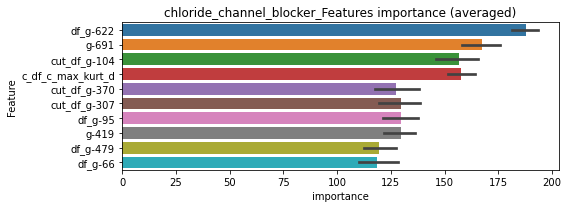

len(train_index) : 2854
len(valid_index) : 952
================================= fold 1/4 chloride_channel_blocker=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[798]	training's binary_logloss: 0.000477451	valid_1's binary_logloss: 0.00619235


len(train_index) : 2854
len(valid_index) : 952
================================= fold 2/4 chloride_channel_blocker=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[870]	training's binary_logloss: 0.0004656	valid_1's binary_logloss: 0.00526051


len(train_index) : 2855
len(valid_index) : 951
================================= fold 3/4 chloride_channel_blocker=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[839]	training's binary_logloss: 0.000465429	valid_1's binary_logloss: 0.00917718


len(train_index) : 2855
len(valid_index) : 951
================================= fold 4/4 chloride_channel_blocker=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[885]	training's binary_logloss: 0.000458112	valid_1's binary_logloss: 0.00464892


chloride_channel_blocker logloss: 0.006319427993440395


neg labels: 3289 → selected neg labels: 3288


cholesterol_inhibitor, len(trt): 48, len(othr): 3288
target_rate: 0.0020156 → Adj_target_rate: 0.0022556
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00292995	valid_1's binary_logloss: 0.01761
[600]	training's binary_logloss: 0.0005644	valid_1's binary_logloss: 0.0110348
Early stopping, best iteration is:
[682]	training's binary_logloss: 0.000497335	valid_1's binary_logloss: 0.0108023
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00286607	valid_1's binary_logloss: 0.0219866
Early stopping, best iteration is:
[453]	training's binary_logloss: 0.000936229	valid_1's binary_logloss: 0.0180454
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00302674	valid_1's binary_logloss: 0.00768873
[600]	training's binary_logloss: 0.000578453	valid_1's binary_logloss: 0.00280119
Early stopping, best iteration is:
[660]	training's binary_logloss: 0.000520478	valid_1's binary_logloss: 0.00267448
Training until validation scores don't improve for 30 rounds
[300]	t

1 / 3 AUC score:1.000
y_Threshold: 0.0043314, Threshold: 0.0128591, pos_neg_ratio: 0.8000000
Remove_noisy_data: 132 → Positive_corect_labels: 657/3813
p_label_rate: 0.0100452 Vs.target_rate: 0.00202
Num_p_label: 40.0, conf_0:0.00900, conf_1:0.01672
Num_p_label: 40.0, Expected: 8.0, Adj_threshold_1: 0.0128591
Num_p_label: 5.0, Expected: 8.0, Adj_threshold_2: 0.0528591
threshold: 0.0528591, positive_p_label: 5.0/3982, p_label_rate: 0.0012557
positive_y_label: 657.0/3813, y_label_rate: 0.1723053
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0028173	valid_1's binary_logloss: 0.0144948
[600]	training's binary_logloss: 0.000545376	valid_1's binary_logloss: 0.00754676
Early stopping, best iteration is:
[663]	training's binary_logloss: 0.000489951	valid_1's binary_logloss: 0.00739597
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00262056	valid_1's binary_logloss: 0.0173759
[600]	training's binary_logloss: 0.000535213	valid_1's binary_logloss: 0.0130721
Early stopping, best iteration is:
[667]	training's binary_logloss: 0.000478164	valid_1's binary_logloss: 0.0128733
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0028628	valid_1's binary_logloss: 0.00704479
[600]	training's binary_logloss: 0.000561185	valid_1's binary_logloss: 0.00254452
Early stopping, best iteration is:
[702]	training's binary_logloss: 0.00048103	valid_1's binary_logl

2 / 3 AUC score:1.000
y_Threshold: 0.0251140, Threshold: 0.0528591, pos_neg_ratio: 0.8000000
Remove_noisy_data: 0 → Positive_corect_labels: 657.0/3813
p_label_rate: 0.0042692 Vs.target_rate: 0.00202
Num_p_label: 17.0, conf_0:0.04229, conf_1:0.06343
Num_p_label: 17.0, Expected: 8.0, Adj_threshold_1: 0.0528591
threshold: 0.0528591, positive_p_label: 17.0/3982, p_label_rate: 0.0042692
positive_y_label: 657.0/3813, y_label_rate: 0.1723053
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0028173	valid_1's binary_logloss: 0.0144948
[600]	training's binary_logloss: 0.000545376	valid_1's binary_logloss: 0.00754676
Early stopping, best iteration is:
[663]	training's binary_logloss: 0.000489951	valid_1's binary_logloss: 0.00739597
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00262056	valid_1's binary_logloss: 0.0173759
[600]	training's binary_logloss: 0.000535213	valid_1's binary_logloss: 0.0130721
Early stopping, best iteration is:
[667]	training's binary_logloss: 0.000478164	valid_1's binary_logloss: 0.0128733
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0028628	valid_1's binary_logloss: 0.00704479
[600]	training's binary_logloss: 0.000561185	valid_1's binary_logloss: 0.00254452
Early stopping, best iteration is:
[702]	training's binary_logloss: 0.00048103	valid_1's binary_logl

3 / 3 AUC score:1.000
y_Threshold: 0.0251140, Threshold: 0.0528591, pos_neg_ratio: 0.8000000
Remove_noisy_data: 0 → Positive_corect_labels: 657.0/3813
p_label_rate: 0.0042692 Vs.target_rate: 0.00202
Num_p_label: 17.0, conf_0:0.04757, conf_1:0.05815
Num_p_label: 17.0, Expected: 8.0, Adj_threshold_1: 0.0528591
threshold: 0.0528591, positive_p_label: 17.0/3982, p_label_rate: 0.0042692
positive_y_label: 657.0/3813, y_label_rate: 0.1723053


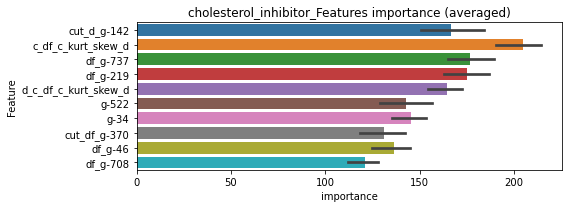

len(train_index) : 2859
len(valid_index) : 954
================================= fold 1/4 cholesterol_inhibitor=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[852]	training's binary_logloss: 0.000501034	valid_1's binary_logloss: 0.00697305


len(train_index) : 2860
len(valid_index) : 953
================================= fold 2/4 cholesterol_inhibitor=================================


Training until validation scores don't improve for 30 rounds


len(train_index) : 2860


Early stopping, best iteration is:
[588]	training's binary_logloss: 0.000641298	valid_1's binary_logloss: 0.01446


len(valid_index) : 953
================================= fold 3/4 cholesterol_inhibitor=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[921]	training's binary_logloss: 0.000494707	valid_1's binary_logloss: 0.00262702


len(train_index) : 2860
len(valid_index) : 953
================================= fold 4/4 cholesterol_inhibitor=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[679]	training's binary_logloss: 0.000576171	valid_1's binary_logloss: 0.00727309


cholesterol_inhibitor logloss: 0.007833577683179892


neg labels: 3289 → selected neg labels: 3281


cholinergic_receptor_antagonist, len(trt): 54, len(othr): 3281
target_rate: 0.0022676 → Adj_target_rate: 0.0024931
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00292607	valid_1's binary_logloss: 0.0330981
[600]	training's binary_logloss: 0.000589563	valid_1's binary_logloss: 0.0251833
Early stopping, best iteration is:
[656]	training's binary_logloss: 0.000529031	valid_1's binary_logloss: 0.024955
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00294061	valid_1's binary_logloss: 0.0197166
[600]	training's binary_logloss: 0.000607705	valid_1's binary_logloss: 0.0149406
Early stopping, best iteration is:
[641]	training's binary_logloss: 0.000558556	valid_1's binary_logloss: 0.0148706
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00316504	valid_1's binary_logloss: 0.00707363
[600]	training's binary_logloss: 0.000632427	valid_1's binary_logloss: 0.00257722
Early stopping, best iteration is:
[723]	training's binary_logloss: 0.000521069	valid_1's binary_logl

1 / 3 AUC score:1.000
y_Threshold: 0.0037653, Threshold: 0.0103294, pos_neg_ratio: 0.8000000
Remove_noisy_data: 132 → Positive_corect_labels: 656/3805
p_label_rate: 0.0100452 Vs.target_rate: 0.00227
Num_p_label: 40.0, conf_0:0.00723, conf_1:0.01343
Num_p_label: 40.0, Expected: 9.0, Adj_threshold_1: 0.0103294
Num_p_label: 4.0, Expected: 9.0, Adj_threshold_2: 0.0503294
threshold: 0.0503294, positive_p_label: 4.0/3982, p_label_rate: 0.0010045
positive_y_label: 656.0/3805, y_label_rate: 0.1724047
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00266007	valid_1's binary_logloss: 0.0339576
[600]	training's binary_logloss: 0.00056895	valid_1's binary_logloss: 0.0262078
Early stopping, best iteration is:
[634]	training's binary_logloss: 0.000532897	valid_1's binary_logloss: 0.0261211
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0027452	valid_1's binary_logloss: 0.0202335
[600]	training's binary_logloss: 0.000582498	valid_1's binary_logloss: 0.0152109
Early stopping, best iteration is:
[637]	training's binary_logloss: 0.00054336	valid_1's binary_logloss: 0.0151279
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00292683	valid_1's binary_logloss: 0.00753191
[600]	training's binary_logloss: 0.000611034	valid_1's binary_logloss: 0.00324321
Early stopping, best iteration is:
[747]	training's binary_logloss: 0.000513117	valid_1's binary_loglos

2 / 3 AUC score:1.000
y_Threshold: 0.0167582, Threshold: 0.0503294, pos_neg_ratio: 0.8000000
Remove_noisy_data: 2 → Positive_corect_labels: 655.0/3803
p_label_rate: 0.0020090 Vs.target_rate: 0.00227
Num_p_label: 8.0, conf_0:0.04026, conf_1:0.06040
threshold: 0.0503294, positive_p_label: 8.0/3982, p_label_rate: 0.0020090
positive_y_label: 655.0/3803, y_label_rate: 0.1722324
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00267652	valid_1's binary_logloss: 0.0218129
[600]	training's binary_logloss: 0.000574912	valid_1's binary_logloss: 0.0160441
Early stopping, best iteration is:
[622]	training's binary_logloss: 0.000550275	valid_1's binary_logloss: 0.0159256
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00275667	valid_1's binary_logloss: 0.0193436
[600]	training's binary_logloss: 0.00058422	valid_1's binary_logloss: 0.0142119
Early stopping, best iteration is:
[686]	training's binary_logloss: 0.000510199	valid_1's binary_logloss: 0.0141324
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00279567	valid_1's binary_logloss: 0.015516
[600]	training's binary_logloss: 0.00058502	valid_1's binary_logloss: 0.0106624
Early stopping, best iteration is:
[664]	training's binary_logloss: 0.000522333	valid_1's binary_logloss:

3 / 3 AUC score:1.000
y_Threshold: 0.0176093, Threshold: 0.0503294, pos_neg_ratio: 0.8000000
Remove_noisy_data: 0 → Positive_corect_labels: 655.0/3803
p_label_rate: 0.0025113 Vs.target_rate: 0.00227
Num_p_label: 10.0, conf_0:0.04530, conf_1:0.05536
threshold: 0.0503294, positive_p_label: 10.0/3982, p_label_rate: 0.0025113
positive_y_label: 655.0/3803, y_label_rate: 0.1722324


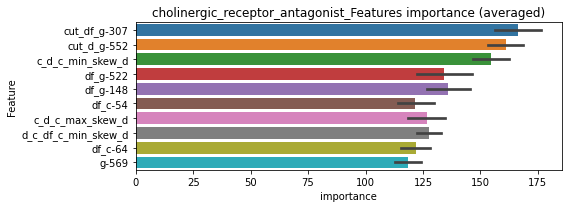

len(train_index) : 2852
len(valid_index) : 951
================================= fold 1/4 cholinergic_receptor_antagonist=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[877]	training's binary_logloss: 0.000520926	valid_1's binary_logloss: 0.0155094


len(train_index) : 2852
len(valid_index) : 951
================================= fold 2/4 cholinergic_receptor_antagonist=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[748]	training's binary_logloss: 0.000574795	valid_1's binary_logloss: 0.0149902


len(train_index) : 2852
len(valid_index) : 951
================================= fold 3/4 cholinergic_receptor_antagonist=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[748]	training's binary_logloss: 0.000581797	valid_1's binary_logloss: 0.0109555


len(train_index) : 2853
len(valid_index) : 950
================================= fold 4/4 cholinergic_receptor_antagonist=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[668]	training's binary_logloss: 0.00062782	valid_1's binary_logloss: 0.00882525


cholinergic_receptor_antagonist logloss: 0.01257182683506884


neg labels: 3289 → selected neg labels: 3288


coagulation_factor_inhibitor, len(trt): 24, len(othr): 3288
target_rate: 0.0010078 → Adj_target_rate: 0.0012513
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00144168	valid_1's binary_logloss: 0.00327477
[600]	training's binary_logloss: 0.00035852	valid_1's binary_logloss: 0.00123856
Early stopping, best iteration is:
[655]	training's binary_logloss: 0.000343108	valid_1's binary_logloss: 0.0012087
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00135051	valid_1's binary_logloss: 0.00504585
[600]	training's binary_logloss: 0.000357258	valid_1's binary_logloss: 0.00275658
Early stopping, best iteration is:
[574]	training's binary_logloss: 0.000362674	valid_1's binary_logloss: 0.0027539
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0013692	valid_1's binary_logloss: 0.00342289
[600]	training's binary_logloss: 0.000350333	valid_1's binary_logloss: 0.00150883
Early stopping, best iteration is:
[615]	training's binary_logloss: 0.000346208	valid_1's binary_l

1 / 3 AUC score:1.000
y_Threshold: 0.0020581, Threshold: 0.0097010, pos_neg_ratio: 0.8000000
Remove_noisy_data: 132 → Positive_corect_labels: 657/3813
p_label_rate: 0.0100452 Vs.target_rate: 0.00101
Num_p_label: 40.0, conf_0:0.00679, conf_1:0.01261
Num_p_label: 40.0, Expected: 4.0, Adj_threshold_1: 0.0097010
Num_p_label: 5.0, Expected: 4.0, Adj_threshold_2: 0.0497010
threshold: 0.0497010, positive_p_label: 5.0/3982, p_label_rate: 0.0012557
positive_y_label: 657.0/3813, y_label_rate: 0.1723053
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00133604	valid_1's binary_logloss: 0.00308224
[600]	training's binary_logloss: 0.000348227	valid_1's binary_logloss: 0.0011554
Early stopping, best iteration is:
[668]	training's binary_logloss: 0.000334427	valid_1's binary_logloss: 0.00113551
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00128676	valid_1's binary_logloss: 0.00420743
[600]	training's binary_logloss: 0.000340084	valid_1's binary_logloss: 0.00200921
Early stopping, best iteration is:
[615]	training's binary_logloss: 0.000336607	valid_1's binary_logloss: 0.00200622
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00130274	valid_1's binary_logloss: 0.0030441
[600]	training's binary_logloss: 0.000344397	valid_1's binary_logloss: 0.00128323
Early stopping, best iteration is:
[610]	training's binary_logloss: 0.000341243	valid_1's binary

2 / 3 AUC score:1.000
y_Threshold: 0.0241331, Threshold: 0.0497010, pos_neg_ratio: 0.8000000
Remove_noisy_data: 0 → Positive_corect_labels: 657.0/3813
p_label_rate: 0.0032647 Vs.target_rate: 0.00101
Num_p_label: 13.0, conf_0:0.03976, conf_1:0.05964
Num_p_label: 13.0, Expected: 4.0, Adj_threshold_1: 0.0497010
Num_p_label: 6.0, Expected: 4.0, Adj_threshold_2: 0.0897010
threshold: 0.0897010, positive_p_label: 6.0/3982, p_label_rate: 0.0015068
positive_y_label: 657.0/3813, y_label_rate: 0.1723053
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00133604	valid_1's binary_logloss: 0.00308224
[600]	training's binary_logloss: 0.000348227	valid_1's binary_logloss: 0.0011554
Early stopping, best iteration is:
[668]	training's binary_logloss: 0.000334427	valid_1's binary_logloss: 0.00113551
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00128676	valid_1's binary_logloss: 0.00420743
[600]	training's binary_logloss: 0.000340084	valid_1's binary_logloss: 0.00200921
Early stopping, best iteration is:
[615]	training's binary_logloss: 0.000336607	valid_1's binary_logloss: 0.00200622
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00130274	valid_1's binary_logloss: 0.0030441
[600]	training's binary_logloss: 0.000344397	valid_1's binary_logloss: 0.00128323
Early stopping, best iteration is:
[610]	training's binary_logloss: 0.000341243	valid_1's binary

3 / 3 AUC score:1.000
y_Threshold: 0.0241331, Threshold: 0.0897010, pos_neg_ratio: 0.8000000
Remove_noisy_data: 0 → Positive_corect_labels: 657.0/3813
p_label_rate: 0.0015068 Vs.target_rate: 0.00101
Num_p_label: 6.0, conf_0:0.08073, conf_1:0.09867
threshold: 0.0897010, positive_p_label: 6.0/3982, p_label_rate: 0.0015068
positive_y_label: 657.0/3813, y_label_rate: 0.1723053


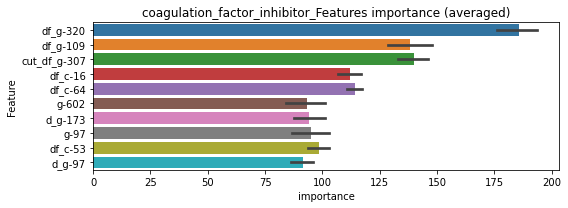

len(train_index) : 2859
len(valid_index) : 954
================================= fold 1/4 coagulation_factor_inhibitor=================================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.000341639	valid_1's binary_logloss: 0.000982774
Early stopping, best iteration is:
[1027]	training's binary_logloss: 0.000339723	valid_1's binary_logloss: 0.000977628


len(train_index) : 2860
len(valid_index) : 953
================================= fold 2/4 coagulation_factor_inhibitor=================================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.000338511	valid_1's binary_logloss: 0.00139176
Early stopping, best iteration is:
[1007]	training's binary_logloss: 0.000338037	valid_1's binary_logloss: 0.00139036


len(train_index) : 2860
len(valid_index) : 953
================================= fold 3/4 coagulation_factor_inhibitor=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[917]	training's binary_logloss: 0.000345769	valid_1's binary_logloss: 0.00157962


len(train_index) : 2860
len(valid_index) : 953
================================= fold 4/4 coagulation_factor_inhibitor=================================


Training until validation scores don't improve for 30 rounds


coagulation_factor_inhibitor logloss: 0.0023754763184509267


Early stopping, best iteration is:
[700]	training's binary_logloss: 0.00039244	valid_1's binary_logloss: 0.00555565
neg labels: 3289 → selected neg labels: 3285


corticosteroid_agonist, len(trt): 36, len(othr): 3285
target_rate: 0.0015117 → Adj_target_rate: 0.0017663
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00240929	valid_1's binary_logloss: 0.0092994
[600]	training's binary_logloss: 0.00048053	valid_1's binary_logloss: 0.00456686
Early stopping, best iteration is:
[679]	training's binary_logloss: 0.000426702	valid_1's binary_logloss: 0.00439573
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.002378	valid_1's binary_logloss: 0.0154303
[600]	training's binary_logloss: 0.000475932	valid_1's binary_logloss: 0.00995677
Early stopping, best iteration is:
[695]	training's binary_logloss: 0.000419636	valid_1's binary_logloss: 0.00978514
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00249881	valid_1's binary_logloss: 0.0075044
[600]	training's binary_logloss: 0.000491067	valid_1's binary_logloss: 0.00337418
Early stopping, best iteration is:
[662]	training's binary_logloss: 0.000443239	valid_1's binary_log

1 / 3 AUC score:1.000
y_Threshold: 0.0032363, Threshold: 0.0105035, pos_neg_ratio: 0.8000000
Remove_noisy_data: 132 → Positive_corect_labels: 657/3810
p_label_rate: 0.0100452 Vs.target_rate: 0.00151
Num_p_label: 40.0, conf_0:0.00735, conf_1:0.01365
Num_p_label: 40.0, Expected: 6.0, Adj_threshold_1: 0.0105035
Num_p_label: 1.0, Expected: 6.0, Adj_threshold_2: 0.0505035
threshold: 0.0505035, positive_p_label: 1.0/3982, p_label_rate: 0.0002511
positive_y_label: 657.0/3810, y_label_rate: 0.1724409
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00225305	valid_1's binary_logloss: 0.00863619
[600]	training's binary_logloss: 0.000461704	valid_1's binary_logloss: 0.00434928
Early stopping, best iteration is:
[634]	training's binary_logloss: 0.000436072	valid_1's binary_logloss: 0.00429805
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00222641	valid_1's binary_logloss: 0.0134971
[600]	training's binary_logloss: 0.000462931	valid_1's binary_logloss: 0.00891875
Early stopping, best iteration is:
[705]	training's binary_logloss: 0.000411738	valid_1's binary_logloss: 0.00880346
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00220982	valid_1's binary_logloss: 0.00779693
[600]	training's binary_logloss: 0.000467132	valid_1's binary_logloss: 0.00394875
Early stopping, best iteration is:
[658]	training's binary_logloss: 0.000426797	valid_1's binar

2 / 3 AUC score:1.000
y_Threshold: 0.0124215, Threshold: 0.0505035, pos_neg_ratio: 0.8000000
Remove_noisy_data: 0 → Positive_corect_labels: 657.0/3810
p_label_rate: 0.0015068 Vs.target_rate: 0.00151
Num_p_label: 6.0, conf_0:0.04040, conf_1:0.06060
threshold: 0.0505035, positive_p_label: 6.0/3982, p_label_rate: 0.0015068
positive_y_label: 657.0/3810, y_label_rate: 0.1724409
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00225305	valid_1's binary_logloss: 0.00863619
[600]	training's binary_logloss: 0.000461704	valid_1's binary_logloss: 0.00434928
Early stopping, best iteration is:
[634]	training's binary_logloss: 0.000436072	valid_1's binary_logloss: 0.00429805
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00222641	valid_1's binary_logloss: 0.0134971
[600]	training's binary_logloss: 0.000462931	valid_1's binary_logloss: 0.00891875
Early stopping, best iteration is:
[705]	training's binary_logloss: 0.000411738	valid_1's binary_logloss: 0.00880346
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00220982	valid_1's binary_logloss: 0.00779693
[600]	training's binary_logloss: 0.000467132	valid_1's binary_logloss: 0.00394875
Early stopping, best iteration is:
[658]	training's binary_logloss: 0.000426797	valid_1's binar

3 / 3 AUC score:1.000
y_Threshold: 0.0124215, Threshold: 0.0505035, pos_neg_ratio: 0.8000000
Remove_noisy_data: 0 → Positive_corect_labels: 657.0/3810
p_label_rate: 0.0015068 Vs.target_rate: 0.00151
Num_p_label: 6.0, conf_0:0.04545, conf_1:0.05555
threshold: 0.0505035, positive_p_label: 6.0/3982, p_label_rate: 0.0015068
positive_y_label: 657.0/3810, y_label_rate: 0.1724409


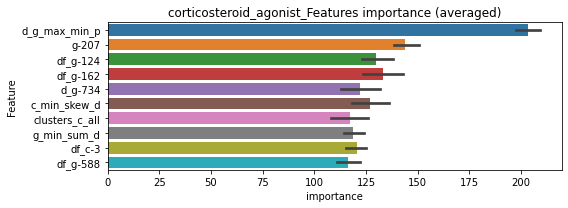

len(train_index) : 2857
len(valid_index) : 953
================================= fold 1/4 corticosteroid_agonist=================================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.000423667	valid_1's binary_logloss: 0.00343507
Early stopping, best iteration is:
[1012]	training's binary_logloss: 0.00042259	valid_1's binary_logloss: 0.00342466


len(train_index) : 2857
len(valid_index) : 953
================================= fold 2/4 corticosteroid_agonist=================================


Training until validation scores don't improve for 30 rounds


len(train_index) : 2858
len(valid_index) : 952


Early stopping, best iteration is:
[618]	training's binary_logloss: 0.000552684	valid_1's binary_logloss: 0.0064795


================================= fold 3/4 corticosteroid_agonist=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[896]	training's binary_logloss: 0.000439295	valid_1's binary_logloss: 0.00413473


len(train_index) : 2858
len(valid_index) : 952
================================= fold 4/4 corticosteroid_agonist=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[917]	training's binary_logloss: 0.000432177	valid_1's binary_logloss: 0.00593749


corticosteroid_agonist logloss: 0.004997349590528069


neg labels: 3289 → selected neg labels: 3235


cyclooxygenase_inhibitor, len(trt): 435, len(othr): 3235
target_rate: 0.0182666 → Adj_target_rate: 0.0146863
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[228]	training's binary_logloss: 0.0797601	valid_1's binary_logloss: 0.355451
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[239]	training's binary_logloss: 0.0761616	valid_1's binary_logloss: 0.373689
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[174]	training's binary_logloss: 0.109406	valid_1's binary_logloss: 0.376642
Training until validation scores don't improve for 30 rounds


1 / 3 AUC score:0.761
y_Threshold: 0.1355165, Threshold: 0.4754613, pos_neg_ratio: 0.8000000
Remove_noisy_data: 700 → Positive_corect_labels: 362/3182
p_label_rate: 0.0100452 Vs.target_rate: 0.01827
Num_p_label: 40.0, conf_0:0.33282, conf_1:0.61810
Num_p_label: 40.0, Expected: 72.7, Adj_threshold_1: 0.4754613
Num_p_label: 46.0, Expected: 72.7, Adj_threshold_2: 0.4454613
Num_p_label: 59.0, Expected: 72.7, Adj_threshold_3: 0.4154613
threshold: 0.4154613, positive_p_label: 59.0/3982, p_label_rate: 0.0148167


Early stopping, best iteration is:
[266]	training's binary_logloss: 0.0610387	valid_1's binary_logloss: 0.358149


positive_y_label: 362.0/3182, y_label_rate: 0.1137649
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[239]	training's binary_logloss: 0.0206272	valid_1's binary_logloss: 0.215757
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[262]	training's binary_logloss: 0.0159872	valid_1's binary_logloss: 0.191212
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[247]	training's binary_logloss: 0.0196891	valid_1's binary_logloss: 0.183415
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0126644	valid_1's binary_logloss: 0.168625


2 / 3 AUC score:0.952
y_Threshold: 0.0721555, Threshold: 0.4154613, pos_neg_ratio: 0.8000000
Remove_noisy_data: 168 → Positive_corect_labels: 278.0/3014
p_label_rate: 0.0261175 Vs.target_rate: 0.01827
Num_p_label: 104.0, conf_0:0.33237, conf_1:0.49855


Early stopping, best iteration is:
[411]	training's binary_logloss: 0.00527979	valid_1's binary_logloss: 0.164215


threshold: 0.4154613, positive_p_label: 104.0/3982, p_label_rate: 0.0261175
positive_y_label: 278.0/3014, y_label_rate: 0.0922362
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0059908	valid_1's binary_logloss: 0.155404
Early stopping, best iteration is:
[317]	training's binary_logloss: 0.00515327	valid_1's binary_logloss: 0.154648
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[253]	training's binary_logloss: 0.00966893	valid_1's binary_logloss: 0.145058
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[206]	training's binary_logloss: 0.0160037	valid_1's binary_logloss: 0.14678
Training until validation scores don't improve for 30 rounds


3 / 3 AUC score:0.967
y_Threshold: 0.0619318, Threshold: 0.4154613, pos_neg_ratio: 0.8000000
Remove_noisy_data: 100 → Positive_corect_labels: 228.0/2914
p_label_rate: 0.0316424 Vs.target_rate: 0.01827
Num_p_label: 126.0, conf_0:0.37392, conf_1:0.45701
Num_p_label: 126.0, Expected: 72.7, Adj_threshold_1: 0.4154613
Num_p_label: 122.0, Expected: 72.7, Adj_threshold_2: 0.4554613
Num_p_label: 117.0, Expected: 72.7, Adj_threshold_3: 0.4954613
Num_p_label: 108.0, Expected: 72.7, Adj_threshold_4: 0.5354613
threshold: 0.5354613, positive_p_label: 108.0/3982, p_label_rate: 0.0271220


[300]	training's binary_logloss: 0.0062517	valid_1's binary_logloss: 0.134346
Early stopping, best iteration is:
[270]	training's binary_logloss: 0.0082678	valid_1's binary_logloss: 0.133305


positive_y_label: 228.0/2914, y_label_rate: 0.0782430


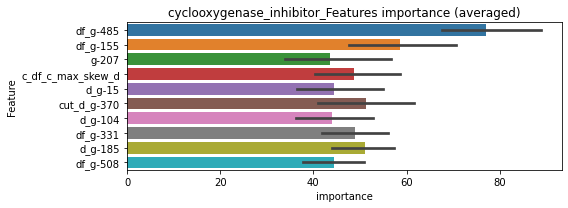

len(train_index) : 2185
len(valid_index) : 729
================================= fold 1/4 cyclooxygenase_inhibitor=================================


Training until validation scores don't improve for 30 rounds


len(train_index) : 2185
len(valid_index) : 729
================================= fold 2/4 cyclooxygenase_inhibitor=================================


Early stopping, best iteration is:
[205]	training's binary_logloss: 0.00379975	valid_1's binary_logloss: 0.106601
Training until validation scores don't improve for 30 rounds


len(train_index) : 2186
len(valid_index) : 728
================================= fold 3/4 cyclooxygenase_inhibitor=================================


Early stopping, best iteration is:
[154]	training's binary_logloss: 0.0057665	valid_1's binary_logloss: 0.127518
Training until validation scores don't improve for 30 rounds


len(train_index) : 2186
len(valid_index) : 728
================================= fold 4/4 cyclooxygenase_inhibitor=================================


Early stopping, best iteration is:
[192]	training's binary_logloss: 0.00437979	valid_1's binary_logloss: 0.068352
Training until validation scores don't improve for 30 rounds


cyclooxygenase_inhibitor logloss: 0.10007728275908762
cyclooxygenase_inhibitor clipping


Early stopping, best iteration is:
[161]	training's binary_logloss: 0.00572848	valid_1's binary_logloss: 0.0977918
neg labels: 3289 → selected neg labels: 3273


cytochrome_p450_inhibitor, len(trt): 104, len(othr): 3273
target_rate: 0.0043672 → Adj_target_rate: 0.0043519
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00766527	valid_1's binary_logloss: 0.0737721
Early stopping, best iteration is:
[546]	training's binary_logloss: 0.00146292	valid_1's binary_logloss: 0.0654645
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00789361	valid_1's binary_logloss: 0.0749709
Early stopping, best iteration is:
[443]	training's binary_logloss: 0.00247916	valid_1's binary_logloss: 0.0685445
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00848425	valid_1's binary_logloss: 0.0462134
[600]	training's binary_logloss: 0.00127694	valid_1's binary_logloss: 0.0304251
Early stopping, best iteration is:
[852]	training's binary_logloss: 0.000730976	valid_1's binary_logloss: 0.0285673
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00840821	valid_1's binary_logloss: 0.0538065
[600]	trai

1 / 3 AUC score:0.997
y_Threshold: 0.0106487, Threshold: 0.0376866, pos_neg_ratio: 0.8000000
Remove_noisy_data: 152 → Positive_corect_labels: 644/3775
p_label_rate: 0.0100452 Vs.target_rate: 0.00437
Num_p_label: 40.0, conf_0:0.02638, conf_1:0.04899
Num_p_label: 40.0, Expected: 17.4, Adj_threshold_1: 0.0376866
Num_p_label: 16.0, Expected: 17.4, Adj_threshold_2: 0.0776866
threshold: 0.0776866, positive_p_label: 16.0/3982, p_label_rate: 0.0040181
positive_y_label: 644.0/3775, y_label_rate: 0.1705960
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00654904	valid_1's binary_logloss: 0.0541292
[600]	training's binary_logloss: 0.00110039	valid_1's binary_logloss: 0.043319
Early stopping, best iteration is:
[581]	training's binary_logloss: 0.00117398	valid_1's binary_logloss: 0.0431162
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00652982	valid_1's binary_logloss: 0.0782559
Early stopping, best iteration is:
[401]	training's binary_logloss: 0.00279189	valid_1's binary_logloss: 0.0735859
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00754036	valid_1's binary_logloss: 0.0513547
[600]	training's binary_logloss: 0.00118365	valid_1's binary_logloss: 0.0390092
Early stopping, best iteration is:
[606]	training's binary_logloss: 0.00116092	valid_1's binary_logloss: 0.03899
Training until validation scores don't improve for 30 rounds
[300]	training

2 / 3 AUC score:0.998
y_Threshold: 0.0355416, Threshold: 0.0776866, pos_neg_ratio: 0.8000000
Remove_noisy_data: 28 → Positive_corect_labels: 630.0/3747
p_label_rate: 0.0140633 Vs.target_rate: 0.00437
Num_p_label: 56.0, conf_0:0.06215, conf_1:0.09322
Num_p_label: 56.0, Expected: 17.4, Adj_threshold_1: 0.0776866
Num_p_label: 34.0, Expected: 17.4, Adj_threshold_2: 0.1176866
Num_p_label: 29.0, Expected: 17.4, Adj_threshold_3: 0.1576866
Num_p_label: 25.0, Expected: 17.4, Adj_threshold_4: 0.1976866
threshold: 0.1976866, positive_p_label: 25.0/3982, p_label_rate: 0.0062783
positive_y_label: 630.0/3747, y_label_rate: 0.1681345
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00589494	valid_1's binary_logloss: 0.0482062
[600]	training's binary_logloss: 0.00100838	valid_1's binary_logloss: 0.037487
Early stopping, best iteration is:
[788]	training's binary_logloss: 0.000678093	valid_1's binary_logloss: 0.0368301
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00645624	valid_1's binary_logloss: 0.0360507
[600]	training's binary_logloss: 0.00105581	valid_1's binary_logloss: 0.0229552
Early stopping, best iteration is:
[826]	training's binary_logloss: 0.000671464	valid_1's binary_logloss: 0.021463
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00613199	valid_1's binary_logloss: 0.0462018
[600]	training's binary_logloss: 0.00104166	valid_1's binary_logloss: 0.0366849
Early stopping, best iteration is:
[758]	training's binary_logloss: 0.000722748	valid_1's binary_logloss: 0

3 / 3 AUC score:1.000
y_Threshold: 0.0326619, Threshold: 0.1976866, pos_neg_ratio: 0.8000000
Remove_noisy_data: 14 → Positive_corect_labels: 623.0/3733
p_label_rate: 0.0072828 Vs.target_rate: 0.00437
Num_p_label: 29.0, conf_0:0.17792, conf_1:0.21746
Num_p_label: 29.0, Expected: 17.4, Adj_threshold_1: 0.1976866
Num_p_label: 27.0, Expected: 17.4, Adj_threshold_2: 0.2376866
Num_p_label: 24.0, Expected: 17.4, Adj_threshold_3: 0.2776866
threshold: 0.2776866, positive_p_label: 24.0/3982, p_label_rate: 0.0060271
positive_y_label: 623.0/3733, y_label_rate: 0.1668899


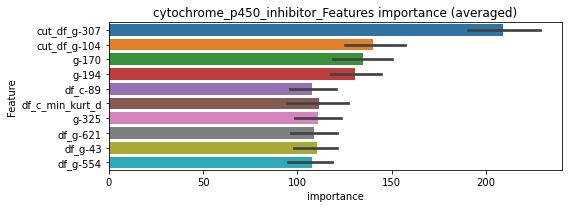

len(train_index) : 2799
len(valid_index) : 934
================================= fold 1/4 cytochrome_p450_inhibitor=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[895]	training's binary_logloss: 0.000719435	valid_1's binary_logloss: 0.0175373


len(train_index) : 2800
len(valid_index) : 933
================================= fold 2/4 cytochrome_p450_inhibitor=================================


Training until validation scores don't improve for 30 rounds


len(train_index) : 2800
len(valid_index) : 933
================================= fold 3/4 cytochrome_p450_inhibitor=================================


Early stopping, best iteration is:
[342]	training's binary_logloss: 0.00185705	valid_1's binary_logloss: 0.0485482
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[664]	training's binary_logloss: 0.000922096	valid_1's binary_logloss: 0.0225859


len(train_index) : 2800
len(valid_index) : 933
================================= fold 4/4 cytochrome_p450_inhibitor=================================


Training until validation scores don't improve for 30 rounds


cytochrome_p450_inhibitor logloss: 0.033614506879250654
cytochrome_p450_inhibitor clipping


Early stopping, best iteration is:
[361]	training's binary_logloss: 0.00173314	valid_1's binary_logloss: 0.045804
neg labels: 3289 → selected neg labels: 3281


dihydrofolate_reductase_inhibitor, len(trt): 36, len(othr): 3281
target_rate: 0.0015117 → Adj_target_rate: 0.0017663
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00207742	valid_1's binary_logloss: 0.00730798
[600]	training's binary_logloss: 0.000443105	valid_1's binary_logloss: 0.00333581
Early stopping, best iteration is:
[655]	training's binary_logloss: 0.000419195	valid_1's binary_logloss: 0.00327818
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00204946	valid_1's binary_logloss: 0.00534553
[600]	training's binary_logloss: 0.000447098	valid_1's binary_logloss: 0.0019029
Early stopping, best iteration is:
[658]	training's binary_logloss: 0.000419604	valid_1's binary_logloss: 0.0018284
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00196856	valid_1's binary_logloss: 0.00469772
[600]	training's binary_logloss: 0.000445068	valid_1's binary_logloss: 0.00152638
Early stopping, best iteration is:
[649]	training's binary_logloss: 0.000422849	valid_1's binary

1 / 3 AUC score:1.000
y_Threshold: 0.0028110, Threshold: 0.0124061, pos_neg_ratio: 0.8000000
Remove_noisy_data: 132 → Positive_corect_labels: 656/3805
p_label_rate: 0.0100452 Vs.target_rate: 0.00151
Num_p_label: 40.0, conf_0:0.00868, conf_1:0.01613
Num_p_label: 40.0, Expected: 6.0, Adj_threshold_1: 0.0124061
Num_p_label: 6.0, Expected: 6.0, Adj_threshold_2: 0.0524061
threshold: 0.0524061, positive_p_label: 6.0/3982, p_label_rate: 0.0015068
positive_y_label: 656.0/3805, y_label_rate: 0.1724047
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00178004	valid_1's binary_logloss: 0.00642905
[600]	training's binary_logloss: 0.000423094	valid_1's binary_logloss: 0.00330248
Early stopping, best iteration is:
[614]	training's binary_logloss: 0.000415129	valid_1's binary_logloss: 0.00325487
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00186111	valid_1's binary_logloss: 0.00443569
[600]	training's binary_logloss: 0.00043379	valid_1's binary_logloss: 0.0015755
Early stopping, best iteration is:
[629]	training's binary_logloss: 0.000419573	valid_1's binary_logloss: 0.00154923
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00187581	valid_1's binary_logloss: 0.003908
[600]	training's binary_logloss: 0.00043484	valid_1's binary_logloss: 0.00120528
Early stopping, best iteration is:
[667]	training's binary_logloss: 0.000414031	valid_1's binary_lo

2 / 3 AUC score:1.000
y_Threshold: 0.0432694, Threshold: 0.0524061, pos_neg_ratio: 0.8000000
Remove_noisy_data: 0 → Positive_corect_labels: 656.0/3805
p_label_rate: 0.0052737 Vs.target_rate: 0.00151
Num_p_label: 21.0, conf_0:0.04192, conf_1:0.06289
Num_p_label: 21.0, Expected: 6.0, Adj_threshold_1: 0.0524061
Num_p_label: 10.0, Expected: 6.0, Adj_threshold_2: 0.0924061
threshold: 0.0924061, positive_p_label: 10.0/3982, p_label_rate: 0.0025113
positive_y_label: 656.0/3805, y_label_rate: 0.1724047
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00178004	valid_1's binary_logloss: 0.00642905
[600]	training's binary_logloss: 0.000423094	valid_1's binary_logloss: 0.00330248
Early stopping, best iteration is:
[614]	training's binary_logloss: 0.000415129	valid_1's binary_logloss: 0.00325487
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00186111	valid_1's binary_logloss: 0.00443569
[600]	training's binary_logloss: 0.00043379	valid_1's binary_logloss: 0.0015755
Early stopping, best iteration is:
[629]	training's binary_logloss: 0.000419573	valid_1's binary_logloss: 0.00154923
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00187581	valid_1's binary_logloss: 0.003908
[600]	training's binary_logloss: 0.00043484	valid_1's binary_logloss: 0.00120528
Early stopping, best iteration is:
[667]	training's binary_logloss: 0.000414031	valid_1's binary_lo

3 / 3 AUC score:1.000
y_Threshold: 0.0432694, Threshold: 0.0924061, pos_neg_ratio: 0.8000000
Remove_noisy_data: 0 → Positive_corect_labels: 656.0/3805
p_label_rate: 0.0025113 Vs.target_rate: 0.00151
Num_p_label: 10.0, conf_0:0.08317, conf_1:0.10165
Num_p_label: 10.0, Expected: 6.0, Adj_threshold_1: 0.0924061
threshold: 0.0924061, positive_p_label: 10.0/3982, p_label_rate: 0.0025113
positive_y_label: 656.0/3805, y_label_rate: 0.1724047


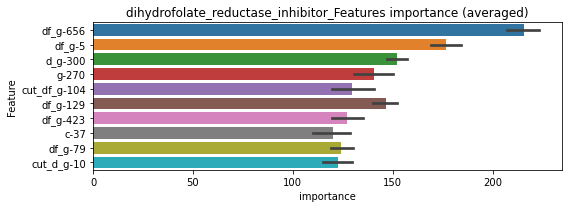

len(train_index) : 2853
len(valid_index) : 952
================================= fold 1/4 dihydrofolate_reductase_inhibitor=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[904]	training's binary_logloss: 0.000413965	valid_1's binary_logloss: 0.0031031


len(train_index) : 2854
len(valid_index) : 951
================================= fold 2/4 dihydrofolate_reductase_inhibitor=================================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.000410312	valid_1's binary_logloss: 0.00133436
Early stopping, best iteration is:
[988]	training's binary_logloss: 0.000410345	valid_1's binary_logloss: 0.00133434


len(train_index) : 2854
len(valid_index) : 951
================================= fold 3/4 dihydrofolate_reductase_inhibitor=================================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.000416378	valid_1's binary_logloss: 0.000992332
Early stopping, best iteration is:
[970]	training's binary_logloss: 0.000416378	valid_1's binary_logloss: 0.000992332


len(train_index) : 2854
len(valid_index) : 951
================================= fold 4/4 dihydrofolate_reductase_inhibitor=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[694]	training's binary_logloss: 0.000472423	valid_1's binary_logloss: 0.00569411


dihydrofolate_reductase_inhibitor logloss: 0.0027819479006605165


neg labels: 3289 → selected neg labels: 3285


dipeptidyl_peptidase_inhibitor, len(trt): 25, len(othr): 3285
target_rate: 0.0010498 → Adj_target_rate: 0.0012955
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00152217	valid_1's binary_logloss: 0.00372623
[600]	training's binary_logloss: 0.00036735	valid_1's binary_logloss: 0.00137196
Early stopping, best iteration is:
[596]	training's binary_logloss: 0.00036735	valid_1's binary_logloss: 0.00137196
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00146844	valid_1's binary_logloss: 0.00956682
[600]	training's binary_logloss: 0.000355051	valid_1's binary_logloss: 0.00572005
Early stopping, best iteration is:
[577]	training's binary_logloss: 0.000362322	valid_1's binary_logloss: 0.00570329
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00154728	valid_1's binary_logloss: 0.00323692
[600]	training's binary_logloss: 0.0003676	valid_1's binary_logloss: 0.00108064
Early stopping, best iteration is:
[641]	training's binary_logloss: 0.000358596	valid_1's binary_l

1 / 3 AUC score:1.000
y_Threshold: 0.0023073, Threshold: 0.0075186, pos_neg_ratio: 0.8000000
Remove_noisy_data: 132 → Positive_corect_labels: 657/3810
p_label_rate: 0.0100452 Vs.target_rate: 0.00105
Num_p_label: 40.0, conf_0:0.00526, conf_1:0.00977
Num_p_label: 40.0, Expected: 4.2, Adj_threshold_1: 0.0075186
Num_p_label: 4.0, Expected: 4.2, Adj_threshold_2: 0.0475186
threshold: 0.0475186, positive_p_label: 4.0/3982, p_label_rate: 0.0010045
positive_y_label: 657.0/3810, y_label_rate: 0.1724409
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00141275	valid_1's binary_logloss: 0.00308133
[600]	training's binary_logloss: 0.000353802	valid_1's binary_logloss: 0.00113157
Early stopping, best iteration is:
[674]	training's binary_logloss: 0.000343914	valid_1's binary_logloss: 0.00110764
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00135601	valid_1's binary_logloss: 0.00765879
[600]	training's binary_logloss: 0.000344087	valid_1's binary_logloss: 0.00455046
Early stopping, best iteration is:
[590]	training's binary_logloss: 0.000346807	valid_1's binary_logloss: 0.0045378
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00140947	valid_1's binary_logloss: 0.00273929
[600]	training's binary_logloss: 0.00035588	valid_1's binary_logloss: 0.000951468
Early stopping, best iteration is:
[638]	training's binary_logloss: 0.00035315	valid_1's binary

2 / 3 AUC score:1.000
y_Threshold: 0.0639102, Threshold: 0.0475186, pos_neg_ratio: 0.8000000
Remove_noisy_data: 0 → Positive_corect_labels: 657.0/3810
p_label_rate: 0.0052737 Vs.target_rate: 0.00105
Num_p_label: 21.0, conf_0:0.03801, conf_1:0.05702
Num_p_label: 21.0, Expected: 4.2, Adj_threshold_1: 0.0475186
Num_p_label: 12.0, Expected: 4.2, Adj_threshold_2: 0.0875186
Num_p_label: 7.0, Expected: 4.2, Adj_threshold_3: 0.1275186
threshold: 0.1275186, positive_p_label: 7.0/3982, p_label_rate: 0.0017579
positive_y_label: 657.0/3810, y_label_rate: 0.1724409
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00141275	valid_1's binary_logloss: 0.00308133
[600]	training's binary_logloss: 0.000353802	valid_1's binary_logloss: 0.00113157
Early stopping, best iteration is:
[673]	training's binary_logloss: 0.000343914	valid_1's binary_logloss: 0.00110764
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00135601	valid_1's binary_logloss: 0.00765879
[600]	training's binary_logloss: 0.000344087	valid_1's binary_logloss: 0.00455046
Early stopping, best iteration is:
[590]	training's binary_logloss: 0.000346807	valid_1's binary_logloss: 0.0045378
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00140947	valid_1's binary_logloss: 0.00273929
[600]	training's binary_logloss: 0.00035588	valid_1's binary_logloss: 0.000951468
Early stopping, best iteration is:
[611]	training's binary_logloss: 0.00035315	valid_1's binary

3 / 3 AUC score:1.000
y_Threshold: 0.0639102, Threshold: 0.1275186, pos_neg_ratio: 0.8000000
Remove_noisy_data: 0 → Positive_corect_labels: 657.0/3810
p_label_rate: 0.0017579 Vs.target_rate: 0.00105
Num_p_label: 7.0, conf_0:0.11477, conf_1:0.14027
Num_p_label: 7.0, Expected: 4.2, Adj_threshold_1: 0.1275186
threshold: 0.1275186, positive_p_label: 7.0/3982, p_label_rate: 0.0017579
positive_y_label: 657.0/3810, y_label_rate: 0.1724409


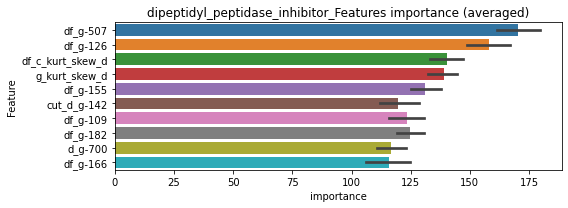

len(train_index) : 2857
len(valid_index) : 953
================================= fold 1/4 dipeptidyl_peptidase_inhibitor=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[922]	training's binary_logloss: 0.000352969	valid_1's binary_logloss: 0.0011214


len(train_index) : 2857
len(valid_index) : 953
================================= fold 2/4 dipeptidyl_peptidase_inhibitor=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[867]	training's binary_logloss: 0.000351451	valid_1's binary_logloss: 0.00369138


len(train_index) : 2858
len(valid_index) : 952
================================= fold 3/4 dipeptidyl_peptidase_inhibitor=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[902]	training's binary_logloss: 0.00035702	valid_1's binary_logloss: 0.000961206


len(train_index) : 2858
len(valid_index) : 952
================================= fold 4/4 dipeptidyl_peptidase_inhibitor=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[967]	training's binary_logloss: 0.00034711	valid_1's binary_logloss: 0.00175912


dipeptidyl_peptidase_inhibitor logloss: 0.0018842195766776602


neg labels: 3289 → selected neg labels: 3289


diuretic, len(trt): 6, len(othr): 3289
target_rate: 0.0002520 → Adj_target_rate: 0.0003851
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.000346666	valid_1's binary_logloss: 0.000535278
Early stopping, best iteration is:
[471]	training's binary_logloss: 0.000174252	valid_1's binary_logloss: 0.000296662
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.000348293	valid_1's binary_logloss: 0.00428514
Early stopping, best iteration is:
[474]	training's binary_logloss: 0.00017562	valid_1's binary_logloss: 0.00395883
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.000351632	valid_1's binary_logloss: 0.00044542
Early stopping, best iteration is:
[464]	training's binary_logloss: 0.00017563	valid_1's binary_logloss: 0.000225973
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.000348167	valid_1's binary_logloss: 0.000491518


1 / 3 AUC score:1.000
y_Threshold: 0.0004803, Threshold: 0.0018890, pos_neg_ratio: 0.8000000
Remove_noisy_data: 133 → Positive_corect_labels: 657/3813
p_label_rate: 0.0100452 Vs.target_rate: 0.00025
Num_p_label: 40.0, conf_0:0.00132, conf_1:0.00246
Num_p_label: 40.0, Expected: 1.0, Adj_threshold_1: 0.0018890
Num_p_label: 1.0, Expected: 1.0, Adj_threshold_2: 0.0418890
threshold: 0.0418890, positive_p_label: 1.0/3982, p_label_rate: 0.0002511


Early stopping, best iteration is:
[483]	training's binary_logloss: 0.000175112	valid_1's binary_logloss: 0.000258558


positive_y_label: 657.0/3813, y_label_rate: 0.1723053
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.000321493	valid_1's binary_logloss: 0.000387253
Early stopping, best iteration is:
[519]	training's binary_logloss: 0.000160039	valid_1's binary_logloss: 0.000199642
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.000320963	valid_1's binary_logloss: 0.00521563
Early stopping, best iteration is:
[506]	training's binary_logloss: 0.000160012	valid_1's binary_logloss: 0.00472543
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.000322815	valid_1's binary_logloss: 0.000350437
Early stopping, best iteration is:
[492]	training's binary_logloss: 0.000161082	valid_1's binary_logloss: 0.000174532
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.000323531	valid_1's binary_logloss: 0.000337062


2 / 3 AUC score:1.000
y_Threshold: 0.0109318, Threshold: 0.0418890, pos_neg_ratio: 0.8000000
Remove_noisy_data: 0 → Positive_corect_labels: 657.0/3813
p_label_rate: 0.0022602 Vs.target_rate: 0.00025
Num_p_label: 9.0, conf_0:0.03351, conf_1:0.05027
Num_p_label: 9.0, Expected: 1.0, Adj_threshold_1: 0.0418890
Num_p_label: 3.0, Expected: 1.0, Adj_threshold_2: 0.0818890
Num_p_label: 2.0, Expected: 1.0, Adj_threshold_3: 0.1218890
threshold: 0.1218890, positive_p_label: 2.0/3982, p_label_rate: 0.0005023


Early stopping, best iteration is:
[524]	training's binary_logloss: 0.000159571	valid_1's binary_logloss: 0.000166637


positive_y_label: 657.0/3813, y_label_rate: 0.1723053
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.000321493	valid_1's binary_logloss: 0.000387253
Early stopping, best iteration is:
[519]	training's binary_logloss: 0.000160039	valid_1's binary_logloss: 0.000199642
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.000320963	valid_1's binary_logloss: 0.00521563
Early stopping, best iteration is:
[506]	training's binary_logloss: 0.000160012	valid_1's binary_logloss: 0.00472543
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.000322815	valid_1's binary_logloss: 0.000350437
Early stopping, best iteration is:
[492]	training's binary_logloss: 0.000161082	valid_1's binary_logloss: 0.000174532
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.000323531	valid_1's binary_logloss: 0.000337062


3 / 3 AUC score:1.000
y_Threshold: 0.0109318, Threshold: 0.1218890, pos_neg_ratio: 0.8000000
Remove_noisy_data: 0 → Positive_corect_labels: 657.0/3813
p_label_rate: 0.0005023 Vs.target_rate: 0.00025
Num_p_label: 2.0, conf_0:0.10970, conf_1:0.13408
Num_p_label: 2.0, Expected: 1.0, Adj_threshold_1: 0.1218890
threshold: 0.1218890, positive_p_label: 2.0/3982, p_label_rate: 0.0005023


Early stopping, best iteration is:
[524]	training's binary_logloss: 0.000159571	valid_1's binary_logloss: 0.000166637


positive_y_label: 657.0/3813, y_label_rate: 0.1723053


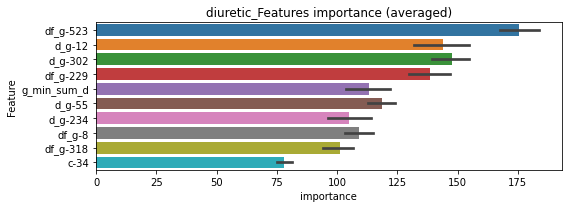

len(train_index) : 2859
len(valid_index) : 954
================================= fold 1/4 diuretic=================================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.000162685	valid_1's binary_logloss: 0.000194613


len(train_index) : 2860
len(valid_index) : 953
================================= fold 2/4 diuretic=================================


Early stopping, best iteration is:
[1134]	training's binary_logloss: 0.000161208	valid_1's binary_logloss: 0.000192882
Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.000162834	valid_1's binary_logloss: 0.00321864
Early stopping, best iteration is:
[1091]	training's binary_logloss: 0.000161413	valid_1's binary_logloss: 0.00321376


len(train_index) : 2860
len(valid_index) : 953
================================= fold 3/4 diuretic=================================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.000163402	valid_1's binary_logloss: 0.000183082
Early stopping, best iteration is:
[1067]	training's binary_logloss: 0.000162273	valid_1's binary_logloss: 0.000181859


len(train_index) : 2860
len(valid_index) : 953
================================= fold 4/4 diuretic=================================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.000163771	valid_1's binary_logloss: 0.000175207


diuretic logloss: 0.0009404995982154786


Early stopping, best iteration is:
[1109]	training's binary_logloss: 0.000162287	valid_1's binary_logloss: 0.000173675
neg labels: 3289 → selected neg labels: 3280


dna_alkylating_agent, len(trt): 48, len(othr): 3280
target_rate: 0.0020156 → Adj_target_rate: 0.0022556
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00260321	valid_1's binary_logloss: 0.0218356
[600]	training's binary_logloss: 0.000535501	valid_1's binary_logloss: 0.0172529
Early stopping, best iteration is:
[588]	training's binary_logloss: 0.000549971	valid_1's binary_logloss: 0.0171917
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00270685	valid_1's binary_logloss: 0.0177723
[600]	training's binary_logloss: 0.000559188	valid_1's binary_logloss: 0.0118309
Early stopping, best iteration is:
[645]	training's binary_logloss: 0.00051142	valid_1's binary_logloss: 0.011557
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00292538	valid_1's binary_logloss: 0.00723738
[600]	training's binary_logloss: 0.000580389	valid_1's binary_logloss: 0.00244807
Early stopping, best iteration is:
[703]	training's binary_logloss: 0.000509932	valid_1's binary_loglo

1 / 3 AUC score:0.999
y_Threshold: 0.0037751, Threshold: 0.1071443, pos_neg_ratio: 0.8000000
Remove_noisy_data: 134 → Positive_corect_labels: 655/3802
p_label_rate: 0.0100452 Vs.target_rate: 0.00202
Num_p_label: 40.0, conf_0:0.07500, conf_1:0.13929
Num_p_label: 40.0, Expected: 8.0, Adj_threshold_1: 0.1071443
Num_p_label: 31.0, Expected: 8.0, Adj_threshold_2: 0.1471443
Num_p_label: 26.0, Expected: 8.0, Adj_threshold_3: 0.1871443
Num_p_label: 20.0, Expected: 8.0, Adj_threshold_4: 0.2271443
threshold: 0.2271443, positive_p_label: 20.0/3982, p_label_rate: 0.0050226
positive_y_label: 655.0/3802, y_label_rate: 0.1722777
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00230321	valid_1's binary_logloss: 0.0214084
[600]	training's binary_logloss: 0.00050477	valid_1's binary_logloss: 0.0158581
Early stopping, best iteration is:
[637]	training's binary_logloss: 0.000472857	valid_1's binary_logloss: 0.0157551
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00238298	valid_1's binary_logloss: 0.0116389
[600]	training's binary_logloss: 0.000521848	valid_1's binary_logloss: 0.0067092
Early stopping, best iteration is:
[663]	training's binary_logloss: 0.000475964	valid_1's binary_logloss: 0.0065668
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00242442	valid_1's binary_logloss: 0.0163851
[600]	training's binary_logloss: 0.000520624	valid_1's binary_logloss: 0.00915806
Early stopping, best iteration is:
[673]	training's binary_logloss: 0.000472119	valid_1's binary_loglo

2 / 3 AUC score:1.000
y_Threshold: 0.0599638, Threshold: 0.2271443, pos_neg_ratio: 0.8000000
Remove_noisy_data: 2 → Positive_corect_labels: 654.0/3800
p_label_rate: 0.0175791 Vs.target_rate: 0.00202
Num_p_label: 70.0, conf_0:0.18172, conf_1:0.27257
Num_p_label: 70.0, Expected: 8.0, Adj_threshold_1: 0.2271443
Num_p_label: 69.0, Expected: 8.0, Adj_threshold_2: 0.2671443
Num_p_label: 63.0, Expected: 8.0, Adj_threshold_3: 0.3071443
Num_p_label: 59.0, Expected: 8.0, Adj_threshold_4: 0.3471443
Num_p_label: 54.0, Expected: 8.0, Adj_threshold_5: 0.3871443
Num_p_label: 52.0, Expected: 8.0, Adj_threshold_6: 0.4271443
Num_p_label: 50.0, Expected: 8.0, Adj_threshold_7: 0.4671443
Num_p_label: 50.0, Expected: 8.0, Adj_threshold_8: 0.5071443
Num_p_label: 46.0, Expected: 8.0, Adj_threshold_9: 0.5471443
Num_p_label: 45.0, Expected: 8.0, Adj_threshold_10: 0.5871443
threshold: 0.6271443, positive_p_label: 43.0/3982, p_label_rate: 0.0107986
positive_y_label: 654.0/3800, y_label_rate: 0.1721053
===========

Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00230934	valid_1's binary_logloss: 0.0156246
[600]	training's binary_logloss: 0.00050328	valid_1's binary_logloss: 0.0107297
Early stopping, best iteration is:
[652]	training's binary_logloss: 0.000464455	valid_1's binary_logloss: 0.0106109
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00240373	valid_1's binary_logloss: 0.0136575
[600]	training's binary_logloss: 0.000519109	valid_1's binary_logloss: 0.00884959
Early stopping, best iteration is:
[631]	training's binary_logloss: 0.000489854	valid_1's binary_logloss: 0.00873469
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00240959	valid_1's binary_logloss: 0.0130498
[600]	training's binary_logloss: 0.000519452	valid_1's binary_logloss: 0.00747984
Early stopping, best iteration is:
[671]	training's binary_logloss: 0.000471507	valid_1's binary_log

3 / 3 AUC score:1.000
y_Threshold: 0.0897664, Threshold: 0.6271443, pos_neg_ratio: 0.8000000
Remove_noisy_data: 0 → Positive_corect_labels: 654.0/3800
p_label_rate: 0.0110497 Vs.target_rate: 0.00202
Num_p_label: 44.0, conf_0:0.50000, conf_1:0.68986
Num_p_label: 44.0, Expected: 8.0, Adj_threshold_1: 0.6271443
Num_p_label: 39.0, Expected: 8.0, Adj_threshold_2: 0.6671443
Num_p_label: 38.0, Expected: 8.0, Adj_threshold_3: 0.7071443
Num_p_label: 32.0, Expected: 8.0, Adj_threshold_4: 0.7471443
Num_p_label: 25.0, Expected: 8.0, Adj_threshold_5: 0.7871443
Num_p_label: 19.0, Expected: 8.0, Adj_threshold_6: 0.8271443
threshold: 0.8271443, positive_p_label: 19.0/3982, p_label_rate: 0.0047715
positive_y_label: 654.0/3800, y_label_rate: 0.1721053


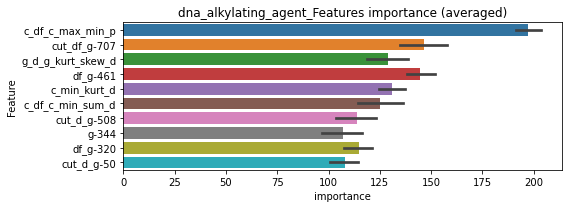

len(train_index) : 2850
len(valid_index) : 950
================================= fold 1/4 dna_alkylating_agent=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[831]	training's binary_logloss: 0.000485372	valid_1's binary_logloss: 0.0112031


len(train_index) : 2850
len(valid_index) : 950
================================= fold 2/4 dna_alkylating_agent=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[730]	training's binary_logloss: 0.000529658	valid_1's binary_logloss: 0.00890609


len(train_index) : 2850
len(valid_index) : 950
================================= fold 3/4 dna_alkylating_agent=================================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.000469765	valid_1's binary_logloss: 0.00399246
Early stopping, best iteration is:
[984]	training's binary_logloss: 0.000469821	valid_1's binary_logloss: 0.00399157


len(train_index) : 2850
len(valid_index) : 950
================================= fold 4/4 dna_alkylating_agent=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[922]	training's binary_logloss: 0.000481125	valid_1's binary_logloss: 0.00313327


dna_alkylating_agent logloss: 0.006809501905186655


neg labels: 3289 → selected neg labels: 3248


dna_inhibitor, len(trt): 402, len(othr): 3248
target_rate: 0.0168808 → Adj_target_rate: 0.0137338
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[252]	training's binary_logloss: 0.0603519	valid_1's binary_logloss: 0.35236
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0482771	valid_1's binary_logloss: 0.331206
Early stopping, best iteration is:
[287]	training's binary_logloss: 0.0522413	valid_1's binary_logloss: 0.328952
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0475236	valid_1's binary_logloss: 0.327745
Early stopping, best iteration is:
[281]	training's binary_logloss: 0.0537618	valid_1's binary_logloss: 0.325257
Training until validation scores don't improve for 30 rounds


1 / 3 AUC score:0.819
y_Threshold: 0.1207491, Threshold: 0.4920744, pos_neg_ratio: 0.8000000
Remove_noisy_data: 589 → Positive_corect_labels: 420/3308
p_label_rate: 0.0100452 Vs.target_rate: 0.01688
Num_p_label: 40.0, conf_0:0.34445, conf_1:0.63970
Num_p_label: 40.0, Expected: 67.2, Adj_threshold_1: 0.4920744
Num_p_label: 45.0, Expected: 67.2, Adj_threshold_2: 0.4620744
threshold: 0.4620744, positive_p_label: 45.0/3982, p_label_rate: 0.0113009


Early stopping, best iteration is:
[257]	training's binary_logloss: 0.0645931	valid_1's binary_logloss: 0.318013


positive_y_label: 420.0/3308, y_label_rate: 0.1269649
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0154694	valid_1's binary_logloss: 0.182665
Early stopping, best iteration is:
[358]	training's binary_logloss: 0.0095543	valid_1's binary_logloss: 0.179751
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0157564	valid_1's binary_logloss: 0.184764
Early stopping, best iteration is:
[350]	training's binary_logloss: 0.0103932	valid_1's binary_logloss: 0.183188
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0153951	valid_1's binary_logloss: 0.177393
Early stopping, best iteration is:
[412]	training's binary_logloss: 0.00639467	valid_1's binary_logloss: 0.172562
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0134043	valid_1's binary_logloss: 0.205002


2 / 3 AUC score:0.958
y_Threshold: 0.0708974, Threshold: 0.4620744, pos_neg_ratio: 0.8000000
Remove_noisy_data: 156 → Positive_corect_labels: 342.0/3152
p_label_rate: 0.0256153 Vs.target_rate: 0.01688
Num_p_label: 102.0, conf_0:0.36966, conf_1:0.55449
Num_p_label: 102.0, Expected: 67.2, Adj_threshold_1: 0.4620744
Num_p_label: 97.0, Expected: 67.2, Adj_threshold_2: 0.5020744
threshold: 0.5020744, positive_p_label: 97.0/3982, p_label_rate: 0.0243596


Early stopping, best iteration is:
[298]	training's binary_logloss: 0.0136467	valid_1's binary_logloss: 0.204762


positive_y_label: 342.0/3152, y_label_rate: 0.1085025
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0091484	valid_1's binary_logloss: 0.142955
Early stopping, best iteration is:
[327]	training's binary_logloss: 0.0072482	valid_1's binary_logloss: 0.142795
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00925706	valid_1's binary_logloss: 0.132623
Early stopping, best iteration is:
[372]	training's binary_logloss: 0.00509883	valid_1's binary_logloss: 0.128634
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[250]	training's binary_logloss: 0.0143318	valid_1's binary_logloss: 0.15852
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00893402	valid_1's binary_logloss: 0.126876


3 / 3 AUC score:0.976
y_Threshold: 0.0716740, Threshold: 0.5020744, pos_neg_ratio: 0.8000000
Remove_noisy_data: 98 → Positive_corect_labels: 293.0/3054
p_label_rate: 0.0313913 Vs.target_rate: 0.01688
Num_p_label: 125.0, conf_0:0.45187, conf_1:0.55228
Num_p_label: 125.0, Expected: 67.2, Adj_threshold_1: 0.5020744
Num_p_label: 121.0, Expected: 67.2, Adj_threshold_2: 0.5420744
Num_p_label: 116.0, Expected: 67.2, Adj_threshold_3: 0.5820744
Num_p_label: 107.0, Expected: 67.2, Adj_threshold_4: 0.6220744
Num_p_label: 103.0, Expected: 67.2, Adj_threshold_5: 0.6620744
Num_p_label: 100.0, Expected: 67.2, Adj_threshold_6: 0.7020744
threshold: 0.7020744, positive_p_label: 100.0/3982, p_label_rate: 0.0251130


Early stopping, best iteration is:
[316]	training's binary_logloss: 0.00773651	valid_1's binary_logloss: 0.125608


positive_y_label: 293.0/3054, y_label_rate: 0.0959398


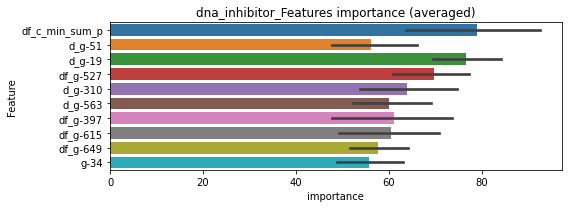

len(train_index) : 2290
len(valid_index) : 764
================================= fold 1/4 dna_inhibitor=================================


Training until validation scores don't improve for 30 rounds


len(train_index) : 2290
len(valid_index) : 764
================================= fold 2/4 dna_inhibitor=================================


Early stopping, best iteration is:
[108]	training's binary_logloss: 0.0135199	valid_1's binary_logloss: 0.14208
Training until validation scores don't improve for 30 rounds


len(train_index) : 2291
len(valid_index) : 763
================================= fold 3/4 dna_inhibitor=================================


Early stopping, best iteration is:
[156]	training's binary_logloss: 0.00740263	valid_1's binary_logloss: 0.135945
Training until validation scores don't improve for 30 rounds


len(train_index) : 2291
len(valid_index) : 763
================================= fold 4/4 dna_inhibitor=================================


Early stopping, best iteration is:
[169]	training's binary_logloss: 0.00644675	valid_1's binary_logloss: 0.117297
Training until validation scores don't improve for 30 rounds


dna_inhibitor logloss: 0.13341018861065876
dna_inhibitor clipping


Early stopping, best iteration is:
[113]	training's binary_logloss: 0.0120203	valid_1's binary_logloss: 0.138304
neg labels: 3289 → selected neg labels: 3272


dopamine_receptor_agonist, len(trt): 121, len(othr): 3272
target_rate: 0.0050810 → Adj_target_rate: 0.0049495
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00775131	valid_1's binary_logloss: 0.117535
Early stopping, best iteration is:
[358]	training's binary_logloss: 0.00463069	valid_1's binary_logloss: 0.115603
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00966749	valid_1's binary_logloss: 0.0693992
Early stopping, best iteration is:
[541]	training's binary_logloss: 0.00182299	valid_1's binary_logloss: 0.0600164
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00946513	valid_1's binary_logloss: 0.060626
[600]	training's binary_logloss: 0.00146617	valid_1's binary_logloss: 0.0465883
Early stopping, best iteration is:
[793]	training's binary_logloss: 0.000899885	valid_1's binary_logloss: 0.0448719
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00899191	valid_1's binary_logloss: 0.0722464
[600]	trainin

1 / 3 AUC score:0.992
y_Threshold: 0.0157293, Threshold: 0.0545272, pos_neg_ratio: 0.8000000
Remove_noisy_data: 164 → Positive_corect_labels: 638/3762
p_label_rate: 0.0100452 Vs.target_rate: 0.00508
Num_p_label: 40.0, conf_0:0.03817, conf_1:0.07089
Num_p_label: 40.0, Expected: 20.2, Adj_threshold_1: 0.0545272
Num_p_label: 21.0, Expected: 20.2, Adj_threshold_2: 0.0945272
threshold: 0.0945272, positive_p_label: 21.0/3982, p_label_rate: 0.0052737
positive_y_label: 638.0/3762, y_label_rate: 0.1695906
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00661339	valid_1's binary_logloss: 0.0815314
[600]	training's binary_logloss: 0.00115668	valid_1's binary_logloss: 0.072277
Early stopping, best iteration is:
[590]	training's binary_logloss: 0.00119652	valid_1's binary_logloss: 0.0720402
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00747197	valid_1's binary_logloss: 0.0687403
Early stopping, best iteration is:
[497]	training's binary_logloss: 0.00183243	valid_1's binary_logloss: 0.0601991
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00702848	valid_1's binary_logloss: 0.0717937
Early stopping, best iteration is:
[407]	training's binary_logloss: 0.00296753	valid_1's binary_logloss: 0.0666126
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00722646	valid_1's binary_logloss: 0.0634988
[600]	traini

2 / 3 AUC score:0.996
y_Threshold: 0.0411082, Threshold: 0.0945272, pos_neg_ratio: 0.8000000
Remove_noisy_data: 36 → Positive_corect_labels: 620.0/3726
p_label_rate: 0.0115520 Vs.target_rate: 0.00508
Num_p_label: 46.0, conf_0:0.07562, conf_1:0.11343
Num_p_label: 46.0, Expected: 20.2, Adj_threshold_1: 0.0945272
Num_p_label: 33.0, Expected: 20.2, Adj_threshold_2: 0.1345272
Num_p_label: 20.0, Expected: 20.2, Adj_threshold_3: 0.1745272
threshold: 0.1745272, positive_p_label: 20.0/3982, p_label_rate: 0.0050226
positive_y_label: 620.0/3726, y_label_rate: 0.1663983
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00588698	valid_1's binary_logloss: 0.0654601
Early stopping, best iteration is:
[557]	training's binary_logloss: 0.00121478	valid_1's binary_logloss: 0.0545675
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00665402	valid_1's binary_logloss: 0.0479574
[600]	training's binary_logloss: 0.00113865	valid_1's binary_logloss: 0.0371653
Early stopping, best iteration is:
[731]	training's binary_logloss: 0.000826769	valid_1's binary_logloss: 0.0360997
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00630612	valid_1's binary_logloss: 0.0469912
[600]	training's binary_logloss: 0.00110077	valid_1's binary_logloss: 0.0372241
Early stopping, best iteration is:
[711]	training's binary_logloss: 0.00083323	valid_1's binary_logloss: 0.0363852
Training until validation scores don't improve for 30 rounds
[300]	trai

3 / 3 AUC score:1.000
y_Threshold: 0.0391535, Threshold: 0.1745272, pos_neg_ratio: 0.8000000
Remove_noisy_data: 18 → Positive_corect_labels: 611.0/3708
p_label_rate: 0.0067805 Vs.target_rate: 0.00508
Num_p_label: 27.0, conf_0:0.15707, conf_1:0.19198
threshold: 0.1745272, positive_p_label: 27.0/3982, p_label_rate: 0.0067805
positive_y_label: 611.0/3708, y_label_rate: 0.1647789


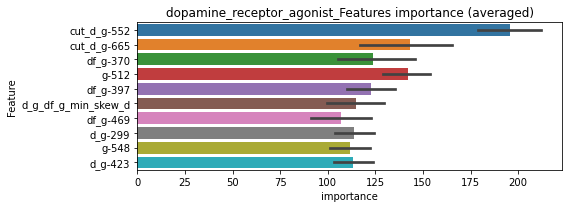

len(train_index) : 2781
len(valid_index) : 927
================================= fold 1/4 dopamine_receptor_agonist=================================


Training until validation scores don't improve for 30 rounds


len(train_index) : 2781
len(valid_index) : 927
================================= fold 2/4 dopamine_receptor_agonist=================================


Early stopping, best iteration is:
[491]	training's binary_logloss: 0.00130186	valid_1's binary_logloss: 0.0473155
Training until validation scores don't improve for 30 rounds


len(train_index) : 2781
len(valid_index) : 927
================================= fold 3/4 dopamine_receptor_agonist=================================


Early stopping, best iteration is:
[363]	training's binary_logloss: 0.0018444	valid_1's binary_logloss: 0.0617425
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[594]	training's binary_logloss: 0.00108828	valid_1's binary_logloss: 0.031954


len(train_index) : 2781
len(valid_index) : 927
================================= fold 4/4 dopamine_receptor_agonist=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[547]	training's binary_logloss: 0.00120948	valid_1's binary_logloss: 0.021328


dopamine_receptor_agonist logloss: 0.040585012900207953
dopamine_receptor_agonist clipping


neg labels: 3289 → selected neg labels: 3231


dopamine_receptor_antagonist, len(trt): 424, len(othr): 3231
target_rate: 0.0178047 → Adj_target_rate: 0.0143701
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[182]	training's binary_logloss: 0.106761	valid_1's binary_logloss: 0.378697
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0523286	valid_1's binary_logloss: 0.366511
Early stopping, best iteration is:
[282]	training's binary_logloss: 0.0585374	valid_1's binary_logloss: 0.365838
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[248]	training's binary_logloss: 0.0725334	valid_1's binary_logloss: 0.345066
Training until validation scores don't improve for 30 rounds


1 / 3 AUC score:0.762
y_Threshold: 0.1350223, Threshold: 0.5430239, pos_neg_ratio: 0.8000000
Remove_noisy_data: 714 → Positive_corect_labels: 354/3163
p_label_rate: 0.0100452 Vs.target_rate: 0.01780
Num_p_label: 40.0, conf_0:0.38012, conf_1:0.70593
Num_p_label: 40.0, Expected: 70.9, Adj_threshold_1: 0.5430239
Num_p_label: 51.0, Expected: 70.9, Adj_threshold_2: 0.5130239
threshold: 0.5130239, positive_p_label: 51.0/3982, p_label_rate: 0.0128076


Early stopping, best iteration is:
[187]	training's binary_logloss: 0.0988905	valid_1's binary_logloss: 0.368366


positive_y_label: 354.0/3163, y_label_rate: 0.1119191
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0110258	valid_1's binary_logloss: 0.165447
Early stopping, best iteration is:
[319]	training's binary_logloss: 0.00934648	valid_1's binary_logloss: 0.165192
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[244]	training's binary_logloss: 0.0197897	valid_1's binary_logloss: 0.167777
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0109497	valid_1's binary_logloss: 0.168454
Early stopping, best iteration is:
[301]	training's binary_logloss: 0.0108496	valid_1's binary_logloss: 0.168407
Training until validation scores don't improve for 30 rounds


2 / 3 AUC score:0.953
y_Threshold: 0.0800496, Threshold: 0.5130239, pos_neg_ratio: 0.8000000
Remove_noisy_data: 158 → Positive_corect_labels: 275.0/3005
p_label_rate: 0.0364139 Vs.target_rate: 0.01780
Num_p_label: 145.0, conf_0:0.41042, conf_1:0.61563
Num_p_label: 145.0, Expected: 70.9, Adj_threshold_1: 0.5130239
Num_p_label: 136.0, Expected: 70.9, Adj_threshold_2: 0.5530239
Num_p_label: 134.0, Expected: 70.9, Adj_threshold_3: 0.5930239
Num_p_label: 124.0, Expected: 70.9, Adj_threshold_4: 0.6330239
Num_p_label: 120.0, Expected: 70.9, Adj_threshold_5: 0.6730239
Num_p_label: 113.0, Expected: 70.9, Adj_threshold_6: 0.7130239
Num_p_label: 103.0, Expected: 70.9, Adj_threshold_7: 0.7530239
threshold: 0.7530239, positive_p_label: 103.0/3982, p_label_rate: 0.0258664


Early stopping, best iteration is:
[228]	training's binary_logloss: 0.0212471	valid_1's binary_logloss: 0.191538


positive_y_label: 275.0/3005, y_label_rate: 0.0915141
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[250]	training's binary_logloss: 0.00959156	valid_1's binary_logloss: 0.133012
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00628658	valid_1's binary_logloss: 0.0995301
Early stopping, best iteration is:
[297]	training's binary_logloss: 0.00646404	valid_1's binary_logloss: 0.0993576
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00591492	valid_1's binary_logloss: 0.110017
Early stopping, best iteration is:
[345]	training's binary_logloss: 0.00407012	valid_1's binary_logloss: 0.108567
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.005586	valid_1's binary_logloss: 0.128836


3 / 3 AUC score:0.978
y_Threshold: 0.0683046, Threshold: 0.7530239, pos_neg_ratio: 0.8000000
Remove_noisy_data: 86 → Positive_corect_labels: 232.0/2919
p_label_rate: 0.0371673 Vs.target_rate: 0.01780
Num_p_label: 148.0, conf_0:0.50000, conf_1:0.80000
Num_p_label: 148.0, Expected: 70.9, Adj_threshold_1: 0.7530239
Num_p_label: 144.0, Expected: 70.9, Adj_threshold_2: 0.7930239
Num_p_label: 136.0, Expected: 70.9, Adj_threshold_3: 0.8330239
Num_p_label: 121.0, Expected: 70.9, Adj_threshold_4: 0.8730239
threshold: 0.8730239, positive_p_label: 121.0/3982, p_label_rate: 0.0303867


Early stopping, best iteration is:
[331]	training's binary_logloss: 0.00427384	valid_1's binary_logloss: 0.126894


positive_y_label: 232.0/2919, y_label_rate: 0.0794793


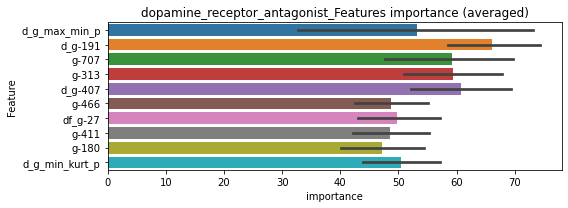

len(train_index) : 2189
len(valid_index) : 730
================================= fold 1/4 dopamine_receptor_antagonist=================================


Training until validation scores don't improve for 30 rounds


len(train_index) : 2189
len(valid_index) : 730
================================= fold 2/4 dopamine_receptor_antagonist=================================


Early stopping, best iteration is:
[178]	training's binary_logloss: 0.00455269	valid_1's binary_logloss: 0.0894837
Training until validation scores don't improve for 30 rounds


len(train_index) : 2189
len(valid_index) : 730
================================= fold 3/4 dopamine_receptor_antagonist=================================


Early stopping, best iteration is:
[252]	training's binary_logloss: 0.00279226	valid_1's binary_logloss: 0.0753909
Training until validation scores don't improve for 30 rounds


len(train_index) : 2190
len(valid_index) : 729
================================= fold 4/4 dopamine_receptor_antagonist=================================


Early stopping, best iteration is:
[157]	training's binary_logloss: 0.00536656	valid_1's binary_logloss: 0.0985155
Training until validation scores don't improve for 30 rounds


dopamine_receptor_antagonist logloss: 0.09902630100168154
dopamine_receptor_antagonist clipping


Early stopping, best iteration is:
[100]	training's binary_logloss: 0.0107158	valid_1's binary_logloss: 0.132761
neg labels: 3289 → selected neg labels: 3242


egfr_inhibitor, len(trt): 336, len(othr): 3242
target_rate: 0.0141093 → Adj_target_rate: 0.0117920
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0449455	valid_1's binary_logloss: 0.285008
Early stopping, best iteration is:
[327]	training's binary_logloss: 0.0372293	valid_1's binary_logloss: 0.284489
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0396668	valid_1's binary_logloss: 0.280851
Early stopping, best iteration is:
[318]	training's binary_logloss: 0.0352958	valid_1's binary_logloss: 0.279411
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0426415	valid_1's binary_logloss: 0.295922
Early stopping, best iteration is:
[331]	training's binary_logloss: 0.0343844	valid_1's binary_logloss: 0.2939
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0437636	valid_1's binary_logloss: 0.298998


1 / 3 AUC score:0.855
y_Threshold: 0.0956261, Threshold: 0.7541588, pos_neg_ratio: 0.8000000
Remove_noisy_data: 496 → Positive_corect_labels: 465/3394
p_label_rate: 0.0100452 Vs.target_rate: 0.01411
Num_p_label: 40.0, conf_0:0.50000, conf_1:0.80000


Early stopping, best iteration is:
[290]	training's binary_logloss: 0.0467532	valid_1's binary_logloss: 0.298649


threshold: 0.7541588, positive_p_label: 40.0/3982, p_label_rate: 0.0100452
positive_y_label: 465.0/3394, y_label_rate: 0.1370065
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0169622	valid_1's binary_logloss: 0.169303
Early stopping, best iteration is:
[397]	training's binary_logloss: 0.00751344	valid_1's binary_logloss: 0.161997
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.017613	valid_1's binary_logloss: 0.135678
Early stopping, best iteration is:
[524]	training's binary_logloss: 0.00360701	valid_1's binary_logloss: 0.121367
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0182582	valid_1's binary_logloss: 0.151255
Early stopping, best iteration is:
[497]	training's binary_logloss: 0.00414715	valid_1's binary_logloss: 0.141634
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0181304	valid_1's binary_logloss: 0.159757


2 / 3 AUC score:0.973


Early stopping, best iteration is:
[369]	training's binary_logloss: 0.0102129	valid_1's binary_logloss: 0.152969


y_Threshold: 0.0756053, Threshold: 0.7541588, pos_neg_ratio: 0.8000000
Remove_noisy_data: 128 → Positive_corect_labels: 401.0/3266
p_label_rate: 0.0331492 Vs.target_rate: 0.01411
Num_p_label: 132.0, conf_0:0.50000, conf_1:0.80000
Num_p_label: 132.0, Expected: 56.2, Adj_threshold_1: 0.7541588
Num_p_label: 125.0, Expected: 56.2, Adj_threshold_2: 0.7941588
Num_p_label: 116.0, Expected: 56.2, Adj_threshold_3: 0.8341588
Num_p_label: 101.0, Expected: 56.2, Adj_threshold_4: 0.8741588
threshold: 0.8741588, positive_p_label: 101.0/3982, p_label_rate: 0.0253641
positive_y_label: 401.0/3266, y_label_rate: 0.1227802
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0109946	valid_1's binary_logloss: 0.128262
Early stopping, best iteration is:
[376]	training's binary_logloss: 0.00569728	valid_1's binary_logloss: 0.124763
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0116891	valid_1's binary_logloss: 0.104551
Early stopping, best iteration is:
[523]	training's binary_logloss: 0.00242788	valid_1's binary_logloss: 0.0919758
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0111889	valid_1's binary_logloss: 0.156718
Early stopping, best iteration is:
[358]	training's binary_logloss: 0.0067431	valid_1's binary_logloss: 0.15394
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0119176	valid_1's binary_logloss: 0.0978657
[600]	training's binary_logloss: 0.00180529	valid_1's binary_logloss: 0.0815616
Early stopping, best i

3 / 3 AUC score:0.986
y_Threshold: 0.0694725, Threshold: 0.8741588, pos_neg_ratio: 0.8000000
Remove_noisy_data: 68 → Positive_corect_labels: 367.0/3198
p_label_rate: 0.0354093 Vs.target_rate: 0.01411
Num_p_label: 141.0, conf_0:0.50000, conf_1:0.80000
Num_p_label: 141.0, Expected: 56.2, Adj_threshold_1: 0.8741588
threshold: 0.8741588, positive_p_label: 141.0/3982, p_label_rate: 0.0354093
positive_y_label: 367.0/3198, y_label_rate: 0.1147592


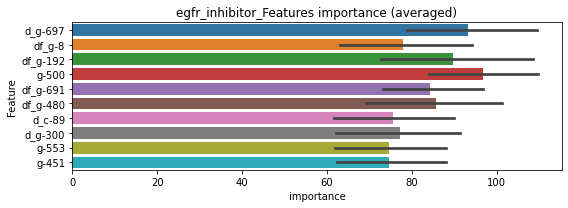

len(train_index) : 2398
len(valid_index) : 800
================================= fold 1/4 egfr_inhibitor=================================


Training until validation scores don't improve for 30 rounds


len(train_index) : 2398
len(valid_index) : 800
================================= fold 2/4 egfr_inhibitor=================================


Early stopping, best iteration is:
[260]	training's binary_logloss: 0.00387337	valid_1's binary_logloss: 0.094313
Training until validation scores don't improve for 30 rounds


len(train_index) : 2399
len(valid_index) : 799
================================= fold 3/4 egfr_inhibitor=================================


Early stopping, best iteration is:
[275]	training's binary_logloss: 0.00352196	valid_1's binary_logloss: 0.100128
Training until validation scores don't improve for 30 rounds


len(train_index) : 2399
len(valid_index) : 799
================================= fold 4/4 egfr_inhibitor=================================


Early stopping, best iteration is:
[279]	training's binary_logloss: 0.00349022	valid_1's binary_logloss: 0.10716
Training until validation scores don't improve for 30 rounds


egfr_inhibitor logloss: 0.11063815784523608
egfr_inhibitor clipping


Early stopping, best iteration is:
[154]	training's binary_logloss: 0.00875928	valid_1's binary_logloss: 0.140986
neg labels: 3289 → selected neg labels: 3284


elastase_inhibitor, len(trt): 12, len(othr): 3284
target_rate: 0.0005039 → Adj_target_rate: 0.0006942
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.000549192	valid_1's binary_logloss: 0.00226571
Early stopping, best iteration is:
[517]	training's binary_logloss: 0.000231225	valid_1's binary_logloss: 0.00156048
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.000554158	valid_1's binary_logloss: 0.00184461
Early stopping, best iteration is:
[518]	training's binary_logloss: 0.000227971	valid_1's binary_logloss: 0.00114236
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.000571336	valid_1's binary_logloss: 0.000796914
Early stopping, best iteration is:
[537]	training's binary_logloss: 0.000232467	valid_1's binary_logloss: 0.000349636
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.000564409	valid_1's binary_logloss: 0.000866523


1 / 3 AUC score:1.000


Early stopping, best iteration is:
[505]	training's binary_logloss: 0.000235657	valid_1's binary_logloss: 0.000425163


y_Threshold: 0.0008951, Threshold: 0.0027902, pos_neg_ratio: 0.8000000
Remove_noisy_data: 132 → Positive_corect_labels: 656/3808
p_label_rate: 0.0100452 Vs.target_rate: 0.00050
Num_p_label: 40.0, conf_0:0.00195, conf_1:0.00363
Num_p_label: 40.0, Expected: 2.0, Adj_threshold_1: 0.0027902
Num_p_label: 0.0, Expected: 2.0, Adj_threshold_2: 0.0427902
threshold: 0.0427902, positive_p_label: 0.0/3982, p_label_rate: 0.0000000
positive_y_label: 656.0/3808, y_label_rate: 0.1722689
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.000532928	valid_1's binary_logloss: 0.00260072
Early stopping, best iteration is:
[494]	training's binary_logloss: 0.000226879	valid_1's binary_logloss: 0.0019589
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00054053	valid_1's binary_logloss: 0.00173644
Early stopping, best iteration is:
[494]	training's binary_logloss: 0.000226857	valid_1's binary_logloss: 0.00111353
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.000559774	valid_1's binary_logloss: 0.000721811
Early stopping, best iteration is:
[524]	training's binary_logloss: 0.000229594	valid_1's binary_logloss: 0.000318191
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.000546564	valid_1's binary_logloss: 0.000801945


2 / 3 AUC score:1.000
y_Threshold: 0.0529499, Threshold: 0.0427902, pos_neg_ratio: 0.8000000
Remove_noisy_data: 0 → Positive_corect_labels: 656.0/3808
p_label_rate: 0.0000000 Vs.target_rate: 0.00050
Num_p_label: 0.0, conf_0:0.03423, conf_1:0.05135
Num_p_label: 0.0, Expected: 2.0, Adj_threshold_1: 0.0427902
threshold: 0.0427902, positive_p_label: 0.0/3982, p_label_rate: 0.0000000


Early stopping, best iteration is:
[553]	training's binary_logloss: 0.000226019	valid_1's binary_logloss: 0.000375626


positive_y_label: 656.0/3808, y_label_rate: 0.1722689
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.000532928	valid_1's binary_logloss: 0.00260072
Early stopping, best iteration is:
[494]	training's binary_logloss: 0.000226879	valid_1's binary_logloss: 0.0019589
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00054053	valid_1's binary_logloss: 0.00173644
Early stopping, best iteration is:
[494]	training's binary_logloss: 0.000226857	valid_1's binary_logloss: 0.00111353
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.000559774	valid_1's binary_logloss: 0.000721811
Early stopping, best iteration is:
[496]	training's binary_logloss: 0.000229594	valid_1's binary_logloss: 0.000318191
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.000546564	valid_1's binary_logloss: 0.000801945


3 / 3 AUC score:1.000
y_Threshold: 0.0529499, Threshold: 0.0427902, pos_neg_ratio: 0.8000000


Early stopping, best iteration is:
[528]	training's binary_logloss: 0.000226019	valid_1's binary_logloss: 0.000375626


Remove_noisy_data: 0 → Positive_corect_labels: 656.0/3808
p_label_rate: 0.0000000 Vs.target_rate: 0.00050
Num_p_label: 0.0, conf_0:0.03851, conf_1:0.04707
Num_p_label: 0.0, Expected: 2.0, Adj_threshold_1: 0.0427902
threshold: 0.0427902, positive_p_label: 0.0/3982, p_label_rate: 0.0000000
positive_y_label: 656.0/3808, y_label_rate: 0.1722689


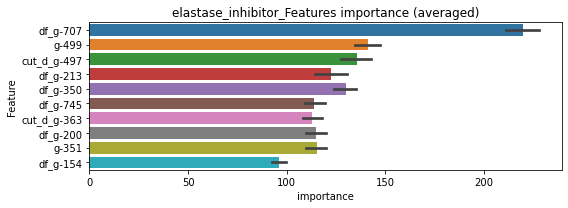

len(train_index) : 2856
len(valid_index) : 952
================================= fold 1/4 elastase_inhibitor=================================


Training until validation scores don't improve for 30 rounds


len(train_index) : 2856
len(valid_index) : 952
================================= fold 2/4 elastase_inhibitor=================================


Early stopping, best iteration is:
[893]	training's binary_logloss: 0.000228823	valid_1's binary_logloss: 0.00139547
Training until validation scores don't improve for 30 rounds


len(train_index) : 2856
len(valid_index) : 952
================================= fold 3/4 elastase_inhibitor=================================


Early stopping, best iteration is:
[886]	training's binary_logloss: 0.00022766	valid_1's binary_logloss: 0.000988612
Training until validation scores don't improve for 30 rounds


len(train_index) : 2856
len(valid_index) : 952
================================= fold 4/4 elastase_inhibitor=================================


Early stopping, best iteration is:
[805]	training's binary_logloss: 0.000233153	valid_1's binary_logloss: 0.000326458
Training until validation scores don't improve for 30 rounds


elastase_inhibitor logloss: 0.0008011005471105184


Early stopping, best iteration is:
[819]	training's binary_logloss: 0.000233531	valid_1's binary_logloss: 0.000492828
neg labels: 3289 → selected neg labels: 3287


erbb2_inhibitor, len(trt): 20, len(othr): 3287
target_rate: 0.0008398 → Adj_target_rate: 0.0010717
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00117784	valid_1's binary_logloss: 0.00383735
Early stopping, best iteration is:
[521]	training's binary_logloss: 0.000353061	valid_1's binary_logloss: 0.00280803
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00117439	valid_1's binary_logloss: 0.00373858
Early stopping, best iteration is:
[542]	training's binary_logloss: 0.000333051	valid_1's binary_logloss: 0.00197029
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00121247	valid_1's binary_logloss: 0.00216841
[600]	training's binary_logloss: 0.000322874	valid_1's binary_logloss: 0.000718758
Early stopping, best iteration is:
[609]	training's binary_logloss: 0.000322874	valid_1's binary_logloss: 0.000718758
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00118536	valid_1's binary_logloss: 0.002763

1 / 3 AUC score:1.000
y_Threshold: 0.0017919, Threshold: 0.0071664, pos_neg_ratio: 0.8000000
Remove_noisy_data: 132 → Positive_corect_labels: 657/3812
p_label_rate: 0.0100452 Vs.target_rate: 0.00084
Num_p_label: 40.0, conf_0:0.00502, conf_1:0.00932
Num_p_label: 40.0, Expected: 3.3, Adj_threshold_1: 0.0071664
Num_p_label: 3.0, Expected: 3.3, Adj_threshold_2: 0.0471664
threshold: 0.0471664, positive_p_label: 3.0/3982, p_label_rate: 0.0007534
positive_y_label: 657.0/3812, y_label_rate: 0.1723505
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00108311	valid_1's binary_logloss: 0.00353815
Early stopping, best iteration is:
[464]	training's binary_logloss: 0.000387671	valid_1's binary_logloss: 0.00268506
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00112913	valid_1's binary_logloss: 0.00310512
[600]	training's binary_logloss: 0.00031054	valid_1's binary_logloss: 0.00134978
Early stopping, best iteration is:
[608]	training's binary_logloss: 0.000309503	valid_1's binary_logloss: 0.00134519
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00113609	valid_1's binary_logloss: 0.0018468
[600]	training's binary_logloss: 0.000314138	valid_1's binary_logloss: 0.000565561
Early stopping, best iteration is:
[594]	training's binary_logloss: 0.000314138	valid_1's binary_logloss: 0.000565561
Training until validation scores don't improve for 30 round

2 / 3 AUC score:1.000
y_Threshold: 0.0350733, Threshold: 0.0471664, pos_neg_ratio: 0.8000000
Remove_noisy_data: 0 → Positive_corect_labels: 657.0/3812
p_label_rate: 0.0027624 Vs.target_rate: 0.00084
Num_p_label: 11.0, conf_0:0.03773, conf_1:0.05660
Num_p_label: 11.0, Expected: 3.3, Adj_threshold_1: 0.0471664
Num_p_label: 5.0, Expected: 3.3, Adj_threshold_2: 0.0871664
threshold: 0.0871664, positive_p_label: 5.0/3982, p_label_rate: 0.0012557
positive_y_label: 657.0/3812, y_label_rate: 0.1723505
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00108311	valid_1's binary_logloss: 0.00353815
Early stopping, best iteration is:
[464]	training's binary_logloss: 0.000387671	valid_1's binary_logloss: 0.00268506
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00112913	valid_1's binary_logloss: 0.00310512
[600]	training's binary_logloss: 0.00031054	valid_1's binary_logloss: 0.00134978
Early stopping, best iteration is:
[608]	training's binary_logloss: 0.000309503	valid_1's binary_logloss: 0.00134519
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00113609	valid_1's binary_logloss: 0.0018468
[600]	training's binary_logloss: 0.000314138	valid_1's binary_logloss: 0.000565561
Early stopping, best iteration is:
[596]	training's binary_logloss: 0.000314138	valid_1's binary_logloss: 0.000565561
Training until validation scores don't improve for 30 round

3 / 3 AUC score:1.000
y_Threshold: 0.0350733, Threshold: 0.0871664, pos_neg_ratio: 0.8000000
Remove_noisy_data: 0 → Positive_corect_labels: 657.0/3812
p_label_rate: 0.0012557 Vs.target_rate: 0.00084
Num_p_label: 5.0, conf_0:0.07845, conf_1:0.09588
threshold: 0.0871664, positive_p_label: 5.0/3982, p_label_rate: 0.0012557
positive_y_label: 657.0/3812, y_label_rate: 0.1723505


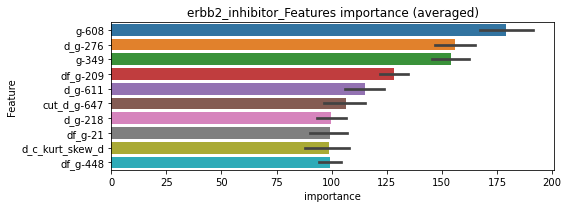

len(train_index) : 2859
len(valid_index) : 953
================================= fold 1/4 erbb2_inhibitor=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[875]	training's binary_logloss: 0.000318953	valid_1's binary_logloss: 0.00289986


len(train_index) : 2859
len(valid_index) : 953
================================= fold 2/4 erbb2_inhibitor=================================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.00030832	valid_1's binary_logloss: 0.00116233
Early stopping, best iteration is:
[1055]	training's binary_logloss: 0.000304553	valid_1's binary_logloss: 0.00115621


len(train_index) : 2859
len(valid_index) : 953
================================= fold 3/4 erbb2_inhibitor=================================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.000312249	valid_1's binary_logloss: 0.000559158
Early stopping, best iteration is:
[1012]	training's binary_logloss: 0.000311578	valid_1's binary_logloss: 0.000558052


len(train_index) : 2859
len(valid_index) : 953
================================= fold 4/4 erbb2_inhibitor=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[949]	training's binary_logloss: 0.000312244	valid_1's binary_logloss: 0.000797845


erbb2_inhibitor logloss: 0.001352999192393874


neg labels: 3289 → selected neg labels: 3270


estrogen_receptor_agonist, len(trt): 158, len(othr): 3270
target_rate: 0.0066348 → Adj_target_rate: 0.0062095
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0141487	valid_1's binary_logloss: 0.130736
Early stopping, best iteration is:
[491]	training's binary_logloss: 0.00334751	valid_1's binary_logloss: 0.123019
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0149245	valid_1's binary_logloss: 0.134725
Early stopping, best iteration is:
[361]	training's binary_logloss: 0.00877619	valid_1's binary_logloss: 0.13347
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0146148	valid_1's binary_logloss: 0.0894836
Early stopping, best iteration is:
[558]	training's binary_logloss: 0.002548	valid_1's binary_logloss: 0.077337
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0143309	valid_1's binary_logloss: 0.13992


1 / 3 AUC score:0.977
y_Threshold: 0.0292445, Threshold: 0.2858888, pos_neg_ratio: 0.8000000
Remove_noisy_data: 217 → Positive_corect_labels: 611/3707
p_label_rate: 0.0100452 Vs.target_rate: 0.00663
Num_p_label: 40.0, conf_0:0.20012, conf_1:0.37166
Num_p_label: 40.0, Expected: 26.4, Adj_threshold_1: 0.2858888
Num_p_label: 36.0, Expected: 26.4, Adj_threshold_2: 0.3258888
threshold: 0.3258888, positive_p_label: 36.0/3982, p_label_rate: 0.0090407


Early stopping, best iteration is:
[315]	training's binary_logloss: 0.0126807	valid_1's binary_logloss: 0.139032


positive_y_label: 611.0/3707, y_label_rate: 0.1648233
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0101417	valid_1's binary_logloss: 0.089933
Early stopping, best iteration is:
[539]	training's binary_logloss: 0.0019208	valid_1's binary_logloss: 0.0790709
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0104013	valid_1's binary_logloss: 0.0958203
Early stopping, best iteration is:
[523]	training's binary_logloss: 0.00213842	valid_1's binary_logloss: 0.0841306
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0103248	valid_1's binary_logloss: 0.0680262
[600]	training's binary_logloss: 0.00157335	valid_1's binary_logloss: 0.0559681
Early stopping, best iteration is:
[603]	training's binary_logloss: 0.0015567	valid_1's binary_logloss: 0.0558818
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0101562	valid_1's binary_logloss: 0.0842267
[600]	training's b

2 / 3 AUC score:0.998
y_Threshold: 0.0430551, Threshold: 0.3258888, pos_neg_ratio: 0.8000000
Remove_noisy_data: 42 → Positive_corect_labels: 590.0/3665
p_label_rate: 0.0193370 Vs.target_rate: 0.00663
Num_p_label: 77.0, conf_0:0.26071, conf_1:0.39107
Num_p_label: 77.0, Expected: 26.4, Adj_threshold_1: 0.3258888
Num_p_label: 71.0, Expected: 26.4, Adj_threshold_2: 0.3658888
Num_p_label: 62.0, Expected: 26.4, Adj_threshold_3: 0.4058888
Num_p_label: 51.0, Expected: 26.4, Adj_threshold_4: 0.4458888
Num_p_label: 45.0, Expected: 26.4, Adj_threshold_5: 0.4858888
Num_p_label: 41.0, Expected: 26.4, Adj_threshold_6: 0.5258888
Num_p_label: 36.0, Expected: 26.4, Adj_threshold_7: 0.5658888
threshold: 0.5658888, positive_p_label: 36.0/3982, p_label_rate: 0.0090407
positive_y_label: 590.0/3665, y_label_rate: 0.1609823
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00889665	valid_1's binary_logloss: 0.0724633
Early stopping, best iteration is:
[417]	training's binary_logloss: 0.00338255	valid_1's binary_logloss: 0.0682483
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00859087	valid_1's binary_logloss: 0.0954568
Early stopping, best iteration is:
[386]	training's binary_logloss: 0.00407403	valid_1's binary_logloss: 0.0904135
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00848684	valid_1's binary_logloss: 0.0649931
[600]	training's binary_logloss: 0.00137698	valid_1's binary_logloss: 0.0554887
Early stopping, best iteration is:
[586]	training's binary_logloss: 0.00144319	valid_1's binary_logloss: 0.0553128
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00821872	valid_1's binary_logloss: 0.079474


3 / 3 AUC score:0.997
y_Threshold: 0.0483960, Threshold: 0.5658888, pos_neg_ratio: 0.8000000


Early stopping, best iteration is:
[499]	training's binary_logloss: 0.00198837	valid_1's binary_logloss: 0.073625


Remove_noisy_data: 50 → Positive_corect_labels: 565.0/3615
p_label_rate: 0.0097941 Vs.target_rate: 0.00663
Num_p_label: 39.0, conf_0:0.50000, conf_1:0.62248
threshold: 0.5658888, positive_p_label: 39.0/3982, p_label_rate: 0.0097941
positive_y_label: 565.0/3615, y_label_rate: 0.1562932


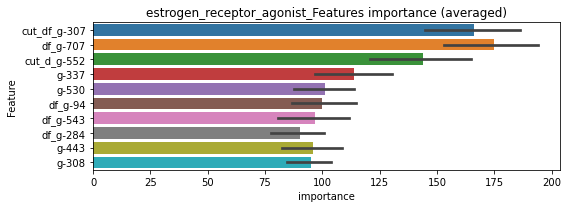

len(train_index) : 2711
len(valid_index) : 904
================================= fold 1/4 estrogen_receptor_agonist=================================


Training until validation scores don't improve for 30 rounds


len(train_index) : 2711
len(valid_index) : 904
================================= fold 2/4 estrogen_receptor_agonist=================================


Early stopping, best iteration is:
[322]	training's binary_logloss: 0.00236347	valid_1's binary_logloss: 0.0611257
Training until validation scores don't improve for 30 rounds


len(train_index) : 2711
len(valid_index) : 904
================================= fold 3/4 estrogen_receptor_agonist=================================


Early stopping, best iteration is:
[335]	training's binary_logloss: 0.00227055	valid_1's binary_logloss: 0.0515525
Training until validation scores don't improve for 30 rounds


len(train_index) : 2712
len(valid_index) : 903
================================= fold 4/4 estrogen_receptor_agonist=================================


Early stopping, best iteration is:
[270]	training's binary_logloss: 0.00312397	valid_1's binary_logloss: 0.0443095
Training until validation scores don't improve for 30 rounds


estrogen_receptor_agonist logloss: 0.054145927142852844
estrogen_receptor_agonist clipping


Early stopping, best iteration is:
[242]	training's binary_logloss: 0.00361163	valid_1's binary_logloss: 0.0596021
neg labels: 3289 → selected neg labels: 3283


estrogen_receptor_antagonist, len(trt): 48, len(othr): 3283
target_rate: 0.0020156 → Adj_target_rate: 0.0022556
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00281511	valid_1's binary_logloss: 0.0161293
[600]	training's binary_logloss: 0.000566282	valid_1's binary_logloss: 0.0107169
Early stopping, best iteration is:
[641]	training's binary_logloss: 0.000521206	valid_1's binary_logloss: 0.0105435
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0029149	valid_1's binary_logloss: 0.0180212
[600]	training's binary_logloss: 0.0005747	valid_1's binary_logloss: 0.012989
Early stopping, best iteration is:
[640]	training's binary_logloss: 0.000531802	valid_1's binary_logloss: 0.0128841
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0030468	valid_1's binary_logloss: 0.00904686
[600]	training's binary_logloss: 0.000591161	valid_1's binary_logloss: 0.00432969
Early stopping, best iteration is:
[642]	training's binary_logloss: 0.000541989	valid_1's binary_logloss:

1 / 3 AUC score:1.000
y_Threshold: 0.0058948, Threshold: 0.2081733, pos_neg_ratio: 0.8000000
Remove_noisy_data: 136 → Positive_corect_labels: 654/3803
p_label_rate: 0.0100452 Vs.target_rate: 0.00202
Num_p_label: 40.0, conf_0:0.14572, conf_1:0.27063
Num_p_label: 40.0, Expected: 8.0, Adj_threshold_1: 0.2081733
Num_p_label: 36.0, Expected: 8.0, Adj_threshold_2: 0.2481733
Num_p_label: 33.0, Expected: 8.0, Adj_threshold_3: 0.2881733


Early stopping, best iteration is:
[407]	training's binary_logloss: 0.00118838	valid_1's binary_logloss: 0.0291086


Num_p_label: 29.0, Expected: 8.0, Adj_threshold_4: 0.3281733
Num_p_label: 26.0, Expected: 8.0, Adj_threshold_5: 0.3681733
Num_p_label: 24.0, Expected: 8.0, Adj_threshold_6: 0.4081733
Num_p_label: 23.0, Expected: 8.0, Adj_threshold_7: 0.4481733
Num_p_label: 20.0, Expected: 8.0, Adj_threshold_8: 0.4881733
threshold: 0.4881733, positive_p_label: 20.0/3982, p_label_rate: 0.0050226
positive_y_label: 654.0/3803, y_label_rate: 0.1719695
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00257944	valid_1's binary_logloss: 0.0270478
[600]	training's binary_logloss: 0.000530369	valid_1's binary_logloss: 0.0222555
Early stopping, best iteration is:
[587]	training's binary_logloss: 0.000546564	valid_1's binary_logloss: 0.0222292
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00268698	valid_1's binary_logloss: 0.013347
[600]	training's binary_logloss: 0.000550153	valid_1's binary_logloss: 0.00911544
Early stopping, best iteration is:
[629]	training's binary_logloss: 0.000521499	valid_1's binary_logloss: 0.00900626
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00258821	valid_1's binary_logloss: 0.0138311
[600]	training's binary_logloss: 0.000546141	valid_1's binary_logloss: 0.0101743
Early stopping, best iteration is:
[572]	training's binary_logloss: 0.000581417	valid_1's binary_logl

2 / 3 AUC score:1.000
y_Threshold: 0.0449496, Threshold: 0.4881733, pos_neg_ratio: 0.8000000
Remove_noisy_data: 6 → Positive_corect_labels: 651.0/3797
p_label_rate: 0.0085384 Vs.target_rate: 0.00202
Num_p_label: 34.0, conf_0:0.39054, conf_1:0.58581
Num_p_label: 34.0, Expected: 8.0, Adj_threshold_1: 0.4881733
Num_p_label: 31.0, Expected: 8.0, Adj_threshold_2: 0.5281733
Num_p_label: 30.0, Expected: 8.0, Adj_threshold_3: 0.5681733
Num_p_label: 27.0, Expected: 8.0, Adj_threshold_4: 0.6081733
Num_p_label: 26.0, Expected: 8.0, Adj_threshold_5: 0.6481733
Num_p_label: 25.0, Expected: 8.0, Adj_threshold_6: 0.6881733
Num_p_label: 22.0, Expected: 8.0, Adj_threshold_7: 0.7281733
Num_p_label: 20.0, Expected: 8.0, Adj_threshold_8: 0.7681733
threshold: 0.7681733, positive_p_label: 20.0/3982, p_label_rate: 0.0050226
positive_y_label: 651.0/3797, y_label_rate: 0.1714511
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00263413	valid_1's binary_logloss: 0.0145361
[600]	training's binary_logloss: 0.000532589	valid_1's binary_logloss: 0.00932309
Early stopping, best iteration is:
[660]	training's binary_logloss: 0.000487538	valid_1's binary_logloss: 0.0092279
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00255993	valid_1's binary_logloss: 0.0111425
[600]	training's binary_logloss: 0.000528393	valid_1's binary_logloss: 0.00594277
Early stopping, best iteration is:
[593]	training's binary_logloss: 0.000536367	valid_1's binary_logloss: 0.00591819
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00261772	valid_1's binary_logloss: 0.0140631
[600]	training's binary_logloss: 0.000539592	valid_1's binary_logloss: 0.00884286
Early stopping, best iteration is:
[668]	training's binary_logloss: 0.000492371	valid_1's binary_l

3 / 3 AUC score:1.000
y_Threshold: 0.0381481, Threshold: 0.7681733, pos_neg_ratio: 0.8000000
Remove_noisy_data: 2 → Positive_corect_labels: 650.0/3795
p_label_rate: 0.0055249 Vs.target_rate: 0.00202
Num_p_label: 22.0, conf_0:0.50000, conf_1:0.80000
Num_p_label: 22.0, Expected: 8.0, Adj_threshold_1: 0.7681733
Num_p_label: 19.0, Expected: 8.0, Adj_threshold_2: 0.8081733
threshold: 0.8081733, positive_p_label: 19.0/3982, p_label_rate: 0.0047715
positive_y_label: 650.0/3795, y_label_rate: 0.1712780


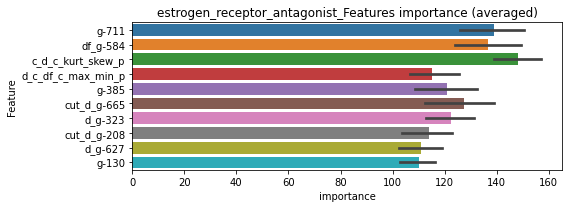

len(train_index) : 2846
len(valid_index) : 949
================================= fold 1/4 estrogen_receptor_antagonist=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[867]	training's binary_logloss: 0.000491877	valid_1's binary_logloss: 0.00483156


len(train_index) : 2846
len(valid_index) : 949
================================= fold 2/4 estrogen_receptor_antagonist=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[963]	training's binary_logloss: 0.000477758	valid_1's binary_logloss: 0.00892097


len(train_index) : 2846
len(valid_index) : 949
================================= fold 3/4 estrogen_receptor_antagonist=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[906]	training's binary_logloss: 0.000491721	valid_1's binary_logloss: 0.00724005


len(train_index) : 2847
len(valid_index) : 948
================================= fold 4/4 estrogen_receptor_antagonist=================================


Training until validation scores don't improve for 30 rounds


estrogen_receptor_antagonist logloss: 0.00748604928305544


Early stopping, best iteration is:
[564]	training's binary_logloss: 0.000660547	valid_1's binary_logloss: 0.00894996
neg labels: 3289 → selected neg labels: 3284


faah_inhibitor, len(trt): 36, len(othr): 3284
target_rate: 0.0015117 → Adj_target_rate: 0.0017663
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00179646	valid_1's binary_logloss: 0.0110104
[600]	training's binary_logloss: 0.000420461	valid_1's binary_logloss: 0.00670815
Early stopping, best iteration is:
[627]	training's binary_logloss: 0.000409306	valid_1's binary_logloss: 0.00668463
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00187201	valid_1's binary_logloss: 0.00603641
[600]	training's binary_logloss: 0.000426733	valid_1's binary_logloss: 0.00286613
Early stopping, best iteration is:
[608]	training's binary_logloss: 0.000420466	valid_1's binary_logloss: 0.00285374
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00188427	valid_1's binary_logloss: 0.00719323
[600]	training's binary_logloss: 0.000435383	valid_1's binary_logloss: 0.00456011
Early stopping, best iteration is:
[618]	training's binary_logloss: 0.000426976	valid_1's binar

1 / 3 AUC score:1.000
y_Threshold: 0.0030239, Threshold: 0.0094823, pos_neg_ratio: 0.8000000
Remove_noisy_data: 132 → Positive_corect_labels: 656/3808
p_label_rate: 0.0100452 Vs.target_rate: 0.00151
Num_p_label: 40.0, conf_0:0.00664, conf_1:0.01233
Num_p_label: 40.0, Expected: 6.0, Adj_threshold_1: 0.0094823
Num_p_label: 2.0, Expected: 6.0, Adj_threshold_2: 0.0494823
threshold: 0.0494823, positive_p_label: 2.0/3982, p_label_rate: 0.0005023
positive_y_label: 656.0/3808, y_label_rate: 0.1722689
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00175595	valid_1's binary_logloss: 0.00804812
[600]	training's binary_logloss: 0.0004088	valid_1's binary_logloss: 0.00469041
Early stopping, best iteration is:
[608]	training's binary_logloss: 0.000404108	valid_1's binary_logloss: 0.00465326
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00176143	valid_1's binary_logloss: 0.00597047
[600]	training's binary_logloss: 0.000411135	valid_1's binary_logloss: 0.00277495
Early stopping, best iteration is:
[667]	training's binary_logloss: 0.00038975	valid_1's binary_logloss: 0.00272677
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00174565	valid_1's binary_logloss: 0.00577284
[600]	training's binary_logloss: 0.000420552	valid_1's binary_logloss: 0.00339351
Early stopping, best iteration is:
[579]	training's binary_logloss: 0.000435638	valid_1's binary_

2 / 3 AUC score:1.000
y_Threshold: 0.0322490, Threshold: 0.0494823, pos_neg_ratio: 0.8000000
Remove_noisy_data: 0 → Positive_corect_labels: 656.0/3808
p_label_rate: 0.0022602 Vs.target_rate: 0.00151
Num_p_label: 9.0, conf_0:0.03959, conf_1:0.05938
threshold: 0.0494823, positive_p_label: 9.0/3982, p_label_rate: 0.0022602
positive_y_label: 656.0/3808, y_label_rate: 0.1722689
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00175595	valid_1's binary_logloss: 0.00804812
[600]	training's binary_logloss: 0.0004088	valid_1's binary_logloss: 0.00469041
Early stopping, best iteration is:
[608]	training's binary_logloss: 0.000404108	valid_1's binary_logloss: 0.00465326
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00176143	valid_1's binary_logloss: 0.00597047
[600]	training's binary_logloss: 0.000411135	valid_1's binary_logloss: 0.00277495
Early stopping, best iteration is:
[667]	training's binary_logloss: 0.00038975	valid_1's binary_logloss: 0.00272677
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00174565	valid_1's binary_logloss: 0.00577284
[600]	training's binary_logloss: 0.000420552	valid_1's binary_logloss: 0.00339351
Early stopping, best iteration is:
[579]	training's binary_logloss: 0.000435638	valid_1's binary_

3 / 3 AUC score:1.000
y_Threshold: 0.0322490, Threshold: 0.0494823, pos_neg_ratio: 0.8000000
Remove_noisy_data: 0 → Positive_corect_labels: 656.0/3808
p_label_rate: 0.0022602 Vs.target_rate: 0.00151
Num_p_label: 9.0, conf_0:0.04453, conf_1:0.05443
threshold: 0.0494823, positive_p_label: 9.0/3982, p_label_rate: 0.0022602
positive_y_label: 656.0/3808, y_label_rate: 0.1722689


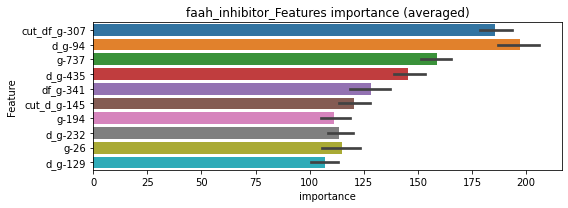

len(train_index) : 2856
len(valid_index) : 952
================================= fold 1/4 faah_inhibitor=================================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.000394083	valid_1's binary_logloss: 0.00421197
Early stopping, best iteration is:
[1011]	training's binary_logloss: 0.000393197	valid_1's binary_logloss: 0.00420531


len(train_index) : 2856
len(valid_index) : 952
================================= fold 2/4 faah_inhibitor=================================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.000397757	valid_1's binary_logloss: 0.00230423
Early stopping, best iteration is:
[1005]	training's binary_logloss: 0.000397577	valid_1's binary_logloss: 0.00230268


len(train_index) : 2856
len(valid_index) : 952
================================= fold 3/4 faah_inhibitor=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[717]	training's binary_logloss: 0.000468062	valid_1's binary_logloss: 0.00432923


len(train_index) : 2856
len(valid_index) : 952
================================= fold 4/4 faah_inhibitor=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[870]	training's binary_logloss: 0.000413209	valid_1's binary_logloss: 0.00333217


faah_inhibitor logloss: 0.003542395831406852


neg labels: 3289 → selected neg labels: 3288


farnesyltransferase_inhibitor, len(trt): 18, len(othr): 3288
target_rate: 0.0007559 → Adj_target_rate: 0.0009799
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.000955082	valid_1's binary_logloss: 0.00226006
[600]	training's binary_logloss: 0.000292263	valid_1's binary_logloss: 0.00101144
Early stopping, best iteration is:
[576]	training's binary_logloss: 0.000293235	valid_1's binary_logloss: 0.00101144
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.000923524	valid_1's binary_logloss: 0.00308195
[600]	training's binary_logloss: 0.00028475	valid_1's binary_logloss: 0.00143795
Early stopping, best iteration is:
[622]	training's binary_logloss: 0.00028475	valid_1's binary_logloss: 0.00143795
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.000952571	valid_1's binary_logloss: 0.00159128
[600]	training's binary_logloss: 0.000293128	valid_1's binary_logloss: 0.000563792
Early stopping, best iteration is:
[573]	training's binary_logloss: 0.000293128	valid_1's bi

1 / 3 AUC score:1.000
y_Threshold: 0.0013967, Threshold: 0.0042258, pos_neg_ratio: 0.8000000
Remove_noisy_data: 132 → Positive_corect_labels: 657/3813
p_label_rate: 0.0100452 Vs.target_rate: 0.00076
Num_p_label: 40.0, conf_0:0.00296, conf_1:0.00549
Num_p_label: 40.0, Expected: 3.0, Adj_threshold_1: 0.0042258
Num_p_label: 0.0, Expected: 3.0, Adj_threshold_2: 0.0442258


Early stopping, best iteration is:
[543]	training's binary_logloss: 0.000297043	valid_1's binary_logloss: 0.00459529


threshold: 0.0442258, positive_p_label: 0.0/3982, p_label_rate: 0.0000000
positive_y_label: 657.0/3813, y_label_rate: 0.1723053
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.000890815	valid_1's binary_logloss: 0.00219409
Early stopping, best iteration is:
[561]	training's binary_logloss: 0.000285507	valid_1's binary_logloss: 0.00104904
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.000884669	valid_1's binary_logloss: 0.00298877
[600]	training's binary_logloss: 0.000279185	valid_1's binary_logloss: 0.00146732
Early stopping, best iteration is:
[602]	training's binary_logloss: 0.000279039	valid_1's binary_logloss: 0.00146709
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.000899209	valid_1's binary_logloss: 0.00130002
[600]	training's binary_logloss: 0.000281163	valid_1's binary_logloss: 0.00044748
Early stopping, best iteration is:
[627]	training's binary_logloss: 0.000279265	valid_1's binary_logloss: 0.00044472
Training until validation scores don't improve for 30 ro

2 / 3 AUC score:1.000
y_Threshold: 0.0152932, Threshold: 0.0442258, pos_neg_ratio: 0.8000000
Remove_noisy_data: 0 → Positive_corect_labels: 657.0/3813
p_label_rate: 0.0015068 Vs.target_rate: 0.00076
Num_p_label: 6.0, conf_0:0.03538, conf_1:0.05307
Num_p_label: 6.0, Expected: 3.0, Adj_threshold_1: 0.0442258
threshold: 0.0442258, positive_p_label: 6.0/3982, p_label_rate: 0.0015068


Early stopping, best iteration is:
[502]	training's binary_logloss: 0.00030137	valid_1's binary_logloss: 0.00423021


positive_y_label: 657.0/3813, y_label_rate: 0.1723053
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.000890815	valid_1's binary_logloss: 0.00219409
Early stopping, best iteration is:
[561]	training's binary_logloss: 0.000285507	valid_1's binary_logloss: 0.00104904
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.000884669	valid_1's binary_logloss: 0.00298877
[600]	training's binary_logloss: 0.000279185	valid_1's binary_logloss: 0.00146732
Early stopping, best iteration is:
[602]	training's binary_logloss: 0.000279039	valid_1's binary_logloss: 0.00146709
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.000899209	valid_1's binary_logloss: 0.00130002
[600]	training's binary_logloss: 0.000281163	valid_1's binary_logloss: 0.00044748
Early stopping, best iteration is:
[627]	training's binary_logloss: 0.000279265	valid_1's binary_logloss: 0.00044472
Training until validation scores don't improve for 30 ro

3 / 3 AUC score:1.000
y_Threshold: 0.0152932, Threshold: 0.0442258, pos_neg_ratio: 0.8000000
Remove_noisy_data: 0 → Positive_corect_labels: 657.0/3813
p_label_rate: 0.0015068 Vs.target_rate: 0.00076
Num_p_label: 6.0, conf_0:0.03980, conf_1:0.04865
Num_p_label: 6.0, Expected: 3.0, Adj_threshold_1: 0.0442258
threshold: 0.0442258, positive_p_label: 6.0/3982, p_label_rate: 0.0015068


Early stopping, best iteration is:
[502]	training's binary_logloss: 0.00030137	valid_1's binary_logloss: 0.00423021


positive_y_label: 657.0/3813, y_label_rate: 0.1723053


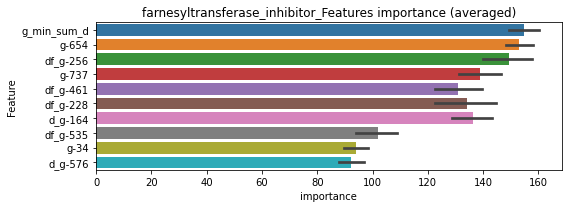

len(train_index) : 2859
len(valid_index) : 954
================================= fold 1/4 farnesyltransferase_inhibitor=================================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.000282024	valid_1's binary_logloss: 0.000879299
Early stopping, best iteration is:
[980]	training's binary_logloss: 0.000282024	valid_1's binary_logloss: 0.000879299


len(train_index) : 2860
len(valid_index) : 953
================================= fold 2/4 farnesyltransferase_inhibitor=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[926]	training's binary_logloss: 0.000283792	valid_1's binary_logloss: 0.000876598


len(train_index) : 2860
len(valid_index) : 953
================================= fold 3/4 farnesyltransferase_inhibitor=================================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.000283876	valid_1's binary_logloss: 0.000480109
Early stopping, best iteration is:
[980]	training's binary_logloss: 0.000283876	valid_1's binary_logloss: 0.000480109


len(train_index) : 2860
len(valid_index) : 953
================================= fold 4/4 farnesyltransferase_inhibitor=================================


Training until validation scores don't improve for 30 rounds


farnesyltransferase_inhibitor logloss: 0.0012925346350751068


Early stopping, best iteration is:
[649]	training's binary_logloss: 0.000322294	valid_1's binary_logloss: 0.00293457
neg labels: 3289 → selected neg labels: 3284


fatty_acid_receptor_agonist, len(trt): 25, len(othr): 3284
target_rate: 0.0010498 → Adj_target_rate: 0.0012955
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00125179	valid_1's binary_logloss: 0.00877094
Early stopping, best iteration is:
[568]	training's binary_logloss: 0.000346555	valid_1's binary_logloss: 0.00738822
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00119966	valid_1's binary_logloss: 0.00716622
Early stopping, best iteration is:
[556]	training's binary_logloss: 0.000344429	valid_1's binary_logloss: 0.00503212
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00124449	valid_1's binary_logloss: 0.00266584
[600]	training's binary_logloss: 0.000341064	valid_1's binary_logloss: 0.000976542
Early stopping, best iteration is:
[603]	training's binary_logloss: 0.000340325	valid_1's binary_logloss: 0.000975923
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00122538	valid_1's binary_logloss: 0.006687

1 / 3 AUC score:1.000
y_Threshold: 0.0021127, Threshold: 0.0102673, pos_neg_ratio: 0.8000000
Remove_noisy_data: 132 → Positive_corect_labels: 656/3808
p_label_rate: 0.0100452 Vs.target_rate: 0.00105
Num_p_label: 40.0, conf_0:0.00719, conf_1:0.01335
Num_p_label: 40.0, Expected: 4.2, Adj_threshold_1: 0.0102673
Num_p_label: 4.0, Expected: 4.2, Adj_threshold_2: 0.0502673


Early stopping, best iteration is:
[553]	training's binary_logloss: 0.000349058	valid_1's binary_logloss: 0.00427631


threshold: 0.0502673, positive_p_label: 4.0/3982, p_label_rate: 0.0010045
positive_y_label: 656.0/3808, y_label_rate: 0.1722689
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00117662	valid_1's binary_logloss: 0.00940616
Early stopping, best iteration is:
[545]	training's binary_logloss: 0.000348461	valid_1's binary_logloss: 0.00773029
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00115891	valid_1's binary_logloss: 0.0085699
Early stopping, best iteration is:
[524]	training's binary_logloss: 0.000355018	valid_1's binary_logloss: 0.00652958
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00117959	valid_1's binary_logloss: 0.00230033
[600]	training's binary_logloss: 0.000334496	valid_1's binary_logloss: 0.000833658
Early stopping, best iteration is:
[608]	training's binary_logloss: 0.000334496	valid_1's binary_logloss: 0.000833658
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00116195	valid_1's binary_logloss: 0.0059358

2 / 3 AUC score:1.000
y_Threshold: 0.0155034, Threshold: 0.0502673, pos_neg_ratio: 0.8000000
Remove_noisy_data: 2 → Positive_corect_labels: 655.0/3806
p_label_rate: 0.0030136 Vs.target_rate: 0.00105
Num_p_label: 12.0, conf_0:0.04021, conf_1:0.06032
Num_p_label: 12.0, Expected: 4.2, Adj_threshold_1: 0.0502673
Num_p_label: 5.0, Expected: 4.2, Adj_threshold_2: 0.0902673
threshold: 0.0902673, positive_p_label: 5.0/3982, p_label_rate: 0.0012557
positive_y_label: 655.0/3806, y_label_rate: 0.1720967
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00111531	valid_1's binary_logloss: 0.0106223
[600]	training's binary_logloss: 0.000324034	valid_1's binary_logloss: 0.00812823
Early stopping, best iteration is:
[592]	training's binary_logloss: 0.000325931	valid_1's binary_logloss: 0.00811477
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00119453	valid_1's binary_logloss: 0.00229558
[600]	training's binary_logloss: 0.000332538	valid_1's binary_logloss: 0.000872337
Early stopping, best iteration is:
[611]	training's binary_logloss: 0.000330595	valid_1's binary_logloss: 0.000870191
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00116616	valid_1's binary_logloss: 0.00365202
Early stopping, best iteration is:
[564]	training's binary_logloss: 0.000337956	valid_1's binary_logloss: 0.00243529
Training until validation scores don't improve for 30 roun

3 / 3 AUC score:1.000
y_Threshold: 0.0222849, Threshold: 0.0902673, pos_neg_ratio: 0.8000000
Remove_noisy_data: 0 → Positive_corect_labels: 655.0/3806
p_label_rate: 0.0015068 Vs.target_rate: 0.00105
Num_p_label: 6.0, conf_0:0.08124, conf_1:0.09929


[600]	training's binary_logloss: 0.000329684	valid_1's binary_logloss: 0.00442175
Early stopping, best iteration is:
[579]	training's binary_logloss: 0.000331698	valid_1's binary_logloss: 0.00441848


threshold: 0.0902673, positive_p_label: 6.0/3982, p_label_rate: 0.0015068
positive_y_label: 655.0/3806, y_label_rate: 0.1720967


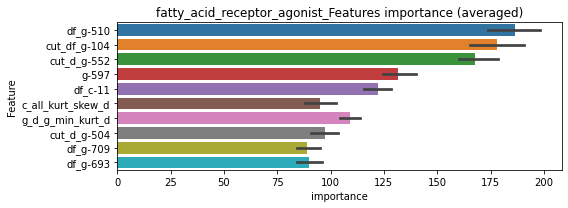

len(train_index) : 2854
len(valid_index) : 952
================================= fold 1/4 fatty_acid_receptor_agonist=================================


Training until validation scores don't improve for 30 rounds


len(train_index) : 2854
len(valid_index) : 952
================================= fold 2/4 fatty_acid_receptor_agonist=================================


Early stopping, best iteration is:
[495]	training's binary_logloss: 0.000465835	valid_1's binary_logloss: 0.00587264
Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.000330682	valid_1's binary_logloss: 0.000853926
Early stopping, best iteration is:
[1006]	training's binary_logloss: 0.000330682	valid_1's binary_logloss: 0.000853926


len(train_index) : 2855
len(valid_index) : 951
================================= fold 3/4 fatty_acid_receptor_agonist=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[816]	training's binary_logloss: 0.000347968	valid_1's binary_logloss: 0.00215041


len(train_index) : 2855
len(valid_index) : 951
================================= fold 4/4 fatty_acid_receptor_agonist=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[738]	training's binary_logloss: 0.000358985	valid_1's binary_logloss: 0.00338245


fatty_acid_receptor_agonist logloss: 0.0030650135243571464


neg labels: 3289 → selected neg labels: 3284


fgfr_inhibitor, len(trt): 50, len(othr): 3284
target_rate: 0.0020996 → Adj_target_rate: 0.0023352
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00375831	valid_1's binary_logloss: 0.019139
[600]	training's binary_logloss: 0.000633533	valid_1's binary_logloss: 0.00993839
Early stopping, best iteration is:
[636]	training's binary_logloss: 0.000581946	valid_1's binary_logloss: 0.00974894
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00374392	valid_1's binary_logloss: 0.0129884
[600]	training's binary_logloss: 0.000638285	valid_1's binary_logloss: 0.00505051
Early stopping, best iteration is:
[730]	training's binary_logloss: 0.000515385	valid_1's binary_logloss: 0.0046689
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0039682	valid_1's binary_logloss: 0.00984663
[600]	training's binary_logloss: 0.000671161	valid_1's binary_logloss: 0.00321359
Early stopping, best iteration is:
[749]	training's binary_logloss: 0.000515067	valid_1's binary_lo

1 / 3 AUC score:1.000
y_Threshold: 0.0047632, Threshold: 0.0187168, pos_neg_ratio: 0.8000000
Remove_noisy_data: 134 → Positive_corect_labels: 655/3806
p_label_rate: 0.0100452 Vs.target_rate: 0.00210
Num_p_label: 40.0, conf_0:0.01310, conf_1:0.02433
Num_p_label: 40.0, Expected: 8.4, Adj_threshold_1: 0.0187168
Num_p_label: 15.0, Expected: 8.4, Adj_threshold_2: 0.0587168
threshold: 0.0587168, positive_p_label: 15.0/3982, p_label_rate: 0.0037670
positive_y_label: 655.0/3806, y_label_rate: 0.1720967
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00332535	valid_1's binary_logloss: 0.0161361
[600]	training's binary_logloss: 0.000612652	valid_1's binary_logloss: 0.0106269
Early stopping, best iteration is:
[682]	training's binary_logloss: 0.000520428	valid_1's binary_logloss: 0.010391
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00322385	valid_1's binary_logloss: 0.0153017
[600]	training's binary_logloss: 0.000603954	valid_1's binary_logloss: 0.00799619
Early stopping, best iteration is:
[701]	training's binary_logloss: 0.000505775	valid_1's binary_logloss: 0.00761235
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00338172	valid_1's binary_logloss: 0.0112402
[600]	training's binary_logloss: 0.000620303	valid_1's binary_logloss: 0.00396148
Early stopping, best iteration is:
[762]	training's binary_logloss: 0.000497946	valid_1's binary_log

2 / 3 AUC score:1.000
y_Threshold: 0.0305138, Threshold: 0.0587168, pos_neg_ratio: 0.8000000
Remove_noisy_data: 2 → Positive_corect_labels: 654.0/3804
p_label_rate: 0.0050226 Vs.target_rate: 0.00210
Num_p_label: 20.0, conf_0:0.04697, conf_1:0.07046
Num_p_label: 20.0, Expected: 8.4, Adj_threshold_1: 0.0587168
threshold: 0.0587168, positive_p_label: 20.0/3982, p_label_rate: 0.0050226
positive_y_label: 654.0/3804, y_label_rate: 0.1719243
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0034353	valid_1's binary_logloss: 0.0185042
[600]	training's binary_logloss: 0.000608147	valid_1's binary_logloss: 0.0120891
Early stopping, best iteration is:
[630]	training's binary_logloss: 0.000567591	valid_1's binary_logloss: 0.012008
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00329686	valid_1's binary_logloss: 0.012557
[600]	training's binary_logloss: 0.000609051	valid_1's binary_logloss: 0.00539273
Early stopping, best iteration is:
[699]	training's binary_logloss: 0.000510329	valid_1's binary_logloss: 0.00501394
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00319852	valid_1's binary_logloss: 0.0188059
[600]	training's binary_logloss: 0.000601861	valid_1's binary_logloss: 0.013338
Early stopping, best iteration is:
[678]	training's binary_logloss: 0.00051848	valid_1's binary_logloss:

3 / 3 AUC score:1.000
y_Threshold: 0.0316889, Threshold: 0.0587168, pos_neg_ratio: 0.8000000
Remove_noisy_data: 0 → Positive_corect_labels: 654.0/3804
p_label_rate: 0.0060271 Vs.target_rate: 0.00210
Num_p_label: 24.0, conf_0:0.05285, conf_1:0.06459
Num_p_label: 24.0, Expected: 8.4, Adj_threshold_1: 0.0587168
Num_p_label: 16.0, Expected: 8.4, Adj_threshold_2: 0.0987168
threshold: 0.0987168, positive_p_label: 16.0/3982, p_label_rate: 0.0040181
positive_y_label: 654.0/3804, y_label_rate: 0.1719243


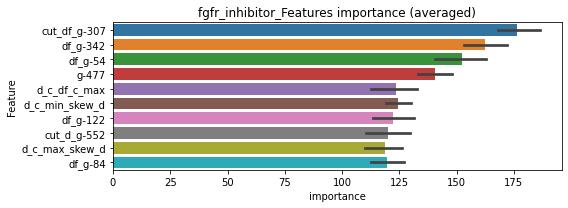

len(train_index) : 2853
len(valid_index) : 951
================================= fold 1/4 fgfr_inhibitor=================================


Training until validation scores don't improve for 30 rounds


len(train_index) : 2853
len(valid_index) : 951
================================= fold 2/4 fgfr_inhibitor=================================


Early stopping, best iteration is:
[548]	training's binary_logloss: 0.0007499	valid_1's binary_logloss: 0.0142656
Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.00050059	valid_1's binary_logloss: 0.00466951
Early stopping, best iteration is:
[1003]	training's binary_logloss: 0.00050059	valid_1's binary_logloss: 0.00466951


len(train_index) : 2853
len(valid_index) : 951
================================= fold 3/4 fgfr_inhibitor=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[734]	training's binary_logloss: 0.000588672	valid_1's binary_logloss: 0.0123353


len(train_index) : 2853
len(valid_index) : 951
================================= fold 4/4 fgfr_inhibitor=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[736]	training's binary_logloss: 0.000592344	valid_1's binary_logloss: 0.00855884


fgfr_inhibitor logloss: 0.009957311305136494


neg labels: 3289 → selected neg labels: 3258


flt3_inhibitor, len(trt): 279, len(othr): 3258
target_rate: 0.0117158 → Adj_target_rate: 0.0100684
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0324144	valid_1's binary_logloss: 0.258663
Early stopping, best iteration is:
[294]	training's binary_logloss: 0.0337525	valid_1's binary_logloss: 0.257667
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0332473	valid_1's binary_logloss: 0.245047
Early stopping, best iteration is:
[349]	training's binary_logloss: 0.023405	valid_1's binary_logloss: 0.243192
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0359459	valid_1's binary_logloss: 0.248988
Early stopping, best iteration is:
[325]	training's binary_logloss: 0.0301505	valid_1's binary_logloss: 0.248314
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0380303	valid_1's binary_logloss: 0.214574


1 / 3 AUC score:0.898
y_Threshold: 0.0797903, Threshold: 0.6832410, pos_neg_ratio: 0.8000000
Remove_noisy_data: 417 → Positive_corect_labels: 508/3492
p_label_rate: 0.0100452 Vs.target_rate: 0.01172
Num_p_label: 40.0, conf_0:0.47827, conf_1:0.80000


Early stopping, best iteration is:
[380]	training's binary_logloss: 0.0219715	valid_1's binary_logloss: 0.207747


threshold: 0.6832410, positive_p_label: 40.0/3982, p_label_rate: 0.0100452
positive_y_label: 508.0/3492, y_label_rate: 0.1454754
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0156877	valid_1's binary_logloss: 0.148682
Early stopping, best iteration is:
[407]	training's binary_logloss: 0.00666116	valid_1's binary_logloss: 0.140778
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0165245	valid_1's binary_logloss: 0.148095
Early stopping, best iteration is:
[403]	training's binary_logloss: 0.00733543	valid_1's binary_logloss: 0.13988
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0155493	valid_1's binary_logloss: 0.147049
Early stopping, best iteration is:
[351]	training's binary_logloss: 0.0101563	valid_1's binary_logloss: 0.141482
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0153304	valid_1's binary_logloss: 0.126534
Early stopping, best iteration is:
[546]	training's binary_logloss: 0.00293777	valid_1's binary_logloss:

2 / 3 AUC score:0.984
y_Threshold: 0.0688935, Threshold: 0.6832410, pos_neg_ratio: 0.8000000
Remove_noisy_data: 110 → Positive_corect_labels: 453.0/3382
p_label_rate: 0.0135610 Vs.target_rate: 0.01172
Num_p_label: 54.0, conf_0:0.50000, conf_1:0.80000
threshold: 0.6832410, positive_p_label: 54.0/3982, p_label_rate: 0.0135610
positive_y_label: 453.0/3382, y_label_rate: 0.1339444
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0100944	valid_1's binary_logloss: 0.106045
Early stopping, best iteration is:
[565]	training's binary_logloss: 0.00187773	valid_1's binary_logloss: 0.0883425
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0117452	valid_1's binary_logloss: 0.0893711
[600]	training's binary_logloss: 0.00183453	valid_1's binary_logloss: 0.0734961
Early stopping, best iteration is:
[655]	training's binary_logloss: 0.00151694	valid_1's binary_logloss: 0.0728284
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0114657	valid_1's binary_logloss: 0.104888
Early stopping, best iteration is:
[493]	training's binary_logloss: 0.00287536	valid_1's binary_logloss: 0.0941699
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0114071	valid_1's binary_logloss: 0.11547


3 / 3 AUC score:0.996
y_Threshold: 0.0491204, Threshold: 0.6832410, pos_neg_ratio: 0.8000000


Early stopping, best iteration is:
[470]	training's binary_logloss: 0.00320132	valid_1's binary_logloss: 0.102807


Remove_noisy_data: 44 → Positive_corect_labels: 431.0/3338
p_label_rate: 0.0170768 Vs.target_rate: 0.01172
Num_p_label: 68.0, conf_0:0.50000, conf_1:0.75157
threshold: 0.6832410, positive_p_label: 68.0/3982, p_label_rate: 0.0170768
positive_y_label: 431.0/3338, y_label_rate: 0.1291192


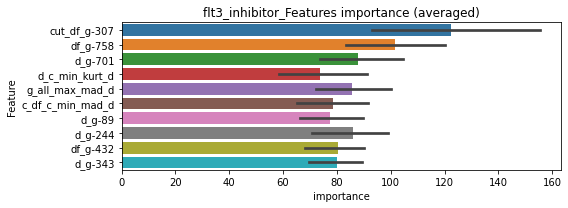

len(train_index) : 2503
len(valid_index) : 835
================================= fold 1/4 flt3_inhibitor=================================


Training until validation scores don't improve for 30 rounds


len(train_index) : 2503
len(valid_index) : 835
================================= fold 2/4 flt3_inhibitor=================================


Early stopping, best iteration is:
[221]	training's binary_logloss: 0.00500665	valid_1's binary_logloss: 0.105408
Training until validation scores don't improve for 30 rounds


len(train_index) : 2504
len(valid_index) : 834
================================= fold 3/4 flt3_inhibitor=================================


Early stopping, best iteration is:
[314]	training's binary_logloss: 0.00309424	valid_1's binary_logloss: 0.100447
Training until validation scores don't improve for 30 rounds


len(train_index) : 2504
len(valid_index) : 834
================================= fold 4/4 flt3_inhibitor=================================


Early stopping, best iteration is:
[274]	training's binary_logloss: 0.00373758	valid_1's binary_logloss: 0.117666
Training until validation scores don't improve for 30 rounds


flt3_inhibitor logloss: 0.10645186370759514
flt3_inhibitor clipping


Early stopping, best iteration is:
[291]	training's binary_logloss: 0.00337325	valid_1's binary_logloss: 0.102295
neg labels: 3289 → selected neg labels: 3289


focal_adhesion_kinase_inhibitor, len(trt): 18, len(othr): 3289
target_rate: 0.0007559 → Adj_target_rate: 0.0009799
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.000928071	valid_1's binary_logloss: 0.0023128
[600]	training's binary_logloss: 0.000285709	valid_1's binary_logloss: 0.00103451
Early stopping, best iteration is:
[611]	training's binary_logloss: 0.000284745	valid_1's binary_logloss: 0.0010323
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.000923135	valid_1's binary_logloss: 0.0032336
Early stopping, best iteration is:
[568]	training's binary_logloss: 0.000290895	valid_1's binary_logloss: 0.00155732
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.000942065	valid_1's binary_logloss: 0.00214011
[600]	training's binary_logloss: 0.00028847	valid_1's binary_logloss: 0.00106685
Early stopping, best iteration is:
[619]	training's binary_logloss: 0.000286811	valid_1's binary_logloss: 0.00106025
Training until validation scores don't improve for 30 rounds

1 / 3 AUC score:1.000
y_Threshold: 0.0013066, Threshold: 0.0055881, pos_neg_ratio: 0.8000000
Remove_noisy_data: 133 → Positive_corect_labels: 657/3813
p_label_rate: 0.0100452 Vs.target_rate: 0.00076
Num_p_label: 40.0, conf_0:0.00391, conf_1:0.00726
Num_p_label: 40.0, Expected: 3.0, Adj_threshold_1: 0.0055881
Num_p_label: 1.0, Expected: 3.0, Adj_threshold_2: 0.0455881
threshold: 0.0455881, positive_p_label: 1.0/3982, p_label_rate: 0.0002511
positive_y_label: 657.0/3813, y_label_rate: 0.1723053
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.000860294	valid_1's binary_logloss: 0.00193528
[600]	training's binary_logloss: 0.000279001	valid_1's binary_logloss: 0.000893245
Early stopping, best iteration is:
[578]	training's binary_logloss: 0.000281717	valid_1's binary_logloss: 0.00089227
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.000864025	valid_1's binary_logloss: 0.00255589
[600]	training's binary_logloss: 0.000277576	valid_1's binary_logloss: 0.00126716
Early stopping, best iteration is:
[618]	training's binary_logloss: 0.000274952	valid_1's binary_logloss: 0.00125307
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.000876281	valid_1's binary_logloss: 0.00158739
[600]	training's binary_logloss: 0.00028332	valid_1's binary_logloss: 0.000636753
Early stopping, best iteration is:
[594]	training's binary_logloss: 0.00028332	valid_1's b

2 / 3 AUC score:1.000


Early stopping, best iteration is:
[618]	training's binary_logloss: 0.000274478	valid_1's binary_logloss: 0.00112614


y_Threshold: 0.0982435, Threshold: 0.0455881, pos_neg_ratio: 0.8000000
Remove_noisy_data: 0 → Positive_corect_labels: 657.0/3813
p_label_rate: 0.0020090 Vs.target_rate: 0.00076
Num_p_label: 8.0, conf_0:0.03647, conf_1:0.05471
Num_p_label: 8.0, Expected: 3.0, Adj_threshold_1: 0.0455881
Num_p_label: 6.0, Expected: 3.0, Adj_threshold_2: 0.0855881
threshold: 0.0855881, positive_p_label: 6.0/3982, p_label_rate: 0.0015068
positive_y_label: 657.0/3813, y_label_rate: 0.1723053
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.000860294	valid_1's binary_logloss: 0.00193528
[600]	training's binary_logloss: 0.000279001	valid_1's binary_logloss: 0.000893245
Early stopping, best iteration is:
[578]	training's binary_logloss: 0.000281717	valid_1's binary_logloss: 0.00089227
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.000864025	valid_1's binary_logloss: 0.00255589
[600]	training's binary_logloss: 0.000277576	valid_1's binary_logloss: 0.00126716
Early stopping, best iteration is:
[618]	training's binary_logloss: 0.000274952	valid_1's binary_logloss: 0.00125307
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.000876281	valid_1's binary_logloss: 0.00158739
[600]	training's binary_logloss: 0.00028332	valid_1's binary_logloss: 0.000636753
Early stopping, best iteration is:
[594]	training's binary_logloss: 0.00028332	valid_1's b

3 / 3 AUC score:1.000
y_Threshold: 0.0982435, Threshold: 0.0855881, pos_neg_ratio: 0.8000000
Remove_noisy_data: 0 → Positive_corect_labels: 657.0/3813
p_label_rate: 0.0015068 Vs.target_rate: 0.00076
Num_p_label: 6.0, conf_0:0.07703, conf_1:0.09415
Num_p_label: 6.0, Expected: 3.0, Adj_threshold_1: 0.0855881
threshold: 0.0855881, positive_p_label: 6.0/3982, p_label_rate: 0.0015068
positive_y_label: 657.0/3813, y_label_rate: 0.1723053


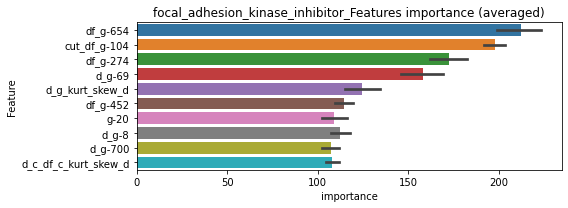

len(train_index) : 2859
len(valid_index) : 954
================================= fold 1/4 focal_adhesion_kinase_inhibitor=================================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.000280817	valid_1's binary_logloss: 0.000885002
Early stopping, best iteration is:
[1168]	training's binary_logloss: 0.000273768	valid_1's binary_logloss: 0.000871154


len(train_index) : 2860
len(valid_index) : 953
================================= fold 2/4 focal_adhesion_kinase_inhibitor=================================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.000280396	valid_1's binary_logloss: 0.00107332
Early stopping, best iteration is:
[1040]	training's binary_logloss: 0.000278636	valid_1's binary_logloss: 0.00106935


len(train_index) : 2860
len(valid_index) : 953
================================= fold 3/4 focal_adhesion_kinase_inhibitor=================================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.000282196	valid_1's binary_logloss: 0.000716638
Early stopping, best iteration is:
[1074]	training's binary_logloss: 0.000278675	valid_1's binary_logloss: 0.000711176


len(train_index) : 2860
len(valid_index) : 953
================================= fold 4/4 focal_adhesion_kinase_inhibitor=================================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.000280701	valid_1's binary_logloss: 0.000600621
Early stopping, best iteration is:
[1042]	training's binary_logloss: 0.00027871	valid_1's binary_logloss: 0.000597862


focal_adhesion_kinase_inhibitor logloss: 0.0008124641417928578


neg labels: 3289 → selected neg labels: 3288


free_radical_scavenger, len(trt): 18, len(othr): 3288
target_rate: 0.0007559 → Adj_target_rate: 0.0009799
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.000966969	valid_1's binary_logloss: 0.00246148
[600]	training's binary_logloss: 0.000294461	valid_1's binary_logloss: 0.0011239
Early stopping, best iteration is:
[586]	training's binary_logloss: 0.000294489	valid_1's binary_logloss: 0.00112381
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00097718	valid_1's binary_logloss: 0.00306131
[600]	training's binary_logloss: 0.000296033	valid_1's binary_logloss: 0.00144358
Early stopping, best iteration is:
[591]	training's binary_logloss: 0.000296033	valid_1's binary_logloss: 0.00144358
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00095014	valid_1's binary_logloss: 0.00182274
[600]	training's binary_logloss: 0.000297049	valid_1's binary_logloss: 0.000724405
Early stopping, best iteration is:
[579]	training's binary_logloss: 0.000297049	valid_1's bin

1 / 3 AUC score:1.000
y_Threshold: 0.0014272, Threshold: 0.0057081, pos_neg_ratio: 0.8000000
Remove_noisy_data: 132 → Positive_corect_labels: 657/3813
p_label_rate: 0.0100452 Vs.target_rate: 0.00076
Num_p_label: 40.0, conf_0:0.00400, conf_1:0.00742
Num_p_label: 40.0, Expected: 3.0, Adj_threshold_1: 0.0057081
Num_p_label: 0.0, Expected: 3.0, Adj_threshold_2: 0.0457081


Early stopping, best iteration is:
[539]	training's binary_logloss: 0.000303386	valid_1's binary_logloss: 0.00323513


threshold: 0.0457081, positive_p_label: 0.0/3982, p_label_rate: 0.0000000
positive_y_label: 657.0/3813, y_label_rate: 0.1723053
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.000914195	valid_1's binary_logloss: 0.00245758
Early stopping, best iteration is:
[567]	training's binary_logloss: 0.00028692	valid_1's binary_logloss: 0.00120133
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.000907842	valid_1's binary_logloss: 0.00203674
[600]	training's binary_logloss: 0.000281828	valid_1's binary_logloss: 0.00085273
Early stopping, best iteration is:
[581]	training's binary_logloss: 0.000281836	valid_1's binary_logloss: 0.000852676
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.000909319	valid_1's binary_logloss: 0.00149468
[600]	training's binary_logloss: 0.000286779	valid_1's binary_logloss: 0.000571351
Early stopping, best iteration is:
[583]	training's binary_logloss: 0.000286779	valid_1's binary_logloss: 0.000571351
Training until validation scores don't improve for 30 

2 / 3 AUC score:1.000
y_Threshold: 0.0207973, Threshold: 0.0457081, pos_neg_ratio: 0.8000000
Remove_noisy_data: 0 → Positive_corect_labels: 657.0/3813
p_label_rate: 0.0017579 Vs.target_rate: 0.00076
Num_p_label: 7.0, conf_0:0.03657, conf_1:0.05485
Num_p_label: 7.0, Expected: 3.0, Adj_threshold_1: 0.0457081


Early stopping, best iteration is:
[456]	training's binary_logloss: 0.00034901	valid_1's binary_logloss: 0.00309758


threshold: 0.0457081, positive_p_label: 7.0/3982, p_label_rate: 0.0017579
positive_y_label: 657.0/3813, y_label_rate: 0.1723053
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.000914195	valid_1's binary_logloss: 0.00245758
Early stopping, best iteration is:
[567]	training's binary_logloss: 0.00028692	valid_1's binary_logloss: 0.00120133
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.000907842	valid_1's binary_logloss: 0.00203674
[600]	training's binary_logloss: 0.000281828	valid_1's binary_logloss: 0.00085273
Early stopping, best iteration is:
[580]	training's binary_logloss: 0.000281836	valid_1's binary_logloss: 0.000852676
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.000909319	valid_1's binary_logloss: 0.00149468
[600]	training's binary_logloss: 0.000286779	valid_1's binary_logloss: 0.000571351
Early stopping, best iteration is:
[583]	training's binary_logloss: 0.000286779	valid_1's binary_logloss: 0.000571351
Training until validation scores don't improve for 30 

3 / 3 AUC score:1.000
y_Threshold: 0.0207973, Threshold: 0.0457081, pos_neg_ratio: 0.8000000
Remove_noisy_data: 0 → Positive_corect_labels: 657.0/3813
p_label_rate: 0.0017579 Vs.target_rate: 0.00076
Num_p_label: 7.0, conf_0:0.04114, conf_1:0.05028
Num_p_label: 7.0, Expected: 3.0, Adj_threshold_1: 0.0457081
threshold: 0.0457081, positive_p_label: 7.0/3982, p_label_rate: 0.0017579


Early stopping, best iteration is:
[456]	training's binary_logloss: 0.00034901	valid_1's binary_logloss: 0.00309758


positive_y_label: 657.0/3813, y_label_rate: 0.1723053


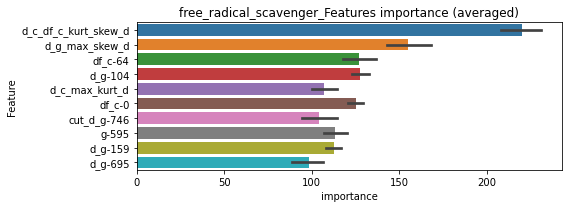

len(train_index) : 2859
len(valid_index) : 954
================================= fold 1/4 free_radical_scavenger=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[965]	training's binary_logloss: 0.000286887	valid_1's binary_logloss: 0.000967905


len(train_index) : 2860
len(valid_index) : 953
================================= fold 2/4 free_radical_scavenger=================================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.000284887	valid_1's binary_logloss: 0.000699139
Early stopping, best iteration is:
[984]	training's binary_logloss: 0.000284887	valid_1's binary_logloss: 0.000699139


len(train_index) : 2860
len(valid_index) : 953
================================= fold 3/4 free_radical_scavenger=================================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.000283628	valid_1's binary_logloss: 0.000573472
Early stopping, best iteration is:
[999]	training's binary_logloss: 0.000283628	valid_1's binary_logloss: 0.000573472


len(train_index) : 2860
len(valid_index) : 953
================================= fold 4/4 free_radical_scavenger=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[773]	training's binary_logloss: 0.000304107	valid_1's binary_logloss: 0.00195771


free_radical_scavenger logloss: 0.0010495621155687093


neg labels: 3289 → selected neg labels: 3287


fungal_squalene_epoxidase_inhibitor, len(trt): 23, len(othr): 3287
target_rate: 0.0009658 → Adj_target_rate: 0.0012069
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00133451	valid_1's binary_logloss: 0.00388872
Early stopping, best iteration is:
[560]	training's binary_logloss: 0.000365218	valid_1's binary_logloss: 0.00195347
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00120819	valid_1's binary_logloss: 0.0113761
Early stopping, best iteration is:
[557]	training's binary_logloss: 0.000351116	valid_1's binary_logloss: 0.00839515
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00134617	valid_1's binary_logloss: 0.00302217
Early stopping, best iteration is:
[569]	training's binary_logloss: 0.000358428	valid_1's binary_logloss: 0.0013108
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00129434	valid_1's binary_logloss: 0.00408576
[600]	training's binary_logloss: 0.00035171	valid_1's binary_logloss: 0.00193385
Ea

1 / 3 AUC score:1.000
y_Threshold: 0.0021044, Threshold: 0.0067214, pos_neg_ratio: 0.8000000
Remove_noisy_data: 132 → Positive_corect_labels: 657/3812
p_label_rate: 0.0100452 Vs.target_rate: 0.00097
Num_p_label: 40.0, conf_0:0.00470, conf_1:0.00874
Num_p_label: 40.0, Expected: 3.8, Adj_threshold_1: 0.0067214
Num_p_label: 0.0, Expected: 3.8, Adj_threshold_2: 0.0467214
threshold: 0.0467214, positive_p_label: 0.0/3982, p_label_rate: 0.0000000
positive_y_label: 657.0/3812, y_label_rate: 0.1723505
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00123838	valid_1's binary_logloss: 0.0030668
[600]	training's binary_logloss: 0.00034549	valid_1's binary_logloss: 0.00133248
Early stopping, best iteration is:
[592]	training's binary_logloss: 0.00034549	valid_1's binary_logloss: 0.00133248
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00118803	valid_1's binary_logloss: 0.00938567
Early stopping, best iteration is:
[556]	training's binary_logloss: 0.000349238	valid_1's binary_logloss: 0.00685557
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00126452	valid_1's binary_logloss: 0.00251321
[600]	training's binary_logloss: 0.000343014	valid_1's binary_logloss: 0.000897267
Early stopping, best iteration is:
[593]	training's binary_logloss: 0.000343014	valid_1's binary_logloss: 0.000897267
Training until validation scores don't improve for 30 rounds

2 / 3 AUC score:1.000
y_Threshold: 0.0294087, Threshold: 0.0467214, pos_neg_ratio: 0.8000000
Remove_noisy_data: 0 → Positive_corect_labels: 657.0/3812
p_label_rate: 0.0027624 Vs.target_rate: 0.00097
Num_p_label: 11.0, conf_0:0.03738, conf_1:0.05607
Num_p_label: 11.0, Expected: 3.8, Adj_threshold_1: 0.0467214
Num_p_label: 2.0, Expected: 3.8, Adj_threshold_2: 0.0867214
threshold: 0.0867214, positive_p_label: 2.0/3982, p_label_rate: 0.0005023
positive_y_label: 657.0/3812, y_label_rate: 0.1723505
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00123838	valid_1's binary_logloss: 0.0030668
[600]	training's binary_logloss: 0.00034549	valid_1's binary_logloss: 0.00133248
Early stopping, best iteration is:
[592]	training's binary_logloss: 0.00034549	valid_1's binary_logloss: 0.00133248
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00118803	valid_1's binary_logloss: 0.00938567
Early stopping, best iteration is:
[556]	training's binary_logloss: 0.000349238	valid_1's binary_logloss: 0.00685557
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00126452	valid_1's binary_logloss: 0.00251321
[600]	training's binary_logloss: 0.000343014	valid_1's binary_logloss: 0.000897267
Early stopping, best iteration is:
[593]	training's binary_logloss: 0.000343014	valid_1's binary_logloss: 0.000897267
Training until validation scores don't improve for 30 rounds

3 / 3 AUC score:1.000
y_Threshold: 0.0294087, Threshold: 0.0867214, pos_neg_ratio: 0.8000000
Remove_noisy_data: 0 → Positive_corect_labels: 657.0/3812
p_label_rate: 0.0005023 Vs.target_rate: 0.00097
Num_p_label: 2.0, conf_0:0.07805, conf_1:0.09539
Num_p_label: 2.0, Expected: 3.8, Adj_threshold_1: 0.0867214
threshold: 0.0867214, positive_p_label: 2.0/3982, p_label_rate: 0.0005023
positive_y_label: 657.0/3812, y_label_rate: 0.1723505


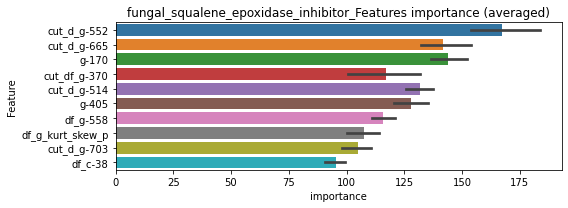

len(train_index) : 2859
len(valid_index) : 953
================================= fold 1/4 fungal_squalene_epoxidase_inhibitor=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[803]	training's binary_logloss: 0.000357837	valid_1's binary_logloss: 0.00129834


len(train_index) : 2859
len(valid_index) : 953
================================= fold 2/4 fungal_squalene_epoxidase_inhibitor=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[807]	training's binary_logloss: 0.000355636	valid_1's binary_logloss: 0.00671396


len(train_index) : 2859
len(valid_index) : 953
================================= fold 3/4 fungal_squalene_epoxidase_inhibitor=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[854]	training's binary_logloss: 0.000355323	valid_1's binary_logloss: 0.000831699


len(train_index) : 2859
len(valid_index) : 953
================================= fold 4/4 fungal_squalene_epoxidase_inhibitor=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[816]	training's binary_logloss: 0.000357395	valid_1's binary_logloss: 0.00142233


fungal_squalene_epoxidase_inhibitor logloss: 0.0025665811452225467


neg labels: 3289 → selected neg labels: 3271


gaba_receptor_agonist, len(trt): 106, len(othr): 3271
target_rate: 0.0044512 → Adj_target_rate: 0.0044229
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00734264	valid_1's binary_logloss: 0.088313
Early stopping, best iteration is:
[522]	training's binary_logloss: 0.00158696	valid_1's binary_logloss: 0.0776701
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00783615	valid_1's binary_logloss: 0.0550244
[600]	training's binary_logloss: 0.00124417	valid_1's binary_logloss: 0.0437466
Early stopping, best iteration is:
[620]	training's binary_logloss: 0.00116605	valid_1's binary_logloss: 0.0436964
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00814841	valid_1's binary_logloss: 0.0429997
[600]	training's binary_logloss: 0.00127442	valid_1's binary_logloss: 0.028642
Early stopping, best iteration is:
[718]	training's binary_logloss: 0.000925331	valid_1's binary_logloss: 0.0273266
Training until validation scores don't improve for 30 rounds
[300]	traini

1 / 3 AUC score:0.998


Early stopping, best iteration is:
[485]	training's binary_logloss: 0.00198788	valid_1's binary_logloss: 0.0551414


y_Threshold: 0.0130950, Threshold: 0.1097559, pos_neg_ratio: 0.8000000
Remove_noisy_data: 149 → Positive_corect_labels: 645/3776
p_label_rate: 0.0100452 Vs.target_rate: 0.00445
Num_p_label: 40.0, conf_0:0.07683, conf_1:0.14268
Num_p_label: 40.0, Expected: 17.7, Adj_threshold_1: 0.1097559
Num_p_label: 26.0, Expected: 17.7, Adj_threshold_2: 0.1497559
threshold: 0.1497559, positive_p_label: 26.0/3982, p_label_rate: 0.0065294
positive_y_label: 645.0/3776, y_label_rate: 0.1708157
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0065153	valid_1's binary_logloss: 0.0631977
[600]	training's binary_logloss: 0.00108688	valid_1's binary_logloss: 0.0504813
Early stopping, best iteration is:
[606]	training's binary_logloss: 0.00106755	valid_1's binary_logloss: 0.050351
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00637018	valid_1's binary_logloss: 0.0610051
Early stopping, best iteration is:
[559]	training's binary_logloss: 0.00123984	valid_1's binary_logloss: 0.0542003
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00667156	valid_1's binary_logloss: 0.045332
[600]	training's binary_logloss: 0.00111843	valid_1's binary_logloss: 0.0330299
Early stopping, best iteration is:
[783]	training's binary_logloss: 0.000744323	valid_1's binary_logloss: 0.0319951
Training until validation scores don't improve for 30 rounds
[300]	trainin

2 / 3 AUC score:0.999
y_Threshold: 0.0432460, Threshold: 0.1497559, pos_neg_ratio: 0.8000000
Remove_noisy_data: 20 → Positive_corect_labels: 635.0/3756
p_label_rate: 0.0173280 Vs.target_rate: 0.00445
Num_p_label: 69.0, conf_0:0.11980, conf_1:0.17971
Num_p_label: 69.0, Expected: 17.7, Adj_threshold_1: 0.1497559
Num_p_label: 55.0, Expected: 17.7, Adj_threshold_2: 0.1897559
Num_p_label: 50.0, Expected: 17.7, Adj_threshold_3: 0.2297559
Num_p_label: 45.0, Expected: 17.7, Adj_threshold_4: 0.2697559
Num_p_label: 41.0, Expected: 17.7, Adj_threshold_5: 0.3097559
Num_p_label: 38.0, Expected: 17.7, Adj_threshold_6: 0.3497559
Num_p_label: 34.0, Expected: 17.7, Adj_threshold_7: 0.3897559
Num_p_label: 30.0, Expected: 17.7, Adj_threshold_8: 0.4297559
Num_p_label: 28.0, Expected: 17.7, Adj_threshold_9: 0.4697559
Num_p_label: 23.0, Expected: 17.7, Adj_threshold_10: 0.5097559
threshold: 0.5097559, positive_p_label: 23.0/3982, p_label_rate: 0.0057760
positive_y_label: 635.0/3756, y_label_rate: 0.1690628


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0062135	valid_1's binary_logloss: 0.065046
Early stopping, best iteration is:
[501]	training's binary_logloss: 0.00151527	valid_1's binary_logloss: 0.0582811
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00598123	valid_1's binary_logloss: 0.0433604
[600]	training's binary_logloss: 0.00105482	valid_1's binary_logloss: 0.0327213
Early stopping, best iteration is:
[784]	training's binary_logloss: 0.000706581	valid_1's binary_logloss: 0.0317264
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00611472	valid_1's binary_logloss: 0.0430417
[600]	training's binary_logloss: 0.00105278	valid_1's binary_logloss: 0.0335225
Early stopping, best iteration is:
[718]	training's binary_logloss: 0.0007829	valid_1's binary_logloss: 0.0326752
Training until validation scores don't improve for 30 rounds
[300]	trainin

3 / 3 AUC score:0.999
y_Threshold: 0.0314922, Threshold: 0.5097559, pos_neg_ratio: 0.8000000
Remove_noisy_data: 18 → Positive_corect_labels: 626.0/3738
p_label_rate: 0.0077850 Vs.target_rate: 0.00445
Num_p_label: 31.0, conf_0:0.45878, conf_1:0.56073
Num_p_label: 31.0, Expected: 17.7, Adj_threshold_1: 0.5097559
Num_p_label: 30.0, Expected: 17.7, Adj_threshold_2: 0.5497559
Num_p_label: 27.0, Expected: 17.7, Adj_threshold_3: 0.5897559
Num_p_label: 22.0, Expected: 17.7, Adj_threshold_4: 0.6297559
threshold: 0.6297559, positive_p_label: 22.0/3982, p_label_rate: 0.0055249
positive_y_label: 626.0/3738, y_label_rate: 0.1674692


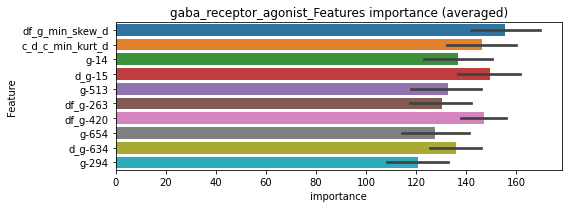

len(train_index) : 2803
len(valid_index) : 935
================================= fold 1/4 gaba_receptor_agonist=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[656]	training's binary_logloss: 0.000915567	valid_1's binary_logloss: 0.0303989


len(train_index) : 2803
len(valid_index) : 935
================================= fold 2/4 gaba_receptor_agonist=================================


Training until validation scores don't improve for 30 rounds


len(train_index) : 2804
len(valid_index) : 934
================================= fold 3/4 gaba_receptor_agonist=================================


Early stopping, best iteration is:
[449]	training's binary_logloss: 0.0013254	valid_1's binary_logloss: 0.0368417
Training until validation scores don't improve for 30 rounds


len(train_index) : 2804
len(valid_index) : 934
================================= fold 4/4 gaba_receptor_agonist=================================


Early stopping, best iteration is:
[443]	training's binary_logloss: 0.00140915	valid_1's binary_logloss: 0.0300583
Training until validation scores don't improve for 30 rounds


gaba_receptor_agonist logloss: 0.03354144317734164
gaba_receptor_agonist clipping


Early stopping, best iteration is:
[362]	training's binary_logloss: 0.00173069	valid_1's binary_logloss: 0.0368668
neg labels: 3289 → selected neg labels: 3266


gaba_receptor_antagonist, len(trt): 165, len(othr): 3266
target_rate: 0.0069287 → Adj_target_rate: 0.0064426
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0152954	valid_1's binary_logloss: 0.132625
Early stopping, best iteration is:
[508]	training's binary_logloss: 0.00331871	valid_1's binary_logloss: 0.122582
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0150493	valid_1's binary_logloss: 0.123588
Early stopping, best iteration is:
[471]	training's binary_logloss: 0.00409329	valid_1's binary_logloss: 0.117279
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0149274	valid_1's binary_logloss: 0.131332
Early stopping, best iteration is:
[527]	training's binary_logloss: 0.00302715	valid_1's binary_logloss: 0.123942
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0142152	valid_1's binary_logloss: 0.122815


1 / 3 AUC score:0.981
y_Threshold: 0.0263912, Threshold: 0.0941915, pos_neg_ratio: 0.8000000
Remove_noisy_data: 213 → Positive_corect_labels: 612/3706
p_label_rate: 0.0100452 Vs.target_rate: 0.00693
Num_p_label: 40.0, conf_0:0.06593, conf_1:0.12245


Early stopping, best iteration is:
[405]	training's binary_logloss: 0.0060317	valid_1's binary_logloss: 0.118401


threshold: 0.0941915, positive_p_label: 40.0/3982, p_label_rate: 0.0100452
positive_y_label: 612.0/3706, y_label_rate: 0.1651376
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0105828	valid_1's binary_logloss: 0.102649
Early stopping, best iteration is:
[516]	training's binary_logloss: 0.00233784	valid_1's binary_logloss: 0.094221
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0105653	valid_1's binary_logloss: 0.0883877
Early stopping, best iteration is:
[562]	training's binary_logloss: 0.00188824	valid_1's binary_logloss: 0.0784465
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0112582	valid_1's binary_logloss: 0.0876199
[600]	training's binary_logloss: 0.00171471	valid_1's binary_logloss: 0.0778801
Early stopping, best iteration is:
[593]	training's binary_logloss: 0.00175672	valid_1's binary_logloss: 0.0777006
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0106482	valid_1's binary_logloss: 0.118259


2 / 3 AUC score:0.994
y_Threshold: 0.0341262, Threshold: 0.0941915, pos_neg_ratio: 0.8000000


Early stopping, best iteration is:
[469]	training's binary_logloss: 0.0029338	valid_1's binary_logloss: 0.110833


Remove_noisy_data: 58 → Positive_corect_labels: 583.0/3648
p_label_rate: 0.0118031 Vs.target_rate: 0.00693
Num_p_label: 47.0, conf_0:0.07535, conf_1:0.11303
Num_p_label: 47.0, Expected: 27.6, Adj_threshold_1: 0.0941915
Num_p_label: 33.0, Expected: 27.6, Adj_threshold_2: 0.1341915
threshold: 0.1341915, positive_p_label: 33.0/3982, p_label_rate: 0.0082873
positive_y_label: 583.0/3648, y_label_rate: 0.1598136
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00869538	valid_1's binary_logloss: 0.07782
[600]	training's binary_logloss: 0.00142664	valid_1's binary_logloss: 0.0629376
Early stopping, best iteration is:
[690]	training's binary_logloss: 0.00110405	valid_1's binary_logloss: 0.0619656
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0082612	valid_1's binary_logloss: 0.107387
Early stopping, best iteration is:
[425]	training's binary_logloss: 0.00307383	valid_1's binary_logloss: 0.101689
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00954134	valid_1's binary_logloss: 0.0750966
[600]	training's binary_logloss: 0.00151079	valid_1's binary_logloss: 0.0627867
Early stopping, best iteration is:
[747]	training's binary_logloss: 0.00100795	valid_1's binary_logloss: 0.0614276
Training until validation scores don't improve for 30 rounds
[300]	training's

3 / 3 AUC score:0.998
y_Threshold: 0.0395984, Threshold: 0.1341915, pos_neg_ratio: 0.8000000
Remove_noisy_data: 28 → Positive_corect_labels: 569.0/3620
p_label_rate: 0.0090407 Vs.target_rate: 0.00693
Num_p_label: 36.0, conf_0:0.12077, conf_1:0.14761
threshold: 0.1341915, positive_p_label: 36.0/3982, p_label_rate: 0.0090407
positive_y_label: 569.0/3620, y_label_rate: 0.1571823


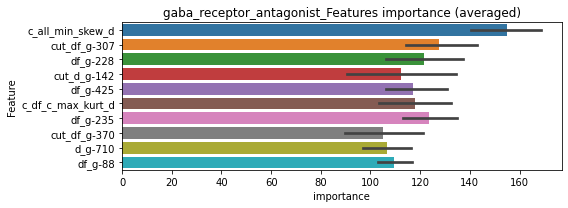

len(train_index) : 2715
len(valid_index) : 905
================================= fold 1/4 gaba_receptor_antagonist=================================


Training until validation scores don't improve for 30 rounds


len(train_index) : 2715
len(valid_index) : 905
================================= fold 2/4 gaba_receptor_antagonist=================================


Early stopping, best iteration is:
[202]	training's binary_logloss: 0.00505114	valid_1's binary_logloss: 0.0914746
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[636]	training's binary_logloss: 0.00117758	valid_1's binary_logloss: 0.0509833


len(train_index) : 2715
len(valid_index) : 905
================================= fold 3/4 gaba_receptor_antagonist=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[516]	training's binary_logloss: 0.0014873	valid_1's binary_logloss: 0.0596393


len(train_index) : 2715
len(valid_index) : 905
================================= fold 4/4 gaba_receptor_antagonist=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[430]	training's binary_logloss: 0.00179602	valid_1's binary_logloss: 0.0570817


gaba_receptor_antagonist logloss: 0.06479474936122509
gaba_receptor_antagonist clipping


neg labels: 3289 → selected neg labels: 3284


gamma_secretase_inhibitor, len(trt): 56, len(othr): 3284
target_rate: 0.0023516 → Adj_target_rate: 0.0025713
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00331091	valid_1's binary_logloss: 0.0354094
[600]	training's binary_logloss: 0.000621781	valid_1's binary_logloss: 0.0288457
Early stopping, best iteration is:
[631]	training's binary_logloss: 0.000578265	valid_1's binary_logloss: 0.0286035
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00374697	valid_1's binary_logloss: 0.0204109
[600]	training's binary_logloss: 0.000654296	valid_1's binary_logloss: 0.0132381
Early stopping, best iteration is:
[733]	training's binary_logloss: 0.000529132	valid_1's binary_logloss: 0.0128498
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00365783	valid_1's binary_logloss: 0.0124678
[600]	training's binary_logloss: 0.000671188	valid_1's binary_logloss: 0.00662901
Early stopping, best iteration is:
[635]	training's binary_logloss: 0.000618081	valid_1's binary_logl

1 / 3 AUC score:1.000
y_Threshold: 0.0050815, Threshold: 0.0158708, pos_neg_ratio: 0.8000000


Early stopping, best iteration is:
[502]	training's binary_logloss: 0.000879422	valid_1's binary_logloss: 0.0232466


Remove_noisy_data: 132 → Positive_corect_labels: 656/3808
p_label_rate: 0.0100452 Vs.target_rate: 0.00235
Num_p_label: 40.0, conf_0:0.01111, conf_1:0.02063
Num_p_label: 40.0, Expected: 9.4, Adj_threshold_1: 0.0158708
Num_p_label: 2.0, Expected: 9.4, Adj_threshold_2: 0.0558708
threshold: 0.0558708, positive_p_label: 2.0/3982, p_label_rate: 0.0005023
positive_y_label: 656.0/3808, y_label_rate: 0.1722689
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00322766	valid_1's binary_logloss: 0.0321974
[600]	training's binary_logloss: 0.000610456	valid_1's binary_logloss: 0.0256694
Early stopping, best iteration is:
[644]	training's binary_logloss: 0.000553661	valid_1's binary_logloss: 0.025502
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0032279	valid_1's binary_logloss: 0.01987
[600]	training's binary_logloss: 0.000627458	valid_1's binary_logloss: 0.0133045
Early stopping, best iteration is:
[676]	training's binary_logloss: 0.000542501	valid_1's binary_logloss: 0.0130365
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00335036	valid_1's binary_logloss: 0.0114485
[600]	training's binary_logloss: 0.000641346	valid_1's binary_logloss: 0.00571052
Early stopping, best iteration is:
[687]	training's binary_logloss: 0.000545777	valid_1's binary_logloss:

2 / 3 AUC score:1.000
y_Threshold: 0.0292910, Threshold: 0.0558708, pos_neg_ratio: 0.8000000
Remove_noisy_data: 4 → Positive_corect_labels: 654.0/3804
p_label_rate: 0.0042692 Vs.target_rate: 0.00235
Num_p_label: 17.0, conf_0:0.04470, conf_1:0.06704
Num_p_label: 17.0, Expected: 9.4, Adj_threshold_1: 0.0558708
threshold: 0.0558708, positive_p_label: 17.0/3982, p_label_rate: 0.0042692
positive_y_label: 654.0/3804, y_label_rate: 0.1719243
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00308207	valid_1's binary_logloss: 0.0259417
[600]	training's binary_logloss: 0.000599514	valid_1's binary_logloss: 0.0187367
Early stopping, best iteration is:
[686]	training's binary_logloss: 0.000519694	valid_1's binary_logloss: 0.0182489
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0033877	valid_1's binary_logloss: 0.0172719
[600]	training's binary_logloss: 0.000630473	valid_1's binary_logloss: 0.0112093
Early stopping, best iteration is:
[635]	training's binary_logloss: 0.000582968	valid_1's binary_logloss: 0.0110801
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00331039	valid_1's binary_logloss: 0.0130424
[600]	training's binary_logloss: 0.000638392	valid_1's binary_logloss: 0.0073728
Early stopping, best iteration is:
[705]	training's binary_logloss: 0.0005254	valid_1's binary_logloss:

3 / 3 AUC score:1.000
y_Threshold: 0.0239196, Threshold: 0.0558708, pos_neg_ratio: 0.8000000
Remove_noisy_data: 2 → Positive_corect_labels: 653.0/3802
p_label_rate: 0.0040181 Vs.target_rate: 0.00235
Num_p_label: 16.0, conf_0:0.05028, conf_1:0.06146
Num_p_label: 16.0, Expected: 9.4, Adj_threshold_1: 0.0558708
threshold: 0.0558708, positive_p_label: 16.0/3982, p_label_rate: 0.0040181
positive_y_label: 653.0/3802, y_label_rate: 0.1717517


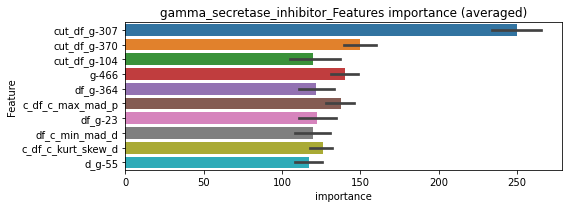

len(train_index) : 2851
len(valid_index) : 951
================================= fold 1/4 gamma_secretase_inhibitor=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[669]	training's binary_logloss: 0.000634877	valid_1's binary_logloss: 0.0202955


len(train_index) : 2851
len(valid_index) : 951
================================= fold 2/4 gamma_secretase_inhibitor=================================


Training until validation scores don't improve for 30 rounds


len(train_index) : 2852
len(valid_index) : 950


Early stopping, best iteration is:
[549]	training's binary_logloss: 0.000759735	valid_1's binary_logloss: 0.0169801


================================= fold 3/4 gamma_secretase_inhibitor=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[961]	training's binary_logloss: 0.000519732	valid_1's binary_logloss: 0.0111107


len(train_index) : 2852
len(valid_index) : 950
================================= fold 4/4 gamma_secretase_inhibitor=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[407]	training's binary_logloss: 0.00102953	valid_1's binary_logloss: 0.0170353


gamma_secretase_inhibitor logloss: 0.016357160991812128


neg labels: 3289 → selected neg labels: 3248


glucocorticoid_receptor_agonist, len(trt): 266, len(othr): 3248
target_rate: 0.0111699 → Adj_target_rate: 0.0096682
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0349253	valid_1's binary_logloss: 0.235758
Early stopping, best iteration is:
[358]	training's binary_logloss: 0.0233191	valid_1's binary_logloss: 0.230825
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0319289	valid_1's binary_logloss: 0.23817
Early stopping, best iteration is:
[320]	training's binary_logloss: 0.0275703	valid_1's binary_logloss: 0.23598
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0369227	valid_1's binary_logloss: 0.202603
Early stopping, best iteration is:
[425]	training's binary_logloss: 0.0157679	valid_1's binary_logloss: 0.191641
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0325701	valid_1's binary_logloss: 0.233592


1 / 3 AUC score:0.918
y_Threshold: 0.0783270, Threshold: 0.3106948, pos_neg_ratio: 0.8000000


Early stopping, best iteration is:
[412]	training's binary_logloss: 0.0148688	valid_1's binary_logloss: 0.228531


Remove_noisy_data: 391 → Positive_corect_labels: 519/3506
p_label_rate: 0.0100452 Vs.target_rate: 0.01117
Num_p_label: 40.0, conf_0:0.21749, conf_1:0.40390
threshold: 0.3106948, positive_p_label: 40.0/3982, p_label_rate: 0.0100452
positive_y_label: 519.0/3506, y_label_rate: 0.1480319
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0162141	valid_1's binary_logloss: 0.142955
Early stopping, best iteration is:
[414]	training's binary_logloss: 0.00656681	valid_1's binary_logloss: 0.136212
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0165674	valid_1's binary_logloss: 0.140784
Early stopping, best iteration is:
[526]	training's binary_logloss: 0.00342828	valid_1's binary_logloss: 0.126379
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0162891	valid_1's binary_logloss: 0.132111
Early stopping, best iteration is:
[507]	training's binary_logloss: 0.00366269	valid_1's binary_logloss: 0.120899
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0162702	valid_1's binary_logloss: 0.145266
Early stopping, best iteration is:
[486]	training's binary_logloss: 0.00418229	valid_1's binary_loglos

2 / 3 AUC score:0.986
y_Threshold: 0.0579303, Threshold: 0.3106948, pos_neg_ratio: 0.8000000
Remove_noisy_data: 98 → Positive_corect_labels: 470.0/3408
p_label_rate: 0.0198393 Vs.target_rate: 0.01117
Num_p_label: 79.0, conf_0:0.24856, conf_1:0.37283
Num_p_label: 79.0, Expected: 44.5, Adj_threshold_1: 0.3106948
Num_p_label: 72.0, Expected: 44.5, Adj_threshold_2: 0.3506948
Num_p_label: 63.0, Expected: 44.5, Adj_threshold_3: 0.3906948
threshold: 0.3906948, positive_p_label: 63.0/3982, p_label_rate: 0.0158212
positive_y_label: 470.0/3408, y_label_rate: 0.1379108
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0123854	valid_1's binary_logloss: 0.13016
Early stopping, best iteration is:
[471]	training's binary_logloss: 0.00345672	valid_1's binary_logloss: 0.117873
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0127148	valid_1's binary_logloss: 0.0908347
[600]	training's binary_logloss: 0.00195459	valid_1's binary_logloss: 0.0680632
Early stopping, best iteration is:
[726]	training's binary_logloss: 0.00135323	valid_1's binary_logloss: 0.0666657
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0136568	valid_1's binary_logloss: 0.101281
[600]	training's binary_logloss: 0.00203704	valid_1's binary_logloss: 0.0782499
[900]	training's binary_logloss: 0.00100333	valid_1's binary_logloss: 0.0747858
Early stopping, best iteration is:
[914]	training's binary_logloss: 0.000985227	valid_1's binary_logloss: 0.074430

3 / 3 AUC score:0.996
y_Threshold: 0.0492983, Threshold: 0.3906948, pos_neg_ratio: 0.8000000
Remove_noisy_data: 50 → Positive_corect_labels: 445.0/3358
p_label_rate: 0.0123054 Vs.target_rate: 0.01117
Num_p_label: 49.0, conf_0:0.35163, conf_1:0.42976
threshold: 0.3906948, positive_p_label: 49.0/3982, p_label_rate: 0.0123054
positive_y_label: 445.0/3358, y_label_rate: 0.1325194


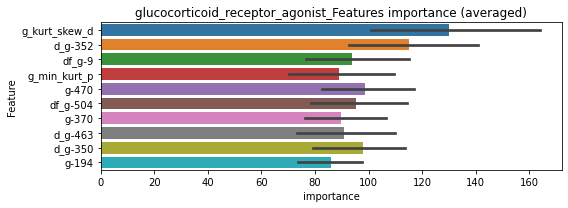

len(train_index) : 2518
len(valid_index) : 840
================================= fold 1/4 glucocorticoid_receptor_agonist=================================


Training until validation scores don't improve for 30 rounds


len(train_index) : 2518
len(valid_index) : 840
================================= fold 2/4 glucocorticoid_receptor_agonist=================================


Early stopping, best iteration is:
[278]	training's binary_logloss: 0.00397296	valid_1's binary_logloss: 0.115906
Training until validation scores don't improve for 30 rounds


len(train_index) : 2519
len(valid_index) : 839
================================= fold 3/4 glucocorticoid_receptor_agonist=================================


Early stopping, best iteration is:
[191]	training's binary_logloss: 0.00715069	valid_1's binary_logloss: 0.120623
Training until validation scores don't improve for 30 rounds


len(train_index) : 2519
len(valid_index) : 839


Early stopping, best iteration is:
[539]	training's binary_logloss: 0.00171935	valid_1's binary_logloss: 0.093822


================================= fold 4/4 glucocorticoid_receptor_agonist=================================


Training until validation scores don't improve for 30 rounds


glucocorticoid_receptor_agonist logloss: 0.11215661155666548
glucocorticoid_receptor_agonist clipping


Early stopping, best iteration is:
[226]	training's binary_logloss: 0.00537375	valid_1's binary_logloss: 0.11826
neg labels: 3289 → selected neg labels: 3285


glutamate_inhibitor, len(trt): 13, len(othr): 3285
target_rate: 0.0005459 → Adj_target_rate: 0.0007431
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.000672789	valid_1's binary_logloss: 0.00217417
Early stopping, best iteration is:
[510]	training's binary_logloss: 0.00025433	valid_1's binary_logloss: 0.00120112
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.000675807	valid_1's binary_logloss: 0.00173051
Early stopping, best iteration is:
[515]	training's binary_logloss: 0.000254077	valid_1's binary_logloss: 0.000890626
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.000687819	valid_1's binary_logloss: 0.00107908
Early stopping, best iteration is:
[524]	training's binary_logloss: 0.000254999	valid_1's binary_logloss: 0.000472627
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.000677755	valid_1's binary_logloss: 0.0010649


1 / 3 AUC score:1.000
y_Threshold: 0.0009802, Threshold: 0.0030877, pos_neg_ratio: 0.8000000
Remove_noisy_data: 132 → Positive_corect_labels: 657/3810
p_label_rate: 0.0100452 Vs.target_rate: 0.00055
Num_p_label: 40.0, conf_0:0.00216, conf_1:0.00401
Num_p_label: 40.0, Expected: 2.2, Adj_threshold_1: 0.0030877
Num_p_label: 3.0, Expected: 2.2, Adj_threshold_2: 0.0430877


Early stopping, best iteration is:
[516]	training's binary_logloss: 0.000255814	valid_1's binary_logloss: 0.000472645


threshold: 0.0430877, positive_p_label: 3.0/3982, p_label_rate: 0.0007534
positive_y_label: 657.0/3810, y_label_rate: 0.1724409
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.000646647	valid_1's binary_logloss: 0.00166441
Early stopping, best iteration is:
[518]	training's binary_logloss: 0.000247377	valid_1's binary_logloss: 0.000875632
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.000640755	valid_1's binary_logloss: 0.00155892
Early stopping, best iteration is:
[523]	training's binary_logloss: 0.000246887	valid_1's binary_logloss: 0.000820114
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00064709	valid_1's binary_logloss: 0.000819636
Early stopping, best iteration is:
[540]	training's binary_logloss: 0.000246335	valid_1's binary_logloss: 0.000330774
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.000638671	valid_1's binary_logloss: 0.00102174


2 / 3 AUC score:1.000
y_Threshold: 0.1160610, Threshold: 0.0430877, pos_neg_ratio: 0.8000000
Remove_noisy_data: 0 → Positive_corect_labels: 657.0/3810
p_label_rate: 0.0015068 Vs.target_rate: 0.00055
Num_p_label: 6.0, conf_0:0.03447, conf_1:0.05171
Num_p_label: 6.0, Expected: 2.2, Adj_threshold_1: 0.0430877
Num_p_label: 4.0, Expected: 2.2, Adj_threshold_2: 0.0830877


Early stopping, best iteration is:
[522]	training's binary_logloss: 0.000246743	valid_1's binary_logloss: 0.000473395


threshold: 0.0830877, positive_p_label: 4.0/3982, p_label_rate: 0.0010045
positive_y_label: 657.0/3810, y_label_rate: 0.1724409
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.000646647	valid_1's binary_logloss: 0.00166441
Early stopping, best iteration is:
[518]	training's binary_logloss: 0.000247377	valid_1's binary_logloss: 0.000875632
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.000640755	valid_1's binary_logloss: 0.00155892
Early stopping, best iteration is:
[523]	training's binary_logloss: 0.000246887	valid_1's binary_logloss: 0.000820114
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00064709	valid_1's binary_logloss: 0.000819636
Early stopping, best iteration is:
[540]	training's binary_logloss: 0.000246335	valid_1's binary_logloss: 0.000330774
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.000638671	valid_1's binary_logloss: 0.00102174


3 / 3 AUC score:1.000
y_Threshold: 0.1160610, Threshold: 0.0830877, pos_neg_ratio: 0.8000000
Remove_noisy_data: 0 → Positive_corect_labels: 657.0/3810
p_label_rate: 0.0010045 Vs.target_rate: 0.00055
Num_p_label: 4.0, conf_0:0.07478, conf_1:0.09140
Num_p_label: 4.0, Expected: 2.2, Adj_threshold_1: 0.0830877
threshold: 0.0830877, positive_p_label: 4.0/3982, p_label_rate: 0.0010045


Early stopping, best iteration is:
[522]	training's binary_logloss: 0.000246743	valid_1's binary_logloss: 0.000473395


positive_y_label: 657.0/3810, y_label_rate: 0.1724409


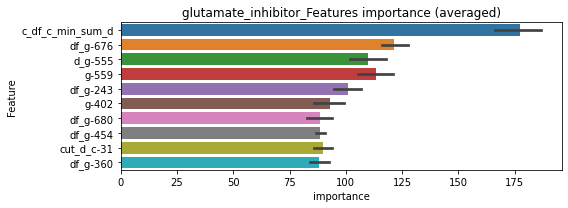

len(train_index) : 2857
len(valid_index) : 953
================================= fold 1/4 glutamate_inhibitor=================================


Training until validation scores don't improve for 30 rounds


len(train_index) : 2857
len(valid_index) : 953
================================= fold 2/4 glutamate_inhibitor=================================


Early stopping, best iteration is:
[865]	training's binary_logloss: 0.000248982	valid_1's binary_logloss: 0.00058782
Training until validation scores don't improve for 30 rounds


len(train_index) : 2858
len(valid_index) : 952
================================= fold 3/4 glutamate_inhibitor=================================


Early stopping, best iteration is:
[856]	training's binary_logloss: 0.000250591	valid_1's binary_logloss: 0.000710004
Training until validation scores don't improve for 30 rounds


len(train_index) : 2858
len(valid_index) : 952
================================= fold 4/4 glutamate_inhibitor=================================


Early stopping, best iteration is:
[833]	training's binary_logloss: 0.000251833	valid_1's binary_logloss: 0.000345298
Training until validation scores don't improve for 30 rounds


glutamate_inhibitor logloss: 0.000551564430376219


Early stopping, best iteration is:
[830]	training's binary_logloss: 0.000251761	valid_1's binary_logloss: 0.0005628
neg labels: 3289 → selected neg labels: 3283


glutamate_receptor_agonist, len(trt): 74, len(othr): 3283
target_rate: 0.0031074 → Adj_target_rate: 0.0032587
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00529972	valid_1's binary_logloss: 0.0435169
[600]	training's binary_logloss: 0.000848839	valid_1's binary_logloss: 0.0333709
Early stopping, best iteration is:
[572]	training's binary_logloss: 0.000926666	valid_1's binary_logloss: 0.0332928
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00492239	valid_1's binary_logloss: 0.0414953
Early stopping, best iteration is:
[561]	training's binary_logloss: 0.000938016	valid_1's binary_logloss: 0.0344593
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00560443	valid_1's binary_logloss: 0.0226841
[600]	training's binary_logloss: 0.000907957	valid_1's binary_logloss: 0.0134708
Early stopping, best iteration is:
[852]	training's binary_logloss: 0.000605043	valid_1's binary_logloss: 0.0127037
Training until validation scores don't improve for 30 rounds
[300]	

1 / 3 AUC score:0.999
y_Threshold: 0.0076104, Threshold: 0.1652217, pos_neg_ratio: 0.8000000
Remove_noisy_data: 138 → Positive_corect_labels: 653/3801
p_label_rate: 0.0100452 Vs.target_rate: 0.00311
Num_p_label: 40.0, conf_0:0.11566, conf_1:0.21479
Num_p_label: 40.0, Expected: 12.4, Adj_threshold_1: 0.1652217
Num_p_label: 32.0, Expected: 12.4, Adj_threshold_2: 0.2052217
Num_p_label: 31.0, Expected: 12.4, Adj_threshold_3: 0.2452217
Num_p_label: 25.0, Expected: 12.4, Adj_threshold_4: 0.2852217
Num_p_label: 23.0, Expected: 12.4, Adj_threshold_5: 0.3252217
Num_p_label: 22.0, Expected: 12.4, Adj_threshold_6: 0.3652217
Num_p_label: 22.0, Expected: 12.4, Adj_threshold_7: 0.4052217
Num_p_label: 18.0, Expected: 12.4, Adj_threshold_8: 0.4452217
threshold: 0.4452217, positive_p_label: 18.0/3982, p_label_rate: 0.0045203
positive_y_label: 653.0/3801, y_label_rate: 0.1717969
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00466613	valid_1's binary_logloss: 0.0376763
Early stopping, best iteration is:
[549]	training's binary_logloss: 0.000935759	valid_1's binary_logloss: 0.0318937
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00431544	valid_1's binary_logloss: 0.0320637
[600]	training's binary_logloss: 0.000780195	valid_1's binary_logloss: 0.0208654
Early stopping, best iteration is:
[726]	training's binary_logloss: 0.000606839	valid_1's binary_logloss: 0.0201024
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00462075	valid_1's binary_logloss: 0.0305935
[600]	training's binary_logloss: 0.000809664	valid_1's binary_logloss: 0.022229
Early stopping, best iteration is:
[681]	training's binary_logloss: 0.000660911	valid_1's binary_logloss: 0.0216508
Training until validation scores don't improve for 30 rounds
[300]	t

2 / 3 AUC score:1.000
y_Threshold: 0.0383630, Threshold: 0.4452217, pos_neg_ratio: 0.8000000


Early stopping, best iteration is:
[486]	training's binary_logloss: 0.00121853	valid_1's binary_logloss: 0.0262101


Remove_noisy_data: 12 → Positive_corect_labels: 647.0/3789
p_label_rate: 0.0135610 Vs.target_rate: 0.00311
Num_p_label: 54.0, conf_0:0.35618, conf_1:0.53427
Num_p_label: 54.0, Expected: 12.4, Adj_threshold_1: 0.4452217
Num_p_label: 50.0, Expected: 12.4, Adj_threshold_2: 0.4852217
Num_p_label: 47.0, Expected: 12.4, Adj_threshold_3: 0.5252217
Num_p_label: 45.0, Expected: 12.4, Adj_threshold_4: 0.5652217
Num_p_label: 41.0, Expected: 12.4, Adj_threshold_5: 0.6052217
Num_p_label: 39.0, Expected: 12.4, Adj_threshold_6: 0.6452217
Num_p_label: 34.0, Expected: 12.4, Adj_threshold_7: 0.6852217
Num_p_label: 26.0, Expected: 12.4, Adj_threshold_8: 0.7252217
Num_p_label: 24.0, Expected: 12.4, Adj_threshold_9: 0.7652217
Num_p_label: 20.0, Expected: 12.4, Adj_threshold_10: 0.8052217
threshold: 0.8452217, positive_p_label: 13.0/3982, p_label_rate: 0.0032647
positive_y_label: 647.0/3789, y_label_rate: 0.1707575
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0042918	valid_1's binary_logloss: 0.0262912
[600]	training's binary_logloss: 0.000765443	valid_1's binary_logloss: 0.0161339
Early stopping, best iteration is:
[746]	training's binary_logloss: 0.000574218	valid_1's binary_logloss: 0.015224
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00420921	valid_1's binary_logloss: 0.0322258
[600]	training's binary_logloss: 0.000767709	valid_1's binary_logloss: 0.0238829
Early stopping, best iteration is:
[740]	training's binary_logloss: 0.000581556	valid_1's binary_logloss: 0.023125
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00440979	valid_1's binary_logloss: 0.0315682
[600]	training's binary_logloss: 0.000776546	valid_1's binary_logloss: 0.0264342
Early stopping, best iteration is:
[586]	training's binary_logloss: 0.000810321	valid_1's binary_logloss:

3 / 3 AUC score:1.000
y_Threshold: 0.0585909, Threshold: 0.8452217, pos_neg_ratio: 0.8000000
Remove_noisy_data: 12 → Positive_corect_labels: 641.0/3777
p_label_rate: 0.0040181 Vs.target_rate: 0.00311
Num_p_label: 16.0, conf_0:0.50000, conf_1:0.80000
threshold: 0.8452217, positive_p_label: 16.0/3982, p_label_rate: 0.0040181
positive_y_label: 641.0/3777, y_label_rate: 0.1697114


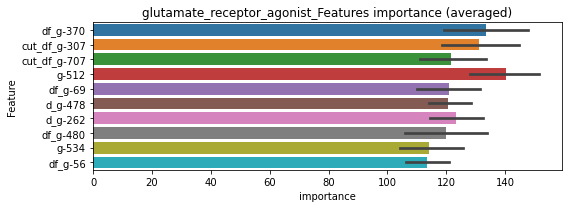

len(train_index) : 2832
len(valid_index) : 945
================================= fold 1/4 glutamate_receptor_agonist=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[816]	training's binary_logloss: 0.00061384	valid_1's binary_logloss: 0.0192869


len(train_index) : 2833
len(valid_index) : 944
================================= fold 2/4 glutamate_receptor_agonist=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[820]	training's binary_logloss: 0.000623886	valid_1's binary_logloss: 0.0174742


len(train_index) : 2833
len(valid_index) : 944
================================= fold 3/4 glutamate_receptor_agonist=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[822]	training's binary_logloss: 0.000624374	valid_1's binary_logloss: 0.012748


len(train_index) : 2833
len(valid_index) : 944
================================= fold 4/4 glutamate_receptor_agonist=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[639]	training's binary_logloss: 0.000756481	valid_1's binary_logloss: 0.0204723


glutamate_receptor_agonist logloss: 0.017495827758094544


neg labels: 3289 → selected neg labels: 3235


glutamate_receptor_antagonist, len(trt): 367, len(othr): 3235
target_rate: 0.0154111 → Adj_target_rate: 0.0127105
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[259]	training's binary_logloss: 0.058164	valid_1's binary_logloss: 0.337037
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.047	valid_1's binary_logloss: 0.319853
Early stopping, best iteration is:
[274]	training's binary_logloss: 0.0550807	valid_1's binary_logloss: 0.318772
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0467564	valid_1's binary_logloss: 0.330159
Early stopping, best iteration is:
[315]	training's binary_logloss: 0.0426825	valid_1's binary_logloss: 0.32942
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0457818	valid_1's binary_logloss: 0.289451


1 / 3 AUC score:0.824
y_Threshold: 0.1087963, Threshold: 0.4079762, pos_neg_ratio: 0.8000000
Remove_noisy_data: 574 → Positive_corect_labels: 425/3308
p_label_rate: 0.0100452 Vs.target_rate: 0.01541
Num_p_label: 40.0, conf_0:0.28558, conf_1:0.53037
Num_p_label: 40.0, Expected: 61.4, Adj_threshold_1: 0.4079762


Early stopping, best iteration is:
[364]	training's binary_logloss: 0.0307409	valid_1's binary_logloss: 0.286839


Num_p_label: 50.0, Expected: 61.4, Adj_threshold_2: 0.3779762
threshold: 0.3779762, positive_p_label: 50.0/3982, p_label_rate: 0.0125565
positive_y_label: 425.0/3308, y_label_rate: 0.1284764
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0146473	valid_1's binary_logloss: 0.13954
Early stopping, best iteration is:
[484]	training's binary_logloss: 0.00380712	valid_1's binary_logloss: 0.128196
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0144535	valid_1's binary_logloss: 0.154159
Early stopping, best iteration is:
[337]	training's binary_logloss: 0.0103923	valid_1's binary_logloss: 0.15127
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0143768	valid_1's binary_logloss: 0.158643
Early stopping, best iteration is:
[425]	training's binary_logloss: 0.00543704	valid_1's binary_logloss: 0.156058
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0143837	valid_1's binary_logloss: 0.147837


2 / 3 AUC score:0.976


Early stopping, best iteration is:
[501]	training's binary_logloss: 0.00347114	valid_1's binary_logloss: 0.139716


y_Threshold: 0.0558347, Threshold: 0.3779762, pos_neg_ratio: 0.8000000
Remove_noisy_data: 92 → Positive_corect_labels: 379.0/3216
p_label_rate: 0.0200904 Vs.target_rate: 0.01541
Num_p_label: 80.0, conf_0:0.30238, conf_1:0.45357
threshold: 0.3779762, positive_p_label: 80.0/3982, p_label_rate: 0.0200904
positive_y_label: 379.0/3216, y_label_rate: 0.1178483
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0107665	valid_1's binary_logloss: 0.169549
Early stopping, best iteration is:
[290]	training's binary_logloss: 0.0118587	valid_1's binary_logloss: 0.168509
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[245]	training's binary_logloss: 0.0183625	valid_1's binary_logloss: 0.175455
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0117135	valid_1's binary_logloss: 0.132572
Early stopping, best iteration is:
[365]	training's binary_logloss: 0.00669227	valid_1's binary_logloss: 0.130108
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0110944	valid_1's binary_logloss: 0.13852


3 / 3 AUC score:0.968
y_Threshold: 0.0640143, Threshold: 0.3779762, pos_neg_ratio: 0.8000000
Remove_noisy_data: 110 → Positive_corect_labels: 324.0/3106
p_label_rate: 0.0223506 Vs.target_rate: 0.01541
Num_p_label: 89.0, conf_0:0.34018, conf_1:0.41577
threshold: 0.3779762, positive_p_label: 89.0/3982, p_label_rate: 0.0223506


Early stopping, best iteration is:
[329]	training's binary_logloss: 0.00851527	valid_1's binary_logloss: 0.135376


positive_y_label: 324.0/3106, y_label_rate: 0.1043142


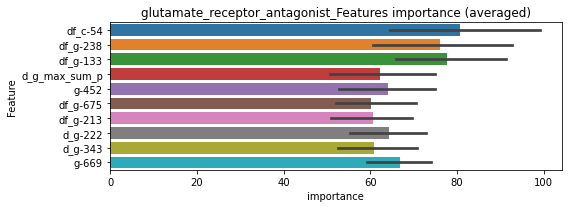

len(train_index) : 2329
len(valid_index) : 777
================================= fold 1/4 glutamate_receptor_antagonist=================================


Training until validation scores don't improve for 30 rounds


len(train_index) : 2329
len(valid_index) : 777
================================= fold 2/4 glutamate_receptor_antagonist=================================


Early stopping, best iteration is:
[174]	training's binary_logloss: 0.00660198	valid_1's binary_logloss: 0.121122
Training until validation scores don't improve for 30 rounds


len(train_index) : 2330
len(valid_index) : 776
================================= fold 3/4 glutamate_receptor_antagonist=================================


Early stopping, best iteration is:
[228]	training's binary_logloss: 0.00450205	valid_1's binary_logloss: 0.110117
Training until validation scores don't improve for 30 rounds


len(train_index) : 2330
len(valid_index) : 776
================================= fold 4/4 glutamate_receptor_antagonist=================================


Early stopping, best iteration is:
[223]	training's binary_logloss: 0.00461315	valid_1's binary_logloss: 0.1149
Training until validation scores don't improve for 30 rounds


glutamate_receptor_antagonist logloss: 0.10943521560630207
glutamate_receptor_antagonist clipping


Early stopping, best iteration is:
[196]	training's binary_logloss: 0.00575963	valid_1's binary_logloss: 0.0915864
neg labels: 3289 → selected neg labels: 3287


gonadotropin_receptor_agonist, len(trt): 18, len(othr): 3287
target_rate: 0.0007559 → Adj_target_rate: 0.0009799
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00116388	valid_1's binary_logloss: 0.00553443
Early stopping, best iteration is:
[520]	training's binary_logloss: 0.000337945	valid_1's binary_logloss: 0.00341345
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0011368	valid_1's binary_logloss: 0.00410223
Early stopping, best iteration is:
[533]	training's binary_logloss: 0.000330285	valid_1's binary_logloss: 0.00241967
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00115889	valid_1's binary_logloss: 0.00353853
Early stopping, best iteration is:
[534]	training's binary_logloss: 0.000333565	valid_1's binary_logloss: 0.00195146
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00113528	valid_1's binary_logloss: 0.00378829


1 / 3 AUC score:1.000
y_Threshold: 0.0019514, Threshold: 0.0074828, pos_neg_ratio: 0.8000000
Remove_noisy_data: 132 → Positive_corect_labels: 657/3812
p_label_rate: 0.0100452 Vs.target_rate: 0.00076
Num_p_label: 40.0, conf_0:0.00524, conf_1:0.00973
Num_p_label: 40.0, Expected: 3.0, Adj_threshold_1: 0.0074828
Num_p_label: 7.0, Expected: 3.0, Adj_threshold_2: 0.0474828


Early stopping, best iteration is:
[531]	training's binary_logloss: 0.00033056	valid_1's binary_logloss: 0.0022419


threshold: 0.0474828, positive_p_label: 7.0/3982, p_label_rate: 0.0017579
positive_y_label: 657.0/3812, y_label_rate: 0.1723505
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00106038	valid_1's binary_logloss: 0.00629533
Early stopping, best iteration is:
[531]	training's binary_logloss: 0.000320646	valid_1's binary_logloss: 0.00418041
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00106441	valid_1's binary_logloss: 0.00403462
Early stopping, best iteration is:
[522]	training's binary_logloss: 0.000323182	valid_1's binary_logloss: 0.00270324
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00105612	valid_1's binary_logloss: 0.00277296
Early stopping, best iteration is:
[537]	training's binary_logloss: 0.000322469	valid_1's binary_logloss: 0.00135884
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00105543	valid_1's binary_logloss: 0.00382029


2 / 3 AUC score:1.000
y_Threshold: 0.0378711, Threshold: 0.0474828, pos_neg_ratio: 0.8000000
Remove_noisy_data: 0 → Positive_corect_labels: 657.0/3812
p_label_rate: 0.0055249 Vs.target_rate: 0.00076
Num_p_label: 22.0, conf_0:0.03799, conf_1:0.05698
Num_p_label: 22.0, Expected: 3.0, Adj_threshold_1: 0.0474828
Num_p_label: 14.0, Expected: 3.0, Adj_threshold_2: 0.0874828
Num_p_label: 12.0, Expected: 3.0, Adj_threshold_3: 0.1274828
Num_p_label: 7.0, Expected: 3.0, Adj_threshold_4: 0.1674828


Early stopping, best iteration is:
[518]	training's binary_logloss: 0.000325313	valid_1's binary_logloss: 0.00248063


threshold: 0.1674828, positive_p_label: 7.0/3982, p_label_rate: 0.0017579
positive_y_label: 657.0/3812, y_label_rate: 0.1723505
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00106038	valid_1's binary_logloss: 0.00629533
Early stopping, best iteration is:
[531]	training's binary_logloss: 0.000320646	valid_1's binary_logloss: 0.00418041
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00106441	valid_1's binary_logloss: 0.00403462
Early stopping, best iteration is:
[522]	training's binary_logloss: 0.000323182	valid_1's binary_logloss: 0.00270324
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00105612	valid_1's binary_logloss: 0.00277296
Early stopping, best iteration is:
[541]	training's binary_logloss: 0.000322469	valid_1's binary_logloss: 0.00135884
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00105543	valid_1's binary_logloss: 0.00382029


3 / 3 AUC score:1.000
y_Threshold: 0.0378711, Threshold: 0.1674828, pos_neg_ratio: 0.8000000
Remove_noisy_data: 0 → Positive_corect_labels: 657.0/3812
p_label_rate: 0.0017579 Vs.target_rate: 0.00076
Num_p_label: 7.0, conf_0:0.15073, conf_1:0.18423
Num_p_label: 7.0, Expected: 3.0, Adj_threshold_1: 0.1674828


Early stopping, best iteration is:
[518]	training's binary_logloss: 0.000325313	valid_1's binary_logloss: 0.00248063


threshold: 0.1674828, positive_p_label: 7.0/3982, p_label_rate: 0.0017579
positive_y_label: 657.0/3812, y_label_rate: 0.1723505


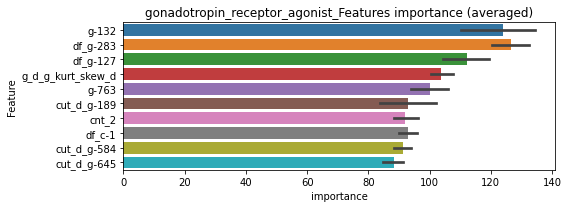

len(train_index) : 2859
len(valid_index) : 953
================================= fold 1/4 gonadotropin_receptor_agonist=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[791]	training's binary_logloss: 0.00031818	valid_1's binary_logloss: 0.00230558


len(train_index) : 2859
len(valid_index) : 953
================================= fold 2/4 gonadotropin_receptor_agonist=================================


Training until validation scores don't improve for 30 rounds


len(train_index) : 2859
len(valid_index) : 953
================================= fold 3/4 gonadotropin_receptor_agonist=================================


Early stopping, best iteration is:
[683]	training's binary_logloss: 0.000338747	valid_1's binary_logloss: 0.00242115
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[802]	training's binary_logloss: 0.000320568	valid_1's binary_logloss: 0.00113481


len(train_index) : 2859
len(valid_index) : 953
================================= fold 4/4 gonadotropin_receptor_agonist=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[740]	training's binary_logloss: 0.000326365	valid_1's binary_logloss: 0.00198491


gonadotropin_receptor_agonist logloss: 0.001962117413433079


neg labels: 3289 → selected neg labels: 3281


gsk_inhibitor, len(trt): 60, len(othr): 3281
target_rate: 0.0025195 → Adj_target_rate: 0.0027266
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00402115	valid_1's binary_logloss: 0.0283205
[600]	training's binary_logloss: 0.00075388	valid_1's binary_logloss: 0.0197517
Early stopping, best iteration is:
[759]	training's binary_logloss: 0.000565782	valid_1's binary_logloss: 0.0188833
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00419906	valid_1's binary_logloss: 0.0242813
[600]	training's binary_logloss: 0.000768177	valid_1's binary_logloss: 0.0148027
Early stopping, best iteration is:
[753]	training's binary_logloss: 0.000568724	valid_1's binary_logloss: 0.0139412
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00451048	valid_1's binary_logloss: 0.0111599
[600]	training's binary_logloss: 0.000805454	valid_1's binary_logloss: 0.00352223
Early stopping, best iteration is:
[821]	training's binary_logloss: 0.000571104	valid_1's binary_loglo

1 / 3 AUC score:1.000
y_Threshold: 0.0060891, Threshold: 0.0302986, pos_neg_ratio: 0.8000000
Remove_noisy_data: 132 → Positive_corect_labels: 656/3805
p_label_rate: 0.0100452 Vs.target_rate: 0.00252
Num_p_label: 40.0, conf_0:0.02121, conf_1:0.03939
Num_p_label: 40.0, Expected: 10.0, Adj_threshold_1: 0.0302986
Num_p_label: 7.0, Expected: 10.0, Adj_threshold_2: 0.0702986
threshold: 0.0702986, positive_p_label: 7.0/3982, p_label_rate: 0.0017579
positive_y_label: 656.0/3805, y_label_rate: 0.1724047
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00368572	valid_1's binary_logloss: 0.0278529
[600]	training's binary_logloss: 0.000713741	valid_1's binary_logloss: 0.0205537
Early stopping, best iteration is:
[731]	training's binary_logloss: 0.000552926	valid_1's binary_logloss: 0.0200562
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00385321	valid_1's binary_logloss: 0.0242207
[600]	training's binary_logloss: 0.000723953	valid_1's binary_logloss: 0.0140443
Early stopping, best iteration is:
[760]	training's binary_logloss: 0.000543278	valid_1's binary_logloss: 0.0129973
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00403825	valid_1's binary_logloss: 0.00969747
[600]	training's binary_logloss: 0.000757146	valid_1's binary_logloss: 0.00278801
Early stopping, best iteration is:
[788]	training's binary_logloss: 0.000549305	valid_1's binary_log

2 / 3 AUC score:1.000
y_Threshold: 0.0391684, Threshold: 0.0702986, pos_neg_ratio: 0.8000000
Remove_noisy_data: 0 → Positive_corect_labels: 656.0/3805
p_label_rate: 0.0097941 Vs.target_rate: 0.00252
Num_p_label: 39.0, conf_0:0.05624, conf_1:0.08436
Num_p_label: 39.0, Expected: 10.0, Adj_threshold_1: 0.0702986
Num_p_label: 21.0, Expected: 10.0, Adj_threshold_2: 0.1102986
Num_p_label: 11.0, Expected: 10.0, Adj_threshold_3: 0.1502986
threshold: 0.1502986, positive_p_label: 11.0/3982, p_label_rate: 0.0027624
positive_y_label: 656.0/3805, y_label_rate: 0.1724047
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00368572	valid_1's binary_logloss: 0.0278529
[600]	training's binary_logloss: 0.000713741	valid_1's binary_logloss: 0.0205537
Early stopping, best iteration is:
[731]	training's binary_logloss: 0.000552926	valid_1's binary_logloss: 0.0200562
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00385321	valid_1's binary_logloss: 0.0242207
[600]	training's binary_logloss: 0.000723953	valid_1's binary_logloss: 0.0140443
Early stopping, best iteration is:
[760]	training's binary_logloss: 0.000543278	valid_1's binary_logloss: 0.0129973
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00403825	valid_1's binary_logloss: 0.00969747
[600]	training's binary_logloss: 0.000757146	valid_1's binary_logloss: 0.00278801
Early stopping, best iteration is:
[788]	training's binary_logloss: 0.000549305	valid_1's binary_log

3 / 3 AUC score:1.000
y_Threshold: 0.0391684, Threshold: 0.1502986, pos_neg_ratio: 0.8000000
Remove_noisy_data: 0 → Positive_corect_labels: 656.0/3805
p_label_rate: 0.0027624 Vs.target_rate: 0.00252
Num_p_label: 11.0, conf_0:0.13527, conf_1:0.16533
threshold: 0.1502986, positive_p_label: 11.0/3982, p_label_rate: 0.0027624
positive_y_label: 656.0/3805, y_label_rate: 0.1724047


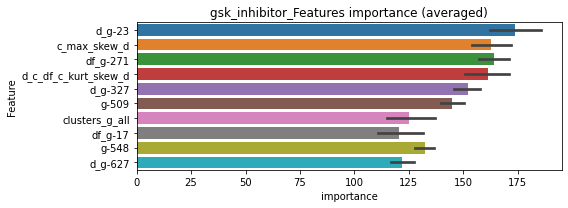

len(train_index) : 2853
len(valid_index) : 952
================================= fold 1/4 gsk_inhibitor=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[706]	training's binary_logloss: 0.000689133	valid_1's binary_logloss: 0.0208199


len(train_index) : 2854
len(valid_index) : 951
================================= fold 2/4 gsk_inhibitor=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[641]	training's binary_logloss: 0.000764669	valid_1's binary_logloss: 0.0119656


len(train_index) : 2854
len(valid_index) : 951
================================= fold 3/4 gsk_inhibitor=================================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.000577631	valid_1's binary_logloss: 0.00258284
Early stopping, best iteration is:
[991]	training's binary_logloss: 0.000577631	valid_1's binary_logloss: 0.00258284


len(train_index) : 2854
len(valid_index) : 951
================================= fold 4/4 gsk_inhibitor=================================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.000558198	valid_1's binary_logloss: 0.00928745
Early stopping, best iteration is:
[1002]	training's binary_logloss: 0.000557415	valid_1's binary_logloss: 0.00928309


gsk_inhibitor logloss: 0.01116538687314025


neg labels: 3289 → selected neg labels: 3273


hcv_inhibitor, len(trt): 72, len(othr): 3273
target_rate: 0.0030234 → Adj_target_rate: 0.0031837
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00469239	valid_1's binary_logloss: 0.0459725
[600]	training's binary_logloss: 0.00082295	valid_1's binary_logloss: 0.0391356
Early stopping, best iteration is:
[612]	training's binary_logloss: 0.000794502	valid_1's binary_logloss: 0.0390296
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00472423	valid_1's binary_logloss: 0.0290887
[600]	training's binary_logloss: 0.000846165	valid_1's binary_logloss: 0.0183466
Early stopping, best iteration is:
[669]	training's binary_logloss: 0.000713585	valid_1's binary_logloss: 0.017847
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00455036	valid_1's binary_logloss: 0.0283087
[600]	training's binary_logloss: 0.000828997	valid_1's binary_logloss: 0.0185886
Early stopping, best iteration is:
[680]	training's binary_logloss: 0.000680681	valid_1's binary_logloss

1 / 3 AUC score:0.999
y_Threshold: 0.0064123, Threshold: 0.0178663, pos_neg_ratio: 0.8000000
Remove_noisy_data: 136 → Positive_corect_labels: 652/3791
p_label_rate: 0.0100452 Vs.target_rate: 0.00302
Num_p_label: 40.0, conf_0:0.01251, conf_1:0.02323
Num_p_label: 40.0, Expected: 12.0, Adj_threshold_1: 0.0178663
Num_p_label: 8.0, Expected: 12.0, Adj_threshold_2: 0.0578663
threshold: 0.0578663, positive_p_label: 8.0/3982, p_label_rate: 0.0020090
positive_y_label: 652.0/3791, y_label_rate: 0.1719863
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00405289	valid_1's binary_logloss: 0.0375008
Early stopping, best iteration is:
[436]	training's binary_logloss: 0.00148277	valid_1's binary_logloss: 0.0324311
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00418338	valid_1's binary_logloss: 0.0404873
[600]	training's binary_logloss: 0.000777533	valid_1's binary_logloss: 0.0319465
Early stopping, best iteration is:
[612]	training's binary_logloss: 0.000751768	valid_1's binary_logloss: 0.0318581
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00405575	valid_1's binary_logloss: 0.0277331
[600]	training's binary_logloss: 0.000782593	valid_1's binary_logloss: 0.0188151
Early stopping, best iteration is:
[763]	training's binary_logloss: 0.000587548	valid_1's binary_logloss: 0.0179789
Training until validation scores don't improve for 30 rounds
[300]	t

2 / 3 AUC score:1.000
y_Threshold: 0.0334345, Threshold: 0.0578663, pos_neg_ratio: 0.8000000
Remove_noisy_data: 8 → Positive_corect_labels: 648.0/3783
p_label_rate: 0.0085384 Vs.target_rate: 0.00302
Num_p_label: 34.0, conf_0:0.04629, conf_1:0.06944
Num_p_label: 34.0, Expected: 12.0, Adj_threshold_1: 0.0578663
Num_p_label: 16.0, Expected: 12.0, Adj_threshold_2: 0.0978663
threshold: 0.0978663, positive_p_label: 16.0/3982, p_label_rate: 0.0040181
positive_y_label: 648.0/3783, y_label_rate: 0.1712926
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00403444	valid_1's binary_logloss: 0.0290149
[600]	training's binary_logloss: 0.000765864	valid_1's binary_logloss: 0.0207032
Early stopping, best iteration is:
[677]	training's binary_logloss: 0.000639819	valid_1's binary_logloss: 0.0203582
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00411714	valid_1's binary_logloss: 0.0259479
[600]	training's binary_logloss: 0.000776551	valid_1's binary_logloss: 0.0178418
Early stopping, best iteration is:
[682]	training's binary_logloss: 0.000639238	valid_1's binary_logloss: 0.0173928
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00393339	valid_1's binary_logloss: 0.0244891
[600]	training's binary_logloss: 0.000757342	valid_1's binary_logloss: 0.015674
Early stopping, best iteration is:
[585]	training's binary_logloss: 0.000789273	valid_1's binary_loglos

3 / 3 AUC score:1.000
y_Threshold: 0.0274492, Threshold: 0.0978663, pos_neg_ratio: 0.8000000
Remove_noisy_data: 4 → Positive_corect_labels: 646.0/3779
p_label_rate: 0.0050226 Vs.target_rate: 0.00302
Num_p_label: 20.0, conf_0:0.08808, conf_1:0.10765
Num_p_label: 20.0, Expected: 12.0, Adj_threshold_1: 0.0978663
Num_p_label: 13.0, Expected: 12.0, Adj_threshold_2: 0.1378663
threshold: 0.1378663, positive_p_label: 13.0/3982, p_label_rate: 0.0032647
positive_y_label: 646.0/3779, y_label_rate: 0.1709447


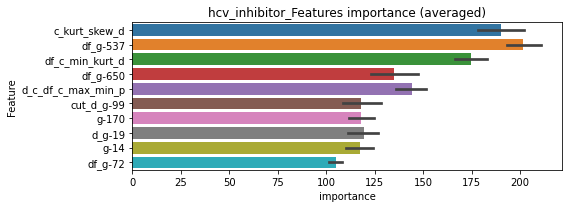

len(train_index) : 2834
len(valid_index) : 945
================================= fold 1/4 hcv_inhibitor=================================


Training until validation scores don't improve for 30 rounds


len(train_index) : 2834
len(valid_index) : 945
================================= fold 2/4 hcv_inhibitor=================================


Early stopping, best iteration is:
[557]	training's binary_logloss: 0.000883923	valid_1's binary_logloss: 0.0285759
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[548]	training's binary_logloss: 0.000901058	valid_1's binary_logloss: 0.0238042


len(train_index) : 2834
len(valid_index) : 945
================================= fold 3/4 hcv_inhibitor=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[735]	training's binary_logloss: 0.000702567	valid_1's binary_logloss: 0.0126706


len(train_index) : 2835
len(valid_index) : 944
================================= fold 4/4 hcv_inhibitor=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[679]	training's binary_logloss: 0.000755151	valid_1's binary_logloss: 0.0170267


hcv_inhibitor logloss: 0.020520271926888555
hcv_inhibitor clipping


neg labels: 3289 → selected neg labels: 3275


hdac_inhibitor, len(trt): 106, len(othr): 3275
target_rate: 0.0044512 → Adj_target_rate: 0.0044229
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00868267	valid_1's binary_logloss: 0.0906967
[600]	training's binary_logloss: 0.00131792	valid_1's binary_logloss: 0.0754909
Early stopping, best iteration is:
[735]	training's binary_logloss: 0.000920875	valid_1's binary_logloss: 0.0738013
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00826363	valid_1's binary_logloss: 0.0739793
Early stopping, best iteration is:
[474]	training's binary_logloss: 0.00218362	valid_1's binary_logloss: 0.0642622
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00928033	valid_1's binary_logloss: 0.0705103
Early stopping, best iteration is:
[489]	training's binary_logloss: 0.00221818	valid_1's binary_logloss: 0.0634479
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00854771	valid_1's binary_logloss: 0.0600605
[600]	trai

1 / 3 AUC score:0.994
y_Threshold: 0.0139887, Threshold: 0.0909455, pos_neg_ratio: 0.8000000
Remove_noisy_data: 161 → Positive_corect_labels: 640/3769
p_label_rate: 0.0100452 Vs.target_rate: 0.00445
Num_p_label: 40.0, conf_0:0.06366, conf_1:0.11823
Num_p_label: 40.0, Expected: 17.7, Adj_threshold_1: 0.0909455
Num_p_label: 22.0, Expected: 17.7, Adj_threshold_2: 0.1309455
threshold: 0.1309455, positive_p_label: 22.0/3982, p_label_rate: 0.0055249
positive_y_label: 640.0/3769, y_label_rate: 0.1698063
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00676465	valid_1's binary_logloss: 0.0578596
[600]	training's binary_logloss: 0.00114186	valid_1's binary_logloss: 0.0453473
Early stopping, best iteration is:
[678]	training's binary_logloss: 0.00092097	valid_1's binary_logloss: 0.0441289
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00722462	valid_1's binary_logloss: 0.0618382
[600]	training's binary_logloss: 0.0011759	valid_1's binary_logloss: 0.0485544
Early stopping, best iteration is:
[828]	training's binary_logloss: 0.000728424	valid_1's binary_logloss: 0.0468414
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0068907	valid_1's binary_logloss: 0.0517443
[600]	training's binary_logloss: 0.00117164	valid_1's binary_logloss: 0.0395132
Early stopping, best iteration is:
[782]	training's binary_logloss: 0.000773709	valid_1's binary_logloss: 0.

2 / 3 AUC score:0.999
y_Threshold: 0.0350047, Threshold: 0.1309455, pos_neg_ratio: 0.8000000
Remove_noisy_data: 30 → Positive_corect_labels: 625.0/3739
p_label_rate: 0.0153189 Vs.target_rate: 0.00445
Num_p_label: 61.0, conf_0:0.10476, conf_1:0.15713
Num_p_label: 61.0, Expected: 17.7, Adj_threshold_1: 0.1309455
Num_p_label: 44.0, Expected: 17.7, Adj_threshold_2: 0.1709455
Num_p_label: 33.0, Expected: 17.7, Adj_threshold_3: 0.2109455
Num_p_label: 30.0, Expected: 17.7, Adj_threshold_4: 0.2509455
Num_p_label: 26.0, Expected: 17.7, Adj_threshold_5: 0.2909455
threshold: 0.2909455, positive_p_label: 26.0/3982, p_label_rate: 0.0065294
positive_y_label: 625.0/3739, y_label_rate: 0.1671570
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00588484	valid_1's binary_logloss: 0.0534669
[600]	training's binary_logloss: 0.00105015	valid_1's binary_logloss: 0.041551
Early stopping, best iteration is:
[607]	training's binary_logloss: 0.0010278	valid_1's binary_logloss: 0.0413317
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0061999	valid_1's binary_logloss: 0.0468199
[600]	training's binary_logloss: 0.00106831	valid_1's binary_logloss: 0.0337642
Early stopping, best iteration is:
[616]	training's binary_logloss: 0.00102142	valid_1's binary_logloss: 0.0336127
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00641877	valid_1's binary_logloss: 0.036045
[600]	training's binary_logloss: 0.00111521	valid_1's binary_logloss: 0.026989
Early stopping, best iteration is:
[731]	training's binary_logloss: 0.000805134	valid_1's binary_logloss: 0.0262

3 / 3 AUC score:0.998
y_Threshold: 0.0487913, Threshold: 0.2909455, pos_neg_ratio: 0.8000000
Remove_noisy_data: 12 → Positive_corect_labels: 619.0/3727
p_label_rate: 0.0070316 Vs.target_rate: 0.00445
Num_p_label: 28.0, conf_0:0.26185, conf_1:0.32004
Num_p_label: 28.0, Expected: 17.7, Adj_threshold_1: 0.2909455
Num_p_label: 22.0, Expected: 17.7, Adj_threshold_2: 0.3309455
threshold: 0.3309455, positive_p_label: 22.0/3982, p_label_rate: 0.0055249
positive_y_label: 619.0/3727, y_label_rate: 0.1660853


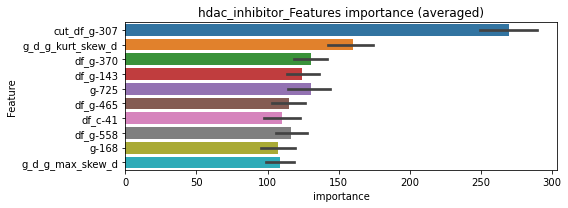

len(train_index) : 2795
len(valid_index) : 932
================================= fold 1/4 hdac_inhibitor=================================


Training until validation scores don't improve for 30 rounds


len(train_index) : 2795
len(valid_index) : 932
================================= fold 2/4 hdac_inhibitor=================================


Early stopping, best iteration is:
[447]	training's binary_logloss: 0.00141386	valid_1's binary_logloss: 0.0393169
Training until validation scores don't improve for 30 rounds


len(train_index) : 2795
len(valid_index) : 932


Early stopping, best iteration is:
[547]	training's binary_logloss: 0.00115676	valid_1's binary_logloss: 0.0301121


================================= fold 3/4 hdac_inhibitor=================================


Training until validation scores don't improve for 30 rounds


len(train_index) : 2796


Early stopping, best iteration is:
[547]	training's binary_logloss: 0.0011647	valid_1's binary_logloss: 0.0412543


len(valid_index) : 931
================================= fold 4/4 hdac_inhibitor=================================


Training until validation scores don't improve for 30 rounds


hdac_inhibitor logloss: 0.03601777135793317
hdac_inhibitor clipping


Early stopping, best iteration is:
[472]	training's binary_logloss: 0.00136539	valid_1's binary_logloss: 0.0333849
neg labels: 3289 → selected neg labels: 3283


histamine_receptor_agonist, len(trt): 59, len(othr): 3283
target_rate: 0.0024775 → Adj_target_rate: 0.0026880
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00347088	valid_1's binary_logloss: 0.0382698
[600]	training's binary_logloss: 0.00064191	valid_1's binary_logloss: 0.0302783
Early stopping, best iteration is:
[645]	training's binary_logloss: 0.000576772	valid_1's binary_logloss: 0.0300454
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00363104	valid_1's binary_logloss: 0.0356247
[600]	training's binary_logloss: 0.000664729	valid_1's binary_logloss: 0.0281974
Early stopping, best iteration is:
[609]	training's binary_logloss: 0.00064764	valid_1's binary_logloss: 0.0281224
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00400241	valid_1's binary_logloss: 0.0129495
[600]	training's binary_logloss: 0.000707392	valid_1's binary_logloss: 0.00773747
Early stopping, best iteration is:
[655]	training's binary_logloss: 0.000617704	valid_1's binary_loglos

1 / 3 AUC score:1.000
y_Threshold: 0.0044106, Threshold: 0.0116246, pos_neg_ratio: 0.8000000
Remove_noisy_data: 132 → Positive_corect_labels: 656/3807
p_label_rate: 0.0100452 Vs.target_rate: 0.00248
Num_p_label: 40.0, conf_0:0.00814, conf_1:0.01511
Num_p_label: 40.0, Expected: 9.9, Adj_threshold_1: 0.0116246
Num_p_label: 5.0, Expected: 9.9, Adj_threshold_2: 0.0516246
threshold: 0.0516246, positive_p_label: 5.0/3982, p_label_rate: 0.0012557
positive_y_label: 656.0/3807, y_label_rate: 0.1723142
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00319204	valid_1's binary_logloss: 0.0352429
[600]	training's binary_logloss: 0.000620997	valid_1's binary_logloss: 0.028383
Early stopping, best iteration is:
[680]	training's binary_logloss: 0.000530526	valid_1's binary_logloss: 0.027993
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0033164	valid_1's binary_logloss: 0.0345297
[600]	training's binary_logloss: 0.000635204	valid_1's binary_logloss: 0.0281896
Early stopping, best iteration is:
[678]	training's binary_logloss: 0.000534915	valid_1's binary_logloss: 0.0278532
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00364501	valid_1's binary_logloss: 0.0134544
[600]	training's binary_logloss: 0.000679688	valid_1's binary_logloss: 0.00817568
Early stopping, best iteration is:
[685]	training's binary_logloss: 0.000564686	valid_1's binary_logloss

2 / 3 AUC score:1.000
y_Threshold: 0.0193169, Threshold: 0.0516246, pos_neg_ratio: 0.8000000
Remove_noisy_data: 6 → Positive_corect_labels: 653.0/3801
p_label_rate: 0.0032647 Vs.target_rate: 0.00248
Num_p_label: 13.0, conf_0:0.04130, conf_1:0.06195
threshold: 0.0516246, positive_p_label: 13.0/3982, p_label_rate: 0.0032647
positive_y_label: 653.0/3801, y_label_rate: 0.1717969
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00341987	valid_1's binary_logloss: 0.0267082
[600]	training's binary_logloss: 0.000625368	valid_1's binary_logloss: 0.0205845
Early stopping, best iteration is:
[574]	training's binary_logloss: 0.000671914	valid_1's binary_logloss: 0.0205322
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00321077	valid_1's binary_logloss: 0.0257745
[600]	training's binary_logloss: 0.000633716	valid_1's binary_logloss: 0.0194301
Early stopping, best iteration is:
[617]	training's binary_logloss: 0.00060878	valid_1's binary_logloss: 0.0192989
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00342401	valid_1's binary_logloss: 0.0244532
[600]	training's binary_logloss: 0.000640381	valid_1's binary_logloss: 0.017101
Early stopping, best iteration is:
[720]	training's binary_logloss: 0.000514648	valid_1's binary_logloss

3 / 3 AUC score:1.000
y_Threshold: 0.0285436, Threshold: 0.0516246, pos_neg_ratio: 0.8000000


Early stopping, best iteration is:
[509]	training's binary_logloss: 0.000871288	valid_1's binary_logloss: 0.0181132


Remove_noisy_data: 4 → Positive_corect_labels: 651.0/3797
p_label_rate: 0.0032647 Vs.target_rate: 0.00248
Num_p_label: 13.0, conf_0:0.04646, conf_1:0.05679
threshold: 0.0516246, positive_p_label: 13.0/3982, p_label_rate: 0.0032647
positive_y_label: 651.0/3797, y_label_rate: 0.1714511


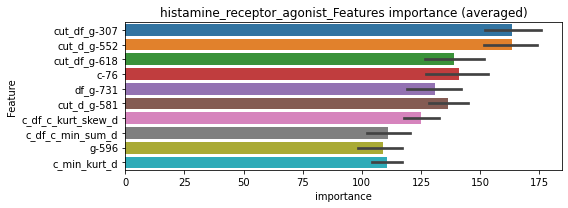

len(train_index) : 2847
len(valid_index) : 950
================================= fold 1/4 histamine_receptor_agonist=================================


Training until validation scores don't improve for 30 rounds


len(train_index) : 2848
len(valid_index) : 949


Early stopping, best iteration is:
[547]	training's binary_logloss: 0.000767981	valid_1's binary_logloss: 0.0177258


================================= fold 2/4 histamine_receptor_agonist=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[556]	training's binary_logloss: 0.000750973	valid_1's binary_logloss: 0.0202868


len(train_index) : 2848
len(valid_index) : 949
================================= fold 3/4 histamine_receptor_agonist=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[897]	training's binary_logloss: 0.000530266	valid_1's binary_logloss: 0.0148992


len(train_index) : 2848
len(valid_index) : 949
================================= fold 4/4 histamine_receptor_agonist=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[853]	training's binary_logloss: 0.000550645	valid_1's binary_logloss: 0.010494


histamine_receptor_agonist logloss: 0.015854164861886413


neg labels: 3289 → selected neg labels: 3255


histamine_receptor_antagonist, len(trt): 241, len(othr): 3255
target_rate: 0.0101201 → Adj_target_rate: 0.0088902
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0267248	valid_1's binary_logloss: 0.199165
Early stopping, best iteration is:
[351]	training's binary_logloss: 0.0183051	valid_1's binary_logloss: 0.198125
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0227127	valid_1's binary_logloss: 0.211547
Early stopping, best iteration is:
[358]	training's binary_logloss: 0.0146055	valid_1's binary_logloss: 0.210872
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0248952	valid_1's binary_logloss: 0.171867
Early stopping, best iteration is:
[385]	training's binary_logloss: 0.0132291	valid_1's binary_logloss: 0.167298
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0272371	valid_1's binary_logloss: 0.169241


1 / 3 AUC score:0.948
y_Threshold: 0.0534814, Threshold: 0.3666880, pos_neg_ratio: 0.8000000
Remove_noisy_data: 317 → Positive_corect_labels: 558/3589


Early stopping, best iteration is:
[449]	training's binary_logloss: 0.00953967	valid_1's binary_logloss: 0.163351


p_label_rate: 0.0100452 Vs.target_rate: 0.01012
Num_p_label: 40.0, conf_0:0.25668, conf_1:0.47669
threshold: 0.3666880, positive_p_label: 40.0/3982, p_label_rate: 0.0100452
positive_y_label: 558.0/3589, y_label_rate: 0.1554751
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0136366	valid_1's binary_logloss: 0.14339
Early stopping, best iteration is:
[348]	training's binary_logloss: 0.00907445	valid_1's binary_logloss: 0.139683
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0135332	valid_1's binary_logloss: 0.130915
Early stopping, best iteration is:
[502]	training's binary_logloss: 0.00324564	valid_1's binary_logloss: 0.125645
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0144498	valid_1's binary_logloss: 0.122623
Early stopping, best iteration is:
[329]	training's binary_logloss: 0.0112417	valid_1's binary_logloss: 0.120243
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0146091	valid_1's binary_logloss: 0.130689


2 / 3 AUC score:0.984
y_Threshold: 0.0629168, Threshold: 0.3666880, pos_neg_ratio: 0.8000000
Remove_noisy_data: 98 → Positive_corect_labels: 509.0/3491
p_label_rate: 0.0208438 Vs.target_rate: 0.01012
Num_p_label: 83.0, conf_0:0.29335, conf_1:0.44003
Num_p_label: 83.0, Expected: 40.3, Adj_threshold_1: 0.3666880
Num_p_label: 73.0, Expected: 40.3, Adj_threshold_2: 0.4066880


Early stopping, best iteration is:
[365]	training's binary_logloss: 0.00846273	valid_1's binary_logloss: 0.127862


Num_p_label: 69.0, Expected: 40.3, Adj_threshold_3: 0.4466880
Num_p_label: 63.0, Expected: 40.3, Adj_threshold_4: 0.4866880
Num_p_label: 60.0, Expected: 40.3, Adj_threshold_5: 0.5266880
threshold: 0.5266880, positive_p_label: 60.0/3982, p_label_rate: 0.0150678
positive_y_label: 509.0/3491, y_label_rate: 0.1458035
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0100899	valid_1's binary_logloss: 0.0904249
Early stopping, best iteration is:
[552]	training's binary_logloss: 0.00194823	valid_1's binary_logloss: 0.0816456
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0096074	valid_1's binary_logloss: 0.100316
Early stopping, best iteration is:
[503]	training's binary_logloss: 0.00235592	valid_1's binary_logloss: 0.095076
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0104562	valid_1's binary_logloss: 0.0776954
Early stopping, best iteration is:
[526]	training's binary_logloss: 0.00225763	valid_1's binary_logloss: 0.0701885
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0085647	valid_1's binary_logloss: 0.112696


3 / 3 AUC score:0.997
y_Threshold: 0.0468882, Threshold: 0.5266880, pos_neg_ratio: 0.8000000
Remove_noisy_data: 38 → Positive_corect_labels: 490.0/3453
p_label_rate: 0.0205927 Vs.target_rate: 0.01012
Num_p_label: 82.0, conf_0:0.47402, conf_1:0.57936
Num_p_label: 82.0, Expected: 40.3, Adj_threshold_1: 0.5266880
Num_p_label: 75.0, Expected: 40.3, Adj_threshold_2: 0.5666880


Early stopping, best iteration is:
[424]	training's binary_logloss: 0.00328662	valid_1's binary_logloss: 0.107785


Num_p_label: 65.0, Expected: 40.3, Adj_threshold_3: 0.6066880
Num_p_label: 62.0, Expected: 40.3, Adj_threshold_4: 0.6466880
Num_p_label: 56.0, Expected: 40.3, Adj_threshold_5: 0.6866880
threshold: 0.6866880, positive_p_label: 56.0/3982, p_label_rate: 0.0140633
positive_y_label: 490.0/3453, y_label_rate: 0.1419056


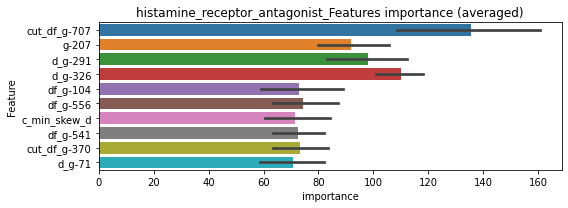

len(train_index) : 2589
len(valid_index) : 864
================================= fold 1/4 histamine_receptor_antagonist=================================


Training until validation scores don't improve for 30 rounds


len(train_index) : 2590
len(valid_index) : 863
================================= fold 2/4 histamine_receptor_antagonist=================================


Early stopping, best iteration is:
[221]	training's binary_logloss: 0.00473289	valid_1's binary_logloss: 0.0882534
Training until validation scores don't improve for 30 rounds


len(train_index) : 2590
len(valid_index) : 863
================================= fold 3/4 histamine_receptor_antagonist=================================


Early stopping, best iteration is:
[342]	training's binary_logloss: 0.00268979	valid_1's binary_logloss: 0.0580187
Training until validation scores don't improve for 30 rounds


len(train_index) : 2590
len(valid_index) : 863
================================= fold 4/4 histamine_receptor_antagonist=================================


Early stopping, best iteration is:
[222]	training's binary_logloss: 0.0046523	valid_1's binary_logloss: 0.103387
Training until validation scores don't improve for 30 rounds


histamine_receptor_antagonist logloss: 0.08543889281324372
histamine_receptor_antagonist clipping


Early stopping, best iteration is:
[245]	training's binary_logloss: 0.00392087	valid_1's binary_logloss: 0.0920937
neg labels: 3289 → selected neg labels: 3283


histone_lysine_demethylase_inhibitor, len(trt): 24, len(othr): 3283
target_rate: 0.0010078 → Adj_target_rate: 0.0012513
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00150831	valid_1's binary_logloss: 0.00452686
[600]	training's binary_logloss: 0.00036941	valid_1's binary_logloss: 0.00194886
Early stopping, best iteration is:
[589]	training's binary_logloss: 0.000369538	valid_1's binary_logloss: 0.00194836
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00152725	valid_1's binary_logloss: 0.0058137
[600]	training's binary_logloss: 0.000372328	valid_1's binary_logloss: 0.00324845
Early stopping, best iteration is:
[589]	training's binary_logloss: 0.000372657	valid_1's binary_logloss: 0.00324806
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00158108	valid_1's binary_logloss: 0.00303637
[600]	training's binary_logloss: 0.000380532	valid_1's binary_logloss: 0.00104932
Early stopping, best iteration is:
[595]	training's binary_logloss: 0.000380705	valid_1's binary

1 / 3 AUC score:1.000
y_Threshold: 0.0022799, Threshold: 0.0181342, pos_neg_ratio: 0.8000000
Remove_noisy_data: 132 → Positive_corect_labels: 656/3807
p_label_rate: 0.0100452 Vs.target_rate: 0.00101
Num_p_label: 40.0, conf_0:0.01269, conf_1:0.02357
Num_p_label: 40.0, Expected: 4.0, Adj_threshold_1: 0.0181342
Num_p_label: 26.0, Expected: 4.0, Adj_threshold_2: 0.0581342
Num_p_label: 18.0, Expected: 4.0, Adj_threshold_3: 0.0981342
Num_p_label: 13.0, Expected: 4.0, Adj_threshold_4: 0.1381342
Num_p_label: 10.0, Expected: 4.0, Adj_threshold_5: 0.1781342
threshold: 0.1781342, positive_p_label: 10.0/3982, p_label_rate: 0.0025113
positive_y_label: 656.0/3807, y_label_rate: 0.1723142
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00144265	valid_1's binary_logloss: 0.00404558
[600]	training's binary_logloss: 0.000367739	valid_1's binary_logloss: 0.00176807
Early stopping, best iteration is:
[588]	training's binary_logloss: 0.000367937	valid_1's binary_logloss: 0.00176539
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00144077	valid_1's binary_logloss: 0.00465544
[600]	training's binary_logloss: 0.000365009	valid_1's binary_logloss: 0.00248091
Early stopping, best iteration is:
[595]	training's binary_logloss: 0.000365009	valid_1's binary_logloss: 0.00248091
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00148949	valid_1's binary_logloss: 0.002801
[600]	training's binary_logloss: 0.000371531	valid_1's binary_logloss: 0.000944297
Early stopping, best iteration is:
[631]	training's binary_logloss: 0.000365545	valid_1's binar

2 / 3 AUC score:1.000
y_Threshold: 0.0661180, Threshold: 0.1781342, pos_neg_ratio: 0.8000000
Remove_noisy_data: 0 → Positive_corect_labels: 656.0/3807
p_label_rate: 0.0067805 Vs.target_rate: 0.00101
Num_p_label: 27.0, conf_0:0.14251, conf_1:0.21376
Num_p_label: 27.0, Expected: 4.0, Adj_threshold_1: 0.1781342
Num_p_label: 25.0, Expected: 4.0, Adj_threshold_2: 0.2181342
Num_p_label: 24.0, Expected: 4.0, Adj_threshold_3: 0.2581342
Num_p_label: 22.0, Expected: 4.0, Adj_threshold_4: 0.2981342
Num_p_label: 22.0, Expected: 4.0, Adj_threshold_5: 0.3381342
Num_p_label: 21.0, Expected: 4.0, Adj_threshold_6: 0.3781342
Num_p_label: 19.0, Expected: 4.0, Adj_threshold_7: 0.4181342
Num_p_label: 16.0, Expected: 4.0, Adj_threshold_8: 0.4581342
Num_p_label: 14.0, Expected: 4.0, Adj_threshold_9: 0.4981342
Num_p_label: 12.0, Expected: 4.0, Adj_threshold_10: 0.5381342
threshold: 0.5781342, positive_p_label: 9.0/3982, p_label_rate: 0.0022602
positive_y_label: 656.0/3807, y_label_rate: 0.1723142
============

Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00144265	valid_1's binary_logloss: 0.00404558
[600]	training's binary_logloss: 0.000367739	valid_1's binary_logloss: 0.00176807
Early stopping, best iteration is:
[588]	training's binary_logloss: 0.000367937	valid_1's binary_logloss: 0.00176539
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00144077	valid_1's binary_logloss: 0.00465544
[600]	training's binary_logloss: 0.000365009	valid_1's binary_logloss: 0.00248091
Early stopping, best iteration is:
[595]	training's binary_logloss: 0.000365009	valid_1's binary_logloss: 0.00248091
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00148949	valid_1's binary_logloss: 0.002801
[600]	training's binary_logloss: 0.000371531	valid_1's binary_logloss: 0.000944297
Early stopping, best iteration is:
[633]	training's binary_logloss: 0.000365545	valid_1's binar

3 / 3 AUC score:1.000
y_Threshold: 0.0661180, Threshold: 0.5781342, pos_neg_ratio: 0.8000000
Remove_noisy_data: 0 → Positive_corect_labels: 656.0/3807
p_label_rate: 0.0022602 Vs.target_rate: 0.00101
Num_p_label: 9.0, conf_0:0.50000, conf_1:0.63595
Num_p_label: 9.0, Expected: 4.0, Adj_threshold_1: 0.5781342
threshold: 0.5781342, positive_p_label: 9.0/3982, p_label_rate: 0.0022602
positive_y_label: 656.0/3807, y_label_rate: 0.1723142


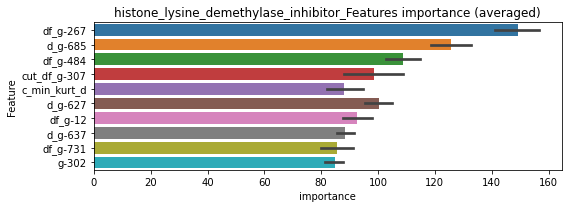

len(train_index) : 2855
len(valid_index) : 952
================================= fold 1/4 histone_lysine_demethylase_inhibitor=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[799]	training's binary_logloss: 0.000374487	valid_1's binary_logloss: 0.00167343


len(train_index) : 2855
len(valid_index) : 952
================================= fold 2/4 histone_lysine_demethylase_inhibitor=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[844]	training's binary_logloss: 0.000370425	valid_1's binary_logloss: 0.00194078


len(train_index) : 2855
len(valid_index) : 952
================================= fold 3/4 histone_lysine_demethylase_inhibitor=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[811]	training's binary_logloss: 0.000377073	valid_1's binary_logloss: 0.00114922


len(train_index) : 2856
len(valid_index) : 951
================================= fold 4/4 histone_lysine_demethylase_inhibitor=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[919]	training's binary_logloss: 0.000362072	valid_1's binary_logloss: 0.00186528


histone_lysine_demethylase_inhibitor logloss: 0.001657939995395427


neg labels: 3289 → selected neg labels: 3284


histone_lysine_methyltransferase_inhibitor, len(trt): 32, len(othr): 3284
target_rate: 0.0013437 → Adj_target_rate: 0.0015980
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00180319	valid_1's binary_logloss: 0.00872723
[600]	training's binary_logloss: 0.000408707	valid_1's binary_logloss: 0.00555062
Early stopping, best iteration is:
[575]	training's binary_logloss: 0.000424399	valid_1's binary_logloss: 0.00553035
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00176925	valid_1's binary_logloss: 0.00868993
Early stopping, best iteration is:
[569]	training's binary_logloss: 0.000432576	valid_1's binary_logloss: 0.00622325
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00186825	valid_1's binary_logloss: 0.00362228
[600]	training's binary_logloss: 0.000418536	valid_1's binary_logloss: 0.00108381
Early stopping, best iteration is:
[676]	training's binary_logloss: 0.000395992	valid_1's binary_logloss: 0.00103581
Training until validation scores don't improve for 30 round

1 / 3 AUC score:1.000
y_Threshold: 0.0026074, Threshold: 0.0084516, pos_neg_ratio: 0.8000000
Remove_noisy_data: 134 → Positive_corect_labels: 655/3806
p_label_rate: 0.0100452 Vs.target_rate: 0.00134
Num_p_label: 40.0, conf_0:0.00592, conf_1:0.01099
Num_p_label: 40.0, Expected: 5.4, Adj_threshold_1: 0.0084516
Num_p_label: 3.0, Expected: 5.4, Adj_threshold_2: 0.0484516
threshold: 0.0484516, positive_p_label: 3.0/3982, p_label_rate: 0.0007534
positive_y_label: 655.0/3806, y_label_rate: 0.1720967
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00174916	valid_1's binary_logloss: 0.00453011
[600]	training's binary_logloss: 0.000405333	valid_1's binary_logloss: 0.00186659
Early stopping, best iteration is:
[622]	training's binary_logloss: 0.000395233	valid_1's binary_logloss: 0.00184692
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00172802	valid_1's binary_logloss: 0.00773272
Early stopping, best iteration is:
[529]	training's binary_logloss: 0.00046764	valid_1's binary_logloss: 0.0056839
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00171196	valid_1's binary_logloss: 0.00713494
[600]	training's binary_logloss: 0.000405073	valid_1's binary_logloss: 0.00408473
Early stopping, best iteration is:
[663]	training's binary_logloss: 0.000384923	valid_1's binary_logloss: 0.00405874
Training until validation scores don't improve for 30 rounds


2 / 3 AUC score:1.000
y_Threshold: 0.0162189, Threshold: 0.0484516, pos_neg_ratio: 0.8000000
Remove_noisy_data: 0 → Positive_corect_labels: 655.0/3806
p_label_rate: 0.0032647 Vs.target_rate: 0.00134
Num_p_label: 13.0, conf_0:0.03876, conf_1:0.05814
Num_p_label: 13.0, Expected: 5.4, Adj_threshold_1: 0.0484516
threshold: 0.0484516, positive_p_label: 13.0/3982, p_label_rate: 0.0032647
positive_y_label: 655.0/3806, y_label_rate: 0.1720967
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00174916	valid_1's binary_logloss: 0.00453011
[600]	training's binary_logloss: 0.000405333	valid_1's binary_logloss: 0.00186659
Early stopping, best iteration is:
[622]	training's binary_logloss: 0.000395233	valid_1's binary_logloss: 0.00184692
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00172802	valid_1's binary_logloss: 0.00773272
Early stopping, best iteration is:
[529]	training's binary_logloss: 0.00046764	valid_1's binary_logloss: 0.0056839
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00171196	valid_1's binary_logloss: 0.00713494
[600]	training's binary_logloss: 0.000405073	valid_1's binary_logloss: 0.00408473
Early stopping, best iteration is:
[663]	training's binary_logloss: 0.000384923	valid_1's binary_logloss: 0.00405874
Training until validation scores don't improve for 30 rounds


3 / 3 AUC score:1.000
y_Threshold: 0.0162189, Threshold: 0.0484516, pos_neg_ratio: 0.8000000
Remove_noisy_data: 0 → Positive_corect_labels: 655.0/3806
p_label_rate: 0.0032647 Vs.target_rate: 0.00134
Num_p_label: 13.0, conf_0:0.04361, conf_1:0.05330
Num_p_label: 13.0, Expected: 5.4, Adj_threshold_1: 0.0484516
threshold: 0.0484516, positive_p_label: 13.0/3982, p_label_rate: 0.0032647
positive_y_label: 655.0/3806, y_label_rate: 0.1720967


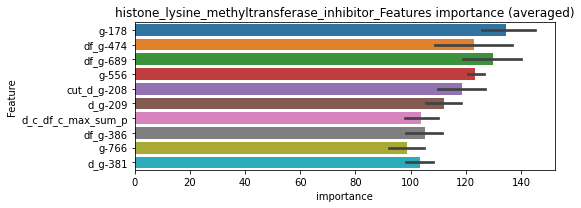

len(train_index) : 2854
len(valid_index) : 952
================================= fold 1/4 histone_lysine_methyltransferase_inhibitor=================================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.000387449	valid_1's binary_logloss: 0.00182264
Early stopping, best iteration is:
[1046]	training's binary_logloss: 0.000384027	valid_1's binary_logloss: 0.00181066


len(train_index) : 2854
len(valid_index) : 952
================================= fold 2/4 histone_lysine_methyltransferase_inhibitor=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[720]	training's binary_logloss: 0.000442169	valid_1's binary_logloss: 0.00601615


len(train_index) : 2855
len(valid_index) : 951
================================= fold 3/4 histone_lysine_methyltransferase_inhibitor=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[867]	training's binary_logloss: 0.000402059	valid_1's binary_logloss: 0.00319989


len(train_index) : 2855
len(valid_index) : 951
================================= fold 4/4 histone_lysine_methyltransferase_inhibitor=================================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.000382489	valid_1's binary_logloss: 0.00814578
Early stopping, best iteration is:
[990]	training's binary_logloss: 0.000382656	valid_1's binary_logloss: 0.00814291


histone_lysine_methyltransferase_inhibitor logloss: 0.004792995010329344


neg labels: 3289 → selected neg labels: 3280


hiv_inhibitor, len(trt): 72, len(othr): 3280
target_rate: 0.0030234 → Adj_target_rate: 0.0031837
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00454938	valid_1's binary_logloss: 0.052389
Early stopping, best iteration is:
[539]	training's binary_logloss: 0.000963393	valid_1's binary_logloss: 0.0451158
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00458536	valid_1's binary_logloss: 0.0268852
[600]	training's binary_logloss: 0.000820421	valid_1's binary_logloss: 0.0150858
Early stopping, best iteration is:
[807]	training's binary_logloss: 0.000591345	valid_1's binary_logloss: 0.0135767
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00455607	valid_1's binary_logloss: 0.0218588
[600]	training's binary_logloss: 0.000823014	valid_1's binary_logloss: 0.0144696
Early stopping, best iteration is:
[719]	training's binary_logloss: 0.000642051	valid_1's binary_logloss: 0.0138199
Training until validation scores don't improve for 30 rounds
[300]	t

1 / 3 AUC score:1.000
y_Threshold: 0.0061343, Threshold: 0.1152988, pos_neg_ratio: 0.8000000
Remove_noisy_data: 134 → Positive_corect_labels: 655/3802
p_label_rate: 0.0100452 Vs.target_rate: 0.00302
Num_p_label: 40.0, conf_0:0.08071, conf_1:0.14989
Num_p_label: 40.0, Expected: 12.0, Adj_threshold_1: 0.1152988
Num_p_label: 27.0, Expected: 12.0, Adj_threshold_2: 0.1552988
Num_p_label: 23.0, Expected: 12.0, Adj_threshold_3: 0.1952988
Num_p_label: 21.0, Expected: 12.0, Adj_threshold_4: 0.2352988
Num_p_label: 19.0, Expected: 12.0, Adj_threshold_5: 0.2752988
Num_p_label: 15.0, Expected: 12.0, Adj_threshold_6: 0.3152988
threshold: 0.3152988, positive_p_label: 15.0/3982, p_label_rate: 0.0037670
positive_y_label: 655.0/3802, y_label_rate: 0.1722777
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00410792	valid_1's binary_logloss: 0.0343157
[600]	training's binary_logloss: 0.000768687	valid_1's binary_logloss: 0.0250808
Early stopping, best iteration is:
[669]	training's binary_logloss: 0.000650122	valid_1's binary_logloss: 0.0245423
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00419761	valid_1's binary_logloss: 0.0264285
[600]	training's binary_logloss: 0.000778106	valid_1's binary_logloss: 0.0180788
Early stopping, best iteration is:
[720]	training's binary_logloss: 0.000616234	valid_1's binary_logloss: 0.0173798
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00415758	valid_1's binary_logloss: 0.0297489
[600]	training's binary_logloss: 0.000776831	valid_1's binary_logloss: 0.0198837
Early stopping, best iteration is:
[682]	training's binary_logloss: 0.000645412	valid_1's binary_loglo

2 / 3 AUC score:1.000
y_Threshold: 0.0379107, Threshold: 0.3152988, pos_neg_ratio: 0.8000000
Remove_noisy_data: 6 → Positive_corect_labels: 652.0/3796
p_label_rate: 0.0102963 Vs.target_rate: 0.00302
Num_p_label: 41.0, conf_0:0.25224, conf_1:0.37836
Num_p_label: 41.0, Expected: 12.0, Adj_threshold_1: 0.3152988
Num_p_label: 37.0, Expected: 12.0, Adj_threshold_2: 0.3552988
Num_p_label: 35.0, Expected: 12.0, Adj_threshold_3: 0.3952988
Num_p_label: 35.0, Expected: 12.0, Adj_threshold_4: 0.4352988
Num_p_label: 33.0, Expected: 12.0, Adj_threshold_5: 0.4752988
Num_p_label: 28.0, Expected: 12.0, Adj_threshold_6: 0.5152988
Num_p_label: 23.0, Expected: 12.0, Adj_threshold_7: 0.5552988
Num_p_label: 21.0, Expected: 12.0, Adj_threshold_8: 0.5952988
Num_p_label: 18.0, Expected: 12.0, Adj_threshold_9: 0.6352988
threshold: 0.6352988, positive_p_label: 18.0/3982, p_label_rate: 0.0045203
positive_y_label: 652.0/3796, y_label_rate: 0.1717597
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00415284	valid_1's binary_logloss: 0.0220035
[600]	training's binary_logloss: 0.000761093	valid_1's binary_logloss: 0.0129636
Early stopping, best iteration is:
[733]	training's binary_logloss: 0.000589143	valid_1's binary_logloss: 0.0124715
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00401876	valid_1's binary_logloss: 0.0381864
[600]	training's binary_logloss: 0.000756117	valid_1's binary_logloss: 0.028458
Early stopping, best iteration is:
[685]	training's binary_logloss: 0.000626454	valid_1's binary_logloss: 0.0280006
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00410571	valid_1's binary_logloss: 0.0187508
[600]	training's binary_logloss: 0.000782291	valid_1's binary_logloss: 0.00983221
Early stopping, best iteration is:
[729]	training's binary_logloss: 0.000605523	valid_1's binary_loglo

3 / 3 AUC score:1.000
y_Threshold: 0.0463947, Threshold: 0.6352988, pos_neg_ratio: 0.8000000
Remove_noisy_data: 2 → Positive_corect_labels: 651.0/3794
p_label_rate: 0.0060271 Vs.target_rate: 0.00302
Num_p_label: 24.0, conf_0:0.50000, conf_1:0.69883
Num_p_label: 24.0, Expected: 12.0, Adj_threshold_1: 0.6352988
Num_p_label: 18.0, Expected: 12.0, Adj_threshold_2: 0.6752988
threshold: 0.6752988, positive_p_label: 18.0/3982, p_label_rate: 0.0045203
positive_y_label: 651.0/3794, y_label_rate: 0.1715867


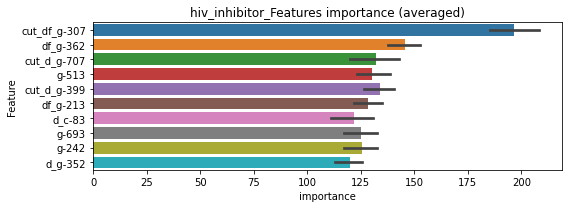

len(train_index) : 2845
len(valid_index) : 949
================================= fold 1/4 hiv_inhibitor=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[832]	training's binary_logloss: 0.000629601	valid_1's binary_logloss: 0.0150862


len(train_index) : 2845
len(valid_index) : 949
================================= fold 2/4 hiv_inhibitor=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[740]	training's binary_logloss: 0.000685713	valid_1's binary_logloss: 0.0208722


len(train_index) : 2846
len(valid_index) : 948
================================= fold 3/4 hiv_inhibitor=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[618]	training's binary_logloss: 0.000800562	valid_1's binary_logloss: 0.0250696


len(train_index) : 2846
len(valid_index) : 948
================================= fold 4/4 hiv_inhibitor=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[922]	training's binary_logloss: 0.000607199	valid_1's binary_logloss: 0.0109618


hiv_inhibitor logloss: 0.017997438865572084


neg labels: 3289 → selected neg labels: 3246


hmgcr_inhibitor, len(trt): 283, len(othr): 3246
target_rate: 0.0118838 → Adj_target_rate: 0.0101910
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0358633	valid_1's binary_logloss: 0.230029
Early stopping, best iteration is:
[445]	training's binary_logloss: 0.012823	valid_1's binary_logloss: 0.220549
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0359658	valid_1's binary_logloss: 0.250189
Early stopping, best iteration is:
[413]	training's binary_logloss: 0.016504	valid_1's binary_logloss: 0.2451
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0359805	valid_1's binary_logloss: 0.244062
Early stopping, best iteration is:
[380]	training's binary_logloss: 0.0205531	valid_1's binary_logloss: 0.239733
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.035827	valid_1's binary_logloss: 0.234425


1 / 3 AUC score:0.912
y_Threshold: 0.0673410, Threshold: 0.3816594, pos_neg_ratio: 0.8000000
Remove_noisy_data: 390 → Positive_corect_labels: 519/3505


Early stopping, best iteration is:
[437]	training's binary_logloss: 0.0137369	valid_1's binary_logloss: 0.227546


p_label_rate: 0.0100452 Vs.target_rate: 0.01188
Num_p_label: 40.0, conf_0:0.26716, conf_1:0.49616
threshold: 0.3816594, positive_p_label: 40.0/3982, p_label_rate: 0.0100452
positive_y_label: 519.0/3505, y_label_rate: 0.1480742
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0167434	valid_1's binary_logloss: 0.171882
Early stopping, best iteration is:
[487]	training's binary_logloss: 0.00433341	valid_1's binary_logloss: 0.163848
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0179405	valid_1's binary_logloss: 0.159597
Early stopping, best iteration is:
[558]	training's binary_logloss: 0.00311411	valid_1's binary_logloss: 0.147442
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0167021	valid_1's binary_logloss: 0.159044
Early stopping, best iteration is:
[456]	training's binary_logloss: 0.00518738	valid_1's binary_logloss: 0.145462
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0181798	valid_1's binary_logloss: 0.141694
Early stopping, best iteration is:
[554]	training's binary_logloss: 0.00325124	valid_1's binary_loglos

2 / 3 AUC score:0.975
y_Threshold: 0.0527843, Threshold: 0.3816594, pos_neg_ratio: 0.8000000
Remove_noisy_data: 130 → Positive_corect_labels: 454.0/3375
p_label_rate: 0.0133099 Vs.target_rate: 0.01188
Num_p_label: 53.0, conf_0:0.30533, conf_1:0.45799
threshold: 0.3816594, positive_p_label: 53.0/3982, p_label_rate: 0.0133099
positive_y_label: 454.0/3375, y_label_rate: 0.1345185
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0125868	valid_1's binary_logloss: 0.143048
Early stopping, best iteration is:
[499]	training's binary_logloss: 0.00306087	valid_1's binary_logloss: 0.131749
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0132768	valid_1's binary_logloss: 0.0991846
[600]	training's binary_logloss: 0.00204587	valid_1's binary_logloss: 0.0770328
Early stopping, best iteration is:
[737]	training's binary_logloss: 0.00137331	valid_1's binary_logloss: 0.0742061
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0128979	valid_1's binary_logloss: 0.10252
[600]	training's binary_logloss: 0.00199491	valid_1's binary_logloss: 0.0837132
Early stopping, best iteration is:
[626]	training's binary_logloss: 0.00182975	valid_1's binary_logloss: 0.0832401
Training until validation scores don't improve for 30 rounds
[300]	training's b

3 / 3 AUC score:0.994
y_Threshold: 0.0507323, Threshold: 0.3816594, pos_neg_ratio: 0.8000000
Remove_noisy_data: 60 → Positive_corect_labels: 424.0/3315
p_label_rate: 0.0138122 Vs.target_rate: 0.01188
Num_p_label: 55.0, conf_0:0.34349, conf_1:0.41983
threshold: 0.3816594, positive_p_label: 55.0/3982, p_label_rate: 0.0138122
positive_y_label: 424.0/3315, y_label_rate: 0.1279035


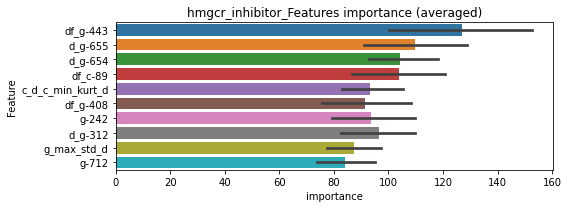

len(train_index) : 2486
len(valid_index) : 829
================================= fold 1/4 hmgcr_inhibitor=================================


Training until validation scores don't improve for 30 rounds


len(train_index) : 2486
len(valid_index) : 829
================================= fold 2/4 hmgcr_inhibitor=================================


Early stopping, best iteration is:
[387]	training's binary_logloss: 0.00260702	valid_1's binary_logloss: 0.10499
Training until validation scores don't improve for 30 rounds


len(train_index) : 2486
len(valid_index) : 829
================================= fold 3/4 hmgcr_inhibitor=================================


Early stopping, best iteration is:
[503]	training's binary_logloss: 0.00188993	valid_1's binary_logloss: 0.0926019
Training until validation scores don't improve for 30 rounds


len(train_index) : 2487
len(valid_index) : 828
================================= fold 4/4 hmgcr_inhibitor=================================


Early stopping, best iteration is:
[191]	training's binary_logloss: 0.00727	valid_1's binary_logloss: 0.112314
Training until validation scores don't improve for 30 rounds


hmgcr_inhibitor logloss: 0.09872287600901064
hmgcr_inhibitor clipping


Early stopping, best iteration is:
[385]	training's binary_logloss: 0.00265495	valid_1's binary_logloss: 0.0849687
neg labels: 3289 → selected neg labels: 3272


hsp_inhibitor, len(trt): 93, len(othr): 3272
target_rate: 0.0039053 → Adj_target_rate: 0.0039574
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00733677	valid_1's binary_logloss: 0.0612512
Early stopping, best iteration is:
[539]	training's binary_logloss: 0.00143226	valid_1's binary_logloss: 0.0538294
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00737524	valid_1's binary_logloss: 0.0423781
[600]	training's binary_logloss: 0.00117329	valid_1's binary_logloss: 0.0289246
Early stopping, best iteration is:
[808]	training's binary_logloss: 0.000750175	valid_1's binary_logloss: 0.0277566
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00729076	valid_1's binary_logloss: 0.0387976
[600]	training's binary_logloss: 0.00116792	valid_1's binary_logloss: 0.0231028
Early stopping, best iteration is:
[721]	training's binary_logloss: 0.000858704	valid_1's binary_logloss: 0.0221172
Training until validation scores don't improve for 30 rounds
[300]	tra

1 / 3 AUC score:0.999
y_Threshold: 0.0121008, Threshold: 0.1835828, pos_neg_ratio: 0.8000000
Remove_noisy_data: 144 → Positive_corect_labels: 648/3782
p_label_rate: 0.0100452 Vs.target_rate: 0.00391
Num_p_label: 40.0, conf_0:0.12851, conf_1:0.23866
Num_p_label: 40.0, Expected: 15.6, Adj_threshold_1: 0.1835828
Num_p_label: 30.0, Expected: 15.6, Adj_threshold_2: 0.2235828
Num_p_label: 24.0, Expected: 15.6, Adj_threshold_3: 0.2635828
Num_p_label: 20.0, Expected: 15.6, Adj_threshold_4: 0.3035828
threshold: 0.3035828, positive_p_label: 20.0/3982, p_label_rate: 0.0050226
positive_y_label: 648.0/3782, y_label_rate: 0.1713379
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00582562	valid_1's binary_logloss: 0.0542209
[600]	training's binary_logloss: 0.00101169	valid_1's binary_logloss: 0.0431011
Early stopping, best iteration is:
[590]	training's binary_logloss: 0.00104349	valid_1's binary_logloss: 0.0430261
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00578829	valid_1's binary_logloss: 0.0448188
[600]	training's binary_logloss: 0.00101465	valid_1's binary_logloss: 0.0349597
Early stopping, best iteration is:
[690]	training's binary_logloss: 0.000809783	valid_1's binary_logloss: 0.034506
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00595773	valid_1's binary_logloss: 0.0377872
[600]	training's binary_logloss: 0.00105179	valid_1's binary_logloss: 0.0293531
Early stopping, best iteration is:
[707]	training's binary_logloss: 0.000810925	valid_1's binary_logloss: 0

2 / 3 AUC score:0.999
y_Threshold: 0.0633786, Threshold: 0.3035828, pos_neg_ratio: 0.8000000
Remove_noisy_data: 20 → Positive_corect_labels: 638.0/3762
p_label_rate: 0.0208438 Vs.target_rate: 0.00391
Num_p_label: 83.0, conf_0:0.24287, conf_1:0.36430
Num_p_label: 83.0, Expected: 15.6, Adj_threshold_1: 0.3035828
Num_p_label: 77.0, Expected: 15.6, Adj_threshold_2: 0.3435828
Num_p_label: 74.0, Expected: 15.6, Adj_threshold_3: 0.3835828
Num_p_label: 67.0, Expected: 15.6, Adj_threshold_4: 0.4235828
Num_p_label: 53.0, Expected: 15.6, Adj_threshold_5: 0.4635828
Num_p_label: 51.0, Expected: 15.6, Adj_threshold_6: 0.5035828
Num_p_label: 49.0, Expected: 15.6, Adj_threshold_7: 0.5435828
Num_p_label: 46.0, Expected: 15.6, Adj_threshold_8: 0.5835828
Num_p_label: 36.0, Expected: 15.6, Adj_threshold_9: 0.6235828
Num_p_label: 29.0, Expected: 15.6, Adj_threshold_10: 0.6635828
threshold: 0.7035828, positive_p_label: 24.0/3982, p_label_rate: 0.0060271
positive_y_label: 638.0/3762, y_label_rate: 0.1695906


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00478808	valid_1's binary_logloss: 0.0355875
[600]	training's binary_logloss: 0.000917143	valid_1's binary_logloss: 0.0269293
Early stopping, best iteration is:
[638]	training's binary_logloss: 0.00083397	valid_1's binary_logloss: 0.0266617
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0053433	valid_1's binary_logloss: 0.0319051
[600]	training's binary_logloss: 0.000957702	valid_1's binary_logloss: 0.0212143
Early stopping, best iteration is:
[816]	training's binary_logloss: 0.000651096	valid_1's binary_logloss: 0.0198078
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00580828	valid_1's binary_logloss: 0.026523
[600]	training's binary_logloss: 0.00101001	valid_1's binary_logloss: 0.0144897
Early stopping, best iteration is:
[812]	training's binary_logloss: 0.000676604	valid_1's binary_logloss: 

3 / 3 AUC score:1.000
y_Threshold: 0.0928827, Threshold: 0.7035828, pos_neg_ratio: 0.8000000
Remove_noisy_data: 12 → Positive_corect_labels: 632.0/3750
p_label_rate: 0.0100452 Vs.target_rate: 0.00391
Num_p_label: 40.0, conf_0:0.50000, conf_1:0.77394
Num_p_label: 40.0, Expected: 15.6, Adj_threshold_1: 0.7035828
Num_p_label: 34.0, Expected: 15.6, Adj_threshold_2: 0.7435828
Num_p_label: 29.0, Expected: 15.6, Adj_threshold_3: 0.7835828
Num_p_label: 19.0, Expected: 15.6, Adj_threshold_4: 0.8235828
threshold: 0.8235828, positive_p_label: 19.0/3982, p_label_rate: 0.0047715
positive_y_label: 632.0/3750, y_label_rate: 0.1685333


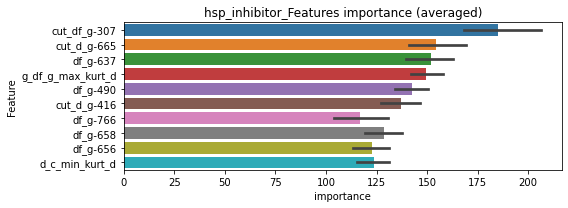

len(train_index) : 2812
len(valid_index) : 938
================================= fold 1/4 hsp_inhibitor=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[828]	training's binary_logloss: 0.000730655	valid_1's binary_logloss: 0.0206997


len(train_index) : 2812
len(valid_index) : 938
================================= fold 2/4 hsp_inhibitor=================================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.000675538	valid_1's binary_logloss: 0.0114816
Early stopping, best iteration is:
[1096]	training's binary_logloss: 0.000649108	valid_1's binary_logloss: 0.0113677


len(train_index) : 2813
len(valid_index) : 937
================================= fold 3/4 hsp_inhibitor=================================


Training until validation scores don't improve for 30 rounds


len(train_index) : 2813
len(valid_index) : 937
================================= fold 4/4 hsp_inhibitor=================================


Early stopping, best iteration is:
[439]	training's binary_logloss: 0.00134288	valid_1's binary_logloss: 0.0392188
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[697]	training's binary_logloss: 0.000851241	valid_1's binary_logloss: 0.0172473


hsp_inhibitor logloss: 0.022130657687941205
hsp_inhibitor clipping


neg labels: 3289 → selected neg labels: 3283


igf-1_inhibitor, len(trt): 37, len(othr): 3283
target_rate: 0.0015537 → Adj_target_rate: 0.0018079
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00220546	valid_1's binary_logloss: 0.0272309
[600]	training's binary_logloss: 0.000468605	valid_1's binary_logloss: 0.0208964
Early stopping, best iteration is:
[604]	training's binary_logloss: 0.000464331	valid_1's binary_logloss: 0.0207946
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0022287	valid_1's binary_logloss: 0.0104156
[600]	training's binary_logloss: 0.00047867	valid_1's binary_logloss: 0.00684837
Early stopping, best iteration is:
[630]	training's binary_logloss: 0.000458218	valid_1's binary_logloss: 0.00681901
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00231913	valid_1's binary_logloss: 0.0060254
[600]	training's binary_logloss: 0.00048361	valid_1's binary_logloss: 0.00220886
Early stopping, best iteration is:
[608]	training's binary_logloss: 0.000476646	valid_1's binary_loglo

1 / 3 AUC score:1.000
y_Threshold: 0.0031281, Threshold: 0.0203767, pos_neg_ratio: 0.8000000
Remove_noisy_data: 132 → Positive_corect_labels: 656/3807
p_label_rate: 0.0100452 Vs.target_rate: 0.00155
Num_p_label: 40.0, conf_0:0.01426, conf_1:0.02649
Num_p_label: 40.0, Expected: 6.2, Adj_threshold_1: 0.0203767
Num_p_label: 13.0, Expected: 6.2, Adj_threshold_2: 0.0603767
threshold: 0.0603767, positive_p_label: 13.0/3982, p_label_rate: 0.0032647
positive_y_label: 656.0/3807, y_label_rate: 0.1723142
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0020505	valid_1's binary_logloss: 0.0233294
[600]	training's binary_logloss: 0.000443665	valid_1's binary_logloss: 0.0169128
Early stopping, best iteration is:
[588]	training's binary_logloss: 0.00045318	valid_1's binary_logloss: 0.0168764
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00208037	valid_1's binary_logloss: 0.00999667
[600]	training's binary_logloss: 0.000457089	valid_1's binary_logloss: 0.00656152
Early stopping, best iteration is:
[614]	training's binary_logloss: 0.000448516	valid_1's binary_logloss: 0.00652146
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00219241	valid_1's binary_logloss: 0.00584329
[600]	training's binary_logloss: 0.000471476	valid_1's binary_logloss: 0.00203399
Early stopping, best iteration is:
[683]	training's binary_logloss: 0.000441782	valid_1's binary_lo

2 / 3 AUC score:1.000
y_Threshold: 0.0336809, Threshold: 0.0603767, pos_neg_ratio: 0.8000000
Remove_noisy_data: 4 → Positive_corect_labels: 654.0/3803


Early stopping, best iteration is:
[541]	training's binary_logloss: 0.000512798	valid_1's binary_logloss: 0.0122071


p_label_rate: 0.0113009 Vs.target_rate: 0.00155
Num_p_label: 45.0, conf_0:0.04830, conf_1:0.07245
Num_p_label: 45.0, Expected: 6.2, Adj_threshold_1: 0.0603767
Num_p_label: 31.0, Expected: 6.2, Adj_threshold_2: 0.1003767
Num_p_label: 21.0, Expected: 6.2, Adj_threshold_3: 0.1403767
Num_p_label: 18.0, Expected: 6.2, Adj_threshold_4: 0.1803767
Num_p_label: 15.0, Expected: 6.2, Adj_threshold_5: 0.2203767
threshold: 0.2203767, positive_p_label: 15.0/3982, p_label_rate: 0.0037670
positive_y_label: 654.0/3803, y_label_rate: 0.1719695
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00204598	valid_1's binary_logloss: 0.0116074
[600]	training's binary_logloss: 0.000447778	valid_1's binary_logloss: 0.00719245
Early stopping, best iteration is:
[631]	training's binary_logloss: 0.000427719	valid_1's binary_logloss: 0.00714957
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00206744	valid_1's binary_logloss: 0.0123936
[600]	training's binary_logloss: 0.000454049	valid_1's binary_logloss: 0.0078872
Early stopping, best iteration is:
[624]	training's binary_logloss: 0.000438666	valid_1's binary_logloss: 0.00785134
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00201301	valid_1's binary_logloss: 0.0168419
[600]	training's binary_logloss: 0.000448403	valid_1's binary_logloss: 0.0122838
Early stopping, best iteration is:
[589]	training's binary_logloss: 0.000455531	valid_1's binary_lo

3 / 3 AUC score:1.000
y_Threshold: 0.0368109, Threshold: 0.2203767, pos_neg_ratio: 0.8000000
Remove_noisy_data: 0 → Positive_corect_labels: 654.0/3803
p_label_rate: 0.0030136 Vs.target_rate: 0.00155
Num_p_label: 12.0, conf_0:0.19834, conf_1:0.24241
Num_p_label: 12.0, Expected: 6.2, Adj_threshold_1: 0.2203767
threshold: 0.2203767, positive_p_label: 12.0/3982, p_label_rate: 0.0030136
positive_y_label: 654.0/3803, y_label_rate: 0.1719695


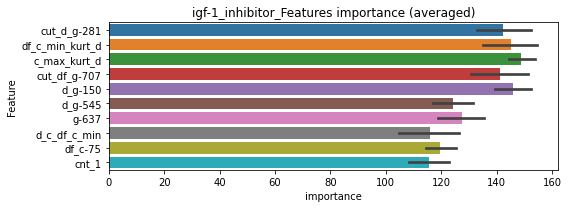

len(train_index) : 2852
len(valid_index) : 951
================================= fold 1/4 igf-1_inhibitor=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[740]	training's binary_logloss: 0.000474072	valid_1's binary_logloss: 0.00818758


len(train_index) : 2852
len(valid_index) : 951
================================= fold 2/4 igf-1_inhibitor=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[895]	training's binary_logloss: 0.00043951	valid_1's binary_logloss: 0.00571969


len(train_index) : 2852
len(valid_index) : 951
================================= fold 3/4 igf-1_inhibitor=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[712]	training's binary_logloss: 0.000483997	valid_1's binary_logloss: 0.0110715


len(train_index) : 2853
len(valid_index) : 950
================================= fold 4/4 igf-1_inhibitor=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[879]	training's binary_logloss: 0.000436754	valid_1's binary_logloss: 0.00619039


igf-1_inhibitor logloss: 0.007794402582329777


neg labels: 3289 → selected neg labels: 3285


ikk_inhibitor, len(trt): 30, len(othr): 3285
target_rate: 0.0012598 → Adj_target_rate: 0.0015127
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00146137	valid_1's binary_logloss: 0.0112098
[600]	training's binary_logloss: 0.000363966	valid_1's binary_logloss: 0.00729088
Early stopping, best iteration is:
[611]	training's binary_logloss: 0.000361905	valid_1's binary_logloss: 0.00728083
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00149911	valid_1's binary_logloss: 0.00438597
[600]	training's binary_logloss: 0.00036813	valid_1's binary_logloss: 0.0017626
Early stopping, best iteration is:
[625]	training's binary_logloss: 0.000361284	valid_1's binary_logloss: 0.00174664
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0015182	valid_1's binary_logloss: 0.00496268
[600]	training's binary_logloss: 0.000370452	valid_1's binary_logloss: 0.00266497
Early stopping, best iteration is:
[684]	training's binary_logloss: 0.000353775	valid_1's binary_l

1 / 3 AUC score:1.000
y_Threshold: 0.0028093, Threshold: 0.0112822, pos_neg_ratio: 0.8000000
Remove_noisy_data: 132 → Positive_corect_labels: 657/3810
p_label_rate: 0.0100452 Vs.target_rate: 0.00126
Num_p_label: 40.0, conf_0:0.00790, conf_1:0.01467
Num_p_label: 40.0, Expected: 5.0, Adj_threshold_1: 0.0112822
Num_p_label: 3.0, Expected: 5.0, Adj_threshold_2: 0.0512822
threshold: 0.0512822, positive_p_label: 3.0/3982, p_label_rate: 0.0007534
positive_y_label: 657.0/3810, y_label_rate: 0.1724409
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00131969	valid_1's binary_logloss: 0.0120051
[600]	training's binary_logloss: 0.000353108	valid_1's binary_logloss: 0.00823187
Early stopping, best iteration is:
[585]	training's binary_logloss: 0.000357061	valid_1's binary_logloss: 0.00818776
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00135689	valid_1's binary_logloss: 0.00386375
[600]	training's binary_logloss: 0.000354651	valid_1's binary_logloss: 0.00152092
Early stopping, best iteration is:
[668]	training's binary_logloss: 0.000343223	valid_1's binary_logloss: 0.0014941
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00138973	valid_1's binary_logloss: 0.0032355
[600]	training's binary_logloss: 0.000355403	valid_1's binary_logloss: 0.00107739
Early stopping, best iteration is:
[637]	training's binary_logloss: 0.000348143	valid_1's binary_

2 / 3 AUC score:1.000
y_Threshold: 0.0354728, Threshold: 0.0512822, pos_neg_ratio: 0.8000000
Remove_noisy_data: 0 → Positive_corect_labels: 657.0/3810
p_label_rate: 0.0060271 Vs.target_rate: 0.00126
Num_p_label: 24.0, conf_0:0.04103, conf_1:0.06154
Num_p_label: 24.0, Expected: 5.0, Adj_threshold_1: 0.0512822
Num_p_label: 9.0, Expected: 5.0, Adj_threshold_2: 0.0912822
threshold: 0.0912822, positive_p_label: 9.0/3982, p_label_rate: 0.0022602
positive_y_label: 657.0/3810, y_label_rate: 0.1724409
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00131969	valid_1's binary_logloss: 0.0120051
[600]	training's binary_logloss: 0.000353108	valid_1's binary_logloss: 0.00823187
Early stopping, best iteration is:
[585]	training's binary_logloss: 0.000357061	valid_1's binary_logloss: 0.00818776
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00135689	valid_1's binary_logloss: 0.00386375
[600]	training's binary_logloss: 0.000354651	valid_1's binary_logloss: 0.00152092
Early stopping, best iteration is:
[669]	training's binary_logloss: 0.000343223	valid_1's binary_logloss: 0.0014941
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00138973	valid_1's binary_logloss: 0.0032355
[600]	training's binary_logloss: 0.000355403	valid_1's binary_logloss: 0.00107739
Early stopping, best iteration is:
[637]	training's binary_logloss: 0.000348143	valid_1's binary_

3 / 3 AUC score:1.000
y_Threshold: 0.0354728, Threshold: 0.0912822, pos_neg_ratio: 0.8000000
Remove_noisy_data: 0 → Positive_corect_labels: 657.0/3810
p_label_rate: 0.0022602 Vs.target_rate: 0.00126
Num_p_label: 9.0, conf_0:0.08215, conf_1:0.10041
Num_p_label: 9.0, Expected: 5.0, Adj_threshold_1: 0.0912822
threshold: 0.0912822, positive_p_label: 9.0/3982, p_label_rate: 0.0022602
positive_y_label: 657.0/3810, y_label_rate: 0.1724409


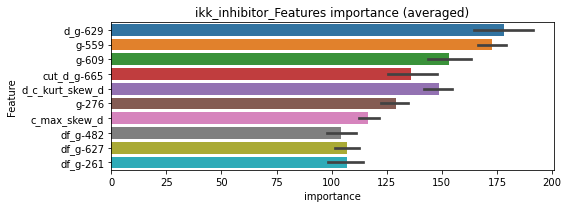

len(train_index) : 2857
len(valid_index) : 953
================================= fold 1/4 ikk_inhibitor=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[859]	training's binary_logloss: 0.000363699	valid_1's binary_logloss: 0.00737772


len(train_index) : 2857
len(valid_index) : 953
================================= fold 2/4 ikk_inhibitor=================================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.000348624	valid_1's binary_logloss: 0.00137663
Early stopping, best iteration is:
[1053]	training's binary_logloss: 0.000345052	valid_1's binary_logloss: 0.00137238


len(train_index) : 2858
len(valid_index) : 952
================================= fold 3/4 ikk_inhibitor=================================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.000349338	valid_1's binary_logloss: 0.000987008
Early stopping, best iteration is:
[997]	training's binary_logloss: 0.000349338	valid_1's binary_logloss: 0.000987008


len(train_index) : 2858
len(valid_index) : 952
================================= fold 4/4 ikk_inhibitor=================================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.000350855	valid_1's binary_logloss: 0.00125074
Early stopping, best iteration is:
[1103]	training's binary_logloss: 0.000344751	valid_1's binary_logloss: 0.00123328


ikk_inhibitor logloss: 0.002743501190030787


neg labels: 3289 → selected neg labels: 3286


imidazoline_receptor_agonist, len(trt): 31, len(othr): 3286
target_rate: 0.0013018 → Adj_target_rate: 0.0015554
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0013666	valid_1's binary_logloss: 0.00746541
[600]	training's binary_logloss: 0.000367533	valid_1's binary_logloss: 0.00495782
Early stopping, best iteration is:
[588]	training's binary_logloss: 0.000367973	valid_1's binary_logloss: 0.00495265
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00134716	valid_1's binary_logloss: 0.0130005
[600]	training's binary_logloss: 0.000357926	valid_1's binary_logloss: 0.0101011
Early stopping, best iteration is:
[619]	training's binary_logloss: 0.00035391	valid_1's binary_logloss: 0.0100514
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00141136	valid_1's binary_logloss: 0.00354288
[600]	training's binary_logloss: 0.000372993	valid_1's binary_logloss: 0.00166581
Early stopping, best iteration is:
[576]	training's binary_logloss: 0.000377835	valid_1's binary_lo

1 / 3 AUC score:1.000
y_Threshold: 0.0021297, Threshold: 0.0137598, pos_neg_ratio: 0.8000000
Remove_noisy_data: 132 → Positive_corect_labels: 657/3811
p_label_rate: 0.0100452 Vs.target_rate: 0.00130
Num_p_label: 40.0, conf_0:0.00963, conf_1:0.01789
Num_p_label: 40.0, Expected: 5.2, Adj_threshold_1: 0.0137598
Num_p_label: 11.0, Expected: 5.2, Adj_threshold_2: 0.0537598
threshold: 0.0537598, positive_p_label: 11.0/3982, p_label_rate: 0.0027624
positive_y_label: 657.0/3811, y_label_rate: 0.1723957
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00128329	valid_1's binary_logloss: 0.00818467
[600]	training's binary_logloss: 0.000353674	valid_1's binary_logloss: 0.00586005
Early stopping, best iteration is:
[578]	training's binary_logloss: 0.00035685	valid_1's binary_logloss: 0.00585206
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00125413	valid_1's binary_logloss: 0.0138637
[600]	training's binary_logloss: 0.000343188	valid_1's binary_logloss: 0.0109721
Early stopping, best iteration is:
[620]	training's binary_logloss: 0.00033981	valid_1's binary_logloss: 0.0109288
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00130286	valid_1's binary_logloss: 0.00269925
[600]	training's binary_logloss: 0.000360609	valid_1's binary_logloss: 0.0011513
Early stopping, best iteration is:
[578]	training's binary_logloss: 0.000363378	valid_1's binary_log

2 / 3 AUC score:1.000
y_Threshold: 0.0221612, Threshold: 0.0537598, pos_neg_ratio: 0.8000000
Remove_noisy_data: 0 → Positive_corect_labels: 657.0/3811
p_label_rate: 0.0065294 Vs.target_rate: 0.00130
Num_p_label: 26.0, conf_0:0.04301, conf_1:0.06451
Num_p_label: 26.0, Expected: 5.2, Adj_threshold_1: 0.0537598
Num_p_label: 17.0, Expected: 5.2, Adj_threshold_2: 0.0937598
Num_p_label: 10.0, Expected: 5.2, Adj_threshold_3: 0.1337598
threshold: 0.1337598, positive_p_label: 10.0/3982, p_label_rate: 0.0025113
positive_y_label: 657.0/3811, y_label_rate: 0.1723957
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00128329	valid_1's binary_logloss: 0.00818467
[600]	training's binary_logloss: 0.000353674	valid_1's binary_logloss: 0.00586005
Early stopping, best iteration is:
[578]	training's binary_logloss: 0.00035685	valid_1's binary_logloss: 0.00585206
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00125413	valid_1's binary_logloss: 0.0138637
[600]	training's binary_logloss: 0.000343188	valid_1's binary_logloss: 0.0109721
Early stopping, best iteration is:
[620]	training's binary_logloss: 0.00033981	valid_1's binary_logloss: 0.0109288
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00130286	valid_1's binary_logloss: 0.00269925
[600]	training's binary_logloss: 0.000360609	valid_1's binary_logloss: 0.0011513
Early stopping, best iteration is:
[578]	training's binary_logloss: 0.000363378	valid_1's binary_log

3 / 3 AUC score:1.000
y_Threshold: 0.0221612, Threshold: 0.1337598, pos_neg_ratio: 0.8000000
Remove_noisy_data: 0 → Positive_corect_labels: 657.0/3811
p_label_rate: 0.0025113 Vs.target_rate: 0.00130
Num_p_label: 10.0, conf_0:0.12038, conf_1:0.14714
Num_p_label: 10.0, Expected: 5.2, Adj_threshold_1: 0.1337598
threshold: 0.1337598, positive_p_label: 10.0/3982, p_label_rate: 0.0025113
positive_y_label: 657.0/3811, y_label_rate: 0.1723957


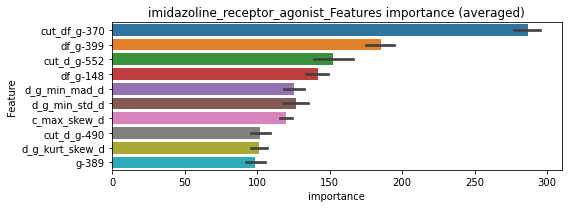

len(train_index) : 2858
len(valid_index) : 953
================================= fold 1/4 imidazoline_receptor_agonist=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[804]	training's binary_logloss: 0.000368926	valid_1's binary_logloss: 0.00359373


len(train_index) : 2858
len(valid_index) : 953
================================= fold 2/4 imidazoline_receptor_agonist=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[777]	training's binary_logloss: 0.000370099	valid_1's binary_logloss: 0.013332


len(train_index) : 2858
len(valid_index) : 953
================================= fold 3/4 imidazoline_receptor_agonist=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[908]	training's binary_logloss: 0.000366547	valid_1's binary_logloss: 0.0013647


len(train_index) : 2859
len(valid_index) : 952
================================= fold 4/4 imidazoline_receptor_agonist=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[787]	training's binary_logloss: 0.000375781	valid_1's binary_logloss: 0.00220763


imidazoline_receptor_agonist logloss: 0.005126117776647465


neg labels: 3289 → selected neg labels: 3279


immunosuppressant, len(trt): 73, len(othr): 3279
target_rate: 0.0030654 → Adj_target_rate: 0.0032212
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00523277	valid_1's binary_logloss: 0.0333735
[600]	training's binary_logloss: 0.000864979	valid_1's binary_logloss: 0.0233757
Early stopping, best iteration is:
[623]	training's binary_logloss: 0.000809142	valid_1's binary_logloss: 0.0232474
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00571457	valid_1's binary_logloss: 0.0413213
[600]	training's binary_logloss: 0.000903348	valid_1's binary_logloss: 0.0298315
Early stopping, best iteration is:
[731]	training's binary_logloss: 0.00066851	valid_1's binary_logloss: 0.0288429
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0053727	valid_1's binary_logloss: 0.031784
[600]	training's binary_logloss: 0.000884036	valid_1's binary_logloss: 0.021529
Early stopping, best iteration is:
[679]	training's binary_logloss: 0.00072375	valid_1's binary_logloss: 0

1 / 3 AUC score:1.000
y_Threshold: 0.0060689, Threshold: 0.0160881, pos_neg_ratio: 0.8000000
Remove_noisy_data: 134 → Positive_corect_labels: 654/3800
p_label_rate: 0.0100452 Vs.target_rate: 0.00307
Num_p_label: 40.0, conf_0:0.01126, conf_1:0.02091
Num_p_label: 40.0, Expected: 12.2, Adj_threshold_1: 0.0160881
Num_p_label: 3.0, Expected: 12.2, Adj_threshold_2: 0.0560881
threshold: 0.0560881, positive_p_label: 3.0/3982, p_label_rate: 0.0007534
positive_y_label: 654.0/3800, y_label_rate: 0.1721053
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00464456	valid_1's binary_logloss: 0.0317273
[600]	training's binary_logloss: 0.000829461	valid_1's binary_logloss: 0.0232996
Early stopping, best iteration is:
[632]	training's binary_logloss: 0.000758819	valid_1's binary_logloss: 0.0230475
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0047888	valid_1's binary_logloss: 0.0337451
[600]	training's binary_logloss: 0.000836634	valid_1's binary_logloss: 0.023979
Early stopping, best iteration is:
[747]	training's binary_logloss: 0.000614731	valid_1's binary_logloss: 0.0231783
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00508793	valid_1's binary_logloss: 0.0235504
[600]	training's binary_logloss: 0.000871764	valid_1's binary_logloss: 0.0132544
Early stopping, best iteration is:
[729]	training's binary_logloss: 0.000650193	valid_1's binary_logloss

2 / 3 AUC score:1.000
y_Threshold: 0.0297476, Threshold: 0.0560881, pos_neg_ratio: 0.8000000
Remove_noisy_data: 4 → Positive_corect_labels: 652.0/3796
p_label_rate: 0.0022602 Vs.target_rate: 0.00307
Num_p_label: 9.0, conf_0:0.04487, conf_1:0.06731
threshold: 0.0560881, positive_p_label: 9.0/3982, p_label_rate: 0.0022602
positive_y_label: 652.0/3796, y_label_rate: 0.1717597
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00491544	valid_1's binary_logloss: 0.0275157
[600]	training's binary_logloss: 0.000845732	valid_1's binary_logloss: 0.0180865
Early stopping, best iteration is:
[770]	training's binary_logloss: 0.000600265	valid_1's binary_logloss: 0.0168404
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00447183	valid_1's binary_logloss: 0.0329846
[600]	training's binary_logloss: 0.000809692	valid_1's binary_logloss: 0.0240394
Early stopping, best iteration is:
[776]	training's binary_logloss: 0.000582447	valid_1's binary_logloss: 0.0233603
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00483257	valid_1's binary_logloss: 0.0257137
[600]	training's binary_logloss: 0.000849349	valid_1's binary_logloss: 0.0176598
Early stopping, best iteration is:
[738]	training's binary_logloss: 0.000629366	valid_1's binary_loglo

3 / 3 AUC score:1.000
y_Threshold: 0.0219725, Threshold: 0.0560881, pos_neg_ratio: 0.8000000
Remove_noisy_data: 4 → Positive_corect_labels: 650.0/3792
p_label_rate: 0.0017579 Vs.target_rate: 0.00307
Num_p_label: 7.0, conf_0:0.05048, conf_1:0.06170
Num_p_label: 7.0, Expected: 12.2, Adj_threshold_1: 0.0560881
threshold: 0.0560881, positive_p_label: 7.0/3982, p_label_rate: 0.0017579
positive_y_label: 650.0/3792, y_label_rate: 0.1714135


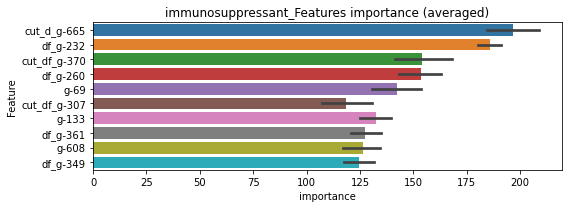

len(train_index) : 2844
len(valid_index) : 948
================================= fold 1/4 immunosuppressant=================================


Training until validation scores don't improve for 30 rounds


len(train_index) : 2844
len(valid_index) : 948
================================= fold 2/4 immunosuppressant=================================


Early stopping, best iteration is:
[451]	training's binary_logloss: 0.0011598	valid_1's binary_logloss: 0.0221489
Training until validation scores don't improve for 30 rounds


len(train_index) : 2844
len(valid_index) : 948
================================= fold 3/4 immunosuppressant=================================


Early stopping, best iteration is:
[475]	training's binary_logloss: 0.00108827	valid_1's binary_logloss: 0.0349134
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[891]	training's binary_logloss: 0.000635122	valid_1's binary_logloss: 0.0152997


len(train_index) : 2844
len(valid_index) : 948
================================= fold 4/4 immunosuppressant=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[652]	training's binary_logloss: 0.000801632	valid_1's binary_logloss: 0.022299


immunosuppressant logloss: 0.02366527203104006
immunosuppressant clipping


neg labels: 3289 → selected neg labels: 3284


insulin_secretagogue, len(trt): 30, len(othr): 3284
target_rate: 0.0012598 → Adj_target_rate: 0.0015127
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00156335	valid_1's binary_logloss: 0.0125481
Early stopping, best iteration is:
[481]	training's binary_logloss: 0.000527141	valid_1's binary_logloss: 0.00992549
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00163823	valid_1's binary_logloss: 0.0069982
[600]	training's binary_logloss: 0.000418725	valid_1's binary_logloss: 0.00408867
Early stopping, best iteration is:
[579]	training's binary_logloss: 0.000425362	valid_1's binary_logloss: 0.00407911
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00176261	valid_1's binary_logloss: 0.00365402
[600]	training's binary_logloss: 0.000425127	valid_1's binary_logloss: 0.00150691
Early stopping, best iteration is:
[591]	training's binary_logloss: 0.000426028	valid_1's binary_logloss: 0.00150522
Training until validation scores don't improve for 30 rounds


1 / 3 AUC score:1.000
y_Threshold: 0.0025718, Threshold: 0.0107279, pos_neg_ratio: 0.8000000
Remove_noisy_data: 132 → Positive_corect_labels: 656/3808
p_label_rate: 0.0100452 Vs.target_rate: 0.00126
Num_p_label: 40.0, conf_0:0.00751, conf_1:0.01395
Num_p_label: 40.0, Expected: 5.0, Adj_threshold_1: 0.0107279
Num_p_label: 6.0, Expected: 5.0, Adj_threshold_2: 0.0507279
threshold: 0.0507279, positive_p_label: 6.0/3982, p_label_rate: 0.0015068
positive_y_label: 656.0/3808, y_label_rate: 0.1722689
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0014851	valid_1's binary_logloss: 0.0120503
Early stopping, best iteration is:
[536]	training's binary_logloss: 0.000435514	valid_1's binary_logloss: 0.0097733
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00161672	valid_1's binary_logloss: 0.00642143
[600]	training's binary_logloss: 0.000404301	valid_1's binary_logloss: 0.0035609
Early stopping, best iteration is:
[610]	training's binary_logloss: 0.000400471	valid_1's binary_logloss: 0.00355016
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00162628	valid_1's binary_logloss: 0.00301563
[600]	training's binary_logloss: 0.000412706	valid_1's binary_logloss: 0.00108468
Early stopping, best iteration is:
[618]	training's binary_logloss: 0.000406637	valid_1's binary_logloss: 0.00107376
Training until validation scores don't improve for 30 rounds
[3

2 / 3 AUC score:1.000
y_Threshold: 0.0200478, Threshold: 0.0507279, pos_neg_ratio: 0.8000000
Remove_noisy_data: 0 → Positive_corect_labels: 656.0/3808
p_label_rate: 0.0045203 Vs.target_rate: 0.00126
Num_p_label: 18.0, conf_0:0.04058, conf_1:0.06087
Num_p_label: 18.0, Expected: 5.0, Adj_threshold_1: 0.0507279
Num_p_label: 12.0, Expected: 5.0, Adj_threshold_2: 0.0907279
threshold: 0.0907279, positive_p_label: 12.0/3982, p_label_rate: 0.0030136
positive_y_label: 656.0/3808, y_label_rate: 0.1722689
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0014851	valid_1's binary_logloss: 0.0120503
Early stopping, best iteration is:
[536]	training's binary_logloss: 0.000435514	valid_1's binary_logloss: 0.0097733
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00161672	valid_1's binary_logloss: 0.00642143
[600]	training's binary_logloss: 0.000404301	valid_1's binary_logloss: 0.0035609
Early stopping, best iteration is:
[610]	training's binary_logloss: 0.000400471	valid_1's binary_logloss: 0.00355016
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00162628	valid_1's binary_logloss: 0.00301563
[600]	training's binary_logloss: 0.000412706	valid_1's binary_logloss: 0.00108468
Early stopping, best iteration is:
[618]	training's binary_logloss: 0.000406637	valid_1's binary_logloss: 0.00107376
Training until validation scores don't improve for 30 rounds
[3

3 / 3 AUC score:1.000
y_Threshold: 0.0200478, Threshold: 0.0907279, pos_neg_ratio: 0.8000000
Remove_noisy_data: 0 → Positive_corect_labels: 656.0/3808
p_label_rate: 0.0030136 Vs.target_rate: 0.00126
Num_p_label: 12.0, conf_0:0.08166, conf_1:0.09980
Num_p_label: 12.0, Expected: 5.0, Adj_threshold_1: 0.0907279
threshold: 0.0907279, positive_p_label: 12.0/3982, p_label_rate: 0.0030136
positive_y_label: 656.0/3808, y_label_rate: 0.1722689


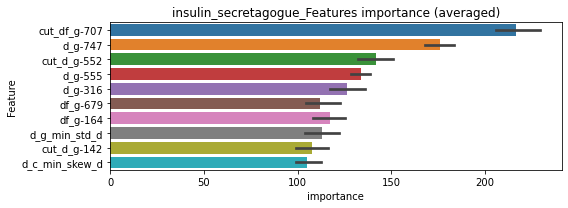

len(train_index) : 2856
len(valid_index) : 952
================================= fold 1/4 insulin_secretagogue=================================


Training until validation scores don't improve for 30 rounds


len(train_index) : 2856
len(valid_index) : 952
================================= fold 2/4 insulin_secretagogue=================================


Early stopping, best iteration is:
[452]	training's binary_logloss: 0.000625207	valid_1's binary_logloss: 0.00901278
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[855]	training's binary_logloss: 0.000412829	valid_1's binary_logloss: 0.00331027


len(train_index) : 2856
len(valid_index) : 952
================================= fold 3/4 insulin_secretagogue=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[883]	training's binary_logloss: 0.000410762	valid_1's binary_logloss: 0.00118025


len(train_index) : 2856
len(valid_index) : 952
================================= fold 4/4 insulin_secretagogue=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[819]	training's binary_logloss: 0.000414068	valid_1's binary_logloss: 0.00711304


insulin_secretagogue logloss: 0.005154085576023157


neg labels: 3289 → selected neg labels: 3284


insulin_sensitizer, len(trt): 51, len(othr): 3284
target_rate: 0.0021416 → Adj_target_rate: 0.0023748
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00287482	valid_1's binary_logloss: 0.0335041
[600]	training's binary_logloss: 0.000551381	valid_1's binary_logloss: 0.0284729
Early stopping, best iteration is:
[588]	training's binary_logloss: 0.000569348	valid_1's binary_logloss: 0.0283776
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00304793	valid_1's binary_logloss: 0.0194194
[600]	training's binary_logloss: 0.000564251	valid_1's binary_logloss: 0.0121487
Early stopping, best iteration is:
[683]	training's binary_logloss: 0.000495991	valid_1's binary_logloss: 0.0119015
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00306052	valid_1's binary_logloss: 0.00868142
[600]	training's binary_logloss: 0.00057678	valid_1's binary_logloss: 0.00353184
Early stopping, best iteration is:
[666]	training's binary_logloss: 0.000509947	valid_1's binary_logl

1 / 3 AUC score:1.000
y_Threshold: 0.0037371, Threshold: 0.0092012, pos_neg_ratio: 0.8000000
Remove_noisy_data: 134 → Positive_corect_labels: 655/3806
p_label_rate: 0.0100452 Vs.target_rate: 0.00214
Num_p_label: 40.0, conf_0:0.00644, conf_1:0.01196
Num_p_label: 40.0, Expected: 8.5, Adj_threshold_1: 0.0092012
Num_p_label: 1.0, Expected: 8.5, Adj_threshold_2: 0.0492012
threshold: 0.0492012, positive_p_label: 1.0/3982, p_label_rate: 0.0002511
positive_y_label: 655.0/3806, y_label_rate: 0.1720967
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00292366	valid_1's binary_logloss: 0.0193327
[600]	training's binary_logloss: 0.000546569	valid_1's binary_logloss: 0.0133795
Early stopping, best iteration is:
[663]	training's binary_logloss: 0.000487996	valid_1's binary_logloss: 0.0132067
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.002879	valid_1's binary_logloss: 0.0119838
[600]	training's binary_logloss: 0.000563983	valid_1's binary_logloss: 0.00615528
Early stopping, best iteration is:
[688]	training's binary_logloss: 0.000490282	valid_1's binary_logloss: 0.0058777
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00284892	valid_1's binary_logloss: 0.012999
[600]	training's binary_logloss: 0.000555969	valid_1's binary_logloss: 0.00727382
Early stopping, best iteration is:
[649]	training's binary_logloss: 0.000505526	valid_1's binary_loglos

2 / 3 AUC score:1.000
y_Threshold: 0.0208954, Threshold: 0.0492012, pos_neg_ratio: 0.8000000
Remove_noisy_data: 2 → Positive_corect_labels: 654.0/3804


Early stopping, best iteration is:
[435]	training's binary_logloss: 0.000966126	valid_1's binary_logloss: 0.0262712


p_label_rate: 0.0022602 Vs.target_rate: 0.00214
Num_p_label: 9.0, conf_0:0.03936, conf_1:0.05904
threshold: 0.0492012, positive_p_label: 9.0/3982, p_label_rate: 0.0022602
positive_y_label: 654.0/3804, y_label_rate: 0.1719243
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00273012	valid_1's binary_logloss: 0.0233441
[600]	training's binary_logloss: 0.000532644	valid_1's binary_logloss: 0.0183074
Early stopping, best iteration is:
[630]	training's binary_logloss: 0.000501117	valid_1's binary_logloss: 0.0180793
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00291024	valid_1's binary_logloss: 0.00930437
[600]	training's binary_logloss: 0.0005599	valid_1's binary_logloss: 0.00398055
Early stopping, best iteration is:
[686]	training's binary_logloss: 0.000484666	valid_1's binary_logloss: 0.00375506
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00282681	valid_1's binary_logloss: 0.0205712
[600]	training's binary_logloss: 0.000545995	valid_1's binary_logloss: 0.0158724
Early stopping, best iteration is:
[645]	training's binary_logloss: 0.000500664	valid_1's binary_logl

3 / 3 AUC score:1.000


Early stopping, best iteration is:
[553]	training's binary_logloss: 0.000617297	valid_1's binary_logloss: 0.0152906


y_Threshold: 0.0310701, Threshold: 0.0492012, pos_neg_ratio: 0.8000000
Remove_noisy_data: 0 → Positive_corect_labels: 654.0/3804
p_label_rate: 0.0022602 Vs.target_rate: 0.00214
Num_p_label: 9.0, conf_0:0.04428, conf_1:0.05412
threshold: 0.0492012, positive_p_label: 9.0/3982, p_label_rate: 0.0022602
positive_y_label: 654.0/3804, y_label_rate: 0.1719243


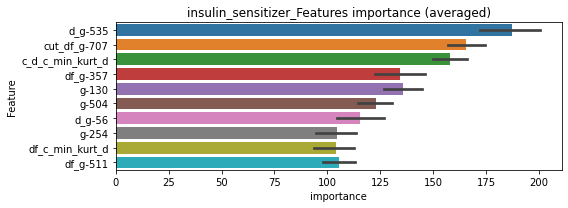

len(train_index) : 2853
len(valid_index) : 951
================================= fold 1/4 insulin_sensitizer=================================


Training until validation scores don't improve for 30 rounds


len(train_index) : 2853
len(valid_index) : 951
================================= fold 2/4 insulin_sensitizer=================================


Early stopping, best iteration is:
[504]	training's binary_logloss: 0.000733169	valid_1's binary_logloss: 0.0155905
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[848]	training's binary_logloss: 0.000508892	valid_1's binary_logloss: 0.00366656


len(train_index) : 2853
len(valid_index) : 951
================================= fold 3/4 insulin_sensitizer=================================


Training until validation scores don't improve for 30 rounds


len(train_index) : 2853
len(valid_index) : 951


Early stopping, best iteration is:
[555]	training's binary_logloss: 0.000681432	valid_1's binary_logloss: 0.0167749


================================= fold 4/4 insulin_sensitizer=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[813]	training's binary_logloss: 0.000505421	valid_1's binary_logloss: 0.0139732


insulin_sensitizer logloss: 0.012501292297267572


neg labels: 3289 → selected neg labels: 3281


integrin_inhibitor, len(trt): 42, len(othr): 3281
target_rate: 0.0017637 → Adj_target_rate: 0.0020135
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00274633	valid_1's binary_logloss: 0.018382
[600]	training's binary_logloss: 0.000515286	valid_1's binary_logloss: 0.0126662
Early stopping, best iteration is:
[610]	training's binary_logloss: 0.000504128	valid_1's binary_logloss: 0.0126244
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.002799	valid_1's binary_logloss: 0.0117146
[600]	training's binary_logloss: 0.000521784	valid_1's binary_logloss: 0.00581882
Early stopping, best iteration is:
[657]	training's binary_logloss: 0.000470179	valid_1's binary_logloss: 0.00566338
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00295212	valid_1's binary_logloss: 0.00694951
[600]	training's binary_logloss: 0.000539517	valid_1's binary_logloss: 0.00256215
Early stopping, best iteration is:
[725]	training's binary_logloss: 0.000455046	valid_1's binary_logl

1 / 3 AUC score:1.000
y_Threshold: 0.0040047, Threshold: 0.0134794, pos_neg_ratio: 0.8000000
Remove_noisy_data: 132 → Positive_corect_labels: 656/3805
p_label_rate: 0.0100452 Vs.target_rate: 0.00176
Num_p_label: 40.0, conf_0:0.00944, conf_1:0.01752
Num_p_label: 40.0, Expected: 7.0, Adj_threshold_1: 0.0134794
Num_p_label: 2.0, Expected: 7.0, Adj_threshold_2: 0.0534794
threshold: 0.0534794, positive_p_label: 2.0/3982, p_label_rate: 0.0005023
positive_y_label: 656.0/3805, y_label_rate: 0.1724047
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0024819	valid_1's binary_logloss: 0.0183595
[600]	training's binary_logloss: 0.000498315	valid_1's binary_logloss: 0.0130021
Early stopping, best iteration is:
[626]	training's binary_logloss: 0.000473448	valid_1's binary_logloss: 0.01292
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00250494	valid_1's binary_logloss: 0.0104416
[600]	training's binary_logloss: 0.000502642	valid_1's binary_logloss: 0.00534445
Early stopping, best iteration is:
[652]	training's binary_logloss: 0.000461405	valid_1's binary_logloss: 0.00521345
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00271046	valid_1's binary_logloss: 0.00656585
[600]	training's binary_logloss: 0.000526579	valid_1's binary_logloss: 0.00273343
Early stopping, best iteration is:
[690]	training's binary_logloss: 0.0004598	valid_1's binary_loglos

2 / 3 AUC score:1.000
y_Threshold: 0.0375793, Threshold: 0.0534794, pos_neg_ratio: 0.8000000
Remove_noisy_data: 0 → Positive_corect_labels: 656.0/3805
p_label_rate: 0.0042692 Vs.target_rate: 0.00176
Num_p_label: 17.0, conf_0:0.04278, conf_1:0.06418
Num_p_label: 17.0, Expected: 7.0, Adj_threshold_1: 0.0534794
threshold: 0.0534794, positive_p_label: 17.0/3982, p_label_rate: 0.0042692
positive_y_label: 656.0/3805, y_label_rate: 0.1724047
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0024819	valid_1's binary_logloss: 0.0183595
[600]	training's binary_logloss: 0.000498315	valid_1's binary_logloss: 0.0130021
Early stopping, best iteration is:
[626]	training's binary_logloss: 0.000473448	valid_1's binary_logloss: 0.01292
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00250494	valid_1's binary_logloss: 0.0104416
[600]	training's binary_logloss: 0.000502642	valid_1's binary_logloss: 0.00534445
Early stopping, best iteration is:
[652]	training's binary_logloss: 0.000461405	valid_1's binary_logloss: 0.00521345
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00271046	valid_1's binary_logloss: 0.00656585
[600]	training's binary_logloss: 0.000526579	valid_1's binary_logloss: 0.00273343
Early stopping, best iteration is:
[690]	training's binary_logloss: 0.0004598	valid_1's binary_loglos

3 / 3 AUC score:1.000
y_Threshold: 0.0375793, Threshold: 0.0534794, pos_neg_ratio: 0.8000000
Remove_noisy_data: 0 → Positive_corect_labels: 656.0/3805
p_label_rate: 0.0042692 Vs.target_rate: 0.00176
Num_p_label: 17.0, conf_0:0.04813, conf_1:0.05883
Num_p_label: 17.0, Expected: 7.0, Adj_threshold_1: 0.0534794
threshold: 0.0534794, positive_p_label: 17.0/3982, p_label_rate: 0.0042692
positive_y_label: 656.0/3805, y_label_rate: 0.1724047


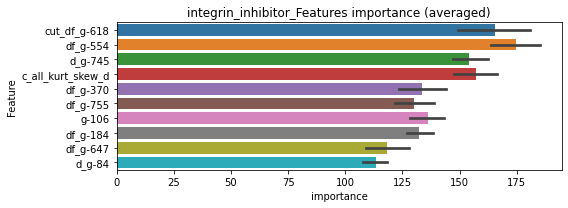

len(train_index) : 2853
len(valid_index) : 952
================================= fold 1/4 integrin_inhibitor=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[716]	training's binary_logloss: 0.000515793	valid_1's binary_logloss: 0.010688


len(train_index) : 2854
len(valid_index) : 951
================================= fold 2/4 integrin_inhibitor=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[905]	training's binary_logloss: 0.000459129	valid_1's binary_logloss: 0.00576536


len(train_index) : 2854
len(valid_index) : 951
================================= fold 3/4 integrin_inhibitor=================================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.000454539	valid_1's binary_logloss: 0.00228207
Early stopping, best iteration is:
[1093]	training's binary_logloss: 0.000444453	valid_1's binary_logloss: 0.00223632


len(train_index) : 2854
len(valid_index) : 951
================================= fold 4/4 integrin_inhibitor=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[643]	training's binary_logloss: 0.000566779	valid_1's binary_logloss: 0.0066935


integrin_inhibitor logloss: 0.006346937577700094


neg labels: 3289 → selected neg labels: 3273


jak_inhibitor, len(trt): 92, len(othr): 3273
target_rate: 0.0038633 → Adj_target_rate: 0.0039212
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0075376	valid_1's binary_logloss: 0.0621694
[600]	training's binary_logloss: 0.00114331	valid_1's binary_logloss: 0.0534123
Early stopping, best iteration is:
[584]	training's binary_logloss: 0.00120593	valid_1's binary_logloss: 0.0531687
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00727218	valid_1's binary_logloss: 0.0647762
Early stopping, best iteration is:
[450]	training's binary_logloss: 0.0021778	valid_1's binary_logloss: 0.0589654
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00709834	valid_1's binary_logloss: 0.035297
[600]	training's binary_logloss: 0.00112026	valid_1's binary_logloss: 0.0228997
Early stopping, best iteration is:
[731]	training's binary_logloss: 0.000812506	valid_1's binary_logloss: 0.0220353
Training until validation scores don't improve for 30 rounds
[300]	trainin

1 / 3 AUC score:0.996
y_Threshold: 0.0114645, Threshold: 0.0740587, pos_neg_ratio: 0.8000000
Remove_noisy_data: 152 → Positive_corect_labels: 644/3775
p_label_rate: 0.0100452 Vs.target_rate: 0.00386
Num_p_label: 40.0, conf_0:0.05184, conf_1:0.09628
Num_p_label: 40.0, Expected: 15.4, Adj_threshold_1: 0.0740587
Num_p_label: 29.0, Expected: 15.4, Adj_threshold_2: 0.1140587
Num_p_label: 24.0, Expected: 15.4, Adj_threshold_3: 0.1540587
Num_p_label: 19.0, Expected: 15.4, Adj_threshold_4: 0.1940587
threshold: 0.1940587, positive_p_label: 19.0/3982, p_label_rate: 0.0047715
positive_y_label: 644.0/3775, y_label_rate: 0.1705960
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00603903	valid_1's binary_logloss: 0.0492978
[600]	training's binary_logloss: 0.00100261	valid_1's binary_logloss: 0.0381467
Early stopping, best iteration is:
[632]	training's binary_logloss: 0.000913181	valid_1's binary_logloss: 0.0379341
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00627495	valid_1's binary_logloss: 0.0331428
[600]	training's binary_logloss: 0.00102335	valid_1's binary_logloss: 0.0219865
Early stopping, best iteration is:
[682]	training's binary_logloss: 0.000826334	valid_1's binary_logloss: 0.0212496
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00640682	valid_1's binary_logloss: 0.0292873
[600]	training's binary_logloss: 0.00104084	valid_1's binary_logloss: 0.0165635
Early stopping, best iteration is:
[814]	training's binary_logloss: 0.000669577	valid_1's binary_logloss:

2 / 3 AUC score:0.999
y_Threshold: 0.0308839, Threshold: 0.1940587, pos_neg_ratio: 0.8000000
Remove_noisy_data: 10 → Positive_corect_labels: 639.0/3765
p_label_rate: 0.0115520 Vs.target_rate: 0.00386
Num_p_label: 46.0, conf_0:0.15525, conf_1:0.23287
Num_p_label: 46.0, Expected: 15.4, Adj_threshold_1: 0.1940587
Num_p_label: 40.0, Expected: 15.4, Adj_threshold_2: 0.2340587
Num_p_label: 39.0, Expected: 15.4, Adj_threshold_3: 0.2740587
Num_p_label: 35.0, Expected: 15.4, Adj_threshold_4: 0.3140587
Num_p_label: 32.0, Expected: 15.4, Adj_threshold_5: 0.3540587
Num_p_label: 29.0, Expected: 15.4, Adj_threshold_6: 0.3940587
Num_p_label: 21.0, Expected: 15.4, Adj_threshold_7: 0.4340587
threshold: 0.4340587, positive_p_label: 21.0/3982, p_label_rate: 0.0052737
positive_y_label: 639.0/3765, y_label_rate: 0.1697211
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00568393	valid_1's binary_logloss: 0.0444675
[600]	training's binary_logloss: 0.00096881	valid_1's binary_logloss: 0.0330054
Early stopping, best iteration is:
[705]	training's binary_logloss: 0.000745046	valid_1's binary_logloss: 0.03232
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00571914	valid_1's binary_logloss: 0.0427727
[600]	training's binary_logloss: 0.000968882	valid_1's binary_logloss: 0.0322908
Early stopping, best iteration is:
[602]	training's binary_logloss: 0.000963597	valid_1's binary_logloss: 0.0322533
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00603404	valid_1's binary_logloss: 0.0360267
[600]	training's binary_logloss: 0.00102147	valid_1's binary_logloss: 0.0270304
Early stopping, best iteration is:
[592]	training's binary_logloss: 0.00104551	valid_1's binary_logloss: 0

3 / 3 AUC score:1.000
y_Threshold: 0.0375050, Threshold: 0.4340587, pos_neg_ratio: 0.8000000
Remove_noisy_data: 14 → Positive_corect_labels: 632.0/3751
p_label_rate: 0.0075339 Vs.target_rate: 0.00386
Num_p_label: 30.0, conf_0:0.39065, conf_1:0.47746
Num_p_label: 30.0, Expected: 15.4, Adj_threshold_1: 0.4340587
Num_p_label: 26.0, Expected: 15.4, Adj_threshold_2: 0.4740587
Num_p_label: 25.0, Expected: 15.4, Adj_threshold_3: 0.5140587
Num_p_label: 21.0, Expected: 15.4, Adj_threshold_4: 0.5540587
threshold: 0.5540587, positive_p_label: 21.0/3982, p_label_rate: 0.0052737
positive_y_label: 632.0/3751, y_label_rate: 0.1684884


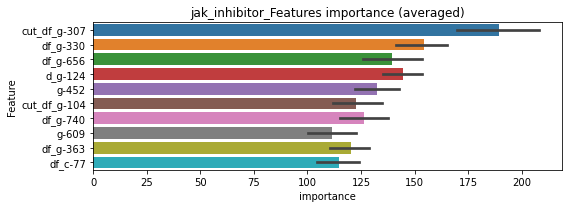

len(train_index) : 2813
len(valid_index) : 938
================================= fold 1/4 jak_inhibitor=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[641]	training's binary_logloss: 0.000911802	valid_1's binary_logloss: 0.0308126


len(train_index) : 2813
len(valid_index) : 938
================================= fold 2/4 jak_inhibitor=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[642]	training's binary_logloss: 0.00091391	valid_1's binary_logloss: 0.0274706


len(train_index) : 2813
len(valid_index) : 938
================================= fold 3/4 jak_inhibitor=================================


Training until validation scores don't improve for 30 rounds


len(train_index) : 2814
len(valid_index) : 937
================================= fold 4/4 jak_inhibitor=================================


Early stopping, best iteration is:
[361]	training's binary_logloss: 0.00173566	valid_1's binary_logloss: 0.0250799
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[639]	training's binary_logloss: 0.0009155	valid_1's binary_logloss: 0.0232274


jak_inhibitor logloss: 0.02664852255945431
jak_inhibitor clipping


neg labels: 3289 → selected neg labels: 3248


kit_inhibitor, len(trt): 273, len(othr): 3248
target_rate: 0.0114638 → Adj_target_rate: 0.0098841
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0330217	valid_1's binary_logloss: 0.24766
Early stopping, best iteration is:
[350]	training's binary_logloss: 0.0229017	valid_1's binary_logloss: 0.24615
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0316634	valid_1's binary_logloss: 0.255754
Early stopping, best iteration is:
[314]	training's binary_logloss: 0.028504	valid_1's binary_logloss: 0.255463
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0363826	valid_1's binary_logloss: 0.213422
Early stopping, best iteration is:
[403]	training's binary_logloss: 0.0177728	valid_1's binary_logloss: 0.202739
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0334852	valid_1's binary_logloss: 0.21013


1 / 3 AUC score:0.916
y_Threshold: 0.0703785, Threshold: 0.5870789, pos_neg_ratio: 0.8000000
Remove_noisy_data: 393 → Positive_corect_labels: 518/3504
p_label_rate: 0.0100452 Vs.target_rate: 0.01146
Num_p_label: 40.0, conf_0:0.41096, conf_1:0.76320


Early stopping, best iteration is:
[397]	training's binary_logloss: 0.0166842	valid_1's binary_logloss: 0.206226


threshold: 0.5870789, positive_p_label: 40.0/3982, p_label_rate: 0.0100452
positive_y_label: 518.0/3504, y_label_rate: 0.1478311
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0153106	valid_1's binary_logloss: 0.142149
Early stopping, best iteration is:
[528]	training's binary_logloss: 0.00314663	valid_1's binary_logloss: 0.130176
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0159241	valid_1's binary_logloss: 0.14865
Early stopping, best iteration is:
[421]	training's binary_logloss: 0.00599812	valid_1's binary_logloss: 0.142798
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0154826	valid_1's binary_logloss: 0.144055
Early stopping, best iteration is:
[361]	training's binary_logloss: 0.00925758	valid_1's binary_logloss: 0.140664
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0145335	valid_1's binary_logloss: 0.146171
Early stopping, best iteration is:
[525]	training's binary_logloss: 0.00303897	valid_1's binary_logloss

2 / 3 AUC score:0.982
y_Threshold: 0.0615565, Threshold: 0.5870789, pos_neg_ratio: 0.8000000
Remove_noisy_data: 106 → Positive_corect_labels: 465.0/3398
p_label_rate: 0.0203415 Vs.target_rate: 0.01146
Num_p_label: 81.0, conf_0:0.46966, conf_1:0.70449
Num_p_label: 81.0, Expected: 45.6, Adj_threshold_1: 0.5870789
Num_p_label: 76.0, Expected: 45.6, Adj_threshold_2: 0.6270789
Num_p_label: 70.0, Expected: 45.6, Adj_threshold_3: 0.6670789
Num_p_label: 64.0, Expected: 45.6, Adj_threshold_4: 0.7070789
threshold: 0.7070789, positive_p_label: 64.0/3982, p_label_rate: 0.0160723
positive_y_label: 465.0/3398, y_label_rate: 0.1368452
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0110133	valid_1's binary_logloss: 0.102237
[600]	training's binary_logloss: 0.00176053	valid_1's binary_logloss: 0.0851434
Early stopping, best iteration is:
[596]	training's binary_logloss: 0.00178649	valid_1's binary_logloss: 0.0851148
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0113323	valid_1's binary_logloss: 0.108601
Early stopping, best iteration is:
[436]	training's binary_logloss: 0.00390492	valid_1's binary_logloss: 0.105169
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0117727	valid_1's binary_logloss: 0.103741
Early stopping, best iteration is:
[523]	training's binary_logloss: 0.00246248	valid_1's binary_logloss: 0.0952989
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0107658	valid_1's binary_logloss: 0.115776


3 / 3 AUC score:0.995


Early stopping, best iteration is:
[491]	training's binary_logloss: 0.00273691	valid_1's binary_logloss: 0.10546


y_Threshold: 0.0491255, Threshold: 0.7070789, pos_neg_ratio: 0.8000000
Remove_noisy_data: 56 → Positive_corect_labels: 437.0/3342
p_label_rate: 0.0193370 Vs.target_rate: 0.01146
Num_p_label: 77.0, conf_0:0.50000, conf_1:0.77779
Num_p_label: 77.0, Expected: 45.6, Adj_threshold_1: 0.7070789
Num_p_label: 69.0, Expected: 45.6, Adj_threshold_2: 0.7470789
Num_p_label: 63.0, Expected: 45.6, Adj_threshold_3: 0.7870789
threshold: 0.7870789, positive_p_label: 63.0/3982, p_label_rate: 0.0158212
positive_y_label: 437.0/3342, y_label_rate: 0.1307600


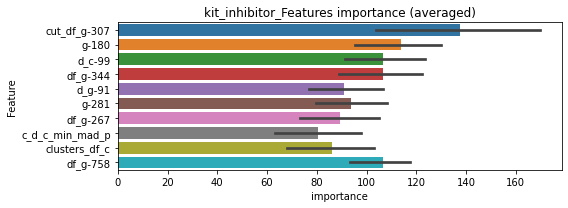

len(train_index) : 2506
len(valid_index) : 836
================================= fold 1/4 kit_inhibitor=================================


Training until validation scores don't improve for 30 rounds


len(train_index) : 2506
len(valid_index) : 836
================================= fold 2/4 kit_inhibitor=================================


Early stopping, best iteration is:
[253]	training's binary_logloss: 0.00404097	valid_1's binary_logloss: 0.106623
Training until validation scores don't improve for 30 rounds


len(train_index) : 2507
len(valid_index) : 835
================================= fold 3/4 kit_inhibitor=================================


Early stopping, best iteration is:
[328]	training's binary_logloss: 0.00279461	valid_1's binary_logloss: 0.0762881
Training until validation scores don't improve for 30 rounds


len(train_index) : 2507
len(valid_index) : 835
================================= fold 4/4 kit_inhibitor=================================


Early stopping, best iteration is:
[315]	training's binary_logloss: 0.00301321	valid_1's binary_logloss: 0.0944086
Training until validation scores don't improve for 30 rounds


kit_inhibitor logloss: 0.09790737918855678
kit_inhibitor clipping


Early stopping, best iteration is:
[132]	training's binary_logloss: 0.0117075	valid_1's binary_logloss: 0.114325
neg labels: 3289 → selected neg labels: 3289


laxative, len(trt): 6, len(othr): 3289
target_rate: 0.0002520 → Adj_target_rate: 0.0003851
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00031443	valid_1's binary_logloss: 0.000568901
Early stopping, best iteration is:
[515]	training's binary_logloss: 0.0001516	valid_1's binary_logloss: 0.000296007
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.000313826	valid_1's binary_logloss: 0.00136609
Early stopping, best iteration is:
[458]	training's binary_logloss: 0.000157657	valid_1's binary_logloss: 0.00109239
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.000316883	valid_1's binary_logloss: 0.000358791
Early stopping, best iteration is:
[498]	training's binary_logloss: 0.000154516	valid_1's binary_logloss: 0.00017471
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.000315199	valid_1's binary_logloss: 0.000386381


1 / 3 AUC score:1.000
y_Threshold: 0.0004102, Threshold: 0.0011752, pos_neg_ratio: 0.8000000
Remove_noisy_data: 133 → Positive_corect_labels: 657/3813
p_label_rate: 0.0100452 Vs.target_rate: 0.00025
Num_p_label: 40.0, conf_0:0.00082, conf_1:0.00153
Num_p_label: 40.0, Expected: 1.0, Adj_threshold_1: 0.0011752
Num_p_label: 0.0, Expected: 1.0, Adj_threshold_2: 0.0411752
threshold: 0.0411752, positive_p_label: 0.0/3982, p_label_rate: 0.0000000


Early stopping, best iteration is:
[491]	training's binary_logloss: 0.000153304	valid_1's binary_logloss: 0.000202093


positive_y_label: 657.0/3813, y_label_rate: 0.1723053
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.000294314	valid_1's binary_logloss: 0.000318901
Early stopping, best iteration is:
[526]	training's binary_logloss: 0.00014235	valid_1's binary_logloss: 0.000154247
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.000288048	valid_1's binary_logloss: 0.000958475
Early stopping, best iteration is:
[535]	training's binary_logloss: 0.000139889	valid_1's binary_logloss: 0.000769618
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.000297063	valid_1's binary_logloss: 0.000291659
Early stopping, best iteration is:
[556]	training's binary_logloss: 0.00014268	valid_1's binary_logloss: 0.000139864
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.000291779	valid_1's binary_logloss: 0.000347923


2 / 3 AUC score:1.000
y_Threshold: 0.0986303, Threshold: 0.0411752, pos_neg_ratio: 0.8000000
Remove_noisy_data: 0 → Positive_corect_labels: 657.0/3813
p_label_rate: 0.0010045 Vs.target_rate: 0.00025
Num_p_label: 4.0, conf_0:0.03294, conf_1:0.04941


[600]	training's binary_logloss: 0.00014018	valid_1's binary_logloss: 0.000172219
Early stopping, best iteration is:
[597]	training's binary_logloss: 0.00014018	valid_1's binary_logloss: 0.000172219


Num_p_label: 4.0, Expected: 1.0, Adj_threshold_1: 0.0411752
Num_p_label: 2.0, Expected: 1.0, Adj_threshold_2: 0.0811752
threshold: 0.0811752, positive_p_label: 2.0/3982, p_label_rate: 0.0005023
positive_y_label: 657.0/3813, y_label_rate: 0.1723053
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.000294314	valid_1's binary_logloss: 0.000318901
Early stopping, best iteration is:
[526]	training's binary_logloss: 0.00014235	valid_1's binary_logloss: 0.000154247
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.000288048	valid_1's binary_logloss: 0.000958475
Early stopping, best iteration is:
[535]	training's binary_logloss: 0.000139889	valid_1's binary_logloss: 0.000769618
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.000297063	valid_1's binary_logloss: 0.000291659
[600]	training's binary_logloss: 0.00014268	valid_1's binary_logloss: 0.000139864
Early stopping, best iteration is:
[582]	training's binary_logloss: 0.00014268	valid_1's binary_logloss: 0.000139864
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.000291779	valid_1's binary_logloss: 0.

3 / 3 AUC score:1.000
y_Threshold: 0.0986303, Threshold: 0.0811752, pos_neg_ratio: 0.8000000
Remove_noisy_data: 0 → Positive_corect_labels: 657.0/3813
p_label_rate: 0.0005023 Vs.target_rate: 0.00025
Num_p_label: 2.0, conf_0:0.07306, conf_1:0.08929
Num_p_label: 2.0, Expected: 1.0, Adj_threshold_1: 0.0811752


[600]	training's binary_logloss: 0.00014018	valid_1's binary_logloss: 0.000172219
Early stopping, best iteration is:
[597]	training's binary_logloss: 0.00014018	valid_1's binary_logloss: 0.000172219


threshold: 0.0811752, positive_p_label: 2.0/3982, p_label_rate: 0.0005023
positive_y_label: 657.0/3813, y_label_rate: 0.1723053


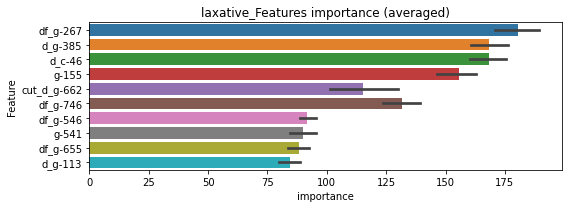

len(train_index) : 2859
len(valid_index) : 954
================================= fold 1/4 laxative=================================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.000148315	valid_1's binary_logloss: 0.0001611


len(train_index) : 2860
len(valid_index) : 953
================================= fold 2/4 laxative=================================


Early stopping, best iteration is:
[1153]	training's binary_logloss: 0.000145182	valid_1's binary_logloss: 0.000157569
Training until validation scores don't improve for 30 rounds


len(train_index) : 2860
len(valid_index) : 953
================================= fold 3/4 laxative=================================


Early stopping, best iteration is:
[945]	training's binary_logloss: 0.000147355	valid_1's binary_logloss: 0.00143684
Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.000148807	valid_1's binary_logloss: 0.000144616


len(train_index) : 2860
len(valid_index) : 953
================================= fold 4/4 laxative=================================


Early stopping, best iteration is:
[1214]	training's binary_logloss: 0.00014545	valid_1's binary_logloss: 0.000141228
Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.000147734	valid_1's binary_logloss: 0.000187537


laxative logloss: 0.00047970133472113684


Early stopping, best iteration is:
[1170]	training's binary_logloss: 0.000144478	valid_1's binary_logloss: 0.000183507
neg labels: 3289 → selected neg labels: 3289


leukotriene_inhibitor, len(trt): 6, len(othr): 3289
target_rate: 0.0002520 → Adj_target_rate: 0.0003851
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.000327983	valid_1's binary_logloss: 0.0009131
Early stopping, best iteration is:
[470]	training's binary_logloss: 0.00016543	valid_1's binary_logloss: 0.00059081
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.000324486	valid_1's binary_logloss: 0.00533215
Early stopping, best iteration is:
[485]	training's binary_logloss: 0.000159738	valid_1's binary_logloss: 0.00481925
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.000328313	valid_1's binary_logloss: 0.000398417
Early stopping, best iteration is:
[489]	training's binary_logloss: 0.000161232	valid_1's binary_logloss: 0.000200919
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.000325931	valid_1's binary_logloss: 0.00050179


1 / 3 AUC score:1.000
y_Threshold: 0.0004986, Threshold: 0.0012440, pos_neg_ratio: 0.8000000
Remove_noisy_data: 133 → Positive_corect_labels: 657/3813
p_label_rate: 0.0100452 Vs.target_rate: 0.00025
Num_p_label: 40.0, conf_0:0.00087, conf_1:0.00162
Num_p_label: 40.0, Expected: 1.0, Adj_threshold_1: 0.0012440
Num_p_label: 1.0, Expected: 1.0, Adj_threshold_2: 0.0412440
threshold: 0.0412440, positive_p_label: 1.0/3982, p_label_rate: 0.0002511


Early stopping, best iteration is:
[479]	training's binary_logloss: 0.000160345	valid_1's binary_logloss: 0.000262705


positive_y_label: 657.0/3813, y_label_rate: 0.1723053
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.000306027	valid_1's binary_logloss: 0.00124916
Early stopping, best iteration is:
[468]	training's binary_logloss: 0.000152592	valid_1's binary_logloss: 0.000969658
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00030638	valid_1's binary_logloss: 0.00356914
Early stopping, best iteration is:
[473]	training's binary_logloss: 0.000152951	valid_1's binary_logloss: 0.00320503
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.000307243	valid_1's binary_logloss: 0.000336918
Early stopping, best iteration is:
[517]	training's binary_logloss: 0.000149637	valid_1's binary_logloss: 0.000164372
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.000305036	valid_1's binary_logloss: 0.000331421


2 / 3 AUC score:1.000
y_Threshold: 0.0443817, Threshold: 0.0412440, pos_neg_ratio: 0.8000000
Remove_noisy_data: 0 → Positive_corect_labels: 657.0/3813
p_label_rate: 0.0017579 Vs.target_rate: 0.00025
Num_p_label: 7.0, conf_0:0.03300, conf_1:0.04949
Num_p_label: 7.0, Expected: 1.0, Adj_threshold_1: 0.0412440
Num_p_label: 5.0, Expected: 1.0, Adj_threshold_2: 0.0812440
Num_p_label: 3.0, Expected: 1.0, Adj_threshold_3: 0.1212440


Early stopping, best iteration is:
[522]	training's binary_logloss: 0.000148836	valid_1's binary_logloss: 0.000164309


Num_p_label: 2.0, Expected: 1.0, Adj_threshold_4: 0.1612440
threshold: 0.1612440, positive_p_label: 2.0/3982, p_label_rate: 0.0005023
positive_y_label: 657.0/3813, y_label_rate: 0.1723053
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.000306027	valid_1's binary_logloss: 0.00124916
Early stopping, best iteration is:
[468]	training's binary_logloss: 0.000152592	valid_1's binary_logloss: 0.000969658
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00030638	valid_1's binary_logloss: 0.00356914
Early stopping, best iteration is:
[473]	training's binary_logloss: 0.000152951	valid_1's binary_logloss: 0.00320503
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.000307243	valid_1's binary_logloss: 0.000336918
Early stopping, best iteration is:
[510]	training's binary_logloss: 0.000149637	valid_1's binary_logloss: 0.000164372
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.000305036	valid_1's binary_logloss: 0.000331421


3 / 3 AUC score:1.000
y_Threshold: 0.0443817, Threshold: 0.1612440, pos_neg_ratio: 0.8000000
Remove_noisy_data: 0 → Positive_corect_labels: 657.0/3813
p_label_rate: 0.0005023 Vs.target_rate: 0.00025
Num_p_label: 2.0, conf_0:0.14512, conf_1:0.17737
Num_p_label: 2.0, Expected: 1.0, Adj_threshold_1: 0.1612440
threshold: 0.1612440, positive_p_label: 2.0/3982, p_label_rate: 0.0005023


Early stopping, best iteration is:
[522]	training's binary_logloss: 0.000148836	valid_1's binary_logloss: 0.000164309


positive_y_label: 657.0/3813, y_label_rate: 0.1723053


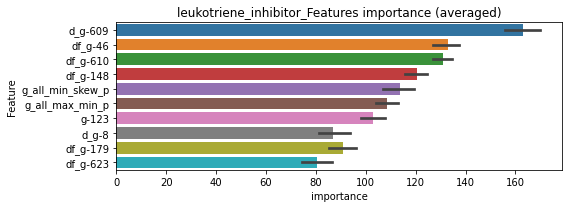

len(train_index) : 2859
len(valid_index) : 954
================================= fold 1/4 leukotriene_inhibitor=================================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.00015156	valid_1's binary_logloss: 0.000361599
Early stopping, best iteration is:
[1064]	training's binary_logloss: 0.000150044	valid_1's binary_logloss: 0.000359816


len(train_index) : 2860
len(valid_index) : 953
================================= fold 2/4 leukotriene_inhibitor=================================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.000152251	valid_1's binary_logloss: 0.00162149
Early stopping, best iteration is:
[1015]	training's binary_logloss: 0.00015193	valid_1's binary_logloss: 0.0016199


len(train_index) : 2860
len(valid_index) : 953
================================= fold 3/4 leukotriene_inhibitor=================================


Training until validation scores don't improve for 30 rounds


len(train_index) : 2860
len(valid_index) : 953
================================= fold 4/4 leukotriene_inhibitor=================================


Early stopping, best iteration is:
[969]	training's binary_logloss: 0.000152587	valid_1's binary_logloss: 0.000171702
Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.00015185	valid_1's binary_logloss: 0.000169973
Early stopping, best iteration is:
[1062]	training's binary_logloss: 0.000150888	valid_1's binary_logloss: 0.000168939


leukotriene_inhibitor logloss: 0.0005800643230075397


neg labels: 3289 → selected neg labels: 3282


leukotriene_receptor_antagonist, len(trt): 62, len(othr): 3282
target_rate: 0.0026035 → Adj_target_rate: 0.0028037
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00321709	valid_1's binary_logloss: 0.0446079
Early stopping, best iteration is:
[417]	training's binary_logloss: 0.00132156	valid_1's binary_logloss: 0.0407834
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00323747	valid_1's binary_logloss: 0.0439991
[600]	training's binary_logloss: 0.000658774	valid_1's binary_logloss: 0.0403943
Early stopping, best iteration is:
[581]	training's binary_logloss: 0.000692729	valid_1's binary_logloss: 0.0401573
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00387764	valid_1's binary_logloss: 0.012741
[600]	training's binary_logloss: 0.000723079	valid_1's binary_logloss: 0.00728953
Early stopping, best iteration is:
[717]	training's binary_logloss: 0.000586022	valid_1's binary_logloss: 0.00696609
Training until validation scores don't improve for 30 rounds
[300]	

1 / 3 AUC score:0.999
y_Threshold: 0.0050394, Threshold: 0.0113538, pos_neg_ratio: 0.8000000
Remove_noisy_data: 134 → Positive_corect_labels: 655/3804
p_label_rate: 0.0100452 Vs.target_rate: 0.00260
Num_p_label: 40.0, conf_0:0.00795, conf_1:0.01476
Num_p_label: 40.0, Expected: 10.4, Adj_threshold_1: 0.0113538
Num_p_label: 0.0, Expected: 10.4, Adj_threshold_2: 0.0513538
threshold: 0.0513538, positive_p_label: 0.0/3982, p_label_rate: 0.0000000
positive_y_label: 655.0/3804, y_label_rate: 0.1721872
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00313558	valid_1's binary_logloss: 0.0312802
Early stopping, best iteration is:
[520]	training's binary_logloss: 0.000827235	valid_1's binary_logloss: 0.0262116
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00316517	valid_1's binary_logloss: 0.0305462
Early stopping, best iteration is:
[482]	training's binary_logloss: 0.000971338	valid_1's binary_logloss: 0.0260649
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00323614	valid_1's binary_logloss: 0.0248704
[600]	training's binary_logloss: 0.000666096	valid_1's binary_logloss: 0.0193118
Early stopping, best iteration is:
[639]	training's binary_logloss: 0.000607445	valid_1's binary_logloss: 0.0191166
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00337026	valid_1's binary_logloss: 0.023827
[600]	tr

2 / 3 AUC score:1.000
y_Threshold: 0.0189379, Threshold: 0.0513538, pos_neg_ratio: 0.8000000
Remove_noisy_data: 6 → Positive_corect_labels: 652.0/3798
p_label_rate: 0.0010045 Vs.target_rate: 0.00260
Num_p_label: 4.0, conf_0:0.04108, conf_1:0.06162
Num_p_label: 4.0, Expected: 10.4, Adj_threshold_1: 0.0513538
threshold: 0.0513538, positive_p_label: 4.0/3982, p_label_rate: 0.0010045
positive_y_label: 652.0/3798, y_label_rate: 0.1716693
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00311103	valid_1's binary_logloss: 0.026021
[600]	training's binary_logloss: 0.00064778	valid_1's binary_logloss: 0.0215801
Early stopping, best iteration is:
[651]	training's binary_logloss: 0.00058257	valid_1's binary_logloss: 0.0213868
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0031986	valid_1's binary_logloss: 0.0367284
[600]	training's binary_logloss: 0.000648194	valid_1's binary_logloss: 0.0316452
Early stopping, best iteration is:
[633]	training's binary_logloss: 0.000603865	valid_1's binary_logloss: 0.0313339
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00325457	valid_1's binary_logloss: 0.0194208
Early stopping, best iteration is:
[535]	training's binary_logloss: 0.00081057	valid_1's binary_logloss: 0.0155677
Training until validation scores don't improve for 30 rounds
[300]	train

3 / 3 AUC score:1.000
y_Threshold: 0.0208937, Threshold: 0.0513538, pos_neg_ratio: 0.8000000
Remove_noisy_data: 6 → Positive_corect_labels: 649.0/3792
p_label_rate: 0.0007534 Vs.target_rate: 0.00260
Num_p_label: 3.0, conf_0:0.04622, conf_1:0.05649
Num_p_label: 3.0, Expected: 10.4, Adj_threshold_1: 0.0513538
threshold: 0.0513538, positive_p_label: 3.0/3982, p_label_rate: 0.0007534
positive_y_label: 649.0/3792, y_label_rate: 0.1711498


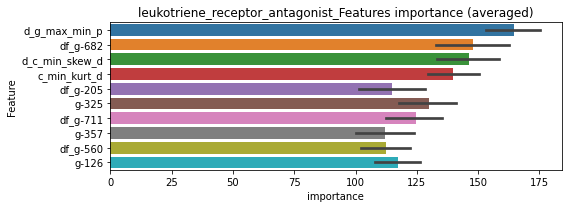

len(train_index) : 2844
len(valid_index) : 948
================================= fold 1/4 leukotriene_receptor_antagonist=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[734]	training's binary_logloss: 0.000623218	valid_1's binary_logloss: 0.0223773


len(train_index) : 2844
len(valid_index) : 948
================================= fold 2/4 leukotriene_receptor_antagonist=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[634]	training's binary_logloss: 0.000709565	valid_1's binary_logloss: 0.0159554


len(train_index) : 2844
len(valid_index) : 948
================================= fold 3/4 leukotriene_receptor_antagonist=================================


Training until validation scores don't improve for 30 rounds


len(train_index) : 2844
len(valid_index) : 948


Early stopping, best iteration is:
[548]	training's binary_logloss: 0.000814597	valid_1's binary_logloss: 0.0134888


================================= fold 4/4 leukotriene_receptor_antagonist=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[823]	training's binary_logloss: 0.000585503	valid_1's binary_logloss: 0.0180409


leukotriene_receptor_antagonist logloss: 0.017465611024189566


neg labels: 3289 → selected neg labels: 3288


lipase_inhibitor, len(trt): 12, len(othr): 3288
target_rate: 0.0005039 → Adj_target_rate: 0.0006942
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.000536943	valid_1's binary_logloss: 0.00528271
Early stopping, best iteration is:
[505]	training's binary_logloss: 0.00021775	valid_1's binary_logloss: 0.00485196
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.000559085	valid_1's binary_logloss: 0.00185676
Early stopping, best iteration is:
[503]	training's binary_logloss: 0.000221823	valid_1's binary_logloss: 0.000972195
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.000568029	valid_1's binary_logloss: 0.000914627
Early stopping, best iteration is:
[566]	training's binary_logloss: 0.000220631	valid_1's binary_logloss: 0.000388917
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.000555712	valid_1's binary_logloss: 0.00317508


1 / 3 AUC score:1.000
y_Threshold: 0.0007825, Threshold: 0.0023408, pos_neg_ratio: 0.8000000
Remove_noisy_data: 132 → Positive_corect_labels: 657/3813
p_label_rate: 0.0100452 Vs.target_rate: 0.00050
Num_p_label: 40.0, conf_0:0.00164, conf_1:0.00304
Num_p_label: 40.0, Expected: 2.0, Adj_threshold_1: 0.0023408
Num_p_label: 0.0, Expected: 2.0, Adj_threshold_2: 0.0423408
threshold: 0.0423408, positive_p_label: 0.0/3982, p_label_rate: 0.0000000


Early stopping, best iteration is:
[518]	training's binary_logloss: 0.000219409	valid_1's binary_logloss: 0.00228082


positive_y_label: 657.0/3813, y_label_rate: 0.1723053
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.000510813	valid_1's binary_logloss: 0.00522955
Early stopping, best iteration is:
[516]	training's binary_logloss: 0.000212757	valid_1's binary_logloss: 0.00458506
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00053491	valid_1's binary_logloss: 0.00161913
Early stopping, best iteration is:
[516]	training's binary_logloss: 0.000215687	valid_1's binary_logloss: 0.000863464
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.000544413	valid_1's binary_logloss: 0.00068672
Early stopping, best iteration is:
[535]	training's binary_logloss: 0.000214983	valid_1's binary_logloss: 0.000274539
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.000518151	valid_1's binary_logloss: 0.00155927


2 / 3 AUC score:1.000
y_Threshold: 0.0245133, Threshold: 0.0423408, pos_neg_ratio: 0.8000000
Remove_noisy_data: 0 → Positive_corect_labels: 657.0/3813
p_label_rate: 0.0017579 Vs.target_rate: 0.00050
Num_p_label: 7.0, conf_0:0.03387, conf_1:0.05081
Num_p_label: 7.0, Expected: 2.0, Adj_threshold_1: 0.0423408
Num_p_label: 4.0, Expected: 2.0, Adj_threshold_2: 0.0823408


Early stopping, best iteration is:
[519]	training's binary_logloss: 0.000211652	valid_1's binary_logloss: 0.000981858


threshold: 0.0823408, positive_p_label: 4.0/3982, p_label_rate: 0.0010045
positive_y_label: 657.0/3813, y_label_rate: 0.1723053
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.000510813	valid_1's binary_logloss: 0.00522955
Early stopping, best iteration is:
[516]	training's binary_logloss: 0.000212757	valid_1's binary_logloss: 0.00458506
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00053491	valid_1's binary_logloss: 0.00161913
Early stopping, best iteration is:
[516]	training's binary_logloss: 0.000215687	valid_1's binary_logloss: 0.000863464
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.000544413	valid_1's binary_logloss: 0.00068672
Early stopping, best iteration is:
[535]	training's binary_logloss: 0.000214983	valid_1's binary_logloss: 0.000274539
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.000518151	valid_1's binary_logloss: 0.00155927


3 / 3 AUC score:1.000
y_Threshold: 0.0245133, Threshold: 0.0823408, pos_neg_ratio: 0.8000000
Remove_noisy_data: 0 → Positive_corect_labels: 657.0/3813
p_label_rate: 0.0010045 Vs.target_rate: 0.00050
Num_p_label: 4.0, conf_0:0.07411, conf_1:0.09057
Num_p_label: 4.0, Expected: 2.0, Adj_threshold_1: 0.0823408


Early stopping, best iteration is:
[519]	training's binary_logloss: 0.000211652	valid_1's binary_logloss: 0.000981858


threshold: 0.0823408, positive_p_label: 4.0/3982, p_label_rate: 0.0010045
positive_y_label: 657.0/3813, y_label_rate: 0.1723053


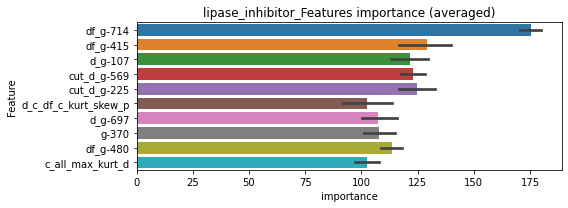

len(train_index) : 2859
len(valid_index) : 954
================================= fold 1/4 lipase_inhibitor=================================


Training until validation scores don't improve for 30 rounds


len(train_index) : 2860
len(valid_index) : 953
================================= fold 2/4 lipase_inhibitor=================================


Early stopping, best iteration is:
[913]	training's binary_logloss: 0.000215271	valid_1's binary_logloss: 0.00360682
Training until validation scores don't improve for 30 rounds


len(train_index) : 2860
len(valid_index) : 953
================================= fold 3/4 lipase_inhibitor=================================


Early stopping, best iteration is:
[865]	training's binary_logloss: 0.000220366	valid_1's binary_logloss: 0.000479493
Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.000216386	valid_1's binary_logloss: 0.000261016
Early stopping, best iteration is:
[1023]	training's binary_logloss: 0.000215987	valid_1's binary_logloss: 0.000260566


len(train_index) : 2860
len(valid_index) : 953
================================= fold 4/4 lipase_inhibitor=================================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.000212092	valid_1's binary_logloss: 0.000708312
Early stopping, best iteration is:
[1001]	training's binary_logloss: 0.000212048	valid_1's binary_logloss: 0.000708199


lipase_inhibitor logloss: 0.0012643838032431098


neg labels: 3289 → selected neg labels: 3284


lipoxygenase_inhibitor, len(trt): 61, len(othr): 3284
target_rate: 0.0025615 → Adj_target_rate: 0.0027652
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00364324	valid_1's binary_logloss: 0.0282145
[600]	training's binary_logloss: 0.000689974	valid_1's binary_logloss: 0.0225355
Early stopping, best iteration is:
[622]	training's binary_logloss: 0.000653172	valid_1's binary_logloss: 0.0223939
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00377967	valid_1's binary_logloss: 0.0259422
[600]	training's binary_logloss: 0.000705093	valid_1's binary_logloss: 0.0173281
Early stopping, best iteration is:
[670]	training's binary_logloss: 0.000601097	valid_1's binary_logloss: 0.0168975
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00393276	valid_1's binary_logloss: 0.0155392
[600]	training's binary_logloss: 0.000725887	valid_1's binary_logloss: 0.00924476
Early stopping, best iteration is:
[686]	training's binary_logloss: 0.000598867	valid_1's binary_logl

1 / 3 AUC score:1.000
y_Threshold: 0.0049933, Threshold: 0.0497061, pos_neg_ratio: 0.8000000
Remove_noisy_data: 134 → Positive_corect_labels: 655/3806
p_label_rate: 0.0100452 Vs.target_rate: 0.00256
Num_p_label: 40.0, conf_0:0.03479, conf_1:0.06462
Num_p_label: 40.0, Expected: 10.2, Adj_threshold_1: 0.0497061
Num_p_label: 32.0, Expected: 10.2, Adj_threshold_2: 0.0897061
Num_p_label: 31.0, Expected: 10.2, Adj_threshold_3: 0.1297061
Num_p_label: 28.0, Expected: 10.2, Adj_threshold_4: 0.1697061
Num_p_label: 26.0, Expected: 10.2, Adj_threshold_5: 0.2097061
Num_p_label: 24.0, Expected: 10.2, Adj_threshold_6: 0.2497061
Num_p_label: 23.0, Expected: 10.2, Adj_threshold_7: 0.2897061
Num_p_label: 18.0, Expected: 10.2, Adj_threshold_8: 0.3297061
Num_p_label: 17.0, Expected: 10.2, Adj_threshold_9: 0.3697061
Num_p_label: 15.0, Expected: 10.2, Adj_threshold_10: 0.4097061
threshold: 0.4097061, positive_p_label: 15.0/3982, p_label_rate: 0.0037670
positive_y_label: 655.0/3806, y_label_rate: 0.1720967
=

Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0034601	valid_1's binary_logloss: 0.0263456
[600]	training's binary_logloss: 0.000663109	valid_1's binary_logloss: 0.0194448
Early stopping, best iteration is:
[658]	training's binary_logloss: 0.000584582	valid_1's binary_logloss: 0.0192482
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00344804	valid_1's binary_logloss: 0.0196438
[600]	training's binary_logloss: 0.000670355	valid_1's binary_logloss: 0.0125777
Early stopping, best iteration is:
[707]	training's binary_logloss: 0.0005447	valid_1's binary_logloss: 0.0121569
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00347525	valid_1's binary_logloss: 0.0171326
[600]	training's binary_logloss: 0.000671924	valid_1's binary_logloss: 0.0113037
Early stopping, best iteration is:
[665]	training's binary_logloss: 0.000585712	valid_1's binary_logloss:

2 / 3 AUC score:1.000
y_Threshold: 0.0402178, Threshold: 0.4097061, pos_neg_ratio: 0.8000000
Remove_noisy_data: 6 → Positive_corect_labels: 652.0/3800
p_label_rate: 0.0085384 Vs.target_rate: 0.00256
Num_p_label: 34.0, conf_0:0.32776, conf_1:0.49165
Num_p_label: 34.0, Expected: 10.2, Adj_threshold_1: 0.4097061
Num_p_label: 30.0, Expected: 10.2, Adj_threshold_2: 0.4497061
Num_p_label: 29.0, Expected: 10.2, Adj_threshold_3: 0.4897061
Num_p_label: 26.0, Expected: 10.2, Adj_threshold_4: 0.5297061
Num_p_label: 25.0, Expected: 10.2, Adj_threshold_5: 0.5697061
Num_p_label: 22.0, Expected: 10.2, Adj_threshold_6: 0.6097061
Num_p_label: 21.0, Expected: 10.2, Adj_threshold_7: 0.6497061
Num_p_label: 18.0, Expected: 10.2, Adj_threshold_8: 0.6897061
Num_p_label: 17.0, Expected: 10.2, Adj_threshold_9: 0.7297061
Num_p_label: 12.0, Expected: 10.2, Adj_threshold_10: 0.7697061
threshold: 0.7697061, positive_p_label: 12.0/3982, p_label_rate: 0.0030136
positive_y_label: 652.0/3800, y_label_rate: 0.1715789
=

Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00338714	valid_1's binary_logloss: 0.0153517
[600]	training's binary_logloss: 0.000664813	valid_1's binary_logloss: 0.00854544
Early stopping, best iteration is:
[727]	training's binary_logloss: 0.000524579	valid_1's binary_logloss: 0.00804953
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00327071	valid_1's binary_logloss: 0.0257574
[600]	training's binary_logloss: 0.000646365	valid_1's binary_logloss: 0.0196405
Early stopping, best iteration is:
[673]	training's binary_logloss: 0.000553233	valid_1's binary_logloss: 0.0194082
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00352058	valid_1's binary_logloss: 0.0129903
[600]	training's binary_logloss: 0.000682959	valid_1's binary_logloss: 0.00704197
Early stopping, best iteration is:
[724]	training's binary_logloss: 0.000542127	valid_1's binary_lo

3 / 3 AUC score:1.000
y_Threshold: 0.0223438, Threshold: 0.7697061, pos_neg_ratio: 0.8000000
Remove_noisy_data: 4 → Positive_corect_labels: 650.0/3796
p_label_rate: 0.0040181 Vs.target_rate: 0.00256
Num_p_label: 16.0, conf_0:0.50000, conf_1:0.80000
Num_p_label: 16.0, Expected: 10.2, Adj_threshold_1: 0.7697061
Num_p_label: 13.0, Expected: 10.2, Adj_threshold_2: 0.8097061
threshold: 0.8097061, positive_p_label: 13.0/3982, p_label_rate: 0.0032647
positive_y_label: 650.0/3796, y_label_rate: 0.1712329


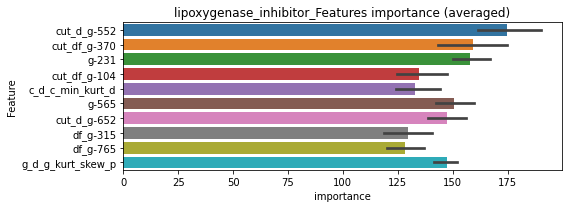

len(train_index) : 2847
len(valid_index) : 949
================================= fold 1/4 lipoxygenase_inhibitor=================================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.000522688	valid_1's binary_logloss: 0.0107984
Early stopping, best iteration is:
[972]	training's binary_logloss: 0.000527399	valid_1's binary_logloss: 0.0107679


len(train_index) : 2847
len(valid_index) : 949
================================= fold 2/4 lipoxygenase_inhibitor=================================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.000528621	valid_1's binary_logloss: 0.00726572
Early stopping, best iteration is:
[1054]	training's binary_logloss: 0.000519857	valid_1's binary_logloss: 0.00721471


len(train_index) : 2847
len(valid_index) : 949
================================= fold 3/4 lipoxygenase_inhibitor=================================


Training until validation scores don't improve for 30 rounds


len(train_index) : 2847
len(valid_index) : 949


Early stopping, best iteration is:
[548]	training's binary_logloss: 0.000804265	valid_1's binary_logloss: 0.0196949


================================= fold 4/4 lipoxygenase_inhibitor=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[898]	training's binary_logloss: 0.000550278	valid_1's binary_logloss: 0.0102188


lipoxygenase_inhibitor logloss: 0.01197645660240408


neg labels: 3289 → selected neg labels: 3287


lxr_agonist, len(trt): 6, len(othr): 3287
target_rate: 0.0002520 → Adj_target_rate: 0.0003851
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.000333761	valid_1's binary_logloss: 0.000657725
Early stopping, best iteration is:
[487]	training's binary_logloss: 0.00016254	valid_1's binary_logloss: 0.000387721
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.000326148	valid_1's binary_logloss: 0.00187589
Early stopping, best iteration is:
[484]	training's binary_logloss: 0.000161457	valid_1's binary_logloss: 0.00139604
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00033597	valid_1's binary_logloss: 0.000410475
Early stopping, best iteration is:
[483]	training's binary_logloss: 0.000162149	valid_1's binary_logloss: 0.000208161
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.000337407	valid_1's binary_logloss: 0.00284683


1 / 3 AUC score:1.000
y_Threshold: 0.0004808, Threshold: 0.0020265, pos_neg_ratio: 0.8000000
Remove_noisy_data: 132 → Positive_corect_labels: 657/3812
p_label_rate: 0.0100452 Vs.target_rate: 0.00025
Num_p_label: 40.0, conf_0:0.00142, conf_1:0.00263
Num_p_label: 40.0, Expected: 1.0, Adj_threshold_1: 0.0020265
Num_p_label: 5.0, Expected: 1.0, Adj_threshold_2: 0.0420265
Num_p_label: 4.0, Expected: 1.0, Adj_threshold_3: 0.0820265
Num_p_label: 2.0, Expected: 1.0, Adj_threshold_4: 0.1220265
threshold: 0.1220265, positive_p_label: 2.0/3982, p_label_rate: 0.0005023


Early stopping, best iteration is:
[474]	training's binary_logloss: 0.000164748	valid_1's binary_logloss: 0.00233338


positive_y_label: 657.0/3812, y_label_rate: 0.1723505
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00030524	valid_1's binary_logloss: 0.000549416
Early stopping, best iteration is:
[525]	training's binary_logloss: 0.000148874	valid_1's binary_logloss: 0.000319509
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.000302546	valid_1's binary_logloss: 0.00168264
Early stopping, best iteration is:
[501]	training's binary_logloss: 0.000148058	valid_1's binary_logloss: 0.00125389
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.000306541	valid_1's binary_logloss: 0.000327866
Early stopping, best iteration is:
[497]	training's binary_logloss: 0.000150162	valid_1's binary_logloss: 0.000159192
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.000309571	valid_1's binary_logloss: 0.00163636
Early stopping, best iteration is:
[498]	training's binary_logloss: 0.0001

2 / 3 AUC score:1.000
y_Threshold: 0.0634752, Threshold: 0.1220265, pos_neg_ratio: 0.8000000
Remove_noisy_data: 0 → Positive_corect_labels: 657.0/3812
p_label_rate: 0.0022602 Vs.target_rate: 0.00025
Num_p_label: 9.0, conf_0:0.09762, conf_1:0.14643
Num_p_label: 9.0, Expected: 1.0, Adj_threshold_1: 0.1220265
Num_p_label: 9.0, Expected: 1.0, Adj_threshold_2: 0.1620265
Num_p_label: 8.0, Expected: 1.0, Adj_threshold_3: 0.2020265
Num_p_label: 7.0, Expected: 1.0, Adj_threshold_4: 0.2420265
Num_p_label: 7.0, Expected: 1.0, Adj_threshold_5: 0.2820265
Num_p_label: 6.0, Expected: 1.0, Adj_threshold_6: 0.3220265
Num_p_label: 5.0, Expected: 1.0, Adj_threshold_7: 0.3620265
Num_p_label: 3.0, Expected: 1.0, Adj_threshold_8: 0.4020265
Num_p_label: 3.0, Expected: 1.0, Adj_threshold_9: 0.4420265
Num_p_label: 3.0, Expected: 1.0, Adj_threshold_10: 0.4820265
threshold: 0.5220265, positive_p_label: 3.0/3982, p_label_rate: 0.0007534
positive_y_label: 657.0/3812, y_label_rate: 0.1723505
================= Pseud

Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00030524	valid_1's binary_logloss: 0.000549416
Early stopping, best iteration is:
[525]	training's binary_logloss: 0.000148874	valid_1's binary_logloss: 0.000319509
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.000302546	valid_1's binary_logloss: 0.00168264
Early stopping, best iteration is:
[499]	training's binary_logloss: 0.000148058	valid_1's binary_logloss: 0.00125389
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.000306541	valid_1's binary_logloss: 0.000327866
Early stopping, best iteration is:
[498]	training's binary_logloss: 0.000150162	valid_1's binary_logloss: 0.000159192
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.000309571	valid_1's binary_logloss: 0.00163636


3 / 3 AUC score:1.000
y_Threshold: 0.0634752, Threshold: 0.5220265, pos_neg_ratio: 0.8000000
Remove_noisy_data: 0 → Positive_corect_labels: 657.0/3812
p_label_rate: 0.0007534 Vs.target_rate: 0.00025
Num_p_label: 3.0, conf_0:0.46982, conf_1:0.57423
Num_p_label: 3.0, Expected: 1.0, Adj_threshold_1: 0.5220265
Num_p_label: 2.0, Expected: 1.0, Adj_threshold_2: 0.5620265
threshold: 0.5620265, positive_p_label: 2.0/3982, p_label_rate: 0.0005023


Early stopping, best iteration is:
[498]	training's binary_logloss: 0.000149732	valid_1's binary_logloss: 0.00125615


positive_y_label: 657.0/3812, y_label_rate: 0.1723505


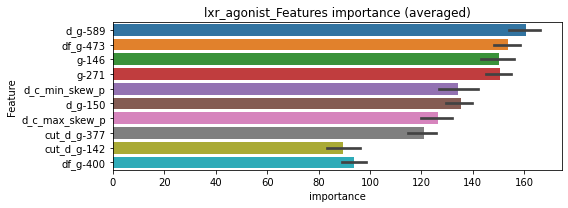

len(train_index) : 2859
len(valid_index) : 953
================================= fold 1/4 lxr_agonist=================================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.000152305	valid_1's binary_logloss: 0.000233258


len(train_index) : 2859
len(valid_index) : 953
================================= fold 2/4 lxr_agonist=================================


Early stopping, best iteration is:
[1132]	training's binary_logloss: 0.000150374	valid_1's binary_logloss: 0.000230458
Training until validation scores don't improve for 30 rounds


len(train_index) : 2859
len(valid_index) : 953
================================= fold 3/4 lxr_agonist=================================


Early stopping, best iteration is:
[934]	training's binary_logloss: 0.000152509	valid_1's binary_logloss: 0.00116071
Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.000152496	valid_1's binary_logloss: 0.000161129


len(train_index) : 2859
len(valid_index) : 953
================================= fold 4/4 lxr_agonist=================================


Early stopping, best iteration is:
[1148]	training's binary_logloss: 0.000149782	valid_1's binary_logloss: 0.000158144
Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.000152322	valid_1's binary_logloss: 0.00055228


lxr_agonist logloss: 0.0005250219632423325


Early stopping, best iteration is:
[1110]	training's binary_logloss: 0.000150319	valid_1's binary_logloss: 0.000550299
neg labels: 3289 → selected neg labels: 3284


mdm_inhibitor, len(trt): 31, len(othr): 3284
target_rate: 0.0013018 → Adj_target_rate: 0.0015554
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00186247	valid_1's binary_logloss: 0.0124066
[600]	training's binary_logloss: 0.000412782	valid_1's binary_logloss: 0.00865166
Early stopping, best iteration is:
[612]	training's binary_logloss: 0.000407559	valid_1's binary_logloss: 0.00863418
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0019477	valid_1's binary_logloss: 0.00576483
[600]	training's binary_logloss: 0.00042403	valid_1's binary_logloss: 0.00257921
Early stopping, best iteration is:
[627]	training's binary_logloss: 0.000412613	valid_1's binary_logloss: 0.00256281
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0019527	valid_1's binary_logloss: 0.00550434
[600]	training's binary_logloss: 0.000427703	valid_1's binary_logloss: 0.00215532
Early stopping, best iteration is:
[610]	training's binary_logloss: 0.00042147	valid_1's binary_lo

1 / 3 AUC score:1.000
y_Threshold: 0.0028267, Threshold: 0.0436416, pos_neg_ratio: 0.8000000
Remove_noisy_data: 132 → Positive_corect_labels: 656/3808
p_label_rate: 0.0100452 Vs.target_rate: 0.00130
Num_p_label: 40.0, conf_0:0.03055, conf_1:0.05673
Num_p_label: 40.0, Expected: 5.2, Adj_threshold_1: 0.0436416
Num_p_label: 27.0, Expected: 5.2, Adj_threshold_2: 0.0836416
Num_p_label: 21.0, Expected: 5.2, Adj_threshold_3: 0.1236416
Num_p_label: 17.0, Expected: 5.2, Adj_threshold_4: 0.1636416
Num_p_label: 15.0, Expected: 5.2, Adj_threshold_5: 0.2036416
Num_p_label: 14.0, Expected: 5.2, Adj_threshold_6: 0.2436416
Num_p_label: 12.0, Expected: 5.2, Adj_threshold_7: 0.2836416
threshold: 0.2836416, positive_p_label: 12.0/3982, p_label_rate: 0.0030136
positive_y_label: 656.0/3808, y_label_rate: 0.1722689
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00165665	valid_1's binary_logloss: 0.0118227
[600]	training's binary_logloss: 0.000392912	valid_1's binary_logloss: 0.0092101
Early stopping, best iteration is:
[586]	training's binary_logloss: 0.000398058	valid_1's binary_logloss: 0.00918171
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00169127	valid_1's binary_logloss: 0.0047269
[600]	training's binary_logloss: 0.000403017	valid_1's binary_logloss: 0.00206573
Early stopping, best iteration is:
[603]	training's binary_logloss: 0.000401854	valid_1's binary_logloss: 0.00206362
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00174134	valid_1's binary_logloss: 0.00446241
[600]	training's binary_logloss: 0.000408632	valid_1's binary_logloss: 0.00169298
Early stopping, best iteration is:
[617]	training's binary_logloss: 0.000402572	valid_1's binary_

2 / 3 AUC score:1.000
y_Threshold: 0.0182811, Threshold: 0.2836416, pos_neg_ratio: 0.8000000
Remove_noisy_data: 2 → Positive_corect_labels: 655.0/3806
p_label_rate: 0.0065294 Vs.target_rate: 0.00130
Num_p_label: 26.0, conf_0:0.22691, conf_1:0.34037
Num_p_label: 26.0, Expected: 5.2, Adj_threshold_1: 0.2836416
Num_p_label: 25.0, Expected: 5.2, Adj_threshold_2: 0.3236416
Num_p_label: 20.0, Expected: 5.2, Adj_threshold_3: 0.3636416
Num_p_label: 20.0, Expected: 5.2, Adj_threshold_4: 0.4036416
Num_p_label: 19.0, Expected: 5.2, Adj_threshold_5: 0.4436416
Num_p_label: 16.0, Expected: 5.2, Adj_threshold_6: 0.4836416
Num_p_label: 15.0, Expected: 5.2, Adj_threshold_7: 0.5236416
Num_p_label: 13.0, Expected: 5.2, Adj_threshold_8: 0.5636416
Num_p_label: 13.0, Expected: 5.2, Adj_threshold_9: 0.6036416
Num_p_label: 12.0, Expected: 5.2, Adj_threshold_10: 0.6436416
threshold: 0.6436416, positive_p_label: 12.0/3982, p_label_rate: 0.0030136
positive_y_label: 655.0/3806, y_label_rate: 0.1720967
===========

Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0016778	valid_1's binary_logloss: 0.00607141
[600]	training's binary_logloss: 0.000397185	valid_1's binary_logloss: 0.0036532
Early stopping, best iteration is:
[594]	training's binary_logloss: 0.000398913	valid_1's binary_logloss: 0.00364056
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00165395	valid_1's binary_logloss: 0.00422461
[600]	training's binary_logloss: 0.000399292	valid_1's binary_logloss: 0.00170172
Early stopping, best iteration is:
[618]	training's binary_logloss: 0.000393307	valid_1's binary_logloss: 0.00168595
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00173124	valid_1's binary_logloss: 0.00387801
[600]	training's binary_logloss: 0.000404331	valid_1's binary_logloss: 0.00117436
Early stopping, best iteration is:
[632]	training's binary_logloss: 0.000393481	valid_1's binary

3 / 3 AUC score:1.000
y_Threshold: 0.0185000, Threshold: 0.6436416, pos_neg_ratio: 0.8000000
Remove_noisy_data: 2 → Positive_corect_labels: 654.0/3804
p_label_rate: 0.0027624 Vs.target_rate: 0.00130
Num_p_label: 11.0, conf_0:0.50000, conf_1:0.70801
Num_p_label: 11.0, Expected: 5.2, Adj_threshold_1: 0.6436416
threshold: 0.6436416, positive_p_label: 11.0/3982, p_label_rate: 0.0027624
positive_y_label: 654.0/3804, y_label_rate: 0.1719243


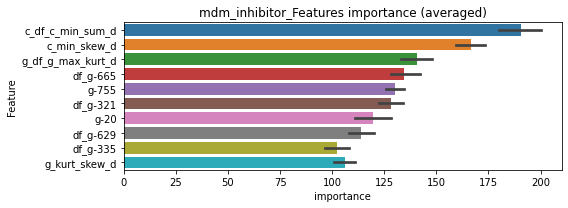

len(train_index) : 2853
len(valid_index) : 951
================================= fold 1/4 mdm_inhibitor=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[728]	training's binary_logloss: 0.000427367	valid_1's binary_logloss: 0.00391687


len(train_index) : 2853
len(valid_index) : 951
================================= fold 2/4 mdm_inhibitor=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[917]	training's binary_logloss: 0.000400021	valid_1's binary_logloss: 0.00207323


len(train_index) : 2853
len(valid_index) : 951
================================= fold 3/4 mdm_inhibitor=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[848]	training's binary_logloss: 0.000404843	valid_1's binary_logloss: 0.00156155


len(train_index) : 2853
len(valid_index) : 951
================================= fold 4/4 mdm_inhibitor=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[870]	training's binary_logloss: 0.00040276	valid_1's binary_logloss: 0.00180413


mdm_inhibitor logloss: 0.0023391757468537375


neg labels: 3289 → selected neg labels: 3273


mek_inhibitor, len(trt): 72, len(othr): 3273
target_rate: 0.0030234 → Adj_target_rate: 0.0031837
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00604679	valid_1's binary_logloss: 0.0408505
[600]	training's binary_logloss: 0.000918482	valid_1's binary_logloss: 0.0286486
Early stopping, best iteration is:
[765]	training's binary_logloss: 0.000635205	valid_1's binary_logloss: 0.0274819
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00629944	valid_1's binary_logloss: 0.0393117
[600]	training's binary_logloss: 0.000921736	valid_1's binary_logloss: 0.0259295
Early stopping, best iteration is:
[740]	training's binary_logloss: 0.000664482	valid_1's binary_logloss: 0.0247802
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00650819	valid_1's binary_logloss: 0.0199848
[600]	training's binary_logloss: 0.000957671	valid_1's binary_logloss: 0.00723313
[900]	training's binary_logloss: 0.000590156	valid_1's binary_logloss: 0.00596188
Early stopping, bes

1 / 3 AUC score:1.000
y_Threshold: 0.0063263, Threshold: 0.0178758, pos_neg_ratio: 0.8000000
Remove_noisy_data: 132 → Positive_corect_labels: 654/3795
p_label_rate: 0.0100452 Vs.target_rate: 0.00302
Num_p_label: 40.0, conf_0:0.01251, conf_1:0.02324
Num_p_label: 40.0, Expected: 12.0, Adj_threshold_1: 0.0178758
Num_p_label: 1.0, Expected: 12.0, Adj_threshold_2: 0.0578758
threshold: 0.0578758, positive_p_label: 1.0/3982, p_label_rate: 0.0002511
positive_y_label: 654.0/3795, y_label_rate: 0.1723320
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00545266	valid_1's binary_logloss: 0.0391962
[600]	training's binary_logloss: 0.000874973	valid_1's binary_logloss: 0.0275659
Early stopping, best iteration is:
[708]	training's binary_logloss: 0.000672438	valid_1's binary_logloss: 0.0265978
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0055473	valid_1's binary_logloss: 0.0357642
[600]	training's binary_logloss: 0.000881451	valid_1's binary_logloss: 0.0228984
Early stopping, best iteration is:
[770]	training's binary_logloss: 0.000614128	valid_1's binary_logloss: 0.0215108
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00591602	valid_1's binary_logloss: 0.0182479
[600]	training's binary_logloss: 0.000914447	valid_1's binary_logloss: 0.00667467
Early stopping, best iteration is:
[791]	training's binary_logloss: 0.000613337	valid_1's binary_loglo

2 / 3 AUC score:1.000
y_Threshold: 0.0292898, Threshold: 0.0578758, pos_neg_ratio: 0.8000000
Remove_noisy_data: 8 → Positive_corect_labels: 650.0/3787
p_label_rate: 0.0042692 Vs.target_rate: 0.00302
Num_p_label: 17.0, conf_0:0.04630, conf_1:0.06945
threshold: 0.0578758, positive_p_label: 17.0/3982, p_label_rate: 0.0042692
positive_y_label: 650.0/3787, y_label_rate: 0.1716398
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00527351	valid_1's binary_logloss: 0.0307029
[600]	training's binary_logloss: 0.000858093	valid_1's binary_logloss: 0.0196435
Early stopping, best iteration is:
[794]	training's binary_logloss: 0.000593144	valid_1's binary_logloss: 0.0186228
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00556236	valid_1's binary_logloss: 0.0269779
[600]	training's binary_logloss: 0.000876375	valid_1's binary_logloss: 0.0130383
[900]	training's binary_logloss: 0.000564104	valid_1's binary_logloss: 0.0116074
Early stopping, best iteration is:
[895]	training's binary_logloss: 0.000564327	valid_1's binary_logloss: 0.0116047
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00520932	valid_1's binary_logloss: 0.0319732
Early stopping, best iteration is:
[552]	training's binary_logloss: 0.00100333	valid_1's binary_loglos

3 / 3 AUC score:1.000
y_Threshold: 0.0297177, Threshold: 0.0578758, pos_neg_ratio: 0.8000000
Remove_noisy_data: 6 → Positive_corect_labels: 647.0/3781
p_label_rate: 0.0042692 Vs.target_rate: 0.00302
Num_p_label: 17.0, conf_0:0.05209, conf_1:0.06366
threshold: 0.0578758, positive_p_label: 17.0/3982, p_label_rate: 0.0042692
positive_y_label: 647.0/3781, y_label_rate: 0.1711188


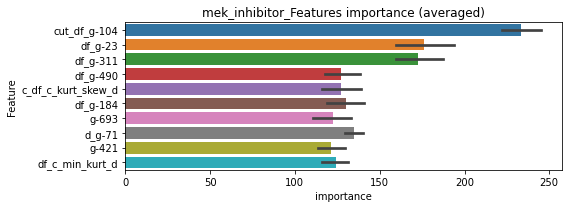

len(train_index) : 2835
len(valid_index) : 946
================================= fold 1/4 mek_inhibitor=================================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.0005982	valid_1's binary_logloss: 0.0121253
Early stopping, best iteration is:
[1060]	training's binary_logloss: 0.000582761	valid_1's binary_logloss: 0.0120249


len(train_index) : 2836
len(valid_index) : 945
================================= fold 2/4 mek_inhibitor=================================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.000595143	valid_1's binary_logloss: 0.0153523
Early stopping, best iteration is:
[1056]	training's binary_logloss: 0.000583074	valid_1's binary_logloss: 0.0153218


len(train_index) : 2836
len(valid_index) : 945
================================= fold 3/4 mek_inhibitor=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[734]	training's binary_logloss: 0.000730295	valid_1's binary_logloss: 0.0178183


len(train_index) : 2836
len(valid_index) : 945
================================= fold 4/4 mek_inhibitor=================================


Training until validation scores don't improve for 30 rounds


mek_inhibitor logloss: 0.016826300576972708


Early stopping, best iteration is:
[540]	training's binary_logloss: 0.000975719	valid_1's binary_logloss: 0.0221453
neg labels: 3289 → selected neg labels: 3276


membrane_integrity_inhibitor, len(trt): 74, len(othr): 3276
target_rate: 0.0031074 → Adj_target_rate: 0.0032587
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00456409	valid_1's binary_logloss: 0.031412
[600]	training's binary_logloss: 0.000829305	valid_1's binary_logloss: 0.0216368
Early stopping, best iteration is:
[762]	training's binary_logloss: 0.000609194	valid_1's binary_logloss: 0.0210269
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00456135	valid_1's binary_logloss: 0.0347847
[600]	training's binary_logloss: 0.000828631	valid_1's binary_logloss: 0.0266988
Early stopping, best iteration is:
[741]	training's binary_logloss: 0.000625378	valid_1's binary_logloss: 0.0259742
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00481827	valid_1's binary_logloss: 0.0376779
[600]	training's binary_logloss: 0.000838377	valid_1's binary_logloss: 0.0317038
Early stopping, best iteration is:
[629]	training's binary_logloss: 0.000775753	valid_1's binary_loglos

1 / 3 AUC score:1.000
y_Threshold: 0.0052880, Threshold: 0.0148041, pos_neg_ratio: 0.8000000
Remove_noisy_data: 142 → Positive_corect_labels: 650/3789
p_label_rate: 0.0100452 Vs.target_rate: 0.00311
Num_p_label: 40.0, conf_0:0.01036, conf_1:0.01925
Num_p_label: 40.0, Expected: 12.4, Adj_threshold_1: 0.0148041
Num_p_label: 3.0, Expected: 12.4, Adj_threshold_2: 0.0548041
threshold: 0.0548041, positive_p_label: 3.0/3982, p_label_rate: 0.0007534
positive_y_label: 650.0/3789, y_label_rate: 0.1715492
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0039071	valid_1's binary_logloss: 0.0309035
[600]	training's binary_logloss: 0.000760145	valid_1's binary_logloss: 0.0209937
Early stopping, best iteration is:
[780]	training's binary_logloss: 0.000561719	valid_1's binary_logloss: 0.0198841
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00404985	valid_1's binary_logloss: 0.0327729
[600]	training's binary_logloss: 0.000763263	valid_1's binary_logloss: 0.0260111
Early stopping, best iteration is:
[575]	training's binary_logloss: 0.000822738	valid_1's binary_logloss: 0.0259569
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00386619	valid_1's binary_logloss: 0.0422095
Early stopping, best iteration is:
[427]	training's binary_logloss: 0.00149045	valid_1's binary_logloss: 0.0389032
Training until validation scores don't improve for 30 rounds
[300]	tr

2 / 3 AUC score:1.000
y_Threshold: 0.0302427, Threshold: 0.0548041, pos_neg_ratio: 0.8000000
Remove_noisy_data: 6 → Positive_corect_labels: 647.0/3783
p_label_rate: 0.0025113 Vs.target_rate: 0.00311
Num_p_label: 10.0, conf_0:0.04384, conf_1:0.06576
threshold: 0.0548041, positive_p_label: 10.0/3982, p_label_rate: 0.0025113
positive_y_label: 647.0/3783, y_label_rate: 0.1710283
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00382439	valid_1's binary_logloss: 0.030772
[600]	training's binary_logloss: 0.000740615	valid_1's binary_logloss: 0.023072
Early stopping, best iteration is:
[732]	training's binary_logloss: 0.000573323	valid_1's binary_logloss: 0.0226367
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00378725	valid_1's binary_logloss: 0.0352636
[600]	training's binary_logloss: 0.00073995	valid_1's binary_logloss: 0.0276768
Early stopping, best iteration is:
[626]	training's binary_logloss: 0.000691685	valid_1's binary_logloss: 0.0274896
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0038728	valid_1's binary_logloss: 0.0350077
Early stopping, best iteration is:
[536]	training's binary_logloss: 0.000933629	valid_1's binary_logloss: 0.0299891
Training until validation scores don't improve for 30 rounds
[300]	trai

3 / 3 AUC score:1.000
y_Threshold: 0.0242882, Threshold: 0.0548041, pos_neg_ratio: 0.8000000
Remove_noisy_data: 4 → Positive_corect_labels: 645.0/3779
p_label_rate: 0.0020090 Vs.target_rate: 0.00311
Num_p_label: 8.0, conf_0:0.04932, conf_1:0.06028
Num_p_label: 8.0, Expected: 12.4, Adj_threshold_1: 0.0548041
threshold: 0.0548041, positive_p_label: 8.0/3982, p_label_rate: 0.0020090
positive_y_label: 645.0/3779, y_label_rate: 0.1706801


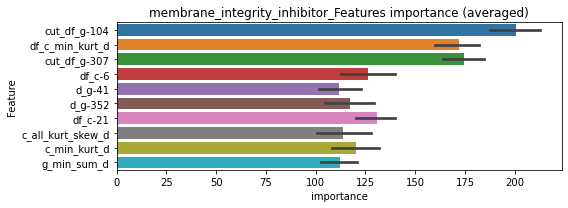

len(train_index) : 2834
len(valid_index) : 945
================================= fold 1/4 membrane_integrity_inhibitor=================================


Training until validation scores don't improve for 30 rounds


len(train_index) : 2834
len(valid_index) : 945


Early stopping, best iteration is:
[504]	training's binary_logloss: 0.00095967	valid_1's binary_logloss: 0.0264241


================================= fold 2/4 membrane_integrity_inhibitor=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[545]	training's binary_logloss: 0.000879988	valid_1's binary_logloss: 0.027507


len(train_index) : 2834
len(valid_index) : 945
================================= fold 3/4 membrane_integrity_inhibitor=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[930]	training's binary_logloss: 0.000605742	valid_1's binary_logloss: 0.0140718


len(train_index) : 2835
len(valid_index) : 944
================================= fold 4/4 membrane_integrity_inhibitor=================================


Training until validation scores don't improve for 30 rounds


membrane_integrity_inhibitor logloss: 0.022651318253715108
membrane_integrity_inhibitor clipping


Early stopping, best iteration is:
[503]	training's binary_logloss: 0.00097555	valid_1's binary_logloss: 0.0225892
neg labels: 3289 → selected neg labels: 3283


mineralocorticoid_receptor_antagonist, len(trt): 25, len(othr): 3283
target_rate: 0.0010498 → Adj_target_rate: 0.0012955
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00135063	valid_1's binary_logloss: 0.00381283
[600]	training's binary_logloss: 0.00034071	valid_1's binary_logloss: 0.00171255
Early stopping, best iteration is:
[624]	training's binary_logloss: 0.000336747	valid_1's binary_logloss: 0.00170609
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00136879	valid_1's binary_logloss: 0.00420409
[600]	training's binary_logloss: 0.00034344	valid_1's binary_logloss: 0.00208143
Early stopping, best iteration is:
[587]	training's binary_logloss: 0.000344843	valid_1's binary_logloss: 0.00207744
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00141271	valid_1's binary_logloss: 0.00437151
[600]	training's binary_logloss: 0.000347392	valid_1's binary_logloss: 0.00219916
Early stopping, best iteration is:
[601]	training's binary_logloss: 0.000347106	valid_1's binary

1 / 3 AUC score:1.000
y_Threshold: 0.0017760, Threshold: 0.0050005, pos_neg_ratio: 0.8000000
Remove_noisy_data: 132 → Positive_corect_labels: 656/3807
p_label_rate: 0.0100452 Vs.target_rate: 0.00105
Num_p_label: 40.0, conf_0:0.00350, conf_1:0.00650
Num_p_label: 40.0, Expected: 4.2, Adj_threshold_1: 0.0050005
Num_p_label: 4.0, Expected: 4.2, Adj_threshold_2: 0.0450005


Early stopping, best iteration is:
[553]	training's binary_logloss: 0.00035037	valid_1's binary_logloss: 0.00799353


threshold: 0.0450005, positive_p_label: 4.0/3982, p_label_rate: 0.0010045
positive_y_label: 656.0/3807, y_label_rate: 0.1723142
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00129394	valid_1's binary_logloss: 0.0036275
[600]	training's binary_logloss: 0.00033838	valid_1's binary_logloss: 0.00156327
Early stopping, best iteration is:
[580]	training's binary_logloss: 0.000341287	valid_1's binary_logloss: 0.00155988
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00131124	valid_1's binary_logloss: 0.00369261
[600]	training's binary_logloss: 0.000337326	valid_1's binary_logloss: 0.00174602
Early stopping, best iteration is:
[592]	training's binary_logloss: 0.000338444	valid_1's binary_logloss: 0.00174387
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00136419	valid_1's binary_logloss: 0.0031135
Early stopping, best iteration is:
[567]	training's binary_logloss: 0.00034923	valid_1's binary_logloss: 0.00137478
Training until validation scores don't improve for 30 rounds
[3

2 / 3 AUC score:1.000
y_Threshold: 0.0139546, Threshold: 0.0450005, pos_neg_ratio: 0.8000000


Early stopping, best iteration is:
[553]	training's binary_logloss: 0.000348148	valid_1's binary_logloss: 0.0066593


Remove_noisy_data: 0 → Positive_corect_labels: 656.0/3807
p_label_rate: 0.0020090 Vs.target_rate: 0.00105
Num_p_label: 8.0, conf_0:0.03600, conf_1:0.05400
Num_p_label: 8.0, Expected: 4.2, Adj_threshold_1: 0.0450005
threshold: 0.0450005, positive_p_label: 8.0/3982, p_label_rate: 0.0020090
positive_y_label: 656.0/3807, y_label_rate: 0.1723142
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00129394	valid_1's binary_logloss: 0.0036275
[600]	training's binary_logloss: 0.00033838	valid_1's binary_logloss: 0.00156327
Early stopping, best iteration is:
[580]	training's binary_logloss: 0.000341287	valid_1's binary_logloss: 0.00155988
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00131124	valid_1's binary_logloss: 0.00369261
[600]	training's binary_logloss: 0.000337326	valid_1's binary_logloss: 0.00174602
Early stopping, best iteration is:
[592]	training's binary_logloss: 0.000338444	valid_1's binary_logloss: 0.00174387
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00136419	valid_1's binary_logloss: 0.0031135
Early stopping, best iteration is:
[567]	training's binary_logloss: 0.00034923	valid_1's binary_logloss: 0.00137478
Training until validation scores don't improve for 30 rounds
[3

3 / 3 AUC score:1.000
y_Threshold: 0.0139546, Threshold: 0.0450005, pos_neg_ratio: 0.8000000
Remove_noisy_data: 0 → Positive_corect_labels: 656.0/3807
p_label_rate: 0.0020090 Vs.target_rate: 0.00105
Num_p_label: 8.0, conf_0:0.04050, conf_1:0.04950
Num_p_label: 8.0, Expected: 4.2, Adj_threshold_1: 0.0450005


Early stopping, best iteration is:
[553]	training's binary_logloss: 0.000348148	valid_1's binary_logloss: 0.0066593


threshold: 0.0450005, positive_p_label: 8.0/3982, p_label_rate: 0.0020090
positive_y_label: 656.0/3807, y_label_rate: 0.1723142


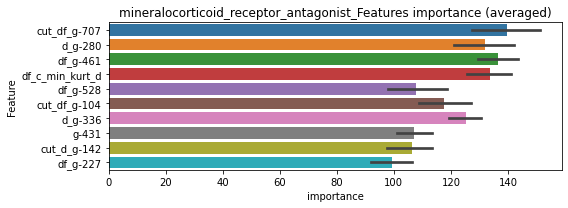

len(train_index) : 2855
len(valid_index) : 952
================================= fold 1/4 mineralocorticoid_receptor_antagonist=================================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.000333698	valid_1's binary_logloss: 0.00149299
Early stopping, best iteration is:
[1002]	training's binary_logloss: 0.000333698	valid_1's binary_logloss: 0.00149299


len(train_index) : 2855
len(valid_index) : 952
================================= fold 2/4 mineralocorticoid_receptor_antagonist=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[879]	training's binary_logloss: 0.000342037	valid_1's binary_logloss: 0.0017342


len(train_index) : 2855
len(valid_index) : 952
================================= fold 3/4 mineralocorticoid_receptor_antagonist=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[919]	training's binary_logloss: 0.000339445	valid_1's binary_logloss: 0.00119961


len(train_index) : 2856
len(valid_index) : 951
================================= fold 4/4 mineralocorticoid_receptor_antagonist=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[834]	training's binary_logloss: 0.000344445	valid_1's binary_logloss: 0.00586432


mineralocorticoid_receptor_antagonist logloss: 0.0025720755860487235


neg labels: 3289 → selected neg labels: 3289


monoacylglycerol_lipase_inhibitor, len(trt): 12, len(othr): 3289
target_rate: 0.0005039 → Adj_target_rate: 0.0006942
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.000563895	valid_1's binary_logloss: 0.0029104
Early stopping, best iteration is:
[519]	training's binary_logloss: 0.000223547	valid_1's binary_logloss: 0.00203512
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.000572695	valid_1's binary_logloss: 0.00463821
Early stopping, best iteration is:
[497]	training's binary_logloss: 0.000227664	valid_1's binary_logloss: 0.00322482
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.000566376	valid_1's binary_logloss: 0.00117209
Early stopping, best iteration is:
[491]	training's binary_logloss: 0.000226116	valid_1's binary_logloss: 0.000538892
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.000565623	valid_1's binary_logloss: 0.00118162


1 / 3 AUC score:1.000
y_Threshold: 0.0009275, Threshold: 0.0020478, pos_neg_ratio: 0.8000000
Remove_noisy_data: 133 → Positive_corect_labels: 657/3813
p_label_rate: 0.0100452 Vs.target_rate: 0.00050
Num_p_label: 40.0, conf_0:0.00143, conf_1:0.00266
Num_p_label: 40.0, Expected: 2.0, Adj_threshold_1: 0.0020478
Num_p_label: 0.0, Expected: 2.0, Adj_threshold_2: 0.0420478


Early stopping, best iteration is:
[506]	training's binary_logloss: 0.00022718	valid_1's binary_logloss: 0.000574167


threshold: 0.0420478, positive_p_label: 0.0/3982, p_label_rate: 0.0000000
positive_y_label: 657.0/3813, y_label_rate: 0.1723053
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.000510937	valid_1's binary_logloss: 0.00292773
Early stopping, best iteration is:
[481]	training's binary_logloss: 0.000219268	valid_1's binary_logloss: 0.00237296
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.000517624	valid_1's binary_logloss: 0.00283348
Early stopping, best iteration is:
[489]	training's binary_logloss: 0.000217622	valid_1's binary_logloss: 0.00195047
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.000535522	valid_1's binary_logloss: 0.000568273
Early stopping, best iteration is:
[490]	training's binary_logloss: 0.00022092	valid_1's binary_logloss: 0.000244655
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.000511403	valid_1's binary_logloss: 0.000868431


2 / 3 AUC score:1.000
y_Threshold: 0.0425168, Threshold: 0.0420478, pos_neg_ratio: 0.8000000
Remove_noisy_data: 0 → Positive_corect_labels: 657.0/3813
p_label_rate: 0.0007534 Vs.target_rate: 0.00050
Num_p_label: 3.0, conf_0:0.03364, conf_1:0.05046


Early stopping, best iteration is:
[496]	training's binary_logloss: 0.000215432	valid_1's binary_logloss: 0.000413581


threshold: 0.0420478, positive_p_label: 3.0/3982, p_label_rate: 0.0007534
positive_y_label: 657.0/3813, y_label_rate: 0.1723053
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.000510937	valid_1's binary_logloss: 0.00292773
Early stopping, best iteration is:
[481]	training's binary_logloss: 0.000219268	valid_1's binary_logloss: 0.00237296
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.000517624	valid_1's binary_logloss: 0.00283348
Early stopping, best iteration is:
[489]	training's binary_logloss: 0.000217622	valid_1's binary_logloss: 0.00195047
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.000535522	valid_1's binary_logloss: 0.000568273
Early stopping, best iteration is:
[490]	training's binary_logloss: 0.00022092	valid_1's binary_logloss: 0.000244655
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.000511403	valid_1's binary_logloss: 0.000868431


3 / 3 AUC score:1.000
y_Threshold: 0.0425168, Threshold: 0.0420478, pos_neg_ratio: 0.8000000
Remove_noisy_data: 0 → Positive_corect_labels: 657.0/3813
p_label_rate: 0.0007534 Vs.target_rate: 0.00050
Num_p_label: 3.0, conf_0:0.03784, conf_1:0.04625


Early stopping, best iteration is:
[496]	training's binary_logloss: 0.000215432	valid_1's binary_logloss: 0.000413581


threshold: 0.0420478, positive_p_label: 3.0/3982, p_label_rate: 0.0007534
positive_y_label: 657.0/3813, y_label_rate: 0.1723053


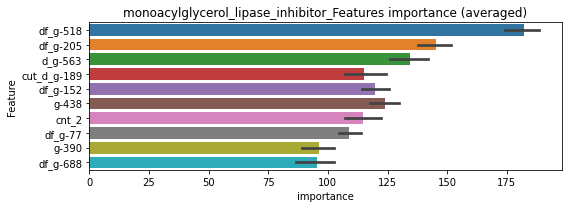

len(train_index) : 2859
len(valid_index) : 954
================================= fold 1/4 monoacylglycerol_lipase_inhibitor=================================


Training until validation scores don't improve for 30 rounds


len(train_index) : 2860
len(valid_index) : 953
================================= fold 2/4 monoacylglycerol_lipase_inhibitor=================================


Early stopping, best iteration is:
[895]	training's binary_logloss: 0.000219273	valid_1's binary_logloss: 0.00151167
Training until validation scores don't improve for 30 rounds


len(train_index) : 2860
len(valid_index) : 953
================================= fold 3/4 monoacylglycerol_lipase_inhibitor=================================


Early stopping, best iteration is:
[930]	training's binary_logloss: 0.000213331	valid_1's binary_logloss: 0.001812
Training until validation scores don't improve for 30 rounds


len(train_index) : 2860
len(valid_index) : 953
================================= fold 4/4 monoacylglycerol_lipase_inhibitor=================================


Early stopping, best iteration is:
[920]	training's binary_logloss: 0.00021835	valid_1's binary_logloss: 0.000257172
Training until validation scores don't improve for 30 rounds


monoacylglycerol_lipase_inhibitor logloss: 0.0009989893656839556


Early stopping, best iteration is:
[831]	training's binary_logloss: 0.000220731	valid_1's binary_logloss: 0.000414316
neg labels: 3289 → selected neg labels: 3280


monoamine_oxidase_inhibitor, len(trt): 85, len(othr): 3280
target_rate: 0.0035693 → Adj_target_rate: 0.0036661
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00644683	valid_1's binary_logloss: 0.0663548
Early stopping, best iteration is:
[524]	training's binary_logloss: 0.00139231	valid_1's binary_logloss: 0.0579391
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00760537	valid_1's binary_logloss: 0.0550343
[600]	training's binary_logloss: 0.0011241	valid_1's binary_logloss: 0.0449185
Early stopping, best iteration is:
[587]	training's binary_logloss: 0.00117467	valid_1's binary_logloss: 0.0447646
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00732459	valid_1's binary_logloss: 0.0364648
[600]	training's binary_logloss: 0.00112527	valid_1's binary_logloss: 0.025566
Early stopping, best iteration is:
[633]	training's binary_logloss: 0.00101596	valid_1's binary_logloss: 0.0254537
Training until validation scores don't improve for 30 rounds
[300]	trainin

1 / 3 AUC score:0.997
y_Threshold: 0.0091210, Threshold: 0.0241168, pos_neg_ratio: 0.8000000
Remove_noisy_data: 140 → Positive_corect_labels: 652/3796
p_label_rate: 0.0100452 Vs.target_rate: 0.00357
Num_p_label: 40.0, conf_0:0.01688, conf_1:0.03135
Num_p_label: 40.0, Expected: 14.2, Adj_threshold_1: 0.0241168
Num_p_label: 12.0, Expected: 14.2, Adj_threshold_2: 0.0641168
threshold: 0.0641168, positive_p_label: 12.0/3982, p_label_rate: 0.0030136
positive_y_label: 652.0/3796, y_label_rate: 0.1717597
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00612373	valid_1's binary_logloss: 0.0586258
Early stopping, best iteration is:
[556]	training's binary_logloss: 0.00116022	valid_1's binary_logloss: 0.0464312
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00582457	valid_1's binary_logloss: 0.0471342
Early stopping, best iteration is:
[487]	training's binary_logloss: 0.00153981	valid_1's binary_logloss: 0.0383814
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00640901	valid_1's binary_logloss: 0.0405867
[600]	training's binary_logloss: 0.00104729	valid_1's binary_logloss: 0.0283402
Early stopping, best iteration is:
[789]	training's binary_logloss: 0.000686497	valid_1's binary_logloss: 0.0277339
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00626399	valid_1's binary_logloss: 0.045272
[600]	train

2 / 3 AUC score:0.999
y_Threshold: 0.0243213, Threshold: 0.0641168, pos_neg_ratio: 0.8000000
Remove_noisy_data: 12 → Positive_corect_labels: 646.0/3784
p_label_rate: 0.0050226 Vs.target_rate: 0.00357
Num_p_label: 20.0, conf_0:0.05129, conf_1:0.07694
threshold: 0.0641168, positive_p_label: 20.0/3982, p_label_rate: 0.0050226
positive_y_label: 646.0/3784, y_label_rate: 0.1707188
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00574911	valid_1's binary_logloss: 0.0521327
Early stopping, best iteration is:
[507]	training's binary_logloss: 0.00136622	valid_1's binary_logloss: 0.0424503
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00511166	valid_1's binary_logloss: 0.0589468
Early stopping, best iteration is:
[448]	training's binary_logloss: 0.00168953	valid_1's binary_logloss: 0.0539261
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00599422	valid_1's binary_logloss: 0.0353315
[600]	training's binary_logloss: 0.000986448	valid_1's binary_logloss: 0.023811
Early stopping, best iteration is:
[762]	training's binary_logloss: 0.00068589	valid_1's binary_logloss: 0.0225745
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00568751	valid_1's binary_logloss: 0.0380188


3 / 3 AUC score:0.999


Early stopping, best iteration is:
[515]	training's binary_logloss: 0.00132789	valid_1's binary_logloss: 0.0307218


y_Threshold: 0.0272756, Threshold: 0.0641168, pos_neg_ratio: 0.8000000
Remove_noisy_data: 16 → Positive_corect_labels: 638.0/3768
p_label_rate: 0.0057760 Vs.target_rate: 0.00357
Num_p_label: 23.0, conf_0:0.05771, conf_1:0.07053
Num_p_label: 23.0, Expected: 14.2, Adj_threshold_1: 0.0641168
Num_p_label: 9.0, Expected: 14.2, Adj_threshold_2: 0.1041168
threshold: 0.1041168, positive_p_label: 9.0/3982, p_label_rate: 0.0022602
positive_y_label: 638.0/3768, y_label_rate: 0.1693206


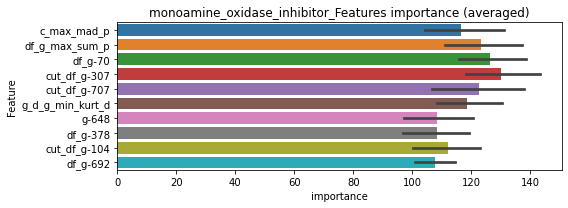

len(train_index) : 2826
len(valid_index) : 942
================================= fold 1/4 monoamine_oxidase_inhibitor=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[591]	training's binary_logloss: 0.000949809	valid_1's binary_logloss: 0.02065


len(train_index) : 2826
len(valid_index) : 942
================================= fold 2/4 monoamine_oxidase_inhibitor=================================


Training until validation scores don't improve for 30 rounds


len(train_index) : 2826
len(valid_index) : 942
================================= fold 3/4 monoamine_oxidase_inhibitor=================================


Early stopping, best iteration is:
[411]	training's binary_logloss: 0.00143041	valid_1's binary_logloss: 0.0333546
Training until validation scores don't improve for 30 rounds


len(train_index) : 2826
len(valid_index) : 942
================================= fold 4/4 monoamine_oxidase_inhibitor=================================


Early stopping, best iteration is:
[368]	training's binary_logloss: 0.00163841	valid_1's binary_logloss: 0.0310685
Training until validation scores don't improve for 30 rounds


monoamine_oxidase_inhibitor logloss: 0.02834834270790592
monoamine_oxidase_inhibitor clipping


Early stopping, best iteration is:
[548]	training's binary_logloss: 0.00102098	valid_1's binary_logloss: 0.0283203
neg labels: 3289 → selected neg labels: 3287


monopolar_spindle_1_kinase_inhibitor, len(trt): 18, len(othr): 3287
target_rate: 0.0007559 → Adj_target_rate: 0.0009799
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.000946501	valid_1's binary_logloss: 0.00396094
Early stopping, best iteration is:
[559]	training's binary_logloss: 0.000302574	valid_1's binary_logloss: 0.00306108
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.000961782	valid_1's binary_logloss: 0.00483472
Early stopping, best iteration is:
[553]	training's binary_logloss: 0.000299078	valid_1's binary_logloss: 0.00273103
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.000971594	valid_1's binary_logloss: 0.00335251
Early stopping, best iteration is:
[567]	training's binary_logloss: 0.000304162	valid_1's binary_logloss: 0.00207587
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.000968272	valid_1's binary_logloss: 0.00271301


1 / 3 AUC score:1.000
y_Threshold: 0.0015641, Threshold: 0.0185356, pos_neg_ratio: 0.8000000
Remove_noisy_data: 132 → Positive_corect_labels: 657/3812
p_label_rate: 0.0100452 Vs.target_rate: 0.00076
Num_p_label: 40.0, conf_0:0.01297, conf_1:0.02410
Num_p_label: 40.0, Expected: 3.0, Adj_threshold_1: 0.0185356
Num_p_label: 11.0, Expected: 3.0, Adj_threshold_2: 0.0585356
Num_p_label: 5.0, Expected: 3.0, Adj_threshold_3: 0.0985356


Early stopping, best iteration is:
[550]	training's binary_logloss: 0.000302242	valid_1's binary_logloss: 0.00138831


threshold: 0.0985356, positive_p_label: 5.0/3982, p_label_rate: 0.0012557
positive_y_label: 657.0/3812, y_label_rate: 0.1723505
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.000900261	valid_1's binary_logloss: 0.00174033
Early stopping, best iteration is:
[564]	training's binary_logloss: 0.000288139	valid_1's binary_logloss: 0.000675202
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.000896678	valid_1's binary_logloss: 0.00340151
Early stopping, best iteration is:
[519]	training's binary_logloss: 0.000294589	valid_1's binary_logloss: 0.00190221
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.000914765	valid_1's binary_logloss: 0.00358532
Early stopping, best iteration is:
[522]	training's binary_logloss: 0.000295964	valid_1's binary_logloss: 0.00235
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.000898939	valid_1's binary_logloss: 0.00268913


2 / 3 AUC score:1.000
y_Threshold: 0.0537791, Threshold: 0.0985356, pos_neg_ratio: 0.8000000
Remove_noisy_data: 0 → Positive_corect_labels: 657.0/3812
p_label_rate: 0.0123054 Vs.target_rate: 0.00076
Num_p_label: 49.0, conf_0:0.07883, conf_1:0.11824
Num_p_label: 49.0, Expected: 3.0, Adj_threshold_1: 0.0985356
Num_p_label: 39.0, Expected: 3.0, Adj_threshold_2: 0.1385356
Num_p_label: 29.0, Expected: 3.0, Adj_threshold_3: 0.1785356


Early stopping, best iteration is:
[530]	training's binary_logloss: 0.000289515	valid_1's binary_logloss: 0.0013666


Num_p_label: 23.0, Expected: 3.0, Adj_threshold_4: 0.2185356
Num_p_label: 21.0, Expected: 3.0, Adj_threshold_5: 0.2585356
Num_p_label: 17.0, Expected: 3.0, Adj_threshold_6: 0.2985356
Num_p_label: 13.0, Expected: 3.0, Adj_threshold_7: 0.3385356
Num_p_label: 11.0, Expected: 3.0, Adj_threshold_8: 0.3785356
Num_p_label: 8.0, Expected: 3.0, Adj_threshold_9: 0.4185356
Num_p_label: 7.0, Expected: 3.0, Adj_threshold_10: 0.4585356
threshold: 0.4585356, positive_p_label: 7.0/3982, p_label_rate: 0.0017579
positive_y_label: 657.0/3812, y_label_rate: 0.1723505
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.000900261	valid_1's binary_logloss: 0.00174033
[600]	training's binary_logloss: 0.000288139	valid_1's binary_logloss: 0.000675202
Early stopping, best iteration is:
[590]	training's binary_logloss: 0.000288139	valid_1's binary_logloss: 0.000675202
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.000896678	valid_1's binary_logloss: 0.00340151
Early stopping, best iteration is:
[519]	training's binary_logloss: 0.000294589	valid_1's binary_logloss: 0.00190221
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.000914765	valid_1's binary_logloss: 0.00358532
Early stopping, best iteration is:
[522]	training's binary_logloss: 0.000295964	valid_1's binary_logloss: 0.00235
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.000898939	valid_1's binary_logloss: 0.00268

3 / 3 AUC score:1.000
y_Threshold: 0.0537791, Threshold: 0.4585356, pos_neg_ratio: 0.8000000
Remove_noisy_data: 0 → Positive_corect_labels: 657.0/3812
p_label_rate: 0.0017579 Vs.target_rate: 0.00076
Num_p_label: 7.0, conf_0:0.41268, conf_1:0.50439
Num_p_label: 7.0, Expected: 3.0, Adj_threshold_1: 0.4585356


Early stopping, best iteration is:
[530]	training's binary_logloss: 0.000289515	valid_1's binary_logloss: 0.0013666


threshold: 0.4585356, positive_p_label: 7.0/3982, p_label_rate: 0.0017579
positive_y_label: 657.0/3812, y_label_rate: 0.1723505


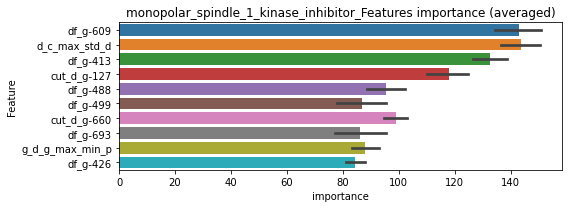

len(train_index) : 2859
len(valid_index) : 953
================================= fold 1/4 monopolar_spindle_1_kinase_inhibitor=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[820]	training's binary_logloss: 0.000297395	valid_1's binary_logloss: 0.000627973


len(train_index) : 2859
len(valid_index) : 953
================================= fold 2/4 monopolar_spindle_1_kinase_inhibitor=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[842]	training's binary_logloss: 0.000294705	valid_1's binary_logloss: 0.00123771


len(train_index) : 2859
len(valid_index) : 953
================================= fold 3/4 monopolar_spindle_1_kinase_inhibitor=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[793]	training's binary_logloss: 0.000304161	valid_1's binary_logloss: 0.00153052


len(train_index) : 2859
len(valid_index) : 953
================================= fold 4/4 monopolar_spindle_1_kinase_inhibitor=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[819]	training's binary_logloss: 0.000294649	valid_1's binary_logloss: 0.00183573


monopolar_spindle_1_kinase_inhibitor logloss: 0.0013080872101852473


neg labels: 3289 → selected neg labels: 3269


mtor_inhibitor, len(trt): 130, len(othr): 3269
target_rate: 0.0054590 → Adj_target_rate: 0.0052608
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0122923	valid_1's binary_logloss: 0.115456
Early stopping, best iteration is:
[473]	training's binary_logloss: 0.00325851	valid_1's binary_logloss: 0.104049
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0132072	valid_1's binary_logloss: 0.0902311
[600]	training's binary_logloss: 0.00180697	valid_1's binary_logloss: 0.0724631
Early stopping, best iteration is:
[627]	training's binary_logloss: 0.00163185	valid_1's binary_logloss: 0.0721929
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.012666	valid_1's binary_logloss: 0.0958247
[600]	training's binary_logloss: 0.00177519	valid_1's binary_logloss: 0.0765888
Early stopping, best iteration is:
[694]	training's binary_logloss: 0.00131493	valid_1's binary_logloss: 0.0754634
Training until validation scores don't improve for 30 rounds
[300]	training's 

1 / 3 AUC score:0.990
y_Threshold: 0.0211179, Threshold: 0.3007659, pos_neg_ratio: 0.8000000
Remove_noisy_data: 168 → Positive_corect_labels: 635/3754
p_label_rate: 0.0100452 Vs.target_rate: 0.00546
Num_p_label: 40.0, conf_0:0.21054, conf_1:0.39100
Num_p_label: 40.0, Expected: 21.7, Adj_threshold_1: 0.3007659
Num_p_label: 33.0, Expected: 21.7, Adj_threshold_2: 0.3407659
Num_p_label: 29.0, Expected: 21.7, Adj_threshold_3: 0.3807659
threshold: 0.3807659, positive_p_label: 29.0/3982, p_label_rate: 0.0072828
positive_y_label: 635.0/3754, y_label_rate: 0.1691529
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0102636	valid_1's binary_logloss: 0.0903979
Early stopping, best iteration is:
[510]	training's binary_logloss: 0.00221661	valid_1's binary_logloss: 0.0765268
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0107502	valid_1's binary_logloss: 0.0628239
[600]	training's binary_logloss: 0.00160069	valid_1's binary_logloss: 0.0443344
Early stopping, best iteration is:
[671]	training's binary_logloss: 0.00128164	valid_1's binary_logloss: 0.0433679
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0107192	valid_1's binary_logloss: 0.0772041
[600]	training's binary_logloss: 0.00155715	valid_1's binary_logloss: 0.0577608
Early stopping, best iteration is:
[849]	training's binary_logloss: 0.000860097	valid_1's binary_logloss: 0.0561223
Training until validation scores don't improve for 30 rounds
[300]	trainin

2 / 3 AUC score:0.997
y_Threshold: 0.0517130, Threshold: 0.3807659, pos_neg_ratio: 0.8000000
Remove_noisy_data: 28 → Positive_corect_labels: 621.0/3726
p_label_rate: 0.0155701 Vs.target_rate: 0.00546
Num_p_label: 62.0, conf_0:0.30461, conf_1:0.45692
Num_p_label: 62.0, Expected: 21.7, Adj_threshold_1: 0.3807659
Num_p_label: 57.0, Expected: 21.7, Adj_threshold_2: 0.4207659
Num_p_label: 56.0, Expected: 21.7, Adj_threshold_3: 0.4607659
Num_p_label: 50.0, Expected: 21.7, Adj_threshold_4: 0.5007659
Num_p_label: 48.0, Expected: 21.7, Adj_threshold_5: 0.5407659
Num_p_label: 44.0, Expected: 21.7, Adj_threshold_6: 0.5807659
Num_p_label: 40.0, Expected: 21.7, Adj_threshold_7: 0.6207659
Num_p_label: 37.0, Expected: 21.7, Adj_threshold_8: 0.6607659
Num_p_label: 35.0, Expected: 21.7, Adj_threshold_9: 0.7007659
Num_p_label: 30.0, Expected: 21.7, Adj_threshold_10: 0.7407659
threshold: 0.7407659, positive_p_label: 30.0/3982, p_label_rate: 0.0075339
positive_y_label: 621.0/3726, y_label_rate: 0.1666667


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00941961	valid_1's binary_logloss: 0.0746796
[600]	training's binary_logloss: 0.00143242	valid_1's binary_logloss: 0.0577626
Early stopping, best iteration is:
[585]	training's binary_logloss: 0.00151459	valid_1's binary_logloss: 0.0576609
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.010284	valid_1's binary_logloss: 0.0591654
[600]	training's binary_logloss: 0.00153552	valid_1's binary_logloss: 0.0421927
Early stopping, best iteration is:
[598]	training's binary_logloss: 0.00154789	valid_1's binary_logloss: 0.0421312
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00910524	valid_1's binary_logloss: 0.0928947
Early stopping, best iteration is:
[469]	training's binary_logloss: 0.00249787	valid_1's binary_logloss: 0.0872922
Training until validation scores don't improve for 30 rounds
[300]	trainin

3 / 3 AUC score:0.997
y_Threshold: 0.0476246, Threshold: 0.7407659, pos_neg_ratio: 0.8000000
Remove_noisy_data: 40 → Positive_corect_labels: 601.0/3686
p_label_rate: 0.0065294 Vs.target_rate: 0.00546
Num_p_label: 26.0, conf_0:0.50000, conf_1:0.80000
threshold: 0.7407659, positive_p_label: 26.0/3982, p_label_rate: 0.0065294
positive_y_label: 601.0/3686, y_label_rate: 0.1630494


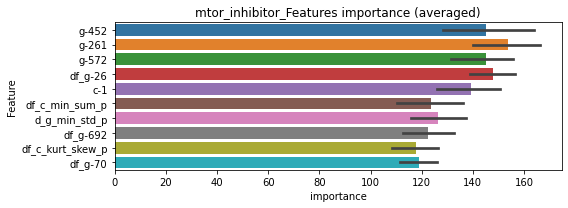

len(train_index) : 2764
len(valid_index) : 922
================================= fold 1/4 mtor_inhibitor=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[734]	training's binary_logloss: 0.00102597	valid_1's binary_logloss: 0.0351417


len(train_index) : 2764
len(valid_index) : 922
================================= fold 2/4 mtor_inhibitor=================================


Training until validation scores don't improve for 30 rounds


len(train_index) : 2765
len(valid_index) : 921
================================= fold 3/4 mtor_inhibitor=================================


Early stopping, best iteration is:
[448]	training's binary_logloss: 0.00171733	valid_1's binary_logloss: 0.0455468
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[610]	training's binary_logloss: 0.00122761	valid_1's binary_logloss: 0.0339205


len(train_index) : 2765
len(valid_index) : 921
================================= fold 4/4 mtor_inhibitor=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[801]	training's binary_logloss: 0.000953077	valid_1's binary_logloss: 0.0395148


mtor_inhibitor logloss: 0.0385319158798509
mtor_inhibitor clipping


neg labels: 3289 → selected neg labels: 3288


mucolytic_agent, len(trt): 48, len(othr): 3288
target_rate: 0.0020156 → Adj_target_rate: 0.0022556
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.002889	valid_1's binary_logloss: 0.0131769
[600]	training's binary_logloss: 0.000571327	valid_1's binary_logloss: 0.00682939
Early stopping, best iteration is:
[705]	training's binary_logloss: 0.000482164	valid_1's binary_logloss: 0.00652669
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00283015	valid_1's binary_logloss: 0.0167382
[600]	training's binary_logloss: 0.000558783	valid_1's binary_logloss: 0.0106851
Early stopping, best iteration is:
[662]	training's binary_logloss: 0.00049575	valid_1's binary_logloss: 0.0105317
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00300544	valid_1's binary_logloss: 0.0144149
[600]	training's binary_logloss: 0.000578123	valid_1's binary_logloss: 0.00739612
Early stopping, best iteration is:
[704]	training's binary_logloss: 0.000491584	valid_1's binary_loglo

1 / 3 AUC score:1.000
y_Threshold: 0.0036860, Threshold: 0.0756420, pos_neg_ratio: 0.8000000
Remove_noisy_data: 132 → Positive_corect_labels: 657/3813
p_label_rate: 0.0100452 Vs.target_rate: 0.00202
Num_p_label: 40.0, conf_0:0.05295, conf_1:0.09833
Num_p_label: 40.0, Expected: 8.0, Adj_threshold_1: 0.0756420
Num_p_label: 27.0, Expected: 8.0, Adj_threshold_2: 0.1156420
Num_p_label: 20.0, Expected: 8.0, Adj_threshold_3: 0.1556420
threshold: 0.1556420, positive_p_label: 20.0/3982, p_label_rate: 0.0050226
positive_y_label: 657.0/3813, y_label_rate: 0.1723053
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00265721	valid_1's binary_logloss: 0.0111195
[600]	training's binary_logloss: 0.000544938	valid_1's binary_logloss: 0.00532083
Early stopping, best iteration is:
[702]	training's binary_logloss: 0.000468572	valid_1's binary_logloss: 0.00502684
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00269933	valid_1's binary_logloss: 0.0140825
[600]	training's binary_logloss: 0.000534813	valid_1's binary_logloss: 0.00793456
Early stopping, best iteration is:
[679]	training's binary_logloss: 0.000471941	valid_1's binary_logloss: 0.00769055
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00275153	valid_1's binary_logloss: 0.0134868
[600]	training's binary_logloss: 0.00054695	valid_1's binary_logloss: 0.00709646
Early stopping, best iteration is:
[658]	training's binary_logloss: 0.000487938	valid_1's binary_l

2 / 3 AUC score:1.000
y_Threshold: 0.1732513, Threshold: 0.1556420, pos_neg_ratio: 0.8000000
Remove_noisy_data: 4 → Positive_corect_labels: 655.0/3809
p_label_rate: 0.0180814 Vs.target_rate: 0.00202
Num_p_label: 72.0, conf_0:0.12451, conf_1:0.18677
Num_p_label: 72.0, Expected: 8.0, Adj_threshold_1: 0.1556420
Num_p_label: 65.0, Expected: 8.0, Adj_threshold_2: 0.1956420
Num_p_label: 59.0, Expected: 8.0, Adj_threshold_3: 0.2356420
Num_p_label: 54.0, Expected: 8.0, Adj_threshold_4: 0.2756420
Num_p_label: 53.0, Expected: 8.0, Adj_threshold_5: 0.3156420
Num_p_label: 50.0, Expected: 8.0, Adj_threshold_6: 0.3556420
Num_p_label: 45.0, Expected: 8.0, Adj_threshold_7: 0.3956420
Num_p_label: 42.0, Expected: 8.0, Adj_threshold_8: 0.4356420
Num_p_label: 38.0, Expected: 8.0, Adj_threshold_9: 0.4756420
Num_p_label: 37.0, Expected: 8.0, Adj_threshold_10: 0.5156420
threshold: 0.5556420, positive_p_label: 33.0/3982, p_label_rate: 0.0082873
positive_y_label: 655.0/3809, y_label_rate: 0.1719611
===========

Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00259193	valid_1's binary_logloss: 0.0144906
[600]	training's binary_logloss: 0.000527162	valid_1's binary_logloss: 0.00817746
Early stopping, best iteration is:
[698]	training's binary_logloss: 0.000459212	valid_1's binary_logloss: 0.00800276
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00276506	valid_1's binary_logloss: 0.0131297
[600]	training's binary_logloss: 0.000540891	valid_1's binary_logloss: 0.00767002
Early stopping, best iteration is:
[650]	training's binary_logloss: 0.000490812	valid_1's binary_logloss: 0.0075506
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00265782	valid_1's binary_logloss: 0.00880302
[600]	training's binary_logloss: 0.000539431	valid_1's binary_logloss: 0.00377284
Early stopping, best iteration is:
[693]	training's binary_logloss: 0.000471766	valid_1's binary_

3 / 3 AUC score:1.000
y_Threshold: 0.0565644, Threshold: 0.5556420, pos_neg_ratio: 0.8000000
Remove_noisy_data: 0 → Positive_corect_labels: 655.0/3809
p_label_rate: 0.0092918 Vs.target_rate: 0.00202
Num_p_label: 37.0, conf_0:0.50000, conf_1:0.61121
Num_p_label: 37.0, Expected: 8.0, Adj_threshold_1: 0.5556420
Num_p_label: 33.0, Expected: 8.0, Adj_threshold_2: 0.5956420
Num_p_label: 27.0, Expected: 8.0, Adj_threshold_3: 0.6356420
Num_p_label: 25.0, Expected: 8.0, Adj_threshold_4: 0.6756420
Num_p_label: 21.0, Expected: 8.0, Adj_threshold_5: 0.7156420
Num_p_label: 20.0, Expected: 8.0, Adj_threshold_6: 0.7556420
threshold: 0.7556420, positive_p_label: 20.0/3982, p_label_rate: 0.0050226
positive_y_label: 655.0/3809, y_label_rate: 0.1719611


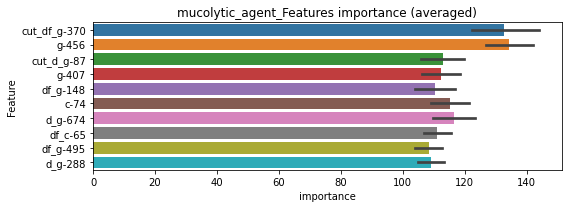

len(train_index) : 2856
len(valid_index) : 953
================================= fold 1/4 mucolytic_agent=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[889]	training's binary_logloss: 0.000479202	valid_1's binary_logloss: 0.00687556


len(train_index) : 2857
len(valid_index) : 952
================================= fold 2/4 mucolytic_agent=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[694]	training's binary_logloss: 0.000558926	valid_1's binary_logloss: 0.00634553


len(train_index) : 2857
len(valid_index) : 952
================================= fold 3/4 mucolytic_agent=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[723]	training's binary_logloss: 0.000546181	valid_1's binary_logloss: 0.00414331


len(train_index) : 2857
len(valid_index) : 952
================================= fold 4/4 mucolytic_agent=================================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.000465172	valid_1's binary_logloss: 0.00476114
Early stopping, best iteration is:
[999]	training's binary_logloss: 0.000465172	valid_1's binary_logloss: 0.00476114


mucolytic_agent logloss: 0.005531734531055318


neg labels: 3289 → selected neg labels: 3281


neuropeptide_receptor_antagonist, len(trt): 37, len(othr): 3281
target_rate: 0.0015537 → Adj_target_rate: 0.0018079
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00183509	valid_1's binary_logloss: 0.0142329
Early stopping, best iteration is:
[565]	training's binary_logloss: 0.000456977	valid_1's binary_logloss: 0.0107754
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00196743	valid_1's binary_logloss: 0.00749736
[600]	training's binary_logloss: 0.000451139	valid_1's binary_logloss: 0.00404745
Early stopping, best iteration is:
[663]	training's binary_logloss: 0.000423437	valid_1's binary_logloss: 0.00398603
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00196945	valid_1's binary_logloss: 0.0102579
[600]	training's binary_logloss: 0.000452872	valid_1's binary_logloss: 0.00757936
Early stopping, best iteration is:
[572]	training's binary_logloss: 0.000474767	valid_1's binary_logloss: 0.00749608
Training until validation scores don't improve for 30 rounds
[

1 / 3 AUC score:1.000
y_Threshold: 0.0029600, Threshold: 0.0110717, pos_neg_ratio: 0.8000000
Remove_noisy_data: 132 → Positive_corect_labels: 656/3805
p_label_rate: 0.0100452 Vs.target_rate: 0.00155
Num_p_label: 40.0, conf_0:0.00775, conf_1:0.01439
Num_p_label: 40.0, Expected: 6.2, Adj_threshold_1: 0.0110717
Num_p_label: 1.0, Expected: 6.2, Adj_threshold_2: 0.0510717
threshold: 0.0510717, positive_p_label: 1.0/3982, p_label_rate: 0.0002511
positive_y_label: 656.0/3805, y_label_rate: 0.1724047
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00172261	valid_1's binary_logloss: 0.0128376
Early stopping, best iteration is:
[565]	training's binary_logloss: 0.000439361	valid_1's binary_logloss: 0.00974979
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00182116	valid_1's binary_logloss: 0.00681822
[600]	training's binary_logloss: 0.000429921	valid_1's binary_logloss: 0.00366551
Early stopping, best iteration is:
[630]	training's binary_logloss: 0.000419378	valid_1's binary_logloss: 0.00363709
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00182077	valid_1's binary_logloss: 0.00928016
Early stopping, best iteration is:
[544]	training's binary_logloss: 0.000483239	valid_1's binary_logloss: 0.0069534
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0018136	valid_1's binary_logloss: 0.0100855
[60

2 / 3 AUC score:1.000
y_Threshold: 0.0325493, Threshold: 0.0510717, pos_neg_ratio: 0.8000000
Remove_noisy_data: 0 → Positive_corect_labels: 656.0/3805
p_label_rate: 0.0022602 Vs.target_rate: 0.00155
Num_p_label: 9.0, conf_0:0.04086, conf_1:0.06129
threshold: 0.0510717, positive_p_label: 9.0/3982, p_label_rate: 0.0022602
positive_y_label: 656.0/3805, y_label_rate: 0.1724047
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00172261	valid_1's binary_logloss: 0.0128376
Early stopping, best iteration is:
[565]	training's binary_logloss: 0.000439361	valid_1's binary_logloss: 0.00974979
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00182116	valid_1's binary_logloss: 0.00681822
[600]	training's binary_logloss: 0.000429921	valid_1's binary_logloss: 0.00366551
Early stopping, best iteration is:
[630]	training's binary_logloss: 0.000419378	valid_1's binary_logloss: 0.00363709
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00182077	valid_1's binary_logloss: 0.00928016
Early stopping, best iteration is:
[544]	training's binary_logloss: 0.000483239	valid_1's binary_logloss: 0.0069534
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0018136	valid_1's binary_logloss: 0.0100855


3 / 3 AUC score:1.000
y_Threshold: 0.0325493, Threshold: 0.0510717, pos_neg_ratio: 0.8000000


[600]	training's binary_logloss: 0.000427108	valid_1's binary_logloss: 0.00758455
Early stopping, best iteration is:
[571]	training's binary_logloss: 0.000449522	valid_1's binary_logloss: 0.00755093


Remove_noisy_data: 0 → Positive_corect_labels: 656.0/3805
p_label_rate: 0.0022602 Vs.target_rate: 0.00155
Num_p_label: 9.0, conf_0:0.04596, conf_1:0.05618
threshold: 0.0510717, positive_p_label: 9.0/3982, p_label_rate: 0.0022602
positive_y_label: 656.0/3805, y_label_rate: 0.1724047


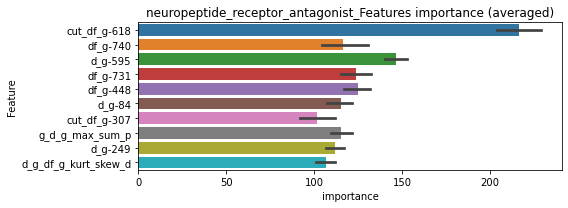

len(train_index) : 2853
len(valid_index) : 952
================================= fold 1/4 neuropeptide_receptor_antagonist=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[836]	training's binary_logloss: 0.000422149	valid_1's binary_logloss: 0.00900854


len(train_index) : 2854
len(valid_index) : 951
================================= fold 2/4 neuropeptide_receptor_antagonist=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[873]	training's binary_logloss: 0.000428798	valid_1's binary_logloss: 0.00471473


len(train_index) : 2854
len(valid_index) : 951
================================= fold 3/4 neuropeptide_receptor_antagonist=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[767]	training's binary_logloss: 0.00044914	valid_1's binary_logloss: 0.00778173


len(train_index) : 2854
len(valid_index) : 951
================================= fold 4/4 neuropeptide_receptor_antagonist=================================


Training until validation scores don't improve for 30 rounds


neuropeptide_receptor_antagonist logloss: 0.007055002145652196


Early stopping, best iteration is:
[613]	training's binary_logloss: 0.000517598	valid_1's binary_logloss: 0.00671105


neg labels: 3289 → selected neg labels: 3173


nfkb_inhibitor, len(trt): 832, len(othr): 3173
target_rate: 0.0349374 → Adj_target_rate: 0.0254860
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[21]	training's binary_logloss: 0.450841	valid_1's binary_logloss: 0.509017
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[42]	training's binary_logloss: 0.388068	valid_1's binary_logloss: 0.508096
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[62]	training's binary_logloss: 0.361823	valid_1's binary_logloss: 0.506917
Training until validation scores don't improve for 30 rounds


1 / 3 AUC score:0.531
y_Threshold: 0.2181816, Threshold: 0.5183718, pos_neg_ratio: 0.7377876
Remove_noisy_data: 1380 → Positive_corect_labels: 251/2625
p_label_rate: 0.0100452 Vs.target_rate: 0.03494
Num_p_label: 40.0, conf_0:0.36286, conf_1:0.67388
Num_p_label: 40.0, Expected: 139.1, Adj_threshold_1: 0.5183718
Num_p_label: 82.0, Expected: 139.1, Adj_threshold_2: 0.4883718
Num_p_label: 109.0, Expected: 139.1, Adj_threshold_3: 0.4583718
Num_p_label: 129.0, Expected: 139.1, Adj_threshold_4: 0.4283718
Num_p_label: 138.0, Expected: 139.1, Adj_threshold_5: 0.3983718
Num_p_label: 143.0, Expected: 139.1, Adj_threshold_6: 0.3683718
Num_p_label: 146.0, Expected: 139.1, Adj_threshold_7: 0.3383718


Early stopping, best iteration is:
[36]	training's binary_logloss: 0.414598	valid_1's binary_logloss: 0.507916


Num_p_label: 164.0, Expected: 139.1, Adj_threshold_8: 0.3083718
Num_p_label: 202.0, Expected: 139.1, Adj_threshold_9: 0.2783718
Num_p_label: 368.0, Expected: 139.1, Adj_threshold_10: 0.2483718
threshold: 0.2483718, positive_p_label: 368.0/3982, p_label_rate: 0.0924159
positive_y_label: 251.0/2625, y_label_rate: 0.0956190
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[73]	training's binary_logloss: 0.0975381	valid_1's binary_logloss: 0.26347
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[93]	training's binary_logloss: 0.0763159	valid_1's binary_logloss: 0.224209
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[72]	training's binary_logloss: 0.0991155	valid_1's binary_logloss: 0.267997
Training until validation scores don't improve for 30 rounds


2 / 3 AUC score:0.802
y_Threshold: 0.1141449, Threshold: 0.2483718, pos_neg_ratio: 0.7377876
Remove_noisy_data: 298 → Positive_corect_labels: 102.0/2327
p_label_rate: 0.0833752 Vs.target_rate: 0.03494
Num_p_label: 332.0, conf_0:0.19870, conf_1:0.29805
Num_p_label: 332.0, Expected: 139.1, Adj_threshold_1: 0.2483718
Num_p_label: 296.0, Expected: 139.1, Adj_threshold_2: 0.2883718
Num_p_label: 261.0, Expected: 139.1, Adj_threshold_3: 0.3283718
Num_p_label: 237.0, Expected: 139.1, Adj_threshold_4: 0.3683718
Num_p_label: 221.0, Expected: 139.1, Adj_threshold_5: 0.4083718
Num_p_label: 204.0, Expected: 139.1, Adj_threshold_6: 0.4483718


Early stopping, best iteration is:
[83]	training's binary_logloss: 0.0845073	valid_1's binary_logloss: 0.252529


Num_p_label: 196.0, Expected: 139.1, Adj_threshold_7: 0.4883718
Num_p_label: 190.0, Expected: 139.1, Adj_threshold_8: 0.5283718
Num_p_label: 180.0, Expected: 139.1, Adj_threshold_9: 0.5683718
Num_p_label: 172.0, Expected: 139.1, Adj_threshold_10: 0.6083718
threshold: 0.6483718, positive_p_label: 164.0/3982, p_label_rate: 0.0411853
positive_y_label: 102.0/2327, y_label_rate: 0.0438333
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[96]	training's binary_logloss: 0.0129086	valid_1's binary_logloss: 0.0866169
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[160]	training's binary_logloss: 0.00486943	valid_1's binary_logloss: 0.0530991
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[118]	training's binary_logloss: 0.00953061	valid_1's binary_logloss: 0.047164
Training until validation scores don't improve for 30 rounds


3 / 3 AUC score:0.973
y_Threshold: 0.0781843, Threshold: 0.6483718, pos_neg_ratio: 0.7377876
Remove_noisy_data: 48 → Positive_corect_labels: 78.0/2279
p_label_rate: 0.0660472 Vs.target_rate: 0.03494
Num_p_label: 263.0, conf_0:0.50000, conf_1:0.71321
Num_p_label: 263.0, Expected: 139.1, Adj_threshold_1: 0.6483718
Num_p_label: 257.0, Expected: 139.1, Adj_threshold_2: 0.6883718
Num_p_label: 245.0, Expected: 139.1, Adj_threshold_3: 0.7283718
Num_p_label: 233.0, Expected: 139.1, Adj_threshold_4: 0.7683718
Num_p_label: 218.0, Expected: 139.1, Adj_threshold_5: 0.8083718
Num_p_label: 207.0, Expected: 139.1, Adj_threshold_6: 0.8483718
Num_p_label: 191.0, Expected: 139.1, Adj_threshold_7: 0.8883718
threshold: 0.8883718, positive_p_label: 191.0/3982, p_label_rate: 0.0479658


Early stopping, best iteration is:
[77]	training's binary_logloss: 0.0208264	valid_1's binary_logloss: 0.0731673


positive_y_label: 78.0/2279, y_label_rate: 0.0342255


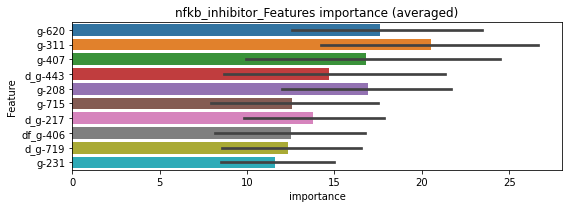

len(train_index) : 1709
len(valid_index) : 570
================================= fold 1/4 nfkb_inhibitor=================================


Training until validation scores don't improve for 30 rounds


len(train_index) : 1709
len(valid_index) : 570
================================= fold 2/4 nfkb_inhibitor=================================


Early stopping, best iteration is:
[101]	training's binary_logloss: 0.00204685	valid_1's binary_logloss: 0.0251172
Training until validation scores don't improve for 30 rounds


len(train_index) : 1709
len(valid_index) : 570
================================= fold 3/4 nfkb_inhibitor=================================


Early stopping, best iteration is:
[231]	training's binary_logloss: 0.00073457	valid_1's binary_logloss: 0.0152763
Training until validation scores don't improve for 30 rounds


len(train_index) : 1710
len(valid_index) : 569
================================= fold 4/4 nfkb_inhibitor=================================


Early stopping, best iteration is:
[85]	training's binary_logloss: 0.00256578	valid_1's binary_logloss: 0.0259306
Training until validation scores don't improve for 30 rounds


nfkb_inhibitor logloss: 0.019823131568173533


Early stopping, best iteration is:
[125]	training's binary_logloss: 0.00161562	valid_1's binary_logloss: 0.0129564
neg labels: 3289 → selected neg labels: 3289


nicotinic_receptor_agonist, len(trt): 12, len(othr): 3289
target_rate: 0.0005039 → Adj_target_rate: 0.0006942
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.000643353	valid_1's binary_logloss: 0.00525634
Early stopping, best iteration is:
[536]	training's binary_logloss: 0.000245471	valid_1's binary_logloss: 0.00393988
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.000630248	valid_1's binary_logloss: 0.00184567
Early stopping, best iteration is:
[536]	training's binary_logloss: 0.000242896	valid_1's binary_logloss: 0.00119387
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.000656298	valid_1's binary_logloss: 0.00103835
Early stopping, best iteration is:
[545]	training's binary_logloss: 0.00024736	valid_1's binary_logloss: 0.000427044
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.000641084	valid_1's binary_logloss: 0.00132106
Early stopping, best iteration is:
[524]	training's binary_logloss: 0.0002446

1 / 3 AUC score:1.000
y_Threshold: 0.0009911, Threshold: 0.0042762, pos_neg_ratio: 0.8000000
Remove_noisy_data: 133 → Positive_corect_labels: 657/3813
p_label_rate: 0.0100452 Vs.target_rate: 0.00050
Num_p_label: 40.0, conf_0:0.00299, conf_1:0.00556
Num_p_label: 40.0, Expected: 2.0, Adj_threshold_1: 0.0042762
Num_p_label: 1.0, Expected: 2.0, Adj_threshold_2: 0.0442762
threshold: 0.0442762, positive_p_label: 1.0/3982, p_label_rate: 0.0002511
positive_y_label: 657.0/3813, y_label_rate: 0.1723053
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.000595247	valid_1's binary_logloss: 0.002896
Early stopping, best iteration is:
[515]	training's binary_logloss: 0.000236931	valid_1's binary_logloss: 0.00184562
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.000600432	valid_1's binary_logloss: 0.00138155
Early stopping, best iteration is:
[519]	training's binary_logloss: 0.000237291	valid_1's binary_logloss: 0.000795766
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.000604745	valid_1's binary_logloss: 0.000807468
Early stopping, best iteration is:
[491]	training's binary_logloss: 0.000244179	valid_1's binary_logloss: 0.000359814
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.000592686	valid_1's binary_logloss: 0.00127591


2 / 3 AUC score:1.000
y_Threshold: 0.0996656, Threshold: 0.0442762, pos_neg_ratio: 0.8000000
Remove_noisy_data: 0 → Positive_corect_labels: 657.0/3813
p_label_rate: 0.0035158 Vs.target_rate: 0.00050
Num_p_label: 14.0, conf_0:0.03542, conf_1:0.05313
Num_p_label: 14.0, Expected: 2.0, Adj_threshold_1: 0.0442762
Num_p_label: 4.0, Expected: 2.0, Adj_threshold_2: 0.0842762


Early stopping, best iteration is:
[535]	training's binary_logloss: 0.000236785	valid_1's binary_logloss: 0.000676906


threshold: 0.0842762, positive_p_label: 4.0/3982, p_label_rate: 0.0010045
positive_y_label: 657.0/3813, y_label_rate: 0.1723053
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.000595247	valid_1's binary_logloss: 0.002896
Early stopping, best iteration is:
[515]	training's binary_logloss: 0.000236931	valid_1's binary_logloss: 0.00184562
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.000600432	valid_1's binary_logloss: 0.00138155
Early stopping, best iteration is:
[516]	training's binary_logloss: 0.000237291	valid_1's binary_logloss: 0.000795766
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.000604745	valid_1's binary_logloss: 0.000807468
Early stopping, best iteration is:
[491]	training's binary_logloss: 0.000244179	valid_1's binary_logloss: 0.000359814
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.000592686	valid_1's binary_logloss: 0.00127591


3 / 3 AUC score:1.000
y_Threshold: 0.0996656, Threshold: 0.0842762, pos_neg_ratio: 0.8000000
Remove_noisy_data: 0 → Positive_corect_labels: 657.0/3813
p_label_rate: 0.0010045 Vs.target_rate: 0.00050
Num_p_label: 4.0, conf_0:0.07585, conf_1:0.09270
Num_p_label: 4.0, Expected: 2.0, Adj_threshold_1: 0.0842762
threshold: 0.0842762, positive_p_label: 4.0/3982, p_label_rate: 0.0010045


Early stopping, best iteration is:
[537]	training's binary_logloss: 0.000236785	valid_1's binary_logloss: 0.000676906


positive_y_label: 657.0/3813, y_label_rate: 0.1723053


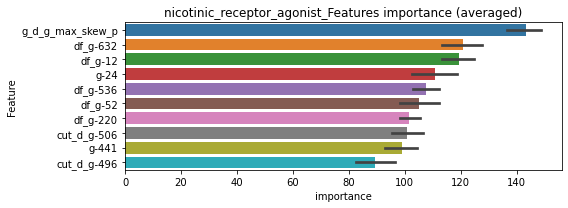

len(train_index) : 2859
len(valid_index) : 954
================================= fold 1/4 nicotinic_receptor_agonist=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[865]	training's binary_logloss: 0.000243168	valid_1's binary_logloss: 0.00102593


len(train_index) : 2860
len(valid_index) : 953
================================= fold 2/4 nicotinic_receptor_agonist=================================


Training until validation scores don't improve for 30 rounds


len(train_index) : 2860
len(valid_index) : 953
================================= fold 3/4 nicotinic_receptor_agonist=================================


Early stopping, best iteration is:
[927]	training's binary_logloss: 0.00023939	valid_1's binary_logloss: 0.000712308
Training until validation scores don't improve for 30 rounds


len(train_index) : 2860
len(valid_index) : 953
================================= fold 4/4 nicotinic_receptor_agonist=================================


Early stopping, best iteration is:
[921]	training's binary_logloss: 0.000242256	valid_1's binary_logloss: 0.000359669
Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.00023897	valid_1's binary_logloss: 0.000410087
Early stopping, best iteration is:
[1021]	training's binary_logloss: 0.000238828	valid_1's binary_logloss: 0.00040991


nicotinic_receptor_agonist logloss: 0.0006270602864117905


neg labels: 3289 → selected neg labels: 3285


nitric_oxide_donor, len(trt): 26, len(othr): 3285
target_rate: 0.0010918 → Adj_target_rate: 0.0013394
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00144929	valid_1's binary_logloss: 0.0109661
[600]	training's binary_logloss: 0.000359207	valid_1's binary_logloss: 0.00822133
Early stopping, best iteration is:
[573]	training's binary_logloss: 0.000366264	valid_1's binary_logloss: 0.00819346
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00146429	valid_1's binary_logloss: 0.00442308
[600]	training's binary_logloss: 0.000363265	valid_1's binary_logloss: 0.00180704
Early stopping, best iteration is:
[592]	training's binary_logloss: 0.000363265	valid_1's binary_logloss: 0.00180704
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00151845	valid_1's binary_logloss: 0.00366867
[600]	training's binary_logloss: 0.000375883	valid_1's binary_logloss: 0.00138028
Early stopping, best iteration is:
[570]	training's binary_logloss: 0.000376766	valid_1's binar

1 / 3 AUC score:1.000
y_Threshold: 0.0024495, Threshold: 0.0367412, pos_neg_ratio: 0.8000000
Remove_noisy_data: 132 → Positive_corect_labels: 657/3810
p_label_rate: 0.0100452 Vs.target_rate: 0.00109
Num_p_label: 40.0, conf_0:0.02572, conf_1:0.04776
Num_p_label: 40.0, Expected: 4.3, Adj_threshold_1: 0.0367412
Num_p_label: 21.0, Expected: 4.3, Adj_threshold_2: 0.0767412
Num_p_label: 12.0, Expected: 4.3, Adj_threshold_3: 0.1167412
Num_p_label: 10.0, Expected: 4.3, Adj_threshold_4: 0.1567412
threshold: 0.1567412, positive_p_label: 10.0/3982, p_label_rate: 0.0025113
positive_y_label: 657.0/3810, y_label_rate: 0.1724409
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00133575	valid_1's binary_logloss: 0.00876469
Early stopping, best iteration is:
[565]	training's binary_logloss: 0.000352827	valid_1's binary_logloss: 0.00626011
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00134658	valid_1's binary_logloss: 0.00431623
[600]	training's binary_logloss: 0.000341036	valid_1's binary_logloss: 0.0017997
Early stopping, best iteration is:
[597]	training's binary_logloss: 0.000341036	valid_1's binary_logloss: 0.0017997
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00135382	valid_1's binary_logloss: 0.00323738
Early stopping, best iteration is:
[566]	training's binary_logloss: 0.000355931	valid_1's binary_logloss: 0.00131696
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00134105	valid_1's binary_logloss: 0.00376675


2 / 3 AUC score:1.000
y_Threshold: 0.0294655, Threshold: 0.1567412, pos_neg_ratio: 0.8000000


[600]	training's binary_logloss: 0.000347699	valid_1's binary_logloss: 0.00182207
Early stopping, best iteration is:
[590]	training's binary_logloss: 0.00034828	valid_1's binary_logloss: 0.00181971


Remove_noisy_data: 0 → Positive_corect_labels: 657.0/3810
p_label_rate: 0.0102963 Vs.target_rate: 0.00109
Num_p_label: 41.0, conf_0:0.12539, conf_1:0.18809
Num_p_label: 41.0, Expected: 4.3, Adj_threshold_1: 0.1567412
Num_p_label: 35.0, Expected: 4.3, Adj_threshold_2: 0.1967412
Num_p_label: 32.0, Expected: 4.3, Adj_threshold_3: 0.2367412
Num_p_label: 25.0, Expected: 4.3, Adj_threshold_4: 0.2767412
Num_p_label: 20.0, Expected: 4.3, Adj_threshold_5: 0.3167412
Num_p_label: 16.0, Expected: 4.3, Adj_threshold_6: 0.3567412
Num_p_label: 14.0, Expected: 4.3, Adj_threshold_7: 0.3967412
Num_p_label: 11.0, Expected: 4.3, Adj_threshold_8: 0.4367412
Num_p_label: 10.0, Expected: 4.3, Adj_threshold_9: 0.4767412
threshold: 0.4767412, positive_p_label: 10.0/3982, p_label_rate: 0.0025113
positive_y_label: 657.0/3810, y_label_rate: 0.1724409
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00133575	valid_1's binary_logloss: 0.00876469
Early stopping, best iteration is:
[565]	training's binary_logloss: 0.000352827	valid_1's binary_logloss: 0.00626011
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00134658	valid_1's binary_logloss: 0.00431623
[600]	training's binary_logloss: 0.000341036	valid_1's binary_logloss: 0.0017997
Early stopping, best iteration is:
[596]	training's binary_logloss: 0.000341036	valid_1's binary_logloss: 0.0017997
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00135382	valid_1's binary_logloss: 0.00323738
Early stopping, best iteration is:
[566]	training's binary_logloss: 0.000355931	valid_1's binary_logloss: 0.00131696
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00134105	valid_1's binary_logloss: 0.00376675


3 / 3 AUC score:1.000
y_Threshold: 0.0294655, Threshold: 0.4767412, pos_neg_ratio: 0.8000000


[600]	training's binary_logloss: 0.000347699	valid_1's binary_logloss: 0.00182207
Early stopping, best iteration is:
[590]	training's binary_logloss: 0.00034828	valid_1's binary_logloss: 0.00181971


Remove_noisy_data: 0 → Positive_corect_labels: 657.0/3810
p_label_rate: 0.0025113 Vs.target_rate: 0.00109
Num_p_label: 10.0, conf_0:0.42907, conf_1:0.52442
Num_p_label: 10.0, Expected: 4.3, Adj_threshold_1: 0.4767412
threshold: 0.4767412, positive_p_label: 10.0/3982, p_label_rate: 0.0025113
positive_y_label: 657.0/3810, y_label_rate: 0.1724409


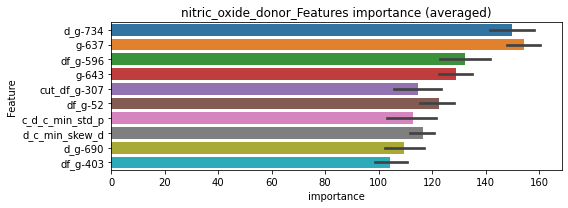

len(train_index) : 2857
len(valid_index) : 953
================================= fold 1/4 nitric_oxide_donor=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[784]	training's binary_logloss: 0.000356948	valid_1's binary_logloss: 0.00476899


len(train_index) : 2857
len(valid_index) : 953
================================= fold 2/4 nitric_oxide_donor=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[803]	training's binary_logloss: 0.000355978	valid_1's binary_logloss: 0.00137109


len(train_index) : 2858
len(valid_index) : 952
================================= fold 3/4 nitric_oxide_donor=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[812]	training's binary_logloss: 0.000360869	valid_1's binary_logloss: 0.00106867


len(train_index) : 2858
len(valid_index) : 952
================================= fold 4/4 nitric_oxide_donor=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[805]	training's binary_logloss: 0.000355613	valid_1's binary_logloss: 0.00181883


nitric_oxide_donor logloss: 0.0022573232780877333


neg labels: 3289 → selected neg labels: 3285


nitric_oxide_production_inhibitor, len(trt): 29, len(othr): 3285
target_rate: 0.0012178 → Adj_target_rate: 0.0014697
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00141152	valid_1's binary_logloss: 0.00740219
Early stopping, best iteration is:
[509]	training's binary_logloss: 0.000411759	valid_1's binary_logloss: 0.00560551
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00137547	valid_1's binary_logloss: 0.0089965
[600]	training's binary_logloss: 0.000352164	valid_1's binary_logloss: 0.0061174
Early stopping, best iteration is:
[598]	training's binary_logloss: 0.000352207	valid_1's binary_logloss: 0.00611592
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0015586	valid_1's binary_logloss: 0.0035043
[600]	training's binary_logloss: 0.000369418	valid_1's binary_logloss: 0.00122264
Early stopping, best iteration is:
[604]	training's binary_logloss: 0.000368381	valid_1's binary_logloss: 0.00121896
Training until validation scores don't improve for 30 rounds
[3

1 / 3 AUC score:1.000
y_Threshold: 0.0026663, Threshold: 0.0076815, pos_neg_ratio: 0.8000000
Remove_noisy_data: 132 → Positive_corect_labels: 657/3810
p_label_rate: 0.0100452 Vs.target_rate: 0.00122
Num_p_label: 40.0, conf_0:0.00538, conf_1:0.00999
Num_p_label: 40.0, Expected: 4.8, Adj_threshold_1: 0.0076815
Num_p_label: 2.0, Expected: 4.8, Adj_threshold_2: 0.0476815
threshold: 0.0476815, positive_p_label: 2.0/3982, p_label_rate: 0.0005023
positive_y_label: 657.0/3810, y_label_rate: 0.1724409
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00136014	valid_1's binary_logloss: 0.00658966
Early stopping, best iteration is:
[498]	training's binary_logloss: 0.000413315	valid_1's binary_logloss: 0.00468993
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00135502	valid_1's binary_logloss: 0.00704565
[600]	training's binary_logloss: 0.000345804	valid_1's binary_logloss: 0.0044613
Early stopping, best iteration is:
[602]	training's binary_logloss: 0.00034523	valid_1's binary_logloss: 0.00444888
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00139143	valid_1's binary_logloss: 0.00339028
[600]	training's binary_logloss: 0.000355981	valid_1's binary_logloss: 0.00119888
Early stopping, best iteration is:
[615]	training's binary_logloss: 0.000353627	valid_1's binary_logloss: 0.00119469
Training until validation scores don't improve for 30 rounds


2 / 3 AUC score:1.000
y_Threshold: 0.0454136, Threshold: 0.0476815, pos_neg_ratio: 0.8000000


[600]	training's binary_logloss: 0.000355419	valid_1's binary_logloss: 0.00315384
Early stopping, best iteration is:
[577]	training's binary_logloss: 0.000363173	valid_1's binary_logloss: 0.00313034


Remove_noisy_data: 0 → Positive_corect_labels: 657.0/3810
p_label_rate: 0.0017579 Vs.target_rate: 0.00122
Num_p_label: 7.0, conf_0:0.03815, conf_1:0.05722
threshold: 0.0476815, positive_p_label: 7.0/3982, p_label_rate: 0.0017579
positive_y_label: 657.0/3810, y_label_rate: 0.1724409
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00136014	valid_1's binary_logloss: 0.00658966
Early stopping, best iteration is:
[498]	training's binary_logloss: 0.000413315	valid_1's binary_logloss: 0.00468993
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00135502	valid_1's binary_logloss: 0.00704565
[600]	training's binary_logloss: 0.000345804	valid_1's binary_logloss: 0.0044613
Early stopping, best iteration is:
[602]	training's binary_logloss: 0.00034523	valid_1's binary_logloss: 0.00444888
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00139143	valid_1's binary_logloss: 0.00339028
[600]	training's binary_logloss: 0.000355981	valid_1's binary_logloss: 0.00119888
Early stopping, best iteration is:
[615]	training's binary_logloss: 0.000353627	valid_1's binary_logloss: 0.00119469
Training until validation scores don't improve for 30 rounds


3 / 3 AUC score:1.000
y_Threshold: 0.0454136, Threshold: 0.0476815, pos_neg_ratio: 0.8000000
Remove_noisy_data: 0 → Positive_corect_labels: 657.0/3810
p_label_rate: 0.0017579 Vs.target_rate: 0.00122
Num_p_label: 7.0, conf_0:0.04291, conf_1:0.05245
threshold: 0.0476815, positive_p_label: 7.0/3982, p_label_rate: 0.0017579
positive_y_label: 657.0/3810, y_label_rate: 0.1724409


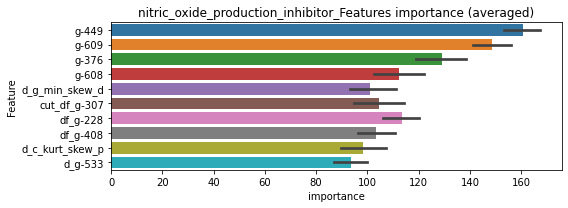

len(train_index) : 2857
len(valid_index) : 953
================================= fold 1/4 nitric_oxide_production_inhibitor=================================


Training until validation scores don't improve for 30 rounds


len(train_index) : 2857
len(valid_index) : 953
================================= fold 2/4 nitric_oxide_production_inhibitor=================================


Early stopping, best iteration is:
[620]	training's binary_logloss: 0.000420699	valid_1's binary_logloss: 0.00492853
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[925]	training's binary_logloss: 0.000346366	valid_1's binary_logloss: 0.00432019


len(train_index) : 2858
len(valid_index) : 952
================================= fold 3/4 nitric_oxide_production_inhibitor=================================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.000351577	valid_1's binary_logloss: 0.00103423
Early stopping, best iteration is:
[1002]	training's binary_logloss: 0.000351476	valid_1's binary_logloss: 0.00103397


len(train_index) : 2858
len(valid_index) : 952
================================= fold 4/4 nitric_oxide_production_inhibitor=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[850]	training's binary_logloss: 0.000359642	valid_1's binary_logloss: 0.00229194


nitric_oxide_production_inhibitor logloss: 0.0031444373702919372


neg labels: 3289 → selected neg labels: 3285


nitric_oxide_synthase_inhibitor, len(trt): 26, len(othr): 3285
target_rate: 0.0010918 → Adj_target_rate: 0.0013394
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0015234	valid_1's binary_logloss: 0.00427525
[600]	training's binary_logloss: 0.000385764	valid_1's binary_logloss: 0.0019457
Early stopping, best iteration is:
[588]	training's binary_logloss: 0.000385764	valid_1's binary_logloss: 0.0019457
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00144061	valid_1's binary_logloss: 0.00680308
Early stopping, best iteration is:
[566]	training's binary_logloss: 0.000381761	valid_1's binary_logloss: 0.0036644
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00152628	valid_1's binary_logloss: 0.00586458
[600]	training's binary_logloss: 0.000380722	valid_1's binary_logloss: 0.00342438
Early stopping, best iteration is:
[615]	training's binary_logloss: 0.000378842	valid_1's binary_logloss: 0.00341318
Training until validation scores don't improve for 30 rounds
[3

1 / 3 AUC score:1.000
y_Threshold: 0.0023810, Threshold: 0.0235540, pos_neg_ratio: 0.8000000
Remove_noisy_data: 132 → Positive_corect_labels: 657/3810
p_label_rate: 0.0100452 Vs.target_rate: 0.00109
Num_p_label: 40.0, conf_0:0.01649, conf_1:0.03062
Num_p_label: 40.0, Expected: 4.3, Adj_threshold_1: 0.0235540
Num_p_label: 11.0, Expected: 4.3, Adj_threshold_2: 0.0635540
Num_p_label: 3.0, Expected: 4.3, Adj_threshold_3: 0.1035540
threshold: 0.1035540, positive_p_label: 3.0/3982, p_label_rate: 0.0007534
positive_y_label: 657.0/3810, y_label_rate: 0.1724409
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00138899	valid_1's binary_logloss: 0.00377939
Early stopping, best iteration is:
[565]	training's binary_logloss: 0.000374294	valid_1's binary_logloss: 0.00157833
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00139338	valid_1's binary_logloss: 0.00597418
[600]	training's binary_logloss: 0.000362634	valid_1's binary_logloss: 0.00337457
Early stopping, best iteration is:
[577]	training's binary_logloss: 0.000366915	valid_1's binary_logloss: 0.0033548
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00139387	valid_1's binary_logloss: 0.00655509
[600]	training's binary_logloss: 0.000369155	valid_1's binary_logloss: 0.00417586
Early stopping, best iteration is:
[574]	training's binary_logloss: 0.000371008	valid_1's binary_logloss: 0.00415365
Training until validation scores don't improve for 30 rounds

2 / 3 AUC score:1.000
y_Threshold: 0.0226666, Threshold: 0.1035540, pos_neg_ratio: 0.8000000
Remove_noisy_data: 0 → Positive_corect_labels: 657.0/3810
p_label_rate: 0.0052737 Vs.target_rate: 0.00109
Num_p_label: 21.0, conf_0:0.08284, conf_1:0.12426
Num_p_label: 21.0, Expected: 4.3, Adj_threshold_1: 0.1035540
Num_p_label: 12.0, Expected: 4.3, Adj_threshold_2: 0.1435540
Num_p_label: 10.0, Expected: 4.3, Adj_threshold_3: 0.1835540
threshold: 0.1835540, positive_p_label: 10.0/3982, p_label_rate: 0.0025113
positive_y_label: 657.0/3810, y_label_rate: 0.1724409
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00138899	valid_1's binary_logloss: 0.00377939
Early stopping, best iteration is:
[565]	training's binary_logloss: 0.000374294	valid_1's binary_logloss: 0.00157833
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00139338	valid_1's binary_logloss: 0.00597418
[600]	training's binary_logloss: 0.000362634	valid_1's binary_logloss: 0.00337457
Early stopping, best iteration is:
[577]	training's binary_logloss: 0.000366915	valid_1's binary_logloss: 0.0033548
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00139387	valid_1's binary_logloss: 0.00655509
[600]	training's binary_logloss: 0.000369155	valid_1's binary_logloss: 0.00417586
Early stopping, best iteration is:
[574]	training's binary_logloss: 0.000371008	valid_1's binary_logloss: 0.00415365
Training until validation scores don't improve for 30 rounds

3 / 3 AUC score:1.000
y_Threshold: 0.0226666, Threshold: 0.1835540, pos_neg_ratio: 0.8000000
Remove_noisy_data: 0 → Positive_corect_labels: 657.0/3810
p_label_rate: 0.0025113 Vs.target_rate: 0.00109
Num_p_label: 10.0, conf_0:0.16520, conf_1:0.20191
Num_p_label: 10.0, Expected: 4.3, Adj_threshold_1: 0.1835540
threshold: 0.1835540, positive_p_label: 10.0/3982, p_label_rate: 0.0025113
positive_y_label: 657.0/3810, y_label_rate: 0.1724409


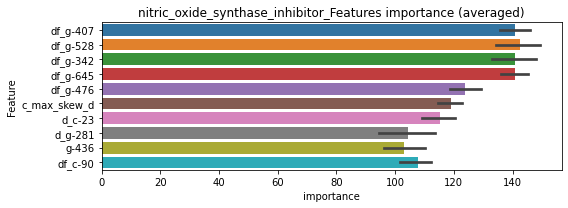

len(train_index) : 2857
len(valid_index) : 953
================================= fold 1/4 nitric_oxide_synthase_inhibitor=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[886]	training's binary_logloss: 0.0003709	valid_1's binary_logloss: 0.00140433


len(train_index) : 2857
len(valid_index) : 953
================================= fold 2/4 nitric_oxide_synthase_inhibitor=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[810]	training's binary_logloss: 0.000373395	valid_1's binary_logloss: 0.00221883


len(train_index) : 2858
len(valid_index) : 952
================================= fold 3/4 nitric_oxide_synthase_inhibitor=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[730]	training's binary_logloss: 0.000388259	valid_1's binary_logloss: 0.0023218


len(train_index) : 2858
len(valid_index) : 952
================================= fold 4/4 nitric_oxide_synthase_inhibitor=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[884]	training's binary_logloss: 0.000369508	valid_1's binary_logloss: 0.00130835


nitric_oxide_synthase_inhibitor logloss: 0.001813375634184428


neg labels: 3289 → selected neg labels: 3286


norepinephrine_reuptake_inhibitor, len(trt): 7, len(othr): 3286
target_rate: 0.0002939 → Adj_target_rate: 0.0004391
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.000380247	valid_1's binary_logloss: 0.00374265
Early stopping, best iteration is:
[461]	training's binary_logloss: 0.00018373	valid_1's binary_logloss: 0.00328382
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.000369393	valid_1's binary_logloss: 0.00448501
Early stopping, best iteration is:
[451]	training's binary_logloss: 0.000185119	valid_1's binary_logloss: 0.00356665
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.000383845	valid_1's binary_logloss: 0.000472385
Early stopping, best iteration is:
[463]	training's binary_logloss: 0.000187604	valid_1's binary_logloss: 0.000231587
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00038043	valid_1's binary_logloss: 0.00136192


1 / 3 AUC score:1.000
y_Threshold: 0.0005919, Threshold: 0.0023638, pos_neg_ratio: 0.8000000
Remove_noisy_data: 132 → Positive_corect_labels: 657/3811
p_label_rate: 0.0100452 Vs.target_rate: 0.00029
Num_p_label: 40.0, conf_0:0.00165, conf_1:0.00307
Num_p_label: 40.0, Expected: 1.2, Adj_threshold_1: 0.0023638
Num_p_label: 0.0, Expected: 1.2, Adj_threshold_2: 0.0423638
threshold: 0.0423638, positive_p_label: 0.0/3982, p_label_rate: 0.0000000


Early stopping, best iteration is:
[472]	training's binary_logloss: 0.000186638	valid_1's binary_logloss: 0.000877489


positive_y_label: 657.0/3811, y_label_rate: 0.1723957
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.000359189	valid_1's binary_logloss: 0.00329003
Early stopping, best iteration is:
[442]	training's binary_logloss: 0.000182724	valid_1's binary_logloss: 0.00280095
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00035151	valid_1's binary_logloss: 0.00173296
Early stopping, best iteration is:
[491]	training's binary_logloss: 0.000176827	valid_1's binary_logloss: 0.00126534
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00036358	valid_1's binary_logloss: 0.000365284
Early stopping, best iteration is:
[471]	training's binary_logloss: 0.000177482	valid_1's binary_logloss: 0.000177852
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.000355427	valid_1's binary_logloss: 0.000443812


2 / 3 AUC score:1.000
y_Threshold: 0.0214664, Threshold: 0.0423638, pos_neg_ratio: 0.8000000
Remove_noisy_data: 0 → Positive_corect_labels: 657.0/3811
p_label_rate: 0.0022602 Vs.target_rate: 0.00029
Num_p_label: 9.0, conf_0:0.03389, conf_1:0.05084
Num_p_label: 9.0, Expected: 1.2, Adj_threshold_1: 0.0423638
Num_p_label: 3.0, Expected: 1.2, Adj_threshold_2: 0.0823638
Num_p_label: 3.0, Expected: 1.2, Adj_threshold_3: 0.1223638
Num_p_label: 3.0, Expected: 1.2, Adj_threshold_4: 0.1623638
Num_p_label: 3.0, Expected: 1.2, Adj_threshold_5: 0.2023638
Num_p_label: 1.0, Expected: 1.2, Adj_threshold_6: 0.2423638


Early stopping, best iteration is:
[466]	training's binary_logloss: 0.00017581	valid_1's binary_logloss: 0.000220538


threshold: 0.2423638, positive_p_label: 1.0/3982, p_label_rate: 0.0002511
positive_y_label: 657.0/3811, y_label_rate: 0.1723957
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.000359189	valid_1's binary_logloss: 0.00329003
Early stopping, best iteration is:
[442]	training's binary_logloss: 0.000182724	valid_1's binary_logloss: 0.00280095
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00035151	valid_1's binary_logloss: 0.00173296
Early stopping, best iteration is:
[492]	training's binary_logloss: 0.000176827	valid_1's binary_logloss: 0.00126534
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00036358	valid_1's binary_logloss: 0.000365284
Early stopping, best iteration is:
[470]	training's binary_logloss: 0.000177482	valid_1's binary_logloss: 0.000177852
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.000355427	valid_1's binary_logloss: 0.000443812


3 / 3 AUC score:1.000
y_Threshold: 0.0214664, Threshold: 0.2423638, pos_neg_ratio: 0.8000000
Remove_noisy_data: 0 → Positive_corect_labels: 657.0/3811
p_label_rate: 0.0002511 Vs.target_rate: 0.00029
Num_p_label: 1.0, conf_0:0.21813, conf_1:0.26660
threshold: 0.2423638, positive_p_label: 1.0/3982, p_label_rate: 0.0002511


Early stopping, best iteration is:
[476]	training's binary_logloss: 0.00017581	valid_1's binary_logloss: 0.000220538


positive_y_label: 657.0/3811, y_label_rate: 0.1723957


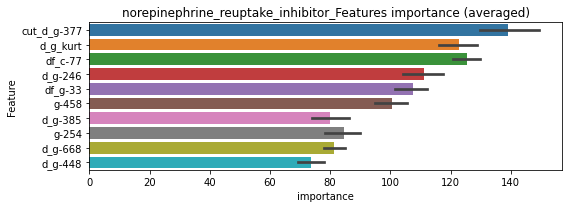

len(train_index) : 2858
len(valid_index) : 953
================================= fold 1/4 norepinephrine_reuptake_inhibitor=================================


Training until validation scores don't improve for 30 rounds


len(train_index) : 2858
len(valid_index) : 953
================================= fold 2/4 norepinephrine_reuptake_inhibitor=================================


Early stopping, best iteration is:
[830]	training's binary_logloss: 0.00018125	valid_1's binary_logloss: 0.00177262
Training until validation scores don't improve for 30 rounds


len(train_index) : 2858
len(valid_index) : 953
================================= fold 3/4 norepinephrine_reuptake_inhibitor=================================


Early stopping, best iteration is:
[900]	training's binary_logloss: 0.000178374	valid_1's binary_logloss: 0.000658464
Training until validation scores don't improve for 30 rounds


len(train_index) : 2859
len(valid_index) : 952
================================= fold 4/4 norepinephrine_reuptake_inhibitor=================================


Early stopping, best iteration is:
[859]	training's binary_logloss: 0.000181106	valid_1's binary_logloss: 0.000195778
Training until validation scores don't improve for 30 rounds


norepinephrine_reuptake_inhibitor logloss: 0.000714387147352986


Early stopping, best iteration is:
[928]	training's binary_logloss: 0.000177915	valid_1's binary_logloss: 0.000228713
neg labels: 3289 → selected neg labels: 3287


nrf2_activator, len(trt): 18, len(othr): 3287
target_rate: 0.0007559 → Adj_target_rate: 0.0009799
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.000815574	valid_1's binary_logloss: 0.00142871
[600]	training's binary_logloss: 0.000270805	valid_1's binary_logloss: 0.000563294
Early stopping, best iteration is:
[576]	training's binary_logloss: 0.000270805	valid_1's binary_logloss: 0.000563294
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.000773979	valid_1's binary_logloss: 0.00309963
Early stopping, best iteration is:
[547]	training's binary_logloss: 0.000272408	valid_1's binary_logloss: 0.00184863
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.000813265	valid_1's binary_logloss: 0.00133538
Early stopping, best iteration is:
[535]	training's binary_logloss: 0.000277589	valid_1's binary_logloss: 0.000537929
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.000777948	valid_1's binary_logloss: 0.0

1 / 3 AUC score:1.000
y_Threshold: 0.0013450, Threshold: 0.0039024, pos_neg_ratio: 0.8000000


[600]	training's binary_logloss: 0.000265328	valid_1's binary_logloss: 0.00194496
Early stopping, best iteration is:
[584]	training's binary_logloss: 0.000266055	valid_1's binary_logloss: 0.00194281


Remove_noisy_data: 132 → Positive_corect_labels: 657/3812
p_label_rate: 0.0100452 Vs.target_rate: 0.00076
Num_p_label: 40.0, conf_0:0.00273, conf_1:0.00507
Num_p_label: 40.0, Expected: 3.0, Adj_threshold_1: 0.0039024
Num_p_label: 2.0, Expected: 3.0, Adj_threshold_2: 0.0439024
threshold: 0.0439024, positive_p_label: 2.0/3982, p_label_rate: 0.0005023
positive_y_label: 657.0/3812, y_label_rate: 0.1723505
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.000758825	valid_1's binary_logloss: 0.00140731
[600]	training's binary_logloss: 0.00026515	valid_1's binary_logloss: 0.000587377
Early stopping, best iteration is:
[573]	training's binary_logloss: 0.00026515	valid_1's binary_logloss: 0.000587377
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.000726782	valid_1's binary_logloss: 0.00355578
Early stopping, best iteration is:
[552]	training's binary_logloss: 0.000260699	valid_1's binary_logloss: 0.00238073
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.000757021	valid_1's binary_logloss: 0.00110013
Early stopping, best iteration is:
[536]	training's binary_logloss: 0.000268999	valid_1's binary_logloss: 0.000433131
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.000751299	valid_1's binary_logloss: 0.002

2 / 3 AUC score:1.000
y_Threshold: 0.0723786, Threshold: 0.0439024, pos_neg_ratio: 0.8000000
Remove_noisy_data: 0 → Positive_corect_labels: 657.0/3812
p_label_rate: 0.0017579 Vs.target_rate: 0.00076
Num_p_label: 7.0, conf_0:0.03512, conf_1:0.05268
Num_p_label: 7.0, Expected: 3.0, Adj_threshold_1: 0.0439024


Early stopping, best iteration is:
[564]	training's binary_logloss: 0.000264896	valid_1's binary_logloss: 0.00118435


threshold: 0.0439024, positive_p_label: 7.0/3982, p_label_rate: 0.0017579
positive_y_label: 657.0/3812, y_label_rate: 0.1723505
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.000758825	valid_1's binary_logloss: 0.00140731
[600]	training's binary_logloss: 0.00026515	valid_1's binary_logloss: 0.000587377
Early stopping, best iteration is:
[573]	training's binary_logloss: 0.00026515	valid_1's binary_logloss: 0.000587377
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.000726782	valid_1's binary_logloss: 0.00355578
Early stopping, best iteration is:
[552]	training's binary_logloss: 0.000260699	valid_1's binary_logloss: 0.00238073
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.000757021	valid_1's binary_logloss: 0.00110013
Early stopping, best iteration is:
[536]	training's binary_logloss: 0.000268999	valid_1's binary_logloss: 0.000433131
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.000751299	valid_1's binary_logloss: 0.002

3 / 3 AUC score:1.000
y_Threshold: 0.0723786, Threshold: 0.0439024, pos_neg_ratio: 0.8000000
Remove_noisy_data: 0 → Positive_corect_labels: 657.0/3812
p_label_rate: 0.0017579 Vs.target_rate: 0.00076
Num_p_label: 7.0, conf_0:0.03951, conf_1:0.04829
Num_p_label: 7.0, Expected: 3.0, Adj_threshold_1: 0.0439024


Early stopping, best iteration is:
[564]	training's binary_logloss: 0.000264896	valid_1's binary_logloss: 0.00118435


threshold: 0.0439024, positive_p_label: 7.0/3982, p_label_rate: 0.0017579
positive_y_label: 657.0/3812, y_label_rate: 0.1723505


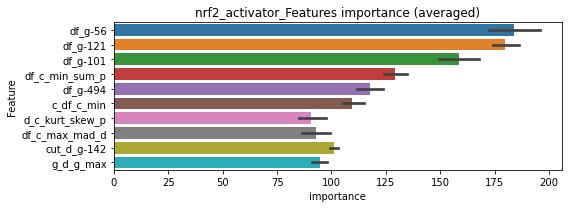

len(train_index) : 2859
len(valid_index) : 953
================================= fold 1/4 nrf2_activator=================================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.000265224	valid_1's binary_logloss: 0.000523265
Early stopping, best iteration is:
[1014]	training's binary_logloss: 0.00026478	valid_1's binary_logloss: 0.000522675


len(train_index) : 2859
len(valid_index) : 953
================================= fold 2/4 nrf2_activator=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[963]	training's binary_logloss: 0.000262036	valid_1's binary_logloss: 0.00191762


len(train_index) : 2859
len(valid_index) : 953
================================= fold 3/4 nrf2_activator=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[919]	training's binary_logloss: 0.000270386	valid_1's binary_logloss: 0.000410216


len(train_index) : 2859
len(valid_index) : 953
================================= fold 4/4 nrf2_activator=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[946]	training's binary_logloss: 0.000267237	valid_1's binary_logloss: 0.00137513


nrf2_activator logloss: 0.0010565016092423459


neg labels: 3289 → selected neg labels: 3280


opioid_receptor_agonist, len(trt): 61, len(othr): 3280
target_rate: 0.0025615 → Adj_target_rate: 0.0027652
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00341	valid_1's binary_logloss: 0.0345184
[600]	training's binary_logloss: 0.000680554	valid_1's binary_logloss: 0.0270491
Early stopping, best iteration is:
[597]	training's binary_logloss: 0.000685574	valid_1's binary_logloss: 0.0270372
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0036325	valid_1's binary_logloss: 0.0320739
[600]	training's binary_logloss: 0.000702269	valid_1's binary_logloss: 0.0251677
Early stopping, best iteration is:
[584]	training's binary_logloss: 0.000729853	valid_1's binary_logloss: 0.0250834
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00424302	valid_1's binary_logloss: 0.0123894
[600]	training's binary_logloss: 0.000747446	valid_1's binary_logloss: 0.00578125
Early stopping, best iteration is:
[770]	training's binary_logloss: 0.000578493	valid_1's binary_logloss:

1 / 3 AUC score:1.000
y_Threshold: 0.0045266, Threshold: 0.0144163, pos_neg_ratio: 0.8000000
Remove_noisy_data: 132 → Positive_corect_labels: 656/3804
p_label_rate: 0.0100452 Vs.target_rate: 0.00256
Num_p_label: 40.0, conf_0:0.01009, conf_1:0.01874
Num_p_label: 40.0, Expected: 10.2, Adj_threshold_1: 0.0144163
Num_p_label: 2.0, Expected: 10.2, Adj_threshold_2: 0.0544163
threshold: 0.0544163, positive_p_label: 2.0/3982, p_label_rate: 0.0005023
positive_y_label: 656.0/3804, y_label_rate: 0.1724501
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00331422	valid_1's binary_logloss: 0.0310593
[600]	training's binary_logloss: 0.000663082	valid_1's binary_logloss: 0.0249614
Early stopping, best iteration is:
[600]	training's binary_logloss: 0.000663082	valid_1's binary_logloss: 0.0249614
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00326928	valid_1's binary_logloss: 0.0326482
Early stopping, best iteration is:
[526]	training's binary_logloss: 0.000822824	valid_1's binary_logloss: 0.0259143
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00376981	valid_1's binary_logloss: 0.0121279
[600]	training's binary_logloss: 0.000705005	valid_1's binary_logloss: 0.00635938
Early stopping, best iteration is:
[757]	training's binary_logloss: 0.0005588	valid_1's binary_logloss: 0.00601263
Training until validation scores don't improve for 30 rounds
[300]	

2 / 3 AUC score:1.000
y_Threshold: 0.0400193, Threshold: 0.0544163, pos_neg_ratio: 0.8000000
Remove_noisy_data: 8 → Positive_corect_labels: 652.0/3796
p_label_rate: 0.0188348 Vs.target_rate: 0.00256
Num_p_label: 75.0, conf_0:0.04353, conf_1:0.06530
Num_p_label: 75.0, Expected: 10.2, Adj_threshold_1: 0.0544163
Num_p_label: 57.0, Expected: 10.2, Adj_threshold_2: 0.0944163
Num_p_label: 43.0, Expected: 10.2, Adj_threshold_3: 0.1344163
Num_p_label: 40.0, Expected: 10.2, Adj_threshold_4: 0.1744163
Num_p_label: 34.0, Expected: 10.2, Adj_threshold_5: 0.2144163
Num_p_label: 28.0, Expected: 10.2, Adj_threshold_6: 0.2544163
Num_p_label: 26.0, Expected: 10.2, Adj_threshold_7: 0.2944163
Num_p_label: 23.0, Expected: 10.2, Adj_threshold_8: 0.3344163
Num_p_label: 19.0, Expected: 10.2, Adj_threshold_9: 0.3744163
Num_p_label: 18.0, Expected: 10.2, Adj_threshold_10: 0.4144163
threshold: 0.4544163, positive_p_label: 16.0/3982, p_label_rate: 0.0040181
positive_y_label: 652.0/3796, y_label_rate: 0.1717597
=

Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00336274	valid_1's binary_logloss: 0.0234528
[600]	training's binary_logloss: 0.000657203	valid_1's binary_logloss: 0.017319
Early stopping, best iteration is:
[665]	training's binary_logloss: 0.000577626	valid_1's binary_logloss: 0.0170693
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00314132	valid_1's binary_logloss: 0.0235529
[600]	training's binary_logloss: 0.000649517	valid_1's binary_logloss: 0.0172537
Early stopping, best iteration is:
[613]	training's binary_logloss: 0.000629503	valid_1's binary_logloss: 0.0171631
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00348611	valid_1's binary_logloss: 0.0141971
[600]	training's binary_logloss: 0.000674209	valid_1's binary_logloss: 0.00835758
Early stopping, best iteration is:
[685]	training's binary_logloss: 0.00057501	valid_1's binary_loglos

3 / 3 AUC score:1.000
y_Threshold: 0.0408649, Threshold: 0.4544163, pos_neg_ratio: 0.8000000
Remove_noisy_data: 4 → Positive_corect_labels: 650.0/3792
p_label_rate: 0.0057760 Vs.target_rate: 0.00256
Num_p_label: 23.0, conf_0:0.40897, conf_1:0.49986
Num_p_label: 23.0, Expected: 10.2, Adj_threshold_1: 0.4544163
Num_p_label: 22.0, Expected: 10.2, Adj_threshold_2: 0.4944163
Num_p_label: 21.0, Expected: 10.2, Adj_threshold_3: 0.5344163
Num_p_label: 18.0, Expected: 10.2, Adj_threshold_4: 0.5744163
Num_p_label: 16.0, Expected: 10.2, Adj_threshold_5: 0.6144163
Num_p_label: 15.0, Expected: 10.2, Adj_threshold_6: 0.6544163
threshold: 0.6544163, positive_p_label: 15.0/3982, p_label_rate: 0.0037670
positive_y_label: 650.0/3792, y_label_rate: 0.1714135


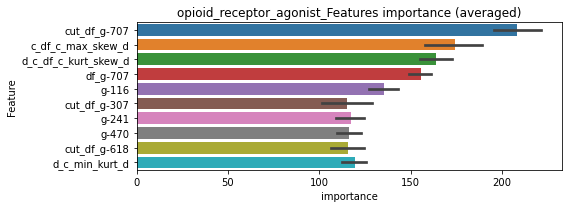

len(train_index) : 2844
len(valid_index) : 948
================================= fold 1/4 opioid_receptor_agonist=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[761]	training's binary_logloss: 0.000620196	valid_1's binary_logloss: 0.0113234


len(train_index) : 2844
len(valid_index) : 948
================================= fold 2/4 opioid_receptor_agonist=================================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.000542187	valid_1's binary_logloss: 0.00952142
Early stopping, best iteration is:
[1004]	training's binary_logloss: 0.000541621	valid_1's binary_logloss: 0.00950582


len(train_index) : 2844
len(valid_index) : 948
================================= fold 3/4 opioid_receptor_agonist=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[775]	training's binary_logloss: 0.000613875	valid_1's binary_logloss: 0.0141852


len(train_index) : 2844
len(valid_index) : 948
================================= fold 4/4 opioid_receptor_agonist=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[662]	training's binary_logloss: 0.000677649	valid_1's binary_logloss: 0.0218391


opioid_receptor_agonist logloss: 0.014213810110967173


neg labels: 3289 → selected neg labels: 3274


opioid_receptor_antagonist, len(trt): 96, len(othr): 3274
target_rate: 0.0040312 → Adj_target_rate: 0.0040656
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00633866	valid_1's binary_logloss: 0.0685622
Early stopping, best iteration is:
[541]	training's binary_logloss: 0.00130997	valid_1's binary_logloss: 0.0601731
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00682644	valid_1's binary_logloss: 0.0498047
Early stopping, best iteration is:
[506]	training's binary_logloss: 0.00159573	valid_1's binary_logloss: 0.0424533
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00693648	valid_1's binary_logloss: 0.0365543
[600]	training's binary_logloss: 0.00115792	valid_1's binary_logloss: 0.0271495
Early stopping, best iteration is:
[581]	training's binary_logloss: 0.0012298	valid_1's binary_logloss: 0.027014
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00681268	valid_1's binary_logloss: 0.064383
Early stopping

1 / 3 AUC score:0.998
y_Threshold: 0.0116241, Threshold: 0.0467066, pos_neg_ratio: 0.8000000
Remove_noisy_data: 148 → Positive_corect_labels: 646/3780
p_label_rate: 0.0100452 Vs.target_rate: 0.00403
Num_p_label: 40.0, conf_0:0.03269, conf_1:0.06072
Num_p_label: 40.0, Expected: 16.1, Adj_threshold_1: 0.0467066
Num_p_label: 12.0, Expected: 16.1, Adj_threshold_2: 0.0867066
threshold: 0.0867066, positive_p_label: 12.0/3982, p_label_rate: 0.0030136
positive_y_label: 646.0/3780, y_label_rate: 0.1708995
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00524269	valid_1's binary_logloss: 0.0552295
[600]	training's binary_logloss: 0.00095367	valid_1's binary_logloss: 0.0470044
Early stopping, best iteration is:
[621]	training's binary_logloss: 0.000902115	valid_1's binary_logloss: 0.0468219
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00552195	valid_1's binary_logloss: 0.0645715
Early stopping, best iteration is:
[446]	training's binary_logloss: 0.0018177	valid_1's binary_logloss: 0.0589858
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00562066	valid_1's binary_logloss: 0.0455856
Early stopping, best iteration is:
[484]	training's binary_logloss: 0.00155613	valid_1's binary_logloss: 0.0389679
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00608909	valid_1's binary_logloss: 0.0457812


2 / 3 AUC score:0.999
y_Threshold: 0.0370634, Threshold: 0.0867066, pos_neg_ratio: 0.8000000


Early stopping, best iteration is:
[479]	training's binary_logloss: 0.00166931	valid_1's binary_logloss: 0.0396983


Remove_noisy_data: 24 → Positive_corect_labels: 634.0/3756
p_label_rate: 0.0153189 Vs.target_rate: 0.00403
Num_p_label: 61.0, conf_0:0.06937, conf_1:0.10405
Num_p_label: 61.0, Expected: 16.1, Adj_threshold_1: 0.0867066
Num_p_label: 48.0, Expected: 16.1, Adj_threshold_2: 0.1267066
Num_p_label: 39.0, Expected: 16.1, Adj_threshold_3: 0.1667066
Num_p_label: 28.0, Expected: 16.1, Adj_threshold_4: 0.2067066
Num_p_label: 22.0, Expected: 16.1, Adj_threshold_5: 0.2467066
threshold: 0.2467066, positive_p_label: 22.0/3982, p_label_rate: 0.0055249
positive_y_label: 634.0/3756, y_label_rate: 0.1687966
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00504507	valid_1's binary_logloss: 0.0500023
Early stopping, best iteration is:
[522]	training's binary_logloss: 0.00119046	valid_1's binary_logloss: 0.0446494
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0051215	valid_1's binary_logloss: 0.0522381
Early stopping, best iteration is:
[398]	training's binary_logloss: 0.00225254	valid_1's binary_logloss: 0.0478846
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00512221	valid_1's binary_logloss: 0.0442419
[600]	training's binary_logloss: 0.000943764	valid_1's binary_logloss: 0.0332629
Early stopping, best iteration is:
[634]	training's binary_logloss: 0.000860994	valid_1's binary_logloss: 0.0329756
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00547075	valid_1's binary_logloss: 0.0480072
[600]	trai

3 / 3 AUC score:0.999
y_Threshold: 0.0346396, Threshold: 0.2467066, pos_neg_ratio: 0.8000000
Remove_noisy_data: 16 → Positive_corect_labels: 626.0/3740
p_label_rate: 0.0082873 Vs.target_rate: 0.00403
Num_p_label: 33.0, conf_0:0.22204, conf_1:0.27138
Num_p_label: 33.0, Expected: 16.1, Adj_threshold_1: 0.2467066
Num_p_label: 27.0, Expected: 16.1, Adj_threshold_2: 0.2867066
Num_p_label: 25.0, Expected: 16.1, Adj_threshold_3: 0.3267066
Num_p_label: 22.0, Expected: 16.1, Adj_threshold_4: 0.3667066
threshold: 0.3667066, positive_p_label: 22.0/3982, p_label_rate: 0.0055249
positive_y_label: 626.0/3740, y_label_rate: 0.1673797


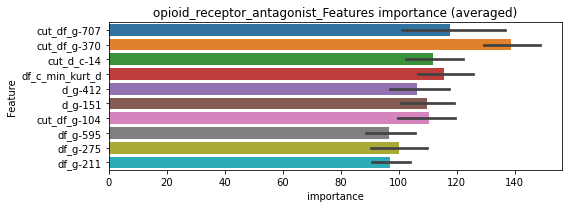

len(train_index) : 2805
len(valid_index) : 935
================================= fold 1/4 opioid_receptor_antagonist=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[561]	training's binary_logloss: 0.00102451	valid_1's binary_logloss: 0.0304336


len(train_index) : 2805
len(valid_index) : 935
================================= fold 2/4 opioid_receptor_antagonist=================================


Training until validation scores don't improve for 30 rounds


len(train_index) : 2805
len(valid_index) : 935
================================= fold 3/4 opioid_receptor_antagonist=================================


Early stopping, best iteration is:
[340]	training's binary_logloss: 0.00169737	valid_1's binary_logloss: 0.051145
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[549]	training's binary_logloss: 0.00105849	valid_1's binary_logloss: 0.021685


len(train_index) : 2805
len(valid_index) : 935
================================= fold 4/4 opioid_receptor_antagonist=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[612]	training's binary_logloss: 0.00094936	valid_1's binary_logloss: 0.023769


opioid_receptor_antagonist logloss: 0.03175816553432098
opioid_receptor_antagonist clipping


neg labels: 3289 → selected neg labels: 3286


orexin_receptor_antagonist, len(trt): 37, len(othr): 3286
target_rate: 0.0015537 → Adj_target_rate: 0.0018079
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00205903	valid_1's binary_logloss: 0.0129201
[600]	training's binary_logloss: 0.000443131	valid_1's binary_logloss: 0.00907304
Early stopping, best iteration is:
[628]	training's binary_logloss: 0.000424081	valid_1's binary_logloss: 0.00899655
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00199389	valid_1's binary_logloss: 0.0113648
[600]	training's binary_logloss: 0.000432747	valid_1's binary_logloss: 0.00703793
Early stopping, best iteration is:
[643]	training's binary_logloss: 0.000409955	valid_1's binary_logloss: 0.00699737
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00214763	valid_1's binary_logloss: 0.00615324
[600]	training's binary_logloss: 0.000452522	valid_1's binary_logloss: 0.00304149
Early stopping, best iteration is:
[656]	training's binary_logloss: 0.000422634	valid_1's binary

1 / 3 AUC score:1.000
y_Threshold: 0.0027254, Threshold: 0.0078847, pos_neg_ratio: 0.8000000
Remove_noisy_data: 132 → Positive_corect_labels: 657/3811
p_label_rate: 0.0100452 Vs.target_rate: 0.00155
Num_p_label: 40.0, conf_0:0.00552, conf_1:0.01025
Num_p_label: 40.0, Expected: 6.2, Adj_threshold_1: 0.0078847
Num_p_label: 1.0, Expected: 6.2, Adj_threshold_2: 0.0478847
threshold: 0.0478847, positive_p_label: 1.0/3982, p_label_rate: 0.0002511
positive_y_label: 657.0/3811, y_label_rate: 0.1723957
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00181404	valid_1's binary_logloss: 0.0134818
Early stopping, best iteration is:
[502]	training's binary_logloss: 0.000532966	valid_1's binary_logloss: 0.0102726
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00189808	valid_1's binary_logloss: 0.0123363
[600]	training's binary_logloss: 0.000422996	valid_1's binary_logloss: 0.00810984
Early stopping, best iteration is:
[587]	training's binary_logloss: 0.000432344	valid_1's binary_logloss: 0.00810806
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00198202	valid_1's binary_logloss: 0.00572078
[600]	training's binary_logloss: 0.000433385	valid_1's binary_logloss: 0.00272505
Early stopping, best iteration is:
[652]	training's binary_logloss: 0.000408995	valid_1's binary_logloss: 0.00266045
Training until validation scores don't improve for 30 rounds
[

2 / 3 AUC score:1.000
y_Threshold: 0.0332191, Threshold: 0.0478847, pos_neg_ratio: 0.8000000
Remove_noisy_data: 0 → Positive_corect_labels: 657.0/3811
p_label_rate: 0.0030136 Vs.target_rate: 0.00155
Num_p_label: 12.0, conf_0:0.03831, conf_1:0.05746
Num_p_label: 12.0, Expected: 6.2, Adj_threshold_1: 0.0478847
threshold: 0.0478847, positive_p_label: 12.0/3982, p_label_rate: 0.0030136
positive_y_label: 657.0/3811, y_label_rate: 0.1723957
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00181404	valid_1's binary_logloss: 0.0134818
Early stopping, best iteration is:
[502]	training's binary_logloss: 0.000532966	valid_1's binary_logloss: 0.0102726
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00189808	valid_1's binary_logloss: 0.0123363
[600]	training's binary_logloss: 0.000422996	valid_1's binary_logloss: 0.00810984
Early stopping, best iteration is:
[587]	training's binary_logloss: 0.000432344	valid_1's binary_logloss: 0.00810806
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00198202	valid_1's binary_logloss: 0.00572078
[600]	training's binary_logloss: 0.000433385	valid_1's binary_logloss: 0.00272505
Early stopping, best iteration is:
[652]	training's binary_logloss: 0.000408995	valid_1's binary_logloss: 0.00266045
Training until validation scores don't improve for 30 rounds
[

3 / 3 AUC score:1.000
y_Threshold: 0.0332191, Threshold: 0.0478847, pos_neg_ratio: 0.8000000
Remove_noisy_data: 0 → Positive_corect_labels: 657.0/3811
p_label_rate: 0.0030136 Vs.target_rate: 0.00155
Num_p_label: 12.0, conf_0:0.04310, conf_1:0.05267
Num_p_label: 12.0, Expected: 6.2, Adj_threshold_1: 0.0478847
threshold: 0.0478847, positive_p_label: 12.0/3982, p_label_rate: 0.0030136
positive_y_label: 657.0/3811, y_label_rate: 0.1723957


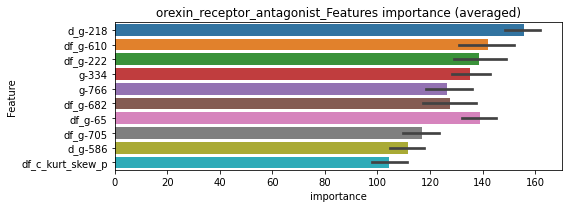

len(train_index) : 2858
len(valid_index) : 953
================================= fold 1/4 orexin_receptor_antagonist=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[743]	training's binary_logloss: 0.000446596	valid_1's binary_logloss: 0.00769229


len(train_index) : 2858
len(valid_index) : 953
================================= fold 2/4 orexin_receptor_antagonist=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[935]	training's binary_logloss: 0.000401082	valid_1's binary_logloss: 0.00526791


len(train_index) : 2858
len(valid_index) : 953
================================= fold 3/4 orexin_receptor_antagonist=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[962]	training's binary_logloss: 0.0004072	valid_1's binary_logloss: 0.00233373


len(train_index) : 2859
len(valid_index) : 952
================================= fold 4/4 orexin_receptor_antagonist=================================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.000399228	valid_1's binary_logloss: 0.00156635
Early stopping, best iteration is:
[1038]	training's binary_logloss: 0.000395684	valid_1's binary_logloss: 0.00155898


orexin_receptor_antagonist logloss: 0.004214043629805194


neg labels: 3289 → selected neg labels: 3281


p38_mapk_inhibitor, len(trt): 62, len(othr): 3281
target_rate: 0.0026035 → Adj_target_rate: 0.0028037
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00394365	valid_1's binary_logloss: 0.0273697
[600]	training's binary_logloss: 0.000699362	valid_1's binary_logloss: 0.0188682
Early stopping, best iteration is:
[631]	training's binary_logloss: 0.000644891	valid_1's binary_logloss: 0.018672
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00450453	valid_1's binary_logloss: 0.0249308
[600]	training's binary_logloss: 0.000749861	valid_1's binary_logloss: 0.0152814
Early stopping, best iteration is:
[768]	training's binary_logloss: 0.000545253	valid_1's binary_logloss: 0.0147095
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00416957	valid_1's binary_logloss: 0.0194869
[600]	training's binary_logloss: 0.000755058	valid_1's binary_logloss: 0.0118263
Early stopping, best iteration is:
[794]	training's binary_logloss: 0.000548127	valid_1's binary_loglos

1 / 3 AUC score:1.000
y_Threshold: 0.0067936, Threshold: 0.0275179, pos_neg_ratio: 0.8000000
Remove_noisy_data: 136 → Positive_corect_labels: 654/3801
p_label_rate: 0.0100452 Vs.target_rate: 0.00260
Num_p_label: 40.0, conf_0:0.01926, conf_1:0.03577
Num_p_label: 40.0, Expected: 10.4, Adj_threshold_1: 0.0275179
Num_p_label: 12.0, Expected: 10.4, Adj_threshold_2: 0.0675179
threshold: 0.0675179, positive_p_label: 12.0/3982, p_label_rate: 0.0030136
positive_y_label: 654.0/3801, y_label_rate: 0.1720600
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00358609	valid_1's binary_logloss: 0.0230707
[600]	training's binary_logloss: 0.000688407	valid_1's binary_logloss: 0.0146621
Early stopping, best iteration is:
[634]	training's binary_logloss: 0.000632225	valid_1's binary_logloss: 0.0144416
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0036705	valid_1's binary_logloss: 0.0261968
Early stopping, best iteration is:
[525]	training's binary_logloss: 0.000885784	valid_1's binary_logloss: 0.020211
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00351654	valid_1's binary_logloss: 0.0190244
[600]	training's binary_logloss: 0.000676873	valid_1's binary_logloss: 0.012232
Early stopping, best iteration is:
[733]	training's binary_logloss: 0.000536988	valid_1's binary_logloss: 0.0119603
Training until validation scores don't improve for 30 rounds
[300]	tra

2 / 3 AUC score:1.000
y_Threshold: 0.0259530, Threshold: 0.0675179, pos_neg_ratio: 0.8000000
Remove_noisy_data: 4 → Positive_corect_labels: 652.0/3797
p_label_rate: 0.0082873 Vs.target_rate: 0.00260
Num_p_label: 33.0, conf_0:0.05401, conf_1:0.08102
Num_p_label: 33.0, Expected: 10.4, Adj_threshold_1: 0.0675179
Num_p_label: 17.0, Expected: 10.4, Adj_threshold_2: 0.1075179
Num_p_label: 8.0, Expected: 10.4, Adj_threshold_3: 0.1475179
threshold: 0.1475179, positive_p_label: 8.0/3982, p_label_rate: 0.0020090
positive_y_label: 652.0/3797, y_label_rate: 0.1717145
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00369604	valid_1's binary_logloss: 0.0195625
[600]	training's binary_logloss: 0.000695871	valid_1's binary_logloss: 0.011581
Early stopping, best iteration is:
[748]	training's binary_logloss: 0.000531831	valid_1's binary_logloss: 0.01104
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0035231	valid_1's binary_logloss: 0.0207255
[600]	training's binary_logloss: 0.00067559	valid_1's binary_logloss: 0.0132297
Early stopping, best iteration is:
[633]	training's binary_logloss: 0.000620538	valid_1's binary_logloss: 0.0130993
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00377816	valid_1's binary_logloss: 0.0201993
[600]	training's binary_logloss: 0.000705399	valid_1's binary_logloss: 0.0121543
Early stopping, best iteration is:
[771]	training's binary_logloss: 0.000528024	valid_1's binary_logloss: 0

3 / 3 AUC score:1.000
y_Threshold: 0.0366555, Threshold: 0.1475179, pos_neg_ratio: 0.8000000
Remove_noisy_data: 0 → Positive_corect_labels: 652.0/3797
p_label_rate: 0.0030136 Vs.target_rate: 0.00260
Num_p_label: 12.0, conf_0:0.13277, conf_1:0.16227
threshold: 0.1475179, positive_p_label: 12.0/3982, p_label_rate: 0.0030136
positive_y_label: 652.0/3797, y_label_rate: 0.1717145


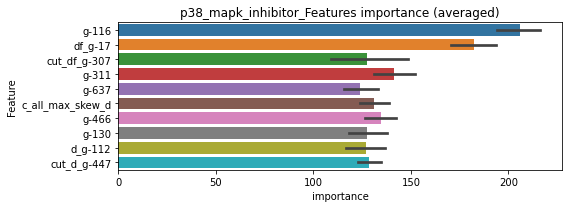

len(train_index) : 2847
len(valid_index) : 950
================================= fold 1/4 p38_mapk_inhibitor=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[634]	training's binary_logloss: 0.000733474	valid_1's binary_logloss: 0.0122133


len(train_index) : 2848
len(valid_index) : 949
================================= fold 2/4 p38_mapk_inhibitor=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[874]	training's binary_logloss: 0.00056518	valid_1's binary_logloss: 0.0147869


len(train_index) : 2848
len(valid_index) : 949
================================= fold 3/4 p38_mapk_inhibitor=================================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.000546829	valid_1's binary_logloss: 0.0098911
Early stopping, best iteration is:
[1001]	training's binary_logloss: 0.000546631	valid_1's binary_logloss: 0.00988843


len(train_index) : 2848
len(valid_index) : 949
================================= fold 4/4 p38_mapk_inhibitor=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[929]	training's binary_logloss: 0.00055996	valid_1's binary_logloss: 0.0121663


p38_mapk_inhibitor logloss: 0.01226370943318238


neg labels: 3289 → selected neg labels: 3288


p-glycoprotein_inhibitor, len(trt): 24, len(othr): 3288
target_rate: 0.0010078 → Adj_target_rate: 0.0012513
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00132516	valid_1's binary_logloss: 0.00401251
[600]	training's binary_logloss: 0.000335831	valid_1's binary_logloss: 0.00165191
Early stopping, best iteration is:
[601]	training's binary_logloss: 0.000335418	valid_1's binary_logloss: 0.0016512
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00133049	valid_1's binary_logloss: 0.00974861
[600]	training's binary_logloss: 0.000334398	valid_1's binary_logloss: 0.00715218
Early stopping, best iteration is:
[588]	training's binary_logloss: 0.0003371	valid_1's binary_logloss: 0.00715192
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00135131	valid_1's binary_logloss: 0.00270285
[600]	training's binary_logloss: 0.000336989	valid_1's binary_logloss: 0.000867098
Early stopping, best iteration is:
[666]	training's binary_logloss: 0.00032795	valid_1's binary_

1 / 3 AUC score:1.000
y_Threshold: 0.0019609, Threshold: 0.0098398, pos_neg_ratio: 0.8000000
Remove_noisy_data: 132 → Positive_corect_labels: 657/3813
p_label_rate: 0.0100452 Vs.target_rate: 0.00101
Num_p_label: 40.0, conf_0:0.00689, conf_1:0.01279
Num_p_label: 40.0, Expected: 4.0, Adj_threshold_1: 0.0098398
Num_p_label: 4.0, Expected: 4.0, Adj_threshold_2: 0.0498398
threshold: 0.0498398, positive_p_label: 4.0/3982, p_label_rate: 0.0010045
positive_y_label: 657.0/3813, y_label_rate: 0.1723053
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00124573	valid_1's binary_logloss: 0.00307001
[600]	training's binary_logloss: 0.000326769	valid_1's binary_logloss: 0.0011509
Early stopping, best iteration is:
[647]	training's binary_logloss: 0.000320596	valid_1's binary_logloss: 0.00113261
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00125237	valid_1's binary_logloss: 0.00786247
[600]	training's binary_logloss: 0.000319851	valid_1's binary_logloss: 0.00556032
Early stopping, best iteration is:
[604]	training's binary_logloss: 0.000318898	valid_1's binary_logloss: 0.00555053
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00125483	valid_1's binary_logloss: 0.00245923
[600]	training's binary_logloss: 0.000324284	valid_1's binary_logloss: 0.00078029
Early stopping, best iteration is:
[623]	training's binary_logloss: 0.000320932	valid_1's binar

2 / 3 AUC score:1.000
y_Threshold: 0.0157935, Threshold: 0.0498398, pos_neg_ratio: 0.8000000


[600]	training's binary_logloss: 0.000324739	valid_1's binary_logloss: 0.00116814
Early stopping, best iteration is:
[589]	training's binary_logloss: 0.000324739	valid_1's binary_logloss: 0.00116814


Remove_noisy_data: 0 → Positive_corect_labels: 657.0/3813
p_label_rate: 0.0035158 Vs.target_rate: 0.00101
Num_p_label: 14.0, conf_0:0.03987, conf_1:0.05981
Num_p_label: 14.0, Expected: 4.0, Adj_threshold_1: 0.0498398
Num_p_label: 7.0, Expected: 4.0, Adj_threshold_2: 0.0898398
threshold: 0.0898398, positive_p_label: 7.0/3982, p_label_rate: 0.0017579
positive_y_label: 657.0/3813, y_label_rate: 0.1723053
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00124573	valid_1's binary_logloss: 0.00307001
[600]	training's binary_logloss: 0.000326769	valid_1's binary_logloss: 0.0011509
Early stopping, best iteration is:
[647]	training's binary_logloss: 0.000320596	valid_1's binary_logloss: 0.00113261
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00125237	valid_1's binary_logloss: 0.00786247
[600]	training's binary_logloss: 0.000319851	valid_1's binary_logloss: 0.00556032
Early stopping, best iteration is:
[604]	training's binary_logloss: 0.000318898	valid_1's binary_logloss: 0.00555053
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00125483	valid_1's binary_logloss: 0.00245923
[600]	training's binary_logloss: 0.000324284	valid_1's binary_logloss: 0.00078029
Early stopping, best iteration is:
[629]	training's binary_logloss: 0.000320932	valid_1's binar

3 / 3 AUC score:1.000
y_Threshold: 0.0157935, Threshold: 0.0898398, pos_neg_ratio: 0.8000000
Remove_noisy_data: 0 → Positive_corect_labels: 657.0/3813
p_label_rate: 0.0017579 Vs.target_rate: 0.00101


[600]	training's binary_logloss: 0.000324739	valid_1's binary_logloss: 0.00116814
Early stopping, best iteration is:
[588]	training's binary_logloss: 0.000324739	valid_1's binary_logloss: 0.00116814


Num_p_label: 7.0, conf_0:0.08086, conf_1:0.09882
Num_p_label: 7.0, Expected: 4.0, Adj_threshold_1: 0.0898398
threshold: 0.0898398, positive_p_label: 7.0/3982, p_label_rate: 0.0017579
positive_y_label: 657.0/3813, y_label_rate: 0.1723053


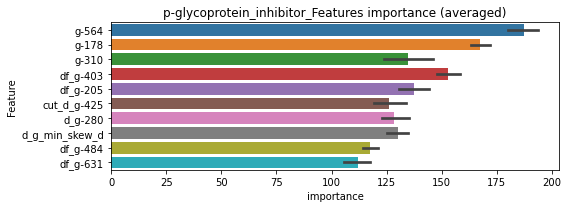

len(train_index) : 2859
len(valid_index) : 954
================================= fold 1/4 p-glycoprotein_inhibitor=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[919]	training's binary_logloss: 0.000322251	valid_1's binary_logloss: 0.000836015


len(train_index) : 2860
len(valid_index) : 953
================================= fold 2/4 p-glycoprotein_inhibitor=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[866]	training's binary_logloss: 0.000327988	valid_1's binary_logloss: 0.00421107


len(train_index) : 2860
len(valid_index) : 953
================================= fold 3/4 p-glycoprotein_inhibitor=================================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.000319284	valid_1's binary_logloss: 0.000809479
Early stopping, best iteration is:
[994]	training's binary_logloss: 0.000319284	valid_1's binary_logloss: 0.000809479


len(train_index) : 2860
len(valid_index) : 953
================================= fold 4/4 p-glycoprotein_inhibitor=================================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.000315676	valid_1's binary_logloss: 0.00112354
Early stopping, best iteration is:
[991]	training's binary_logloss: 0.000315676	valid_1's binary_logloss: 0.00112354


p-glycoprotein_inhibitor logloss: 0.0017447858562865193


neg labels: 3289 → selected neg labels: 3281


parp_inhibitor, len(trt): 61, len(othr): 3281
target_rate: 0.0025615 → Adj_target_rate: 0.0027652
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00342258	valid_1's binary_logloss: 0.0425925
Early stopping, best iteration is:
[544]	training's binary_logloss: 0.000781579	valid_1's binary_logloss: 0.035086
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0035572	valid_1's binary_logloss: 0.018484
[600]	training's binary_logloss: 0.000697689	valid_1's binary_logloss: 0.0114638
Early stopping, best iteration is:
[715]	training's binary_logloss: 0.000570241	valid_1's binary_logloss: 0.0110071
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00355522	valid_1's binary_logloss: 0.014802
Early stopping, best iteration is:
[561]	training's binary_logloss: 0.000783269	valid_1's binary_logloss: 0.00943827
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00331737	valid_1's binary_logloss: 0.0194104
[600]	trai

1 / 3 AUC score:0.999
y_Threshold: 0.0051990, Threshold: 0.0167280, pos_neg_ratio: 0.8000000
Remove_noisy_data: 134 → Positive_corect_labels: 655/3803
p_label_rate: 0.0100452 Vs.target_rate: 0.00256
Num_p_label: 40.0, conf_0:0.01171, conf_1:0.02175
Num_p_label: 40.0, Expected: 10.2, Adj_threshold_1: 0.0167280
Num_p_label: 4.0, Expected: 10.2, Adj_threshold_2: 0.0567280
threshold: 0.0567280, positive_p_label: 4.0/3982, p_label_rate: 0.0010045
positive_y_label: 655.0/3803, y_label_rate: 0.1722324
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00324472	valid_1's binary_logloss: 0.0195161
[600]	training's binary_logloss: 0.000659732	valid_1's binary_logloss: 0.0120235
Early stopping, best iteration is:
[735]	training's binary_logloss: 0.000537051	valid_1's binary_logloss: 0.0117284
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00315417	valid_1's binary_logloss: 0.0195977
[600]	training's binary_logloss: 0.000656762	valid_1's binary_logloss: 0.0137277
Early stopping, best iteration is:
[688]	training's binary_logloss: 0.000558322	valid_1's binary_logloss: 0.013422
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0032307	valid_1's binary_logloss: 0.0123242
[600]	training's binary_logloss: 0.000662959	valid_1's binary_logloss: 0.00616861
Early stopping, best iteration is:
[676]	training's binary_logloss: 0.000573998	valid_1's binary_loglos

2 / 3 AUC score:1.000
y_Threshold: 0.0395985, Threshold: 0.0567280, pos_neg_ratio: 0.8000000
Remove_noisy_data: 2 → Positive_corect_labels: 654.0/3801
p_label_rate: 0.0062783 Vs.target_rate: 0.00256
Num_p_label: 25.0, conf_0:0.04538, conf_1:0.06807
Num_p_label: 25.0, Expected: 10.2, Adj_threshold_1: 0.0567280
Num_p_label: 9.0, Expected: 10.2, Adj_threshold_2: 0.0967280
threshold: 0.0967280, positive_p_label: 9.0/3982, p_label_rate: 0.0022602
positive_y_label: 654.0/3801, y_label_rate: 0.1720600
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00322161	valid_1's binary_logloss: 0.0270174
[600]	training's binary_logloss: 0.000652114	valid_1's binary_logloss: 0.0213478
Early stopping, best iteration is:
[686]	training's binary_logloss: 0.00055814	valid_1's binary_logloss: 0.0209542
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00306272	valid_1's binary_logloss: 0.0240595
[600]	training's binary_logloss: 0.000642436	valid_1's binary_logloss: 0.018024
Early stopping, best iteration is:
[634]	training's binary_logloss: 0.000600898	valid_1's binary_logloss: 0.0178472
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00309688	valid_1's binary_logloss: 0.0138068
[600]	training's binary_logloss: 0.000656575	valid_1's binary_logloss: 0.00829289
Early stopping, best iteration is:
[742]	training's binary_logloss: 0.000533557	valid_1's binary_loglos

3 / 3 AUC score:1.000
y_Threshold: 0.0277729, Threshold: 0.0967280, pos_neg_ratio: 0.8000000
Remove_noisy_data: 2 → Positive_corect_labels: 653.0/3799
p_label_rate: 0.0027624 Vs.target_rate: 0.00256
Num_p_label: 11.0, conf_0:0.08706, conf_1:0.10640
threshold: 0.0967280, positive_p_label: 11.0/3982, p_label_rate: 0.0027624
positive_y_label: 653.0/3799, y_label_rate: 0.1718873


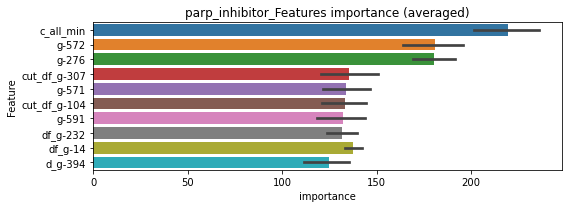

len(train_index) : 2849
len(valid_index) : 950
================================= fold 1/4 parp_inhibitor=================================


Training until validation scores don't improve for 30 rounds


len(train_index) : 2849


Early stopping, best iteration is:
[558]	training's binary_logloss: 0.000797714	valid_1's binary_logloss: 0.0152445


len(valid_index) : 950
================================= fold 2/4 parp_inhibitor=================================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.000544031	valid_1's binary_logloss: 0.0100269
Early stopping, best iteration is:
[1051]	training's binary_logloss: 0.000536725	valid_1's binary_logloss: 0.0100061


len(train_index) : 2849
len(valid_index) : 950
================================= fold 3/4 parp_inhibitor=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[725]	training's binary_logloss: 0.000641934	valid_1's binary_logloss: 0.0126682


len(train_index) : 2850
len(valid_index) : 949
================================= fold 4/4 parp_inhibitor=================================


Training until validation scores don't improve for 30 rounds


parp_inhibitor logloss: 0.015096049920756166


Early stopping, best iteration is:
[507]	training's binary_logloss: 0.000874658	valid_1's binary_logloss: 0.0224601
neg labels: 3289 → selected neg labels: 3245


pdgfr_inhibitor, len(trt): 297, len(othr): 3245
target_rate: 0.0124717 → Adj_target_rate: 0.0106179
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0352171	valid_1's binary_logloss: 0.246421
Early stopping, best iteration is:
[319]	training's binary_logloss: 0.0309587	valid_1's binary_logloss: 0.245425
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0349678	valid_1's binary_logloss: 0.245858
Early stopping, best iteration is:
[335]	training's binary_logloss: 0.0273883	valid_1's binary_logloss: 0.244306
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0337553	valid_1's binary_logloss: 0.26441
Early stopping, best iteration is:
[316]	training's binary_logloss: 0.0301433	valid_1's binary_logloss: 0.262846
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0361722	valid_1's binary_logloss: 0.258476


1 / 3 AUC score:0.896
y_Threshold: 0.0899002, Threshold: 0.5384014, pos_neg_ratio: 0.8000000
Remove_noisy_data: 436 → Positive_corect_labels: 496/3458
p_label_rate: 0.0100452 Vs.target_rate: 0.01247
Num_p_label: 40.0, conf_0:0.37688, conf_1:0.69992
threshold: 0.5384014, positive_p_label: 40.0/3982, p_label_rate: 0.0100452


Early stopping, best iteration is:
[308]	training's binary_logloss: 0.0340157	valid_1's binary_logloss: 0.257747


positive_y_label: 496.0/3458, y_label_rate: 0.1434355
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0145553	valid_1's binary_logloss: 0.142804
Early stopping, best iteration is:
[424]	training's binary_logloss: 0.00549999	valid_1's binary_logloss: 0.137152
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0154516	valid_1's binary_logloss: 0.13479
Early stopping, best iteration is:
[403]	training's binary_logloss: 0.00684109	valid_1's binary_logloss: 0.130179
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0159938	valid_1's binary_logloss: 0.131704
Early stopping, best iteration is:
[388]	training's binary_logloss: 0.00774683	valid_1's binary_logloss: 0.126402
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0148368	valid_1's binary_logloss: 0.179307


2 / 3 AUC score:0.978
y_Threshold: 0.0682165, Threshold: 0.5384014, pos_neg_ratio: 0.8000000
Remove_noisy_data: 106 → Positive_corect_labels: 443.0/3352
p_label_rate: 0.0258664 Vs.target_rate: 0.01247
Num_p_label: 103.0, conf_0:0.43072, conf_1:0.64608
Num_p_label: 103.0, Expected: 49.7, Adj_threshold_1: 0.5384014
Num_p_label: 100.0, Expected: 49.7, Adj_threshold_2: 0.5784014


Early stopping, best iteration is:
[389]	training's binary_logloss: 0.00704019	valid_1's binary_logloss: 0.178417


Num_p_label: 92.0, Expected: 49.7, Adj_threshold_3: 0.6184014
Num_p_label: 85.0, Expected: 49.7, Adj_threshold_4: 0.6584014
Num_p_label: 78.0, Expected: 49.7, Adj_threshold_5: 0.6984014
Num_p_label: 71.0, Expected: 49.7, Adj_threshold_6: 0.7384014
threshold: 0.7384014, positive_p_label: 71.0/3982, p_label_rate: 0.0178302
positive_y_label: 443.0/3352, y_label_rate: 0.1321599
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0101818	valid_1's binary_logloss: 0.14777
Early stopping, best iteration is:
[332]	training's binary_logloss: 0.00763484	valid_1's binary_logloss: 0.146235
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0117745	valid_1's binary_logloss: 0.0982189
Early stopping, best iteration is:
[524]	training's binary_logloss: 0.0025406	valid_1's binary_logloss: 0.0884322
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0114345	valid_1's binary_logloss: 0.112193
Early stopping, best iteration is:
[470]	training's binary_logloss: 0.00317901	valid_1's binary_logloss: 0.104035
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0108823	valid_1's binary_logloss: 0.124694


3 / 3 AUC score:0.988
y_Threshold: 0.0573281, Threshold: 0.7384014, pos_neg_ratio: 0.8000000
Remove_noisy_data: 70 → Positive_corect_labels: 408.0/3282
p_label_rate: 0.0223506 Vs.target_rate: 0.01247


Early stopping, best iteration is:
[447]	training's binary_logloss: 0.00352701	valid_1's binary_logloss: 0.118371


Num_p_label: 89.0, conf_0:0.50000, conf_1:0.80000
Num_p_label: 89.0, Expected: 49.7, Adj_threshold_1: 0.7384014
Num_p_label: 82.0, Expected: 49.7, Adj_threshold_2: 0.7784014
Num_p_label: 74.0, Expected: 49.7, Adj_threshold_3: 0.8184014
threshold: 0.8184014, positive_p_label: 74.0/3982, p_label_rate: 0.0185836
positive_y_label: 408.0/3282, y_label_rate: 0.1243144


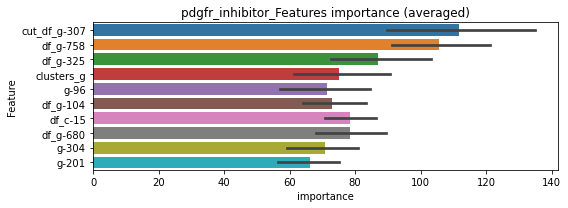

len(train_index) : 2461
len(valid_index) : 821
================================= fold 1/4 pdgfr_inhibitor=================================


Training until validation scores don't improve for 30 rounds


len(train_index) : 2461
len(valid_index) : 821
================================= fold 2/4 pdgfr_inhibitor=================================


Early stopping, best iteration is:
[217]	training's binary_logloss: 0.00493441	valid_1's binary_logloss: 0.12755
Training until validation scores don't improve for 30 rounds


len(train_index) : 2462
len(valid_index) : 820
================================= fold 3/4 pdgfr_inhibitor=================================


Early stopping, best iteration is:
[208]	training's binary_logloss: 0.00551945	valid_1's binary_logloss: 0.0838498
Training until validation scores don't improve for 30 rounds


len(train_index) : 2462
len(valid_index) : 820
================================= fold 4/4 pdgfr_inhibitor=================================


Early stopping, best iteration is:
[223]	training's binary_logloss: 0.00498859	valid_1's binary_logloss: 0.0903111
Training until validation scores don't improve for 30 rounds


pdgfr_inhibitor logloss: 0.10325745082573556
pdgfr_inhibitor clipping


Early stopping, best iteration is:
[222]	training's binary_logloss: 0.00492931	valid_1's binary_logloss: 0.111313
neg labels: 3289 → selected neg labels: 3284


pdk_inhibitor, len(trt): 18, len(othr): 3284
target_rate: 0.0007559 → Adj_target_rate: 0.0009799
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.000883938	valid_1's binary_logloss: 0.00551509
Early stopping, best iteration is:
[514]	training's binary_logloss: 0.000307417	valid_1's binary_logloss: 0.00418321
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.000919258	valid_1's binary_logloss: 0.00248169
Early stopping, best iteration is:
[502]	training's binary_logloss: 0.000319367	valid_1's binary_logloss: 0.00115165
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.000931957	valid_1's binary_logloss: 0.00193021
Early stopping, best iteration is:
[537]	training's binary_logloss: 0.00031007	valid_1's binary_logloss: 0.000748259
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.000924467	valid_1's binary_logloss: 0.00470854


1 / 3 AUC score:1.000
y_Threshold: 0.0017055, Threshold: 0.0108942, pos_neg_ratio: 0.8000000
Remove_noisy_data: 132 → Positive_corect_labels: 656/3808
p_label_rate: 0.0100452 Vs.target_rate: 0.00076
Num_p_label: 40.0, conf_0:0.00763, conf_1:0.01416
Num_p_label: 40.0, Expected: 3.0, Adj_threshold_1: 0.0108942
Num_p_label: 3.0, Expected: 3.0, Adj_threshold_2: 0.0508942


Early stopping, best iteration is:
[490]	training's binary_logloss: 0.00032208	valid_1's binary_logloss: 0.00365934


threshold: 0.0508942, positive_p_label: 3.0/3982, p_label_rate: 0.0007534
positive_y_label: 656.0/3808, y_label_rate: 0.1722689
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.000808824	valid_1's binary_logloss: 0.00649588
Early stopping, best iteration is:
[522]	training's binary_logloss: 0.000291663	valid_1's binary_logloss: 0.0049678
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.000856726	valid_1's binary_logloss: 0.00167993
Early stopping, best iteration is:
[495]	training's binary_logloss: 0.000305492	valid_1's binary_logloss: 0.00078292
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.000865173	valid_1's binary_logloss: 0.00144273
Early stopping, best iteration is:
[524]	training's binary_logloss: 0.000303446	valid_1's binary_logloss: 0.000569306
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00086858	valid_1's binary_logloss: 0.00421938


2 / 3 AUC score:1.000
y_Threshold: 0.0150908, Threshold: 0.0508942, pos_neg_ratio: 0.8000000
Remove_noisy_data: 0 → Positive_corect_labels: 656.0/3808
p_label_rate: 0.0080362 Vs.target_rate: 0.00076
Num_p_label: 32.0, conf_0:0.04072, conf_1:0.06107
Num_p_label: 32.0, Expected: 3.0, Adj_threshold_1: 0.0508942
Num_p_label: 8.0, Expected: 3.0, Adj_threshold_2: 0.0908942


Early stopping, best iteration is:
[478]	training's binary_logloss: 0.000316277	valid_1's binary_logloss: 0.00311287


Num_p_label: 5.0, Expected: 3.0, Adj_threshold_3: 0.1308942
threshold: 0.1308942, positive_p_label: 5.0/3982, p_label_rate: 0.0012557
positive_y_label: 656.0/3808, y_label_rate: 0.1722689
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.000808824	valid_1's binary_logloss: 0.00649588
Early stopping, best iteration is:
[522]	training's binary_logloss: 0.000291663	valid_1's binary_logloss: 0.0049678
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.000856726	valid_1's binary_logloss: 0.00167993
Early stopping, best iteration is:
[495]	training's binary_logloss: 0.000305492	valid_1's binary_logloss: 0.00078292
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.000865173	valid_1's binary_logloss: 0.00144273
Early stopping, best iteration is:
[524]	training's binary_logloss: 0.000303446	valid_1's binary_logloss: 0.000569306
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00086858	valid_1's binary_logloss: 0.00421938


3 / 3 AUC score:1.000
y_Threshold: 0.0150908, Threshold: 0.1308942, pos_neg_ratio: 0.8000000
Remove_noisy_data: 0 → Positive_corect_labels: 656.0/3808
p_label_rate: 0.0012557 Vs.target_rate: 0.00076
Num_p_label: 5.0, conf_0:0.11780, conf_1:0.14398
Num_p_label: 5.0, Expected: 3.0, Adj_threshold_1: 0.1308942


Early stopping, best iteration is:
[478]	training's binary_logloss: 0.000316277	valid_1's binary_logloss: 0.00311287


threshold: 0.1308942, positive_p_label: 5.0/3982, p_label_rate: 0.0012557
positive_y_label: 656.0/3808, y_label_rate: 0.1722689


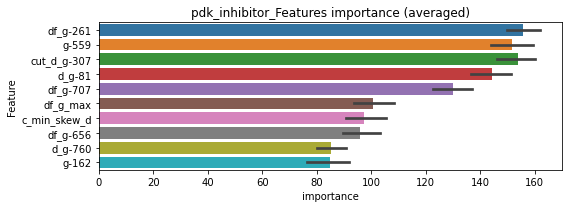

len(train_index) : 2856
len(valid_index) : 952
================================= fold 1/4 pdk_inhibitor=================================


Training until validation scores don't improve for 30 rounds


len(train_index) : 2856
len(valid_index) : 952
================================= fold 2/4 pdk_inhibitor=================================


Early stopping, best iteration is:
[736]	training's binary_logloss: 0.000301264	valid_1's binary_logloss: 0.00382248
Training until validation scores don't improve for 30 rounds


len(train_index) : 2856
len(valid_index) : 952


Early stopping, best iteration is:
[806]	training's binary_logloss: 0.000295435	valid_1's binary_logloss: 0.000841881


================================= fold 3/4 pdk_inhibitor=================================


Training until validation scores don't improve for 30 rounds


len(train_index) : 2856
len(valid_index) : 952
================================= fold 4/4 pdk_inhibitor=================================


Early stopping, best iteration is:
[731]	training's binary_logloss: 0.000304837	valid_1's binary_logloss: 0.000630888
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[769]	training's binary_logloss: 0.000296187	valid_1's binary_logloss: 0.00244643


pdk_inhibitor logloss: 0.0019360531541869608


neg labels: 3289 → selected neg labels: 3248


phosphodiesterase_inhibitor, len(trt): 264, len(othr): 3248
target_rate: 0.0110859 → Adj_target_rate: 0.0096064
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[241]	training's binary_logloss: 0.0427538	valid_1's binary_logloss: 0.253999
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0253844	valid_1's binary_logloss: 0.228143
Early stopping, best iteration is:
[297]	training's binary_logloss: 0.0259882	valid_1's binary_logloss: 0.22784
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0274852	valid_1's binary_logloss: 0.21118
Early stopping, best iteration is:
[317]	training's binary_logloss: 0.0242218	valid_1's binary_logloss: 0.210818
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0278777	valid_1's binary_logloss: 0.210313


1 / 3 AUC score:0.915
y_Threshold: 0.0751685, Threshold: 0.2548518, pos_neg_ratio: 0.8000000
Remove_noisy_data: 391 → Positive_corect_labels: 519/3506
p_label_rate: 0.0100452 Vs.target_rate: 0.01109
Num_p_label: 40.0, conf_0:0.17840, conf_1:0.33131
threshold: 0.2548518, positive_p_label: 40.0/3982, p_label_rate: 0.0100452


Early stopping, best iteration is:
[304]	training's binary_logloss: 0.0269802	valid_1's binary_logloss: 0.210114


positive_y_label: 519.0/3506, y_label_rate: 0.1480319
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0132444	valid_1's binary_logloss: 0.126582
Early stopping, best iteration is:
[409]	training's binary_logloss: 0.00543203	valid_1's binary_logloss: 0.120817
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0139953	valid_1's binary_logloss: 0.108236
Early stopping, best iteration is:
[502]	training's binary_logloss: 0.00326416	valid_1's binary_logloss: 0.0992419
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0127088	valid_1's binary_logloss: 0.122191
Early stopping, best iteration is:
[384]	training's binary_logloss: 0.00643422	valid_1's binary_logloss: 0.117665
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0123622	valid_1's binary_logloss: 0.122127


2 / 3 AUC score:0.990
y_Threshold: 0.0516440, Threshold: 0.2548518, pos_neg_ratio: 0.8000000
Remove_noisy_data: 68 → Positive_corect_labels: 485.0/3438


Early stopping, best iteration is:
[476]	training's binary_logloss: 0.00339225	valid_1's binary_logloss: 0.115885


p_label_rate: 0.0145655 Vs.target_rate: 0.01109
Num_p_label: 58.0, conf_0:0.20388, conf_1:0.30582
threshold: 0.2548518, positive_p_label: 58.0/3982, p_label_rate: 0.0145655
positive_y_label: 485.0/3438, y_label_rate: 0.1410704
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0104252	valid_1's binary_logloss: 0.10493
Early stopping, best iteration is:
[451]	training's binary_logloss: 0.00327912	valid_1's binary_logloss: 0.0999604
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.011006	valid_1's binary_logloss: 0.0923686
Early stopping, best iteration is:
[517]	training's binary_logloss: 0.00244165	valid_1's binary_logloss: 0.0850823
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0104013	valid_1's binary_logloss: 0.0950177
Early stopping, best iteration is:
[440]	training's binary_logloss: 0.00355591	valid_1's binary_logloss: 0.0898161
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0102057	valid_1's binary_logloss: 0.116195


3 / 3 AUC score:0.992
y_Threshold: 0.0475052, Threshold: 0.2548518, pos_neg_ratio: 0.8000000


Early stopping, best iteration is:
[432]	training's binary_logloss: 0.00364606	valid_1's binary_logloss: 0.111565


Remove_noisy_data: 48 → Positive_corect_labels: 461.0/3390
p_label_rate: 0.0158212 Vs.target_rate: 0.01109
Num_p_label: 63.0, conf_0:0.22937, conf_1:0.28034
threshold: 0.2548518, positive_p_label: 63.0/3982, p_label_rate: 0.0158212
positive_y_label: 461.0/3390, y_label_rate: 0.1359882


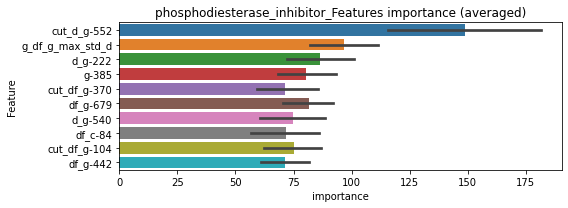

len(train_index) : 2542
len(valid_index) : 848
================================= fold 1/4 phosphodiesterase_inhibitor=================================


Training until validation scores don't improve for 30 rounds


len(train_index) : 2542
len(valid_index) : 848
================================= fold 2/4 phosphodiesterase_inhibitor=================================


Early stopping, best iteration is:
[257]	training's binary_logloss: 0.00379306	valid_1's binary_logloss: 0.0900621
Training until validation scores don't improve for 30 rounds


len(train_index) : 2543
len(valid_index) : 847
================================= fold 3/4 phosphodiesterase_inhibitor=================================


Early stopping, best iteration is:
[177]	training's binary_logloss: 0.00701128	valid_1's binary_logloss: 0.0884793
Training until validation scores don't improve for 30 rounds


len(train_index) : 2543
len(valid_index) : 847
================================= fold 4/4 phosphodiesterase_inhibitor=================================


Early stopping, best iteration is:
[321]	training's binary_logloss: 0.00287767	valid_1's binary_logloss: 0.0713441
Training until validation scores don't improve for 30 rounds


phosphodiesterase_inhibitor logloss: 0.0830400442454103
phosphodiesterase_inhibitor clipping


Early stopping, best iteration is:
[282]	training's binary_logloss: 0.00332202	valid_1's binary_logloss: 0.0822599
neg labels: 3289 → selected neg labels: 3286


phospholipase_inhibitor, len(trt): 25, len(othr): 3286
target_rate: 0.0010498 → Adj_target_rate: 0.0012955
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00136374	valid_1's binary_logloss: 0.00586862
[600]	training's binary_logloss: 0.000350394	valid_1's binary_logloss: 0.00333926
Early stopping, best iteration is:
[609]	training's binary_logloss: 0.000348349	valid_1's binary_logloss: 0.00332917
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00131842	valid_1's binary_logloss: 0.0106143
[600]	training's binary_logloss: 0.000343638	valid_1's binary_logloss: 0.00697369
Early stopping, best iteration is:
[625]	training's binary_logloss: 0.00033833	valid_1's binary_logloss: 0.00695048
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00138988	valid_1's binary_logloss: 0.00458598
[600]	training's binary_logloss: 0.000354693	valid_1's binary_logloss: 0.00241547
Early stopping, best iteration is:
[607]	training's binary_logloss: 0.000352667	valid_1's binary

1 / 3 AUC score:1.000
y_Threshold: 0.0023225, Threshold: 0.0083398, pos_neg_ratio: 0.8000000
Remove_noisy_data: 132 → Positive_corect_labels: 657/3811
p_label_rate: 0.0100452 Vs.target_rate: 0.00105
Num_p_label: 40.0, conf_0:0.00584, conf_1:0.01084
Num_p_label: 40.0, Expected: 4.2, Adj_threshold_1: 0.0083398
Num_p_label: 2.0, Expected: 4.2, Adj_threshold_2: 0.0483398
threshold: 0.0483398, positive_p_label: 2.0/3982, p_label_rate: 0.0005023
positive_y_label: 657.0/3811, y_label_rate: 0.1723957
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0012783	valid_1's binary_logloss: 0.00589124
[600]	training's binary_logloss: 0.000335766	valid_1's binary_logloss: 0.00354564
Early stopping, best iteration is:
[619]	training's binary_logloss: 0.000330802	valid_1's binary_logloss: 0.0035433
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00126849	valid_1's binary_logloss: 0.00844911
[600]	training's binary_logloss: 0.000334382	valid_1's binary_logloss: 0.00567655
Early stopping, best iteration is:
[628]	training's binary_logloss: 0.000328325	valid_1's binary_logloss: 0.00566634
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00130145	valid_1's binary_logloss: 0.00368122
Early stopping, best iteration is:
[569]	training's binary_logloss: 0.00035163	valid_1's binary_logloss: 0.00178417
Training until validation scores don't improve for 30 rounds
[

2 / 3 AUC score:1.000
y_Threshold: 0.0451554, Threshold: 0.0483398, pos_neg_ratio: 0.8000000
Remove_noisy_data: 0 → Positive_corect_labels: 657.0/3811
p_label_rate: 0.0017579 Vs.target_rate: 0.00105
Num_p_label: 7.0, conf_0:0.03867, conf_1:0.05801
Num_p_label: 7.0, Expected: 4.2, Adj_threshold_1: 0.0483398
threshold: 0.0483398, positive_p_label: 7.0/3982, p_label_rate: 0.0017579
positive_y_label: 657.0/3811, y_label_rate: 0.1723957
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0012783	valid_1's binary_logloss: 0.00589124
[600]	training's binary_logloss: 0.000335766	valid_1's binary_logloss: 0.00354564
Early stopping, best iteration is:
[619]	training's binary_logloss: 0.000330802	valid_1's binary_logloss: 0.0035433
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00126849	valid_1's binary_logloss: 0.00844911
[600]	training's binary_logloss: 0.000334382	valid_1's binary_logloss: 0.00567655
Early stopping, best iteration is:
[628]	training's binary_logloss: 0.000328325	valid_1's binary_logloss: 0.00566634
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00130145	valid_1's binary_logloss: 0.00368122
Early stopping, best iteration is:
[569]	training's binary_logloss: 0.00035163	valid_1's binary_logloss: 0.00178417
Training until validation scores don't improve for 30 rounds
[

3 / 3 AUC score:1.000
y_Threshold: 0.0451554, Threshold: 0.0483398, pos_neg_ratio: 0.8000000
Remove_noisy_data: 0 → Positive_corect_labels: 657.0/3811
p_label_rate: 0.0017579 Vs.target_rate: 0.00105
Num_p_label: 7.0, conf_0:0.04351, conf_1:0.05317
Num_p_label: 7.0, Expected: 4.2, Adj_threshold_1: 0.0483398
threshold: 0.0483398, positive_p_label: 7.0/3982, p_label_rate: 0.0017579
positive_y_label: 657.0/3811, y_label_rate: 0.1723957


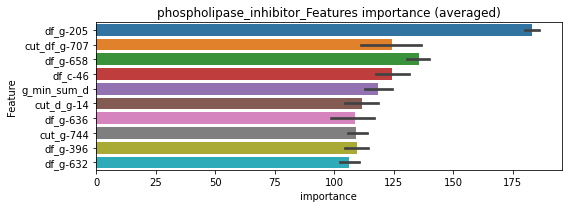

len(train_index) : 2858
len(valid_index) : 953
================================= fold 1/4 phospholipase_inhibitor=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[829]	training's binary_logloss: 0.000352391	valid_1's binary_logloss: 0.00235783


len(train_index) : 2858
len(valid_index) : 953
================================= fold 2/4 phospholipase_inhibitor=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[771]	training's binary_logloss: 0.000356422	valid_1's binary_logloss: 0.0049432


len(train_index) : 2858
len(valid_index) : 953
================================= fold 3/4 phospholipase_inhibitor=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[756]	training's binary_logloss: 0.000369371	valid_1's binary_logloss: 0.00135215


len(train_index) : 2859
len(valid_index) : 952
================================= fold 4/4 phospholipase_inhibitor=================================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.000330497	valid_1's binary_logloss: 0.00168399
Early stopping, best iteration is:
[978]	training's binary_logloss: 0.000331631	valid_1's binary_logloss: 0.00168166


phospholipase_inhibitor logloss: 0.002585562167760762


neg labels: 3289 → selected neg labels: 3262


pi3k_inhibitor, len(trt): 151, len(othr): 3262
target_rate: 0.0063408 → Adj_target_rate: 0.0059749
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0130004	valid_1's binary_logloss: 0.134182
Early stopping, best iteration is:
[345]	training's binary_logloss: 0.00872708	valid_1's binary_logloss: 0.13217
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.014512	valid_1's binary_logloss: 0.0939529
[600]	training's binary_logloss: 0.00209764	valid_1's binary_logloss: 0.0774124
Early stopping, best iteration is:
[644]	training's binary_logloss: 0.00179078	valid_1's binary_logloss: 0.0769781
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.013496	valid_1's binary_logloss: 0.111991
[600]	training's binary_logloss: 0.00196327	valid_1's binary_logloss: 0.0995919
Early stopping, best iteration is:
[603]	training's binary_logloss: 0.00194008	valid_1's binary_logloss: 0.0994986
Training until validation scores don't improve for 30 rounds
[300]	training's bin

1 / 3 AUC score:0.982
y_Threshold: 0.0266567, Threshold: 0.0757036, pos_neg_ratio: 0.8000000
Remove_noisy_data: 207 → Positive_corect_labels: 614/3707
p_label_rate: 0.0100452 Vs.target_rate: 0.00634
Num_p_label: 40.0, conf_0:0.05299, conf_1:0.09841
Num_p_label: 40.0, Expected: 25.2, Adj_threshold_1: 0.0757036
Num_p_label: 18.0, Expected: 25.2, Adj_threshold_2: 0.1157036
threshold: 0.1157036, positive_p_label: 18.0/3982, p_label_rate: 0.0045203
positive_y_label: 614.0/3707, y_label_rate: 0.1656326
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00946666	valid_1's binary_logloss: 0.0758312
[600]	training's binary_logloss: 0.00152323	valid_1's binary_logloss: 0.0650329
Early stopping, best iteration is:
[636]	training's binary_logloss: 0.00135384	valid_1's binary_logloss: 0.0649855
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00987128	valid_1's binary_logloss: 0.0870086
[600]	training's binary_logloss: 0.0015518	valid_1's binary_logloss: 0.0705247
Early stopping, best iteration is:
[611]	training's binary_logloss: 0.00149148	valid_1's binary_logloss: 0.0704026
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00979359	valid_1's binary_logloss: 0.0898013
Early stopping, best iteration is:
[465]	training's binary_logloss: 0.00278063	valid_1's binary_logloss: 0.0796837
Training until validation scores don't improve for 30 rounds
[300]	traini

2 / 3 AUC score:0.997
y_Threshold: 0.0484197, Threshold: 0.1157036, pos_neg_ratio: 0.8000000
Remove_noisy_data: 48 → Positive_corect_labels: 590.0/3659
p_label_rate: 0.0065294 Vs.target_rate: 0.00634
Num_p_label: 26.0, conf_0:0.09256, conf_1:0.13884
threshold: 0.1157036, positive_p_label: 26.0/3982, p_label_rate: 0.0065294
positive_y_label: 590.0/3659, y_label_rate: 0.1612462
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00773253	valid_1's binary_logloss: 0.0777256
[600]	training's binary_logloss: 0.00132265	valid_1's binary_logloss: 0.0683738
Early stopping, best iteration is:
[618]	training's binary_logloss: 0.00125031	valid_1's binary_logloss: 0.0679988
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00832942	valid_1's binary_logloss: 0.0736368
[600]	training's binary_logloss: 0.00138878	valid_1's binary_logloss: 0.0581077
Early stopping, best iteration is:
[627]	training's binary_logloss: 0.00127513	valid_1's binary_logloss: 0.0576836
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00827243	valid_1's binary_logloss: 0.0579803
[600]	training's binary_logloss: 0.00137878	valid_1's binary_logloss: 0.0413913
Early stopping, best iteration is:
[787]	training's binary_logloss: 0.000871195	valid_1's binary_logloss: 0

3 / 3 AUC score:0.998
y_Threshold: 0.0447397, Threshold: 0.1157036, pos_neg_ratio: 0.8000000
Remove_noisy_data: 20 → Positive_corect_labels: 580.0/3639
p_label_rate: 0.0072828 Vs.target_rate: 0.00634
Num_p_label: 29.0, conf_0:0.10413, conf_1:0.12727
threshold: 0.1157036, positive_p_label: 29.0/3982, p_label_rate: 0.0072828
positive_y_label: 580.0/3639, y_label_rate: 0.1593844


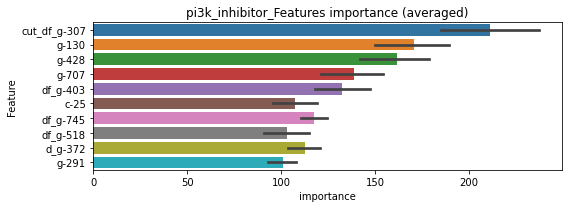

len(train_index) : 2729
len(valid_index) : 910
================================= fold 1/4 pi3k_inhibitor=================================


Training until validation scores don't improve for 30 rounds


len(train_index) : 2729
len(valid_index) : 910
================================= fold 2/4 pi3k_inhibitor=================================


Early stopping, best iteration is:
[437]	training's binary_logloss: 0.00172926	valid_1's binary_logloss: 0.0618034
Training until validation scores don't improve for 30 rounds


len(train_index) : 2729
len(valid_index) : 910
================================= fold 3/4 pi3k_inhibitor=================================


Early stopping, best iteration is:
[369]	training's binary_logloss: 0.00215668	valid_1's binary_logloss: 0.0551286
Training until validation scores don't improve for 30 rounds


len(train_index) : 2730
len(valid_index) : 909
================================= fold 4/4 pi3k_inhibitor=================================


Early stopping, best iteration is:
[446]	training's binary_logloss: 0.00172244	valid_1's binary_logloss: 0.0375255
Training until validation scores don't improve for 30 rounds


pi3k_inhibitor logloss: 0.05535903690053951
pi3k_inhibitor clipping


Early stopping, best iteration is:
[295]	training's binary_logloss: 0.00291118	valid_1's binary_logloss: 0.0669914
neg labels: 3289 → selected neg labels: 3286


pkc_inhibitor, len(trt): 31, len(othr): 3286
target_rate: 0.0013018 → Adj_target_rate: 0.0015554
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00168112	valid_1's binary_logloss: 0.00494605
[600]	training's binary_logloss: 0.000416665	valid_1's binary_logloss: 0.00208559
Early stopping, best iteration is:
[601]	training's binary_logloss: 0.000416618	valid_1's binary_logloss: 0.00208526
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00166882	valid_1's binary_logloss: 0.014512
[600]	training's binary_logloss: 0.00040716	valid_1's binary_logloss: 0.0105046
Early stopping, best iteration is:
[583]	training's binary_logloss: 0.000413886	valid_1's binary_logloss: 0.0104991
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00176334	valid_1's binary_logloss: 0.00420109
[600]	training's binary_logloss: 0.000425965	valid_1's binary_logloss: 0.00200198
Early stopping, best iteration is:
[611]	training's binary_logloss: 0.000420206	valid_1's binary_lo

1 / 3 AUC score:1.000
y_Threshold: 0.0026069, Threshold: 0.0084111, pos_neg_ratio: 0.8000000
Remove_noisy_data: 132 → Positive_corect_labels: 657/3811
p_label_rate: 0.0100452 Vs.target_rate: 0.00130
Num_p_label: 40.0, conf_0:0.00589, conf_1:0.01093
Num_p_label: 40.0, Expected: 5.2, Adj_threshold_1: 0.0084111
Num_p_label: 3.0, Expected: 5.2, Adj_threshold_2: 0.0484111
threshold: 0.0484111, positive_p_label: 3.0/3982, p_label_rate: 0.0007534
positive_y_label: 657.0/3811, y_label_rate: 0.1723957
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00161657	valid_1's binary_logloss: 0.00415474
[600]	training's binary_logloss: 0.000399691	valid_1's binary_logloss: 0.00166656
Early stopping, best iteration is:
[605]	training's binary_logloss: 0.000397342	valid_1's binary_logloss: 0.00165716
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00157838	valid_1's binary_logloss: 0.0152509
[600]	training's binary_logloss: 0.000394082	valid_1's binary_logloss: 0.0110369
Early stopping, best iteration is:
[618]	training's binary_logloss: 0.000387703	valid_1's binary_logloss: 0.0110076
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00162589	valid_1's binary_logloss: 0.00316458
[600]	training's binary_logloss: 0.00040955	valid_1's binary_logloss: 0.00114785
Early stopping, best iteration is:
[654]	training's binary_logloss: 0.000393919	valid_1's binary_l

2 / 3 AUC score:1.000
y_Threshold: 0.0233068, Threshold: 0.0484111, pos_neg_ratio: 0.8000000
Remove_noisy_data: 0 → Positive_corect_labels: 657.0/3811
p_label_rate: 0.0025113 Vs.target_rate: 0.00130
Num_p_label: 10.0, conf_0:0.03873, conf_1:0.05809
Num_p_label: 10.0, Expected: 5.2, Adj_threshold_1: 0.0484111
threshold: 0.0484111, positive_p_label: 10.0/3982, p_label_rate: 0.0025113
positive_y_label: 657.0/3811, y_label_rate: 0.1723957
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00161657	valid_1's binary_logloss: 0.00415474
[600]	training's binary_logloss: 0.000399691	valid_1's binary_logloss: 0.00166656
Early stopping, best iteration is:
[605]	training's binary_logloss: 0.000397342	valid_1's binary_logloss: 0.00165716
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00157838	valid_1's binary_logloss: 0.0152509
[600]	training's binary_logloss: 0.000394082	valid_1's binary_logloss: 0.0110369
Early stopping, best iteration is:
[618]	training's binary_logloss: 0.000387703	valid_1's binary_logloss: 0.0110076
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00162589	valid_1's binary_logloss: 0.00316458
[600]	training's binary_logloss: 0.00040955	valid_1's binary_logloss: 0.00114785
Early stopping, best iteration is:
[654]	training's binary_logloss: 0.000393919	valid_1's binary_l

3 / 3 AUC score:1.000
y_Threshold: 0.0233068, Threshold: 0.0484111, pos_neg_ratio: 0.8000000
Remove_noisy_data: 0 → Positive_corect_labels: 657.0/3811
p_label_rate: 0.0025113 Vs.target_rate: 0.00130
Num_p_label: 10.0, conf_0:0.04357, conf_1:0.05325
Num_p_label: 10.0, Expected: 5.2, Adj_threshold_1: 0.0484111
threshold: 0.0484111, positive_p_label: 10.0/3982, p_label_rate: 0.0025113
positive_y_label: 657.0/3811, y_label_rate: 0.1723957


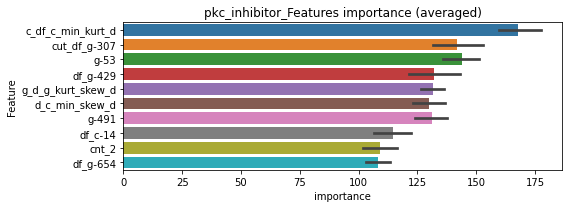

len(train_index) : 2858
len(valid_index) : 953
================================= fold 1/4 pkc_inhibitor=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[876]	training's binary_logloss: 0.0004094	valid_1's binary_logloss: 0.00173527


len(train_index) : 2858
len(valid_index) : 953
================================= fold 2/4 pkc_inhibitor=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[880]	training's binary_logloss: 0.000398229	valid_1's binary_logloss: 0.0092934


len(train_index) : 2858
len(valid_index) : 953
================================= fold 3/4 pkc_inhibitor=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[846]	training's binary_logloss: 0.000415773	valid_1's binary_logloss: 0.00108837


len(train_index) : 2859
len(valid_index) : 952
================================= fold 4/4 pkc_inhibitor=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[848]	training's binary_logloss: 0.000403978	valid_1's binary_logloss: 0.00256935


pkc_inhibitor logloss: 0.003672691004215935


neg labels: 3289 → selected neg labels: 3281


potassium_channel_activator, len(trt): 55, len(othr): 3281
target_rate: 0.0023096 → Adj_target_rate: 0.0025322
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00312932	valid_1's binary_logloss: 0.0371847
[600]	training's binary_logloss: 0.00060929	valid_1's binary_logloss: 0.0303983
Early stopping, best iteration is:
[640]	training's binary_logloss: 0.000560479	valid_1's binary_logloss: 0.0301874
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0033206	valid_1's binary_logloss: 0.0184819
[600]	training's binary_logloss: 0.000646874	valid_1's binary_logloss: 0.012603
Early stopping, best iteration is:
[633]	training's binary_logloss: 0.000602557	valid_1's binary_logloss: 0.0124299
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00361028	valid_1's binary_logloss: 0.00950511
[600]	training's binary_logloss: 0.000674798	valid_1's binary_logloss: 0.00345991
Early stopping, best iteration is:
[717]	training's binary_logloss: 0.000560539	valid_1's binary_loglos

1 / 3 AUC score:1.000
y_Threshold: 0.0045572, Threshold: 0.0231332, pos_neg_ratio: 0.8000000
Remove_noisy_data: 132 → Positive_corect_labels: 656/3805
p_label_rate: 0.0100452 Vs.target_rate: 0.00231
Num_p_label: 40.0, conf_0:0.01619, conf_1:0.03007
Num_p_label: 40.0, Expected: 9.2, Adj_threshold_1: 0.0231332
Num_p_label: 11.0, Expected: 9.2, Adj_threshold_2: 0.0631332
threshold: 0.0631332, positive_p_label: 11.0/3982, p_label_rate: 0.0027624
positive_y_label: 656.0/3805, y_label_rate: 0.1724047
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00301695	valid_1's binary_logloss: 0.0371888
[600]	training's binary_logloss: 0.000596094	valid_1's binary_logloss: 0.0308188
Early stopping, best iteration is:
[577]	training's binary_logloss: 0.000631155	valid_1's binary_logloss: 0.0306926
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00310883	valid_1's binary_logloss: 0.0171552
[600]	training's binary_logloss: 0.000625126	valid_1's binary_logloss: 0.0114373
Early stopping, best iteration is:
[575]	training's binary_logloss: 0.00066564	valid_1's binary_logloss: 0.0114077
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00333957	valid_1's binary_logloss: 0.0095253
[600]	training's binary_logloss: 0.000644065	valid_1's binary_logloss: 0.00354258
Early stopping, best iteration is:
[722]	training's binary_logloss: 0.000537261	valid_1's binary_loglo

2 / 3 AUC score:1.000
y_Threshold: 0.0358858, Threshold: 0.0631332, pos_neg_ratio: 0.8000000
Remove_noisy_data: 8 → Positive_corect_labels: 652.0/3797
p_label_rate: 0.0155701 Vs.target_rate: 0.00231
Num_p_label: 62.0, conf_0:0.05051, conf_1:0.07576
Num_p_label: 62.0, Expected: 9.2, Adj_threshold_1: 0.0631332
Num_p_label: 39.0, Expected: 9.2, Adj_threshold_2: 0.1031332
Num_p_label: 27.0, Expected: 9.2, Adj_threshold_3: 0.1431332
Num_p_label: 20.0, Expected: 9.2, Adj_threshold_4: 0.1831332
threshold: 0.1831332, positive_p_label: 20.0/3982, p_label_rate: 0.0050226
positive_y_label: 652.0/3797, y_label_rate: 0.1717145
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00288933	valid_1's binary_logloss: 0.0321292
Early stopping, best iteration is:
[559]	training's binary_logloss: 0.00065945	valid_1's binary_logloss: 0.0281733
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00300487	valid_1's binary_logloss: 0.0171818
[600]	training's binary_logloss: 0.000611118	valid_1's binary_logloss: 0.0116203
Early stopping, best iteration is:
[631]	training's binary_logloss: 0.000571853	valid_1's binary_logloss: 0.0115468
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00304735	valid_1's binary_logloss: 0.01543
[600]	training's binary_logloss: 0.000615254	valid_1's binary_logloss: 0.00846666
Early stopping, best iteration is:
[716]	training's binary_logloss: 0.000522712	valid_1's binary_logloss: 0.00812231
Training until validation scores don't improve for 30 rounds
[300]	t

3 / 3 AUC score:1.000
y_Threshold: 0.0337265, Threshold: 0.1831332, pos_neg_ratio: 0.8000000
Remove_noisy_data: 8 → Positive_corect_labels: 648.0/3789
p_label_rate: 0.0085384 Vs.target_rate: 0.00231
Num_p_label: 34.0, conf_0:0.16482, conf_1:0.20145
Num_p_label: 34.0, Expected: 9.2, Adj_threshold_1: 0.1831332
Num_p_label: 28.0, Expected: 9.2, Adj_threshold_2: 0.2231332
Num_p_label: 21.0, Expected: 9.2, Adj_threshold_3: 0.2631332
threshold: 0.2631332, positive_p_label: 21.0/3982, p_label_rate: 0.0052737
positive_y_label: 648.0/3789, y_label_rate: 0.1710214


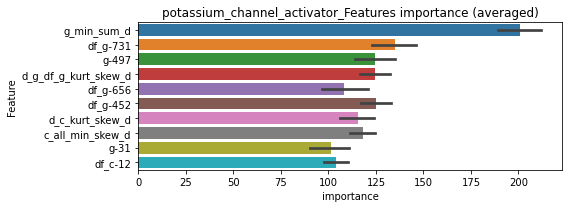

len(train_index) : 2841
len(valid_index) : 948
================================= fold 1/4 potassium_channel_activator=================================


Training until validation scores don't improve for 30 rounds


len(train_index) : 2842
len(valid_index) : 947
================================= fold 2/4 potassium_channel_activator=================================


Early stopping, best iteration is:
[450]	training's binary_logloss: 0.000911834	valid_1's binary_logloss: 0.0142637
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[713]	training's binary_logloss: 0.000603359	valid_1's binary_logloss: 0.0115101


len(train_index) : 2842
len(valid_index) : 947
================================= fold 3/4 potassium_channel_activator=================================


Training until validation scores don't improve for 30 rounds


len(train_index) : 2842
len(valid_index) : 947
================================= fold 4/4 potassium_channel_activator=================================


Early stopping, best iteration is:
[402]	training's binary_logloss: 0.00102399	valid_1's binary_logloss: 0.0171059
Training until validation scores don't improve for 30 rounds


potassium_channel_activator logloss: 0.01301314630438147


Early stopping, best iteration is:
[571]	training's binary_logloss: 0.000723336	valid_1's binary_logloss: 0.00917152
neg labels: 3289 → selected neg labels: 3278


potassium_channel_antagonist, len(trt): 98, len(othr): 3278
target_rate: 0.0041152 → Adj_target_rate: 0.0041375
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00693853	valid_1's binary_logloss: 0.0737594
Early stopping, best iteration is:
[472]	training's binary_logloss: 0.00189765	valid_1's binary_logloss: 0.0652318
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00738174	valid_1's binary_logloss: 0.0671737
Early stopping, best iteration is:
[546]	training's binary_logloss: 0.00141257	valid_1's binary_logloss: 0.0586064
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00796779	valid_1's binary_logloss: 0.0420822
[600]	training's binary_logloss: 0.00120789	valid_1's binary_logloss: 0.0321364
Early stopping, best iteration is:
[633]	training's binary_logloss: 0.00108843	valid_1's binary_logloss: 0.0318773
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0072766	valid_1's binary_logloss: 0.0691288
[600]	traini

1 / 3 AUC score:0.994
y_Threshold: 0.0097178, Threshold: 0.0259257, pos_neg_ratio: 0.8000000
Remove_noisy_data: 148 → Positive_corect_labels: 647/3785
p_label_rate: 0.0100452 Vs.target_rate: 0.00412
Num_p_label: 40.0, conf_0:0.01815, conf_1:0.03370
Num_p_label: 40.0, Expected: 16.4, Adj_threshold_1: 0.0259257
Num_p_label: 9.0, Expected: 16.4, Adj_threshold_2: 0.0659257
threshold: 0.0659257, positive_p_label: 9.0/3982, p_label_rate: 0.0022602
positive_y_label: 647.0/3785, y_label_rate: 0.1709379
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0063772	valid_1's binary_logloss: 0.0496102
[600]	training's binary_logloss: 0.0010675	valid_1's binary_logloss: 0.0400227
Early stopping, best iteration is:
[659]	training's binary_logloss: 0.000902204	valid_1's binary_logloss: 0.0395184
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00634416	valid_1's binary_logloss: 0.0646685
[600]	training's binary_logloss: 0.00104753	valid_1's binary_logloss: 0.0572513
Early stopping, best iteration is:
[645]	training's binary_logloss: 0.000922466	valid_1's binary_logloss: 0.0568098
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00605035	valid_1's binary_logloss: 0.0627603
Early stopping, best iteration is:
[422]	training's binary_logloss: 0.00228651	valid_1's binary_logloss: 0.0584438
Training until validation scores don't improve for 30 rounds
[300]	train

2 / 3 AUC score:0.999
y_Threshold: 0.0271169, Threshold: 0.0659257, pos_neg_ratio: 0.8000000
Remove_noisy_data: 16 → Positive_corect_labels: 639.0/3769
p_label_rate: 0.0060271 Vs.target_rate: 0.00412
Num_p_label: 24.0, conf_0:0.05274, conf_1:0.07911
threshold: 0.0659257, positive_p_label: 24.0/3982, p_label_rate: 0.0060271
positive_y_label: 639.0/3769, y_label_rate: 0.1695410
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0054901	valid_1's binary_logloss: 0.0562406
[600]	training's binary_logloss: 0.000959496	valid_1's binary_logloss: 0.046525
Early stopping, best iteration is:
[640]	training's binary_logloss: 0.000860529	valid_1's binary_logloss: 0.0461333
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0060005	valid_1's binary_logloss: 0.0545565
[600]	training's binary_logloss: 0.00101445	valid_1's binary_logloss: 0.0449847
Early stopping, best iteration is:
[684]	training's binary_logloss: 0.000807086	valid_1's binary_logloss: 0.0440122
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00624092	valid_1's binary_logloss: 0.0310363
[600]	training's binary_logloss: 0.0010512	valid_1's binary_logloss: 0.0206673
Early stopping, best iteration is:
[710]	training's binary_logloss: 0.000792333	valid_1's binary_logloss: 0.

3 / 3 AUC score:0.999
y_Threshold: 0.0335904, Threshold: 0.0659257, pos_neg_ratio: 0.8000000
Remove_noisy_data: 18 → Positive_corect_labels: 630.0/3751
p_label_rate: 0.0055249 Vs.target_rate: 0.00412
Num_p_label: 22.0, conf_0:0.05933, conf_1:0.07252


Early stopping, best iteration is:
[390]	training's binary_logloss: 0.00280468	valid_1's binary_logloss: 0.0585727


threshold: 0.0659257, positive_p_label: 22.0/3982, p_label_rate: 0.0055249
positive_y_label: 630.0/3751, y_label_rate: 0.1679552


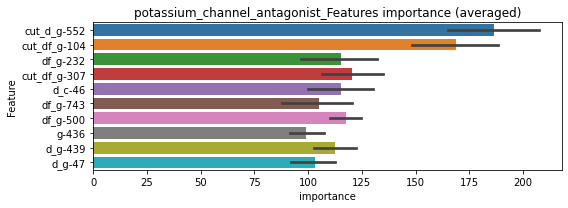

len(train_index) : 2813
len(valid_index) : 938
================================= fold 1/4 potassium_channel_antagonist=================================


Training until validation scores don't improve for 30 rounds


len(train_index) : 2813
len(valid_index) : 938
================================= fold 2/4 potassium_channel_antagonist=================================


Early stopping, best iteration is:
[366]	training's binary_logloss: 0.00167155	valid_1's binary_logloss: 0.0393565
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[611]	training's binary_logloss: 0.000961012	valid_1's binary_logloss: 0.0335296


len(train_index) : 2813
len(valid_index) : 938
================================= fold 3/4 potassium_channel_antagonist=================================


Training until validation scores don't improve for 30 rounds


len(train_index) : 2814
len(valid_index) : 937
================================= fold 4/4 potassium_channel_antagonist=================================


Early stopping, best iteration is:
[362]	training's binary_logloss: 0.00170945	valid_1's binary_logloss: 0.0313146
Training until validation scores don't improve for 30 rounds


potassium_channel_antagonist logloss: 0.03465201344195117
potassium_channel_antagonist clipping


Early stopping, best iteration is:
[518]	training's binary_logloss: 0.00112212	valid_1's binary_logloss: 0.0344072
neg labels: 3289 → selected neg labels: 3278


ppar_receptor_agonist, len(trt): 115, len(othr): 3278
target_rate: 0.0048291 → Adj_target_rate: 0.0047401
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00907288	valid_1's binary_logloss: 0.0875061
Early stopping, best iteration is:
[460]	training's binary_logloss: 0.00263471	valid_1's binary_logloss: 0.0810689
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0102529	valid_1's binary_logloss: 0.0809405
Early stopping, best iteration is:
[536]	training's binary_logloss: 0.00192464	valid_1's binary_logloss: 0.0720913
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0104895	valid_1's binary_logloss: 0.0548527
[600]	training's binary_logloss: 0.00153076	valid_1's binary_logloss: 0.0420221
Early stopping, best iteration is:
[582]	training's binary_logloss: 0.0016392	valid_1's binary_logloss: 0.0415947
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00921516	valid_1's binary_logloss: 0.0965874


1 / 3 AUC score:0.992
y_Threshold: 0.0167769, Threshold: 0.0491849, pos_neg_ratio: 0.8000000
Remove_noisy_data: 168 → Positive_corect_labels: 637/3765
p_label_rate: 0.0100452 Vs.target_rate: 0.00483
Num_p_label: 40.0, conf_0:0.03443, conf_1:0.06394


Early stopping, best iteration is:
[428]	training's binary_logloss: 0.0032112	valid_1's binary_logloss: 0.0928287


Num_p_label: 40.0, Expected: 19.2, Adj_threshold_1: 0.0491849
Num_p_label: 10.0, Expected: 19.2, Adj_threshold_2: 0.0891849
threshold: 0.0891849, positive_p_label: 10.0/3982, p_label_rate: 0.0025113
positive_y_label: 637.0/3765, y_label_rate: 0.1691899
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00771731	valid_1's binary_logloss: 0.082289
Early stopping, best iteration is:
[412]	training's binary_logloss: 0.0030234	valid_1's binary_logloss: 0.0762331
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00791499	valid_1's binary_logloss: 0.0488921
[600]	training's binary_logloss: 0.00126382	valid_1's binary_logloss: 0.0398565
Early stopping, best iteration is:
[633]	training's binary_logloss: 0.00113595	valid_1's binary_logloss: 0.0397473
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00824501	valid_1's binary_logloss: 0.0611885
[600]	training's binary_logloss: 0.00128554	valid_1's binary_logloss: 0.0495341
Early stopping, best iteration is:
[643]	training's binary_logloss: 0.0011221	valid_1's binary_logloss: 0.0490381
Training until validation scores don't improve for 30 rounds
[300]	training

2 / 3 AUC score:0.998


Early stopping, best iteration is:
[504]	training's binary_logloss: 0.00173965	valid_1's binary_logloss: 0.069165


y_Threshold: 0.0331140, Threshold: 0.0891849, pos_neg_ratio: 0.8000000
Remove_noisy_data: 36 → Positive_corect_labels: 619.0/3729
p_label_rate: 0.0082873 Vs.target_rate: 0.00483
Num_p_label: 33.0, conf_0:0.07135, conf_1:0.10702
Num_p_label: 33.0, Expected: 19.2, Adj_threshold_1: 0.0891849
Num_p_label: 17.0, Expected: 19.2, Adj_threshold_2: 0.1291849
threshold: 0.1291849, positive_p_label: 17.0/3982, p_label_rate: 0.0042692
positive_y_label: 619.0/3729, y_label_rate: 0.1659962
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0063127	valid_1's binary_logloss: 0.0727535
Early stopping, best iteration is:
[403]	training's binary_logloss: 0.00265073	valid_1's binary_logloss: 0.0677116
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00704427	valid_1's binary_logloss: 0.0503583
[600]	training's binary_logloss: 0.0011483	valid_1's binary_logloss: 0.0384308
Early stopping, best iteration is:
[693]	training's binary_logloss: 0.000890986	valid_1's binary_logloss: 0.0376376
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00670247	valid_1's binary_logloss: 0.045185
[600]	training's binary_logloss: 0.00112287	valid_1's binary_logloss: 0.0364538
Early stopping, best iteration is:
[604]	training's binary_logloss: 0.00110994	valid_1's binary_logloss: 0.0363709
Training until validation scores don't improve for 30 rounds
[300]	trainin

3 / 3 AUC score:0.999
y_Threshold: 0.0355895, Threshold: 0.1291849, pos_neg_ratio: 0.8000000
Remove_noisy_data: 14 → Positive_corect_labels: 612.0/3715
p_label_rate: 0.0022602 Vs.target_rate: 0.00483
Num_p_label: 9.0, conf_0:0.11627, conf_1:0.14210
Num_p_label: 9.0, Expected: 19.2, Adj_threshold_1: 0.1291849
threshold: 0.1291849, positive_p_label: 9.0/3982, p_label_rate: 0.0022602
positive_y_label: 612.0/3715, y_label_rate: 0.1647376


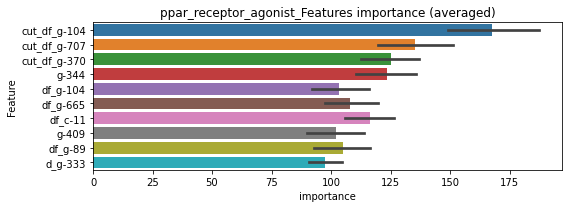

len(train_index) : 2786
len(valid_index) : 929
================================= fold 1/4 ppar_receptor_agonist=================================


Training until validation scores don't improve for 30 rounds


len(train_index) : 2786
len(valid_index) : 929


Early stopping, best iteration is:
[557]	training's binary_logloss: 0.00112144	valid_1's binary_logloss: 0.0458789


================================= fold 2/4 ppar_receptor_agonist=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[617]	training's binary_logloss: 0.000995353	valid_1's binary_logloss: 0.054647


len(train_index) : 2786
len(valid_index) : 929
================================= fold 3/4 ppar_receptor_agonist=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[547]	training's binary_logloss: 0.00117017	valid_1's binary_logloss: 0.0236261


len(train_index) : 2787
len(valid_index) : 928
================================= fold 4/4 ppar_receptor_agonist=================================


Training until validation scores don't improve for 30 rounds


ppar_receptor_agonist logloss: 0.04053547888909734
ppar_receptor_agonist clipping


Early stopping, best iteration is:
[371]	training's binary_logloss: 0.00179991	valid_1's binary_logloss: 0.0379872
neg labels: 3289 → selected neg labels: 3282


ppar_receptor_antagonist, len(trt): 30, len(othr): 3282
target_rate: 0.0012598 → Adj_target_rate: 0.0015127
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00164074	valid_1's binary_logloss: 0.0093136
[600]	training's binary_logloss: 0.000384087	valid_1's binary_logloss: 0.00583146
Early stopping, best iteration is:
[592]	training's binary_logloss: 0.000386765	valid_1's binary_logloss: 0.00582526
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0016809	valid_1's binary_logloss: 0.00718111
[600]	training's binary_logloss: 0.000388254	valid_1's binary_logloss: 0.00446497
Early stopping, best iteration is:
[639]	training's binary_logloss: 0.000374829	valid_1's binary_logloss: 0.00442832
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00172929	valid_1's binary_logloss: 0.00472062
[600]	training's binary_logloss: 0.000395511	valid_1's binary_logloss: 0.00233806
Early stopping, best iteration is:
[654]	training's binary_logloss: 0.000376747	valid_1's binary

1 / 3 AUC score:1.000
y_Threshold: 0.0022065, Threshold: 0.0051155, pos_neg_ratio: 0.8000000
Remove_noisy_data: 132 → Positive_corect_labels: 656/3806
p_label_rate: 0.0100452 Vs.target_rate: 0.00126
Num_p_label: 40.0, conf_0:0.00358, conf_1:0.00665
Num_p_label: 40.0, Expected: 5.0, Adj_threshold_1: 0.0051155
Num_p_label: 1.0, Expected: 5.0, Adj_threshold_2: 0.0451155


Early stopping, best iteration is:
[495]	training's binary_logloss: 0.000474302	valid_1's binary_logloss: 0.0221772


threshold: 0.0451155, positive_p_label: 1.0/3982, p_label_rate: 0.0002511
positive_y_label: 656.0/3806, y_label_rate: 0.1723594
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00154508	valid_1's binary_logloss: 0.00940897
[600]	training's binary_logloss: 0.000377689	valid_1's binary_logloss: 0.00617416
Early stopping, best iteration is:
[608]	training's binary_logloss: 0.000374406	valid_1's binary_logloss: 0.00613916
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00161042	valid_1's binary_logloss: 0.00599155
[600]	training's binary_logloss: 0.000380417	valid_1's binary_logloss: 0.00366171
Early stopping, best iteration is:
[620]	training's binary_logloss: 0.000374521	valid_1's binary_logloss: 0.00364637
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00162124	valid_1's binary_logloss: 0.00438045
[600]	training's binary_logloss: 0.00038234	valid_1's binary_logloss: 0.00220307
Early stopping, best iteration is:
[615]	training's binary_logloss: 0.00037739	valid_1's binary

2 / 3 AUC score:1.000
y_Threshold: 0.0145469, Threshold: 0.0451155, pos_neg_ratio: 0.8000000
Remove_noisy_data: 2 → Positive_corect_labels: 655.0/3804
p_label_rate: 0.0007534 Vs.target_rate: 0.00126
Num_p_label: 3.0, conf_0:0.03609, conf_1:0.05414
Num_p_label: 3.0, Expected: 5.0, Adj_threshold_1: 0.0451155


Early stopping, best iteration is:
[561]	training's binary_logloss: 0.000386057	valid_1's binary_logloss: 0.0240732


threshold: 0.0451155, positive_p_label: 3.0/3982, p_label_rate: 0.0007534
positive_y_label: 655.0/3804, y_label_rate: 0.1721872
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00152737	valid_1's binary_logloss: 0.00989801
[600]	training's binary_logloss: 0.000374937	valid_1's binary_logloss: 0.0060334
Early stopping, best iteration is:
[596]	training's binary_logloss: 0.000376641	valid_1's binary_logloss: 0.00601292
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0015592	valid_1's binary_logloss: 0.00433727
[600]	training's binary_logloss: 0.000380932	valid_1's binary_logloss: 0.00233454
Early stopping, best iteration is:
[637]	training's binary_logloss: 0.000368344	valid_1's binary_logloss: 0.00228255
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00153983	valid_1's binary_logloss: 0.0100151
[600]	training's binary_logloss: 0.000376121	valid_1's binary_logloss: 0.00700786
Early stopping, best iteration is:
[571]	training's binary_logloss: 0.000392267	valid_1's binary_

3 / 3 AUC score:1.000
y_Threshold: 0.0204300, Threshold: 0.0451155, pos_neg_ratio: 0.8000000
Remove_noisy_data: 0 → Positive_corect_labels: 655.0/3804
p_label_rate: 0.0010045 Vs.target_rate: 0.00126
Num_p_label: 4.0, conf_0:0.04060, conf_1:0.04963
threshold: 0.0451155, positive_p_label: 4.0/3982, p_label_rate: 0.0010045
positive_y_label: 655.0/3804, y_label_rate: 0.1721872


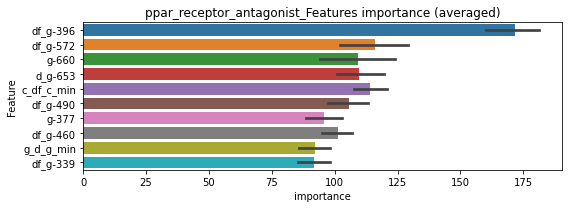

len(train_index) : 2853
len(valid_index) : 951
================================= fold 1/4 ppar_receptor_antagonist=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[917]	training's binary_logloss: 0.000370199	valid_1's binary_logloss: 0.00408442


len(train_index) : 2853
len(valid_index) : 951
================================= fold 2/4 ppar_receptor_antagonist=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[745]	training's binary_logloss: 0.000405706	valid_1's binary_logloss: 0.00351619


len(train_index) : 2853
len(valid_index) : 951
================================= fold 3/4 ppar_receptor_antagonist=================================


Training until validation scores don't improve for 30 rounds


len(train_index) : 2853
len(valid_index) : 951


Early stopping, best iteration is:
[688]	training's binary_logloss: 0.000424637	valid_1's binary_logloss: 0.00542024


================================= fold 4/4 ppar_receptor_antagonist=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[861]	training's binary_logloss: 0.000379779	valid_1's binary_logloss: 0.00550605


ppar_receptor_antagonist logloss: 0.004631723512463261


neg labels: 3289 → selected neg labels: 3270


progesterone_receptor_agonist, len(trt): 119, len(othr): 3270
target_rate: 0.0049971 → Adj_target_rate: 0.0048799
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00818171	valid_1's binary_logloss: 0.126664
Early stopping, best iteration is:
[306]	training's binary_logloss: 0.00772165	valid_1's binary_logloss: 0.126129
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00893708	valid_1's binary_logloss: 0.0693193
Early stopping, best iteration is:
[520]	training's binary_logloss: 0.00194178	valid_1's binary_logloss: 0.0573552
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0096267	valid_1's binary_logloss: 0.0642077
[600]	training's binary_logloss: 0.00146897	valid_1's binary_logloss: 0.0514528
Early stopping, best iteration is:
[587]	training's binary_logloss: 0.00153941	valid_1's binary_logloss: 0.0512908
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.008329	valid_1's binary_logloss: 0.0756664
Early stopping, 

1 / 3 AUC score:0.994
y_Threshold: 0.0182093, Threshold: 0.1538991, pos_neg_ratio: 0.8000000
Remove_noisy_data: 171 → Positive_corect_labels: 634/3753
p_label_rate: 0.0100452 Vs.target_rate: 0.00500
Num_p_label: 40.0, conf_0:0.10773, conf_1:0.20007
Num_p_label: 40.0, Expected: 19.9, Adj_threshold_1: 0.1538991
Num_p_label: 34.0, Expected: 19.9, Adj_threshold_2: 0.1938991
Num_p_label: 31.0, Expected: 19.9, Adj_threshold_3: 0.2338991
Num_p_label: 24.0, Expected: 19.9, Adj_threshold_4: 0.2738991
threshold: 0.2738991, positive_p_label: 24.0/3982, p_label_rate: 0.0060271
positive_y_label: 634.0/3753, y_label_rate: 0.1689315
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00671091	valid_1's binary_logloss: 0.0688789
Early stopping, best iteration is:
[444]	training's binary_logloss: 0.00225704	valid_1's binary_logloss: 0.0628339
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00718252	valid_1's binary_logloss: 0.0800683
Early stopping, best iteration is:
[375]	training's binary_logloss: 0.00376278	valid_1's binary_logloss: 0.076218
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00729143	valid_1's binary_logloss: 0.0726047
Early stopping, best iteration is:
[474]	training's binary_logloss: 0.00204536	valid_1's binary_logloss: 0.0674412
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00746249	valid_1's binary_logloss: 0.0549716
[600]	training's binary_logloss: 0.00125164	valid_1's binary_logloss: 0.0436859
Early stoppi

2 / 3 AUC score:0.998
y_Threshold: 0.0468201, Threshold: 0.2738991, pos_neg_ratio: 0.8000000
Remove_noisy_data: 40 → Positive_corect_labels: 614.0/3713
p_label_rate: 0.0185836 Vs.target_rate: 0.00500
Num_p_label: 74.0, conf_0:0.21912, conf_1:0.32868
Num_p_label: 74.0, Expected: 19.9, Adj_threshold_1: 0.2738991
Num_p_label: 66.0, Expected: 19.9, Adj_threshold_2: 0.3138991
Num_p_label: 58.0, Expected: 19.9, Adj_threshold_3: 0.3538991
Num_p_label: 52.0, Expected: 19.9, Adj_threshold_4: 0.3938991
Num_p_label: 46.0, Expected: 19.9, Adj_threshold_5: 0.4338991
Num_p_label: 40.0, Expected: 19.9, Adj_threshold_6: 0.4738991
Num_p_label: 34.0, Expected: 19.9, Adj_threshold_7: 0.5138991
Num_p_label: 29.0, Expected: 19.9, Adj_threshold_8: 0.5538991
threshold: 0.5538991, positive_p_label: 29.0/3982, p_label_rate: 0.0072828
positive_y_label: 614.0/3713, y_label_rate: 0.1653649
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00596245	valid_1's binary_logloss: 0.06416
Early stopping, best iteration is:
[444]	training's binary_logloss: 0.00204652	valid_1's binary_logloss: 0.0585699
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00604439	valid_1's binary_logloss: 0.0703955
Early stopping, best iteration is:
[543]	training's binary_logloss: 0.00131364	valid_1's binary_logloss: 0.0662922
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00621729	valid_1's binary_logloss: 0.0529402
Early stopping, best iteration is:
[565]	training's binary_logloss: 0.00123627	valid_1's binary_logloss: 0.0448405
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00642829	valid_1's binary_logloss: 0.0502553
[600]	training's binary_logloss: 0.00111916	valid_1's binary_logloss: 0.0372309
Early stoppin

3 / 3 AUC score:0.998
y_Threshold: 0.0463050, Threshold: 0.5538991, pos_neg_ratio: 0.8000000
Remove_noisy_data: 18 → Positive_corect_labels: 605.0/3695
p_label_rate: 0.0105475 Vs.target_rate: 0.00500
Num_p_label: 42.0, conf_0:0.49851, conf_1:0.60929
Num_p_label: 42.0, Expected: 19.9, Adj_threshold_1: 0.5538991
Num_p_label: 37.0, Expected: 19.9, Adj_threshold_2: 0.5938991
Num_p_label: 28.0, Expected: 19.9, Adj_threshold_3: 0.6338991
threshold: 0.6338991, positive_p_label: 28.0/3982, p_label_rate: 0.0070316
positive_y_label: 605.0/3695, y_label_rate: 0.1637348


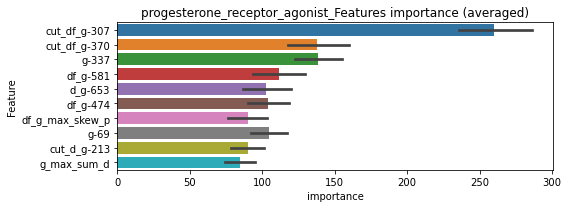

len(train_index) : 2771
len(valid_index) : 924
================================= fold 1/4 progesterone_receptor_agonist=================================


Training until validation scores don't improve for 30 rounds


len(train_index) : 2771
len(valid_index) : 924
================================= fold 2/4 progesterone_receptor_agonist=================================


Early stopping, best iteration is:
[464]	training's binary_logloss: 0.00137571	valid_1's binary_logloss: 0.0364661
Training until validation scores don't improve for 30 rounds


len(train_index) : 2771
len(valid_index) : 924
================================= fold 3/4 progesterone_receptor_agonist=================================


Early stopping, best iteration is:
[366]	training's binary_logloss: 0.00185837	valid_1's binary_logloss: 0.0446978
Training until validation scores don't improve for 30 rounds


len(train_index) : 2772
len(valid_index) : 923
================================= fold 4/4 progesterone_receptor_agonist=================================


Early stopping, best iteration is:
[407]	training's binary_logloss: 0.00157918	valid_1's binary_logloss: 0.0573294
Training until validation scores don't improve for 30 rounds


progesterone_receptor_agonist logloss: 0.047386112775809605
progesterone_receptor_agonist clipping


Early stopping, best iteration is:
[447]	training's binary_logloss: 0.00140937	valid_1's binary_logloss: 0.0510551
neg labels: 3289 → selected neg labels: 3287


progesterone_receptor_antagonist, len(trt): 18, len(othr): 3287
target_rate: 0.0007559 → Adj_target_rate: 0.0009799
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.000848239	valid_1's binary_logloss: 0.00241999
Early stopping, best iteration is:
[547]	training's binary_logloss: 0.000281095	valid_1's binary_logloss: 0.00109506
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.000851062	valid_1's binary_logloss: 0.00214463
Early stopping, best iteration is:
[553]	training's binary_logloss: 0.000282046	valid_1's binary_logloss: 0.000967158
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.000878089	valid_1's binary_logloss: 0.00169577
[600]	training's binary_logloss: 0.000282408	valid_1's binary_logloss: 0.000713125
Early stopping, best iteration is:
[580]	training's binary_logloss: 0.000282456	valid_1's binary_logloss: 0.000713097
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.000843678	valid_1's binary_logloss: 0.0

1 / 3 AUC score:1.000
y_Threshold: 0.0018187, Threshold: 0.0084426, pos_neg_ratio: 0.8000000
Remove_noisy_data: 132 → Positive_corect_labels: 657/3812
p_label_rate: 0.0100452 Vs.target_rate: 0.00076
Num_p_label: 40.0, conf_0:0.00591, conf_1:0.01098
Num_p_label: 40.0, Expected: 3.0, Adj_threshold_1: 0.0084426
Num_p_label: 3.0, Expected: 3.0, Adj_threshold_2: 0.0484426


Early stopping, best iteration is:
[523]	training's binary_logloss: 0.000284801	valid_1's binary_logloss: 0.0026498


threshold: 0.0484426, positive_p_label: 3.0/3982, p_label_rate: 0.0007534
positive_y_label: 657.0/3812, y_label_rate: 0.1723505
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.000798875	valid_1's binary_logloss: 0.00150061
Early stopping, best iteration is:
[504]	training's binary_logloss: 0.000274355	valid_1's binary_logloss: 0.000635209
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.000782401	valid_1's binary_logloss: 0.002197
Early stopping, best iteration is:
[522]	training's binary_logloss: 0.000270384	valid_1's binary_logloss: 0.00101814
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.000808729	valid_1's binary_logloss: 0.00152564
Early stopping, best iteration is:
[514]	training's binary_logloss: 0.000274935	valid_1's binary_logloss: 0.000631976
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.000766855	valid_1's binary_logloss: 0.00464168


2 / 3 AUC score:1.000
y_Threshold: 0.0612711, Threshold: 0.0484426, pos_neg_ratio: 0.8000000
Remove_noisy_data: 0 → Positive_corect_labels: 657.0/3812
p_label_rate: 0.0050226 Vs.target_rate: 0.00076
Num_p_label: 20.0, conf_0:0.03875, conf_1:0.05813
Num_p_label: 20.0, Expected: 3.0, Adj_threshold_1: 0.0484426
Num_p_label: 10.0, Expected: 3.0, Adj_threshold_2: 0.0884426


Early stopping, best iteration is:
[507]	training's binary_logloss: 0.000268575	valid_1's binary_logloss: 0.00320641


Num_p_label: 5.0, Expected: 3.0, Adj_threshold_3: 0.1284426
threshold: 0.1284426, positive_p_label: 5.0/3982, p_label_rate: 0.0012557
positive_y_label: 657.0/3812, y_label_rate: 0.1723505
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.000798875	valid_1's binary_logloss: 0.00150061
Early stopping, best iteration is:
[521]	training's binary_logloss: 0.000274355	valid_1's binary_logloss: 0.000635209
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.000782401	valid_1's binary_logloss: 0.002197
Early stopping, best iteration is:
[522]	training's binary_logloss: 0.000270384	valid_1's binary_logloss: 0.00101814
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.000808729	valid_1's binary_logloss: 0.00152564
Early stopping, best iteration is:
[514]	training's binary_logloss: 0.000274935	valid_1's binary_logloss: 0.000631976
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.000766855	valid_1's binary_logloss: 0.00464168


3 / 3 AUC score:1.000
y_Threshold: 0.0612711, Threshold: 0.1284426, pos_neg_ratio: 0.8000000
Remove_noisy_data: 0 → Positive_corect_labels: 657.0/3812
p_label_rate: 0.0012557 Vs.target_rate: 0.00076
Num_p_label: 5.0, conf_0:0.11560, conf_1:0.14129
Num_p_label: 5.0, Expected: 3.0, Adj_threshold_1: 0.1284426


Early stopping, best iteration is:
[507]	training's binary_logloss: 0.000268575	valid_1's binary_logloss: 0.00320641


threshold: 0.1284426, positive_p_label: 5.0/3982, p_label_rate: 0.0012557
positive_y_label: 657.0/3812, y_label_rate: 0.1723505


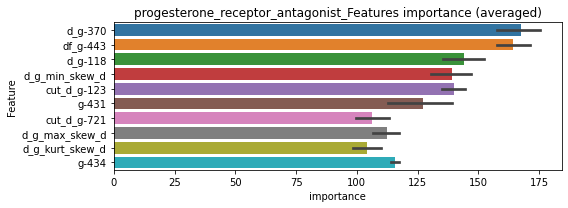

len(train_index) : 2859
len(valid_index) : 953
================================= fold 1/4 progesterone_receptor_antagonist=================================


Training until validation scores don't improve for 30 rounds


len(train_index) : 2859
len(valid_index) : 953
================================= fold 2/4 progesterone_receptor_antagonist=================================


Early stopping, best iteration is:
[777]	training's binary_logloss: 0.000276096	valid_1's binary_logloss: 0.00064894
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[838]	training's binary_logloss: 0.000273529	valid_1's binary_logloss: 0.000620296


len(train_index) : 2859
len(valid_index) : 953
================================= fold 3/4 progesterone_receptor_antagonist=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[801]	training's binary_logloss: 0.000278039	valid_1's binary_logloss: 0.000619233


len(train_index) : 2859
len(valid_index) : 953
================================= fold 4/4 progesterone_receptor_antagonist=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[842]	training's binary_logloss: 0.000268263	valid_1's binary_logloss: 0.00230796


progesterone_receptor_antagonist logloss: 0.001049735360940184


neg labels: 3289 → selected neg labels: 3286


prostaglandin_inhibitor, len(trt): 36, len(othr): 3286
target_rate: 0.0015117 → Adj_target_rate: 0.0017663
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00190468	valid_1's binary_logloss: 0.00988005
[600]	training's binary_logloss: 0.000425426	valid_1's binary_logloss: 0.00639136
Early stopping, best iteration is:
[583]	training's binary_logloss: 0.000434251	valid_1's binary_logloss: 0.00635194
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00179834	valid_1's binary_logloss: 0.0156791
[600]	training's binary_logloss: 0.000411069	valid_1's binary_logloss: 0.0122638
Early stopping, best iteration is:
[590]	training's binary_logloss: 0.000416404	valid_1's binary_logloss: 0.0122383
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00189549	valid_1's binary_logloss: 0.0207862
Early stopping, best iteration is:
[400]	training's binary_logloss: 0.000874654	valid_1's binary_logloss: 0.0198396
Training until validation scores don't improve for 30 rounds
[30

1 / 3 AUC score:1.000
y_Threshold: 0.0031184, Threshold: 0.0153214, pos_neg_ratio: 0.8000000
Remove_noisy_data: 134 → Positive_corect_labels: 656/3809
p_label_rate: 0.0100452 Vs.target_rate: 0.00151
Num_p_label: 40.0, conf_0:0.01072, conf_1:0.01992
Num_p_label: 40.0, Expected: 6.0, Adj_threshold_1: 0.0153214
Num_p_label: 16.0, Expected: 6.0, Adj_threshold_2: 0.0553214
Num_p_label: 15.0, Expected: 6.0, Adj_threshold_3: 0.0953214
threshold: 0.0953214, positive_p_label: 15.0/3982, p_label_rate: 0.0037670
positive_y_label: 656.0/3809, y_label_rate: 0.1722237
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00168336	valid_1's binary_logloss: 0.0164082
Early stopping, best iteration is:
[543]	training's binary_logloss: 0.000443024	valid_1's binary_logloss: 0.0138785
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00182723	valid_1's binary_logloss: 0.0045659
[600]	training's binary_logloss: 0.00041352	valid_1's binary_logloss: 0.00167613
Early stopping, best iteration is:
[627]	training's binary_logloss: 0.000402461	valid_1's binary_logloss: 0.00164064
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.001856	valid_1's binary_logloss: 0.00549829
[600]	training's binary_logloss: 0.000419213	valid_1's binary_logloss: 0.00271023
Early stopping, best iteration is:
[658]	training's binary_logloss: 0.000397276	valid_1's binary_logloss: 0.00265941
Training until validation scores don't improve for 30 rounds
[300

2 / 3 AUC score:1.000
y_Threshold: 0.0193765, Threshold: 0.0953214, pos_neg_ratio: 0.8000000
Remove_noisy_data: 2 → Positive_corect_labels: 655.0/3807
p_label_rate: 0.0057760 Vs.target_rate: 0.00151
Num_p_label: 23.0, conf_0:0.07626, conf_1:0.11439
Num_p_label: 23.0, Expected: 6.0, Adj_threshold_1: 0.0953214
Num_p_label: 16.0, Expected: 6.0, Adj_threshold_2: 0.1353214
Num_p_label: 12.0, Expected: 6.0, Adj_threshold_3: 0.1753214
threshold: 0.1753214, positive_p_label: 12.0/3982, p_label_rate: 0.0030136
positive_y_label: 655.0/3807, y_label_rate: 0.1720515
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00178491	valid_1's binary_logloss: 0.00853986
[600]	training's binary_logloss: 0.000408066	valid_1's binary_logloss: 0.00604129
Early stopping, best iteration is:
[571]	training's binary_logloss: 0.000427664	valid_1's binary_logloss: 0.00601995
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00183364	valid_1's binary_logloss: 0.00652527
[600]	training's binary_logloss: 0.000410353	valid_1's binary_logloss: 0.00334924
Early stopping, best iteration is:
[602]	training's binary_logloss: 0.00040892	valid_1's binary_logloss: 0.003345
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00174087	valid_1's binary_logloss: 0.0187144
Early stopping, best iteration is:
[552]	training's binary_logloss: 0.000439741	valid_1's binary_logloss: 0.0170473
Training until validation scores don't improve for 30 rounds
[30

3 / 3 AUC score:1.000
y_Threshold: 0.0145944, Threshold: 0.1753214, pos_neg_ratio: 0.8000000


Early stopping, best iteration is:
[530]	training's binary_logloss: 0.000464277	valid_1's binary_logloss: 0.00798598


Remove_noisy_data: 4 → Positive_corect_labels: 653.0/3803
p_label_rate: 0.0035158 Vs.target_rate: 0.00151
Num_p_label: 14.0, conf_0:0.15779, conf_1:0.19285
Num_p_label: 14.0, Expected: 6.0, Adj_threshold_1: 0.1753214
threshold: 0.1753214, positive_p_label: 14.0/3982, p_label_rate: 0.0035158
positive_y_label: 653.0/3803, y_label_rate: 0.1717065


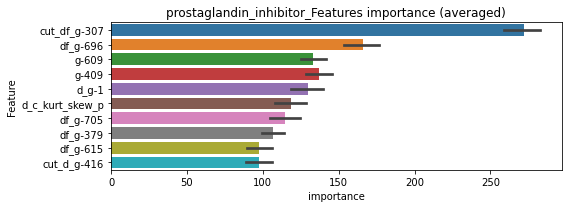

len(train_index) : 2852
len(valid_index) : 951
================================= fold 1/4 prostaglandin_inhibitor=================================


Training until validation scores don't improve for 30 rounds


len(train_index) : 2852
len(valid_index) : 951
================================= fold 2/4 prostaglandin_inhibitor=================================


Early stopping, best iteration is:
[501]	training's binary_logloss: 0.000584371	valid_1's binary_logloss: 0.00401907
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[906]	training's binary_logloss: 0.000399601	valid_1's binary_logloss: 0.00377854


len(train_index) : 2852
len(valid_index) : 951
================================= fold 3/4 prostaglandin_inhibitor=================================


Training until validation scores don't improve for 30 rounds


len(train_index) : 2853
len(valid_index) : 950
================================= fold 4/4 prostaglandin_inhibitor=================================


Early stopping, best iteration is:
[312]	training's binary_logloss: 0.000948238	valid_1's binary_logloss: 0.012257
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[899]	training's binary_logloss: 0.000404747	valid_1's binary_logloss: 0.00229393


prostaglandin_inhibitor logloss: 0.005588827510900595


neg labels: 3289 → selected neg labels: 3280


prostanoid_receptor_antagonist, len(trt): 84, len(othr): 3280
target_rate: 0.0035273 → Adj_target_rate: 0.0036294
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00596524	valid_1's binary_logloss: 0.066727
Early stopping, best iteration is:
[444]	training's binary_logloss: 0.00185039	valid_1's binary_logloss: 0.061092
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00638886	valid_1's binary_logloss: 0.0414441
[600]	training's binary_logloss: 0.00100922	valid_1's binary_logloss: 0.0324021
Early stopping, best iteration is:
[596]	training's binary_logloss: 0.00102082	valid_1's binary_logloss: 0.0323343
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00652411	valid_1's binary_logloss: 0.0373112
Early stopping, best iteration is:
[552]	training's binary_logloss: 0.00122446	valid_1's binary_logloss: 0.0301065
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00612764	valid_1's binary_logloss: 0.0490177
[600]	trainin

1 / 3 AUC score:0.997
y_Threshold: 0.0093532, Threshold: 0.0614128, pos_neg_ratio: 0.8000000
Remove_noisy_data: 142 → Positive_corect_labels: 651/3794
p_label_rate: 0.0100452 Vs.target_rate: 0.00353
Num_p_label: 40.0, conf_0:0.04299, conf_1:0.07984
Num_p_label: 40.0, Expected: 14.0, Adj_threshold_1: 0.0614128
Num_p_label: 27.0, Expected: 14.0, Adj_threshold_2: 0.1014128
Num_p_label: 20.0, Expected: 14.0, Adj_threshold_3: 0.1414128
threshold: 0.1414128, positive_p_label: 20.0/3982, p_label_rate: 0.0050226
positive_y_label: 651.0/3794, y_label_rate: 0.1715867
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00514006	valid_1's binary_logloss: 0.051102
[600]	training's binary_logloss: 0.000890733	valid_1's binary_logloss: 0.0437704
Early stopping, best iteration is:
[688]	training's binary_logloss: 0.000719952	valid_1's binary_logloss: 0.0429991
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00550334	valid_1's binary_logloss: 0.0443988
Early stopping, best iteration is:
[525]	training's binary_logloss: 0.00119683	valid_1's binary_logloss: 0.036541
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00551099	valid_1's binary_logloss: 0.0397805
Early stopping, best iteration is:
[491]	training's binary_logloss: 0.00140083	valid_1's binary_logloss: 0.0334253
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00556386	valid_1's binary_logloss: 0.0307101
[600]	train

2 / 3 AUC score:1.000
y_Threshold: 0.0274666, Threshold: 0.1414128, pos_neg_ratio: 0.8000000
Remove_noisy_data: 14 → Positive_corect_labels: 644.0/3780
p_label_rate: 0.0130588 Vs.target_rate: 0.00353
Num_p_label: 52.0, conf_0:0.11313, conf_1:0.16970
Num_p_label: 52.0, Expected: 14.0, Adj_threshold_1: 0.1414128
Num_p_label: 47.0, Expected: 14.0, Adj_threshold_2: 0.1814128
Num_p_label: 44.0, Expected: 14.0, Adj_threshold_3: 0.2214128
Num_p_label: 41.0, Expected: 14.0, Adj_threshold_4: 0.2614128
Num_p_label: 37.0, Expected: 14.0, Adj_threshold_5: 0.3014128
Num_p_label: 36.0, Expected: 14.0, Adj_threshold_6: 0.3414128
Num_p_label: 35.0, Expected: 14.0, Adj_threshold_7: 0.3814128
Num_p_label: 32.0, Expected: 14.0, Adj_threshold_8: 0.4214128
Num_p_label: 30.0, Expected: 14.0, Adj_threshold_9: 0.4614128
Num_p_label: 29.0, Expected: 14.0, Adj_threshold_10: 0.5014128
threshold: 0.5414128, positive_p_label: 24.0/3982, p_label_rate: 0.0060271
positive_y_label: 644.0/3780, y_label_rate: 0.1703704


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00480223	valid_1's binary_logloss: 0.0490278
[600]	training's binary_logloss: 0.00085482	valid_1's binary_logloss: 0.0391958
Early stopping, best iteration is:
[596]	training's binary_logloss: 0.000865113	valid_1's binary_logloss: 0.038981
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00509544	valid_1's binary_logloss: 0.0348321
[600]	training's binary_logloss: 0.000873521	valid_1's binary_logloss: 0.0249152
Early stopping, best iteration is:
[596]	training's binary_logloss: 0.00088566	valid_1's binary_logloss: 0.0248296
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00517531	valid_1's binary_logloss: 0.0430278
Early stopping, best iteration is:
[559]	training's binary_logloss: 0.00101052	valid_1's binary_logloss: 0.0359204
Training until validation scores don't improve for 30 rounds
[300]	trai

3 / 3 AUC score:0.999
y_Threshold: 0.0317445, Threshold: 0.5414128, pos_neg_ratio: 0.8000000
Remove_noisy_data: 12 → Positive_corect_labels: 638.0/3768
p_label_rate: 0.0062783 Vs.target_rate: 0.00353
Num_p_label: 25.0, conf_0:0.48727, conf_1:0.59555
Num_p_label: 25.0, Expected: 14.0, Adj_threshold_1: 0.5414128
Num_p_label: 23.0, Expected: 14.0, Adj_threshold_2: 0.5814128
Num_p_label: 22.0, Expected: 14.0, Adj_threshold_3: 0.6214128
Num_p_label: 19.0, Expected: 14.0, Adj_threshold_4: 0.6614128
threshold: 0.6614128, positive_p_label: 19.0/3982, p_label_rate: 0.0047715
positive_y_label: 638.0/3768, y_label_rate: 0.1693206


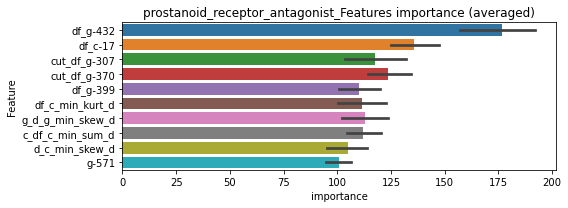

len(train_index) : 2826
len(valid_index) : 942
================================= fold 1/4 prostanoid_receptor_antagonist=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[745]	training's binary_logloss: 0.000737903	valid_1's binary_logloss: 0.0169502


len(train_index) : 2826
len(valid_index) : 942
================================= fold 2/4 prostanoid_receptor_antagonist=================================


Training until validation scores don't improve for 30 rounds


len(train_index) : 2826
len(valid_index) : 942
================================= fold 3/4 prostanoid_receptor_antagonist=================================


Early stopping, best iteration is:
[507]	training's binary_logloss: 0.00104204	valid_1's binary_logloss: 0.02547
Training until validation scores don't improve for 30 rounds


len(train_index) : 2826
len(valid_index) : 942
================================= fold 4/4 prostanoid_receptor_antagonist=================================


Early stopping, best iteration is:
[410]	training's binary_logloss: 0.00132087	valid_1's binary_logloss: 0.0339385
Training until validation scores don't improve for 30 rounds


prostanoid_receptor_antagonist logloss: 0.02922108367108901
prostanoid_receptor_antagonist clipping


Early stopping, best iteration is:
[344]	training's binary_logloss: 0.00160945	valid_1's binary_logloss: 0.0405256
neg labels: 3289 → selected neg labels: 3197


proteasome_inhibitor, len(trt): 726, len(othr): 3197
target_rate: 0.0304863 → Adj_target_rate: 0.0226983
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[64]	training's binary_logloss: 0.316989	valid_1's binary_logloss: 0.474562
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[41]	training's binary_logloss: 0.37066	valid_1's binary_logloss: 0.470164
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[20]	training's binary_logloss: 0.415357	valid_1's binary_logloss: 0.474018
Training until validation scores don't improve for 30 rounds


1 / 3 AUC score:0.550
y_Threshold: 0.1968851, Threshold: 0.4379305, pos_neg_ratio: 0.7729121
Remove_noisy_data: 1191 → Positive_corect_labels: 213/2732
p_label_rate: 0.0100452 Vs.target_rate: 0.03049
Num_p_label: 40.0, conf_0:0.30655, conf_1:0.56931
Num_p_label: 40.0, Expected: 121.4, Adj_threshold_1: 0.4379305
Num_p_label: 68.0, Expected: 121.4, Adj_threshold_2: 0.4079305
Num_p_label: 105.0, Expected: 121.4, Adj_threshold_3: 0.3779305
Num_p_label: 133.0, Expected: 121.4, Adj_threshold_4: 0.3479305
Num_p_label: 141.0, Expected: 121.4, Adj_threshold_5: 0.3179305
Num_p_label: 152.0, Expected: 121.4, Adj_threshold_6: 0.2879305
Num_p_label: 173.0, Expected: 121.4, Adj_threshold_7: 0.2579305
Num_p_label: 298.0, Expected: 121.4, Adj_threshold_8: 0.2279305
threshold: 0.2279305, positive_p_label: 298.0/3982, p_label_rate: 0.0748368


Early stopping, best iteration is:
[10]	training's binary_logloss: 0.449662	valid_1's binary_logloss: 0.476955


positive_y_label: 213.0/2732, y_label_rate: 0.0779649
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[52]	training's binary_logloss: 0.101469	valid_1's binary_logloss: 0.24041
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[67]	training's binary_logloss: 0.0832475	valid_1's binary_logloss: 0.224662
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[69]	training's binary_logloss: 0.0791653	valid_1's binary_logloss: 0.221871
Training until validation scores don't improve for 30 rounds


2 / 3 AUC score:0.809
y_Threshold: 0.1178249, Threshold: 0.2279305, pos_neg_ratio: 0.7729121
Remove_noisy_data: 248 → Positive_corect_labels: 89.0/2484
p_label_rate: 0.0878955 Vs.target_rate: 0.03049
Num_p_label: 350.0, conf_0:0.18234, conf_1:0.27352
Num_p_label: 350.0, Expected: 121.4, Adj_threshold_1: 0.2279305
Num_p_label: 302.0, Expected: 121.4, Adj_threshold_2: 0.2679305
Num_p_label: 262.0, Expected: 121.4, Adj_threshold_3: 0.3079305
Num_p_label: 236.0, Expected: 121.4, Adj_threshold_4: 0.3479305
Num_p_label: 216.0, Expected: 121.4, Adj_threshold_5: 0.3879305
Num_p_label: 199.0, Expected: 121.4, Adj_threshold_6: 0.4279305
Num_p_label: 184.0, Expected: 121.4, Adj_threshold_7: 0.4679305
Num_p_label: 172.0, Expected: 121.4, Adj_threshold_8: 0.5079305
Num_p_label: 159.0, Expected: 121.4, Adj_threshold_9: 0.5479305
Num_p_label: 146.0, Expected: 121.4, Adj_threshold_10: 0.5879305
threshold: 0.6279305, positive_p_label: 141.0/3982, p_label_rate: 0.0354093


Early stopping, best iteration is:
[87]	training's binary_logloss: 0.0655459	valid_1's binary_logloss: 0.185743


positive_y_label: 89.0/2484, y_label_rate: 0.0358293
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[126]	training's binary_logloss: 0.00622032	valid_1's binary_logloss: 0.0392559
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[121]	training's binary_logloss: 0.00726895	valid_1's binary_logloss: 0.0422242
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[111]	training's binary_logloss: 0.00873397	valid_1's binary_logloss: 0.0450466
Training until validation scores don't improve for 30 rounds


3 / 3 AUC score:0.988
y_Threshold: 0.1175086, Threshold: 0.6279305, pos_neg_ratio: 0.7729121
Remove_noisy_data: 38 → Positive_corect_labels: 70.0/2446
p_label_rate: 0.0740834 Vs.target_rate: 0.03049
Num_p_label: 295.0, conf_0:0.50000, conf_1:0.69072
Num_p_label: 295.0, Expected: 121.4, Adj_threshold_1: 0.6279305
Num_p_label: 284.0, Expected: 121.4, Adj_threshold_2: 0.6679305
Num_p_label: 275.0, Expected: 121.4, Adj_threshold_3: 0.7079305
Num_p_label: 252.0, Expected: 121.4, Adj_threshold_4: 0.7479305
Num_p_label: 234.0, Expected: 121.4, Adj_threshold_5: 0.7879305
Num_p_label: 220.0, Expected: 121.4, Adj_threshold_6: 0.8279305
Num_p_label: 209.0, Expected: 121.4, Adj_threshold_7: 0.8679305
threshold: 0.8679305, positive_p_label: 209.0/3982, p_label_rate: 0.0524862


Early stopping, best iteration is:
[127]	training's binary_logloss: 0.00604846	valid_1's binary_logloss: 0.0531427


positive_y_label: 70.0/2446, y_label_rate: 0.0286182


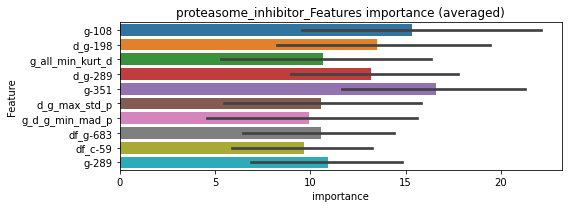

len(train_index) : 1834
len(valid_index) : 612
================================= fold 1/4 proteasome_inhibitor=================================


Training until validation scores don't improve for 30 rounds


len(train_index) : 1834
len(valid_index) : 612
================================= fold 2/4 proteasome_inhibitor=================================


Early stopping, best iteration is:
[114]	training's binary_logloss: 0.00157299	valid_1's binary_logloss: 0.0135361
Training until validation scores don't improve for 30 rounds


len(train_index) : 1835
len(valid_index) : 611
================================= fold 3/4 proteasome_inhibitor=================================


Early stopping, best iteration is:
[89]	training's binary_logloss: 0.0021477	valid_1's binary_logloss: 0.0219163
Training until validation scores don't improve for 30 rounds


len(train_index) : 1835
len(valid_index) : 611
================================= fold 4/4 proteasome_inhibitor=================================


Early stopping, best iteration is:
[492]	training's binary_logloss: 0.00033631	valid_1's binary_logloss: 0.00581617
Training until validation scores don't improve for 30 rounds


proteasome_inhibitor logloss: 0.014187422664208154


Early stopping, best iteration is:
[97]	training's binary_logloss: 0.00203475	valid_1's binary_logloss: 0.0154695
neg labels: 3289 → selected neg labels: 3285


protein_kinase_inhibitor, len(trt): 48, len(othr): 3285
target_rate: 0.0020156 → Adj_target_rate: 0.0022556
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0028489	valid_1's binary_logloss: 0.0232955
[600]	training's binary_logloss: 0.000566076	valid_1's binary_logloss: 0.0164559
Early stopping, best iteration is:
[659]	training's binary_logloss: 0.000503413	valid_1's binary_logloss: 0.0161869
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00288086	valid_1's binary_logloss: 0.0218755
Early stopping, best iteration is:
[564]	training's binary_logloss: 0.000610875	valid_1's binary_logloss: 0.017086
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00304739	valid_1's binary_logloss: 0.0094967
[600]	training's binary_logloss: 0.000586027	valid_1's binary_logloss: 0.00457518
Early stopping, best iteration is:
[716]	training's binary_logloss: 0.000494003	valid_1's binary_logloss: 0.00431906
Training until validation scores don't improve for 30 rounds
[300]	

1 / 3 AUC score:1.000
y_Threshold: 0.0042058, Threshold: 0.0092316, pos_neg_ratio: 0.8000000
Remove_noisy_data: 132 → Positive_corect_labels: 657/3810
p_label_rate: 0.0100452 Vs.target_rate: 0.00202
Num_p_label: 40.0, conf_0:0.00646, conf_1:0.01200
Num_p_label: 40.0, Expected: 8.0, Adj_threshold_1: 0.0092316
Num_p_label: 2.0, Expected: 8.0, Adj_threshold_2: 0.0492316
threshold: 0.0492316, positive_p_label: 2.0/3982, p_label_rate: 0.0005023
positive_y_label: 657.0/3810, y_label_rate: 0.1724409
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00266278	valid_1's binary_logloss: 0.021919
Early stopping, best iteration is:
[546]	training's binary_logloss: 0.000627176	valid_1's binary_logloss: 0.0162265
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00270739	valid_1's binary_logloss: 0.0216076
[600]	training's binary_logloss: 0.000547244	valid_1's binary_logloss: 0.0166671
Early stopping, best iteration is:
[605]	training's binary_logloss: 0.000540818	valid_1's binary_logloss: 0.0165596
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00280688	valid_1's binary_logloss: 0.0086939
[600]	training's binary_logloss: 0.00056693	valid_1's binary_logloss: 0.00415461
Early stopping, best iteration is:
[661]	training's binary_logloss: 0.000505092	valid_1's binary_logloss: 0.00401053
Training until validation scores don't improve for 30 rounds
[300]	

2 / 3 AUC score:1.000
y_Threshold: 0.0140890, Threshold: 0.0492316, pos_neg_ratio: 0.8000000
Remove_noisy_data: 4 → Positive_corect_labels: 655.0/3806
p_label_rate: 0.0020090 Vs.target_rate: 0.00202
Num_p_label: 8.0, conf_0:0.03939, conf_1:0.05908
threshold: 0.0492316, positive_p_label: 8.0/3982, p_label_rate: 0.0020090
positive_y_label: 655.0/3806, y_label_rate: 0.1720967
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0026814	valid_1's binary_logloss: 0.0165181
[600]	training's binary_logloss: 0.000534443	valid_1's binary_logloss: 0.0115619
Early stopping, best iteration is:
[599]	training's binary_logloss: 0.000535984	valid_1's binary_logloss: 0.0115516
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00276324	valid_1's binary_logloss: 0.0113704
[600]	training's binary_logloss: 0.000555512	valid_1's binary_logloss: 0.00622767
Early stopping, best iteration is:
[630]	training's binary_logloss: 0.000519992	valid_1's binary_logloss: 0.00617384
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00267714	valid_1's binary_logloss: 0.0180538
[600]	training's binary_logloss: 0.000541972	valid_1's binary_logloss: 0.0127804
Early stopping, best iteration is:
[572]	training's binary_logloss: 0.000580801	valid_1's binary_logl

3 / 3 AUC score:1.000
y_Threshold: 0.0155722, Threshold: 0.0492316, pos_neg_ratio: 0.8000000
Remove_noisy_data: 0 → Positive_corect_labels: 655.0/3806
p_label_rate: 0.0022602 Vs.target_rate: 0.00202
Num_p_label: 9.0, conf_0:0.04431, conf_1:0.05415
threshold: 0.0492316, positive_p_label: 9.0/3982, p_label_rate: 0.0022602
positive_y_label: 655.0/3806, y_label_rate: 0.1720967


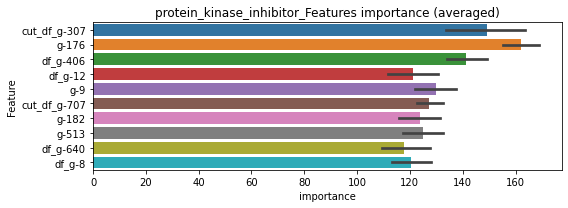

len(train_index) : 2854
len(valid_index) : 952
================================= fold 1/4 protein_kinase_inhibitor=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[736]	training's binary_logloss: 0.000534686	valid_1's binary_logloss: 0.0125753


len(train_index) : 2854
len(valid_index) : 952
================================= fold 2/4 protein_kinase_inhibitor=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[850]	training's binary_logloss: 0.000507742	valid_1's binary_logloss: 0.00617159


len(train_index) : 2855
len(valid_index) : 951
================================= fold 3/4 protein_kinase_inhibitor=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[908]	training's binary_logloss: 0.000487769	valid_1's binary_logloss: 0.0118146


len(train_index) : 2855
len(valid_index) : 951
================================= fold 4/4 protein_kinase_inhibitor=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[957]	training's binary_logloss: 0.000484215	valid_1's binary_logloss: 0.00566567


protein_kinase_inhibitor logloss: 0.009058765986123735


neg labels: 3289 → selected neg labels: 3286


protein_phosphatase_inhibitor, len(trt): 24, len(othr): 3286
target_rate: 0.0010078 → Adj_target_rate: 0.0012513
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0011744	valid_1's binary_logloss: 0.00622751
[600]	training's binary_logloss: 0.000336924	valid_1's binary_logloss: 0.00432343
Early stopping, best iteration is:
[588]	training's binary_logloss: 0.00033859	valid_1's binary_logloss: 0.00431216
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00115643	valid_1's binary_logloss: 0.00549514
[600]	training's binary_logloss: 0.000331572	valid_1's binary_logloss: 0.00327168
Early stopping, best iteration is:
[570]	training's binary_logloss: 0.000338638	valid_1's binary_logloss: 0.0032649
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00120568	valid_1's binary_logloss: 0.0023289
[600]	training's binary_logloss: 0.000337393	valid_1's binary_logloss: 0.000887181
Early stopping, best iteration is:
[592]	training's binary_logloss: 0.000337393	valid_1's binary_

1 / 3 AUC score:1.000


[600]	training's binary_logloss: 0.000338175	valid_1's binary_logloss: 0.0020482
Early stopping, best iteration is:
[588]	training's binary_logloss: 0.000338175	valid_1's binary_logloss: 0.0020482


y_Threshold: 0.0017208, Threshold: 0.0047557, pos_neg_ratio: 0.8000000
Remove_noisy_data: 132 → Positive_corect_labels: 657/3811
p_label_rate: 0.0100452 Vs.target_rate: 0.00101
Num_p_label: 40.0, conf_0:0.00333, conf_1:0.00618
Num_p_label: 40.0, Expected: 4.0, Adj_threshold_1: 0.0047557
Num_p_label: 2.0, Expected: 4.0, Adj_threshold_2: 0.0447557
threshold: 0.0447557, positive_p_label: 2.0/3982, p_label_rate: 0.0005023
positive_y_label: 657.0/3811, y_label_rate: 0.1723957
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00110998	valid_1's binary_logloss: 0.00541581
[600]	training's binary_logloss: 0.000325002	valid_1's binary_logloss: 0.00384
Early stopping, best iteration is:
[588]	training's binary_logloss: 0.000326321	valid_1's binary_logloss: 0.00383474
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00108415	valid_1's binary_logloss: 0.00533059
[600]	training's binary_logloss: 0.000321887	valid_1's binary_logloss: 0.0032991
Early stopping, best iteration is:
[582]	training's binary_logloss: 0.000323462	valid_1's binary_logloss: 0.00329346
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00114281	valid_1's binary_logloss: 0.00251006
[600]	training's binary_logloss: 0.000325841	valid_1's binary_logloss: 0.000991227
Early stopping, best iteration is:
[600]	training's binary_logloss: 0.000325841	valid_1's binary_

2 / 3 AUC score:1.000
y_Threshold: 0.0516116, Threshold: 0.0447557, pos_neg_ratio: 0.8000000
Remove_noisy_data: 0 → Positive_corect_labels: 657.0/3811
p_label_rate: 0.0025113 Vs.target_rate: 0.00101
Num_p_label: 10.0, conf_0:0.03580, conf_1:0.05371
Num_p_label: 10.0, Expected: 4.0, Adj_threshold_1: 0.0447557
threshold: 0.0447557, positive_p_label: 10.0/3982, p_label_rate: 0.0025113
positive_y_label: 657.0/3811, y_label_rate: 0.1723957
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00110998	valid_1's binary_logloss: 0.00541581
[600]	training's binary_logloss: 0.000325002	valid_1's binary_logloss: 0.00384
Early stopping, best iteration is:
[588]	training's binary_logloss: 0.000326321	valid_1's binary_logloss: 0.00383474
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00108415	valid_1's binary_logloss: 0.00533059
[600]	training's binary_logloss: 0.000321887	valid_1's binary_logloss: 0.0032991
Early stopping, best iteration is:
[582]	training's binary_logloss: 0.000323462	valid_1's binary_logloss: 0.00329346
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00114281	valid_1's binary_logloss: 0.00251006
[600]	training's binary_logloss: 0.000325841	valid_1's binary_logloss: 0.000991227
Early stopping, best iteration is:
[594]	training's binary_logloss: 0.000325841	valid_1's binary_

3 / 3 AUC score:1.000
y_Threshold: 0.0516116, Threshold: 0.0447557, pos_neg_ratio: 0.8000000


[600]	training's binary_logloss: 0.000331067	valid_1's binary_logloss: 0.00269146
Early stopping, best iteration is:
[593]	training's binary_logloss: 0.000331772	valid_1's binary_logloss: 0.00269016


Remove_noisy_data: 0 → Positive_corect_labels: 657.0/3811
p_label_rate: 0.0025113 Vs.target_rate: 0.00101
Num_p_label: 10.0, conf_0:0.04028, conf_1:0.04923
Num_p_label: 10.0, Expected: 4.0, Adj_threshold_1: 0.0447557
threshold: 0.0447557, positive_p_label: 10.0/3982, p_label_rate: 0.0025113
positive_y_label: 657.0/3811, y_label_rate: 0.1723957


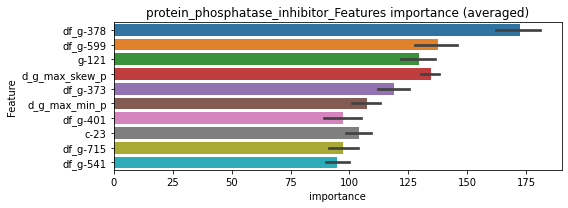

len(train_index) : 2858
len(valid_index) : 953
================================= fold 1/4 protein_phosphatase_inhibitor=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[952]	training's binary_logloss: 0.000324895	valid_1's binary_logloss: 0.00307778


len(train_index) : 2858
len(valid_index) : 953
================================= fold 2/4 protein_phosphatase_inhibitor=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[968]	training's binary_logloss: 0.000323232	valid_1's binary_logloss: 0.00201758


len(train_index) : 2858
len(valid_index) : 953
================================= fold 3/4 protein_phosphatase_inhibitor=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[873]	training's binary_logloss: 0.000335769	valid_1's binary_logloss: 0.000766493


len(train_index) : 2859
len(valid_index) : 952
================================= fold 4/4 protein_phosphatase_inhibitor=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[750]	training's binary_logloss: 0.000356341	valid_1's binary_logloss: 0.00335569


protein_phosphatase_inhibitor logloss: 0.0023045953826458026


neg labels: 3289 → selected neg labels: 3278


protein_synthesis_inhibitor, len(trt): 103, len(othr): 3278
target_rate: 0.0043252 → Adj_target_rate: 0.0043163
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00780643	valid_1's binary_logloss: 0.0707426
Early stopping, best iteration is:
[507]	training's binary_logloss: 0.00174399	valid_1's binary_logloss: 0.0622124
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00829008	valid_1's binary_logloss: 0.0656874
Early stopping, best iteration is:
[474]	training's binary_logloss: 0.00213311	valid_1's binary_logloss: 0.0546681
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0089506	valid_1's binary_logloss: 0.0568089
Early stopping, best iteration is:
[508]	training's binary_logloss: 0.00191003	valid_1's binary_logloss: 0.0479513
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00854923	valid_1's binary_logloss: 0.0638325
[600]	training's binary_logloss: 0.00126821	valid_1's binary_logloss: 0.0545223
Early stoppi

1 / 3 AUC score:0.996
y_Threshold: 0.0119146, Threshold: 0.0462972, pos_neg_ratio: 0.8000000
Remove_noisy_data: 154 → Positive_corect_labels: 644/3779
p_label_rate: 0.0100452 Vs.target_rate: 0.00433
Num_p_label: 40.0, conf_0:0.03241, conf_1:0.06019
Num_p_label: 40.0, Expected: 17.2, Adj_threshold_1: 0.0462972
Num_p_label: 23.0, Expected: 17.2, Adj_threshold_2: 0.0862972
threshold: 0.0862972, positive_p_label: 23.0/3982, p_label_rate: 0.0057760
positive_y_label: 644.0/3779, y_label_rate: 0.1704155
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00726802	valid_1's binary_logloss: 0.0534484
[600]	training's binary_logloss: 0.00114711	valid_1's binary_logloss: 0.0419471
Early stopping, best iteration is:
[611]	training's binary_logloss: 0.00110772	valid_1's binary_logloss: 0.0418093
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00697599	valid_1's binary_logloss: 0.0632922
Early stopping, best iteration is:
[488]	training's binary_logloss: 0.0017624	valid_1's binary_logloss: 0.0553725
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00824544	valid_1's binary_logloss: 0.0451527
[600]	training's binary_logloss: 0.00121616	valid_1's binary_logloss: 0.0344933
Early stopping, best iteration is:
[639]	training's binary_logloss: 0.00107388	valid_1's binary_logloss: 0.0343633
Training until validation scores don't improve for 30 rounds
[300]	traini

2 / 3 AUC score:0.998
y_Threshold: 0.0301613, Threshold: 0.0862972, pos_neg_ratio: 0.8000000


Early stopping, best iteration is:
[488]	training's binary_logloss: 0.00178982	valid_1's binary_logloss: 0.0567936


Remove_noisy_data: 22 → Positive_corect_labels: 633.0/3757
p_label_rate: 0.0072828 Vs.target_rate: 0.00433
Num_p_label: 29.0, conf_0:0.06904, conf_1:0.10356
Num_p_label: 29.0, Expected: 17.2, Adj_threshold_1: 0.0862972
Num_p_label: 24.0, Expected: 17.2, Adj_threshold_2: 0.1262972
threshold: 0.1262972, positive_p_label: 24.0/3982, p_label_rate: 0.0060271
positive_y_label: 633.0/3757, y_label_rate: 0.1684855
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00651514	valid_1's binary_logloss: 0.059839
Early stopping, best iteration is:
[445]	training's binary_logloss: 0.00204976	valid_1's binary_logloss: 0.0541943
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00659964	valid_1's binary_logloss: 0.0674281
Early stopping, best iteration is:
[453]	training's binary_logloss: 0.00199726	valid_1's binary_logloss: 0.0605805
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00662882	valid_1's binary_logloss: 0.0456564
[600]	training's binary_logloss: 0.001079	valid_1's binary_logloss: 0.0369706
Early stopping, best iteration is:
[581]	training's binary_logloss: 0.00114963	valid_1's binary_logloss: 0.0367886
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00683302	valid_1's binary_logloss: 0.0437344
[600]	training

3 / 3 AUC score:0.999
y_Threshold: 0.0283538, Threshold: 0.1262972, pos_neg_ratio: 0.8000000
Remove_noisy_data: 18 → Positive_corect_labels: 624.0/3739
p_label_rate: 0.0060271 Vs.target_rate: 0.00433
Num_p_label: 24.0, conf_0:0.11367, conf_1:0.13893
threshold: 0.1262972, positive_p_label: 24.0/3982, p_label_rate: 0.0060271
positive_y_label: 624.0/3739, y_label_rate: 0.1668895


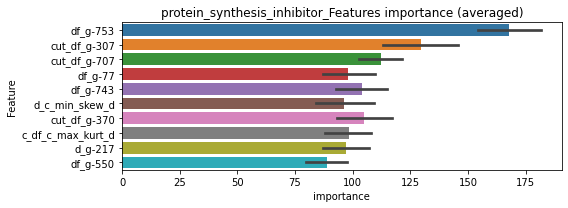

len(train_index) : 2804
len(valid_index) : 935
================================= fold 1/4 protein_synthesis_inhibitor=================================


Training until validation scores don't improve for 30 rounds


len(train_index) : 2804
len(valid_index) : 935
================================= fold 2/4 protein_synthesis_inhibitor=================================


Early stopping, best iteration is:
[384]	training's binary_logloss: 0.00161128	valid_1's binary_logloss: 0.0460913
Training until validation scores don't improve for 30 rounds


len(train_index) : 2804
len(valid_index) : 935
================================= fold 3/4 protein_synthesis_inhibitor=================================


Early stopping, best iteration is:
[340]	training's binary_logloss: 0.0019315	valid_1's binary_logloss: 0.0425733
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[363]	training's binary_logloss: 0.00181766	valid_1's binary_logloss: 0.0391608


len(train_index) : 2805
len(valid_index) : 934
================================= fold 4/4 protein_synthesis_inhibitor=================================


Training until validation scores don't improve for 30 rounds


protein_synthesis_inhibitor logloss: 0.04423521760897981
protein_synthesis_inhibitor clipping


Early stopping, best iteration is:
[450]	training's binary_logloss: 0.00134435	valid_1's binary_logloss: 0.0491207
neg labels: 3289 → selected neg labels: 3285


protein_tyrosine_kinase_inhibitor, len(trt): 19, len(othr): 3285
target_rate: 0.0007979 → Adj_target_rate: 0.0010260
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00108953	valid_1's binary_logloss: 0.0033122
Early stopping, best iteration is:
[555]	training's binary_logloss: 0.000314374	valid_1's binary_logloss: 0.00173377
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00111045	valid_1's binary_logloss: 0.00565773
Early stopping, best iteration is:
[569]	training's binary_logloss: 0.000312209	valid_1's binary_logloss: 0.00346989
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00110941	valid_1's binary_logloss: 0.00190501
[600]	training's binary_logloss: 0.000309819	valid_1's binary_logloss: 0.000639671
Early stopping, best iteration is:
[617]	training's binary_logloss: 0.000307761	valid_1's binary_logloss: 0.000636097
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00110992	valid_1's binary_logloss: 0.0020157

1 / 3 AUC score:1.000
y_Threshold: 0.0015911, Threshold: 0.0049780, pos_neg_ratio: 0.8000000
Remove_noisy_data: 132 → Positive_corect_labels: 657/3810
p_label_rate: 0.0100452 Vs.target_rate: 0.00080
Num_p_label: 40.0, conf_0:0.00348, conf_1:0.00647
Num_p_label: 40.0, Expected: 3.2, Adj_threshold_1: 0.0049780
Num_p_label: 0.0, Expected: 3.2, Adj_threshold_2: 0.0449780
threshold: 0.0449780, positive_p_label: 0.0/3982, p_label_rate: 0.0000000
positive_y_label: 657.0/3810, y_label_rate: 0.1724409
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00103959	valid_1's binary_logloss: 0.00274383
[600]	training's binary_logloss: 0.000301552	valid_1's binary_logloss: 0.00146022
Early stopping, best iteration is:
[570]	training's binary_logloss: 0.000304744	valid_1's binary_logloss: 0.0014537
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00103829	valid_1's binary_logloss: 0.00529471
Early stopping, best iteration is:
[510]	training's binary_logloss: 0.000323733	valid_1's binary_logloss: 0.00364293
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00104749	valid_1's binary_logloss: 0.00189333
[600]	training's binary_logloss: 0.000300838	valid_1's binary_logloss: 0.000624666
Early stopping, best iteration is:
[601]	training's binary_logloss: 0.000300838	valid_1's binary_logloss: 0.000624666
Training until validation scores don't improve for 30 roun

2 / 3 AUC score:1.000
y_Threshold: 0.0491123, Threshold: 0.0449780, pos_neg_ratio: 0.8000000
Remove_noisy_data: 0 → Positive_corect_labels: 657.0/3810


[600]	training's binary_logloss: 0.000304175	valid_1's binary_logloss: 0.000564796
Early stopping, best iteration is:
[584]	training's binary_logloss: 0.000304175	valid_1's binary_logloss: 0.000564796


p_label_rate: 0.0007534 Vs.target_rate: 0.00080
Num_p_label: 3.0, conf_0:0.03598, conf_1:0.05397
threshold: 0.0449780, positive_p_label: 3.0/3982, p_label_rate: 0.0007534
positive_y_label: 657.0/3810, y_label_rate: 0.1724409
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00103959	valid_1's binary_logloss: 0.00274383
[600]	training's binary_logloss: 0.000301552	valid_1's binary_logloss: 0.00146022
Early stopping, best iteration is:
[570]	training's binary_logloss: 0.000304744	valid_1's binary_logloss: 0.0014537
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00103829	valid_1's binary_logloss: 0.00529471
Early stopping, best iteration is:
[510]	training's binary_logloss: 0.000323733	valid_1's binary_logloss: 0.00364293
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00104749	valid_1's binary_logloss: 0.00189333
[600]	training's binary_logloss: 0.000300838	valid_1's binary_logloss: 0.000624666
Early stopping, best iteration is:
[598]	training's binary_logloss: 0.000300838	valid_1's binary_logloss: 0.000624666
Training until validation scores don't improve for 30 roun

3 / 3 AUC score:1.000
y_Threshold: 0.0491123, Threshold: 0.0449780, pos_neg_ratio: 0.8000000
Remove_noisy_data: 0 → Positive_corect_labels: 657.0/3810
p_label_rate: 0.0007534 Vs.target_rate: 0.00080
Num_p_label: 3.0, conf_0:0.04048, conf_1:0.04948
threshold: 0.0449780, positive_p_label: 3.0/3982, p_label_rate: 0.0007534
positive_y_label: 657.0/3810, y_label_rate: 0.1724409


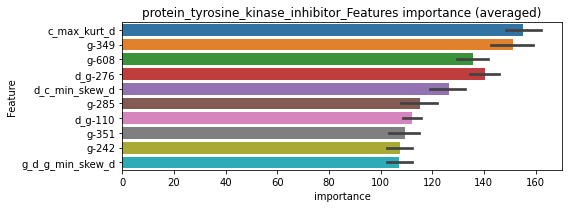

len(train_index) : 2857
len(valid_index) : 953
================================= fold 1/4 protein_tyrosine_kinase_inhibitor=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[950]	training's binary_logloss: 0.000301852	valid_1's binary_logloss: 0.00173731


len(train_index) : 2857
len(valid_index) : 953
================================= fold 2/4 protein_tyrosine_kinase_inhibitor=================================


Training until validation scores don't improve for 30 rounds


len(train_index) : 2858
len(valid_index) : 952
================================= fold 3/4 protein_tyrosine_kinase_inhibitor=================================


Early stopping, best iteration is:
[705]	training's binary_logloss: 0.000331016	valid_1's binary_logloss: 0.00289923
Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.000301248	valid_1's binary_logloss: 0.000594757
Early stopping, best iteration is:
[983]	training's binary_logloss: 0.000301248	valid_1's binary_logloss: 0.000594757


len(train_index) : 2858
len(valid_index) : 952
================================= fold 4/4 protein_tyrosine_kinase_inhibitor=================================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.000301457	valid_1's binary_logloss: 0.000602875
Early stopping, best iteration is:
[1011]	training's binary_logloss: 0.000300912	valid_1's binary_logloss: 0.000601824


protein_tyrosine_kinase_inhibitor logloss: 0.001458736615641582


neg labels: 3289 → selected neg labels: 3283


radiopaque_medium, len(trt): 56, len(othr): 3283
target_rate: 0.0023516 → Adj_target_rate: 0.0025713
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00377482	valid_1's binary_logloss: 0.0315213
[600]	training's binary_logloss: 0.000671016	valid_1's binary_logloss: 0.0219075
Early stopping, best iteration is:
[713]	training's binary_logloss: 0.000542463	valid_1's binary_logloss: 0.021378
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00400097	valid_1's binary_logloss: 0.0161263
[600]	training's binary_logloss: 0.000709156	valid_1's binary_logloss: 0.00831273
Early stopping, best iteration is:
[731]	training's binary_logloss: 0.000556571	valid_1's binary_logloss: 0.00780664
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00412728	valid_1's binary_logloss: 0.0110578
[600]	training's binary_logloss: 0.000727746	valid_1's binary_logloss: 0.00409929
Early stopping, best iteration is:
[736]	training's binary_logloss: 0.000559688	valid_1's binary_log

1 / 3 AUC score:1.000
y_Threshold: 0.0040847, Threshold: 0.0123471, pos_neg_ratio: 0.8000000
Remove_noisy_data: 132 → Positive_corect_labels: 656/3807
p_label_rate: 0.0100452 Vs.target_rate: 0.00235
Num_p_label: 40.0, conf_0:0.00864, conf_1:0.01605
Num_p_label: 40.0, Expected: 9.4, Adj_threshold_1: 0.0123471
Num_p_label: 6.0, Expected: 9.4, Adj_threshold_2: 0.0523471
threshold: 0.0523471, positive_p_label: 6.0/3982, p_label_rate: 0.0015068
positive_y_label: 656.0/3807, y_label_rate: 0.1723142
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00359774	valid_1's binary_logloss: 0.0297101
[600]	training's binary_logloss: 0.000661783	valid_1's binary_logloss: 0.0206324
Early stopping, best iteration is:
[620]	training's binary_logloss: 0.000629197	valid_1's binary_logloss: 0.0205242
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00377318	valid_1's binary_logloss: 0.0171623
[600]	training's binary_logloss: 0.000690151	valid_1's binary_logloss: 0.00879267
Early stopping, best iteration is:
[742]	training's binary_logloss: 0.000545729	valid_1's binary_logloss: 0.00828773
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00382213	valid_1's binary_logloss: 0.0102829
[600]	training's binary_logloss: 0.000706852	valid_1's binary_logloss: 0.00401039
Early stopping, best iteration is:
[754]	training's binary_logloss: 0.000542031	valid_1's binary_lo

2 / 3 AUC score:1.000
y_Threshold: 0.0398613, Threshold: 0.0523471, pos_neg_ratio: 0.8000000
Remove_noisy_data: 0 → Positive_corect_labels: 656.0/3807
p_label_rate: 0.0030136 Vs.target_rate: 0.00235
Num_p_label: 12.0, conf_0:0.04188, conf_1:0.06282
threshold: 0.0523471, positive_p_label: 12.0/3982, p_label_rate: 0.0030136
positive_y_label: 656.0/3807, y_label_rate: 0.1723142
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00359774	valid_1's binary_logloss: 0.0297101
[600]	training's binary_logloss: 0.000661783	valid_1's binary_logloss: 0.0206324
Early stopping, best iteration is:
[620]	training's binary_logloss: 0.000629197	valid_1's binary_logloss: 0.0205242
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00377318	valid_1's binary_logloss: 0.0171623
[600]	training's binary_logloss: 0.000690151	valid_1's binary_logloss: 0.00879267
Early stopping, best iteration is:
[742]	training's binary_logloss: 0.000545729	valid_1's binary_logloss: 0.00828773
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00382213	valid_1's binary_logloss: 0.0102829
[600]	training's binary_logloss: 0.000706852	valid_1's binary_logloss: 0.00401039
Early stopping, best iteration is:
[754]	training's binary_logloss: 0.000542031	valid_1's binary_lo

3 / 3 AUC score:1.000
y_Threshold: 0.0398613, Threshold: 0.0523471, pos_neg_ratio: 0.8000000
Remove_noisy_data: 0 → Positive_corect_labels: 656.0/3807
p_label_rate: 0.0030136 Vs.target_rate: 0.00235
Num_p_label: 12.0, conf_0:0.04711, conf_1:0.05758
threshold: 0.0523471, positive_p_label: 12.0/3982, p_label_rate: 0.0030136
positive_y_label: 656.0/3807, y_label_rate: 0.1723142


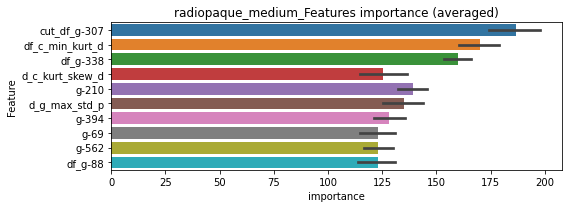

len(train_index) : 2855
len(valid_index) : 952
================================= fold 1/4 radiopaque_medium=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[889]	training's binary_logloss: 0.000549576	valid_1's binary_logloss: 0.0188327


len(train_index) : 2855
len(valid_index) : 952
================================= fold 2/4 radiopaque_medium=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[810]	training's binary_logloss: 0.000593175	valid_1's binary_logloss: 0.00947534


len(train_index) : 2855
len(valid_index) : 952
================================= fold 3/4 radiopaque_medium=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[882]	training's binary_logloss: 0.000585185	valid_1's binary_logloss: 0.0031568


len(train_index) : 2856
len(valid_index) : 951
================================= fold 4/4 radiopaque_medium=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[889]	training's binary_logloss: 0.000562879	valid_1's binary_logloss: 0.0110957


radiopaque_medium logloss: 0.010641249822144738


neg labels: 3289 → selected neg labels: 3266


raf_inhibitor, len(trt): 223, len(othr): 3266
target_rate: 0.0093642 → Adj_target_rate: 0.0083226
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.02814	valid_1's binary_logloss: 0.208732
Early stopping, best iteration is:
[449]	training's binary_logloss: 0.00969453	valid_1's binary_logloss: 0.19796
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0316654	valid_1's binary_logloss: 0.176048
Early stopping, best iteration is:
[552]	training's binary_logloss: 0.00578141	valid_1's binary_logloss: 0.160464
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0299796	valid_1's binary_logloss: 0.200501
Early stopping, best iteration is:
[399]	training's binary_logloss: 0.0145266	valid_1's binary_logloss: 0.194962
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0272849	valid_1's binary_logloss: 0.216146


1 / 3 AUC score:0.936
y_Threshold: 0.0582725, Threshold: 0.3907731, pos_neg_ratio: 0.8000000
Remove_noisy_data: 327 → Positive_corect_labels: 555/3592
p_label_rate: 0.0100452 Vs.target_rate: 0.00936


Early stopping, best iteration is:
[399]	training's binary_logloss: 0.0131321	valid_1's binary_logloss: 0.213967


Num_p_label: 40.0, conf_0:0.27354, conf_1:0.50801
threshold: 0.3907731, positive_p_label: 40.0/3982, p_label_rate: 0.0100452
positive_y_label: 555.0/3592, y_label_rate: 0.1545100
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0162303	valid_1's binary_logloss: 0.120937
[600]	training's binary_logloss: 0.00231478	valid_1's binary_logloss: 0.0987708
Early stopping, best iteration is:
[734]	training's binary_logloss: 0.0015063	valid_1's binary_logloss: 0.0978886
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0154067	valid_1's binary_logloss: 0.109879
[600]	training's binary_logloss: 0.00223796	valid_1's binary_logloss: 0.0863735
Early stopping, best iteration is:
[794]	training's binary_logloss: 0.00127882	valid_1's binary_logloss: 0.0830484
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0151715	valid_1's binary_logloss: 0.166583
Early stopping, best iteration is:
[428]	training's binary_logloss: 0.00549812	valid_1's binary_logloss: 0.163918
Training until validation scores don't improve for 30 rounds
[300]	training's bi

2 / 3 AUC score:0.983
y_Threshold: 0.0601554, Threshold: 0.3907731, pos_neg_ratio: 0.8000000
Remove_noisy_data: 90 → Positive_corect_labels: 510.0/3502
p_label_rate: 0.0293822 Vs.target_rate: 0.00936
Num_p_label: 117.0, conf_0:0.31262, conf_1:0.46893
Num_p_label: 117.0, Expected: 37.3, Adj_threshold_1: 0.3907731
Num_p_label: 107.0, Expected: 37.3, Adj_threshold_2: 0.4307731
Num_p_label: 102.0, Expected: 37.3, Adj_threshold_3: 0.4707731
Num_p_label: 92.0, Expected: 37.3, Adj_threshold_4: 0.5107731
Num_p_label: 83.0, Expected: 37.3, Adj_threshold_5: 0.5507731
Num_p_label: 77.0, Expected: 37.3, Adj_threshold_6: 0.5907731
Num_p_label: 66.0, Expected: 37.3, Adj_threshold_7: 0.6307731
Num_p_label: 53.0, Expected: 37.3, Adj_threshold_8: 0.6707731
threshold: 0.6707731, positive_p_label: 53.0/3982, p_label_rate: 0.0133099
positive_y_label: 510.0/3502, y_label_rate: 0.1456311
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0127197	valid_1's binary_logloss: 0.0983186
Early stopping, best iteration is:
[504]	training's binary_logloss: 0.00292962	valid_1's binary_logloss: 0.0809131
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0120214	valid_1's binary_logloss: 0.117211
Early stopping, best iteration is:
[514]	training's binary_logloss: 0.00262853	valid_1's binary_logloss: 0.106602
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0122349	valid_1's binary_logloss: 0.106016
[600]	training's binary_logloss: 0.00187015	valid_1's binary_logloss: 0.0904066
Early stopping, best iteration is:
[605]	training's binary_logloss: 0.00183775	valid_1's binary_logloss: 0.0901446
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0133099	valid_1's binary_logloss: 0.102489
Early stopping, bes

3 / 3 AUC score:0.992
y_Threshold: 0.0601332, Threshold: 0.6707731, pos_neg_ratio: 0.8000000
Remove_noisy_data: 58 → Positive_corect_labels: 481.0/3444
p_label_rate: 0.0213461 Vs.target_rate: 0.00936
Num_p_label: 85.0, conf_0:0.50000, conf_1:0.73785
Num_p_label: 85.0, Expected: 37.3, Adj_threshold_1: 0.6707731
Num_p_label: 77.0, Expected: 37.3, Adj_threshold_2: 0.7107731
Num_p_label: 74.0, Expected: 37.3, Adj_threshold_3: 0.7507731
Num_p_label: 65.0, Expected: 37.3, Adj_threshold_4: 0.7907731
Num_p_label: 56.0, Expected: 37.3, Adj_threshold_5: 0.8307731
Num_p_label: 43.0, Expected: 37.3, Adj_threshold_6: 0.8707731
threshold: 0.8707731, positive_p_label: 43.0/3982, p_label_rate: 0.0107986
positive_y_label: 481.0/3444, y_label_rate: 0.1396632


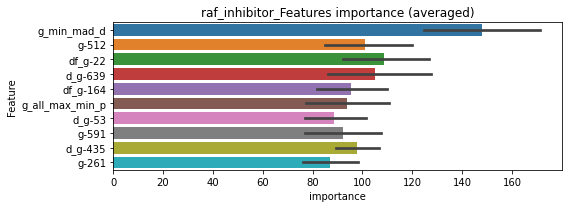

len(train_index) : 2583
len(valid_index) : 861
================================= fold 1/4 raf_inhibitor=================================


Training until validation scores don't improve for 30 rounds


len(train_index) : 2583
len(valid_index) : 861
================================= fold 2/4 raf_inhibitor=================================


Early stopping, best iteration is:
[321]	training's binary_logloss: 0.00300373	valid_1's binary_logloss: 0.0873214
Training until validation scores don't improve for 30 rounds


len(train_index) : 2583
len(valid_index) : 861
================================= fold 3/4 raf_inhibitor=================================


Early stopping, best iteration is:
[503]	training's binary_logloss: 0.00173539	valid_1's binary_logloss: 0.0668819
Training until validation scores don't improve for 30 rounds


len(train_index) : 2583
len(valid_index) : 861
================================= fold 4/4 raf_inhibitor=================================


Early stopping, best iteration is:
[318]	training's binary_logloss: 0.00302153	valid_1's binary_logloss: 0.0786625
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[929]	training's binary_logloss: 0.000952132	valid_1's binary_logloss: 0.0534909


raf_inhibitor logloss: 0.07158916175689574
raf_inhibitor clipping


neg labels: 3289 → selected neg labels: 3289


ras_gtpase_inhibitor, len(trt): 12, len(othr): 3289
target_rate: 0.0005039 → Adj_target_rate: 0.0006942
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.000583132	valid_1's binary_logloss: 0.0023094
Early stopping, best iteration is:
[487]	training's binary_logloss: 0.000245546	valid_1's binary_logloss: 0.00151526
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.000576507	valid_1's binary_logloss: 0.00180611
Early stopping, best iteration is:
[508]	training's binary_logloss: 0.000241952	valid_1's binary_logloss: 0.00112336
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.000582477	valid_1's binary_logloss: 0.0015139
Early stopping, best iteration is:
[485]	training's binary_logloss: 0.000240104	valid_1's binary_logloss: 0.001186
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.000589978	valid_1's binary_logloss: 0.00123399


1 / 3 AUC score:1.000
y_Threshold: 0.0010670, Threshold: 0.0184779, pos_neg_ratio: 0.8000000
Remove_noisy_data: 133 → Positive_corect_labels: 657/3813


Early stopping, best iteration is:
[496]	training's binary_logloss: 0.000245239	valid_1's binary_logloss: 0.000648117


p_label_rate: 0.0100452 Vs.target_rate: 0.00050
Num_p_label: 40.0, conf_0:0.01293, conf_1:0.02402
Num_p_label: 40.0, Expected: 2.0, Adj_threshold_1: 0.0184779
Num_p_label: 21.0, Expected: 2.0, Adj_threshold_2: 0.0584779
Num_p_label: 17.0, Expected: 2.0, Adj_threshold_3: 0.0984779
Num_p_label: 11.0, Expected: 2.0, Adj_threshold_4: 0.1384779
Num_p_label: 11.0, Expected: 2.0, Adj_threshold_5: 0.1784779
Num_p_label: 10.0, Expected: 2.0, Adj_threshold_6: 0.2184779
Num_p_label: 8.0, Expected: 2.0, Adj_threshold_7: 0.2584779
Num_p_label: 6.0, Expected: 2.0, Adj_threshold_8: 0.2984779
Num_p_label: 4.0, Expected: 2.0, Adj_threshold_9: 0.3384779
threshold: 0.3384779, positive_p_label: 4.0/3982, p_label_rate: 0.0010045
positive_y_label: 657.0/3813, y_label_rate: 0.1723053
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.000522239	valid_1's binary_logloss: 0.00239562
Early stopping, best iteration is:
[504]	training's binary_logloss: 0.000221114	valid_1's binary_logloss: 0.00175277
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.000527183	valid_1's binary_logloss: 0.00268465
Early stopping, best iteration is:
[483]	training's binary_logloss: 0.000224916	valid_1's binary_logloss: 0.00200416
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.000542714	valid_1's binary_logloss: 0.000607403
Early stopping, best iteration is:
[535]	training's binary_logloss: 0.000221213	valid_1's binary_logloss: 0.000253591
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.000523869	valid_1's binary_logloss: 0.00167968


2 / 3 AUC score:1.000
y_Threshold: 0.0579467, Threshold: 0.3384779, pos_neg_ratio: 0.8000000
Remove_noisy_data: 0 → Positive_corect_labels: 657.0/3813
p_label_rate: 0.0052737 Vs.target_rate: 0.00050
Num_p_label: 21.0, conf_0:0.27078, conf_1:0.40617
Num_p_label: 21.0, Expected: 2.0, Adj_threshold_1: 0.3384779
Num_p_label: 18.0, Expected: 2.0, Adj_threshold_2: 0.3784779
Num_p_label: 15.0, Expected: 2.0, Adj_threshold_3: 0.4184779
Num_p_label: 14.0, Expected: 2.0, Adj_threshold_4: 0.4584779
Num_p_label: 13.0, Expected: 2.0, Adj_threshold_5: 0.4984779
Num_p_label: 12.0, Expected: 2.0, Adj_threshold_6: 0.5384779
Num_p_label: 12.0, Expected: 2.0, Adj_threshold_7: 0.5784779


Early stopping, best iteration is:
[520]	training's binary_logloss: 0.000219833	valid_1's binary_logloss: 0.00101109


Num_p_label: 11.0, Expected: 2.0, Adj_threshold_8: 0.6184779
Num_p_label: 11.0, Expected: 2.0, Adj_threshold_9: 0.6584779
Num_p_label: 9.0, Expected: 2.0, Adj_threshold_10: 0.6984779
threshold: 0.7384779, positive_p_label: 9.0/3982, p_label_rate: 0.0022602
positive_y_label: 657.0/3813, y_label_rate: 0.1723053
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.000522239	valid_1's binary_logloss: 0.00239562
Early stopping, best iteration is:
[504]	training's binary_logloss: 0.000221114	valid_1's binary_logloss: 0.00175277
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.000527183	valid_1's binary_logloss: 0.00268465
Early stopping, best iteration is:
[483]	training's binary_logloss: 0.000224916	valid_1's binary_logloss: 0.00200416
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.000542714	valid_1's binary_logloss: 0.000607403
Early stopping, best iteration is:
[538]	training's binary_logloss: 0.000221213	valid_1's binary_logloss: 0.000253591
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.000523869	valid_1's binary_logloss: 0.00167968


3 / 3 AUC score:1.000
y_Threshold: 0.0579467, Threshold: 0.7384779, pos_neg_ratio: 0.8000000
Remove_noisy_data: 0 → Positive_corect_labels: 657.0/3813
p_label_rate: 0.0022602 Vs.target_rate: 0.00050
Num_p_label: 9.0, conf_0:0.50000, conf_1:0.80000
Num_p_label: 9.0, Expected: 2.0, Adj_threshold_1: 0.7384779


Early stopping, best iteration is:
[522]	training's binary_logloss: 0.000219833	valid_1's binary_logloss: 0.00101109


Num_p_label: 8.0, Expected: 2.0, Adj_threshold_2: 0.7784779
Num_p_label: 8.0, Expected: 2.0, Adj_threshold_3: 0.8184779
Num_p_label: 6.0, Expected: 2.0, Adj_threshold_4: 0.8584779
Num_p_label: 4.0, Expected: 2.0, Adj_threshold_5: 0.8984779
threshold: 0.8984779, positive_p_label: 4.0/3982, p_label_rate: 0.0010045
positive_y_label: 657.0/3813, y_label_rate: 0.1723053


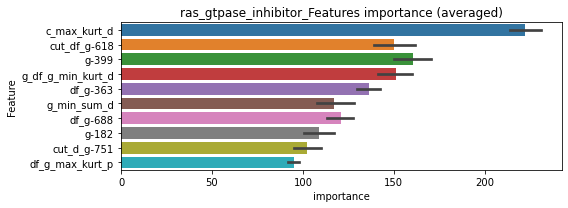

len(train_index) : 2859
len(valid_index) : 954
================================= fold 1/4 ras_gtpase_inhibitor=================================


Training until validation scores don't improve for 30 rounds


len(train_index) : 2860
len(valid_index) : 953
================================= fold 2/4 ras_gtpase_inhibitor=================================


Early stopping, best iteration is:
[842]	training's binary_logloss: 0.000226922	valid_1's binary_logloss: 0.000781844
Training until validation scores don't improve for 30 rounds


len(train_index) : 2860
len(valid_index) : 953
================================= fold 3/4 ras_gtpase_inhibitor=================================


Early stopping, best iteration is:
[909]	training's binary_logloss: 0.000221479	valid_1's binary_logloss: 0.00161507
Training until validation scores don't improve for 30 rounds


len(train_index) : 2860
len(valid_index) : 953
================================= fold 4/4 ras_gtpase_inhibitor=================================


Early stopping, best iteration is:
[797]	training's binary_logloss: 0.000229562	valid_1's binary_logloss: 0.000304282
Training until validation scores don't improve for 30 rounds


ras_gtpase_inhibitor logloss: 0.0007828960004133892


Early stopping, best iteration is:
[931]	training's binary_logloss: 0.00022487	valid_1's binary_logloss: 0.000429535
neg labels: 3289 → selected neg labels: 3278


retinoid_receptor_agonist, len(trt): 67, len(othr): 3278
target_rate: 0.0028135 → Adj_target_rate: 0.0029948
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00434753	valid_1's binary_logloss: 0.0303647
[600]	training's binary_logloss: 0.000767978	valid_1's binary_logloss: 0.0203772
Early stopping, best iteration is:
[795]	training's binary_logloss: 0.00056768	valid_1's binary_logloss: 0.0198578
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00451786	valid_1's binary_logloss: 0.0224884
[600]	training's binary_logloss: 0.000788558	valid_1's binary_logloss: 0.0128685
Early stopping, best iteration is:
[765]	training's binary_logloss: 0.000577127	valid_1's binary_logloss: 0.0119477
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0044441	valid_1's binary_logloss: 0.0344399
Early stopping, best iteration is:
[518]	training's binary_logloss: 0.00101669	valid_1's binary_logloss: 0.0294482
Training until validation scores don't improve for 30 rounds
[300]	tra

1 / 3 AUC score:1.000
y_Threshold: 0.0071238, Threshold: 0.0888959, pos_neg_ratio: 0.8000000
Remove_noisy_data: 138 → Positive_corect_labels: 652/3795
p_label_rate: 0.0100452 Vs.target_rate: 0.00281
Num_p_label: 40.0, conf_0:0.06223, conf_1:0.11556
Num_p_label: 40.0, Expected: 11.2, Adj_threshold_1: 0.0888959
Num_p_label: 31.0, Expected: 11.2, Adj_threshold_2: 0.1288959
Num_p_label: 28.0, Expected: 11.2, Adj_threshold_3: 0.1688959
Num_p_label: 27.0, Expected: 11.2, Adj_threshold_4: 0.2088959
Num_p_label: 26.0, Expected: 11.2, Adj_threshold_5: 0.2488959
Num_p_label: 22.0, Expected: 11.2, Adj_threshold_6: 0.2888959
Num_p_label: 17.0, Expected: 11.2, Adj_threshold_7: 0.3288959
Num_p_label: 16.0, Expected: 11.2, Adj_threshold_8: 0.3688959
threshold: 0.3688959, positive_p_label: 16.0/3982, p_label_rate: 0.0040181
positive_y_label: 652.0/3795, y_label_rate: 0.1718050
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00390033	valid_1's binary_logloss: 0.0208029
[600]	training's binary_logloss: 0.000725504	valid_1's binary_logloss: 0.0116924
Early stopping, best iteration is:
[762]	training's binary_logloss: 0.000546321	valid_1's binary_logloss: 0.0109114
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00397407	valid_1's binary_logloss: 0.024088
[600]	training's binary_logloss: 0.000738728	valid_1's binary_logloss: 0.0147925
Early stopping, best iteration is:
[771]	training's binary_logloss: 0.000549782	valid_1's binary_logloss: 0.0139887
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.003898	valid_1's binary_logloss: 0.027188
Early stopping, best iteration is:
[448]	training's binary_logloss: 0.00130995	valid_1's binary_logloss: 0.0234894
Training until validation scores don't improve for 30 rounds
[300]	train

2 / 3 AUC score:1.000
y_Threshold: 0.0434753, Threshold: 0.3688959, pos_neg_ratio: 0.8000000
Remove_noisy_data: 4 → Positive_corect_labels: 650.0/3791
p_label_rate: 0.0087896 Vs.target_rate: 0.00281
Num_p_label: 35.0, conf_0:0.29512, conf_1:0.44268
Num_p_label: 35.0, Expected: 11.2, Adj_threshold_1: 0.3688959
Num_p_label: 32.0, Expected: 11.2, Adj_threshold_2: 0.4088959
Num_p_label: 28.0, Expected: 11.2, Adj_threshold_3: 0.4488959
Num_p_label: 23.0, Expected: 11.2, Adj_threshold_4: 0.4888959
Num_p_label: 21.0, Expected: 11.2, Adj_threshold_5: 0.5288959
Num_p_label: 21.0, Expected: 11.2, Adj_threshold_6: 0.5688959
Num_p_label: 18.0, Expected: 11.2, Adj_threshold_7: 0.6088959
Num_p_label: 18.0, Expected: 11.2, Adj_threshold_8: 0.6488959
Num_p_label: 16.0, Expected: 11.2, Adj_threshold_9: 0.6888959
threshold: 0.6888959, positive_p_label: 16.0/3982, p_label_rate: 0.0040181
positive_y_label: 650.0/3791, y_label_rate: 0.1714587
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00375819	valid_1's binary_logloss: 0.0237534
[600]	training's binary_logloss: 0.000710293	valid_1's binary_logloss: 0.0175724
Early stopping, best iteration is:
[723]	training's binary_logloss: 0.000562662	valid_1's binary_logloss: 0.0170348
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00382655	valid_1's binary_logloss: 0.0220367
[600]	training's binary_logloss: 0.00072354	valid_1's binary_logloss: 0.0129544
Early stopping, best iteration is:
[706]	training's binary_logloss: 0.000577814	valid_1's binary_logloss: 0.0124523
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00377278	valid_1's binary_logloss: 0.0277688
[600]	training's binary_logloss: 0.000720365	valid_1's binary_logloss: 0.0187
Early stopping, best iteration is:
[687]	training's binary_logloss: 0.000596387	valid_1's binary_logloss: 

3 / 3 AUC score:1.000
y_Threshold: 0.0376948, Threshold: 0.6888959, pos_neg_ratio: 0.8000000
Remove_noisy_data: 4 → Positive_corect_labels: 648.0/3787
p_label_rate: 0.0042692 Vs.target_rate: 0.00281
Num_p_label: 17.0, conf_0:0.50000, conf_1:0.75779
Num_p_label: 17.0, Expected: 11.2, Adj_threshold_1: 0.6888959
Num_p_label: 14.0, Expected: 11.2, Adj_threshold_2: 0.7288959
threshold: 0.7288959, positive_p_label: 14.0/3982, p_label_rate: 0.0035158
positive_y_label: 648.0/3787, y_label_rate: 0.1711117


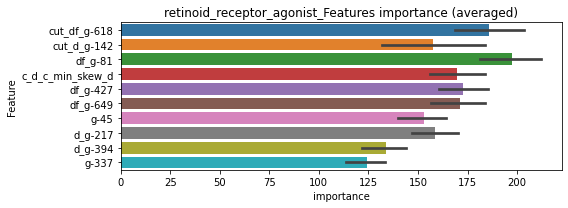

len(train_index) : 2840
len(valid_index) : 947
================================= fold 1/4 retinoid_receptor_agonist=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[831]	training's binary_logloss: 0.000609835	valid_1's binary_logloss: 0.0143799


len(train_index) : 2840
len(valid_index) : 947
================================= fold 2/4 retinoid_receptor_agonist=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[664]	training's binary_logloss: 0.000729626	valid_1's binary_logloss: 0.014365


len(train_index) : 2840
len(valid_index) : 947
================================= fold 3/4 retinoid_receptor_agonist=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[668]	training's binary_logloss: 0.000722981	valid_1's binary_logloss: 0.0173372


len(train_index) : 2841
len(valid_index) : 946
================================= fold 4/4 retinoid_receptor_agonist=================================


Training until validation scores don't improve for 30 rounds


retinoid_receptor_agonist logloss: 0.01710704860184635


Early stopping, best iteration is:
[526]	training's binary_logloss: 0.000903076	valid_1's binary_logloss: 0.0223517
neg labels: 3289 → selected neg labels: 3288


retinoid_receptor_antagonist, len(trt): 6, len(othr): 3288
target_rate: 0.0002520 → Adj_target_rate: 0.0003851
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.000315357	valid_1's binary_logloss: 0.00048617
Early stopping, best iteration is:
[488]	training's binary_logloss: 0.000154198	valid_1's binary_logloss: 0.000259215
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.000318267	valid_1's binary_logloss: 0.000764759
Early stopping, best iteration is:
[482]	training's binary_logloss: 0.000157611	valid_1's binary_logloss: 0.000462482
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.000321423	valid_1's binary_logloss: 0.000340204
Early stopping, best iteration is:
[458]	training's binary_logloss: 0.000159767	valid_1's binary_logloss: 0.00017273
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.000321679	valid_1's binary_logloss: 0.00035941


1 / 3 AUC score:1.000
y_Threshold: 0.0004399, Threshold: 0.0017484, pos_neg_ratio: 0.8000000
Remove_noisy_data: 132 → Positive_corect_labels: 657/3813
p_label_rate: 0.0100452 Vs.target_rate: 0.00025
Num_p_label: 40.0, conf_0:0.00122, conf_1:0.00227
Num_p_label: 40.0, Expected: 1.0, Adj_threshold_1: 0.0017484
Num_p_label: 0.0, Expected: 1.0, Adj_threshold_2: 0.0417484
threshold: 0.0417484, positive_p_label: 0.0/3982, p_label_rate: 0.0000000


Early stopping, best iteration is:
[506]	training's binary_logloss: 0.000158318	valid_1's binary_logloss: 0.000178477


positive_y_label: 657.0/3813, y_label_rate: 0.1723053
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.000305231	valid_1's binary_logloss: 0.000369184
Early stopping, best iteration is:
[529]	training's binary_logloss: 0.000146069	valid_1's binary_logloss: 0.000185547
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.000304979	valid_1's binary_logloss: 0.000488339
Early stopping, best iteration is:
[525]	training's binary_logloss: 0.000146671	valid_1's binary_logloss: 0.000260693
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.000306577	valid_1's binary_logloss: 0.000333459
Early stopping, best iteration is:
[541]	training's binary_logloss: 0.000147765	valid_1's binary_logloss: 0.000160288
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.000305345	valid_1's binary_logloss: 0.000351319


2 / 3 AUC score:1.000
y_Threshold: 0.1637378, Threshold: 0.0417484, pos_neg_ratio: 0.8000000
Remove_noisy_data: 0 → Positive_corect_labels: 657.0/3813
p_label_rate: 0.0010045 Vs.target_rate: 0.00025
Num_p_label: 4.0, conf_0:0.03340, conf_1:0.05010
Num_p_label: 4.0, Expected: 1.0, Adj_threshold_1: 0.0417484
Num_p_label: 2.0, Expected: 1.0, Adj_threshold_2: 0.0817484
threshold: 0.0817484, positive_p_label: 2.0/3982, p_label_rate: 0.0005023


Early stopping, best iteration is:
[542]	training's binary_logloss: 0.00014524	valid_1's binary_logloss: 0.000169559


positive_y_label: 657.0/3813, y_label_rate: 0.1723053
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.000305231	valid_1's binary_logloss: 0.000369184
Early stopping, best iteration is:
[530]	training's binary_logloss: 0.000146069	valid_1's binary_logloss: 0.000185547
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.000304979	valid_1's binary_logloss: 0.000488339
Early stopping, best iteration is:
[518]	training's binary_logloss: 0.000146671	valid_1's binary_logloss: 0.000260693
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.000306577	valid_1's binary_logloss: 0.000333459
Early stopping, best iteration is:
[540]	training's binary_logloss: 0.000147765	valid_1's binary_logloss: 0.000160288
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.000305345	valid_1's binary_logloss: 0.000351319


3 / 3 AUC score:1.000
y_Threshold: 0.1637378, Threshold: 0.0817484, pos_neg_ratio: 0.8000000
Remove_noisy_data: 0 → Positive_corect_labels: 657.0/3813
p_label_rate: 0.0005023 Vs.target_rate: 0.00025
Num_p_label: 2.0, conf_0:0.07357, conf_1:0.08992
Num_p_label: 2.0, Expected: 1.0, Adj_threshold_1: 0.0817484


Early stopping, best iteration is:
[542]	training's binary_logloss: 0.00014524	valid_1's binary_logloss: 0.000169559


threshold: 0.0817484, positive_p_label: 2.0/3982, p_label_rate: 0.0005023
positive_y_label: 657.0/3813, y_label_rate: 0.1723053


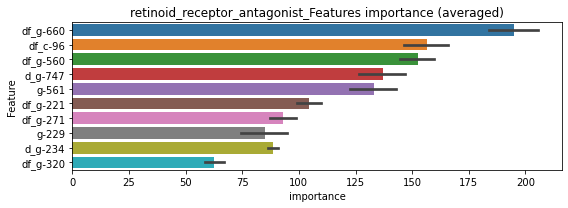

len(train_index) : 2859
len(valid_index) : 954
================================= fold 1/4 retinoid_receptor_antagonist=================================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.000150361	valid_1's binary_logloss: 0.000214053
Early stopping, best iteration is:
[1081]	training's binary_logloss: 0.000148954	valid_1's binary_logloss: 0.000212266


len(train_index) : 2860
len(valid_index) : 953
================================= fold 2/4 retinoid_receptor_antagonist=================================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.000149918	valid_1's binary_logloss: 0.000212044
Early stopping, best iteration is:
[1072]	training's binary_logloss: 0.000148534	valid_1's binary_logloss: 0.000210292


len(train_index) : 2860
len(valid_index) : 953
================================= fold 3/4 retinoid_receptor_antagonist=================================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.000150379	valid_1's binary_logloss: 0.000166061
Early stopping, best iteration is:
[1054]	training's binary_logloss: 0.000149071	valid_1's binary_logloss: 0.000164672


len(train_index) : 2860
len(valid_index) : 953
================================= fold 4/4 retinoid_receptor_antagonist=================================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.000149983	valid_1's binary_logloss: 0.000181938


retinoid_receptor_antagonist logloss: 0.00019142578100299625


Early stopping, best iteration is:
[1213]	training's binary_logloss: 0.000147006	valid_1's binary_logloss: 0.000178452
neg labels: 3289 → selected neg labels: 3283


rho_associated_kinase_inhibitor, len(trt): 35, len(othr): 3283
target_rate: 0.0014697 → Adj_target_rate: 0.0017245
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00183283	valid_1's binary_logloss: 0.0107773
[600]	training's binary_logloss: 0.000414239	valid_1's binary_logloss: 0.00640632
Early stopping, best iteration is:
[622]	training's binary_logloss: 0.000399729	valid_1's binary_logloss: 0.00637217
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00187834	valid_1's binary_logloss: 0.00567665
[600]	training's binary_logloss: 0.000418846	valid_1's binary_logloss: 0.00214926
Early stopping, best iteration is:
[688]	training's binary_logloss: 0.000383265	valid_1's binary_logloss: 0.00204712
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00193929	valid_1's binary_logloss: 0.0044144
[600]	training's binary_logloss: 0.000426635	valid_1's binary_logloss: 0.00169908
Early stopping, best iteration is:
[655]	training's binary_logloss: 0.000397775	valid_1's binary

1 / 3 AUC score:1.000
y_Threshold: 0.0032650, Threshold: 0.0101901, pos_neg_ratio: 0.8000000
Remove_noisy_data: 132 → Positive_corect_labels: 656/3807
p_label_rate: 0.0100452 Vs.target_rate: 0.00147
Num_p_label: 40.0, conf_0:0.00713, conf_1:0.01325
Num_p_label: 40.0, Expected: 5.9, Adj_threshold_1: 0.0101901
Num_p_label: 4.0, Expected: 5.9, Adj_threshold_2: 0.0501901
threshold: 0.0501901, positive_p_label: 4.0/3982, p_label_rate: 0.0010045
positive_y_label: 656.0/3807, y_label_rate: 0.1723142
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0016689	valid_1's binary_logloss: 0.0102862
[600]	training's binary_logloss: 0.000394726	valid_1's binary_logloss: 0.00646989
Early stopping, best iteration is:
[601]	training's binary_logloss: 0.000394174	valid_1's binary_logloss: 0.00646327
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00174586	valid_1's binary_logloss: 0.00481045
[600]	training's binary_logloss: 0.000404982	valid_1's binary_logloss: 0.00197563
Early stopping, best iteration is:
[670]	training's binary_logloss: 0.000380578	valid_1's binary_logloss: 0.00193696
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00176513	valid_1's binary_logloss: 0.00379059
[600]	training's binary_logloss: 0.000408016	valid_1's binary_logloss: 0.0013357
Early stopping, best iteration is:
[661]	training's binary_logloss: 0.000385264	valid_1's binary_

2 / 3 AUC score:1.000
y_Threshold: 0.0307947, Threshold: 0.0501901, pos_neg_ratio: 0.8000000
Remove_noisy_data: 0 → Positive_corect_labels: 656.0/3807
p_label_rate: 0.0030136 Vs.target_rate: 0.00147
Num_p_label: 12.0, conf_0:0.04015, conf_1:0.06023
Num_p_label: 12.0, Expected: 5.9, Adj_threshold_1: 0.0501901
threshold: 0.0501901, positive_p_label: 12.0/3982, p_label_rate: 0.0030136
positive_y_label: 656.0/3807, y_label_rate: 0.1723142
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0016689	valid_1's binary_logloss: 0.0102862
[600]	training's binary_logloss: 0.000394726	valid_1's binary_logloss: 0.00646989
Early stopping, best iteration is:
[601]	training's binary_logloss: 0.000394174	valid_1's binary_logloss: 0.00646327
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00174586	valid_1's binary_logloss: 0.00481045
[600]	training's binary_logloss: 0.000404982	valid_1's binary_logloss: 0.00197563
Early stopping, best iteration is:
[670]	training's binary_logloss: 0.000380578	valid_1's binary_logloss: 0.00193696
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00176513	valid_1's binary_logloss: 0.00379059
[600]	training's binary_logloss: 0.000408016	valid_1's binary_logloss: 0.0013357
Early stopping, best iteration is:
[661]	training's binary_logloss: 0.000385264	valid_1's binary_

3 / 3 AUC score:1.000
y_Threshold: 0.0307947, Threshold: 0.0501901, pos_neg_ratio: 0.8000000
Remove_noisy_data: 0 → Positive_corect_labels: 656.0/3807
p_label_rate: 0.0030136 Vs.target_rate: 0.00147
Num_p_label: 12.0, conf_0:0.04517, conf_1:0.05521
Num_p_label: 12.0, Expected: 5.9, Adj_threshold_1: 0.0501901
threshold: 0.0501901, positive_p_label: 12.0/3982, p_label_rate: 0.0030136
positive_y_label: 656.0/3807, y_label_rate: 0.1723142


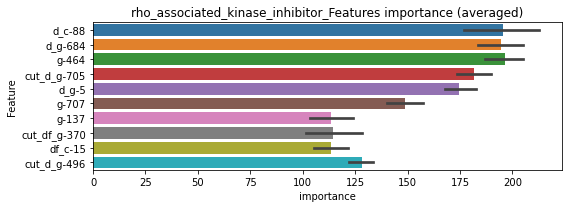

len(train_index) : 2855
len(valid_index) : 952
================================= fold 1/4 rho_associated_kinase_inhibitor=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[889]	training's binary_logloss: 0.000394349	valid_1's binary_logloss: 0.00477469


len(train_index) : 2855
len(valid_index) : 952
================================= fold 2/4 rho_associated_kinase_inhibitor=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[915]	training's binary_logloss: 0.000398052	valid_1's binary_logloss: 0.00220336


len(train_index) : 2855
len(valid_index) : 952
================================= fold 3/4 rho_associated_kinase_inhibitor=================================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.000388792	valid_1's binary_logloss: 0.00140611
Early stopping, best iteration is:
[1010]	training's binary_logloss: 0.000388792	valid_1's binary_logloss: 0.00140611


len(train_index) : 2856
len(valid_index) : 951
================================= fold 4/4 rho_associated_kinase_inhibitor=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[891]	training's binary_logloss: 0.000395216	valid_1's binary_logloss: 0.00448361


rho_associated_kinase_inhibitor logloss: 0.0032166093010026708


neg labels: 3289 → selected neg labels: 3284


ribonucleoside_reductase_inhibitor, len(trt): 37, len(othr): 3284
target_rate: 0.0015537 → Adj_target_rate: 0.0018079
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00216492	valid_1's binary_logloss: 0.0188592
[600]	training's binary_logloss: 0.000456143	valid_1's binary_logloss: 0.0124266
Early stopping, best iteration is:
[690]	training's binary_logloss: 0.000412901	valid_1's binary_logloss: 0.0122043
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00223922	valid_1's binary_logloss: 0.00709893
[600]	training's binary_logloss: 0.000461345	valid_1's binary_logloss: 0.00315985
Early stopping, best iteration is:
[698]	training's binary_logloss: 0.000417553	valid_1's binary_logloss: 0.00306393
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00223064	valid_1's binary_logloss: 0.00766117
[600]	training's binary_logloss: 0.000466498	valid_1's binary_logloss: 0.00294667
Early stopping, best iteration is:
[676]	training's binary_logloss: 0.000433088	valid_1's binary_

1 / 3 AUC score:1.000
y_Threshold: 0.0040157, Threshold: 0.0179477, pos_neg_ratio: 0.8000000
Remove_noisy_data: 132 → Positive_corect_labels: 656/3808
p_label_rate: 0.0100452 Vs.target_rate: 0.00155
Num_p_label: 40.0, conf_0:0.01256, conf_1:0.02333
Num_p_label: 40.0, Expected: 6.2, Adj_threshold_1: 0.0179477
Num_p_label: 13.0, Expected: 6.2, Adj_threshold_2: 0.0579477
threshold: 0.0579477, positive_p_label: 13.0/3982, p_label_rate: 0.0032647
positive_y_label: 656.0/3808, y_label_rate: 0.1722689
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00192014	valid_1's binary_logloss: 0.0177995
Early stopping, best iteration is:
[523]	training's binary_logloss: 0.000519102	valid_1's binary_logloss: 0.0135267
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00199488	valid_1's binary_logloss: 0.00594117
[600]	training's binary_logloss: 0.000438686	valid_1's binary_logloss: 0.00277507
Early stopping, best iteration is:
[629]	training's binary_logloss: 0.000420887	valid_1's binary_logloss: 0.00272128
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00197984	valid_1's binary_logloss: 0.00567828
[600]	training's binary_logloss: 0.000442118	valid_1's binary_logloss: 0.00186928
Early stopping, best iteration is:
[655]	training's binary_logloss: 0.000412805	valid_1's binary_logloss: 0.00180497
Training until validation scores don't improve for 30 rounds


2 / 3 AUC score:1.000
y_Threshold: 0.0430530, Threshold: 0.0579477, pos_neg_ratio: 0.8000000
Remove_noisy_data: 4 → Positive_corect_labels: 654.0/3804
p_label_rate: 0.0077850 Vs.target_rate: 0.00155
Num_p_label: 31.0, conf_0:0.04636, conf_1:0.06954
Num_p_label: 31.0, Expected: 6.2, Adj_threshold_1: 0.0579477
Num_p_label: 20.0, Expected: 6.2, Adj_threshold_2: 0.0979477
Num_p_label: 15.0, Expected: 6.2, Adj_threshold_3: 0.1379477
threshold: 0.1379477, positive_p_label: 15.0/3982, p_label_rate: 0.0037670
positive_y_label: 654.0/3804, y_label_rate: 0.1719243
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00192414	valid_1's binary_logloss: 0.0130822
[600]	training's binary_logloss: 0.00042649	valid_1's binary_logloss: 0.00899731
Early stopping, best iteration is:
[620]	training's binary_logloss: 0.000414013	valid_1's binary_logloss: 0.00895046
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.002004	valid_1's binary_logloss: 0.00812653
[600]	training's binary_logloss: 0.000434805	valid_1's binary_logloss: 0.00460588
Early stopping, best iteration is:
[625]	training's binary_logloss: 0.000417672	valid_1's binary_logloss: 0.00458183
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00196071	valid_1's binary_logloss: 0.014726
[600]	training's binary_logloss: 0.000431345	valid_1's binary_logloss: 0.00902707
Early stopping, best iteration is:
[643]	training's binary_logloss: 0.000407526	valid_1's binary_log

3 / 3 AUC score:1.000
y_Threshold: 0.0302807, Threshold: 0.1379477, pos_neg_ratio: 0.8000000
Remove_noisy_data: 0 → Positive_corect_labels: 654.0/3804
p_label_rate: 0.0045203 Vs.target_rate: 0.00155
Num_p_label: 18.0, conf_0:0.12415, conf_1:0.15174
Num_p_label: 18.0, Expected: 6.2, Adj_threshold_1: 0.1379477
Num_p_label: 12.0, Expected: 6.2, Adj_threshold_2: 0.1779477
threshold: 0.1779477, positive_p_label: 12.0/3982, p_label_rate: 0.0030136
positive_y_label: 654.0/3804, y_label_rate: 0.1719243


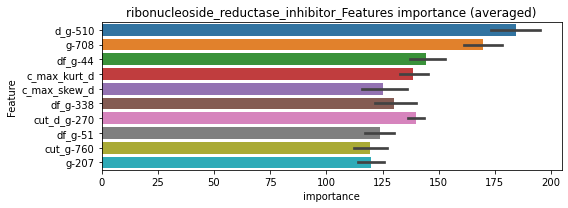

len(train_index) : 2853
len(valid_index) : 951
================================= fold 1/4 ribonucleoside_reductase_inhibitor=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[748]	training's binary_logloss: 0.000449349	valid_1's binary_logloss: 0.00875995


len(train_index) : 2853
len(valid_index) : 951
================================= fold 2/4 ribonucleoside_reductase_inhibitor=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[812]	training's binary_logloss: 0.000435706	valid_1's binary_logloss: 0.00414799


len(train_index) : 2853
len(valid_index) : 951
================================= fold 3/4 ribonucleoside_reductase_inhibitor=================================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.000402897	valid_1's binary_logloss: 0.00589661
Early stopping, best iteration is:
[979]	training's binary_logloss: 0.000404114	valid_1's binary_logloss: 0.00588975


len(train_index) : 2853
len(valid_index) : 951
================================= fold 4/4 ribonucleoside_reductase_inhibitor=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[917]	training's binary_logloss: 0.000413513	valid_1's binary_logloss: 0.00266223


ribonucleoside_reductase_inhibitor logloss: 0.0053658586788437514


neg labels: 3289 → selected neg labels: 3284


rna_polymerase_inhibitor, len(trt): 25, len(othr): 3284
target_rate: 0.0010498 → Adj_target_rate: 0.0012955
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00118214	valid_1's binary_logloss: 0.00404575
Early stopping, best iteration is:
[547]	training's binary_logloss: 0.00034801	valid_1's binary_logloss: 0.00202465
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00121	valid_1's binary_logloss: 0.00310767
[600]	training's binary_logloss: 0.000341954	valid_1's binary_logloss: 0.00134583
Early stopping, best iteration is:
[570]	training's binary_logloss: 0.00034244	valid_1's binary_logloss: 0.00134453
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00121612	valid_1's binary_logloss: 0.0041469
Early stopping, best iteration is:
[561]	training's binary_logloss: 0.000348082	valid_1's binary_logloss: 0.00245263
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00121149	valid_1's binary_logloss: 0.00392243


1 / 3 AUC score:1.000
y_Threshold: 0.0020467, Threshold: 0.0062260, pos_neg_ratio: 0.8000000


Early stopping, best iteration is:
[561]	training's binary_logloss: 0.000346645	valid_1's binary_logloss: 0.00197357


Remove_noisy_data: 132 → Positive_corect_labels: 656/3808
p_label_rate: 0.0100452 Vs.target_rate: 0.00105
Num_p_label: 40.0, conf_0:0.00436, conf_1:0.00809
Num_p_label: 40.0, Expected: 4.2, Adj_threshold_1: 0.0062260
Num_p_label: 1.0, Expected: 4.2, Adj_threshold_2: 0.0462260
threshold: 0.0462260, positive_p_label: 1.0/3982, p_label_rate: 0.0002511
positive_y_label: 656.0/3808, y_label_rate: 0.1722689
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0011296	valid_1's binary_logloss: 0.00361548
[600]	training's binary_logloss: 0.000325541	valid_1's binary_logloss: 0.00168431
Early stopping, best iteration is:
[575]	training's binary_logloss: 0.000328033	valid_1's binary_logloss: 0.00168268
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00117875	valid_1's binary_logloss: 0.00328383
[600]	training's binary_logloss: 0.000332755	valid_1's binary_logloss: 0.0015579
Early stopping, best iteration is:
[633]	training's binary_logloss: 0.000331765	valid_1's binary_logloss: 0.001553
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00116207	valid_1's binary_logloss: 0.00331504
Early stopping, best iteration is:
[542]	training's binary_logloss: 0.000342158	valid_1's binary_logloss: 0.00169334
Training until validation scores don't improve for 30 rounds
[3

2 / 3 AUC score:1.000
y_Threshold: 0.0910234, Threshold: 0.0462260, pos_neg_ratio: 0.8000000
Remove_noisy_data: 0 → Positive_corect_labels: 656.0/3808
p_label_rate: 0.0042692 Vs.target_rate: 0.00105
Num_p_label: 17.0, conf_0:0.03698, conf_1:0.05547
Num_p_label: 17.0, Expected: 4.2, Adj_threshold_1: 0.0462260


Early stopping, best iteration is:
[569]	training's binary_logloss: 0.000335677	valid_1's binary_logloss: 0.000992332


Num_p_label: 9.0, Expected: 4.2, Adj_threshold_2: 0.0862260
threshold: 0.0862260, positive_p_label: 9.0/3982, p_label_rate: 0.0022602
positive_y_label: 656.0/3808, y_label_rate: 0.1722689
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0011296	valid_1's binary_logloss: 0.00361548
[600]	training's binary_logloss: 0.000325541	valid_1's binary_logloss: 0.00168431
Early stopping, best iteration is:
[575]	training's binary_logloss: 0.000328033	valid_1's binary_logloss: 0.00168268
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00117875	valid_1's binary_logloss: 0.00328383
[600]	training's binary_logloss: 0.000332755	valid_1's binary_logloss: 0.0015579
Early stopping, best iteration is:
[608]	training's binary_logloss: 0.000331765	valid_1's binary_logloss: 0.001553
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00116207	valid_1's binary_logloss: 0.00331504
Early stopping, best iteration is:
[542]	training's binary_logloss: 0.000342158	valid_1's binary_logloss: 0.00169334
Training until validation scores don't improve for 30 rounds
[3

3 / 3 AUC score:1.000
y_Threshold: 0.0910234, Threshold: 0.0862260, pos_neg_ratio: 0.8000000
Remove_noisy_data: 0 → Positive_corect_labels: 656.0/3808
p_label_rate: 0.0022602 Vs.target_rate: 0.00105
Num_p_label: 9.0, conf_0:0.07760, conf_1:0.09485
Num_p_label: 9.0, Expected: 4.2, Adj_threshold_1: 0.0862260
threshold: 0.0862260, positive_p_label: 9.0/3982, p_label_rate: 0.0022602
positive_y_label: 656.0/3808, y_label_rate: 0.1722689


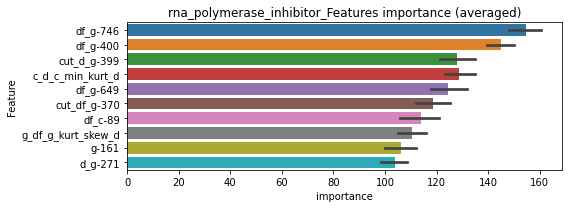

len(train_index) : 2856
len(valid_index) : 952
================================= fold 1/4 rna_polymerase_inhibitor=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[898]	training's binary_logloss: 0.000333393	valid_1's binary_logloss: 0.00154598


len(train_index) : 2856
len(valid_index) : 952
================================= fold 2/4 rna_polymerase_inhibitor=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[782]	training's binary_logloss: 0.000349176	valid_1's binary_logloss: 0.00111302


len(train_index) : 2856
len(valid_index) : 952
================================= fold 3/4 rna_polymerase_inhibitor=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[777]	training's binary_logloss: 0.000349362	valid_1's binary_logloss: 0.00168289


len(train_index) : 2856
len(valid_index) : 952
================================= fold 4/4 rna_polymerase_inhibitor=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[722]	training's binary_logloss: 0.000359395	valid_1's binary_logloss: 0.00135082


rna_polymerase_inhibitor logloss: 0.00142367599139947


neg labels: 3289 → selected neg labels: 3249


serotonin_receptor_agonist, len(trt): 236, len(othr): 3249
target_rate: 0.0099101 → Adj_target_rate: 0.0087332
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0234524	valid_1's binary_logloss: 0.210606
Early stopping, best iteration is:
[344]	training's binary_logloss: 0.0168228	valid_1's binary_logloss: 0.209097
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0235228	valid_1's binary_logloss: 0.198503
Early stopping, best iteration is:
[371]	training's binary_logloss: 0.0137189	valid_1's binary_logloss: 0.194277
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0257536	valid_1's binary_logloss: 0.168568
Early stopping, best iteration is:
[439]	training's binary_logloss: 0.00941813	valid_1's binary_logloss: 0.161383
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0252835	valid_1's binary_logloss: 0.191818


1 / 3 AUC score:0.939
y_Threshold: 0.0529200, Threshold: 0.3759668, pos_neg_ratio: 0.8000000
Remove_noisy_data: 317 → Positive_corect_labels: 556/3581
p_label_rate: 0.0100452 Vs.target_rate: 0.00991
Num_p_label: 40.0, conf_0:0.26318, conf_1:0.48876


Early stopping, best iteration is:
[343]	training's binary_logloss: 0.0187003	valid_1's binary_logloss: 0.190191


threshold: 0.3759668, positive_p_label: 40.0/3982, p_label_rate: 0.0100452
positive_y_label: 556.0/3581, y_label_rate: 0.1552639
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0140172	valid_1's binary_logloss: 0.116795
Early stopping, best iteration is:
[472]	training's binary_logloss: 0.00383534	valid_1's binary_logloss: 0.108104
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0133435	valid_1's binary_logloss: 0.13298
Early stopping, best iteration is:
[487]	training's binary_logloss: 0.00336022	valid_1's binary_logloss: 0.125458
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0132289	valid_1's binary_logloss: 0.114095
Early stopping, best iteration is:
[376]	training's binary_logloss: 0.00715307	valid_1's binary_logloss: 0.109978
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0127081	valid_1's binary_logloss: 0.123765


2 / 3 AUC score:0.989
y_Threshold: 0.0539719, Threshold: 0.3759668, pos_neg_ratio: 0.8000000


Early stopping, best iteration is:
[471]	training's binary_logloss: 0.00358163	valid_1's binary_logloss: 0.116886


Remove_noisy_data: 80 → Positive_corect_labels: 516.0/3501
p_label_rate: 0.0190859 Vs.target_rate: 0.00991
Num_p_label: 76.0, conf_0:0.30077, conf_1:0.45116
Num_p_label: 76.0, Expected: 39.5, Adj_threshold_1: 0.3759668
Num_p_label: 75.0, Expected: 39.5, Adj_threshold_2: 0.4159668
Num_p_label: 72.0, Expected: 39.5, Adj_threshold_3: 0.4559668
Num_p_label: 62.0, Expected: 39.5, Adj_threshold_4: 0.4959668
Num_p_label: 56.0, Expected: 39.5, Adj_threshold_5: 0.5359668
threshold: 0.5359668, positive_p_label: 56.0/3982, p_label_rate: 0.0140633
positive_y_label: 516.0/3501, y_label_rate: 0.1473865
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00928637	valid_1's binary_logloss: 0.112598
Early stopping, best iteration is:
[446]	training's binary_logloss: 0.00312923	valid_1's binary_logloss: 0.108013
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0097198	valid_1's binary_logloss: 0.104441
Early stopping, best iteration is:
[480]	training's binary_logloss: 0.00263473	valid_1's binary_logloss: 0.0976695
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00988007	valid_1's binary_logloss: 0.0812099
Early stopping, best iteration is:
[508]	training's binary_logloss: 0.00235498	valid_1's binary_logloss: 0.0709509
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0101125	valid_1's binary_logloss: 0.088725


3 / 3 AUC score:0.997
y_Threshold: 0.0495305, Threshold: 0.5359668, pos_neg_ratio: 0.8000000
Remove_noisy_data: 42 → Positive_corect_labels: 495.0/3459


Early stopping, best iteration is:
[450]	training's binary_logloss: 0.0031858	valid_1's binary_logloss: 0.0809541


p_label_rate: 0.0158212 Vs.target_rate: 0.00991
Num_p_label: 63.0, conf_0:0.48237, conf_1:0.58956
Num_p_label: 63.0, Expected: 39.5, Adj_threshold_1: 0.5359668
Num_p_label: 59.0, Expected: 39.5, Adj_threshold_2: 0.5759668
threshold: 0.5759668, positive_p_label: 59.0/3982, p_label_rate: 0.0148167
positive_y_label: 495.0/3459, y_label_rate: 0.1431049


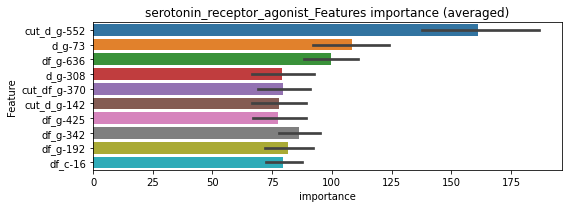

len(train_index) : 2594
len(valid_index) : 865
================================= fold 1/4 serotonin_receptor_agonist=================================


Training until validation scores don't improve for 30 rounds


len(train_index) : 2594
len(valid_index) : 865
================================= fold 2/4 serotonin_receptor_agonist=================================


Early stopping, best iteration is:
[441]	training's binary_logloss: 0.0018393	valid_1's binary_logloss: 0.0665543
Training until validation scores don't improve for 30 rounds


len(train_index) : 2594
len(valid_index) : 865
================================= fold 3/4 serotonin_receptor_agonist=================================


Early stopping, best iteration is:
[355]	training's binary_logloss: 0.00240446	valid_1's binary_logloss: 0.0754817
Training until validation scores don't improve for 30 rounds


len(train_index) : 2595
len(valid_index) : 864
================================= fold 4/4 serotonin_receptor_agonist=================================


Early stopping, best iteration is:
[240]	training's binary_logloss: 0.00424716	valid_1's binary_logloss: 0.0807237
Training until validation scores don't improve for 30 rounds


serotonin_receptor_agonist logloss: 0.076382832002296
serotonin_receptor_agonist clipping


Early stopping, best iteration is:
[260]	training's binary_logloss: 0.00372114	valid_1's binary_logloss: 0.0827791
neg labels: 3289 → selected neg labels: 3239


serotonin_receptor_antagonist, len(trt): 404, len(othr): 3239
target_rate: 0.0169648 → Adj_target_rate: 0.0137918
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[244]	training's binary_logloss: 0.0727438	valid_1's binary_logloss: 0.335162
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[251]	training's binary_logloss: 0.0685504	valid_1's binary_logloss: 0.342915
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0559117	valid_1's binary_logloss: 0.333613
Early stopping, best iteration is:
[281]	training's binary_logloss: 0.0631154	valid_1's binary_logloss: 0.331186
Training until validation scores don't improve for 30 rounds


1 / 3 AUC score:0.803
y_Threshold: 0.1253750, Threshold: 0.5294125, pos_neg_ratio: 0.8000000
Remove_noisy_data: 617 → Positive_corect_labels: 404/3269
p_label_rate: 0.0100452 Vs.target_rate: 0.01696
Num_p_label: 40.0, conf_0:0.37059, conf_1:0.68824
Num_p_label: 40.0, Expected: 67.6, Adj_threshold_1: 0.5294125
Num_p_label: 47.0, Expected: 67.6, Adj_threshold_2: 0.4994125
threshold: 0.4994125, positive_p_label: 47.0/3982, p_label_rate: 0.0118031


Early stopping, best iteration is:
[267]	training's binary_logloss: 0.062929	valid_1's binary_logloss: 0.333968


positive_y_label: 404.0/3269, y_label_rate: 0.1235852
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0147615	valid_1's binary_logloss: 0.189419
Early stopping, best iteration is:
[333]	training's binary_logloss: 0.0111875	valid_1's binary_logloss: 0.187328
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0148072	valid_1's binary_logloss: 0.16832
Early stopping, best iteration is:
[322]	training's binary_logloss: 0.0122954	valid_1's binary_logloss: 0.167104
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0158681	valid_1's binary_logloss: 0.157074
Early stopping, best iteration is:
[326]	training's binary_logloss: 0.0127745	valid_1's binary_logloss: 0.156088
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0148152	valid_1's binary_logloss: 0.189083


2 / 3 AUC score:0.962
y_Threshold: 0.0773989, Threshold: 0.4994125, pos_neg_ratio: 0.8000000
Remove_noisy_data: 154 → Positive_corect_labels: 327.0/3115
p_label_rate: 0.0273732 Vs.target_rate: 0.01696
Num_p_label: 109.0, conf_0:0.39953, conf_1:0.59930
Num_p_label: 109.0, Expected: 67.6, Adj_threshold_1: 0.4994125
Num_p_label: 102.0, Expected: 67.6, Adj_threshold_2: 0.5394125
Num_p_label: 96.0, Expected: 67.6, Adj_threshold_3: 0.5794125


Early stopping, best iteration is:
[329]	training's binary_logloss: 0.0115615	valid_1's binary_logloss: 0.186886


threshold: 0.5794125, positive_p_label: 96.0/3982, p_label_rate: 0.0241085
positive_y_label: 327.0/3115, y_label_rate: 0.1049759
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00845596	valid_1's binary_logloss: 0.152938
Early stopping, best iteration is:
[306]	training's binary_logloss: 0.00802952	valid_1's binary_logloss: 0.152246
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00899196	valid_1's binary_logloss: 0.123479
Early stopping, best iteration is:
[306]	training's binary_logloss: 0.00850986	valid_1's binary_logloss: 0.122952
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0088328	valid_1's binary_logloss: 0.136571
Early stopping, best iteration is:
[345]	training's binary_logloss: 0.00599879	valid_1's binary_logloss: 0.13533
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00894371	valid_1's binary_logloss: 0.12478


3 / 3 AUC score:0.979
y_Threshold: 0.0635782, Threshold: 0.5794125, pos_neg_ratio: 0.8000000
Remove_noisy_data: 72 → Positive_corect_labels: 291.0/3043
p_label_rate: 0.0321447 Vs.target_rate: 0.01696
Num_p_label: 128.0, conf_0:0.50000, conf_1:0.63735
Num_p_label: 128.0, Expected: 67.6, Adj_threshold_1: 0.5794125
Num_p_label: 123.0, Expected: 67.6, Adj_threshold_2: 0.6194125
Num_p_label: 119.0, Expected: 67.6, Adj_threshold_3: 0.6594125
Num_p_label: 115.0, Expected: 67.6, Adj_threshold_4: 0.6994125
Num_p_label: 112.0, Expected: 67.6, Adj_threshold_5: 0.7394125
Num_p_label: 101.0, Expected: 67.6, Adj_threshold_6: 0.7794125


Early stopping, best iteration is:
[356]	training's binary_logloss: 0.00555941	valid_1's binary_logloss: 0.121917


threshold: 0.7794125, positive_p_label: 101.0/3982, p_label_rate: 0.0253641
positive_y_label: 291.0/3043, y_label_rate: 0.0956293


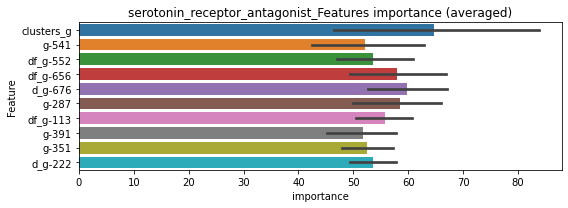

len(train_index) : 2282
len(valid_index) : 761
================================= fold 1/4 serotonin_receptor_antagonist=================================


Training until validation scores don't improve for 30 rounds


len(train_index) : 2282
len(valid_index) : 761
================================= fold 2/4 serotonin_receptor_antagonist=================================


Early stopping, best iteration is:
[122]	training's binary_logloss: 0.0111848	valid_1's binary_logloss: 0.115147
Training until validation scores don't improve for 30 rounds


len(train_index) : 2282
len(valid_index) : 761
================================= fold 3/4 serotonin_receptor_antagonist=================================


Early stopping, best iteration is:
[148]	training's binary_logloss: 0.0083494	valid_1's binary_logloss: 0.105508
Training until validation scores don't improve for 30 rounds


len(train_index) : 2283
len(valid_index) : 760
================================= fold 4/4 serotonin_receptor_antagonist=================================


Early stopping, best iteration is:
[133]	training's binary_logloss: 0.0100912	valid_1's binary_logloss: 0.111458
Training until validation scores don't improve for 30 rounds


serotonin_receptor_antagonist logloss: 0.10979579422456084
serotonin_receptor_antagonist clipping


Early stopping, best iteration is:
[174]	training's binary_logloss: 0.00644026	valid_1's binary_logloss: 0.107066
neg labels: 3289 → selected neg labels: 3285


serotonin_reuptake_inhibitor, len(trt): 44, len(othr): 3285
target_rate: 0.0018477 → Adj_target_rate: 0.0020948
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00246698	valid_1's binary_logloss: 0.0166791
[600]	training's binary_logloss: 0.000513657	valid_1's binary_logloss: 0.011501
Early stopping, best iteration is:
[635]	training's binary_logloss: 0.000489128	valid_1's binary_logloss: 0.0113938
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00239849	valid_1's binary_logloss: 0.0228877
[600]	training's binary_logloss: 0.000506335	valid_1's binary_logloss: 0.018638
Early stopping, best iteration is:
[586]	training's binary_logloss: 0.000518987	valid_1's binary_logloss: 0.018515
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0026815	valid_1's binary_logloss: 0.0114209
[600]	training's binary_logloss: 0.000539851	valid_1's binary_logloss: 0.00592349
Early stopping, best iteration is:
[643]	training's binary_logloss: 0.000498509	valid_1's binary_logloss:

1 / 3 AUC score:1.000
y_Threshold: 0.0032561, Threshold: 0.0228981, pos_neg_ratio: 0.8000000
Remove_noisy_data: 132 → Positive_corect_labels: 657/3810
p_label_rate: 0.0100452 Vs.target_rate: 0.00185
Num_p_label: 40.0, conf_0:0.01603, conf_1:0.02977
Num_p_label: 40.0, Expected: 7.4, Adj_threshold_1: 0.0228981
Num_p_label: 11.0, Expected: 7.4, Adj_threshold_2: 0.0628981
threshold: 0.0628981, positive_p_label: 11.0/3982, p_label_rate: 0.0027624
positive_y_label: 657.0/3810, y_label_rate: 0.1724409
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0022038	valid_1's binary_logloss: 0.0166437
[600]	training's binary_logloss: 0.000482783	valid_1's binary_logloss: 0.0119741
Early stopping, best iteration is:
[621]	training's binary_logloss: 0.000465792	valid_1's binary_logloss: 0.0118423
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00220704	valid_1's binary_logloss: 0.0206654
[600]	training's binary_logloss: 0.000482161	valid_1's binary_logloss: 0.0161693
Early stopping, best iteration is:
[605]	training's binary_logloss: 0.000478386	valid_1's binary_logloss: 0.016153
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00240216	valid_1's binary_logloss: 0.0103107
[600]	training's binary_logloss: 0.000508151	valid_1's binary_logloss: 0.00569734
Early stopping, best iteration is:
[645]	training's binary_logloss: 0.000475709	valid_1's binary_loglos

2 / 3 AUC score:1.000
y_Threshold: 0.0408227, Threshold: 0.0628981, pos_neg_ratio: 0.8000000
Remove_noisy_data: 4 → Positive_corect_labels: 655.0/3806
p_label_rate: 0.0228528 Vs.target_rate: 0.00185
Num_p_label: 91.0, conf_0:0.05032, conf_1:0.07548
Num_p_label: 91.0, Expected: 7.4, Adj_threshold_1: 0.0628981
Num_p_label: 72.0, Expected: 7.4, Adj_threshold_2: 0.1028981
Num_p_label: 52.0, Expected: 7.4, Adj_threshold_3: 0.1428981
Num_p_label: 44.0, Expected: 7.4, Adj_threshold_4: 0.1828981
Num_p_label: 39.0, Expected: 7.4, Adj_threshold_5: 0.2228981
Num_p_label: 33.0, Expected: 7.4, Adj_threshold_6: 0.2628981
Num_p_label: 23.0, Expected: 7.4, Adj_threshold_7: 0.3028981
Num_p_label: 15.0, Expected: 7.4, Adj_threshold_8: 0.3428981
threshold: 0.3428981, positive_p_label: 15.0/3982, p_label_rate: 0.0037670
positive_y_label: 655.0/3806, y_label_rate: 0.1720967
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00214298	valid_1's binary_logloss: 0.0122547
[600]	training's binary_logloss: 0.000478825	valid_1's binary_logloss: 0.00725298
Early stopping, best iteration is:
[657]	training's binary_logloss: 0.000447522	valid_1's binary_logloss: 0.00714878
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00213287	valid_1's binary_logloss: 0.0136659
[600]	training's binary_logloss: 0.000474213	valid_1's binary_logloss: 0.0095817
Early stopping, best iteration is:
[601]	training's binary_logloss: 0.000472799	valid_1's binary_logloss: 0.00957532
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00221428	valid_1's binary_logloss: 0.0172338
[600]	training's binary_logloss: 0.000484411	valid_1's binary_logloss: 0.012288
Early stopping, best iteration is:
[608]	training's binary_logloss: 0.000476829	valid_1's binary_log

3 / 3 AUC score:1.000
y_Threshold: 0.0443674, Threshold: 0.3428981, pos_neg_ratio: 0.8000000
Remove_noisy_data: 0 → Positive_corect_labels: 655.0/3806
p_label_rate: 0.0080362 Vs.target_rate: 0.00185
Num_p_label: 32.0, conf_0:0.30861, conf_1:0.37719
Num_p_label: 32.0, Expected: 7.4, Adj_threshold_1: 0.3428981
Num_p_label: 25.0, Expected: 7.4, Adj_threshold_2: 0.3828981
Num_p_label: 20.0, Expected: 7.4, Adj_threshold_3: 0.4228981
Num_p_label: 14.0, Expected: 7.4, Adj_threshold_4: 0.4628981
threshold: 0.4628981, positive_p_label: 14.0/3982, p_label_rate: 0.0035158
positive_y_label: 655.0/3806, y_label_rate: 0.1720967


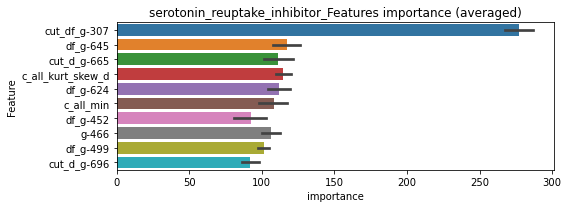

len(train_index) : 2854
len(valid_index) : 952
================================= fold 1/4 serotonin_reuptake_inhibitor=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[872]	training's binary_logloss: 0.000463555	valid_1's binary_logloss: 0.00544225


len(train_index) : 2854
len(valid_index) : 952
================================= fold 2/4 serotonin_reuptake_inhibitor=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[820]	training's binary_logloss: 0.000475043	valid_1's binary_logloss: 0.0080816


len(train_index) : 2855
len(valid_index) : 951
================================= fold 3/4 serotonin_reuptake_inhibitor=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[766]	training's binary_logloss: 0.000488642	valid_1's binary_logloss: 0.011964


len(train_index) : 2855
len(valid_index) : 951
================================= fold 4/4 serotonin_reuptake_inhibitor=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[834]	training's binary_logloss: 0.000469564	valid_1's binary_logloss: 0.00929271


serotonin_reuptake_inhibitor logloss: 0.008694135777206059


neg labels: 3289 → selected neg labels: 3283


sigma_receptor_agonist, len(trt): 36, len(othr): 3283
target_rate: 0.0015117 → Adj_target_rate: 0.0017663
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0017581	valid_1's binary_logloss: 0.0254979
[600]	training's binary_logloss: 0.000416039	valid_1's binary_logloss: 0.021093
Early stopping, best iteration is:
[572]	training's binary_logloss: 0.000434075	valid_1's binary_logloss: 0.0208685
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00193054	valid_1's binary_logloss: 0.00789527
[600]	training's binary_logloss: 0.000436947	valid_1's binary_logloss: 0.00504839
Early stopping, best iteration is:
[576]	training's binary_logloss: 0.000452041	valid_1's binary_logloss: 0.00502503
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00202413	valid_1's binary_logloss: 0.00497184
[600]	training's binary_logloss: 0.000442088	valid_1's binary_logloss: 0.00217052
Early stopping, best iteration is:
[682]	training's binary_logloss: 0.000415327	valid_1's binary_lo

1 / 3 AUC score:1.000
y_Threshold: 0.0026256, Threshold: 0.0266014, pos_neg_ratio: 0.8000000
Remove_noisy_data: 132 → Positive_corect_labels: 656/3807
p_label_rate: 0.0100452 Vs.target_rate: 0.00151
Num_p_label: 40.0, conf_0:0.01862, conf_1:0.03458
Num_p_label: 40.0, Expected: 6.0, Adj_threshold_1: 0.0266014
Num_p_label: 15.0, Expected: 6.0, Adj_threshold_2: 0.0666014
threshold: 0.0666014, positive_p_label: 15.0/3982, p_label_rate: 0.0037670
positive_y_label: 656.0/3807, y_label_rate: 0.1723142
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00164152	valid_1's binary_logloss: 0.0206823
[600]	training's binary_logloss: 0.000397918	valid_1's binary_logloss: 0.0160968
Early stopping, best iteration is:
[603]	training's binary_logloss: 0.000396373	valid_1's binary_logloss: 0.0160758
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00183059	valid_1's binary_logloss: 0.00679748
[600]	training's binary_logloss: 0.000420113	valid_1's binary_logloss: 0.00402006
Early stopping, best iteration is:
[618]	training's binary_logloss: 0.000410924	valid_1's binary_logloss: 0.00398786
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00187401	valid_1's binary_logloss: 0.00434483
[600]	training's binary_logloss: 0.000428046	valid_1's binary_logloss: 0.00169179
Early stopping, best iteration is:
[661]	training's binary_logloss: 0.00040506	valid_1's binary_l

2 / 3 AUC score:1.000
y_Threshold: 0.0728428, Threshold: 0.0666014, pos_neg_ratio: 0.8000000
Remove_noisy_data: 2 → Positive_corect_labels: 655.0/3805
p_label_rate: 0.0128076 Vs.target_rate: 0.00151
Num_p_label: 51.0, conf_0:0.05328, conf_1:0.07992
Num_p_label: 51.0, Expected: 6.0, Adj_threshold_1: 0.0666014
Num_p_label: 34.0, Expected: 6.0, Adj_threshold_2: 0.1066014
Num_p_label: 24.0, Expected: 6.0, Adj_threshold_3: 0.1466014
Num_p_label: 18.0, Expected: 6.0, Adj_threshold_4: 0.1866014
Num_p_label: 16.0, Expected: 6.0, Adj_threshold_5: 0.2266014
Num_p_label: 13.0, Expected: 6.0, Adj_threshold_6: 0.2666014
threshold: 0.2666014, positive_p_label: 13.0/3982, p_label_rate: 0.0032647
positive_y_label: 655.0/3805, y_label_rate: 0.1721419
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00169065	valid_1's binary_logloss: 0.014576
[600]	training's binary_logloss: 0.000405204	valid_1's binary_logloss: 0.0108876
Early stopping, best iteration is:
[636]	training's binary_logloss: 0.000393631	valid_1's binary_logloss: 0.0108372
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00176464	valid_1's binary_logloss: 0.00994259
[600]	training's binary_logloss: 0.000413342	valid_1's binary_logloss: 0.00490982
Early stopping, best iteration is:
[618]	training's binary_logloss: 0.000402844	valid_1's binary_logloss: 0.00483486
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0017711	valid_1's binary_logloss: 0.0107295
[600]	training's binary_logloss: 0.000408768	valid_1's binary_logloss: 0.00721878
Early stopping, best iteration is:
[612]	training's binary_logloss: 0.000402169	valid_1's binary_log

3 / 3 AUC score:1.000
y_Threshold: 0.0188235, Threshold: 0.2666014, pos_neg_ratio: 0.8000000
Remove_noisy_data: 2 → Positive_corect_labels: 654.0/3803
p_label_rate: 0.0035158 Vs.target_rate: 0.00151
Num_p_label: 14.0, conf_0:0.23994, conf_1:0.29326
Num_p_label: 14.0, Expected: 6.0, Adj_threshold_1: 0.2666014
threshold: 0.2666014, positive_p_label: 14.0/3982, p_label_rate: 0.0035158


Early stopping, best iteration is:
[322]	training's binary_logloss: 0.00138245	valid_1's binary_logloss: 0.0219878


positive_y_label: 654.0/3803, y_label_rate: 0.1719695


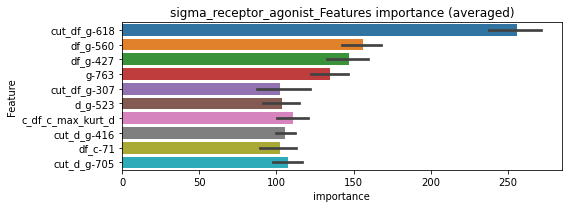

len(train_index) : 2852
len(valid_index) : 951
================================= fold 1/4 sigma_receptor_agonist=================================


Training until validation scores don't improve for 30 rounds


len(train_index) : 2852
len(valid_index) : 951


Early stopping, best iteration is:
[639]	training's binary_logloss: 0.000479895	valid_1's binary_logloss: 0.0078064


================================= fold 2/4 sigma_receptor_agonist=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[919]	training's binary_logloss: 0.000401289	valid_1's binary_logloss: 0.00142138


len(train_index) : 2852
len(valid_index) : 951
================================= fold 3/4 sigma_receptor_agonist=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[887]	training's binary_logloss: 0.000411464	valid_1's binary_logloss: 0.00162305


len(train_index) : 2853
len(valid_index) : 950
================================= fold 4/4 sigma_receptor_agonist=================================


Training until validation scores don't improve for 30 rounds


sigma_receptor_agonist logloss: 0.00777280924688742


Early stopping, best iteration is:
[357]	training's binary_logloss: 0.000809023	valid_1's binary_logloss: 0.0202535
neg labels: 3289 → selected neg labels: 3285


sigma_receptor_antagonist, len(trt): 36, len(othr): 3285
target_rate: 0.0015117 → Adj_target_rate: 0.0017663
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00225012	valid_1's binary_logloss: 0.0143887
[600]	training's binary_logloss: 0.000461514	valid_1's binary_logloss: 0.00995996
Early stopping, best iteration is:
[642]	training's binary_logloss: 0.000431671	valid_1's binary_logloss: 0.00979376
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00226096	valid_1's binary_logloss: 0.00923324
[600]	training's binary_logloss: 0.00044895	valid_1's binary_logloss: 0.00420618
Early stopping, best iteration is:
[629]	training's binary_logloss: 0.000430959	valid_1's binary_logloss: 0.00417398
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00243162	valid_1's binary_logloss: 0.00525013
[600]	training's binary_logloss: 0.000474592	valid_1's binary_logloss: 0.00163014
Early stopping, best iteration is:
[661]	training's binary_logloss: 0.000436661	valid_1's binary

1 / 3 AUC score:1.000
y_Threshold: 0.0028175, Threshold: 0.0086874, pos_neg_ratio: 0.8000000
Remove_noisy_data: 132 → Positive_corect_labels: 657/3810
p_label_rate: 0.0100452 Vs.target_rate: 0.00151
Num_p_label: 40.0, conf_0:0.00608, conf_1:0.01129
Num_p_label: 40.0, Expected: 6.0, Adj_threshold_1: 0.0086874
Num_p_label: 2.0, Expected: 6.0, Adj_threshold_2: 0.0486874
threshold: 0.0486874, positive_p_label: 2.0/3982, p_label_rate: 0.0005023
positive_y_label: 657.0/3810, y_label_rate: 0.1724409
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00202827	valid_1's binary_logloss: 0.0125065
[600]	training's binary_logloss: 0.000442017	valid_1's binary_logloss: 0.00825262
Early stopping, best iteration is:
[635]	training's binary_logloss: 0.00042207	valid_1's binary_logloss: 0.00817452
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00212507	valid_1's binary_logloss: 0.00792278
[600]	training's binary_logloss: 0.000444857	valid_1's binary_logloss: 0.00380612
Early stopping, best iteration is:
[643]	training's binary_logloss: 0.000421781	valid_1's binary_logloss: 0.00374692
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00222316	valid_1's binary_logloss: 0.00497753
[600]	training's binary_logloss: 0.000459796	valid_1's binary_logloss: 0.00176801
Early stopping, best iteration is:
[659]	training's binary_logloss: 0.000422753	valid_1's binary

2 / 3 AUC score:1.000
y_Threshold: 0.0407617, Threshold: 0.0486874, pos_neg_ratio: 0.8000000
Remove_noisy_data: 0 → Positive_corect_labels: 657.0/3810
p_label_rate: 0.0015068 Vs.target_rate: 0.00151
Num_p_label: 6.0, conf_0:0.03895, conf_1:0.05842
threshold: 0.0486874, positive_p_label: 6.0/3982, p_label_rate: 0.0015068
positive_y_label: 657.0/3810, y_label_rate: 0.1724409
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00202827	valid_1's binary_logloss: 0.0125065
[600]	training's binary_logloss: 0.000442017	valid_1's binary_logloss: 0.00825262
Early stopping, best iteration is:
[635]	training's binary_logloss: 0.00042207	valid_1's binary_logloss: 0.00817452
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00212507	valid_1's binary_logloss: 0.00792278
[600]	training's binary_logloss: 0.000444857	valid_1's binary_logloss: 0.00380612
Early stopping, best iteration is:
[643]	training's binary_logloss: 0.000421781	valid_1's binary_logloss: 0.00374692
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00222316	valid_1's binary_logloss: 0.00497753
[600]	training's binary_logloss: 0.000459796	valid_1's binary_logloss: 0.00176801
Early stopping, best iteration is:
[659]	training's binary_logloss: 0.000422753	valid_1's binary

3 / 3 AUC score:1.000
y_Threshold: 0.0407617, Threshold: 0.0486874, pos_neg_ratio: 0.8000000
Remove_noisy_data: 0 → Positive_corect_labels: 657.0/3810
p_label_rate: 0.0015068 Vs.target_rate: 0.00151
Num_p_label: 6.0, conf_0:0.04382, conf_1:0.05356
threshold: 0.0486874, positive_p_label: 6.0/3982, p_label_rate: 0.0015068
positive_y_label: 657.0/3810, y_label_rate: 0.1724409


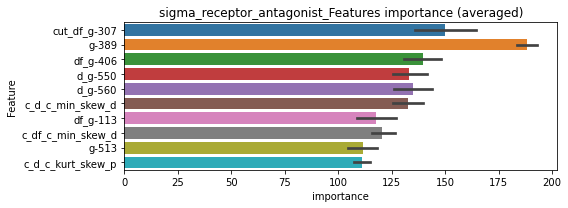

len(train_index) : 2857
len(valid_index) : 953
================================= fold 1/4 sigma_receptor_antagonist=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[892]	training's binary_logloss: 0.000425954	valid_1's binary_logloss: 0.00829892


len(train_index) : 2857
len(valid_index) : 953
================================= fold 2/4 sigma_receptor_antagonist=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[922]	training's binary_logloss: 0.000418444	valid_1's binary_logloss: 0.00373038


len(train_index) : 2858
len(valid_index) : 952
================================= fold 3/4 sigma_receptor_antagonist=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[834]	training's binary_logloss: 0.000449151	valid_1's binary_logloss: 0.00190225


len(train_index) : 2858
len(valid_index) : 952
================================= fold 4/4 sigma_receptor_antagonist=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[710]	training's binary_logloss: 0.000476876	valid_1's binary_logloss: 0.00783307


sigma_receptor_antagonist logloss: 0.005442819423212665


neg labels: 3289 → selected neg labels: 3285


smoothened_receptor_antagonist, len(trt): 25, len(othr): 3285
target_rate: 0.0010498 → Adj_target_rate: 0.0012955
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00131793	valid_1's binary_logloss: 0.00341755
[600]	training's binary_logloss: 0.000339822	valid_1's binary_logloss: 0.00147923
Early stopping, best iteration is:
[629]	training's binary_logloss: 0.000335473	valid_1's binary_logloss: 0.00146417
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00125055	valid_1's binary_logloss: 0.00873205
[600]	training's binary_logloss: 0.000326079	valid_1's binary_logloss: 0.00611456
Early stopping, best iteration is:
[624]	training's binary_logloss: 0.000321728	valid_1's binary_logloss: 0.0060977
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.001317	valid_1's binary_logloss: 0.00203515
[600]	training's binary_logloss: 0.000338345	valid_1's binary_logloss: 0.000620202
Early stopping, best iteration is:
[619]	training's binary_logloss: 0.000335303	valid_1's binary

1 / 3 AUC score:1.000
y_Threshold: 0.0018748, Threshold: 0.0047856, pos_neg_ratio: 0.8000000
Remove_noisy_data: 132 → Positive_corect_labels: 657/3810
p_label_rate: 0.0100452 Vs.target_rate: 0.00105
Num_p_label: 40.0, conf_0:0.00335, conf_1:0.00622
Num_p_label: 40.0, Expected: 4.2, Adj_threshold_1: 0.0047856
Num_p_label: 0.0, Expected: 4.2, Adj_threshold_2: 0.0447856
threshold: 0.0447856, positive_p_label: 0.0/3982, p_label_rate: 0.0000000
positive_y_label: 657.0/3810, y_label_rate: 0.1724409
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00124439	valid_1's binary_logloss: 0.0028663
[600]	training's binary_logloss: 0.000328822	valid_1's binary_logloss: 0.00116087
Early stopping, best iteration is:
[599]	training's binary_logloss: 0.000328822	valid_1's binary_logloss: 0.00116087
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00121306	valid_1's binary_logloss: 0.00723084
Early stopping, best iteration is:
[556]	training's binary_logloss: 0.000333774	valid_1's binary_logloss: 0.00501641
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00123904	valid_1's binary_logloss: 0.00215419
[600]	training's binary_logloss: 0.000328	valid_1's binary_logloss: 0.000670356
Early stopping, best iteration is:
[637]	training's binary_logloss: 0.000320641	valid_1's binary_logloss: 0.000658341
Training until validation scores don't improve for 30 rounds


2 / 3 AUC score:1.000
y_Threshold: 0.0265931, Threshold: 0.0447856, pos_neg_ratio: 0.8000000
Remove_noisy_data: 0 → Positive_corect_labels: 657.0/3810
p_label_rate: 0.0000000 Vs.target_rate: 0.00105
Num_p_label: 0.0, conf_0:0.03583, conf_1:0.05374
Num_p_label: 0.0, Expected: 4.2, Adj_threshold_1: 0.0447856
threshold: 0.0447856, positive_p_label: 0.0/3982, p_label_rate: 0.0000000
positive_y_label: 657.0/3810, y_label_rate: 0.1724409
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00124439	valid_1's binary_logloss: 0.0028663
[600]	training's binary_logloss: 0.000328822	valid_1's binary_logloss: 0.00116087
Early stopping, best iteration is:
[599]	training's binary_logloss: 0.000328822	valid_1's binary_logloss: 0.00116087
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00121306	valid_1's binary_logloss: 0.00723084
Early stopping, best iteration is:
[556]	training's binary_logloss: 0.000333774	valid_1's binary_logloss: 0.00501641
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00123904	valid_1's binary_logloss: 0.00215419
[600]	training's binary_logloss: 0.000328	valid_1's binary_logloss: 0.000670356
Early stopping, best iteration is:
[637]	training's binary_logloss: 0.000320641	valid_1's binary_logloss: 0.000658341
Training until validation scores don't improve for 30 rounds


3 / 3 AUC score:1.000
y_Threshold: 0.0265931, Threshold: 0.0447856, pos_neg_ratio: 0.8000000
Remove_noisy_data: 0 → Positive_corect_labels: 657.0/3810
p_label_rate: 0.0000000 Vs.target_rate: 0.00105
Num_p_label: 0.0, conf_0:0.04031, conf_1:0.04926
Num_p_label: 0.0, Expected: 4.2, Adj_threshold_1: 0.0447856
threshold: 0.0447856, positive_p_label: 0.0/3982, p_label_rate: 0.0000000
positive_y_label: 657.0/3810, y_label_rate: 0.1724409


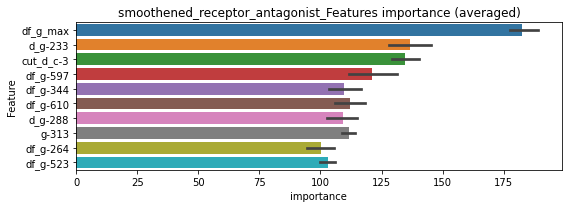

len(train_index) : 2857
len(valid_index) : 953
================================= fold 1/4 smoothened_receptor_antagonist=================================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.000325459	valid_1's binary_logloss: 0.0011289
Early stopping, best iteration is:
[1065]	training's binary_logloss: 0.00032305	valid_1's binary_logloss: 0.0011237


len(train_index) : 2857
len(valid_index) : 953
================================= fold 2/4 smoothened_receptor_antagonist=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[870]	training's binary_logloss: 0.000328791	valid_1's binary_logloss: 0.00506735


len(train_index) : 2858
len(valid_index) : 952
================================= fold 3/4 smoothened_receptor_antagonist=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[922]	training's binary_logloss: 0.000329101	valid_1's binary_logloss: 0.000733322


len(train_index) : 2858
len(valid_index) : 952
================================= fold 4/4 smoothened_receptor_antagonist=================================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.000327471	valid_1's binary_logloss: 0.000892605
Early stopping, best iteration is:
[974]	training's binary_logloss: 0.000327471	valid_1's binary_logloss: 0.000892605


smoothened_receptor_antagonist logloss: 0.0019548433964389333


neg labels: 3289 → selected neg labels: 3261


sodium_channel_inhibitor, len(trt): 267, len(othr): 3261
target_rate: 0.0112119 → Adj_target_rate: 0.0096991
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0274526	valid_1's binary_logloss: 0.24126
Early stopping, best iteration is:
[292]	training's binary_logloss: 0.0291436	valid_1's binary_logloss: 0.240684
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0271638	valid_1's binary_logloss: 0.246771
Early stopping, best iteration is:
[289]	training's binary_logloss: 0.0296602	valid_1's binary_logloss: 0.24634
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0286035	valid_1's binary_logloss: 0.222059
Early stopping, best iteration is:
[344]	training's binary_logloss: 0.0210527	valid_1's binary_logloss: 0.219584
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0266093	valid_1's binary_logloss: 0.208697


1 / 3 AUC score:0.914
y_Threshold: 0.0717466, Threshold: 0.1743260, pos_neg_ratio: 0.8000000
Remove_noisy_data: 415 → Positive_corect_labels: 510/3498
p_label_rate: 0.0100452 Vs.target_rate: 0.01121
Num_p_label: 40.0, conf_0:0.12203, conf_1:0.22662


Early stopping, best iteration is:
[338]	training's binary_logloss: 0.0202108	valid_1's binary_logloss: 0.206589


threshold: 0.1743260, positive_p_label: 40.0/3982, p_label_rate: 0.0100452
positive_y_label: 510.0/3498, y_label_rate: 0.1457976
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0116276	valid_1's binary_logloss: 0.129353
Early stopping, best iteration is:
[425]	training's binary_logloss: 0.00443822	valid_1's binary_logloss: 0.124004
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0126091	valid_1's binary_logloss: 0.114077
Early stopping, best iteration is:
[499]	training's binary_logloss: 0.00308041	valid_1's binary_logloss: 0.106477
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0125037	valid_1's binary_logloss: 0.126788
Early stopping, best iteration is:
[410]	training's binary_logloss: 0.00524348	valid_1's binary_logloss: 0.123415
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0124762	valid_1's binary_logloss: 0.12542


2 / 3 AUC score:0.987
y_Threshold: 0.0503066, Threshold: 0.1743260, pos_neg_ratio: 0.8000000
Remove_noisy_data: 80 → Positive_corect_labels: 470.0/3418
p_label_rate: 0.0128076 Vs.target_rate: 0.01121
Num_p_label: 51.0, conf_0:0.13946, conf_1:0.20919


Early stopping, best iteration is:
[394]	training's binary_logloss: 0.00594243	valid_1's binary_logloss: 0.122054


threshold: 0.1743260, positive_p_label: 51.0/3982, p_label_rate: 0.0128076
positive_y_label: 470.0/3418, y_label_rate: 0.1375073
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00854904	valid_1's binary_logloss: 0.107738
Early stopping, best iteration is:
[438]	training's binary_logloss: 0.00303573	valid_1's binary_logloss: 0.103705
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00912917	valid_1's binary_logloss: 0.0825552
[600]	training's binary_logloss: 0.00154896	valid_1's binary_logloss: 0.0711889
Early stopping, best iteration is:
[712]	training's binary_logloss: 0.00113652	valid_1's binary_logloss: 0.0699164
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00995035	valid_1's binary_logloss: 0.0811067
Early stopping, best iteration is:
[537]	training's binary_logloss: 0.00201725	valid_1's binary_logloss: 0.0714683
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00945123	valid_1's binary_logloss: 0.10138


3 / 3 AUC score:0.997
y_Threshold: 0.0483354, Threshold: 0.1743260, pos_neg_ratio: 0.8000000
Remove_noisy_data: 34 → Positive_corect_labels: 453.0/3384


Early stopping, best iteration is:
[443]	training's binary_logloss: 0.00324463	valid_1's binary_logloss: 0.0961191


p_label_rate: 0.0143144 Vs.target_rate: 0.01121
Num_p_label: 57.0, conf_0:0.15689, conf_1:0.19176
threshold: 0.1743260, positive_p_label: 57.0/3982, p_label_rate: 0.0143144
positive_y_label: 453.0/3384, y_label_rate: 0.1338652


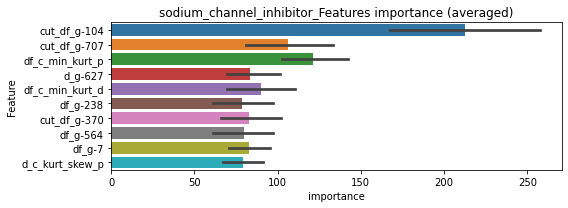

len(train_index) : 2538
len(valid_index) : 846
================================= fold 1/4 sodium_channel_inhibitor=================================


Training until validation scores don't improve for 30 rounds


len(train_index) : 2538
len(valid_index) : 846
================================= fold 2/4 sodium_channel_inhibitor=================================


Early stopping, best iteration is:
[293]	training's binary_logloss: 0.00298953	valid_1's binary_logloss: 0.096618
Training until validation scores don't improve for 30 rounds


len(train_index) : 2538
len(valid_index) : 846
================================= fold 3/4 sodium_channel_inhibitor=================================


Early stopping, best iteration is:
[362]	training's binary_logloss: 0.00237927	valid_1's binary_logloss: 0.0612393
Training until validation scores don't improve for 30 rounds


len(train_index) : 2538
len(valid_index) : 846
================================= fold 4/4 sodium_channel_inhibitor=================================


Early stopping, best iteration is:
[254]	training's binary_logloss: 0.00390852	valid_1's binary_logloss: 0.0726559
Training until validation scores don't improve for 30 rounds


sodium_channel_inhibitor logloss: 0.0805313560334745
sodium_channel_inhibitor clipping


Early stopping, best iteration is:
[317]	training's binary_logloss: 0.00274914	valid_1's binary_logloss: 0.0916122
neg labels: 3289 → selected neg labels: 3282


sphingosine_receptor_agonist, len(trt): 32, len(othr): 3282
target_rate: 0.0013437 → Adj_target_rate: 0.0015980
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00177662	valid_1's binary_logloss: 0.00883876
[600]	training's binary_logloss: 0.000394794	valid_1's binary_logloss: 0.00475316
Early stopping, best iteration is:
[618]	training's binary_logloss: 0.000387186	valid_1's binary_logloss: 0.00471891
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00168136	valid_1's binary_logloss: 0.0084551
[600]	training's binary_logloss: 0.000396787	valid_1's binary_logloss: 0.00606801
Early stopping, best iteration is:
[573]	training's binary_logloss: 0.000410968	valid_1's binary_logloss: 0.00605047
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00178443	valid_1's binary_logloss: 0.00579189
[600]	training's binary_logloss: 0.000401011	valid_1's binary_logloss: 0.00364889
Early stopping, best iteration is:
[581]	training's binary_logloss: 0.000411719	valid_1's binar

1 / 3 AUC score:1.000
y_Threshold: 0.0023653, Threshold: 0.0065633, pos_neg_ratio: 0.8000000
Remove_noisy_data: 132 → Positive_corect_labels: 656/3806
p_label_rate: 0.0100452 Vs.target_rate: 0.00134
Num_p_label: 40.0, conf_0:0.00459, conf_1:0.00853
Num_p_label: 40.0, Expected: 5.4, Adj_threshold_1: 0.0065633
Num_p_label: 2.0, Expected: 5.4, Adj_threshold_2: 0.0465633
threshold: 0.0465633, positive_p_label: 2.0/3982, p_label_rate: 0.0005023
positive_y_label: 656.0/3806, y_label_rate: 0.1723594
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00164066	valid_1's binary_logloss: 0.00713241
[600]	training's binary_logloss: 0.000387034	valid_1's binary_logloss: 0.0035996
Early stopping, best iteration is:
[577]	training's binary_logloss: 0.000397994	valid_1's binary_logloss: 0.00358277
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00162557	valid_1's binary_logloss: 0.00863466
[600]	training's binary_logloss: 0.000391169	valid_1's binary_logloss: 0.00650949
Early stopping, best iteration is:
[597]	training's binary_logloss: 0.000393161	valid_1's binary_logloss: 0.00650823
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00172459	valid_1's binary_logloss: 0.00625571
Early stopping, best iteration is:
[508]	training's binary_logloss: 0.000485003	valid_1's binary_logloss: 0.00458378
Training until validation scores don't improve for 30 rounds

2 / 3 AUC score:1.000
y_Threshold: 0.0119508, Threshold: 0.0465633, pos_neg_ratio: 0.8000000
Remove_noisy_data: 2 → Positive_corect_labels: 655.0/3804
p_label_rate: 0.0020090 Vs.target_rate: 0.00134
Num_p_label: 8.0, conf_0:0.03725, conf_1:0.05588
threshold: 0.0465633, positive_p_label: 8.0/3982, p_label_rate: 0.0020090
positive_y_label: 655.0/3804, y_label_rate: 0.1721872
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00161219	valid_1's binary_logloss: 0.00809363
[600]	training's binary_logloss: 0.000388166	valid_1's binary_logloss: 0.00370258
Early stopping, best iteration is:
[656]	training's binary_logloss: 0.000373581	valid_1's binary_logloss: 0.00367419
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00167971	valid_1's binary_logloss: 0.00577136
[600]	training's binary_logloss: 0.000389185	valid_1's binary_logloss: 0.0029512
Early stopping, best iteration is:
[623]	training's binary_logloss: 0.000381489	valid_1's binary_logloss: 0.00294693
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00164433	valid_1's binary_logloss: 0.00568162
[600]	training's binary_logloss: 0.000386763	valid_1's binary_logloss: 0.00260581
Early stopping, best iteration is:
[609]	training's binary_logloss: 0.000383143	valid_1's binar

3 / 3 AUC score:1.000
y_Threshold: 0.0495072, Threshold: 0.0465633, pos_neg_ratio: 0.8000000


[600]	training's binary_logloss: 0.000378738	valid_1's binary_logloss: 0.00558257
Early stopping, best iteration is:
[573]	training's binary_logloss: 0.000392941	valid_1's binary_logloss: 0.00556088


Remove_noisy_data: 0 → Positive_corect_labels: 655.0/3804
p_label_rate: 0.0020090 Vs.target_rate: 0.00134
Num_p_label: 8.0, conf_0:0.04191, conf_1:0.05122
threshold: 0.0465633, positive_p_label: 8.0/3982, p_label_rate: 0.0020090
positive_y_label: 655.0/3804, y_label_rate: 0.1721872


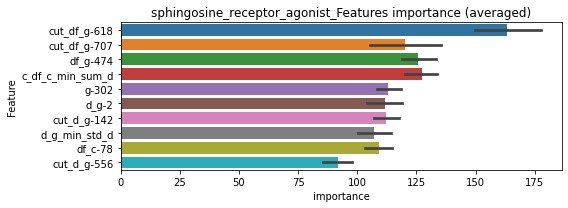

len(train_index) : 2853
len(valid_index) : 951
================================= fold 1/4 sphingosine_receptor_agonist=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[879]	training's binary_logloss: 0.000384898	valid_1's binary_logloss: 0.00340685


len(train_index) : 2853
len(valid_index) : 951
================================= fold 2/4 sphingosine_receptor_agonist=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[798]	training's binary_logloss: 0.000405094	valid_1's binary_logloss: 0.00291204


len(train_index) : 2853
len(valid_index) : 951
================================= fold 3/4 sphingosine_receptor_agonist=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[869]	training's binary_logloss: 0.000389994	valid_1's binary_logloss: 0.00261212


len(train_index) : 2853
len(valid_index) : 951
================================= fold 4/4 sphingosine_receptor_agonist=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[746]	training's binary_logloss: 0.000408096	valid_1's binary_logloss: 0.00473461


sphingosine_receptor_agonist logloss: 0.003417316564664833


neg labels: 3289 → selected neg labels: 3278


src_inhibitor, len(trt): 71, len(othr): 3278
target_rate: 0.0029814 → Adj_target_rate: 0.0031461
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00455529	valid_1's binary_logloss: 0.0320119
[600]	training's binary_logloss: 0.000815154	valid_1's binary_logloss: 0.0221726
Early stopping, best iteration is:
[824]	training's binary_logloss: 0.000579191	valid_1's binary_logloss: 0.0217353
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00491536	valid_1's binary_logloss: 0.0258103
[600]	training's binary_logloss: 0.000858943	valid_1's binary_logloss: 0.0162015
Early stopping, best iteration is:
[803]	training's binary_logloss: 0.000601592	valid_1's binary_logloss: 0.0154643
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00533866	valid_1's binary_logloss: 0.0294745
[600]	training's binary_logloss: 0.000876003	valid_1's binary_logloss: 0.0213989
Early stopping, best iteration is:
[612]	training's binary_logloss: 0.000844	valid_1's binary_logloss:

1 / 3 AUC score:1.000
y_Threshold: 0.0064146, Threshold: 0.0269514, pos_neg_ratio: 0.8000000
Remove_noisy_data: 136 → Positive_corect_labels: 653/3797
p_label_rate: 0.0100452 Vs.target_rate: 0.00298
Num_p_label: 40.0, conf_0:0.01887, conf_1:0.03504
Num_p_label: 40.0, Expected: 11.9, Adj_threshold_1: 0.0269514
Num_p_label: 10.0, Expected: 11.9, Adj_threshold_2: 0.0669514
threshold: 0.0669514, positive_p_label: 10.0/3982, p_label_rate: 0.0025113
positive_y_label: 653.0/3797, y_label_rate: 0.1719779
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00411274	valid_1's binary_logloss: 0.0389911
Early stopping, best iteration is:
[448]	training's binary_logloss: 0.0013825	valid_1's binary_logloss: 0.0342197
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00426921	valid_1's binary_logloss: 0.0282463
Early stopping, best iteration is:
[544]	training's binary_logloss: 0.000940796	valid_1's binary_logloss: 0.019277
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00426963	valid_1's binary_logloss: 0.0447545
[600]	training's binary_logloss: 0.000786767	valid_1's binary_logloss: 0.0357303
Early stopping, best iteration is:
[686]	training's binary_logloss: 0.000647465	valid_1's binary_logloss: 0.0352854
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00442379	valid_1's binary_logloss: 0.0293657
Early stop

2 / 3 AUC score:1.000
y_Threshold: 0.0221945, Threshold: 0.0669514, pos_neg_ratio: 0.8000000
Remove_noisy_data: 12 → Positive_corect_labels: 647.0/3785
p_label_rate: 0.0133099 Vs.target_rate: 0.00298
Num_p_label: 53.0, conf_0:0.05356, conf_1:0.08034
Num_p_label: 53.0, Expected: 11.9, Adj_threshold_1: 0.0669514
Num_p_label: 34.0, Expected: 11.9, Adj_threshold_2: 0.1069514
Num_p_label: 24.0, Expected: 11.9, Adj_threshold_3: 0.1469514
Num_p_label: 20.0, Expected: 11.9, Adj_threshold_4: 0.1869514
Num_p_label: 16.0, Expected: 11.9, Adj_threshold_5: 0.2269514
threshold: 0.2269514, positive_p_label: 16.0/3982, p_label_rate: 0.0040181
positive_y_label: 647.0/3785, y_label_rate: 0.1709379
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00391854	valid_1's binary_logloss: 0.0343699
[600]	training's binary_logloss: 0.000734035	valid_1's binary_logloss: 0.027621
Early stopping, best iteration is:
[667]	training's binary_logloss: 0.000630827	valid_1's binary_logloss: 0.02716
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00419699	valid_1's binary_logloss: 0.0235423
[600]	training's binary_logloss: 0.000772702	valid_1's binary_logloss: 0.0157934
Early stopping, best iteration is:
[664]	training's binary_logloss: 0.000660542	valid_1's binary_logloss: 0.0155627
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00415369	valid_1's binary_logloss: 0.0279832
[600]	training's binary_logloss: 0.000770197	valid_1's binary_logloss: 0.0186171
Early stopping, best iteration is:
[691]	training's binary_logloss: 0.000629524	valid_1's binary_logloss:

3 / 3 AUC score:1.000
y_Threshold: 0.0329909, Threshold: 0.2269514, pos_neg_ratio: 0.8000000
Remove_noisy_data: 2 → Positive_corect_labels: 646.0/3783
p_label_rate: 0.0040181 Vs.target_rate: 0.00298
Num_p_label: 16.0, conf_0:0.20426, conf_1:0.24965
threshold: 0.2269514, positive_p_label: 16.0/3982, p_label_rate: 0.0040181
positive_y_label: 646.0/3783, y_label_rate: 0.1707639


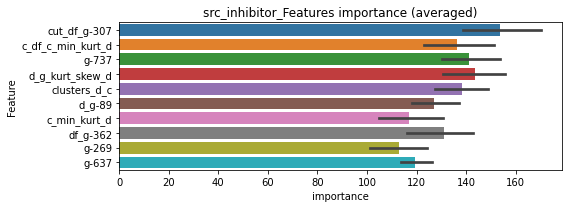

len(train_index) : 2837
len(valid_index) : 946
================================= fold 1/4 src_inhibitor=================================


Training until validation scores don't improve for 30 rounds


len(train_index) : 2837
len(valid_index) : 946
================================= fold 2/4 src_inhibitor=================================


Early stopping, best iteration is:
[441]	training's binary_logloss: 0.00111649	valid_1's binary_logloss: 0.0341648
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[624]	training's binary_logloss: 0.000791804	valid_1's binary_logloss: 0.0268652


len(train_index) : 2837
len(valid_index) : 946
================================= fold 3/4 src_inhibitor=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[803]	training's binary_logloss: 0.000662152	valid_1's binary_logloss: 0.0194679


len(train_index) : 2838
len(valid_index) : 945
================================= fold 4/4 src_inhibitor=================================


Training until validation scores don't improve for 30 rounds


src_inhibitor logloss: 0.026167120620744153
src_inhibitor clipping


Early stopping, best iteration is:
[358]	training's binary_logloss: 0.00144333	valid_1's binary_logloss: 0.0241685
neg labels: 3289 → selected neg labels: 3275


steroid, len(trt): 79, len(othr): 3275
target_rate: 0.0033174 → Adj_target_rate: 0.0034449
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00569123	valid_1's binary_logloss: 0.0551892
Early stopping, best iteration is:
[567]	training's binary_logloss: 0.00106114	valid_1's binary_logloss: 0.0460262
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00583707	valid_1's binary_logloss: 0.0380204
[600]	training's binary_logloss: 0.000977638	valid_1's binary_logloss: 0.0271979
Early stopping, best iteration is:
[608]	training's binary_logloss: 0.00095514	valid_1's binary_logloss: 0.0269358
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00636447	valid_1's binary_logloss: 0.0366988
[600]	training's binary_logloss: 0.00100191	valid_1's binary_logloss: 0.0245146
Early stopping, best iteration is:
[762]	training's binary_logloss: 0.000694258	valid_1's binary_logloss: 0.0237288
Training until validation scores don't improve for 30 rounds
[300]	tra

1 / 3 AUC score:0.999
y_Threshold: 0.0099184, Threshold: 0.2699040, pos_neg_ratio: 0.8000000
Remove_noisy_data: 141 → Positive_corect_labels: 650/3789
p_label_rate: 0.0100452 Vs.target_rate: 0.00332
Num_p_label: 40.0, conf_0:0.18893, conf_1:0.35088
Num_p_label: 40.0, Expected: 13.2, Adj_threshold_1: 0.2699040
Num_p_label: 32.0, Expected: 13.2, Adj_threshold_2: 0.3099040
Num_p_label: 30.0, Expected: 13.2, Adj_threshold_3: 0.3499040
Num_p_label: 28.0, Expected: 13.2, Adj_threshold_4: 0.3899040
Num_p_label: 27.0, Expected: 13.2, Adj_threshold_5: 0.4299040
Num_p_label: 21.0, Expected: 13.2, Adj_threshold_6: 0.4699040
Num_p_label: 18.0, Expected: 13.2, Adj_threshold_7: 0.5099040
threshold: 0.5099040, positive_p_label: 18.0/3982, p_label_rate: 0.0045203
positive_y_label: 650.0/3789, y_label_rate: 0.1715492
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00499033	valid_1's binary_logloss: 0.0454095
Early stopping, best iteration is:
[544]	training's binary_logloss: 0.00105326	valid_1's binary_logloss: 0.0360647
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00500246	valid_1's binary_logloss: 0.0341793
[600]	training's binary_logloss: 0.00088635	valid_1's binary_logloss: 0.0244586
Early stopping, best iteration is:
[710]	training's binary_logloss: 0.000684659	valid_1's binary_logloss: 0.0238744
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00498332	valid_1's binary_logloss: 0.0348877
[600]	training's binary_logloss: 0.000881646	valid_1's binary_logloss: 0.0243167
Early stopping, best iteration is:
[724]	training's binary_logloss: 0.000660948	valid_1's binary_logloss: 0.023393
Training until validation scores don't improve for 30 rounds
[300]	tra

2 / 3 AUC score:1.000
y_Threshold: 0.0391210, Threshold: 0.5099040, pos_neg_ratio: 0.8000000
Remove_noisy_data: 14 → Positive_corect_labels: 643.0/3775
p_label_rate: 0.0160723 Vs.target_rate: 0.00332
Num_p_label: 64.0, conf_0:0.40792, conf_1:0.61188
Num_p_label: 64.0, Expected: 13.2, Adj_threshold_1: 0.5099040
Num_p_label: 59.0, Expected: 13.2, Adj_threshold_2: 0.5499040
Num_p_label: 55.0, Expected: 13.2, Adj_threshold_3: 0.5899040
Num_p_label: 47.0, Expected: 13.2, Adj_threshold_4: 0.6299040
Num_p_label: 37.0, Expected: 13.2, Adj_threshold_5: 0.6699040
Num_p_label: 30.0, Expected: 13.2, Adj_threshold_6: 0.7099040
Num_p_label: 25.0, Expected: 13.2, Adj_threshold_7: 0.7499040
Num_p_label: 17.0, Expected: 13.2, Adj_threshold_8: 0.7899040
threshold: 0.7899040, positive_p_label: 17.0/3982, p_label_rate: 0.0042692
positive_y_label: 643.0/3775, y_label_rate: 0.1703311
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00463255	valid_1's binary_logloss: 0.032075
Early stopping, best iteration is:
[498]	training's binary_logloss: 0.00122351	valid_1's binary_logloss: 0.0239876
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00457193	valid_1's binary_logloss: 0.0364068
[600]	training's binary_logloss: 0.00083266	valid_1's binary_logloss: 0.026073
Early stopping, best iteration is:
[770]	training's binary_logloss: 0.00059384	valid_1's binary_logloss: 0.0246058
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00483939	valid_1's binary_logloss: 0.0280636
[600]	training's binary_logloss: 0.000860051	valid_1's binary_logloss: 0.0181923
Early stopping, best iteration is:
[814]	training's binary_logloss: 0.000592405	valid_1's binary_logloss: 0.0175065
Training until validation scores don't improve for 30 rounds
[300]	train

3 / 3 AUC score:1.000
y_Threshold: 0.0573264, Threshold: 0.7899040, pos_neg_ratio: 0.8000000
Remove_noisy_data: 10 → Positive_corect_labels: 638.0/3765
p_label_rate: 0.0062783 Vs.target_rate: 0.00332
Num_p_label: 25.0, conf_0:0.50000, conf_1:0.80000
Num_p_label: 25.0, Expected: 13.2, Adj_threshold_1: 0.7899040
Num_p_label: 17.0, Expected: 13.2, Adj_threshold_2: 0.8299040
threshold: 0.8299040, positive_p_label: 17.0/3982, p_label_rate: 0.0042692
positive_y_label: 638.0/3765, y_label_rate: 0.1694555


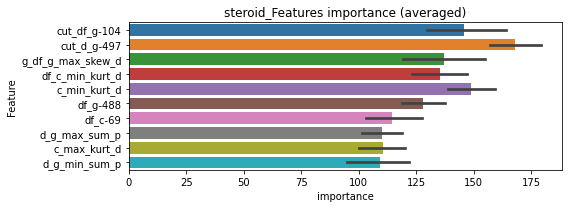

len(train_index) : 2823
len(valid_index) : 942
================================= fold 1/4 steroid=================================


Training until validation scores don't improve for 30 rounds


len(train_index) : 2824
len(valid_index) : 941
================================= fold 2/4 steroid=================================


Early stopping, best iteration is:
[355]	training's binary_logloss: 0.00151932	valid_1's binary_logloss: 0.0425292
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[641]	training's binary_logloss: 0.000812764	valid_1's binary_logloss: 0.0216497


len(train_index) : 2824
len(valid_index) : 941
================================= fold 3/4 steroid=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[643]	training's binary_logloss: 0.000804673	valid_1's binary_logloss: 0.0189267


len(train_index) : 2824
len(valid_index) : 941
================================= fold 4/4 steroid=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[735]	training's binary_logloss: 0.000722836	valid_1's binary_logloss: 0.0131204


steroid logloss: 0.024061415601002775
steroid clipping


neg labels: 3289 → selected neg labels: 3287


syk_inhibitor, len(trt): 19, len(othr): 3287
target_rate: 0.0007979 → Adj_target_rate: 0.0010260
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00107804	valid_1's binary_logloss: 0.00261535
[600]	training's binary_logloss: 0.000306032	valid_1's binary_logloss: 0.00131845
Early stopping, best iteration is:
[575]	training's binary_logloss: 0.000309405	valid_1's binary_logloss: 0.00131714
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00101272	valid_1's binary_logloss: 0.00461928
[600]	training's binary_logloss: 0.000304591	valid_1's binary_logloss: 0.00263488
Early stopping, best iteration is:
[581]	training's binary_logloss: 0.000305882	valid_1's binary_logloss: 0.00263064
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00109055	valid_1's binary_logloss: 0.00181716
Early stopping, best iteration is:
[565]	training's binary_logloss: 0.000313852	valid_1's binary_logloss: 0.000628331
Training until validation scores don't improve for 30 roun

1 / 3 AUC score:1.000
y_Threshold: 0.0015133, Threshold: 0.0043497, pos_neg_ratio: 0.8000000
Remove_noisy_data: 132 → Positive_corect_labels: 657/3812
p_label_rate: 0.0100452 Vs.target_rate: 0.00080
Num_p_label: 40.0, conf_0:0.00304, conf_1:0.00565
Num_p_label: 40.0, Expected: 3.2, Adj_threshold_1: 0.0043497
Num_p_label: 2.0, Expected: 3.2, Adj_threshold_2: 0.0443497


Early stopping, best iteration is:
[568]	training's binary_logloss: 0.000312024	valid_1's binary_logloss: 0.000678859


threshold: 0.0443497, positive_p_label: 2.0/3982, p_label_rate: 0.0005023
positive_y_label: 657.0/3812, y_label_rate: 0.1723505
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00101769	valid_1's binary_logloss: 0.00190989
Early stopping, best iteration is:
[551]	training's binary_logloss: 0.000310669	valid_1's binary_logloss: 0.000729076
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.000954956	valid_1's binary_logloss: 0.00498714
Early stopping, best iteration is:
[541]	training's binary_logloss: 0.000305712	valid_1's binary_logloss: 0.00312337
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00102194	valid_1's binary_logloss: 0.00176123
Early stopping, best iteration is:
[549]	training's binary_logloss: 0.00031054	valid_1's binary_logloss: 0.000653176
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.000984387	valid_1's binary_logloss: 0.00172497


2 / 3 AUC score:1.000
y_Threshold: 0.0656602, Threshold: 0.0443497, pos_neg_ratio: 0.8000000
Remove_noisy_data: 0 → Positive_corect_labels: 657.0/3812
p_label_rate: 0.0010045 Vs.target_rate: 0.00080
Num_p_label: 4.0, conf_0:0.03548, conf_1:0.05322


Early stopping, best iteration is:
[562]	training's binary_logloss: 0.000308423	valid_1's binary_logloss: 0.000650908


threshold: 0.0443497, positive_p_label: 4.0/3982, p_label_rate: 0.0010045
positive_y_label: 657.0/3812, y_label_rate: 0.1723505
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00101769	valid_1's binary_logloss: 0.00190989
Early stopping, best iteration is:
[551]	training's binary_logloss: 0.000310669	valid_1's binary_logloss: 0.000729076
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.000954956	valid_1's binary_logloss: 0.00498714
Early stopping, best iteration is:
[541]	training's binary_logloss: 0.000305712	valid_1's binary_logloss: 0.00312337
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00102194	valid_1's binary_logloss: 0.00176123
Early stopping, best iteration is:
[549]	training's binary_logloss: 0.00031054	valid_1's binary_logloss: 0.000653176
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.000984387	valid_1's binary_logloss: 0.00172497


3 / 3 AUC score:1.000
y_Threshold: 0.0656602, Threshold: 0.0443497, pos_neg_ratio: 0.8000000
Remove_noisy_data: 0 → Positive_corect_labels: 657.0/3812
p_label_rate: 0.0010045 Vs.target_rate: 0.00080
Num_p_label: 4.0, conf_0:0.03991, conf_1:0.04878


Early stopping, best iteration is:
[562]	training's binary_logloss: 0.000308423	valid_1's binary_logloss: 0.000650908


threshold: 0.0443497, positive_p_label: 4.0/3982, p_label_rate: 0.0010045
positive_y_label: 657.0/3812, y_label_rate: 0.1723505


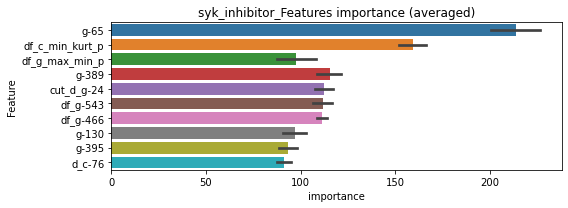

len(train_index) : 2859
len(valid_index) : 953
================================= fold 1/4 syk_inhibitor=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[846]	training's binary_logloss: 0.000312045	valid_1's binary_logloss: 0.000578286


len(train_index) : 2859
len(valid_index) : 953
================================= fold 2/4 syk_inhibitor=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[835]	training's binary_logloss: 0.00030723	valid_1's binary_logloss: 0.00321631


len(train_index) : 2859
len(valid_index) : 953
================================= fold 3/4 syk_inhibitor=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[866]	training's binary_logloss: 0.000311622	valid_1's binary_logloss: 0.000643756


len(train_index) : 2859
len(valid_index) : 953
================================= fold 4/4 syk_inhibitor=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[933]	training's binary_logloss: 0.000305962	valid_1's binary_logloss: 0.000595255


syk_inhibitor logloss: 0.0012584857612998042


neg labels: 3289 → selected neg labels: 3278


tachykinin_antagonist, len(trt): 60, len(othr): 3278
target_rate: 0.0025195 → Adj_target_rate: 0.0027266
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00403799	valid_1's binary_logloss: 0.0226671
[600]	training's binary_logloss: 0.00072643	valid_1's binary_logloss: 0.0145357
Early stopping, best iteration is:
[696]	training's binary_logloss: 0.000589999	valid_1's binary_logloss: 0.0142182
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00433618	valid_1's binary_logloss: 0.0180566
[600]	training's binary_logloss: 0.000742152	valid_1's binary_logloss: 0.00884562
Early stopping, best iteration is:
[749]	training's binary_logloss: 0.000570749	valid_1's binary_logloss: 0.00828875
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00440444	valid_1's binary_logloss: 0.021227
[600]	training's binary_logloss: 0.000743376	valid_1's binary_logloss: 0.0133508
Early stopping, best iteration is:
[751]	training's binary_logloss: 0.000560043	valid_1's binary_loglo

1 / 3 AUC score:1.000
y_Threshold: 0.0043852, Threshold: 0.0109301, pos_neg_ratio: 0.8000000
Remove_noisy_data: 132 → Positive_corect_labels: 655/3801
p_label_rate: 0.0100452 Vs.target_rate: 0.00252
Num_p_label: 40.0, conf_0:0.00765, conf_1:0.01421
Num_p_label: 40.0, Expected: 10.0, Adj_threshold_1: 0.0109301
Num_p_label: 3.0, Expected: 10.0, Adj_threshold_2: 0.0509301
threshold: 0.0509301, positive_p_label: 3.0/3982, p_label_rate: 0.0007534
positive_y_label: 655.0/3801, y_label_rate: 0.1723231
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00379239	valid_1's binary_logloss: 0.0234279
[600]	training's binary_logloss: 0.000701424	valid_1's binary_logloss: 0.016131
Early stopping, best iteration is:
[754]	training's binary_logloss: 0.000548852	valid_1's binary_logloss: 0.0158697
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00406737	valid_1's binary_logloss: 0.0156766
[600]	training's binary_logloss: 0.000728729	valid_1's binary_logloss: 0.00791073
Early stopping, best iteration is:
[783]	training's binary_logloss: 0.00054882	valid_1's binary_logloss: 0.0073925
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00390497	valid_1's binary_logloss: 0.0176221
[600]	training's binary_logloss: 0.000708671	valid_1's binary_logloss: 0.0106501
Early stopping, best iteration is:
[691]	training's binary_logloss: 0.000583321	valid_1's binary_loglos

2 / 3 AUC score:1.000
y_Threshold: 0.0156105, Threshold: 0.0509301, pos_neg_ratio: 0.8000000
Remove_noisy_data: 4 → Positive_corect_labels: 653.0/3797
p_label_rate: 0.0022602 Vs.target_rate: 0.00252
Num_p_label: 9.0, conf_0:0.04074, conf_1:0.06112
threshold: 0.0509301, positive_p_label: 9.0/3982, p_label_rate: 0.0022602
positive_y_label: 653.0/3797, y_label_rate: 0.1719779
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00371759	valid_1's binary_logloss: 0.0213858
[600]	training's binary_logloss: 0.000697609	valid_1's binary_logloss: 0.0126345
Early stopping, best iteration is:
[735]	training's binary_logloss: 0.000549489	valid_1's binary_logloss: 0.0120607
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0037561	valid_1's binary_logloss: 0.0260147
[600]	training's binary_logloss: 0.000677481	valid_1's binary_logloss: 0.0198322
Early stopping, best iteration is:
[724]	training's binary_logloss: 0.000542991	valid_1's binary_logloss: 0.0193822
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00382881	valid_1's binary_logloss: 0.0291899
[600]	training's binary_logloss: 0.000699414	valid_1's binary_logloss: 0.0208318
Early stopping, best iteration is:
[644]	training's binary_logloss: 0.000628398	valid_1's binary_loglos

3 / 3 AUC score:1.000
y_Threshold: 0.0242005, Threshold: 0.0509301, pos_neg_ratio: 0.8000000
Remove_noisy_data: 2 → Positive_corect_labels: 652.0/3795
p_label_rate: 0.0020090 Vs.target_rate: 0.00252
Num_p_label: 8.0, conf_0:0.04584, conf_1:0.05602
threshold: 0.0509301, positive_p_label: 8.0/3982, p_label_rate: 0.0020090
positive_y_label: 652.0/3795, y_label_rate: 0.1718050


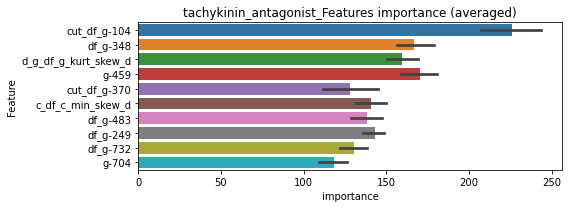

len(train_index) : 2846
len(valid_index) : 949
================================= fold 1/4 tachykinin_antagonist=================================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.000544075	valid_1's binary_logloss: 0.0092035
Early stopping, best iteration is:
[978]	training's binary_logloss: 0.000549002	valid_1's binary_logloss: 0.0092


len(train_index) : 2846
len(valid_index) : 949
================================= fold 2/4 tachykinin_antagonist=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[716]	training's binary_logloss: 0.000658211	valid_1's binary_logloss: 0.0169255


len(train_index) : 2846
len(valid_index) : 949
================================= fold 3/4 tachykinin_antagonist=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[962]	training's binary_logloss: 0.000556899	valid_1's binary_logloss: 0.00940509


len(train_index) : 2847
len(valid_index) : 948
================================= fold 4/4 tachykinin_antagonist=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[924]	training's binary_logloss: 0.000558327	valid_1's binary_logloss: 0.0151537


tachykinin_antagonist logloss: 0.01267165168294832


neg labels: 3289 → selected neg labels: 3285


tgf-beta_receptor_inhibitor, len(trt): 30, len(othr): 3285
target_rate: 0.0012598 → Adj_target_rate: 0.0015127
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00204855	valid_1's binary_logloss: 0.0069921
[600]	training's binary_logloss: 0.000430696	valid_1's binary_logloss: 0.00278354
Early stopping, best iteration is:
[677]	training's binary_logloss: 0.000401332	valid_1's binary_logloss: 0.00266275
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00201778	valid_1's binary_logloss: 0.00758572
[600]	training's binary_logloss: 0.000435754	valid_1's binary_logloss: 0.00381147
Early stopping, best iteration is:
[654]	training's binary_logloss: 0.000408448	valid_1's binary_logloss: 0.00376943
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00194188	valid_1's binary_logloss: 0.00417385
[600]	training's binary_logloss: 0.000435567	valid_1's binary_logloss: 0.00127511
Early stopping, best iteration is:
[685]	training's binary_logloss: 0.000402375	valid_1's binar

1 / 3 AUC score:1.000
y_Threshold: 0.0029079, Threshold: 0.0081225, pos_neg_ratio: 0.8000000
Remove_noisy_data: 132 → Positive_corect_labels: 657/3810
p_label_rate: 0.0100452 Vs.target_rate: 0.00126
Num_p_label: 40.0, conf_0:0.00569, conf_1:0.01056
Num_p_label: 40.0, Expected: 5.0, Adj_threshold_1: 0.0081225
Num_p_label: 0.0, Expected: 5.0, Adj_threshold_2: 0.0481225
threshold: 0.0481225, positive_p_label: 0.0/3982, p_label_rate: 0.0000000
positive_y_label: 657.0/3810, y_label_rate: 0.1724409
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00189643	valid_1's binary_logloss: 0.00752025
[600]	training's binary_logloss: 0.000423938	valid_1's binary_logloss: 0.00350214
Early stopping, best iteration is:
[682]	training's binary_logloss: 0.00039453	valid_1's binary_logloss: 0.00342245
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00177714	valid_1's binary_logloss: 0.00620174
[600]	training's binary_logloss: 0.000415038	valid_1's binary_logloss: 0.00301156
Early stopping, best iteration is:
[632]	training's binary_logloss: 0.000397334	valid_1's binary_logloss: 0.00295069
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00183978	valid_1's binary_logloss: 0.00331419
[600]	training's binary_logloss: 0.000428929	valid_1's binary_logloss: 0.000997578
Early stopping, best iteration is:
[681]	training's binary_logloss: 0.000401072	valid_1's bina

2 / 3 AUC score:1.000
y_Threshold: 0.0328239, Threshold: 0.0481225, pos_neg_ratio: 0.8000000
Remove_noisy_data: 0 → Positive_corect_labels: 657.0/3810
p_label_rate: 0.0015068 Vs.target_rate: 0.00126
Num_p_label: 6.0, conf_0:0.03850, conf_1:0.05775
threshold: 0.0481225, positive_p_label: 6.0/3982, p_label_rate: 0.0015068
positive_y_label: 657.0/3810, y_label_rate: 0.1724409
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00189643	valid_1's binary_logloss: 0.00752025
[600]	training's binary_logloss: 0.000423938	valid_1's binary_logloss: 0.00350214
Early stopping, best iteration is:
[682]	training's binary_logloss: 0.00039453	valid_1's binary_logloss: 0.00342245
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00177714	valid_1's binary_logloss: 0.00620174
[600]	training's binary_logloss: 0.000415038	valid_1's binary_logloss: 0.00301156
Early stopping, best iteration is:
[632]	training's binary_logloss: 0.000397334	valid_1's binary_logloss: 0.00295069
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00183978	valid_1's binary_logloss: 0.00331419
[600]	training's binary_logloss: 0.000428929	valid_1's binary_logloss: 0.000997578
Early stopping, best iteration is:
[681]	training's binary_logloss: 0.000401072	valid_1's bina

3 / 3 AUC score:1.000
y_Threshold: 0.0328239, Threshold: 0.0481225, pos_neg_ratio: 0.8000000
Remove_noisy_data: 0 → Positive_corect_labels: 657.0/3810
p_label_rate: 0.0015068 Vs.target_rate: 0.00126
Num_p_label: 6.0, conf_0:0.04331, conf_1:0.05293
threshold: 0.0481225, positive_p_label: 6.0/3982, p_label_rate: 0.0015068
positive_y_label: 657.0/3810, y_label_rate: 0.1724409


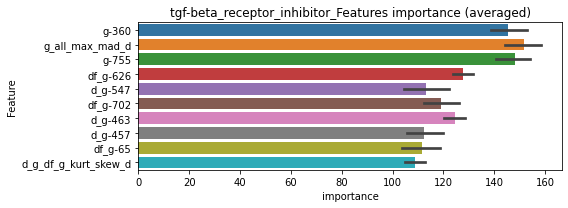

len(train_index) : 2857
len(valid_index) : 953
================================= fold 1/4 tgf-beta_receptor_inhibitor=================================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.000395726	valid_1's binary_logloss: 0.00232982
Early stopping, best iteration is:
[1011]	training's binary_logloss: 0.000394817	valid_1's binary_logloss: 0.00232701


len(train_index) : 2857
len(valid_index) : 953
================================= fold 2/4 tgf-beta_receptor_inhibitor=================================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.000392384	valid_1's binary_logloss: 0.00283218
Early stopping, best iteration is:
[1027]	training's binary_logloss: 0.000390247	valid_1's binary_logloss: 0.00282553


len(train_index) : 2858
len(valid_index) : 952
================================= fold 3/4 tgf-beta_receptor_inhibitor=================================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.000400866	valid_1's binary_logloss: 0.000973294
Early stopping, best iteration is:
[1060]	training's binary_logloss: 0.000396018	valid_1's binary_logloss: 0.000963694


len(train_index) : 2858
len(valid_index) : 952
================================= fold 4/4 tgf-beta_receptor_inhibitor=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[900]	training's binary_logloss: 0.000406549	valid_1's binary_logloss: 0.00345621


tgf-beta_receptor_inhibitor logloss: 0.0023935316755100315


neg labels: 3289 → selected neg labels: 3286


thrombin_inhibitor, len(trt): 19, len(othr): 3286
target_rate: 0.0007979 → Adj_target_rate: 0.0010260
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00095814	valid_1's binary_logloss: 0.0042522
[600]	training's binary_logloss: 0.000293406	valid_1's binary_logloss: 0.00265929
Early stopping, best iteration is:
[576]	training's binary_logloss: 0.00029549	valid_1's binary_logloss: 0.00265192
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.000954582	valid_1's binary_logloss: 0.00434042
[600]	training's binary_logloss: 0.000295915	valid_1's binary_logloss: 0.00243798
Early stopping, best iteration is:
[586]	training's binary_logloss: 0.000295915	valid_1's binary_logloss: 0.00243798
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.000979149	valid_1's binary_logloss: 0.00207323
Early stopping, best iteration is:
[565]	training's binary_logloss: 0.000302702	valid_1's binary_logloss: 0.000737924
Training until validation scores don't improve for 30 roun

1 / 3 AUC score:1.000
y_Threshold: 0.0020024, Threshold: 0.0069152, pos_neg_ratio: 0.8000000
Remove_noisy_data: 132 → Positive_corect_labels: 657/3811
p_label_rate: 0.0100452 Vs.target_rate: 0.00080
Num_p_label: 40.0, conf_0:0.00484, conf_1:0.00899
Num_p_label: 40.0, Expected: 3.2, Adj_threshold_1: 0.0069152
Num_p_label: 2.0, Expected: 3.2, Adj_threshold_2: 0.0469152
threshold: 0.0469152, positive_p_label: 2.0/3982, p_label_rate: 0.0005023
positive_y_label: 657.0/3811, y_label_rate: 0.1723957
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.000891886	valid_1's binary_logloss: 0.00358485
Early stopping, best iteration is:
[551]	training's binary_logloss: 0.000292654	valid_1's binary_logloss: 0.00215605
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.000874283	valid_1's binary_logloss: 0.00466171
Early stopping, best iteration is:
[567]	training's binary_logloss: 0.000288025	valid_1's binary_logloss: 0.00305217
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.000909411	valid_1's binary_logloss: 0.00152938
Early stopping, best iteration is:
[561]	training's binary_logloss: 0.000294067	valid_1's binary_logloss: 0.000559261
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.000900213	valid_1's binary_logloss: 0.00266924


2 / 3 AUC score:1.000
y_Threshold: 0.0583611, Threshold: 0.0469152, pos_neg_ratio: 0.8000000
Remove_noisy_data: 0 → Positive_corect_labels: 657.0/3811
p_label_rate: 0.0037670 Vs.target_rate: 0.00080
Num_p_label: 15.0, conf_0:0.03753, conf_1:0.05630
Num_p_label: 15.0, Expected: 3.2, Adj_threshold_1: 0.0469152
Num_p_label: 5.0, Expected: 3.2, Adj_threshold_2: 0.0869152


Early stopping, best iteration is:
[562]	training's binary_logloss: 0.000292473	valid_1's binary_logloss: 0.00144841


threshold: 0.0869152, positive_p_label: 5.0/3982, p_label_rate: 0.0012557
positive_y_label: 657.0/3811, y_label_rate: 0.1723957
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.000891886	valid_1's binary_logloss: 0.00358485
Early stopping, best iteration is:
[551]	training's binary_logloss: 0.000292654	valid_1's binary_logloss: 0.00215605
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.000874283	valid_1's binary_logloss: 0.00466171
Early stopping, best iteration is:
[567]	training's binary_logloss: 0.000288025	valid_1's binary_logloss: 0.00305217
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.000909411	valid_1's binary_logloss: 0.00152938
Early stopping, best iteration is:
[562]	training's binary_logloss: 0.000294067	valid_1's binary_logloss: 0.000559261
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.000900213	valid_1's binary_logloss: 0.00266924


3 / 3 AUC score:1.000
y_Threshold: 0.0583611, Threshold: 0.0869152, pos_neg_ratio: 0.8000000
Remove_noisy_data: 0 → Positive_corect_labels: 657.0/3811
p_label_rate: 0.0012557 Vs.target_rate: 0.00080
Num_p_label: 5.0, conf_0:0.07822, conf_1:0.09561
Num_p_label: 5.0, Expected: 3.2, Adj_threshold_1: 0.0869152


Early stopping, best iteration is:
[562]	training's binary_logloss: 0.000292473	valid_1's binary_logloss: 0.00144841


threshold: 0.0869152, positive_p_label: 5.0/3982, p_label_rate: 0.0012557
positive_y_label: 657.0/3811, y_label_rate: 0.1723957


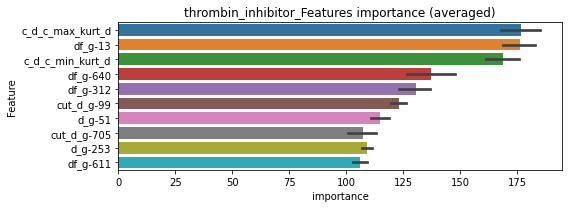

len(train_index) : 2858
len(valid_index) : 953
================================= fold 1/4 thrombin_inhibitor=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[844]	training's binary_logloss: 0.000296975	valid_1's binary_logloss: 0.00198985


len(train_index) : 2858
len(valid_index) : 953
================================= fold 2/4 thrombin_inhibitor=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[753]	training's binary_logloss: 0.000306899	valid_1's binary_logloss: 0.00173573


len(train_index) : 2858
len(valid_index) : 953
================================= fold 3/4 thrombin_inhibitor=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[860]	training's binary_logloss: 0.000301126	valid_1's binary_logloss: 0.00055254


len(train_index) : 2859
len(valid_index) : 952
================================= fold 4/4 thrombin_inhibitor=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[813]	training's binary_logloss: 0.00030169	valid_1's binary_logloss: 0.00131458


thrombin_inhibitor logloss: 0.0013985717210095944


neg labels: 3289 → selected neg labels: 3282


thymidylate_synthase_inhibitor, len(trt): 37, len(othr): 3282
target_rate: 0.0015537 → Adj_target_rate: 0.0018079
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00252444	valid_1's binary_logloss: 0.0133706
[600]	training's binary_logloss: 0.000487577	valid_1's binary_logloss: 0.00766011
Early stopping, best iteration is:
[616]	training's binary_logloss: 0.000473542	valid_1's binary_logloss: 0.00759013
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00247777	valid_1's binary_logloss: 0.00746105
[600]	training's binary_logloss: 0.000489591	valid_1's binary_logloss: 0.00299648
Early stopping, best iteration is:
[674]	training's binary_logloss: 0.000450476	valid_1's binary_logloss: 0.00290288
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00252722	valid_1's binary_logloss: 0.00564593
[600]	training's binary_logloss: 0.000493079	valid_1's binary_logloss: 0.00196209
Early stopping, best iteration is:
[655]	training's binary_logloss: 0.000457868	valid_1's binar

1 / 3 AUC score:1.000
y_Threshold: 0.0028686, Threshold: 0.0123782, pos_neg_ratio: 0.8000000
Remove_noisy_data: 132 → Positive_corect_labels: 656/3806
p_label_rate: 0.0100452 Vs.target_rate: 0.00155
Num_p_label: 40.0, conf_0:0.00866, conf_1:0.01609
Num_p_label: 40.0, Expected: 6.2, Adj_threshold_1: 0.0123782
Num_p_label: 10.0, Expected: 6.2, Adj_threshold_2: 0.0523782
threshold: 0.0523782, positive_p_label: 10.0/3982, p_label_rate: 0.0025113
positive_y_label: 656.0/3806, y_label_rate: 0.1723594
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00223701	valid_1's binary_logloss: 0.014415
[600]	training's binary_logloss: 0.000468565	valid_1's binary_logloss: 0.00951254
Early stopping, best iteration is:
[630]	training's binary_logloss: 0.000451076	valid_1's binary_logloss: 0.00944679
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00219865	valid_1's binary_logloss: 0.0068901
[600]	training's binary_logloss: 0.000475079	valid_1's binary_logloss: 0.002996
Early stopping, best iteration is:
[607]	training's binary_logloss: 0.000468907	valid_1's binary_logloss: 0.00298276
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00231913	valid_1's binary_logloss: 0.00513291
[600]	training's binary_logloss: 0.00047731	valid_1's binary_logloss: 0.00186449
Early stopping, best iteration is:
[657]	training's binary_logloss: 0.000448097	valid_1's binary_log

2 / 3 AUC score:1.000
y_Threshold: 0.0192786, Threshold: 0.0523782, pos_neg_ratio: 0.8000000
Remove_noisy_data: 0 → Positive_corect_labels: 656.0/3806
p_label_rate: 0.0062783 Vs.target_rate: 0.00155
Num_p_label: 25.0, conf_0:0.04190, conf_1:0.06285
Num_p_label: 25.0, Expected: 6.2, Adj_threshold_1: 0.0523782
Num_p_label: 15.0, Expected: 6.2, Adj_threshold_2: 0.0923782
threshold: 0.0923782, positive_p_label: 15.0/3982, p_label_rate: 0.0037670
positive_y_label: 656.0/3806, y_label_rate: 0.1723594
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00223701	valid_1's binary_logloss: 0.014415
[600]	training's binary_logloss: 0.000468565	valid_1's binary_logloss: 0.00951254
Early stopping, best iteration is:
[630]	training's binary_logloss: 0.000451076	valid_1's binary_logloss: 0.00944679
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00219865	valid_1's binary_logloss: 0.0068901
[600]	training's binary_logloss: 0.000475079	valid_1's binary_logloss: 0.002996
Early stopping, best iteration is:
[607]	training's binary_logloss: 0.000468907	valid_1's binary_logloss: 0.00298276
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00231913	valid_1's binary_logloss: 0.00513291
[600]	training's binary_logloss: 0.00047731	valid_1's binary_logloss: 0.00186449
Early stopping, best iteration is:
[658]	training's binary_logloss: 0.000448097	valid_1's binary_log

3 / 3 AUC score:1.000
y_Threshold: 0.0192786, Threshold: 0.0923782, pos_neg_ratio: 0.8000000
Remove_noisy_data: 0 → Positive_corect_labels: 656.0/3806
p_label_rate: 0.0037670 Vs.target_rate: 0.00155
Num_p_label: 15.0, conf_0:0.08314, conf_1:0.10162
Num_p_label: 15.0, Expected: 6.2, Adj_threshold_1: 0.0923782
threshold: 0.0923782, positive_p_label: 15.0/3982, p_label_rate: 0.0037670
positive_y_label: 656.0/3806, y_label_rate: 0.1723594


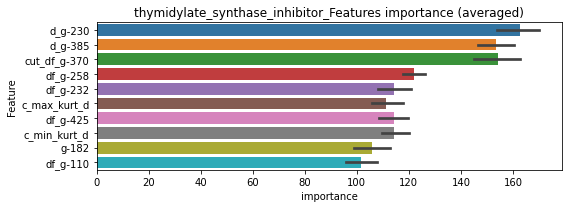

len(train_index) : 2854
len(valid_index) : 952
================================= fold 1/4 thymidylate_synthase_inhibitor=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[747]	training's binary_logloss: 0.000482525	valid_1's binary_logloss: 0.00740867


len(train_index) : 2854
len(valid_index) : 952
================================= fold 2/4 thymidylate_synthase_inhibitor=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[915]	training's binary_logloss: 0.000449573	valid_1's binary_logloss: 0.00227623


len(train_index) : 2855
len(valid_index) : 951
================================= fold 3/4 thymidylate_synthase_inhibitor=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[813]	training's binary_logloss: 0.000471134	valid_1's binary_logloss: 0.00266309


len(train_index) : 2855
len(valid_index) : 951
================================= fold 4/4 thymidylate_synthase_inhibitor=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[929]	training's binary_logloss: 0.000435812	valid_1's binary_logloss: 0.00831722


thymidylate_synthase_inhibitor logloss: 0.0051704560311206255


neg labels: 3289 → selected neg labels: 3282


tlr_agonist, len(trt): 30, len(othr): 3282
target_rate: 0.0012598 → Adj_target_rate: 0.0015127
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00161965	valid_1's binary_logloss: 0.00649983
[600]	training's binary_logloss: 0.000378834	valid_1's binary_logloss: 0.00323964
Early stopping, best iteration is:
[597]	training's binary_logloss: 0.000379267	valid_1's binary_logloss: 0.00323961
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00158133	valid_1's binary_logloss: 0.00565551
[600]	training's binary_logloss: 0.000374812	valid_1's binary_logloss: 0.00241946
Early stopping, best iteration is:
[619]	training's binary_logloss: 0.000369001	valid_1's binary_logloss: 0.00240618
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00165379	valid_1's binary_logloss: 0.00356357
[600]	training's binary_logloss: 0.000387999	valid_1's binary_logloss: 0.00111714
Early stopping, best iteration is:
[628]	training's binary_logloss: 0.000381712	valid_1's bina

1 / 3 AUC score:1.000
y_Threshold: 0.0026395, Threshold: 0.0134923, pos_neg_ratio: 0.8000000


Early stopping, best iteration is:
[561]	training's binary_logloss: 0.000392554	valid_1's binary_logloss: 0.0121583


Remove_noisy_data: 132 → Positive_corect_labels: 656/3806
p_label_rate: 0.0100452 Vs.target_rate: 0.00126
Num_p_label: 40.0, conf_0:0.00944, conf_1:0.01754
Num_p_label: 40.0, Expected: 5.0, Adj_threshold_1: 0.0134923
Num_p_label: 14.0, Expected: 5.0, Adj_threshold_2: 0.0534923
Num_p_label: 8.0, Expected: 5.0, Adj_threshold_3: 0.0934923
threshold: 0.0934923, positive_p_label: 8.0/3982, p_label_rate: 0.0020090
positive_y_label: 656.0/3806, y_label_rate: 0.1723594
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00148512	valid_1's binary_logloss: 0.00630431
[600]	training's binary_logloss: 0.000363742	valid_1's binary_logloss: 0.00314636
Early stopping, best iteration is:
[616]	training's binary_logloss: 0.000358616	valid_1's binary_logloss: 0.00311919
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00146636	valid_1's binary_logloss: 0.0053288
[600]	training's binary_logloss: 0.000366685	valid_1's binary_logloss: 0.00241159
Early stopping, best iteration is:
[592]	training's binary_logloss: 0.000367242	valid_1's binary_logloss: 0.00241042
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00153928	valid_1's binary_logloss: 0.00288626
[600]	training's binary_logloss: 0.000369663	valid_1's binary_logloss: 0.000851374
Early stopping, best iteration is:
[629]	training's binary_logloss: 0.000362943	valid_1's bina

2 / 3 AUC score:1.000


Early stopping, best iteration is:
[464]	training's binary_logloss: 0.000501473	valid_1's binary_logloss: 0.0107836


y_Threshold: 0.0408476, Threshold: 0.0934923, pos_neg_ratio: 0.8000000
Remove_noisy_data: 0 → Positive_corect_labels: 656.0/3806
p_label_rate: 0.0057760 Vs.target_rate: 0.00126
Num_p_label: 23.0, conf_0:0.07479, conf_1:0.11219
Num_p_label: 23.0, Expected: 5.0, Adj_threshold_1: 0.0934923
Num_p_label: 19.0, Expected: 5.0, Adj_threshold_2: 0.1334923
Num_p_label: 13.0, Expected: 5.0, Adj_threshold_3: 0.1734923
Num_p_label: 11.0, Expected: 5.0, Adj_threshold_4: 0.2134923
threshold: 0.2134923, positive_p_label: 11.0/3982, p_label_rate: 0.0027624
positive_y_label: 656.0/3806, y_label_rate: 0.1723594
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00148512	valid_1's binary_logloss: 0.00630431
[600]	training's binary_logloss: 0.000363742	valid_1's binary_logloss: 0.00314636
Early stopping, best iteration is:
[616]	training's binary_logloss: 0.000358616	valid_1's binary_logloss: 0.00311919
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00146636	valid_1's binary_logloss: 0.0053288
[600]	training's binary_logloss: 0.000366685	valid_1's binary_logloss: 0.00241159
Early stopping, best iteration is:
[592]	training's binary_logloss: 0.000367242	valid_1's binary_logloss: 0.00241042
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00153928	valid_1's binary_logloss: 0.00288626
[600]	training's binary_logloss: 0.000369663	valid_1's binary_logloss: 0.000851374
Early stopping, best iteration is:
[632]	training's binary_logloss: 0.000362943	valid_1's bina

3 / 3 AUC score:1.000
y_Threshold: 0.0408476, Threshold: 0.2134923, pos_neg_ratio: 0.8000000
Remove_noisy_data: 0 → Positive_corect_labels: 656.0/3806
p_label_rate: 0.0027624 Vs.target_rate: 0.00126
Num_p_label: 11.0, conf_0:0.19214, conf_1:0.23484
Num_p_label: 11.0, Expected: 5.0, Adj_threshold_1: 0.2134923


Early stopping, best iteration is:
[464]	training's binary_logloss: 0.000501473	valid_1's binary_logloss: 0.0107836


threshold: 0.2134923, positive_p_label: 11.0/3982, p_label_rate: 0.0027624
positive_y_label: 656.0/3806, y_label_rate: 0.1723594


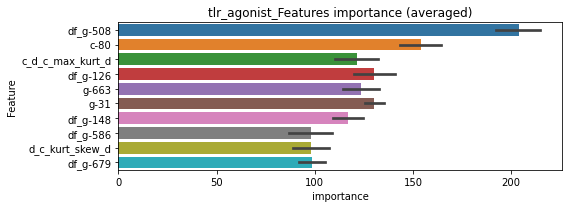

len(train_index) : 2854
len(valid_index) : 952
================================= fold 1/4 tlr_agonist=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[884]	training's binary_logloss: 0.000367475	valid_1's binary_logloss: 0.00216387


len(train_index) : 2854
len(valid_index) : 952
================================= fold 2/4 tlr_agonist=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[869]	training's binary_logloss: 0.000370488	valid_1's binary_logloss: 0.00219187


len(train_index) : 2855
len(valid_index) : 951
================================= fold 3/4 tlr_agonist=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[927]	training's binary_logloss: 0.000370218	valid_1's binary_logloss: 0.000914835


len(train_index) : 2855
len(valid_index) : 951
================================= fold 4/4 tlr_agonist=================================


Training until validation scores don't improve for 30 rounds


tlr_agonist logloss: 0.0037842847900740324


Early stopping, best iteration is:
[698]	training's binary_logloss: 0.000403115	valid_1's binary_logloss: 0.00986994
neg labels: 3289 → selected neg labels: 3289


tlr_antagonist, len(trt): 7, len(othr): 3289
target_rate: 0.0002939 → Adj_target_rate: 0.0004391
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.000407275	valid_1's binary_logloss: 0.000485725
Early stopping, best iteration is:
[492]	training's binary_logloss: 0.000192031	valid_1's binary_logloss: 0.000232848
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.000408339	valid_1's binary_logloss: 0.0026315
Early stopping, best iteration is:
[485]	training's binary_logloss: 0.000191479	valid_1's binary_logloss: 0.0018409
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.000407164	valid_1's binary_logloss: 0.00049695
Early stopping, best iteration is:
[493]	training's binary_logloss: 0.000192322	valid_1's binary_logloss: 0.000240854
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.000405664	valid_1's binary_logloss: 0.000538294


1 / 3 AUC score:1.000
y_Threshold: 0.0005613, Threshold: 0.0012883, pos_neg_ratio: 0.8000000
Remove_noisy_data: 133 → Positive_corect_labels: 657/3813
p_label_rate: 0.0100452 Vs.target_rate: 0.00029
Num_p_label: 40.0, conf_0:0.00090, conf_1:0.00167
Num_p_label: 40.0, Expected: 1.2, Adj_threshold_1: 0.0012883
Num_p_label: 1.0, Expected: 1.2, Adj_threshold_2: 0.0412883
threshold: 0.0412883, positive_p_label: 1.0/3982, p_label_rate: 0.0002511


Early stopping, best iteration is:
[492]	training's binary_logloss: 0.00019043	valid_1's binary_logloss: 0.000260235


positive_y_label: 657.0/3813, y_label_rate: 0.1723053
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.000398343	valid_1's binary_logloss: 0.000476059
Early stopping, best iteration is:
[500]	training's binary_logloss: 0.000189761	valid_1's binary_logloss: 0.000232448
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.000397576	valid_1's binary_logloss: 0.00111183
Early stopping, best iteration is:
[485]	training's binary_logloss: 0.00018908	valid_1's binary_logloss: 0.00069328
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.000393894	valid_1's binary_logloss: 0.000470736
Early stopping, best iteration is:
[491]	training's binary_logloss: 0.000189576	valid_1's binary_logloss: 0.000231987
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.000397694	valid_1's binary_logloss: 0.000603288


2 / 3 AUC score:1.000
y_Threshold: 0.1303955, Threshold: 0.0412883, pos_neg_ratio: 0.8000000
Remove_noisy_data: 0 → Positive_corect_labels: 657.0/3813
p_label_rate: 0.0005023 Vs.target_rate: 0.00029
Num_p_label: 2.0, conf_0:0.03303, conf_1:0.04955
Num_p_label: 2.0, Expected: 1.2, Adj_threshold_1: 0.0412883


Early stopping, best iteration is:
[491]	training's binary_logloss: 0.000188875	valid_1's binary_logloss: 0.000323311


threshold: 0.0412883, positive_p_label: 2.0/3982, p_label_rate: 0.0005023
positive_y_label: 657.0/3813, y_label_rate: 0.1723053
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.000398343	valid_1's binary_logloss: 0.000476059
Early stopping, best iteration is:
[497]	training's binary_logloss: 0.000189761	valid_1's binary_logloss: 0.000232448
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.000397576	valid_1's binary_logloss: 0.00111183
Early stopping, best iteration is:
[485]	training's binary_logloss: 0.00018908	valid_1's binary_logloss: 0.00069328
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.000393894	valid_1's binary_logloss: 0.000470736
Early stopping, best iteration is:
[491]	training's binary_logloss: 0.000189576	valid_1's binary_logloss: 0.000231987
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.000397694	valid_1's binary_logloss: 0.000603288


3 / 3 AUC score:1.000
y_Threshold: 0.1303955, Threshold: 0.0412883, pos_neg_ratio: 0.8000000
Remove_noisy_data: 0 → Positive_corect_labels: 657.0/3813
p_label_rate: 0.0005023 Vs.target_rate: 0.00029
Num_p_label: 2.0, conf_0:0.03716, conf_1:0.04542
Num_p_label: 2.0, Expected: 1.2, Adj_threshold_1: 0.0412883
threshold: 0.0412883, positive_p_label: 2.0/3982, p_label_rate: 0.0005023


Early stopping, best iteration is:
[491]	training's binary_logloss: 0.000188875	valid_1's binary_logloss: 0.000323311


positive_y_label: 657.0/3813, y_label_rate: 0.1723053


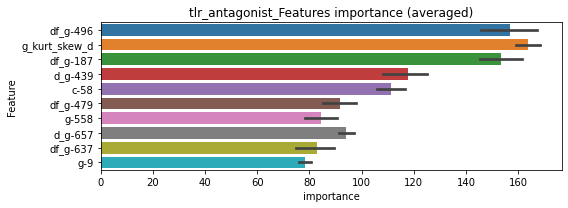

len(train_index) : 2859
len(valid_index) : 954
================================= fold 1/4 tlr_antagonist=================================


Training until validation scores don't improve for 30 rounds


len(train_index) : 2860
len(valid_index) : 953


[1000]	training's binary_logloss: 0.000185665	valid_1's binary_logloss: 0.000239334
Early stopping, best iteration is:
[991]	training's binary_logloss: 0.000185665	valid_1's binary_logloss: 0.000239334


================================= fold 2/4 tlr_antagonist=================================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.000185195	valid_1's binary_logloss: 0.000392224
Early stopping, best iteration is:
[1005]	training's binary_logloss: 0.000185107	valid_1's binary_logloss: 0.000392021


len(train_index) : 2860
len(valid_index) : 953
================================= fold 3/4 tlr_antagonist=================================


Training until validation scores don't improve for 30 rounds


len(train_index) : 2860
len(valid_index) : 953
================================= fold 4/4 tlr_antagonist=================================


Early stopping, best iteration is:
[958]	training's binary_logloss: 0.000187153	valid_1's binary_logloss: 0.000234582
Training until validation scores don't improve for 30 rounds


tlr_antagonist logloss: 0.00027771612613889285


Early stopping, best iteration is:
[910]	training's binary_logloss: 0.000187633	valid_1's binary_logloss: 0.000244963
neg labels: 3289 → selected neg labels: 3289


tnf_inhibitor, len(trt): 36, len(othr): 3289
target_rate: 0.0015117 → Adj_target_rate: 0.0017663
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00215528	valid_1's binary_logloss: 0.0129689
[600]	training's binary_logloss: 0.000463545	valid_1's binary_logloss: 0.00824067
Early stopping, best iteration is:
[580]	training's binary_logloss: 0.000480396	valid_1's binary_logloss: 0.00822891
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00215223	valid_1's binary_logloss: 0.0161824
[600]	training's binary_logloss: 0.000457975	valid_1's binary_logloss: 0.0104019
Early stopping, best iteration is:
[585]	training's binary_logloss: 0.000462831	valid_1's binary_logloss: 0.0103773
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00209811	valid_1's binary_logloss: 0.00795726
[600]	training's binary_logloss: 0.00046694	valid_1's binary_logloss: 0.00458231
Early stopping, best iteration is:
[616]	training's binary_logloss: 0.000455791	valid_1's binary_lo

1 / 3 AUC score:1.000
y_Threshold: 0.0034883, Threshold: 0.0171120, pos_neg_ratio: 0.8000000
Remove_noisy_data: 133 → Positive_corect_labels: 657/3813
p_label_rate: 0.0100452 Vs.target_rate: 0.00151
Num_p_label: 40.0, conf_0:0.01198, conf_1:0.02225
Num_p_label: 40.0, Expected: 6.0, Adj_threshold_1: 0.0171120
Num_p_label: 7.0, Expected: 6.0, Adj_threshold_2: 0.0571120
threshold: 0.0571120, positive_p_label: 7.0/3982, p_label_rate: 0.0017579
positive_y_label: 657.0/3813, y_label_rate: 0.1723053
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00192191	valid_1's binary_logloss: 0.0134352
[600]	training's binary_logloss: 0.000438749	valid_1's binary_logloss: 0.00919601
Early stopping, best iteration is:
[586]	training's binary_logloss: 0.000447508	valid_1's binary_logloss: 0.00915601
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0020331	valid_1's binary_logloss: 0.0160165
[600]	training's binary_logloss: 0.000452759	valid_1's binary_logloss: 0.0112252
Early stopping, best iteration is:
[585]	training's binary_logloss: 0.000455382	valid_1's binary_logloss: 0.0112029
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00201386	valid_1's binary_logloss: 0.00764241
[600]	training's binary_logloss: 0.000452101	valid_1's binary_logloss: 0.00422754
Early stopping, best iteration is:
[611]	training's binary_logloss: 0.00044693	valid_1's binary_log

2 / 3 AUC score:1.000
y_Threshold: 0.0500884, Threshold: 0.0571120, pos_neg_ratio: 0.8000000
Remove_noisy_data: 0 → Positive_corect_labels: 657.0/3813


Early stopping, best iteration is:
[547]	training's binary_logloss: 0.000489671	valid_1's binary_logloss: 0.00889499


p_label_rate: 0.0085384 Vs.target_rate: 0.00151
Num_p_label: 34.0, conf_0:0.04569, conf_1:0.06853
Num_p_label: 34.0, Expected: 6.0, Adj_threshold_1: 0.0571120
Num_p_label: 16.0, Expected: 6.0, Adj_threshold_2: 0.0971120
Num_p_label: 11.0, Expected: 6.0, Adj_threshold_3: 0.1371120
threshold: 0.1371120, positive_p_label: 11.0/3982, p_label_rate: 0.0027624
positive_y_label: 657.0/3813, y_label_rate: 0.1723053
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00192191	valid_1's binary_logloss: 0.0134352
[600]	training's binary_logloss: 0.000438749	valid_1's binary_logloss: 0.00919601
Early stopping, best iteration is:
[586]	training's binary_logloss: 0.000447508	valid_1's binary_logloss: 0.00915601
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0020331	valid_1's binary_logloss: 0.0160165
[600]	training's binary_logloss: 0.000452759	valid_1's binary_logloss: 0.0112252
Early stopping, best iteration is:
[585]	training's binary_logloss: 0.000455382	valid_1's binary_logloss: 0.0112029
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00201386	valid_1's binary_logloss: 0.00764241
[600]	training's binary_logloss: 0.000452101	valid_1's binary_logloss: 0.00422754
Early stopping, best iteration is:
[611]	training's binary_logloss: 0.00044693	valid_1's binary_log

3 / 3 AUC score:1.000
y_Threshold: 0.0500884, Threshold: 0.1371120, pos_neg_ratio: 0.8000000
Remove_noisy_data: 0 → Positive_corect_labels: 657.0/3813
p_label_rate: 0.0027624 Vs.target_rate: 0.00151
Num_p_label: 11.0, conf_0:0.12340, conf_1:0.15082
Num_p_label: 11.0, Expected: 6.0, Adj_threshold_1: 0.1371120
threshold: 0.1371120, positive_p_label: 11.0/3982, p_label_rate: 0.0027624
positive_y_label: 657.0/3813, y_label_rate: 0.1723053


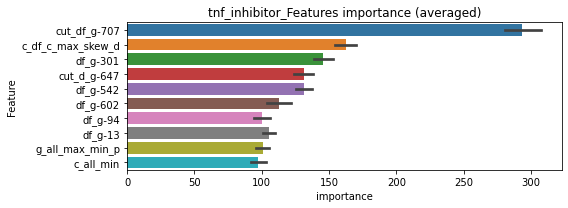

len(train_index) : 2859
len(valid_index) : 954
================================= fold 1/4 tnf_inhibitor=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[818]	training's binary_logloss: 0.000443229	valid_1's binary_logloss: 0.00751537


len(train_index) : 2860
len(valid_index) : 953
================================= fold 2/4 tnf_inhibitor=================================


Training until validation scores don't improve for 30 rounds


len(train_index) : 2860
len(valid_index) : 953


Early stopping, best iteration is:
[666]	training's binary_logloss: 0.000498289	valid_1's binary_logloss: 0.00777486


================================= fold 3/4 tnf_inhibitor=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[817]	training's binary_logloss: 0.000451052	valid_1's binary_logloss: 0.00385925


len(train_index) : 2860
len(valid_index) : 953
================================= fold 4/4 tnf_inhibitor=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[806]	training's binary_logloss: 0.000447126	valid_1's binary_logloss: 0.00837091


tnf_inhibitor logloss: 0.006883820553286412


neg labels: 3289 → selected neg labels: 3276


topoisomerase_inhibitor, len(trt): 127, len(othr): 3276
target_rate: 0.0053330 → Adj_target_rate: 0.0051574
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00988082	valid_1's binary_logloss: 0.112
Early stopping, best iteration is:
[367]	training's binary_logloss: 0.0054353	valid_1's binary_logloss: 0.107963
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0112258	valid_1's binary_logloss: 0.0787384
Early stopping, best iteration is:
[546]	training's binary_logloss: 0.0020326	valid_1's binary_logloss: 0.066938
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0114421	valid_1's binary_logloss: 0.0500318
[600]	training's binary_logloss: 0.00167863	valid_1's binary_logloss: 0.0319623
[900]	training's binary_logloss: 0.000860227	valid_1's binary_logloss: 0.0298481
Early stopping, best iteration is:
[956]	training's binary_logloss: 0.000813592	valid_1's binary_logloss: 0.029716
Training until validation scores don't improve for 30 rounds
[300]	training's bin

1 / 3 AUC score:0.992
y_Threshold: 0.0195931, Threshold: 0.1981491, pos_neg_ratio: 0.8000000
Remove_noisy_data: 160 → Positive_corect_labels: 641/3771
p_label_rate: 0.0100452 Vs.target_rate: 0.00533
Num_p_label: 40.0, conf_0:0.13870, conf_1:0.25759
Num_p_label: 40.0, Expected: 21.2, Adj_threshold_1: 0.1981491
Num_p_label: 33.0, Expected: 21.2, Adj_threshold_2: 0.2381491
Num_p_label: 25.0, Expected: 21.2, Adj_threshold_3: 0.2781491
threshold: 0.2781491, positive_p_label: 25.0/3982, p_label_rate: 0.0062783
positive_y_label: 641.0/3771, y_label_rate: 0.1699814
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0093001	valid_1's binary_logloss: 0.0723674
[600]	training's binary_logloss: 0.00142564	valid_1's binary_logloss: 0.0562244
Early stopping, best iteration is:
[637]	training's binary_logloss: 0.00126889	valid_1's binary_logloss: 0.0550878
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00876099	valid_1's binary_logloss: 0.0620972
[600]	training's binary_logloss: 0.00136694	valid_1's binary_logloss: 0.0494913
Early stopping, best iteration is:
[597]	training's binary_logloss: 0.00138142	valid_1's binary_logloss: 0.0494647
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00878434	valid_1's binary_logloss: 0.0651111
Early stopping, best iteration is:
[526]	training's binary_logloss: 0.00183276	valid_1's binary_logloss: 0.0547863
Training until validation scores don't improve for 30 rounds
[300]	traini

2 / 3 AUC score:0.998
y_Threshold: 0.0467078, Threshold: 0.2781491, pos_neg_ratio: 0.8000000
Remove_noisy_data: 28 → Positive_corect_labels: 627.0/3743
p_label_rate: 0.0170768 Vs.target_rate: 0.00533
Num_p_label: 68.0, conf_0:0.22252, conf_1:0.33378
Num_p_label: 68.0, Expected: 21.2, Adj_threshold_1: 0.2781491
Num_p_label: 63.0, Expected: 21.2, Adj_threshold_2: 0.3181491
Num_p_label: 57.0, Expected: 21.2, Adj_threshold_3: 0.3581491
Num_p_label: 45.0, Expected: 21.2, Adj_threshold_4: 0.3981491
Num_p_label: 37.0, Expected: 21.2, Adj_threshold_5: 0.4381491
Num_p_label: 35.0, Expected: 21.2, Adj_threshold_6: 0.4781491
Num_p_label: 31.0, Expected: 21.2, Adj_threshold_7: 0.5181491
threshold: 0.5181491, positive_p_label: 31.0/3982, p_label_rate: 0.0077850
positive_y_label: 627.0/3743, y_label_rate: 0.1675127
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0077034	valid_1's binary_logloss: 0.0730026
Early stopping, best iteration is:
[446]	training's binary_logloss: 0.0024628	valid_1's binary_logloss: 0.0666988
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0076318	valid_1's binary_logloss: 0.0584993
[600]	training's binary_logloss: 0.00124396	valid_1's binary_logloss: 0.0441188
Early stopping, best iteration is:
[789]	training's binary_logloss: 0.000807851	valid_1's binary_logloss: 0.0424804
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00777202	valid_1's binary_logloss: 0.051725
[600]	training's binary_logloss: 0.0012801	valid_1's binary_logloss: 0.0361393
[900]	training's binary_logloss: 0.000726561	valid_1's binary_logloss: 0.034388
Early stopping, best iteration is:
[881]	training's binary_logloss: 0.00073675	valid_1's binary_logloss: 0.0342

3 / 3 AUC score:0.999
y_Threshold: 0.0370969, Threshold: 0.5181491, pos_neg_ratio: 0.8000000
Remove_noisy_data: 22 → Positive_corect_labels: 616.0/3721
p_label_rate: 0.0080362 Vs.target_rate: 0.00533
Num_p_label: 32.0, conf_0:0.46633, conf_1:0.56996
Num_p_label: 32.0, Expected: 21.2, Adj_threshold_1: 0.5181491
Num_p_label: 26.0, Expected: 21.2, Adj_threshold_2: 0.5581491
threshold: 0.5581491, positive_p_label: 26.0/3982, p_label_rate: 0.0065294
positive_y_label: 616.0/3721, y_label_rate: 0.1655469


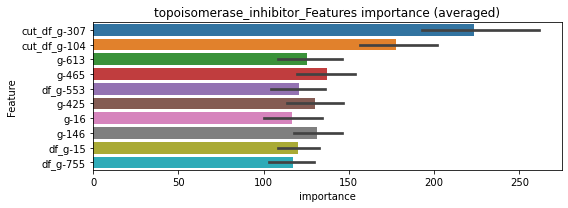

len(train_index) : 2790
len(valid_index) : 931
================================= fold 1/4 topoisomerase_inhibitor=================================


Training until validation scores don't improve for 30 rounds


len(train_index) : 2791
len(valid_index) : 930
================================= fold 2/4 topoisomerase_inhibitor=================================


Early stopping, best iteration is:
[401]	training's binary_logloss: 0.00177307	valid_1's binary_logloss: 0.0677369
Training until validation scores don't improve for 30 rounds


len(train_index) : 2791
len(valid_index) : 930
================================= fold 3/4 topoisomerase_inhibitor=================================


Early stopping, best iteration is:
[467]	training's binary_logloss: 0.00154227	valid_1's binary_logloss: 0.0468342
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[585]	training's binary_logloss: 0.00121686	valid_1's binary_logloss: 0.0336999


len(train_index) : 2791
len(valid_index) : 930
================================= fold 4/4 topoisomerase_inhibitor=================================


Training until validation scores don't improve for 30 rounds


topoisomerase_inhibitor logloss: 0.04922746786817218
topoisomerase_inhibitor clipping


Early stopping, best iteration is:
[404]	training's binary_logloss: 0.00182865	valid_1's binary_logloss: 0.048619
neg labels: 3289 → selected neg labels: 3287


transient_receptor_potential_channel_antagonist, len(trt): 18, len(othr): 3287
target_rate: 0.0007559 → Adj_target_rate: 0.0009799
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00101401	valid_1's binary_logloss: 0.0019748
[600]	training's binary_logloss: 0.00031306	valid_1's binary_logloss: 0.000747816
Early stopping, best iteration is:
[570]	training's binary_logloss: 0.00031306	valid_1's binary_logloss: 0.000747816
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.000971947	valid_1's binary_logloss: 0.00443233
[600]	training's binary_logloss: 0.000306186	valid_1's binary_logloss: 0.00248484
Early stopping, best iteration is:
[580]	training's binary_logloss: 0.000306339	valid_1's binary_logloss: 0.00248376
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00100219	valid_1's binary_logloss: 0.00379789
Early stopping, best iteration is:
[543]	training's binary_logloss: 0.00031412	valid_1's binary_logloss: 0.00249286
Training until validation scores don't improve for 30 rounds

1 / 3 AUC score:1.000


[600]	training's binary_logloss: 0.000310079	valid_1's binary_logloss: 0.00181899
Early stopping, best iteration is:
[592]	training's binary_logloss: 0.000310103	valid_1's binary_logloss: 0.00181865


y_Threshold: 0.0016696, Threshold: 0.0128452, pos_neg_ratio: 0.8000000
Remove_noisy_data: 132 → Positive_corect_labels: 657/3812
p_label_rate: 0.0100452 Vs.target_rate: 0.00076
Num_p_label: 40.0, conf_0:0.00899, conf_1:0.01670
Num_p_label: 40.0, Expected: 3.0, Adj_threshold_1: 0.0128452
Num_p_label: 12.0, Expected: 3.0, Adj_threshold_2: 0.0528452
Num_p_label: 9.0, Expected: 3.0, Adj_threshold_3: 0.0928452
Num_p_label: 4.0, Expected: 3.0, Adj_threshold_4: 0.1328452
threshold: 0.1328452, positive_p_label: 4.0/3982, p_label_rate: 0.0010045
positive_y_label: 657.0/3812, y_label_rate: 0.1723505
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.000912145	valid_1's binary_logloss: 0.00155858
[600]	training's binary_logloss: 0.000304826	valid_1's binary_logloss: 0.000634439
Early stopping, best iteration is:
[571]	training's binary_logloss: 0.000304826	valid_1's binary_logloss: 0.000634439
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.000884328	valid_1's binary_logloss: 0.00362402
Early stopping, best iteration is:
[547]	training's binary_logloss: 0.000299585	valid_1's binary_logloss: 0.00210471
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.000938366	valid_1's binary_logloss: 0.00366293
[600]	training's binary_logloss: 0.000300744	valid_1's binary_logloss: 0.00260482
Early stopping, best iteration is:
[570]	training's binary_logloss: 0.000300744	valid_1's binary_logloss: 0.00260482
Training until validation scores don't improve for 30 

2 / 3 AUC score:1.000
y_Threshold: 0.1284088, Threshold: 0.1328452, pos_neg_ratio: 0.8000000
Remove_noisy_data: 2 → Positive_corect_labels: 656.0/3810
p_label_rate: 0.0085384 Vs.target_rate: 0.00076
Num_p_label: 34.0, conf_0:0.10628, conf_1:0.15941
Num_p_label: 34.0, Expected: 3.0, Adj_threshold_1: 0.1328452


Early stopping, best iteration is:
[550]	training's binary_logloss: 0.000303076	valid_1's binary_logloss: 0.00180074


Num_p_label: 26.0, Expected: 3.0, Adj_threshold_2: 0.1728452
Num_p_label: 24.0, Expected: 3.0, Adj_threshold_3: 0.2128452
Num_p_label: 21.0, Expected: 3.0, Adj_threshold_4: 0.2528452
Num_p_label: 17.0, Expected: 3.0, Adj_threshold_5: 0.2928452
Num_p_label: 15.0, Expected: 3.0, Adj_threshold_6: 0.3328452
Num_p_label: 13.0, Expected: 3.0, Adj_threshold_7: 0.3728452
Num_p_label: 12.0, Expected: 3.0, Adj_threshold_8: 0.4128452
Num_p_label: 9.0, Expected: 3.0, Adj_threshold_9: 0.4528452
Num_p_label: 9.0, Expected: 3.0, Adj_threshold_10: 0.4928452
threshold: 0.5328452, positive_p_label: 9.0/3982, p_label_rate: 0.0022602
positive_y_label: 656.0/3810, y_label_rate: 0.1721785
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.000896474	valid_1's binary_logloss: 0.00269477
Early stopping, best iteration is:
[546]	training's binary_logloss: 0.000300544	valid_1's binary_logloss: 0.00143459
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.000887594	valid_1's binary_logloss: 0.00321908
Early stopping, best iteration is:
[556]	training's binary_logloss: 0.000300011	valid_1's binary_logloss: 0.00207752
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00092983	valid_1's binary_logloss: 0.00127913
[600]	training's binary_logloss: 0.000301847	valid_1's binary_logloss: 0.000455136
Early stopping, best iteration is:
[576]	training's binary_logloss: 0.000301847	valid_1's binary_logloss: 0.000455136
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00090605	valid_1's binary_logloss: 0.0025

3 / 3 AUC score:1.000
y_Threshold: 0.0970156, Threshold: 0.5328452, pos_neg_ratio: 0.8000000
Remove_noisy_data: 0 → Positive_corect_labels: 656.0/3810


[600]	training's binary_logloss: 0.000296389	valid_1's binary_logloss: 0.00116961
Early stopping, best iteration is:
[586]	training's binary_logloss: 0.000296771	valid_1's binary_logloss: 0.00116842


p_label_rate: 0.0030136 Vs.target_rate: 0.00076
Num_p_label: 12.0, conf_0:0.47956, conf_1:0.58613
Num_p_label: 12.0, Expected: 3.0, Adj_threshold_1: 0.5328452
Num_p_label: 11.0, Expected: 3.0, Adj_threshold_2: 0.5728452
Num_p_label: 10.0, Expected: 3.0, Adj_threshold_3: 0.6128452
Num_p_label: 9.0, Expected: 3.0, Adj_threshold_4: 0.6528452
Num_p_label: 8.0, Expected: 3.0, Adj_threshold_5: 0.6928452
Num_p_label: 6.0, Expected: 3.0, Adj_threshold_6: 0.7328452
threshold: 0.7328452, positive_p_label: 6.0/3982, p_label_rate: 0.0015068
positive_y_label: 656.0/3810, y_label_rate: 0.1721785


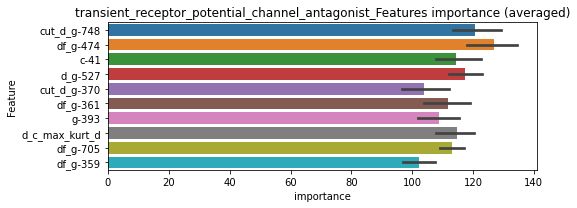

len(train_index) : 2857
len(valid_index) : 953
================================= fold 1/4 transient_receptor_potential_channel_antagonist=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[923]	training's binary_logloss: 0.000299653	valid_1's binary_logloss: 0.000913283


len(train_index) : 2857
len(valid_index) : 953
================================= fold 2/4 transient_receptor_potential_channel_antagonist=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[880]	training's binary_logloss: 0.000298012	valid_1's binary_logloss: 0.00168823


len(train_index) : 2858
len(valid_index) : 952
================================= fold 3/4 transient_receptor_potential_channel_antagonist=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[858]	training's binary_logloss: 0.000306939	valid_1's binary_logloss: 0.000486865


len(train_index) : 2858
len(valid_index) : 952
================================= fold 4/4 transient_receptor_potential_channel_antagonist=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[866]	training's binary_logloss: 0.000303596	valid_1's binary_logloss: 0.000937586


transient_receptor_potential_channel_antagonist logloss: 0.0010069173164884116


neg labels: 3289 → selected neg labels: 3289


tropomyosin_receptor_kinase_inhibitor, len(trt): 6, len(othr): 3289
target_rate: 0.0002520 → Adj_target_rate: 0.0003851
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.000320511	valid_1's binary_logloss: 0.00144767
Early stopping, best iteration is:
[451]	training's binary_logloss: 0.00016186	valid_1's binary_logloss: 0.00116654
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.000312865	valid_1's binary_logloss: 0.000618577
Early stopping, best iteration is:
[484]	training's binary_logloss: 0.00015613	valid_1's binary_logloss: 0.000366584
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.000320025	valid_1's binary_logloss: 0.00037331
Early stopping, best iteration is:
[464]	training's binary_logloss: 0.000159966	valid_1's binary_logloss: 0.000191366
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00032194	valid_1's binary_logloss: 0.000357113


1 / 3 AUC score:1.000
y_Threshold: 0.0004753, Threshold: 0.0012169, pos_neg_ratio: 0.8000000
Remove_noisy_data: 133 → Positive_corect_labels: 657/3813
p_label_rate: 0.0100452 Vs.target_rate: 0.00025
Num_p_label: 40.0, conf_0:0.00085, conf_1:0.00158
Num_p_label: 40.0, Expected: 1.0, Adj_threshold_1: 0.0012169
Num_p_label: 1.0, Expected: 1.0, Adj_threshold_2: 0.0412169
threshold: 0.0412169, positive_p_label: 1.0/3982, p_label_rate: 0.0002511


Early stopping, best iteration is:
[506]	training's binary_logloss: 0.000155673	valid_1's binary_logloss: 0.000177466


positive_y_label: 657.0/3813, y_label_rate: 0.1723053
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.000307309	valid_1's binary_logloss: 0.000546155
Early stopping, best iteration is:
[487]	training's binary_logloss: 0.000153058	valid_1's binary_logloss: 0.000332148
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.000301849	valid_1's binary_logloss: 0.00104138
Early stopping, best iteration is:
[485]	training's binary_logloss: 0.000151181	valid_1's binary_logloss: 0.000746201
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.000308078	valid_1's binary_logloss: 0.00035925
Early stopping, best iteration is:
[509]	training's binary_logloss: 0.000150014	valid_1's binary_logloss: 0.000179035
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.000309838	valid_1's binary_logloss: 0.00033646


2 / 3 AUC score:1.000
y_Threshold: 0.1040897, Threshold: 0.0412169, pos_neg_ratio: 0.8000000
Remove_noisy_data: 0 → Positive_corect_labels: 657.0/3813
p_label_rate: 0.0005023 Vs.target_rate: 0.00025
Num_p_label: 2.0, conf_0:0.03297, conf_1:0.04946
Num_p_label: 2.0, Expected: 1.0, Adj_threshold_1: 0.0412169
threshold: 0.0412169, positive_p_label: 2.0/3982, p_label_rate: 0.0005023


Early stopping, best iteration is:
[493]	training's binary_logloss: 0.000151243	valid_1's binary_logloss: 0.000166085


positive_y_label: 657.0/3813, y_label_rate: 0.1723053
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.000307309	valid_1's binary_logloss: 0.000546155
Early stopping, best iteration is:
[487]	training's binary_logloss: 0.000153058	valid_1's binary_logloss: 0.000332148
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.000301849	valid_1's binary_logloss: 0.00104138
Early stopping, best iteration is:
[485]	training's binary_logloss: 0.000151181	valid_1's binary_logloss: 0.000746201
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.000308078	valid_1's binary_logloss: 0.00035925
Early stopping, best iteration is:
[509]	training's binary_logloss: 0.000150014	valid_1's binary_logloss: 0.000179035
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.000309838	valid_1's binary_logloss: 0.00033646


3 / 3 AUC score:1.000
y_Threshold: 0.1040897, Threshold: 0.0412169, pos_neg_ratio: 0.8000000
Remove_noisy_data: 0 → Positive_corect_labels: 657.0/3813
p_label_rate: 0.0005023 Vs.target_rate: 0.00025
Num_p_label: 2.0, conf_0:0.03710, conf_1:0.04534
Num_p_label: 2.0, Expected: 1.0, Adj_threshold_1: 0.0412169
threshold: 0.0412169, positive_p_label: 2.0/3982, p_label_rate: 0.0005023


Early stopping, best iteration is:
[500]	training's binary_logloss: 0.000151243	valid_1's binary_logloss: 0.000166085


positive_y_label: 657.0/3813, y_label_rate: 0.1723053


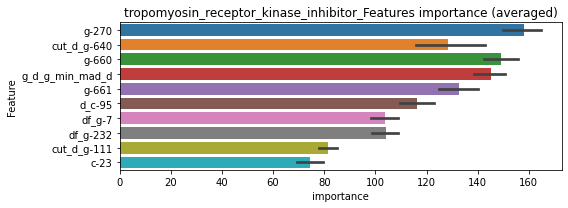

len(train_index) : 2859
len(valid_index) : 954
================================= fold 1/4 tropomyosin_receptor_kinase_inhibitor=================================


Training until validation scores don't improve for 30 rounds


len(train_index) : 2860
len(valid_index) : 953
================================= fold 2/4 tropomyosin_receptor_kinase_inhibitor=================================


Early stopping, best iteration is:
[910]	training's binary_logloss: 0.000152776	valid_1's binary_logloss: 0.000346213
Training until validation scores don't improve for 30 rounds


len(train_index) : 2860
len(valid_index) : 953
================================= fold 3/4 tropomyosin_receptor_kinase_inhibitor=================================


[1000]	training's binary_logloss: 0.00015045	valid_1's binary_logloss: 0.000554647
Early stopping, best iteration is:
[972]	training's binary_logloss: 0.00015045	valid_1's binary_logloss: 0.000554647
Training until validation scores don't improve for 30 rounds


len(train_index) : 2860
len(valid_index) : 953
================================= fold 4/4 tropomyosin_receptor_kinase_inhibitor=================================


[1000]	training's binary_logloss: 0.000150496	valid_1's binary_logloss: 0.000191346
Early stopping, best iteration is:
[981]	training's binary_logloss: 0.000150496	valid_1's binary_logloss: 0.000191346
Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.000150228	valid_1's binary_logloss: 0.000163535
Early stopping, best iteration is:
[1029]	training's binary_logloss: 0.000149843	valid_1's binary_logloss: 0.000163129


tropomyosin_receptor_kinase_inhibitor logloss: 0.0003138422443433888


neg labels: 3289 → selected neg labels: 3281


trpv_agonist, len(trt): 25, len(othr): 3281
target_rate: 0.0010498 → Adj_target_rate: 0.0012955
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00141373	valid_1's binary_logloss: 0.00698006
[600]	training's binary_logloss: 0.00036324	valid_1's binary_logloss: 0.00412844
Early stopping, best iteration is:
[580]	training's binary_logloss: 0.000367264	valid_1's binary_logloss: 0.00412514
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00141791	valid_1's binary_logloss: 0.00340516
[600]	training's binary_logloss: 0.00037063	valid_1's binary_logloss: 0.00150609
Early stopping, best iteration is:
[609]	training's binary_logloss: 0.000367907	valid_1's binary_logloss: 0.00150317
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00139596	valid_1's binary_logloss: 0.00333203
[600]	training's binary_logloss: 0.000365046	valid_1's binary_logloss: 0.0014376
Early stopping, best iteration is:
[594]	training's binary_logloss: 0.000365046	valid_1's binary_

1 / 3 AUC score:1.000
y_Threshold: 0.0018633, Threshold: 0.0081818, pos_neg_ratio: 0.8000000
Remove_noisy_data: 132 → Positive_corect_labels: 656/3805
p_label_rate: 0.0100452 Vs.target_rate: 0.00105
Num_p_label: 40.0, conf_0:0.00573, conf_1:0.01064
Num_p_label: 40.0, Expected: 4.2, Adj_threshold_1: 0.0081818
Num_p_label: 9.0, Expected: 4.2, Adj_threshold_2: 0.0481818
threshold: 0.0481818, positive_p_label: 9.0/3982, p_label_rate: 0.0022602
positive_y_label: 656.0/3805, y_label_rate: 0.1724047
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00132146	valid_1's binary_logloss: 0.00715372
Early stopping, best iteration is:
[564]	training's binary_logloss: 0.000364601	valid_1's binary_logloss: 0.00444055
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00131809	valid_1's binary_logloss: 0.00279565
[600]	training's binary_logloss: 0.000356053	valid_1's binary_logloss: 0.00109015
Early stopping, best iteration is:
[606]	training's binary_logloss: 0.000353593	valid_1's binary_logloss: 0.00108327
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00134278	valid_1's binary_logloss: 0.00258095
[600]	training's binary_logloss: 0.000358597	valid_1's binary_logloss: 0.000905434
Early stopping, best iteration is:
[667]	training's binary_logloss: 0.00035088	valid_1's binary_logloss: 0.000891961
Training until validation scores don't improve for 30 roun

2 / 3 AUC score:1.000
y_Threshold: 0.0227151, Threshold: 0.0481818, pos_neg_ratio: 0.8000000
Remove_noisy_data: 0 → Positive_corect_labels: 656.0/3805
p_label_rate: 0.0040181 Vs.target_rate: 0.00105
Num_p_label: 16.0, conf_0:0.03855, conf_1:0.05782
Num_p_label: 16.0, Expected: 4.2, Adj_threshold_1: 0.0481818
Num_p_label: 14.0, Expected: 4.2, Adj_threshold_2: 0.0881818
Num_p_label: 10.0, Expected: 4.2, Adj_threshold_3: 0.1281818
threshold: 0.1281818, positive_p_label: 10.0/3982, p_label_rate: 0.0025113
positive_y_label: 656.0/3805, y_label_rate: 0.1724047
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00132146	valid_1's binary_logloss: 0.00715372
Early stopping, best iteration is:
[564]	training's binary_logloss: 0.000364601	valid_1's binary_logloss: 0.00444055
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00131809	valid_1's binary_logloss: 0.00279565
[600]	training's binary_logloss: 0.000356053	valid_1's binary_logloss: 0.00109015
Early stopping, best iteration is:
[606]	training's binary_logloss: 0.000353593	valid_1's binary_logloss: 0.00108327
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00134278	valid_1's binary_logloss: 0.00258095
[600]	training's binary_logloss: 0.000358597	valid_1's binary_logloss: 0.000905434
Early stopping, best iteration is:
[667]	training's binary_logloss: 0.00035088	valid_1's binary_logloss: 0.000891961
Training until validation scores don't improve for 30 roun

3 / 3 AUC score:1.000
y_Threshold: 0.0227151, Threshold: 0.1281818, pos_neg_ratio: 0.8000000
Remove_noisy_data: 0 → Positive_corect_labels: 656.0/3805
p_label_rate: 0.0025113 Vs.target_rate: 0.00105
Num_p_label: 10.0, conf_0:0.11536, conf_1:0.14100
Num_p_label: 10.0, Expected: 4.2, Adj_threshold_1: 0.1281818
threshold: 0.1281818, positive_p_label: 10.0/3982, p_label_rate: 0.0025113
positive_y_label: 656.0/3805, y_label_rate: 0.1724047


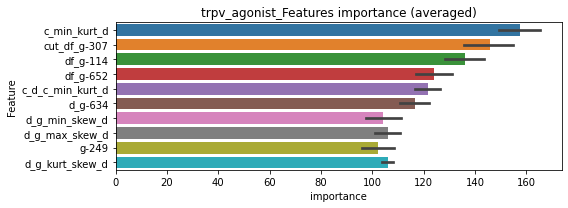

len(train_index) : 2853
len(valid_index) : 952
================================= fold 1/4 trpv_agonist=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[758]	training's binary_logloss: 0.000376763	valid_1's binary_logloss: 0.00325986


len(train_index) : 2854
len(valid_index) : 951
================================= fold 2/4 trpv_agonist=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[883]	training's binary_logloss: 0.000363267	valid_1's binary_logloss: 0.00102157


len(train_index) : 2854
len(valid_index) : 951
================================= fold 3/4 trpv_agonist=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[915]	training's binary_logloss: 0.000357716	valid_1's binary_logloss: 0.000834872


len(train_index) : 2854
len(valid_index) : 951
================================= fold 4/4 trpv_agonist=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[734]	training's binary_logloss: 0.000383737	valid_1's binary_logloss: 0.00326664


trpv_agonist logloss: 0.002096041861104126


neg labels: 3289 → selected neg labels: 3280


trpv_antagonist, len(trt): 48, len(othr): 3280
target_rate: 0.0020156 → Adj_target_rate: 0.0022556
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00255326	valid_1's binary_logloss: 0.0295063
Early stopping, best iteration is:
[399]	training's binary_logloss: 0.00115651	valid_1's binary_logloss: 0.0279546
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00265046	valid_1's binary_logloss: 0.0129157
[600]	training's binary_logloss: 0.000552182	valid_1's binary_logloss: 0.00698845
Early stopping, best iteration is:
[684]	training's binary_logloss: 0.000485228	valid_1's binary_logloss: 0.00668762
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0027882	valid_1's binary_logloss: 0.00710184
[600]	training's binary_logloss: 0.00057251	valid_1's binary_logloss: 0.00262925
Early stopping, best iteration is:
[705]	training's binary_logloss: 0.000492617	valid_1's binary_logloss: 0.00245868
Training until validation scores don't improve for 30 rounds
[300

1 / 3 AUC score:0.999
y_Threshold: 0.0042806, Threshold: 0.0171105, pos_neg_ratio: 0.8000000


Early stopping, best iteration is:
[504]	training's binary_logloss: 0.000717585	valid_1's binary_logloss: 0.0221746


Remove_noisy_data: 136 → Positive_corect_labels: 654/3800
p_label_rate: 0.0100452 Vs.target_rate: 0.00202
Num_p_label: 40.0, conf_0:0.01198, conf_1:0.02224
Num_p_label: 40.0, Expected: 8.0, Adj_threshold_1: 0.0171105
Num_p_label: 10.0, Expected: 8.0, Adj_threshold_2: 0.0571105
threshold: 0.0571105, positive_p_label: 10.0/3982, p_label_rate: 0.0025113
positive_y_label: 654.0/3800, y_label_rate: 0.1721053
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00239197	valid_1's binary_logloss: 0.0174197
[600]	training's binary_logloss: 0.000520173	valid_1's binary_logloss: 0.012261
Early stopping, best iteration is:
[584]	training's binary_logloss: 0.000539261	valid_1's binary_logloss: 0.0122156
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00250173	valid_1's binary_logloss: 0.0127666
[600]	training's binary_logloss: 0.000533996	valid_1's binary_logloss: 0.00879592
Early stopping, best iteration is:
[679]	training's binary_logloss: 0.000471912	valid_1's binary_logloss: 0.0086602
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00237815	valid_1's binary_logloss: 0.0133519
[600]	training's binary_logloss: 0.000527131	valid_1's binary_logloss: 0.00911815
Early stopping, best iteration is:
[631]	training's binary_logloss: 0.000495201	valid_1's binary_logl

2 / 3 AUC score:1.000
y_Threshold: 0.0270667, Threshold: 0.0571105, pos_neg_ratio: 0.8000000
Remove_noisy_data: 4 → Positive_corect_labels: 652.0/3796
p_label_rate: 0.0062783 Vs.target_rate: 0.00202
Num_p_label: 25.0, conf_0:0.04569, conf_1:0.06853
Num_p_label: 25.0, Expected: 8.0, Adj_threshold_1: 0.0571105
Num_p_label: 14.0, Expected: 8.0, Adj_threshold_2: 0.0971105
threshold: 0.0971105, positive_p_label: 14.0/3982, p_label_rate: 0.0035158
positive_y_label: 652.0/3796, y_label_rate: 0.1717597
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00232812	valid_1's binary_logloss: 0.0145639
[600]	training's binary_logloss: 0.000516563	valid_1's binary_logloss: 0.00945198
Early stopping, best iteration is:
[664]	training's binary_logloss: 0.000466951	valid_1's binary_logloss: 0.00928464
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00228115	valid_1's binary_logloss: 0.0234638
[600]	training's binary_logloss: 0.000508758	valid_1's binary_logloss: 0.018024
Early stopping, best iteration is:
[620]	training's binary_logloss: 0.000489678	valid_1's binary_logloss: 0.0179024
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00238286	valid_1's binary_logloss: 0.00918603
[600]	training's binary_logloss: 0.000529375	valid_1's binary_logloss: 0.00518324
Early stopping, best iteration is:
[673]	training's binary_logloss: 0.00047303	valid_1's binary_log

3 / 3 AUC score:1.000
y_Threshold: 0.0267365, Threshold: 0.0971105, pos_neg_ratio: 0.8000000
Remove_noisy_data: 0 → Positive_corect_labels: 652.0/3796
p_label_rate: 0.0045203 Vs.target_rate: 0.00202
Num_p_label: 18.0, conf_0:0.08740, conf_1:0.10682
Num_p_label: 18.0, Expected: 8.0, Adj_threshold_1: 0.0971105
threshold: 0.0971105, positive_p_label: 18.0/3982, p_label_rate: 0.0045203
positive_y_label: 652.0/3796, y_label_rate: 0.1717597


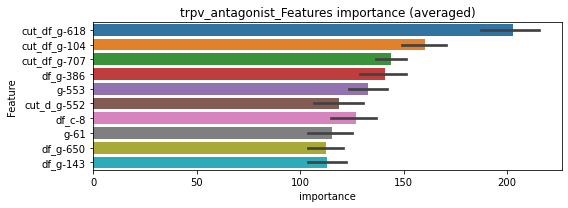

len(train_index) : 2847
len(valid_index) : 949
================================= fold 1/4 trpv_antagonist=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[919]	training's binary_logloss: 0.000470745	valid_1's binary_logloss: 0.00762284


len(train_index) : 2847
len(valid_index) : 949
================================= fold 2/4 trpv_antagonist=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[767]	training's binary_logloss: 0.000523271	valid_1's binary_logloss: 0.0182937


len(train_index) : 2847
len(valid_index) : 949
================================= fold 3/4 trpv_antagonist=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[717]	training's binary_logloss: 0.000560737	valid_1's binary_logloss: 0.00463644


len(train_index) : 2847
len(valid_index) : 949
================================= fold 4/4 trpv_antagonist=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[900]	training's binary_logloss: 0.000483511	valid_1's binary_logloss: 0.00536753


trpv_antagonist logloss: 0.008980132006786367


neg labels: 3289 → selected neg labels: 3253


tubulin_inhibitor, len(trt): 316, len(othr): 3253
target_rate: 0.0132695 → Adj_target_rate: 0.0111926
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0383478	valid_1's binary_logloss: 0.288047
Early stopping, best iteration is:
[301]	training's binary_logloss: 0.0380627	valid_1's binary_logloss: 0.28792
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0351162	valid_1's binary_logloss: 0.287913
Early stopping, best iteration is:
[312]	training's binary_logloss: 0.0321434	valid_1's binary_logloss: 0.287507
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0378884	valid_1's binary_logloss: 0.274578
Early stopping, best iteration is:
[313]	training's binary_logloss: 0.0347319	valid_1's binary_logloss: 0.273459
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0372113	valid_1's binary_logloss: 0.272346
Early stopping, best iteration is:
[285]	training's binary_logloss: 0.0410649	valid_1's binary_logloss: 0.

1 / 3 AUC score:0.861
y_Threshold: 0.0942292, Threshold: 0.2114064, pos_neg_ratio: 0.8000000
Remove_noisy_data: 489 → Positive_corect_labels: 471/3414
p_label_rate: 0.0100452 Vs.target_rate: 0.01327
Num_p_label: 40.0, conf_0:0.14798, conf_1:0.27483
threshold: 0.2114064, positive_p_label: 40.0/3982, p_label_rate: 0.0100452
positive_y_label: 471.0/3414, y_label_rate: 0.1379613
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[247]	training's binary_logloss: 0.0205878	valid_1's binary_logloss: 0.185091
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0145521	valid_1's binary_logloss: 0.152656
Early stopping, best iteration is:
[399]	training's binary_logloss: 0.0066024	valid_1's binary_logloss: 0.14805
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0130174	valid_1's binary_logloss: 0.136373
Early stopping, best iteration is:
[385]	training's binary_logloss: 0.00649573	valid_1's binary_logloss: 0.131076
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0141918	valid_1's binary_logloss: 0.141738
Early stopping, best iteration is:
[495]	training's binary_logloss: 0.00358534	valid_1's binary_logloss: 0.131922


2 / 3 AUC score:0.977
y_Threshold: 0.0655561, Threshold: 0.2114064, pos_neg_ratio: 0.8000000
Remove_noisy_data: 108 → Positive_corect_labels: 417.0/3306
p_label_rate: 0.0050226 Vs.target_rate: 0.01327
Num_p_label: 20.0, conf_0:0.16913, conf_1:0.25369
Num_p_label: 20.0, Expected: 52.8, Adj_threshold_1: 0.2114064
Num_p_label: 30.0, Expected: 52.8, Adj_threshold_2: 0.1814064
Num_p_label: 40.0, Expected: 52.8, Adj_threshold_3: 0.1514064
threshold: 0.1514064, positive_p_label: 40.0/3982, p_label_rate: 0.0100452
positive_y_label: 417.0/3306, y_label_rate: 0.1261343
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00956083	valid_1's binary_logloss: 0.147833
Early stopping, best iteration is:
[403]	training's binary_logloss: 0.00430599	valid_1's binary_logloss: 0.143935
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0103193	valid_1's binary_logloss: 0.102836
Early stopping, best iteration is:
[489]	training's binary_logloss: 0.00284248	valid_1's binary_logloss: 0.090035
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00965862	valid_1's binary_logloss: 0.118434
Early stopping, best iteration is:
[406]	training's binary_logloss: 0.00424292	valid_1's binary_logloss: 0.112686
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00961491	valid_1's binary_logloss: 0.113445
Early stopping, best iteration is:
[509]	training's binary_logloss: 0.00239082	valid_1's binary_log

3 / 3 AUC score:0.992
y_Threshold: 0.0437246, Threshold: 0.1514064, pos_neg_ratio: 0.8000000
Remove_noisy_data: 58 → Positive_corect_labels: 388.0/3248
p_label_rate: 0.0062783 Vs.target_rate: 0.01327
Num_p_label: 25.0, conf_0:0.13627, conf_1:0.16655
Num_p_label: 25.0, Expected: 52.8, Adj_threshold_1: 0.1514064
Num_p_label: 34.0, Expected: 52.8, Adj_threshold_2: 0.1214064
threshold: 0.1214064, positive_p_label: 34.0/3982, p_label_rate: 0.0085384
positive_y_label: 388.0/3248, y_label_rate: 0.1194581


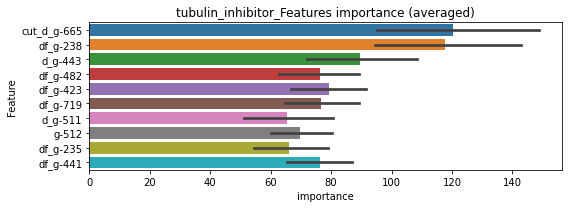

len(train_index) : 2436
len(valid_index) : 812
================================= fold 1/4 tubulin_inhibitor=================================


Training until validation scores don't improve for 30 rounds


len(train_index) : 2436
len(valid_index) : 812
================================= fold 2/4 tubulin_inhibitor=================================


Early stopping, best iteration is:
[230]	training's binary_logloss: 0.0048889	valid_1's binary_logloss: 0.108431
Training until validation scores don't improve for 30 rounds


len(train_index) : 2436
len(valid_index) : 812
================================= fold 3/4 tubulin_inhibitor=================================


Early stopping, best iteration is:
[171]	training's binary_logloss: 0.00778498	valid_1's binary_logloss: 0.121881
Training until validation scores don't improve for 30 rounds


len(train_index) : 2436
len(valid_index) : 812
================================= fold 4/4 tubulin_inhibitor=================================


Early stopping, best iteration is:
[449]	training's binary_logloss: 0.00210206	valid_1's binary_logloss: 0.0679038
Training until validation scores don't improve for 30 rounds


tubulin_inhibitor logloss: 0.10181858586560895
tubulin_inhibitor clipping


Early stopping, best iteration is:
[271]	training's binary_logloss: 0.0038771	valid_1's binary_logloss: 0.109059
neg labels: 3289 → selected neg labels: 3281


tyrosine_kinase_inhibitor, len(trt): 73, len(othr): 3281
target_rate: 0.0030654 → Adj_target_rate: 0.0032212
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0043704	valid_1's binary_logloss: 0.0448703
[600]	training's binary_logloss: 0.000809914	valid_1's binary_logloss: 0.0369406
Early stopping, best iteration is:
[616]	training's binary_logloss: 0.000780735	valid_1's binary_logloss: 0.0367205
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.004018	valid_1's binary_logloss: 0.0399763
[600]	training's binary_logloss: 0.000798305	valid_1's binary_logloss: 0.0337761
Early stopping, best iteration is:
[635]	training's binary_logloss: 0.000735184	valid_1's binary_logloss: 0.0334741
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00453815	valid_1's binary_logloss: 0.0273659
[600]	training's binary_logloss: 0.000845687	valid_1's binary_logloss: 0.0223135
Early stopping, best iteration is:
[605]	training's binary_logloss: 0.000834077	valid_1's binary_logloss:

1 / 3 AUC score:0.999
y_Threshold: 0.0058084, Threshold: 0.0566266, pos_neg_ratio: 0.8000000
Remove_noisy_data: 138 → Positive_corect_labels: 653/3799
p_label_rate: 0.0100452 Vs.target_rate: 0.00307
Num_p_label: 40.0, conf_0:0.03964, conf_1:0.07361
Num_p_label: 40.0, Expected: 12.2, Adj_threshold_1: 0.0566266
Num_p_label: 18.0, Expected: 12.2, Adj_threshold_2: 0.0966266
threshold: 0.0966266, positive_p_label: 18.0/3982, p_label_rate: 0.0045203
positive_y_label: 653.0/3799, y_label_rate: 0.1718873
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00359782	valid_1's binary_logloss: 0.0517907
Early stopping, best iteration is:
[393]	training's binary_logloss: 0.00169948	valid_1's binary_logloss: 0.0487844
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00399302	valid_1's binary_logloss: 0.0278567
[600]	training's binary_logloss: 0.000778251	valid_1's binary_logloss: 0.0194687
Early stopping, best iteration is:
[678]	training's binary_logloss: 0.000664756	valid_1's binary_logloss: 0.0190673
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00389006	valid_1's binary_logloss: 0.0361067
[600]	training's binary_logloss: 0.000769206	valid_1's binary_logloss: 0.0304817
Early stopping, best iteration is:
[609]	training's binary_logloss: 0.000751457	valid_1's binary_logloss: 0.0304178
Training until validation scores don't improve for 30 rounds
[300]	t

2 / 3 AUC score:1.000
y_Threshold: 0.0203230, Threshold: 0.0966266, pos_neg_ratio: 0.8000000
Remove_noisy_data: 12 → Positive_corect_labels: 647.0/3787
p_label_rate: 0.0168257 Vs.target_rate: 0.00307
Num_p_label: 67.0, conf_0:0.07730, conf_1:0.11595
Num_p_label: 67.0, Expected: 12.2, Adj_threshold_1: 0.0966266
Num_p_label: 59.0, Expected: 12.2, Adj_threshold_2: 0.1366266
Num_p_label: 52.0, Expected: 12.2, Adj_threshold_3: 0.1766266
Num_p_label: 44.0, Expected: 12.2, Adj_threshold_4: 0.2166266
Num_p_label: 37.0, Expected: 12.2, Adj_threshold_5: 0.2566266
Num_p_label: 34.0, Expected: 12.2, Adj_threshold_6: 0.2966266
Num_p_label: 30.0, Expected: 12.2, Adj_threshold_7: 0.3366266
Num_p_label: 25.0, Expected: 12.2, Adj_threshold_8: 0.3766266
Num_p_label: 22.0, Expected: 12.2, Adj_threshold_9: 0.4166266
Num_p_label: 17.0, Expected: 12.2, Adj_threshold_10: 0.4566266
threshold: 0.4566266, positive_p_label: 17.0/3982, p_label_rate: 0.0042692
positive_y_label: 647.0/3787, y_label_rate: 0.1708476


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00372222	valid_1's binary_logloss: 0.0326826
[600]	training's binary_logloss: 0.000740164	valid_1's binary_logloss: 0.025468
Early stopping, best iteration is:
[678]	training's binary_logloss: 0.000634487	valid_1's binary_logloss: 0.0251904
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00344395	valid_1's binary_logloss: 0.0352676
[600]	training's binary_logloss: 0.000719884	valid_1's binary_logloss: 0.0279732
Early stopping, best iteration is:
[592]	training's binary_logloss: 0.000732898	valid_1's binary_logloss: 0.0278252
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00383801	valid_1's binary_logloss: 0.0338774
[600]	training's binary_logloss: 0.000740818	valid_1's binary_logloss: 0.0270356
Early stopping, best iteration is:
[642]	training's binary_logloss: 0.000676355	valid_1's binary_loglos

3 / 3 AUC score:1.000
y_Threshold: 0.0198637, Threshold: 0.4566266, pos_neg_ratio: 0.8000000
Remove_noisy_data: 6 → Positive_corect_labels: 644.0/3781
p_label_rate: 0.0055249 Vs.target_rate: 0.00307
Num_p_label: 22.0, conf_0:0.41096, conf_1:0.50229
Num_p_label: 22.0, Expected: 12.2, Adj_threshold_1: 0.4566266
Num_p_label: 19.0, Expected: 12.2, Adj_threshold_2: 0.4966266
Num_p_label: 15.0, Expected: 12.2, Adj_threshold_3: 0.5366266
threshold: 0.5366266, positive_p_label: 15.0/3982, p_label_rate: 0.0037670
positive_y_label: 644.0/3781, y_label_rate: 0.1703253


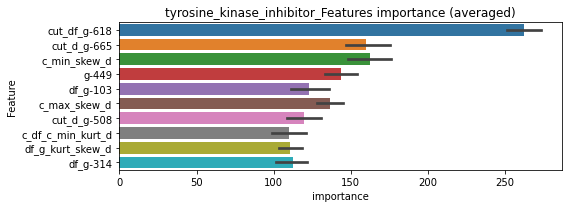

len(train_index) : 2835
len(valid_index) : 946
================================= fold 1/4 tyrosine_kinase_inhibitor=================================


Training until validation scores don't improve for 30 rounds


len(train_index) : 2836
len(valid_index) : 945
================================= fold 2/4 tyrosine_kinase_inhibitor=================================


Early stopping, best iteration is:
[358]	training's binary_logloss: 0.00139231	valid_1's binary_logloss: 0.0254969
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[881]	training's binary_logloss: 0.000618703	valid_1's binary_logloss: 0.0188395


len(train_index) : 2836
len(valid_index) : 945
================================= fold 3/4 tyrosine_kinase_inhibitor=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[555]	training's binary_logloss: 0.000889395	valid_1's binary_logloss: 0.0172181


len(train_index) : 2836
len(valid_index) : 945
================================= fold 4/4 tyrosine_kinase_inhibitor=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[853]	training's binary_logloss: 0.000629854	valid_1's binary_logloss: 0.0237561


tyrosine_kinase_inhibitor logloss: 0.021328760416729365
tyrosine_kinase_inhibitor clipping


neg labels: 3289 → selected neg labels: 3287


ubiquitin_specific_protease_inhibitor, len(trt): 12, len(othr): 3287
target_rate: 0.0005039 → Adj_target_rate: 0.0006942
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00059267	valid_1's binary_logloss: 0.00386109
Early stopping, best iteration is:
[523]	training's binary_logloss: 0.000235673	valid_1's binary_logloss: 0.00300723
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.000611952	valid_1's binary_logloss: 0.00149391
Early stopping, best iteration is:
[559]	training's binary_logloss: 0.000231302	valid_1's binary_logloss: 0.000850807
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.000614915	valid_1's binary_logloss: 0.000787126
Early stopping, best iteration is:
[558]	training's binary_logloss: 0.000234578	valid_1's binary_logloss: 0.000320436
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.000607679	valid_1's binary_logloss: 0.00251268


1 / 3 AUC score:1.000
y_Threshold: 0.0008559, Threshold: 0.0029952, pos_neg_ratio: 0.8000000
Remove_noisy_data: 132 → Positive_corect_labels: 657/3812


Early stopping, best iteration is:
[522]	training's binary_logloss: 0.000236972	valid_1's binary_logloss: 0.00183087


p_label_rate: 0.0100452 Vs.target_rate: 0.00050
Num_p_label: 40.0, conf_0:0.00210, conf_1:0.00389
Num_p_label: 40.0, Expected: 2.0, Adj_threshold_1: 0.0029952
Num_p_label: 1.0, Expected: 2.0, Adj_threshold_2: 0.0429952
threshold: 0.0429952, positive_p_label: 1.0/3982, p_label_rate: 0.0002511
positive_y_label: 657.0/3812, y_label_rate: 0.1723505
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.000563005	valid_1's binary_logloss: 0.00477022
Early stopping, best iteration is:
[476]	training's binary_logloss: 0.000237488	valid_1's binary_logloss: 0.00407578
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.000581623	valid_1's binary_logloss: 0.0012376
Early stopping, best iteration is:
[552]	training's binary_logloss: 0.000224345	valid_1's binary_logloss: 0.000686165
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.000593281	valid_1's binary_logloss: 0.000679964
Early stopping, best iteration is:
[524]	training's binary_logloss: 0.000230498	valid_1's binary_logloss: 0.000273652
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.000574005	valid_1's binary_logloss: 0.00328643
Early stopping, best iteration is:
[504]	training's binary_logloss: 0.00023

2 / 3 AUC score:1.000
y_Threshold: 0.0127387, Threshold: 0.0429952, pos_neg_ratio: 0.8000000
Remove_noisy_data: 0 → Positive_corect_labels: 657.0/3812
p_label_rate: 0.0015068 Vs.target_rate: 0.00050
Num_p_label: 6.0, conf_0:0.03440, conf_1:0.05159
Num_p_label: 6.0, Expected: 2.0, Adj_threshold_1: 0.0429952
Num_p_label: 4.0, Expected: 2.0, Adj_threshold_2: 0.0829952
threshold: 0.0829952, positive_p_label: 4.0/3982, p_label_rate: 0.0010045
positive_y_label: 657.0/3812, y_label_rate: 0.1723505
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.000563005	valid_1's binary_logloss: 0.00477022
Early stopping, best iteration is:
[476]	training's binary_logloss: 0.000237488	valid_1's binary_logloss: 0.00407578
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.000581623	valid_1's binary_logloss: 0.0012376
Early stopping, best iteration is:
[552]	training's binary_logloss: 0.000224345	valid_1's binary_logloss: 0.000686165
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.000593281	valid_1's binary_logloss: 0.000679964
Early stopping, best iteration is:
[524]	training's binary_logloss: 0.000230498	valid_1's binary_logloss: 0.000273652
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.000574005	valid_1's binary_logloss: 0.00328643


3 / 3 AUC score:1.000
y_Threshold: 0.0127387, Threshold: 0.0829952, pos_neg_ratio: 0.8000000
Remove_noisy_data: 0 → Positive_corect_labels: 657.0/3812
p_label_rate: 0.0010045 Vs.target_rate: 0.00050
Num_p_label: 4.0, conf_0:0.07470, conf_1:0.09129
Num_p_label: 4.0, Expected: 2.0, Adj_threshold_1: 0.0829952


Early stopping, best iteration is:
[504]	training's binary_logloss: 0.000231731	valid_1's binary_logloss: 0.0025872


threshold: 0.0829952, positive_p_label: 4.0/3982, p_label_rate: 0.0010045
positive_y_label: 657.0/3812, y_label_rate: 0.1723505


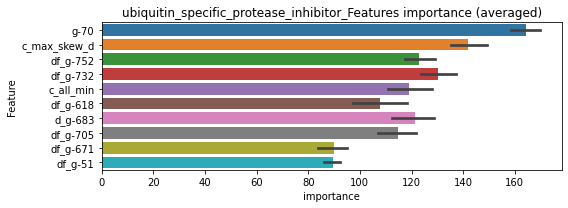

len(train_index) : 2859
len(valid_index) : 953
================================= fold 1/4 ubiquitin_specific_protease_inhibitor=================================


Training until validation scores don't improve for 30 rounds


len(train_index) : 2859
len(valid_index) : 953
================================= fold 2/4 ubiquitin_specific_protease_inhibitor=================================


Early stopping, best iteration is:
[839]	training's binary_logloss: 0.000235978	valid_1's binary_logloss: 0.00256235
Training until validation scores don't improve for 30 rounds


len(train_index) : 2859
len(valid_index) : 953
================================= fold 3/4 ubiquitin_specific_protease_inhibitor=================================


Early stopping, best iteration is:
[958]	training's binary_logloss: 0.000230545	valid_1's binary_logloss: 0.000700915
Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.000233041	valid_1's binary_logloss: 0.000291047
Early stopping, best iteration is:
[990]	training's binary_logloss: 0.000233041	valid_1's binary_logloss: 0.000291047


len(train_index) : 2859
len(valid_index) : 953
================================= fold 4/4 ubiquitin_specific_protease_inhibitor=================================


Training until validation scores don't improve for 30 rounds


ubiquitin_specific_protease_inhibitor logloss: 0.0013431901808436968


Early stopping, best iteration is:
[901]	training's binary_logloss: 0.000232868	valid_1's binary_logloss: 0.00181808
neg labels: 3289 → selected neg labels: 3264


vegfr_inhibitor, len(trt): 170, len(othr): 3264
target_rate: 0.0071387 → Adj_target_rate: 0.0066081
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0145629	valid_1's binary_logloss: 0.156576
Early stopping, best iteration is:
[399]	training's binary_logloss: 0.0064695	valid_1's binary_logloss: 0.153677
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0157993	valid_1's binary_logloss: 0.110389
[600]	training's binary_logloss: 0.00226849	valid_1's binary_logloss: 0.0954339
Early stopping, best iteration is:
[605]	training's binary_logloss: 0.0022258	valid_1's binary_logloss: 0.0953231
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.016464	valid_1's binary_logloss: 0.119402
Early stopping, best iteration is:
[441]	training's binary_logloss: 0.00556031	valid_1's binary_logloss: 0.114406
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0157906	valid_1's binary_logloss: 0.130993
Early stopping, best ite

1 / 3 AUC score:0.976
y_Threshold: 0.0293286, Threshold: 0.2000832, pos_neg_ratio: 0.8000000
Remove_noisy_data: 218 → Positive_corect_labels: 609/3698
p_label_rate: 0.0100452 Vs.target_rate: 0.00714
Num_p_label: 40.0, conf_0:0.14006, conf_1:0.26011
threshold: 0.2000832, positive_p_label: 40.0/3982, p_label_rate: 0.0100452
positive_y_label: 609.0/3698, y_label_rate: 0.1646836
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00951982	valid_1's binary_logloss: 0.10947
Early stopping, best iteration is:
[418]	training's binary_logloss: 0.00371642	valid_1's binary_logloss: 0.104632
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0108251	valid_1's binary_logloss: 0.100346
[600]	training's binary_logloss: 0.00167642	valid_1's binary_logloss: 0.0858376
Early stopping, best iteration is:
[682]	training's binary_logloss: 0.00129944	valid_1's binary_logloss: 0.084983
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0110559	valid_1's binary_logloss: 0.0891802
[600]	training's binary_logloss: 0.00167467	valid_1's binary_logloss: 0.0766742
Early stopping, best iteration is:
[590]	training's binary_logloss: 0.0017407	valid_1's binary_logloss: 0.0763346
Training until validation scores don't improve for 30 rounds
[300]	training's bi

2 / 3 AUC score:0.994
y_Threshold: 0.0419632, Threshold: 0.2000832, pos_neg_ratio: 0.8000000
Remove_noisy_data: 50 → Positive_corect_labels: 584.0/3648
p_label_rate: 0.0175791 Vs.target_rate: 0.00714
Num_p_label: 70.0, conf_0:0.16007, conf_1:0.24010
Num_p_label: 70.0, Expected: 28.4, Adj_threshold_1: 0.2000832
Num_p_label: 60.0, Expected: 28.4, Adj_threshold_2: 0.2400832
Num_p_label: 50.0, Expected: 28.4, Adj_threshold_3: 0.2800832
Num_p_label: 39.0, Expected: 28.4, Adj_threshold_4: 0.3200832
threshold: 0.3200832, positive_p_label: 39.0/3982, p_label_rate: 0.0097941
positive_y_label: 584.0/3648, y_label_rate: 0.1600877
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00862449	valid_1's binary_logloss: 0.100863
Early stopping, best iteration is:
[462]	training's binary_logloss: 0.00264565	valid_1's binary_logloss: 0.0956844
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00891944	valid_1's binary_logloss: 0.0689371
[600]	training's binary_logloss: 0.00149328	valid_1's binary_logloss: 0.0512615
Early stopping, best iteration is:
[647]	training's binary_logloss: 0.00129075	valid_1's binary_logloss: 0.0506044
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00904865	valid_1's binary_logloss: 0.0815018
[600]	training's binary_logloss: 0.0014749	valid_1's binary_logloss: 0.0685933
Early stopping, best iteration is:
[586]	training's binary_logloss: 0.00154681	valid_1's binary_logloss: 0.0682122
Training until validation scores don't improve for 30 rounds
[300]	trainin

3 / 3 AUC score:0.997
y_Threshold: 0.0364533, Threshold: 0.3200832, pos_neg_ratio: 0.8000000
Remove_noisy_data: 28 → Positive_corect_labels: 570.0/3620
p_label_rate: 0.0100452 Vs.target_rate: 0.00714
Num_p_label: 40.0, conf_0:0.28807, conf_1:0.35209
threshold: 0.3200832, positive_p_label: 40.0/3982, p_label_rate: 0.0100452
positive_y_label: 570.0/3620, y_label_rate: 0.1574586


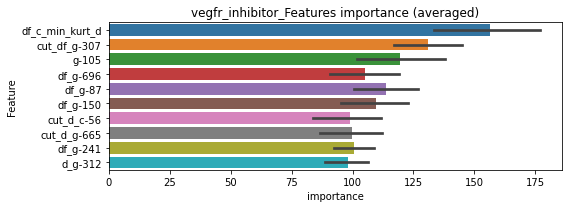

len(train_index) : 2715
len(valid_index) : 905
================================= fold 1/4 vegfr_inhibitor=================================


Training until validation scores don't improve for 30 rounds


len(train_index) : 2715
len(valid_index) : 905
================================= fold 2/4 vegfr_inhibitor=================================


Early stopping, best iteration is:
[291]	training's binary_logloss: 0.00305412	valid_1's binary_logloss: 0.0784959
Training until validation scores don't improve for 30 rounds


len(train_index) : 2715
len(valid_index) : 905
================================= fold 3/4 vegfr_inhibitor=================================


Early stopping, best iteration is:
[260]	training's binary_logloss: 0.00355691	valid_1's binary_logloss: 0.0861097
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[399]	training's binary_logloss: 0.00204468	valid_1's binary_logloss: 0.061245


len(train_index) : 2715
len(valid_index) : 905
================================= fold 4/4 vegfr_inhibitor=================================


Training until validation scores don't improve for 30 rounds


vegfr_inhibitor logloss: 0.07076236746663293
vegfr_inhibitor clipping


Early stopping, best iteration is:
[414]	training's binary_logloss: 0.00195111	valid_1's binary_logloss: 0.0571988
neg labels: 3289 → selected neg labels: 3286


vitamin_b, len(trt): 26, len(othr): 3286
target_rate: 0.0010918 → Adj_target_rate: 0.0013394
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00147942	valid_1's binary_logloss: 0.00452244
[600]	training's binary_logloss: 0.000361503	valid_1's binary_logloss: 0.00180611
Early stopping, best iteration is:
[603]	training's binary_logloss: 0.000361393	valid_1's binary_logloss: 0.00180489
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00144044	valid_1's binary_logloss: 0.00567937
[600]	training's binary_logloss: 0.000356132	valid_1's binary_logloss: 0.00295821
Early stopping, best iteration is:
[590]	training's binary_logloss: 0.000356132	valid_1's binary_logloss: 0.00295821
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00143928	valid_1's binary_logloss: 0.00449413
[600]	training's binary_logloss: 0.000360716	valid_1's binary_logloss: 0.00208833
Early stopping, best iteration is:
[618]	training's binary_logloss: 0.000357528	valid_1's bina

1 / 3 AUC score:1.000
y_Threshold: 0.0026087, Threshold: 0.0118848, pos_neg_ratio: 0.8000000


Early stopping, best iteration is:
[554]	training's binary_logloss: 0.000372858	valid_1's binary_logloss: 0.00651035


Remove_noisy_data: 132 → Positive_corect_labels: 657/3811
p_label_rate: 0.0100452 Vs.target_rate: 0.00109
Num_p_label: 40.0, conf_0:0.00832, conf_1:0.01545
Num_p_label: 40.0, Expected: 4.3, Adj_threshold_1: 0.0118848
Num_p_label: 8.0, Expected: 4.3, Adj_threshold_2: 0.0518848
threshold: 0.0518848, positive_p_label: 8.0/3982, p_label_rate: 0.0020090
positive_y_label: 657.0/3811, y_label_rate: 0.1723957
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00133617	valid_1's binary_logloss: 0.00499757
[600]	training's binary_logloss: 0.000353806	valid_1's binary_logloss: 0.00239058
Early stopping, best iteration is:
[576]	training's binary_logloss: 0.000353934	valid_1's binary_logloss: 0.00239057
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00132659	valid_1's binary_logloss: 0.00409413
[600]	training's binary_logloss: 0.000344442	valid_1's binary_logloss: 0.00197561
Early stopping, best iteration is:
[599]	training's binary_logloss: 0.000344443	valid_1's binary_logloss: 0.0019756
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00132619	valid_1's binary_logloss: 0.00493892
Early stopping, best iteration is:
[551]	training's binary_logloss: 0.000360555	valid_1's binary_logloss: 0.00265016
Training until validation scores don't improve for 30 rounds

2 / 3 AUC score:1.000
y_Threshold: 0.0414412, Threshold: 0.0518848, pos_neg_ratio: 0.8000000
Remove_noisy_data: 0 → Positive_corect_labels: 657.0/3811


[600]	training's binary_logloss: 0.000347837	valid_1's binary_logloss: 0.00735631
Early stopping, best iteration is:
[573]	training's binary_logloss: 0.000352318	valid_1's binary_logloss: 0.00731091


p_label_rate: 0.0072828 Vs.target_rate: 0.00109
Num_p_label: 29.0, conf_0:0.04151, conf_1:0.06226
Num_p_label: 29.0, Expected: 4.3, Adj_threshold_1: 0.0518848
Num_p_label: 19.0, Expected: 4.3, Adj_threshold_2: 0.0918848
Num_p_label: 14.0, Expected: 4.3, Adj_threshold_3: 0.1318848
Num_p_label: 11.0, Expected: 4.3, Adj_threshold_4: 0.1718848
Num_p_label: 9.0, Expected: 4.3, Adj_threshold_5: 0.2118848
threshold: 0.2118848, positive_p_label: 9.0/3982, p_label_rate: 0.0022602
positive_y_label: 657.0/3811, y_label_rate: 0.1723957
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00133617	valid_1's binary_logloss: 0.00499757
[600]	training's binary_logloss: 0.000353806	valid_1's binary_logloss: 0.00239058
Early stopping, best iteration is:
[576]	training's binary_logloss: 0.000353934	valid_1's binary_logloss: 0.00239057
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00132659	valid_1's binary_logloss: 0.00409413
[600]	training's binary_logloss: 0.000344442	valid_1's binary_logloss: 0.00197561
Early stopping, best iteration is:
[599]	training's binary_logloss: 0.000344443	valid_1's binary_logloss: 0.0019756
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00132619	valid_1's binary_logloss: 0.00493892
Early stopping, best iteration is:
[551]	training's binary_logloss: 0.000360555	valid_1's binary_logloss: 0.00265016
Training until validation scores don't improve for 30 rounds

3 / 3 AUC score:1.000
y_Threshold: 0.0414412, Threshold: 0.2118848, pos_neg_ratio: 0.8000000
Remove_noisy_data: 0 → Positive_corect_labels: 657.0/3811
p_label_rate: 0.0022602 Vs.target_rate: 0.00109
Num_p_label: 9.0, conf_0:0.19070, conf_1:0.23307


[600]	training's binary_logloss: 0.000347837	valid_1's binary_logloss: 0.00735631
Early stopping, best iteration is:
[573]	training's binary_logloss: 0.000352318	valid_1's binary_logloss: 0.00731091


Num_p_label: 9.0, Expected: 4.3, Adj_threshold_1: 0.2118848
threshold: 0.2118848, positive_p_label: 9.0/3982, p_label_rate: 0.0022602
positive_y_label: 657.0/3811, y_label_rate: 0.1723957


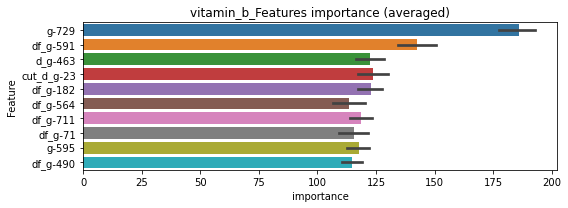

len(train_index) : 2858
len(valid_index) : 953
================================= fold 1/4 vitamin_b=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[797]	training's binary_logloss: 0.000363591	valid_1's binary_logloss: 0.00205156


len(train_index) : 2858
len(valid_index) : 953
================================= fold 2/4 vitamin_b=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[805]	training's binary_logloss: 0.000357033	valid_1's binary_logloss: 0.0015339


len(train_index) : 2858
len(valid_index) : 953
================================= fold 3/4 vitamin_b=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[896]	training's binary_logloss: 0.000351804	valid_1's binary_logloss: 0.00202646


len(train_index) : 2859
len(valid_index) : 952
================================= fold 4/4 vitamin_b=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[764]	training's binary_logloss: 0.000364339	valid_1's binary_logloss: 0.00467487


vitamin_b logloss: 0.0025714425964808297


neg labels: 3289 → selected neg labels: 3284


vitamin_d_receptor_agonist, len(trt): 39, len(othr): 3284
target_rate: 0.0016377 → Adj_target_rate: 0.0018906
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0022444	valid_1's binary_logloss: 0.013081
[600]	training's binary_logloss: 0.000468433	valid_1's binary_logloss: 0.00882207
Early stopping, best iteration is:
[614]	training's binary_logloss: 0.000458838	valid_1's binary_logloss: 0.00877572
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00231246	valid_1's binary_logloss: 0.0101732
[600]	training's binary_logloss: 0.000472457	valid_1's binary_logloss: 0.00559785
Early stopping, best iteration is:
[666]	training's binary_logloss: 0.000435562	valid_1's binary_logloss: 0.00545698
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00237366	valid_1's binary_logloss: 0.00579267
[600]	training's binary_logloss: 0.000481889	valid_1's binary_logloss: 0.00193427
Early stopping, best iteration is:
[655]	training's binary_logloss: 0.000446097	valid_1's binary_l

1 / 3 AUC score:1.000
y_Threshold: 0.0033078, Threshold: 0.0171513, pos_neg_ratio: 0.8000000
Remove_noisy_data: 132 → Positive_corect_labels: 656/3808
p_label_rate: 0.0100452 Vs.target_rate: 0.00164
Num_p_label: 40.0, conf_0:0.01201, conf_1:0.02230
Num_p_label: 40.0, Expected: 6.5, Adj_threshold_1: 0.0171513
Num_p_label: 7.0, Expected: 6.5, Adj_threshold_2: 0.0571513
threshold: 0.0571513, positive_p_label: 7.0/3982, p_label_rate: 0.0017579
positive_y_label: 656.0/3808, y_label_rate: 0.1722689
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00201797	valid_1's binary_logloss: 0.0133148
Early stopping, best iteration is:
[567]	training's binary_logloss: 0.000474844	valid_1's binary_logloss: 0.00961736
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00210933	valid_1's binary_logloss: 0.0106351
[600]	training's binary_logloss: 0.000462576	valid_1's binary_logloss: 0.00604469
Early stopping, best iteration is:
[611]	training's binary_logloss: 0.000454411	valid_1's binary_logloss: 0.00601144
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00214447	valid_1's binary_logloss: 0.00609318
[600]	training's binary_logloss: 0.00046758	valid_1's binary_logloss: 0.00246089
Early stopping, best iteration is:
[657]	training's binary_logloss: 0.000438074	valid_1's binary_logloss: 0.00239257
Training until validation scores don't improve for 30 rounds
[

2 / 3 AUC score:1.000
y_Threshold: 0.0396021, Threshold: 0.0571513, pos_neg_ratio: 0.8000000
Remove_noisy_data: 0 → Positive_corect_labels: 656.0/3808
p_label_rate: 0.0085384 Vs.target_rate: 0.00164
Num_p_label: 34.0, conf_0:0.04572, conf_1:0.06858
Num_p_label: 34.0, Expected: 6.5, Adj_threshold_1: 0.0571513
Num_p_label: 16.0, Expected: 6.5, Adj_threshold_2: 0.0971513
threshold: 0.0971513, positive_p_label: 16.0/3982, p_label_rate: 0.0040181
positive_y_label: 656.0/3808, y_label_rate: 0.1722689
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00201797	valid_1's binary_logloss: 0.0133148
Early stopping, best iteration is:
[567]	training's binary_logloss: 0.000474844	valid_1's binary_logloss: 0.00961736
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00210933	valid_1's binary_logloss: 0.0106351
[600]	training's binary_logloss: 0.000462576	valid_1's binary_logloss: 0.00604469
Early stopping, best iteration is:
[611]	training's binary_logloss: 0.000454411	valid_1's binary_logloss: 0.00601144
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00214447	valid_1's binary_logloss: 0.00609318
[600]	training's binary_logloss: 0.00046758	valid_1's binary_logloss: 0.00246089
Early stopping, best iteration is:
[657]	training's binary_logloss: 0.000438074	valid_1's binary_logloss: 0.00239257
Training until validation scores don't improve for 30 rounds
[

3 / 3 AUC score:1.000
y_Threshold: 0.0396021, Threshold: 0.0971513, pos_neg_ratio: 0.8000000
Remove_noisy_data: 0 → Positive_corect_labels: 656.0/3808
p_label_rate: 0.0040181 Vs.target_rate: 0.00164
Num_p_label: 16.0, conf_0:0.08744, conf_1:0.10687
Num_p_label: 16.0, Expected: 6.5, Adj_threshold_1: 0.0971513
threshold: 0.0971513, positive_p_label: 16.0/3982, p_label_rate: 0.0040181
positive_y_label: 656.0/3808, y_label_rate: 0.1722689


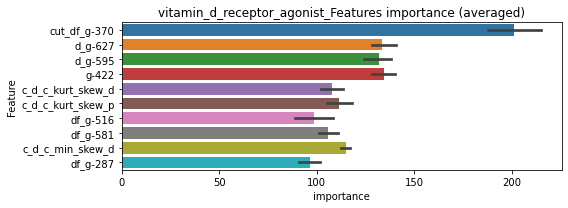

len(train_index) : 2856
len(valid_index) : 952
================================= fold 1/4 vitamin_d_receptor_agonist=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[836]	training's binary_logloss: 0.000442592	valid_1's binary_logloss: 0.00670827


len(train_index) : 2856
len(valid_index) : 952
================================= fold 2/4 vitamin_d_receptor_agonist=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[870]	training's binary_logloss: 0.000447018	valid_1's binary_logloss: 0.00452351


len(train_index) : 2856
len(valid_index) : 952
================================= fold 3/4 vitamin_d_receptor_agonist=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[851]	training's binary_logloss: 0.000453596	valid_1's binary_logloss: 0.00207173


len(train_index) : 2856
len(valid_index) : 952
================================= fold 4/4 vitamin_d_receptor_agonist=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[813]	training's binary_logloss: 0.000458197	valid_1's binary_logloss: 0.00467781


vitamin_d_receptor_agonist logloss: 0.004496437915077267


neg labels: 3289 → selected neg labels: 3287


wnt_inhibitor, len(trt): 30, len(othr): 3287
target_rate: 0.0012598 → Adj_target_rate: 0.0015127
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00178055	valid_1's binary_logloss: 0.00607709
[600]	training's binary_logloss: 0.000385016	valid_1's binary_logloss: 0.00261823
Early stopping, best iteration is:
[662]	training's binary_logloss: 0.000362766	valid_1's binary_logloss: 0.00254415
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00171567	valid_1's binary_logloss: 0.0108289
[600]	training's binary_logloss: 0.000380089	valid_1's binary_logloss: 0.00696794
Early stopping, best iteration is:
[602]	training's binary_logloss: 0.000378885	valid_1's binary_logloss: 0.00696113
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00180649	valid_1's binary_logloss: 0.00378263
[600]	training's binary_logloss: 0.000394164	valid_1's binary_logloss: 0.00118361
Early stopping, best iteration is:
[668]	training's binary_logloss: 0.000369937	valid_1's binar

1 / 3 AUC score:1.000
y_Threshold: 0.0026388, Threshold: 0.0132780, pos_neg_ratio: 0.8000000


Early stopping, best iteration is:
[556]	training's binary_logloss: 0.000419662	valid_1's binary_logloss: 0.00377822


Remove_noisy_data: 132 → Positive_corect_labels: 657/3812
p_label_rate: 0.0100452 Vs.target_rate: 0.00126
Num_p_label: 40.0, conf_0:0.00929, conf_1:0.01726
Num_p_label: 40.0, Expected: 5.0, Adj_threshold_1: 0.0132780
Num_p_label: 17.0, Expected: 5.0, Adj_threshold_2: 0.0532780
Num_p_label: 12.0, Expected: 5.0, Adj_threshold_3: 0.0932780
threshold: 0.0932780, positive_p_label: 12.0/3982, p_label_rate: 0.0030136
positive_y_label: 657.0/3812, y_label_rate: 0.1723505
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00162268	valid_1's binary_logloss: 0.00579183
[600]	training's binary_logloss: 0.000370936	valid_1's binary_logloss: 0.00290328
Early stopping, best iteration is:
[613]	training's binary_logloss: 0.00036606	valid_1's binary_logloss: 0.00288375
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00165538	valid_1's binary_logloss: 0.00917065
[600]	training's binary_logloss: 0.000374432	valid_1's binary_logloss: 0.00594914
Early stopping, best iteration is:
[601]	training's binary_logloss: 0.000373807	valid_1's binary_logloss: 0.00594679
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00168203	valid_1's binary_logloss: 0.00345306
[600]	training's binary_logloss: 0.000380379	valid_1's binary_logloss: 0.00113025
Early stopping, best iteration is:
[634]	training's binary_logloss: 0.000368861	valid_1's binar

2 / 3 AUC score:1.000
y_Threshold: 0.0279971, Threshold: 0.0932780, pos_neg_ratio: 0.8000000
Remove_noisy_data: 0 → Positive_corect_labels: 657.0/3812
p_label_rate: 0.0047715 Vs.target_rate: 0.00126
Num_p_label: 19.0, conf_0:0.07462, conf_1:0.11193
Num_p_label: 19.0, Expected: 5.0, Adj_threshold_1: 0.0932780
Num_p_label: 14.0, Expected: 5.0, Adj_threshold_2: 0.1332780
Num_p_label: 13.0, Expected: 5.0, Adj_threshold_3: 0.1732780
Num_p_label: 11.0, Expected: 5.0, Adj_threshold_4: 0.2132780
threshold: 0.2132780, positive_p_label: 11.0/3982, p_label_rate: 0.0027624
positive_y_label: 657.0/3812, y_label_rate: 0.1723505
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00162268	valid_1's binary_logloss: 0.00579183
[600]	training's binary_logloss: 0.000370936	valid_1's binary_logloss: 0.00290328
Early stopping, best iteration is:
[613]	training's binary_logloss: 0.00036606	valid_1's binary_logloss: 0.00288375
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00165538	valid_1's binary_logloss: 0.00917065
[600]	training's binary_logloss: 0.000374432	valid_1's binary_logloss: 0.00594914
Early stopping, best iteration is:
[601]	training's binary_logloss: 0.000373807	valid_1's binary_logloss: 0.00594679
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00168203	valid_1's binary_logloss: 0.00345306
[600]	training's binary_logloss: 0.000380379	valid_1's binary_logloss: 0.00113025
Early stopping, best iteration is:
[634]	training's binary_logloss: 0.000368861	valid_1's binar

3 / 3 AUC score:1.000
y_Threshold: 0.0279971, Threshold: 0.2132780, pos_neg_ratio: 0.8000000
Remove_noisy_data: 0 → Positive_corect_labels: 657.0/3812
p_label_rate: 0.0027624 Vs.target_rate: 0.00126
Num_p_label: 11.0, conf_0:0.19195, conf_1:0.23461
Num_p_label: 11.0, Expected: 5.0, Adj_threshold_1: 0.2132780
threshold: 0.2132780, positive_p_label: 11.0/3982, p_label_rate: 0.0027624
positive_y_label: 657.0/3812, y_label_rate: 0.1723505


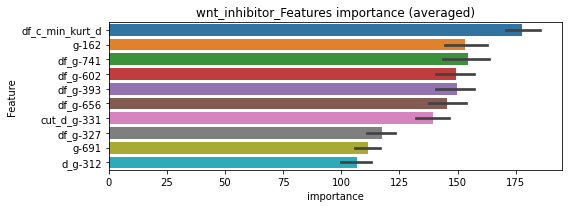

len(train_index) : 2859
len(valid_index) : 953
================================= fold 1/4 wnt_inhibitor=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[904]	training's binary_logloss: 0.00036846	valid_1's binary_logloss: 0.00221233


len(train_index) : 2859
len(valid_index) : 953
================================= fold 2/4 wnt_inhibitor=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[873]	training's binary_logloss: 0.000369607	valid_1's binary_logloss: 0.00449138


len(train_index) : 2859
len(valid_index) : 953
================================= fold 3/4 wnt_inhibitor=================================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.00036371	valid_1's binary_logloss: 0.00108405
Early stopping, best iteration is:
[1030]	training's binary_logloss: 0.000362464	valid_1's binary_logloss: 0.0010815


len(train_index) : 2859
len(valid_index) : 953
================================= fold 4/4 wnt_inhibitor=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[924]	training's binary_logloss: 0.000364983	valid_1's binary_logloss: 0.00326348


wnt_inhibitor logloss: 0.002763127398291629


CV:0.020943478785457773


In [49]:
RUN()